In [1]:
import pandas as pd
import numpy as np
import xgboost as xgb
import seaborn as sns
import matplotlib.pyplot as plt

from joblib import load
from sklearn.model_selection import GridSearchCV
from statsmodels.tools.eval_measures import rmse
from sklearn.metrics import r2_score

# Set plot style
sns.set(color_codes=True)

## Load the data

In [2]:
standard_df = pd.read_csv('../Feature Engineering/standard.csv', index_col='Date', parse_dates=True)
standard_df.head()

7 DAYS MA  14 DAYS MA  21 DAYS MA  7 DAYS STD DEV     RSI 7  \
Date                                                                      
2018-07-03  -1.974889   -1.797427   -1.703206       -0.068369 -1.029261   
2018-07-04  -2.010393   -1.834608   -1.727495       -0.646393 -0.046983   
2018-07-05  -2.000925   -1.859794   -1.742069       -0.426835 -0.226048   
2018-07-06  -1.979623   -1.887380   -1.761501       -0.307593 -0.789829   
2018-07-09  -1.979623   -1.923360   -1.796316       -0.307593  0.472338   

              RSI 14    RSI 21     MFI 7    MFI 14    MFI 21  dayofweek  \
Date                                                                      
2018-07-03 -1.500896 -1.938480 -0.321040 -0.809956 -0.918281  -0.692708   
2018-07-04 -0.709149 -1.258889  0.233188 -0.566193 -0.528693   0.015059   
2018-07-05 -0.825408 -1.347528  0.839702 -0.457370 -0.599344   0.722825   
2018-07-06 -1.208607 -1.645478  0.393231 -0.555696 -1.054555   1.430592   
2018-07-09 -0.101616 -0.643660  1.262812 -0.352773 -0.426277  -1.400474   

             quarter     month      year  dayofyear  dayofmonth  weekofyear  \
Date                                                                          
2018-07-03  0.419265  0.124549 -1.637427  -0.003251   -1.450117    0.016076   
2018-07-04  0.419265  0.124549 -1.637427   0.006141   -1.335784    0.016076   
2018-07-05  0.419265  0.124549 -1.637427   0.015532   -1.221452    0.016076   
2018-07-06  0.419265  0.124549 -1.637427   0.024924   -1.107119    0.016076   
2018-07-09  0.419265  0.124549 -1.637427   0.053099   -0.764121    0.081779   

               Close  
Date                  
2018-07-03 -2.004093  
2018-07-04 -1.840288  
2018-07-05 -1.873049  
2018-07-06 -1.987713  
2018-07-09 -1.709244

In [3]:
robust_df = pd.read_csv('../Feature Engineering/robust.csv', index_col='Date', parse_dates=True)
robust_df.head()

7 DAYS MA  14 DAYS MA  21 DAYS MA  7 DAYS STD DEV     RSI 7  \
Date                                                                      
2018-07-03  -1.623797   -1.470178   -1.405119        0.210469 -0.697101   
2018-07-04  -1.650044   -1.497170   -1.422764       -0.397901 -0.006714   
2018-07-05  -1.643045   -1.515455   -1.433351       -0.166816 -0.132568   
2018-07-06  -1.627297   -1.535481   -1.447466       -0.041314 -0.528818   
2018-07-09  -1.627297   -1.561602   -1.472757       -0.041314  0.358287   

              RSI 14    RSI 21     MFI 7    MFI 14    MFI 21  dayofweek  \
Date                                                                      
2018-07-03 -1.069752 -1.394933 -0.215294 -0.499868 -0.556399       -0.5   
2018-07-04 -0.514807 -0.909048  0.147305 -0.344051 -0.305758        0.0   
2018-07-05 -0.596295 -0.972422  0.544112 -0.274490 -0.351211        0.5   
2018-07-06 -0.864883 -1.185446  0.252011 -0.337341 -0.644071        1.0   
2018-07-09 -0.088981 -0.469179  0.820928 -0.207631 -0.239868       -1.0   

            quarter  month      year  dayofyear  dayofmonth  weekofyear  \
Date                                                                      
2018-07-03      0.0    0.0 -0.666667  -0.026631   -0.866667    0.000000   
2018-07-04      0.0    0.0 -0.666667  -0.021305   -0.800000    0.000000   
2018-07-05      0.0    0.0 -0.666667  -0.015979   -0.733333    0.000000   
2018-07-06      0.0    0.0 -0.666667  -0.010652   -0.666667    0.000000   
2018-07-09      0.0    0.0 -0.666667   0.005326   -0.466667    0.037037   

               Close  
Date                  
2018-07-03 -1.730769  
2018-07-04 -1.602564  
2018-07-05 -1.628205  
2018-07-06 -1.717949  
2018-07-09 -1.500000

## Plot the Close price

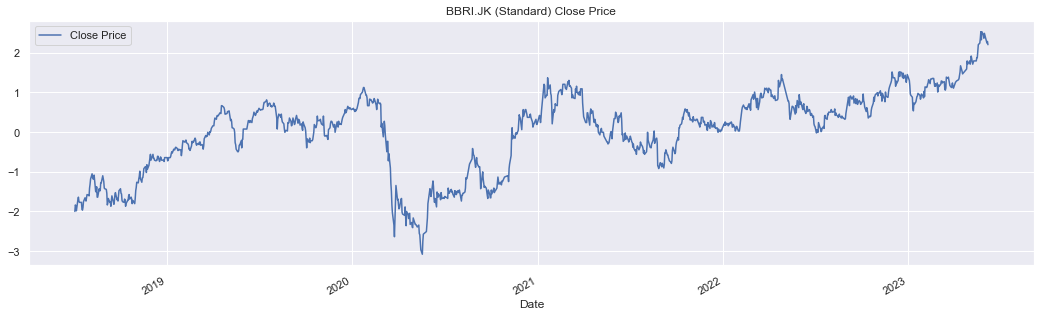

In [8]:
standard_df['Close'].plot(figsize=(18,5))
plt.legend(['Close Price'])
plt.title('BBRI.JK (Standard) Close Price')
plt.show()

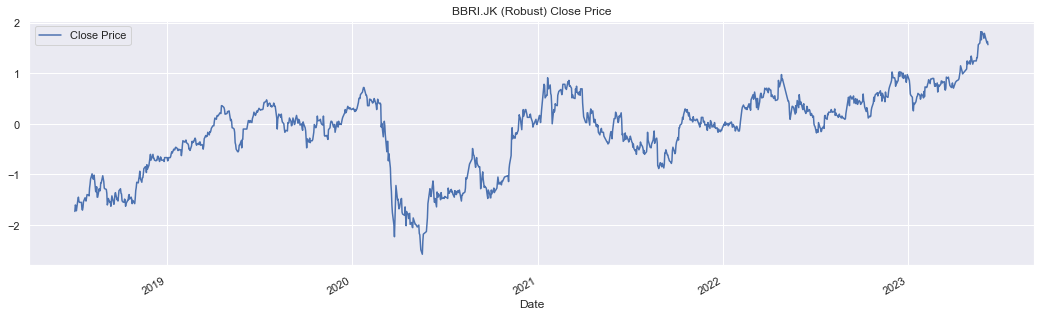

In [7]:
robust_df['Close'].plot(figsize=(18,5))
plt.legend(['Close Price'])
plt.title('BBRI.JK (Robust) Close Price')
plt.show()

## Split the data
- Split the data into independent variables and target variable
- Split the data into train and test set (80:20)

In [23]:
train_len_standard = int(len(standard_df)*.8)
train_standard = standard_df[:train_len_standard]
test_standard = standard_df[train_len_standard:len(standard_df)]

train_len_robust = int(len(robust_df)*.8)
train_robust = robust_df[:train_len_robust]
test_robust = robust_df[train_len_robust:len(robust_df)]

In [17]:
train_standard_features = train_standard.copy()
test_standard_features = test_standard.copy()

train_standard_labels = train_standard_features.pop('Close')
test_standard_labels = test_standard_features.pop('Close')

In [18]:
train_robust_features = train_robust.copy()
test_robust_features = test_robust.copy()

train_robust_labels = train_robust_features.pop('Close')
test_robust_labels = test_robust_features.pop('Close')

## Modelling - XGBRegressor
### 1. Standard Scaler
#### Grid Search to find the best hyperparameters

In [19]:
# Parameters: 
# n_estimators  "Number of gradient boosted trees. Equivalent to number 
#                of boosting rounds."
# learning_rate "Boosting learning rate (also known as “eta”)"
# max_depth     "Maximum depth of a tree. Increasing this value will make 
#                the model more complex and more likely to overfit." 

regressor_standard = xgb.XGBRegressor(eval_metric='rmse')

param_grid = {"max_depth":    [3, 4, 5],
              "n_estimators": [500, 600, 700, 1000],
              "learning_rate": [0.01, 0.015],
              "base_score": [0.5],
              "booster": ["gbtree"],
              "early_stopping_rounds": [50]}


search_standard = GridSearchCV(regressor_standard, param_grid, cv=5) \
.fit(train_standard_features, train_standard_labels, 
     eval_set=[(train_standard_features, train_standard_labels)])

[0]	validation_0-rmse:1.18487
[1]	validation_0-rmse:1.17387
[2]	validation_0-rmse:1.16299
[3]	validation_0-rmse:1.15221
[4]	validation_0-rmse:1.14155
[5]	validation_0-rmse:1.13099
[6]	validation_0-rmse:1.12041
[7]	validation_0-rmse:1.11008
[8]	validation_0-rmse:1.09972
[9]	validation_0-rmse:1.08973
[10]	validation_0-rmse:1.07970
[11]	validation_0-rmse:1.06978
[12]	validation_0-rmse:1.06007
[13]	validation_0-rmse:1.05035
[14]	validation_0-rmse:1.04073
[15]	validation_0-rmse:1.03121
[16]	validation_0-rmse:1.02193
[17]	validation_0-rmse:1.01273
[18]	validation_0-rmse:1.00337
[19]	validation_0-rmse:0.99436
[20]	validation_0-rmse:0.98545
[21]	validation_0-rmse:0.97638
[22]	validation_0-rmse:0.96764
[23]	validation_0-rmse:0.95875
[24]	validation_0-rmse:0.95020
[25]	validation_0-rmse:0.94160
[26]	validation_0-rmse:0.93310
[27]	validation_0-rmse:0.92479
[28]	validation_0-rmse:0.91647
[29]	validation_0-rmse:0.90823
[30]	validation_0-rmse:0.90018
[31]	validation_0-rmse:0.89219
[32]	validation_0-

[260]	validation_0-rmse:0.16995
[261]	validation_0-rmse:0.16915
[262]	validation_0-rmse:0.16830
[263]	validation_0-rmse:0.16755
[264]	validation_0-rmse:0.16677
[265]	validation_0-rmse:0.16596
[266]	validation_0-rmse:0.16520
[267]	validation_0-rmse:0.16444
[268]	validation_0-rmse:0.16374
[269]	validation_0-rmse:0.16296
[270]	validation_0-rmse:0.16223
[271]	validation_0-rmse:0.16152
[272]	validation_0-rmse:0.16082
[273]	validation_0-rmse:0.16011
[274]	validation_0-rmse:0.15941
[275]	validation_0-rmse:0.15872
[276]	validation_0-rmse:0.15799
[277]	validation_0-rmse:0.15730
[278]	validation_0-rmse:0.15664
[279]	validation_0-rmse:0.15599
[280]	validation_0-rmse:0.15537
[281]	validation_0-rmse:0.15471
[282]	validation_0-rmse:0.15407
[283]	validation_0-rmse:0.15347
[284]	validation_0-rmse:0.15285
[285]	validation_0-rmse:0.15228
[286]	validation_0-rmse:0.15170
[287]	validation_0-rmse:0.15113
[288]	validation_0-rmse:0.15056
[289]	validation_0-rmse:0.14994
[290]	validation_0-rmse:0.14936
[291]	va

[17]	validation_0-rmse:1.00751
[18]	validation_0-rmse:0.99801
[19]	validation_0-rmse:0.98863
[20]	validation_0-rmse:0.97932
[21]	validation_0-rmse:0.97013
[22]	validation_0-rmse:0.96101
[23]	validation_0-rmse:0.95197
[24]	validation_0-rmse:0.94306
[25]	validation_0-rmse:0.93421
[26]	validation_0-rmse:0.92547
[27]	validation_0-rmse:0.91683
[28]	validation_0-rmse:0.90825
[29]	validation_0-rmse:0.89979
[30]	validation_0-rmse:0.89139
[31]	validation_0-rmse:0.88306
[32]	validation_0-rmse:0.87485
[33]	validation_0-rmse:0.86670
[34]	validation_0-rmse:0.85866
[35]	validation_0-rmse:0.85067
[36]	validation_0-rmse:0.84278
[37]	validation_0-rmse:0.83494
[38]	validation_0-rmse:0.82723
[39]	validation_0-rmse:0.81956
[40]	validation_0-rmse:0.81201
[41]	validation_0-rmse:0.80451
[42]	validation_0-rmse:0.79708
[43]	validation_0-rmse:0.78972
[44]	validation_0-rmse:0.78244
[45]	validation_0-rmse:0.77527
[46]	validation_0-rmse:0.76812
[47]	validation_0-rmse:0.76108
[48]	validation_0-rmse:0.75408
[49]	val

[276]	validation_0-rmse:0.13310
[277]	validation_0-rmse:0.13245
[278]	validation_0-rmse:0.13177
[279]	validation_0-rmse:0.13114
[280]	validation_0-rmse:0.13047
[281]	validation_0-rmse:0.12983
[282]	validation_0-rmse:0.12922
[283]	validation_0-rmse:0.12858
[284]	validation_0-rmse:0.12796
[285]	validation_0-rmse:0.12735
[286]	validation_0-rmse:0.12675
[287]	validation_0-rmse:0.12616
[288]	validation_0-rmse:0.12557
[289]	validation_0-rmse:0.12499
[290]	validation_0-rmse:0.12442
[291]	validation_0-rmse:0.12385
[292]	validation_0-rmse:0.12319
[293]	validation_0-rmse:0.12264
[294]	validation_0-rmse:0.12207
[295]	validation_0-rmse:0.12144
[296]	validation_0-rmse:0.12090
[297]	validation_0-rmse:0.12029
[298]	validation_0-rmse:0.11975
[299]	validation_0-rmse:0.11923
[300]	validation_0-rmse:0.11864
[301]	validation_0-rmse:0.11811
[302]	validation_0-rmse:0.11759
[303]	validation_0-rmse:0.11702
[304]	validation_0-rmse:0.11650
[305]	validation_0-rmse:0.11594
[306]	validation_0-rmse:0.11540
[307]	va

[34]	validation_0-rmse:0.88130
[35]	validation_0-rmse:0.87382
[36]	validation_0-rmse:0.86663
[37]	validation_0-rmse:0.85948
[38]	validation_0-rmse:0.85219
[39]	validation_0-rmse:0.84523
[40]	validation_0-rmse:0.83840
[41]	validation_0-rmse:0.83129
[42]	validation_0-rmse:0.82432
[43]	validation_0-rmse:0.81762
[44]	validation_0-rmse:0.81108
[45]	validation_0-rmse:0.80432
[46]	validation_0-rmse:0.79781
[47]	validation_0-rmse:0.79145
[48]	validation_0-rmse:0.78489
[49]	validation_0-rmse:0.77858
[50]	validation_0-rmse:0.77243
[51]	validation_0-rmse:0.76604
[52]	validation_0-rmse:0.75993
[53]	validation_0-rmse:0.75367
[54]	validation_0-rmse:0.74768
[55]	validation_0-rmse:0.74186
[56]	validation_0-rmse:0.73577
[57]	validation_0-rmse:0.72976
[58]	validation_0-rmse:0.72406
[59]	validation_0-rmse:0.71833
[60]	validation_0-rmse:0.71271
[61]	validation_0-rmse:0.70713
[62]	validation_0-rmse:0.70165
[63]	validation_0-rmse:0.69600
[64]	validation_0-rmse:0.69071
[65]	validation_0-rmse:0.68522
[66]	val

[293]	validation_0-rmse:0.22461
[294]	validation_0-rmse:0.22405
[295]	validation_0-rmse:0.22345
[296]	validation_0-rmse:0.22290
[297]	validation_0-rmse:0.22234
[298]	validation_0-rmse:0.22180
[299]	validation_0-rmse:0.22131
[300]	validation_0-rmse:0.22078
[301]	validation_0-rmse:0.22030
[302]	validation_0-rmse:0.21977
[303]	validation_0-rmse:0.21930
[304]	validation_0-rmse:0.21879
[305]	validation_0-rmse:0.21829
[306]	validation_0-rmse:0.21783
[307]	validation_0-rmse:0.21735
[308]	validation_0-rmse:0.21685
[309]	validation_0-rmse:0.21635
[310]	validation_0-rmse:0.21592
[311]	validation_0-rmse:0.21549
[312]	validation_0-rmse:0.21501
[313]	validation_0-rmse:0.21459
[314]	validation_0-rmse:0.21410
[315]	validation_0-rmse:0.21369
[316]	validation_0-rmse:0.21323
[317]	validation_0-rmse:0.21282
[318]	validation_0-rmse:0.21243
[319]	validation_0-rmse:0.21201
[320]	validation_0-rmse:0.21156
[321]	validation_0-rmse:0.21119
[322]	validation_0-rmse:0.21077
[323]	validation_0-rmse:0.21040
[324]	va

[51]	validation_0-rmse:0.73421
[52]	validation_0-rmse:0.72751
[53]	validation_0-rmse:0.72093
[54]	validation_0-rmse:0.71439
[55]	validation_0-rmse:0.70792
[56]	validation_0-rmse:0.70150
[57]	validation_0-rmse:0.69517
[58]	validation_0-rmse:0.68888
[59]	validation_0-rmse:0.68266
[60]	validation_0-rmse:0.67651
[61]	validation_0-rmse:0.67044
[62]	validation_0-rmse:0.66443
[63]	validation_0-rmse:0.65848
[64]	validation_0-rmse:0.65256
[65]	validation_0-rmse:0.64673
[66]	validation_0-rmse:0.64092
[67]	validation_0-rmse:0.63521
[68]	validation_0-rmse:0.62953
[69]	validation_0-rmse:0.62383
[70]	validation_0-rmse:0.61828
[71]	validation_0-rmse:0.61280
[72]	validation_0-rmse:0.60736
[73]	validation_0-rmse:0.60188
[74]	validation_0-rmse:0.59655
[75]	validation_0-rmse:0.59118
[76]	validation_0-rmse:0.58596
[77]	validation_0-rmse:0.58081
[78]	validation_0-rmse:0.57561
[79]	validation_0-rmse:0.57056
[80]	validation_0-rmse:0.56547
[81]	validation_0-rmse:0.56053
[82]	validation_0-rmse:0.55554
[83]	val

[309]	validation_0-rmse:0.12507
[310]	validation_0-rmse:0.12466
[311]	validation_0-rmse:0.12424
[312]	validation_0-rmse:0.12376
[313]	validation_0-rmse:0.12333
[314]	validation_0-rmse:0.12289
[315]	validation_0-rmse:0.12249
[316]	validation_0-rmse:0.12205
[317]	validation_0-rmse:0.12160
[318]	validation_0-rmse:0.12116
[319]	validation_0-rmse:0.12078
[320]	validation_0-rmse:0.12034
[321]	validation_0-rmse:0.11999
[322]	validation_0-rmse:0.11958
[323]	validation_0-rmse:0.11920
[324]	validation_0-rmse:0.11885
[325]	validation_0-rmse:0.11846
[326]	validation_0-rmse:0.11809
[327]	validation_0-rmse:0.11769
[328]	validation_0-rmse:0.11731
[329]	validation_0-rmse:0.11699
[330]	validation_0-rmse:0.11660
[331]	validation_0-rmse:0.11624
[332]	validation_0-rmse:0.11587
[333]	validation_0-rmse:0.11549
[334]	validation_0-rmse:0.11511
[335]	validation_0-rmse:0.11481
[336]	validation_0-rmse:0.11445
[337]	validation_0-rmse:0.11412
[338]	validation_0-rmse:0.11380
[339]	validation_0-rmse:0.11346
[340]	va

[68]	validation_0-rmse:0.62496
[69]	validation_0-rmse:0.61930
[70]	validation_0-rmse:0.61369
[71]	validation_0-rmse:0.60814
[72]	validation_0-rmse:0.60264
[73]	validation_0-rmse:0.59727
[74]	validation_0-rmse:0.59189
[75]	validation_0-rmse:0.58655
[76]	validation_0-rmse:0.58136
[77]	validation_0-rmse:0.57616
[78]	validation_0-rmse:0.57101
[79]	validation_0-rmse:0.56588
[80]	validation_0-rmse:0.56091
[81]	validation_0-rmse:0.55591
[82]	validation_0-rmse:0.55095
[83]	validation_0-rmse:0.54613
[84]	validation_0-rmse:0.54129
[85]	validation_0-rmse:0.53646
[86]	validation_0-rmse:0.53172
[87]	validation_0-rmse:0.52702
[88]	validation_0-rmse:0.52244
[89]	validation_0-rmse:0.51786
[90]	validation_0-rmse:0.51335
[91]	validation_0-rmse:0.50882
[92]	validation_0-rmse:0.50443
[93]	validation_0-rmse:0.50003
[94]	validation_0-rmse:0.49563
[95]	validation_0-rmse:0.49130
[96]	validation_0-rmse:0.48695
[97]	validation_0-rmse:0.48269
[98]	validation_0-rmse:0.47844
[99]	validation_0-rmse:0.47428
[100]	va

[326]	validation_0-rmse:0.12643
[327]	validation_0-rmse:0.12614
[328]	validation_0-rmse:0.12580
[329]	validation_0-rmse:0.12552
[330]	validation_0-rmse:0.12519
[331]	validation_0-rmse:0.12490
[332]	validation_0-rmse:0.12459
[333]	validation_0-rmse:0.12428
[334]	validation_0-rmse:0.12399
[335]	validation_0-rmse:0.12371
[336]	validation_0-rmse:0.12341
[337]	validation_0-rmse:0.12313
[338]	validation_0-rmse:0.12285
[339]	validation_0-rmse:0.12259
[340]	validation_0-rmse:0.12232
[341]	validation_0-rmse:0.12204
[342]	validation_0-rmse:0.12177
[343]	validation_0-rmse:0.12151
[344]	validation_0-rmse:0.12125
[345]	validation_0-rmse:0.12100
[346]	validation_0-rmse:0.12075
[347]	validation_0-rmse:0.12050
[348]	validation_0-rmse:0.12025
[349]	validation_0-rmse:0.12001
[350]	validation_0-rmse:0.11976
[351]	validation_0-rmse:0.11952
[352]	validation_0-rmse:0.11929
[353]	validation_0-rmse:0.11908
[354]	validation_0-rmse:0.11883
[355]	validation_0-rmse:0.11860
[356]	validation_0-rmse:0.11838
[357]	va

[85]	validation_0-rmse:0.55772
[86]	validation_0-rmse:0.55299
[87]	validation_0-rmse:0.54845
[88]	validation_0-rmse:0.54383
[89]	validation_0-rmse:0.53946
[90]	validation_0-rmse:0.53496
[91]	validation_0-rmse:0.53062
[92]	validation_0-rmse:0.52618
[93]	validation_0-rmse:0.52199
[94]	validation_0-rmse:0.51754
[95]	validation_0-rmse:0.51313
[96]	validation_0-rmse:0.50906
[97]	validation_0-rmse:0.50485
[98]	validation_0-rmse:0.50088
[99]	validation_0-rmse:0.49671
[100]	validation_0-rmse:0.49270
[101]	validation_0-rmse:0.48855
[102]	validation_0-rmse:0.48473
[103]	validation_0-rmse:0.48075
[104]	validation_0-rmse:0.47681
[105]	validation_0-rmse:0.47290
[106]	validation_0-rmse:0.46926
[107]	validation_0-rmse:0.46552
[108]	validation_0-rmse:0.46178
[109]	validation_0-rmse:0.45812
[110]	validation_0-rmse:0.45442
[111]	validation_0-rmse:0.45084
[112]	validation_0-rmse:0.44726
[113]	validation_0-rmse:0.44367
[114]	validation_0-rmse:0.44019
[115]	validation_0-rmse:0.43670
[116]	validation_0-rmse

[342]	validation_0-rmse:0.12586
[343]	validation_0-rmse:0.12547
[344]	validation_0-rmse:0.12513
[345]	validation_0-rmse:0.12478
[346]	validation_0-rmse:0.12445
[347]	validation_0-rmse:0.12411
[348]	validation_0-rmse:0.12378
[349]	validation_0-rmse:0.12346
[350]	validation_0-rmse:0.12314
[351]	validation_0-rmse:0.12279
[352]	validation_0-rmse:0.12248
[353]	validation_0-rmse:0.12216
[354]	validation_0-rmse:0.12185
[355]	validation_0-rmse:0.12152
[356]	validation_0-rmse:0.12123
[357]	validation_0-rmse:0.12087
[358]	validation_0-rmse:0.12058
[359]	validation_0-rmse:0.12030
[360]	validation_0-rmse:0.11999
[361]	validation_0-rmse:0.11970
[362]	validation_0-rmse:0.11940
[363]	validation_0-rmse:0.11912
[364]	validation_0-rmse:0.11881
[365]	validation_0-rmse:0.11855
[366]	validation_0-rmse:0.11828
[367]	validation_0-rmse:0.11797
[368]	validation_0-rmse:0.11771
[369]	validation_0-rmse:0.11738
[370]	validation_0-rmse:0.11712
[371]	validation_0-rmse:0.11682
[372]	validation_0-rmse:0.11652
[373]	va

[599]	validation_0-rmse:0.08915
[0]	validation_0-rmse:1.18458
[1]	validation_0-rmse:1.17328
[2]	validation_0-rmse:1.16211
[3]	validation_0-rmse:1.15104
[4]	validation_0-rmse:1.14009
[5]	validation_0-rmse:1.12926
[6]	validation_0-rmse:1.11853
[7]	validation_0-rmse:1.10790
[8]	validation_0-rmse:1.09739
[9]	validation_0-rmse:1.08698
[10]	validation_0-rmse:1.07669
[11]	validation_0-rmse:1.06651
[12]	validation_0-rmse:1.05642
[13]	validation_0-rmse:1.04644
[14]	validation_0-rmse:1.03656
[15]	validation_0-rmse:1.02678
[16]	validation_0-rmse:1.01708
[17]	validation_0-rmse:1.00751
[18]	validation_0-rmse:0.99801
[19]	validation_0-rmse:0.98863
[20]	validation_0-rmse:0.97932
[21]	validation_0-rmse:0.97013
[22]	validation_0-rmse:0.96101
[23]	validation_0-rmse:0.95197
[24]	validation_0-rmse:0.94306
[25]	validation_0-rmse:0.93421
[26]	validation_0-rmse:0.92547
[27]	validation_0-rmse:0.91683
[28]	validation_0-rmse:0.90825
[29]	validation_0-rmse:0.89979
[30]	validation_0-rmse:0.89139
[31]	validation_0

[259]	validation_0-rmse:0.14552
[260]	validation_0-rmse:0.14472
[261]	validation_0-rmse:0.14394
[262]	validation_0-rmse:0.14318
[263]	validation_0-rmse:0.14239
[264]	validation_0-rmse:0.14162
[265]	validation_0-rmse:0.14086
[266]	validation_0-rmse:0.14013
[267]	validation_0-rmse:0.13938
[268]	validation_0-rmse:0.13864
[269]	validation_0-rmse:0.13793
[270]	validation_0-rmse:0.13721
[271]	validation_0-rmse:0.13650
[272]	validation_0-rmse:0.13581
[273]	validation_0-rmse:0.13511
[274]	validation_0-rmse:0.13443
[275]	validation_0-rmse:0.13376
[276]	validation_0-rmse:0.13310
[277]	validation_0-rmse:0.13245
[278]	validation_0-rmse:0.13177
[279]	validation_0-rmse:0.13114
[280]	validation_0-rmse:0.13047
[281]	validation_0-rmse:0.12983
[282]	validation_0-rmse:0.12922
[283]	validation_0-rmse:0.12858
[284]	validation_0-rmse:0.12796
[285]	validation_0-rmse:0.12735
[286]	validation_0-rmse:0.12675
[287]	validation_0-rmse:0.12616
[288]	validation_0-rmse:0.12557
[289]	validation_0-rmse:0.12499
[290]	va

[516]	validation_0-rmse:0.07254
[517]	validation_0-rmse:0.07247
[518]	validation_0-rmse:0.07242
[519]	validation_0-rmse:0.07236
[520]	validation_0-rmse:0.07234
[521]	validation_0-rmse:0.07228
[522]	validation_0-rmse:0.07223
[523]	validation_0-rmse:0.07217
[524]	validation_0-rmse:0.07212
[525]	validation_0-rmse:0.07207
[526]	validation_0-rmse:0.07205
[527]	validation_0-rmse:0.07200
[528]	validation_0-rmse:0.07194
[529]	validation_0-rmse:0.07190
[530]	validation_0-rmse:0.07185
[531]	validation_0-rmse:0.07179
[532]	validation_0-rmse:0.07173
[533]	validation_0-rmse:0.07169
[534]	validation_0-rmse:0.07164
[535]	validation_0-rmse:0.07159
[536]	validation_0-rmse:0.07153
[537]	validation_0-rmse:0.07147
[538]	validation_0-rmse:0.07144
[539]	validation_0-rmse:0.07138
[540]	validation_0-rmse:0.07133
[541]	validation_0-rmse:0.07127
[542]	validation_0-rmse:0.07121
[543]	validation_0-rmse:0.07114
[544]	validation_0-rmse:0.07110
[545]	validation_0-rmse:0.07105
[546]	validation_0-rmse:0.07100
[547]	va

[176]	validation_0-rmse:0.33408
[177]	validation_0-rmse:0.33231
[178]	validation_0-rmse:0.33108
[179]	validation_0-rmse:0.32939
[180]	validation_0-rmse:0.32822
[181]	validation_0-rmse:0.32649
[182]	validation_0-rmse:0.32533
[183]	validation_0-rmse:0.32370
[184]	validation_0-rmse:0.32210
[185]	validation_0-rmse:0.32089
[186]	validation_0-rmse:0.31931
[187]	validation_0-rmse:0.31778
[188]	validation_0-rmse:0.31670
[189]	validation_0-rmse:0.31512
[190]	validation_0-rmse:0.31405
[191]	validation_0-rmse:0.31257
[192]	validation_0-rmse:0.31111
[193]	validation_0-rmse:0.31007
[194]	validation_0-rmse:0.30859
[195]	validation_0-rmse:0.30760
[196]	validation_0-rmse:0.30613
[197]	validation_0-rmse:0.30515
[198]	validation_0-rmse:0.30370
[199]	validation_0-rmse:0.30274
[200]	validation_0-rmse:0.30141
[201]	validation_0-rmse:0.30048
[202]	validation_0-rmse:0.29916
[203]	validation_0-rmse:0.29826
[204]	validation_0-rmse:0.29690
[205]	validation_0-rmse:0.29601
[206]	validation_0-rmse:0.29475
[207]	va

[433]	validation_0-rmse:0.18359
[434]	validation_0-rmse:0.18352
[435]	validation_0-rmse:0.18338
[436]	validation_0-rmse:0.18332
[437]	validation_0-rmse:0.18313
[438]	validation_0-rmse:0.18300
[439]	validation_0-rmse:0.18288
[440]	validation_0-rmse:0.18272
[441]	validation_0-rmse:0.18255
[442]	validation_0-rmse:0.18248
[443]	validation_0-rmse:0.18236
[444]	validation_0-rmse:0.18224
[445]	validation_0-rmse:0.18200
[446]	validation_0-rmse:0.18188
[447]	validation_0-rmse:0.18173
[448]	validation_0-rmse:0.18167
[449]	validation_0-rmse:0.18146
[450]	validation_0-rmse:0.18134
[451]	validation_0-rmse:0.18114
[452]	validation_0-rmse:0.18102
[453]	validation_0-rmse:0.18097
[454]	validation_0-rmse:0.18084
[455]	validation_0-rmse:0.18061
[456]	validation_0-rmse:0.18046
[457]	validation_0-rmse:0.18034
[458]	validation_0-rmse:0.18023
[459]	validation_0-rmse:0.18010
[460]	validation_0-rmse:0.17998
[461]	validation_0-rmse:0.17986
[462]	validation_0-rmse:0.17967
[463]	validation_0-rmse:0.17956
[464]	va

[93]	validation_0-rmse:0.50436
[94]	validation_0-rmse:0.49996
[95]	validation_0-rmse:0.49562
[96]	validation_0-rmse:0.49133
[97]	validation_0-rmse:0.48707
[98]	validation_0-rmse:0.48290
[99]	validation_0-rmse:0.47876
[100]	validation_0-rmse:0.47461
[101]	validation_0-rmse:0.47054
[102]	validation_0-rmse:0.46652
[103]	validation_0-rmse:0.46254
[104]	validation_0-rmse:0.45862
[105]	validation_0-rmse:0.45473
[106]	validation_0-rmse:0.45088
[107]	validation_0-rmse:0.44700
[108]	validation_0-rmse:0.44318
[109]	validation_0-rmse:0.43939
[110]	validation_0-rmse:0.43570
[111]	validation_0-rmse:0.43195
[112]	validation_0-rmse:0.42824
[113]	validation_0-rmse:0.42462
[114]	validation_0-rmse:0.42099
[115]	validation_0-rmse:0.41749
[116]	validation_0-rmse:0.41393
[117]	validation_0-rmse:0.41041
[118]	validation_0-rmse:0.40704
[119]	validation_0-rmse:0.40363
[120]	validation_0-rmse:0.40022
[121]	validation_0-rmse:0.39685
[122]	validation_0-rmse:0.39360
[123]	validation_0-rmse:0.39030
[124]	validatio

[350]	validation_0-rmse:0.11012
[351]	validation_0-rmse:0.10984
[352]	validation_0-rmse:0.10953
[353]	validation_0-rmse:0.10927
[354]	validation_0-rmse:0.10898
[355]	validation_0-rmse:0.10869
[356]	validation_0-rmse:0.10842
[357]	validation_0-rmse:0.10816
[358]	validation_0-rmse:0.10788
[359]	validation_0-rmse:0.10758
[360]	validation_0-rmse:0.10732
[361]	validation_0-rmse:0.10706
[362]	validation_0-rmse:0.10678
[363]	validation_0-rmse:0.10650
[364]	validation_0-rmse:0.10628
[365]	validation_0-rmse:0.10604
[366]	validation_0-rmse:0.10579
[367]	validation_0-rmse:0.10555
[368]	validation_0-rmse:0.10529
[369]	validation_0-rmse:0.10505
[370]	validation_0-rmse:0.10481
[371]	validation_0-rmse:0.10458
[372]	validation_0-rmse:0.10434
[373]	validation_0-rmse:0.10414
[374]	validation_0-rmse:0.10390
[375]	validation_0-rmse:0.10367
[376]	validation_0-rmse:0.10348
[377]	validation_0-rmse:0.10326
[378]	validation_0-rmse:0.10306
[379]	validation_0-rmse:0.10282
[380]	validation_0-rmse:0.10261
[381]	va

[7]	validation_0-rmse:1.10700
[8]	validation_0-rmse:1.09642
[9]	validation_0-rmse:1.08594
[10]	validation_0-rmse:1.07552
[11]	validation_0-rmse:1.06525
[12]	validation_0-rmse:1.05511
[13]	validation_0-rmse:1.04501
[14]	validation_0-rmse:1.03506
[15]	validation_0-rmse:1.02516
[16]	validation_0-rmse:1.01541
[17]	validation_0-rmse:1.00572
[18]	validation_0-rmse:0.99615
[19]	validation_0-rmse:0.98671
[20]	validation_0-rmse:0.97732
[21]	validation_0-rmse:0.96804
[22]	validation_0-rmse:0.95884
[23]	validation_0-rmse:0.94975
[24]	validation_0-rmse:0.94076
[25]	validation_0-rmse:0.93184
[26]	validation_0-rmse:0.92304
[27]	validation_0-rmse:0.91432
[28]	validation_0-rmse:0.90568
[29]	validation_0-rmse:0.89715
[30]	validation_0-rmse:0.88872
[31]	validation_0-rmse:0.88036
[32]	validation_0-rmse:0.87208
[33]	validation_0-rmse:0.86390
[34]	validation_0-rmse:0.85580
[35]	validation_0-rmse:0.84781
[36]	validation_0-rmse:0.83985
[37]	validation_0-rmse:0.83203
[38]	validation_0-rmse:0.82428
[39]	valida

[267]	validation_0-rmse:0.15370
[268]	validation_0-rmse:0.15306
[269]	validation_0-rmse:0.15247
[270]	validation_0-rmse:0.15185
[271]	validation_0-rmse:0.15126
[272]	validation_0-rmse:0.15064
[273]	validation_0-rmse:0.15006
[274]	validation_0-rmse:0.14947
[275]	validation_0-rmse:0.14887
[276]	validation_0-rmse:0.14833
[277]	validation_0-rmse:0.14776
[278]	validation_0-rmse:0.14722
[279]	validation_0-rmse:0.14670
[280]	validation_0-rmse:0.14614
[281]	validation_0-rmse:0.14563
[282]	validation_0-rmse:0.14508
[283]	validation_0-rmse:0.14455
[284]	validation_0-rmse:0.14398
[285]	validation_0-rmse:0.14345
[286]	validation_0-rmse:0.14294
[287]	validation_0-rmse:0.14247
[288]	validation_0-rmse:0.14187
[289]	validation_0-rmse:0.14131
[290]	validation_0-rmse:0.14085
[291]	validation_0-rmse:0.14037
[292]	validation_0-rmse:0.13989
[293]	validation_0-rmse:0.13936
[294]	validation_0-rmse:0.13884
[295]	validation_0-rmse:0.13838
[296]	validation_0-rmse:0.13787
[297]	validation_0-rmse:0.13744
[298]	va

[524]	validation_0-rmse:0.09888
[525]	validation_0-rmse:0.09882
[526]	validation_0-rmse:0.09878
[527]	validation_0-rmse:0.09873
[528]	validation_0-rmse:0.09869
[529]	validation_0-rmse:0.09865
[530]	validation_0-rmse:0.09859
[531]	validation_0-rmse:0.09855
[532]	validation_0-rmse:0.09850
[533]	validation_0-rmse:0.09845
[534]	validation_0-rmse:0.09841
[535]	validation_0-rmse:0.09837
[536]	validation_0-rmse:0.09832
[537]	validation_0-rmse:0.09829
[538]	validation_0-rmse:0.09824
[539]	validation_0-rmse:0.09818
[540]	validation_0-rmse:0.09815
[541]	validation_0-rmse:0.09812
[542]	validation_0-rmse:0.09809
[543]	validation_0-rmse:0.09804
[544]	validation_0-rmse:0.09800
[545]	validation_0-rmse:0.09795
[546]	validation_0-rmse:0.09790
[547]	validation_0-rmse:0.09787
[548]	validation_0-rmse:0.09784
[549]	validation_0-rmse:0.09780
[550]	validation_0-rmse:0.09775
[551]	validation_0-rmse:0.09772
[552]	validation_0-rmse:0.09768
[553]	validation_0-rmse:0.09762
[554]	validation_0-rmse:0.09759
[555]	va

[184]	validation_0-rmse:0.26327
[185]	validation_0-rmse:0.26155
[186]	validation_0-rmse:0.25983
[187]	validation_0-rmse:0.25812
[188]	validation_0-rmse:0.25648
[189]	validation_0-rmse:0.25480
[190]	validation_0-rmse:0.25314
[191]	validation_0-rmse:0.25150
[192]	validation_0-rmse:0.24991
[193]	validation_0-rmse:0.24831
[194]	validation_0-rmse:0.24676
[195]	validation_0-rmse:0.24519
[196]	validation_0-rmse:0.24367
[197]	validation_0-rmse:0.24212
[198]	validation_0-rmse:0.24063
[199]	validation_0-rmse:0.23914
[200]	validation_0-rmse:0.23765
[201]	validation_0-rmse:0.23618
[202]	validation_0-rmse:0.23461
[203]	validation_0-rmse:0.23314
[204]	validation_0-rmse:0.23172
[205]	validation_0-rmse:0.23028
[206]	validation_0-rmse:0.22889
[207]	validation_0-rmse:0.22740
[208]	validation_0-rmse:0.22603
[209]	validation_0-rmse:0.22469
[210]	validation_0-rmse:0.22334
[211]	validation_0-rmse:0.22198
[212]	validation_0-rmse:0.22057
[213]	validation_0-rmse:0.21926
[214]	validation_0-rmse:0.21798
[215]	va

[441]	validation_0-rmse:0.10221
[442]	validation_0-rmse:0.10205
[443]	validation_0-rmse:0.10193
[444]	validation_0-rmse:0.10178
[445]	validation_0-rmse:0.10164
[446]	validation_0-rmse:0.10151
[447]	validation_0-rmse:0.10135
[448]	validation_0-rmse:0.10121
[449]	validation_0-rmse:0.10107
[450]	validation_0-rmse:0.10095
[451]	validation_0-rmse:0.10080
[452]	validation_0-rmse:0.10067
[453]	validation_0-rmse:0.10056
[454]	validation_0-rmse:0.10041
[455]	validation_0-rmse:0.10028
[456]	validation_0-rmse:0.10015
[457]	validation_0-rmse:0.10004
[458]	validation_0-rmse:0.09993
[459]	validation_0-rmse:0.09980
[460]	validation_0-rmse:0.09966
[461]	validation_0-rmse:0.09954
[462]	validation_0-rmse:0.09942
[463]	validation_0-rmse:0.09932
[464]	validation_0-rmse:0.09918
[465]	validation_0-rmse:0.09906
[466]	validation_0-rmse:0.09894
[467]	validation_0-rmse:0.09883
[468]	validation_0-rmse:0.09871
[469]	validation_0-rmse:0.09861
[470]	validation_0-rmse:0.09852
[471]	validation_0-rmse:0.09841
[472]	va

[698]	validation_0-rmse:0.08551
[699]	validation_0-rmse:0.08547
[0]	validation_0-rmse:1.18458
[1]	validation_0-rmse:1.17328
[2]	validation_0-rmse:1.16211
[3]	validation_0-rmse:1.15104
[4]	validation_0-rmse:1.14009
[5]	validation_0-rmse:1.12926
[6]	validation_0-rmse:1.11853
[7]	validation_0-rmse:1.10790
[8]	validation_0-rmse:1.09739
[9]	validation_0-rmse:1.08698
[10]	validation_0-rmse:1.07669
[11]	validation_0-rmse:1.06651
[12]	validation_0-rmse:1.05642
[13]	validation_0-rmse:1.04644
[14]	validation_0-rmse:1.03656
[15]	validation_0-rmse:1.02678
[16]	validation_0-rmse:1.01708
[17]	validation_0-rmse:1.00751
[18]	validation_0-rmse:0.99801
[19]	validation_0-rmse:0.98863
[20]	validation_0-rmse:0.97932
[21]	validation_0-rmse:0.97013
[22]	validation_0-rmse:0.96101
[23]	validation_0-rmse:0.95197
[24]	validation_0-rmse:0.94306
[25]	validation_0-rmse:0.93421
[26]	validation_0-rmse:0.92547
[27]	validation_0-rmse:0.91683
[28]	validation_0-rmse:0.90825
[29]	validation_0-rmse:0.89979
[30]	validation_

[258]	validation_0-rmse:0.14635
[259]	validation_0-rmse:0.14552
[260]	validation_0-rmse:0.14472
[261]	validation_0-rmse:0.14394
[262]	validation_0-rmse:0.14318
[263]	validation_0-rmse:0.14239
[264]	validation_0-rmse:0.14162
[265]	validation_0-rmse:0.14086
[266]	validation_0-rmse:0.14013
[267]	validation_0-rmse:0.13938
[268]	validation_0-rmse:0.13864
[269]	validation_0-rmse:0.13793
[270]	validation_0-rmse:0.13721
[271]	validation_0-rmse:0.13650
[272]	validation_0-rmse:0.13581
[273]	validation_0-rmse:0.13511
[274]	validation_0-rmse:0.13443
[275]	validation_0-rmse:0.13376
[276]	validation_0-rmse:0.13310
[277]	validation_0-rmse:0.13245
[278]	validation_0-rmse:0.13177
[279]	validation_0-rmse:0.13114
[280]	validation_0-rmse:0.13047
[281]	validation_0-rmse:0.12983
[282]	validation_0-rmse:0.12922
[283]	validation_0-rmse:0.12858
[284]	validation_0-rmse:0.12796
[285]	validation_0-rmse:0.12735
[286]	validation_0-rmse:0.12675
[287]	validation_0-rmse:0.12616
[288]	validation_0-rmse:0.12557
[289]	va

[515]	validation_0-rmse:0.07261
[516]	validation_0-rmse:0.07254
[517]	validation_0-rmse:0.07247
[518]	validation_0-rmse:0.07242
[519]	validation_0-rmse:0.07236
[520]	validation_0-rmse:0.07234
[521]	validation_0-rmse:0.07228
[522]	validation_0-rmse:0.07223
[523]	validation_0-rmse:0.07217
[524]	validation_0-rmse:0.07212
[525]	validation_0-rmse:0.07207
[526]	validation_0-rmse:0.07205
[527]	validation_0-rmse:0.07200
[528]	validation_0-rmse:0.07194
[529]	validation_0-rmse:0.07190
[530]	validation_0-rmse:0.07185
[531]	validation_0-rmse:0.07179
[532]	validation_0-rmse:0.07173
[533]	validation_0-rmse:0.07169
[534]	validation_0-rmse:0.07164
[535]	validation_0-rmse:0.07159
[536]	validation_0-rmse:0.07153
[537]	validation_0-rmse:0.07147
[538]	validation_0-rmse:0.07144
[539]	validation_0-rmse:0.07138
[540]	validation_0-rmse:0.07133
[541]	validation_0-rmse:0.07127
[542]	validation_0-rmse:0.07121
[543]	validation_0-rmse:0.07114
[544]	validation_0-rmse:0.07110
[545]	validation_0-rmse:0.07105
[546]	va

[74]	validation_0-rmse:0.63899
[75]	validation_0-rmse:0.63405
[76]	validation_0-rmse:0.62926
[77]	validation_0-rmse:0.62455
[78]	validation_0-rmse:0.61977
[79]	validation_0-rmse:0.61522
[80]	validation_0-rmse:0.61063
[81]	validation_0-rmse:0.60612
[82]	validation_0-rmse:0.60152
[83]	validation_0-rmse:0.59693
[84]	validation_0-rmse:0.59256
[85]	validation_0-rmse:0.58811
[86]	validation_0-rmse:0.58386
[87]	validation_0-rmse:0.57959
[88]	validation_0-rmse:0.57539
[89]	validation_0-rmse:0.57123
[90]	validation_0-rmse:0.56711
[91]	validation_0-rmse:0.56311
[92]	validation_0-rmse:0.55904
[93]	validation_0-rmse:0.55506
[94]	validation_0-rmse:0.55107
[95]	validation_0-rmse:0.54721
[96]	validation_0-rmse:0.54324
[97]	validation_0-rmse:0.53942
[98]	validation_0-rmse:0.53554
[99]	validation_0-rmse:0.53180
[100]	validation_0-rmse:0.52795
[101]	validation_0-rmse:0.52419
[102]	validation_0-rmse:0.52061
[103]	validation_0-rmse:0.51703
[104]	validation_0-rmse:0.51349
[105]	validation_0-rmse:0.51002
[1

[331]	validation_0-rmse:0.20735
[332]	validation_0-rmse:0.20694
[333]	validation_0-rmse:0.20664
[334]	validation_0-rmse:0.20624
[335]	validation_0-rmse:0.20589
[336]	validation_0-rmse:0.20556
[337]	validation_0-rmse:0.20521
[338]	validation_0-rmse:0.20492
[339]	validation_0-rmse:0.20458
[340]	validation_0-rmse:0.20424
[341]	validation_0-rmse:0.20390
[342]	validation_0-rmse:0.20357
[343]	validation_0-rmse:0.20324
[344]	validation_0-rmse:0.20292
[345]	validation_0-rmse:0.20264
[346]	validation_0-rmse:0.20232
[347]	validation_0-rmse:0.20195
[348]	validation_0-rmse:0.20168
[349]	validation_0-rmse:0.20137
[350]	validation_0-rmse:0.20105
[351]	validation_0-rmse:0.20081
[352]	validation_0-rmse:0.20047
[353]	validation_0-rmse:0.20019
[354]	validation_0-rmse:0.19983
[355]	validation_0-rmse:0.19954
[356]	validation_0-rmse:0.19925
[357]	validation_0-rmse:0.19891
[358]	validation_0-rmse:0.19857
[359]	validation_0-rmse:0.19826
[360]	validation_0-rmse:0.19801
[361]	validation_0-rmse:0.19773
[362]	va

[587]	validation_0-rmse:0.16872
[588]	validation_0-rmse:0.16868
[589]	validation_0-rmse:0.16863
[590]	validation_0-rmse:0.16861
[591]	validation_0-rmse:0.16860
[592]	validation_0-rmse:0.16858
[593]	validation_0-rmse:0.16856
[594]	validation_0-rmse:0.16850
[595]	validation_0-rmse:0.16850
[596]	validation_0-rmse:0.16849
[597]	validation_0-rmse:0.16847
[598]	validation_0-rmse:0.16844
[599]	validation_0-rmse:0.16840
[600]	validation_0-rmse:0.16836
[601]	validation_0-rmse:0.16834
[602]	validation_0-rmse:0.16833
[603]	validation_0-rmse:0.16829
[604]	validation_0-rmse:0.16826
[605]	validation_0-rmse:0.16826
[606]	validation_0-rmse:0.16825
[607]	validation_0-rmse:0.16821
[608]	validation_0-rmse:0.16819
[609]	validation_0-rmse:0.16819
[610]	validation_0-rmse:0.16819
[611]	validation_0-rmse:0.16819
[612]	validation_0-rmse:0.16816
[613]	validation_0-rmse:0.16815
[614]	validation_0-rmse:0.16815
[615]	validation_0-rmse:0.16815
[616]	validation_0-rmse:0.16812
[617]	validation_0-rmse:0.16810
[618]	va

[147]	validation_0-rmse:0.32097
[148]	validation_0-rmse:0.31845
[149]	validation_0-rmse:0.31597
[150]	validation_0-rmse:0.31351
[151]	validation_0-rmse:0.31111
[152]	validation_0-rmse:0.30864
[153]	validation_0-rmse:0.30623
[154]	validation_0-rmse:0.30388
[155]	validation_0-rmse:0.30155
[156]	validation_0-rmse:0.29916
[157]	validation_0-rmse:0.29694
[158]	validation_0-rmse:0.29470
[159]	validation_0-rmse:0.29247
[160]	validation_0-rmse:0.29028
[161]	validation_0-rmse:0.28811
[162]	validation_0-rmse:0.28590
[163]	validation_0-rmse:0.28376
[164]	validation_0-rmse:0.28164
[165]	validation_0-rmse:0.27957
[166]	validation_0-rmse:0.27746
[167]	validation_0-rmse:0.27545
[168]	validation_0-rmse:0.27348
[169]	validation_0-rmse:0.27149
[170]	validation_0-rmse:0.26956
[171]	validation_0-rmse:0.26753
[172]	validation_0-rmse:0.26557
[173]	validation_0-rmse:0.26368
[174]	validation_0-rmse:0.26174
[175]	validation_0-rmse:0.25981
[176]	validation_0-rmse:0.25798
[177]	validation_0-rmse:0.25613
[178]	va

[404]	validation_0-rmse:0.09783
[405]	validation_0-rmse:0.09767
[406]	validation_0-rmse:0.09748
[407]	validation_0-rmse:0.09731
[408]	validation_0-rmse:0.09718
[409]	validation_0-rmse:0.09700
[410]	validation_0-rmse:0.09683
[411]	validation_0-rmse:0.09664
[412]	validation_0-rmse:0.09647
[413]	validation_0-rmse:0.09631
[414]	validation_0-rmse:0.09615
[415]	validation_0-rmse:0.09598
[416]	validation_0-rmse:0.09585
[417]	validation_0-rmse:0.09568
[418]	validation_0-rmse:0.09554
[419]	validation_0-rmse:0.09537
[420]	validation_0-rmse:0.09520
[421]	validation_0-rmse:0.09506
[422]	validation_0-rmse:0.09495
[423]	validation_0-rmse:0.09481
[424]	validation_0-rmse:0.09465
[425]	validation_0-rmse:0.09449
[426]	validation_0-rmse:0.09434
[427]	validation_0-rmse:0.09420
[428]	validation_0-rmse:0.09406
[429]	validation_0-rmse:0.09390
[430]	validation_0-rmse:0.09378
[431]	validation_0-rmse:0.09363
[432]	validation_0-rmse:0.09349
[433]	validation_0-rmse:0.09335
[434]	validation_0-rmse:0.09321
[435]	va

[661]	validation_0-rmse:0.07782
[662]	validation_0-rmse:0.07778
[663]	validation_0-rmse:0.07776
[664]	validation_0-rmse:0.07773
[665]	validation_0-rmse:0.07770
[666]	validation_0-rmse:0.07768
[667]	validation_0-rmse:0.07766
[668]	validation_0-rmse:0.07763
[669]	validation_0-rmse:0.07760
[670]	validation_0-rmse:0.07756
[671]	validation_0-rmse:0.07754
[672]	validation_0-rmse:0.07750
[673]	validation_0-rmse:0.07747
[674]	validation_0-rmse:0.07745
[675]	validation_0-rmse:0.07741
[676]	validation_0-rmse:0.07739
[677]	validation_0-rmse:0.07736
[678]	validation_0-rmse:0.07734
[679]	validation_0-rmse:0.07732
[680]	validation_0-rmse:0.07731
[681]	validation_0-rmse:0.07728
[682]	validation_0-rmse:0.07725
[683]	validation_0-rmse:0.07722
[684]	validation_0-rmse:0.07719
[685]	validation_0-rmse:0.07715
[686]	validation_0-rmse:0.07711
[687]	validation_0-rmse:0.07709
[688]	validation_0-rmse:0.07707
[689]	validation_0-rmse:0.07705
[690]	validation_0-rmse:0.07703
[691]	validation_0-rmse:0.07700
[692]	va

[221]	validation_0-rmse:0.19239
[222]	validation_0-rmse:0.19129
[223]	validation_0-rmse:0.19026
[224]	validation_0-rmse:0.18925
[225]	validation_0-rmse:0.18824
[226]	validation_0-rmse:0.18721
[227]	validation_0-rmse:0.18620
[228]	validation_0-rmse:0.18520
[229]	validation_0-rmse:0.18424
[230]	validation_0-rmse:0.18328
[231]	validation_0-rmse:0.18228
[232]	validation_0-rmse:0.18133
[233]	validation_0-rmse:0.18038
[234]	validation_0-rmse:0.17944
[235]	validation_0-rmse:0.17850
[236]	validation_0-rmse:0.17759
[237]	validation_0-rmse:0.17666
[238]	validation_0-rmse:0.17574
[239]	validation_0-rmse:0.17489
[240]	validation_0-rmse:0.17401
[241]	validation_0-rmse:0.17316
[242]	validation_0-rmse:0.17230
[243]	validation_0-rmse:0.17143
[244]	validation_0-rmse:0.17059
[245]	validation_0-rmse:0.16977
[246]	validation_0-rmse:0.16896
[247]	validation_0-rmse:0.16817
[248]	validation_0-rmse:0.16738
[249]	validation_0-rmse:0.16659
[250]	validation_0-rmse:0.16579
[251]	validation_0-rmse:0.16504
[252]	va

[478]	validation_0-rmse:0.10186
[479]	validation_0-rmse:0.10177
[480]	validation_0-rmse:0.10167
[481]	validation_0-rmse:0.10161
[482]	validation_0-rmse:0.10152
[483]	validation_0-rmse:0.10145
[484]	validation_0-rmse:0.10136
[485]	validation_0-rmse:0.10128
[486]	validation_0-rmse:0.10120
[487]	validation_0-rmse:0.10114
[488]	validation_0-rmse:0.10106
[489]	validation_0-rmse:0.10098
[490]	validation_0-rmse:0.10090
[491]	validation_0-rmse:0.10084
[492]	validation_0-rmse:0.10076
[493]	validation_0-rmse:0.10068
[494]	validation_0-rmse:0.10061
[495]	validation_0-rmse:0.10055
[496]	validation_0-rmse:0.10048
[497]	validation_0-rmse:0.10041
[498]	validation_0-rmse:0.10035
[499]	validation_0-rmse:0.10027
[500]	validation_0-rmse:0.10020
[501]	validation_0-rmse:0.10015
[502]	validation_0-rmse:0.10011
[503]	validation_0-rmse:0.10004
[504]	validation_0-rmse:0.09997
[505]	validation_0-rmse:0.09991
[506]	validation_0-rmse:0.09985
[507]	validation_0-rmse:0.09978
[508]	validation_0-rmse:0.09971
[509]	va

[36]	validation_0-rmse:0.85327
[37]	validation_0-rmse:0.84579
[38]	validation_0-rmse:0.83823
[39]	validation_0-rmse:0.83087
[40]	validation_0-rmse:0.82340
[41]	validation_0-rmse:0.81622
[42]	validation_0-rmse:0.80891
[43]	validation_0-rmse:0.80167
[44]	validation_0-rmse:0.79450
[45]	validation_0-rmse:0.78740
[46]	validation_0-rmse:0.78059
[47]	validation_0-rmse:0.77366
[48]	validation_0-rmse:0.76678
[49]	validation_0-rmse:0.75997
[50]	validation_0-rmse:0.75339
[51]	validation_0-rmse:0.74674
[52]	validation_0-rmse:0.74012
[53]	validation_0-rmse:0.73358
[54]	validation_0-rmse:0.72729
[55]	validation_0-rmse:0.72091
[56]	validation_0-rmse:0.71458
[57]	validation_0-rmse:0.70830
[58]	validation_0-rmse:0.70213
[59]	validation_0-rmse:0.69620
[60]	validation_0-rmse:0.69011
[61]	validation_0-rmse:0.68408
[62]	validation_0-rmse:0.67825
[63]	validation_0-rmse:0.67236
[64]	validation_0-rmse:0.66647
[65]	validation_0-rmse:0.66066
[66]	validation_0-rmse:0.65514
[67]	validation_0-rmse:0.64950
[68]	val

[295]	validation_0-rmse:0.14655
[296]	validation_0-rmse:0.14604
[297]	validation_0-rmse:0.14548
[298]	validation_0-rmse:0.14493
[299]	validation_0-rmse:0.14444
[300]	validation_0-rmse:0.14390
[301]	validation_0-rmse:0.14339
[302]	validation_0-rmse:0.14286
[303]	validation_0-rmse:0.14240
[304]	validation_0-rmse:0.14189
[305]	validation_0-rmse:0.14137
[306]	validation_0-rmse:0.14093
[307]	validation_0-rmse:0.14043
[308]	validation_0-rmse:0.13998
[309]	validation_0-rmse:0.13950
[310]	validation_0-rmse:0.13901
[311]	validation_0-rmse:0.13851
[312]	validation_0-rmse:0.13809
[313]	validation_0-rmse:0.13761
[314]	validation_0-rmse:0.13714
[315]	validation_0-rmse:0.13672
[316]	validation_0-rmse:0.13625
[317]	validation_0-rmse:0.13580
[318]	validation_0-rmse:0.13533
[319]	validation_0-rmse:0.13492
[320]	validation_0-rmse:0.13449
[321]	validation_0-rmse:0.13406
[322]	validation_0-rmse:0.13365
[323]	validation_0-rmse:0.13321
[324]	validation_0-rmse:0.13279
[325]	validation_0-rmse:0.13238
[326]	va

[552]	validation_0-rmse:0.09168
[553]	validation_0-rmse:0.09163
[554]	validation_0-rmse:0.09156
[555]	validation_0-rmse:0.09149
[556]	validation_0-rmse:0.09145
[557]	validation_0-rmse:0.09139
[558]	validation_0-rmse:0.09136
[559]	validation_0-rmse:0.09129
[560]	validation_0-rmse:0.09123
[561]	validation_0-rmse:0.09117
[562]	validation_0-rmse:0.09112
[563]	validation_0-rmse:0.09104
[564]	validation_0-rmse:0.09099
[565]	validation_0-rmse:0.09093
[566]	validation_0-rmse:0.09086
[567]	validation_0-rmse:0.09079
[568]	validation_0-rmse:0.09074
[569]	validation_0-rmse:0.09069
[570]	validation_0-rmse:0.09064
[571]	validation_0-rmse:0.09058
[572]	validation_0-rmse:0.09052
[573]	validation_0-rmse:0.09047
[574]	validation_0-rmse:0.09040
[575]	validation_0-rmse:0.09037
[576]	validation_0-rmse:0.09031
[577]	validation_0-rmse:0.09025
[578]	validation_0-rmse:0.09021
[579]	validation_0-rmse:0.09015
[580]	validation_0-rmse:0.09010
[581]	validation_0-rmse:0.09003
[582]	validation_0-rmse:0.08997
[583]	va

[808]	validation_0-rmse:0.08284
[809]	validation_0-rmse:0.08282
[810]	validation_0-rmse:0.08281
[811]	validation_0-rmse:0.08280
[812]	validation_0-rmse:0.08279
[813]	validation_0-rmse:0.08273
[814]	validation_0-rmse:0.08273
[815]	validation_0-rmse:0.08272
[816]	validation_0-rmse:0.08269
[817]	validation_0-rmse:0.08268
[818]	validation_0-rmse:0.08265
[819]	validation_0-rmse:0.08263
[820]	validation_0-rmse:0.08261
[821]	validation_0-rmse:0.08258
[822]	validation_0-rmse:0.08256
[823]	validation_0-rmse:0.08251
[824]	validation_0-rmse:0.08250
[825]	validation_0-rmse:0.08248
[826]	validation_0-rmse:0.08244
[827]	validation_0-rmse:0.08240
[828]	validation_0-rmse:0.08239
[829]	validation_0-rmse:0.08238
[830]	validation_0-rmse:0.08237
[831]	validation_0-rmse:0.08235
[832]	validation_0-rmse:0.08231
[833]	validation_0-rmse:0.08229
[834]	validation_0-rmse:0.08227
[835]	validation_0-rmse:0.08225
[836]	validation_0-rmse:0.08221
[837]	validation_0-rmse:0.08218
[838]	validation_0-rmse:0.08214
[839]	va

[67]	validation_0-rmse:0.63370
[68]	validation_0-rmse:0.62794
[69]	validation_0-rmse:0.62230
[70]	validation_0-rmse:0.61668
[71]	validation_0-rmse:0.61110
[72]	validation_0-rmse:0.60559
[73]	validation_0-rmse:0.60013
[74]	validation_0-rmse:0.59474
[75]	validation_0-rmse:0.58942
[76]	validation_0-rmse:0.58412
[77]	validation_0-rmse:0.57887
[78]	validation_0-rmse:0.57368
[79]	validation_0-rmse:0.56852
[80]	validation_0-rmse:0.56342
[81]	validation_0-rmse:0.55839
[82]	validation_0-rmse:0.55339
[83]	validation_0-rmse:0.54845
[84]	validation_0-rmse:0.54355
[85]	validation_0-rmse:0.53869
[86]	validation_0-rmse:0.53390
[87]	validation_0-rmse:0.52914
[88]	validation_0-rmse:0.52444
[89]	validation_0-rmse:0.51978
[90]	validation_0-rmse:0.51519
[91]	validation_0-rmse:0.51063
[92]	validation_0-rmse:0.50612
[93]	validation_0-rmse:0.50166
[94]	validation_0-rmse:0.49722
[95]	validation_0-rmse:0.49285
[96]	validation_0-rmse:0.48849
[97]	validation_0-rmse:0.48421
[98]	validation_0-rmse:0.47997
[99]	val

[325]	validation_0-rmse:0.10664
[326]	validation_0-rmse:0.10619
[327]	validation_0-rmse:0.10577
[328]	validation_0-rmse:0.10538
[329]	validation_0-rmse:0.10499
[330]	validation_0-rmse:0.10459
[331]	validation_0-rmse:0.10418
[332]	validation_0-rmse:0.10378
[333]	validation_0-rmse:0.10341
[334]	validation_0-rmse:0.10302
[335]	validation_0-rmse:0.10263
[336]	validation_0-rmse:0.10226
[337]	validation_0-rmse:0.10189
[338]	validation_0-rmse:0.10153
[339]	validation_0-rmse:0.10119
[340]	validation_0-rmse:0.10085
[341]	validation_0-rmse:0.10049
[342]	validation_0-rmse:0.10014
[343]	validation_0-rmse:0.09979
[344]	validation_0-rmse:0.09946
[345]	validation_0-rmse:0.09911
[346]	validation_0-rmse:0.09877
[347]	validation_0-rmse:0.09844
[348]	validation_0-rmse:0.09813
[349]	validation_0-rmse:0.09781
[350]	validation_0-rmse:0.09748
[351]	validation_0-rmse:0.09715
[352]	validation_0-rmse:0.09683
[353]	validation_0-rmse:0.09651
[354]	validation_0-rmse:0.09622
[355]	validation_0-rmse:0.09592
[356]	va

[582]	validation_0-rmse:0.06926
[583]	validation_0-rmse:0.06918
[584]	validation_0-rmse:0.06914
[585]	validation_0-rmse:0.06909
[586]	validation_0-rmse:0.06904
[587]	validation_0-rmse:0.06899
[588]	validation_0-rmse:0.06898
[589]	validation_0-rmse:0.06893
[590]	validation_0-rmse:0.06891
[591]	validation_0-rmse:0.06887
[592]	validation_0-rmse:0.06880
[593]	validation_0-rmse:0.06875
[594]	validation_0-rmse:0.06872
[595]	validation_0-rmse:0.06868
[596]	validation_0-rmse:0.06863
[597]	validation_0-rmse:0.06860
[598]	validation_0-rmse:0.06856
[599]	validation_0-rmse:0.06852
[600]	validation_0-rmse:0.06848
[601]	validation_0-rmse:0.06841
[602]	validation_0-rmse:0.06836
[603]	validation_0-rmse:0.06834
[604]	validation_0-rmse:0.06829
[605]	validation_0-rmse:0.06823
[606]	validation_0-rmse:0.06820
[607]	validation_0-rmse:0.06816
[608]	validation_0-rmse:0.06812
[609]	validation_0-rmse:0.06809
[610]	validation_0-rmse:0.06805
[611]	validation_0-rmse:0.06801
[612]	validation_0-rmse:0.06795
[613]	va

[839]	validation_0-rmse:0.06238
[840]	validation_0-rmse:0.06238
[841]	validation_0-rmse:0.06235
[842]	validation_0-rmse:0.06233
[843]	validation_0-rmse:0.06233
[844]	validation_0-rmse:0.06230
[845]	validation_0-rmse:0.06229
[846]	validation_0-rmse:0.06227
[847]	validation_0-rmse:0.06226
[848]	validation_0-rmse:0.06225
[849]	validation_0-rmse:0.06223
[850]	validation_0-rmse:0.06221
[851]	validation_0-rmse:0.06219
[852]	validation_0-rmse:0.06219
[853]	validation_0-rmse:0.06216
[854]	validation_0-rmse:0.06215
[855]	validation_0-rmse:0.06215
[856]	validation_0-rmse:0.06213
[857]	validation_0-rmse:0.06212
[858]	validation_0-rmse:0.06209
[859]	validation_0-rmse:0.06208
[860]	validation_0-rmse:0.06206
[861]	validation_0-rmse:0.06206
[862]	validation_0-rmse:0.06204
[863]	validation_0-rmse:0.06201
[864]	validation_0-rmse:0.06199
[865]	validation_0-rmse:0.06199
[866]	validation_0-rmse:0.06197
[867]	validation_0-rmse:0.06197
[868]	validation_0-rmse:0.06196
[869]	validation_0-rmse:0.06193
[870]	va

[99]	validation_0-rmse:0.53180
[100]	validation_0-rmse:0.52795
[101]	validation_0-rmse:0.52419
[102]	validation_0-rmse:0.52061
[103]	validation_0-rmse:0.51703
[104]	validation_0-rmse:0.51349
[105]	validation_0-rmse:0.51002
[106]	validation_0-rmse:0.50646
[107]	validation_0-rmse:0.50302
[108]	validation_0-rmse:0.49963
[109]	validation_0-rmse:0.49629
[110]	validation_0-rmse:0.49303
[111]	validation_0-rmse:0.48972
[112]	validation_0-rmse:0.48638
[113]	validation_0-rmse:0.48314
[114]	validation_0-rmse:0.47996
[115]	validation_0-rmse:0.47682
[116]	validation_0-rmse:0.47371
[117]	validation_0-rmse:0.47047
[118]	validation_0-rmse:0.46741
[119]	validation_0-rmse:0.46435
[120]	validation_0-rmse:0.46139
[121]	validation_0-rmse:0.45829
[122]	validation_0-rmse:0.45537
[123]	validation_0-rmse:0.45242
[124]	validation_0-rmse:0.44942
[125]	validation_0-rmse:0.44659
[126]	validation_0-rmse:0.44368
[127]	validation_0-rmse:0.44092
[128]	validation_0-rmse:0.43824
[129]	validation_0-rmse:0.43554
[130]	val

[356]	validation_0-rmse:0.19925
[357]	validation_0-rmse:0.19891
[358]	validation_0-rmse:0.19857
[359]	validation_0-rmse:0.19826
[360]	validation_0-rmse:0.19801
[361]	validation_0-rmse:0.19773
[362]	validation_0-rmse:0.19745
[363]	validation_0-rmse:0.19721
[364]	validation_0-rmse:0.19690
[365]	validation_0-rmse:0.19658
[366]	validation_0-rmse:0.19624
[367]	validation_0-rmse:0.19598
[368]	validation_0-rmse:0.19562
[369]	validation_0-rmse:0.19531
[370]	validation_0-rmse:0.19508
[371]	validation_0-rmse:0.19481
[372]	validation_0-rmse:0.19461
[373]	validation_0-rmse:0.19439
[374]	validation_0-rmse:0.19411
[375]	validation_0-rmse:0.19391
[376]	validation_0-rmse:0.19371
[377]	validation_0-rmse:0.19355
[378]	validation_0-rmse:0.19336
[379]	validation_0-rmse:0.19310
[380]	validation_0-rmse:0.19286
[381]	validation_0-rmse:0.19273
[382]	validation_0-rmse:0.19255
[383]	validation_0-rmse:0.19226
[384]	validation_0-rmse:0.19203
[385]	validation_0-rmse:0.19185
[386]	validation_0-rmse:0.19163
[387]	va

[613]	validation_0-rmse:0.16815
[614]	validation_0-rmse:0.16815
[615]	validation_0-rmse:0.16815
[616]	validation_0-rmse:0.16812
[617]	validation_0-rmse:0.16810
[618]	validation_0-rmse:0.16809
[619]	validation_0-rmse:0.16806
[620]	validation_0-rmse:0.16806
[621]	validation_0-rmse:0.16802
[622]	validation_0-rmse:0.16802
[623]	validation_0-rmse:0.16801
[624]	validation_0-rmse:0.16799
[625]	validation_0-rmse:0.16798
[626]	validation_0-rmse:0.16799
[627]	validation_0-rmse:0.16796
[628]	validation_0-rmse:0.16792
[629]	validation_0-rmse:0.16792
[630]	validation_0-rmse:0.16792
[631]	validation_0-rmse:0.16790
[632]	validation_0-rmse:0.16790
[633]	validation_0-rmse:0.16787
[634]	validation_0-rmse:0.16784
[635]	validation_0-rmse:0.16785
[636]	validation_0-rmse:0.16784
[637]	validation_0-rmse:0.16784
[638]	validation_0-rmse:0.16784
[639]	validation_0-rmse:0.16782
[640]	validation_0-rmse:0.16781
[641]	validation_0-rmse:0.16780
[642]	validation_0-rmse:0.16780
[643]	validation_0-rmse:0.16780
[644]	va

[64]	validation_0-rmse:0.65256
[65]	validation_0-rmse:0.64673
[66]	validation_0-rmse:0.64092
[67]	validation_0-rmse:0.63521
[68]	validation_0-rmse:0.62953
[69]	validation_0-rmse:0.62383
[70]	validation_0-rmse:0.61828
[71]	validation_0-rmse:0.61280
[72]	validation_0-rmse:0.60736
[73]	validation_0-rmse:0.60188
[74]	validation_0-rmse:0.59655
[75]	validation_0-rmse:0.59118
[76]	validation_0-rmse:0.58596
[77]	validation_0-rmse:0.58081
[78]	validation_0-rmse:0.57561
[79]	validation_0-rmse:0.57056
[80]	validation_0-rmse:0.56547
[81]	validation_0-rmse:0.56053
[82]	validation_0-rmse:0.55554
[83]	validation_0-rmse:0.55065
[84]	validation_0-rmse:0.54579
[85]	validation_0-rmse:0.54105
[86]	validation_0-rmse:0.53626
[87]	validation_0-rmse:0.53158
[88]	validation_0-rmse:0.52698
[89]	validation_0-rmse:0.52234
[90]	validation_0-rmse:0.51774
[91]	validation_0-rmse:0.51326
[92]	validation_0-rmse:0.50876
[93]	validation_0-rmse:0.50436
[94]	validation_0-rmse:0.49996
[95]	validation_0-rmse:0.49562
[96]	val

[322]	validation_0-rmse:0.11958
[323]	validation_0-rmse:0.11920
[324]	validation_0-rmse:0.11885
[325]	validation_0-rmse:0.11846
[326]	validation_0-rmse:0.11809
[327]	validation_0-rmse:0.11769
[328]	validation_0-rmse:0.11731
[329]	validation_0-rmse:0.11699
[330]	validation_0-rmse:0.11660
[331]	validation_0-rmse:0.11624
[332]	validation_0-rmse:0.11587
[333]	validation_0-rmse:0.11549
[334]	validation_0-rmse:0.11511
[335]	validation_0-rmse:0.11481
[336]	validation_0-rmse:0.11445
[337]	validation_0-rmse:0.11412
[338]	validation_0-rmse:0.11380
[339]	validation_0-rmse:0.11346
[340]	validation_0-rmse:0.11310
[341]	validation_0-rmse:0.11277
[342]	validation_0-rmse:0.11248
[343]	validation_0-rmse:0.11217
[344]	validation_0-rmse:0.11186
[345]	validation_0-rmse:0.11155
[346]	validation_0-rmse:0.11125
[347]	validation_0-rmse:0.11096
[348]	validation_0-rmse:0.11070
[349]	validation_0-rmse:0.11040
[350]	validation_0-rmse:0.11012
[351]	validation_0-rmse:0.10984
[352]	validation_0-rmse:0.10953
[353]	va

[579]	validation_0-rmse:0.08099
[580]	validation_0-rmse:0.08094
[581]	validation_0-rmse:0.08088
[582]	validation_0-rmse:0.08086
[583]	validation_0-rmse:0.08083
[584]	validation_0-rmse:0.08079
[585]	validation_0-rmse:0.08075
[586]	validation_0-rmse:0.08071
[587]	validation_0-rmse:0.08065
[588]	validation_0-rmse:0.08061
[589]	validation_0-rmse:0.08056
[590]	validation_0-rmse:0.08053
[591]	validation_0-rmse:0.08048
[592]	validation_0-rmse:0.08044
[593]	validation_0-rmse:0.08040
[594]	validation_0-rmse:0.08035
[595]	validation_0-rmse:0.08030
[596]	validation_0-rmse:0.08024
[597]	validation_0-rmse:0.08020
[598]	validation_0-rmse:0.08014
[599]	validation_0-rmse:0.08009
[600]	validation_0-rmse:0.08005
[601]	validation_0-rmse:0.08001
[602]	validation_0-rmse:0.07997
[603]	validation_0-rmse:0.07993
[604]	validation_0-rmse:0.07989
[605]	validation_0-rmse:0.07985
[606]	validation_0-rmse:0.07980
[607]	validation_0-rmse:0.07976
[608]	validation_0-rmse:0.07971
[609]	validation_0-rmse:0.07967
[610]	va

[836]	validation_0-rmse:0.07383
[837]	validation_0-rmse:0.07381
[838]	validation_0-rmse:0.07378
[839]	validation_0-rmse:0.07377
[840]	validation_0-rmse:0.07375
[841]	validation_0-rmse:0.07373
[842]	validation_0-rmse:0.07371
[843]	validation_0-rmse:0.07370
[844]	validation_0-rmse:0.07368
[845]	validation_0-rmse:0.07368
[846]	validation_0-rmse:0.07365
[847]	validation_0-rmse:0.07363
[848]	validation_0-rmse:0.07361
[849]	validation_0-rmse:0.07358
[850]	validation_0-rmse:0.07356
[851]	validation_0-rmse:0.07354
[852]	validation_0-rmse:0.07352
[853]	validation_0-rmse:0.07351
[854]	validation_0-rmse:0.07351
[855]	validation_0-rmse:0.07348
[856]	validation_0-rmse:0.07347
[857]	validation_0-rmse:0.07345
[858]	validation_0-rmse:0.07342
[859]	validation_0-rmse:0.07342
[860]	validation_0-rmse:0.07340
[861]	validation_0-rmse:0.07339
[862]	validation_0-rmse:0.07338
[863]	validation_0-rmse:0.07337
[864]	validation_0-rmse:0.07335
[865]	validation_0-rmse:0.07333
[866]	validation_0-rmse:0.07331
[867]	va

[96]	validation_0-rmse:0.48695
[97]	validation_0-rmse:0.48269
[98]	validation_0-rmse:0.47844
[99]	validation_0-rmse:0.47428
[100]	validation_0-rmse:0.47011
[101]	validation_0-rmse:0.46611
[102]	validation_0-rmse:0.46203
[103]	validation_0-rmse:0.45803
[104]	validation_0-rmse:0.45405
[105]	validation_0-rmse:0.45013
[106]	validation_0-rmse:0.44623
[107]	validation_0-rmse:0.44247
[108]	validation_0-rmse:0.43865
[109]	validation_0-rmse:0.43491
[110]	validation_0-rmse:0.43116
[111]	validation_0-rmse:0.42756
[112]	validation_0-rmse:0.42391
[113]	validation_0-rmse:0.42038
[114]	validation_0-rmse:0.41682
[115]	validation_0-rmse:0.41335
[116]	validation_0-rmse:0.40984
[117]	validation_0-rmse:0.40636
[118]	validation_0-rmse:0.40293
[119]	validation_0-rmse:0.39955
[120]	validation_0-rmse:0.39616
[121]	validation_0-rmse:0.39282
[122]	validation_0-rmse:0.38952
[123]	validation_0-rmse:0.38625
[124]	validation_0-rmse:0.38306
[125]	validation_0-rmse:0.37987
[126]	validation_0-rmse:0.37670
[127]	valida

[353]	validation_0-rmse:0.11908
[354]	validation_0-rmse:0.11883
[355]	validation_0-rmse:0.11860
[356]	validation_0-rmse:0.11838
[357]	validation_0-rmse:0.11816
[358]	validation_0-rmse:0.11791
[359]	validation_0-rmse:0.11772
[360]	validation_0-rmse:0.11750
[361]	validation_0-rmse:0.11727
[362]	validation_0-rmse:0.11705
[363]	validation_0-rmse:0.11685
[364]	validation_0-rmse:0.11665
[365]	validation_0-rmse:0.11644
[366]	validation_0-rmse:0.11624
[367]	validation_0-rmse:0.11605
[368]	validation_0-rmse:0.11584
[369]	validation_0-rmse:0.11567
[370]	validation_0-rmse:0.11546
[371]	validation_0-rmse:0.11528
[372]	validation_0-rmse:0.11509
[373]	validation_0-rmse:0.11489
[374]	validation_0-rmse:0.11472
[375]	validation_0-rmse:0.11454
[376]	validation_0-rmse:0.11435
[377]	validation_0-rmse:0.11415
[378]	validation_0-rmse:0.11398
[379]	validation_0-rmse:0.11381
[380]	validation_0-rmse:0.11365
[381]	validation_0-rmse:0.11349
[382]	validation_0-rmse:0.11330
[383]	validation_0-rmse:0.11317
[384]	va

[610]	validation_0-rmse:0.09575
[611]	validation_0-rmse:0.09573
[612]	validation_0-rmse:0.09569
[613]	validation_0-rmse:0.09565
[614]	validation_0-rmse:0.09563
[615]	validation_0-rmse:0.09560
[616]	validation_0-rmse:0.09557
[617]	validation_0-rmse:0.09554
[618]	validation_0-rmse:0.09550
[619]	validation_0-rmse:0.09548
[620]	validation_0-rmse:0.09546
[621]	validation_0-rmse:0.09543
[622]	validation_0-rmse:0.09539
[623]	validation_0-rmse:0.09537
[624]	validation_0-rmse:0.09533
[625]	validation_0-rmse:0.09531
[626]	validation_0-rmse:0.09528
[627]	validation_0-rmse:0.09525
[628]	validation_0-rmse:0.09522
[629]	validation_0-rmse:0.09519
[630]	validation_0-rmse:0.09517
[631]	validation_0-rmse:0.09514
[632]	validation_0-rmse:0.09512
[633]	validation_0-rmse:0.09508
[634]	validation_0-rmse:0.09505
[635]	validation_0-rmse:0.09501
[636]	validation_0-rmse:0.09497
[637]	validation_0-rmse:0.09494
[638]	validation_0-rmse:0.09492
[639]	validation_0-rmse:0.09491
[640]	validation_0-rmse:0.09488
[641]	va

[867]	validation_0-rmse:0.09060
[868]	validation_0-rmse:0.09059
[869]	validation_0-rmse:0.09058
[870]	validation_0-rmse:0.09057
[871]	validation_0-rmse:0.09055
[872]	validation_0-rmse:0.09054
[873]	validation_0-rmse:0.09053
[874]	validation_0-rmse:0.09052
[875]	validation_0-rmse:0.09048
[876]	validation_0-rmse:0.09047
[877]	validation_0-rmse:0.09047
[878]	validation_0-rmse:0.09045
[879]	validation_0-rmse:0.09043
[880]	validation_0-rmse:0.09039
[881]	validation_0-rmse:0.09039
[882]	validation_0-rmse:0.09038
[883]	validation_0-rmse:0.09037
[884]	validation_0-rmse:0.09036
[885]	validation_0-rmse:0.09036
[886]	validation_0-rmse:0.09035
[887]	validation_0-rmse:0.09033
[888]	validation_0-rmse:0.09031
[889]	validation_0-rmse:0.09029
[890]	validation_0-rmse:0.09029
[891]	validation_0-rmse:0.09028
[892]	validation_0-rmse:0.09027
[893]	validation_0-rmse:0.09026
[894]	validation_0-rmse:0.09024
[895]	validation_0-rmse:0.09022
[896]	validation_0-rmse:0.09022
[897]	validation_0-rmse:0.09021
[898]	va

[127]	validation_0-rmse:0.39986
[128]	validation_0-rmse:0.39683
[129]	validation_0-rmse:0.39381
[130]	validation_0-rmse:0.39075
[131]	validation_0-rmse:0.38774
[132]	validation_0-rmse:0.38487
[133]	validation_0-rmse:0.38196
[134]	validation_0-rmse:0.37914
[135]	validation_0-rmse:0.37619
[136]	validation_0-rmse:0.37337
[137]	validation_0-rmse:0.37057
[138]	validation_0-rmse:0.36787
[139]	validation_0-rmse:0.36530
[140]	validation_0-rmse:0.36269
[141]	validation_0-rmse:0.35997
[142]	validation_0-rmse:0.35733
[143]	validation_0-rmse:0.35468
[144]	validation_0-rmse:0.35211
[145]	validation_0-rmse:0.34964
[146]	validation_0-rmse:0.34711
[147]	validation_0-rmse:0.34459
[148]	validation_0-rmse:0.34215
[149]	validation_0-rmse:0.33964
[150]	validation_0-rmse:0.33726
[151]	validation_0-rmse:0.33495
[152]	validation_0-rmse:0.33247
[153]	validation_0-rmse:0.33011
[154]	validation_0-rmse:0.32790
[155]	validation_0-rmse:0.32551
[156]	validation_0-rmse:0.32335
[157]	validation_0-rmse:0.32121
[158]	va

[384]	validation_0-rmse:0.12404
[385]	validation_0-rmse:0.12383
[386]	validation_0-rmse:0.12362
[387]	validation_0-rmse:0.12343
[388]	validation_0-rmse:0.12324
[389]	validation_0-rmse:0.12306
[390]	validation_0-rmse:0.12288
[391]	validation_0-rmse:0.12269
[392]	validation_0-rmse:0.12252
[393]	validation_0-rmse:0.12236
[394]	validation_0-rmse:0.12217
[395]	validation_0-rmse:0.12200
[396]	validation_0-rmse:0.12183
[397]	validation_0-rmse:0.12167
[398]	validation_0-rmse:0.12150
[399]	validation_0-rmse:0.12133
[400]	validation_0-rmse:0.12116
[401]	validation_0-rmse:0.12101
[402]	validation_0-rmse:0.12085
[403]	validation_0-rmse:0.12069
[404]	validation_0-rmse:0.12053
[405]	validation_0-rmse:0.12041
[406]	validation_0-rmse:0.12024
[407]	validation_0-rmse:0.12008
[408]	validation_0-rmse:0.11996
[409]	validation_0-rmse:0.11981
[410]	validation_0-rmse:0.11967
[411]	validation_0-rmse:0.11952
[412]	validation_0-rmse:0.11941
[413]	validation_0-rmse:0.11926
[414]	validation_0-rmse:0.11912
[415]	va

[144]	validation_0-rmse:0.30997
[145]	validation_0-rmse:0.30727
[146]	validation_0-rmse:0.30455
[147]	validation_0-rmse:0.30189
[148]	validation_0-rmse:0.29924
[149]	validation_0-rmse:0.29662
[150]	validation_0-rmse:0.29401
[151]	validation_0-rmse:0.29144
[152]	validation_0-rmse:0.28890
[153]	validation_0-rmse:0.28641
[154]	validation_0-rmse:0.28393
[155]	validation_0-rmse:0.28146
[156]	validation_0-rmse:0.27902
[157]	validation_0-rmse:0.27661
[158]	validation_0-rmse:0.27421
[159]	validation_0-rmse:0.27186
[160]	validation_0-rmse:0.26951
[161]	validation_0-rmse:0.26720
[162]	validation_0-rmse:0.26490
[163]	validation_0-rmse:0.26262
[164]	validation_0-rmse:0.26036
[165]	validation_0-rmse:0.25814
[166]	validation_0-rmse:0.25593
[167]	validation_0-rmse:0.25374
[168]	validation_0-rmse:0.25157
[169]	validation_0-rmse:0.24943
[170]	validation_0-rmse:0.24730
[171]	validation_0-rmse:0.24518
[172]	validation_0-rmse:0.24311
[173]	validation_0-rmse:0.24106
[174]	validation_0-rmse:0.23902
[175]	va

[401]	validation_0-rmse:0.06605
[402]	validation_0-rmse:0.06591
[403]	validation_0-rmse:0.06575
[404]	validation_0-rmse:0.06559
[405]	validation_0-rmse:0.06543
[406]	validation_0-rmse:0.06528
[407]	validation_0-rmse:0.06512
[408]	validation_0-rmse:0.06497
[409]	validation_0-rmse:0.06482
[410]	validation_0-rmse:0.06468
[411]	validation_0-rmse:0.06452
[412]	validation_0-rmse:0.06440
[413]	validation_0-rmse:0.06425
[414]	validation_0-rmse:0.06410
[415]	validation_0-rmse:0.06397
[416]	validation_0-rmse:0.06383
[417]	validation_0-rmse:0.06369
[418]	validation_0-rmse:0.06358
[419]	validation_0-rmse:0.06344
[420]	validation_0-rmse:0.06330
[421]	validation_0-rmse:0.06318
[422]	validation_0-rmse:0.06304
[423]	validation_0-rmse:0.06290
[424]	validation_0-rmse:0.06277
[425]	validation_0-rmse:0.06265
[426]	validation_0-rmse:0.06252
[427]	validation_0-rmse:0.06239
[428]	validation_0-rmse:0.06226
[429]	validation_0-rmse:0.06213
[430]	validation_0-rmse:0.06201
[431]	validation_0-rmse:0.06189
[432]	va

[161]	validation_0-rmse:0.35273
[162]	validation_0-rmse:0.35074
[163]	validation_0-rmse:0.34880
[164]	validation_0-rmse:0.34688
[165]	validation_0-rmse:0.34487
[166]	validation_0-rmse:0.34300
[167]	validation_0-rmse:0.34104
[168]	validation_0-rmse:0.33920
[169]	validation_0-rmse:0.33740
[170]	validation_0-rmse:0.33558
[171]	validation_0-rmse:0.33372
[172]	validation_0-rmse:0.33196
[173]	validation_0-rmse:0.33014
[174]	validation_0-rmse:0.32840
[175]	validation_0-rmse:0.32675
[176]	validation_0-rmse:0.32503
[177]	validation_0-rmse:0.32336
[178]	validation_0-rmse:0.32174
[179]	validation_0-rmse:0.32011
[180]	validation_0-rmse:0.31848
[181]	validation_0-rmse:0.31691
[182]	validation_0-rmse:0.31532
[183]	validation_0-rmse:0.31371
[184]	validation_0-rmse:0.31217
[185]	validation_0-rmse:0.31057
[186]	validation_0-rmse:0.30909
[187]	validation_0-rmse:0.30760
[188]	validation_0-rmse:0.30610
[189]	validation_0-rmse:0.30463
[190]	validation_0-rmse:0.30314
[191]	validation_0-rmse:0.30167
[192]	va

[418]	validation_0-rmse:0.18168
[419]	validation_0-rmse:0.18155
[420]	validation_0-rmse:0.18139
[421]	validation_0-rmse:0.18131
[422]	validation_0-rmse:0.18118
[423]	validation_0-rmse:0.18104
[424]	validation_0-rmse:0.18091
[425]	validation_0-rmse:0.18076
[426]	validation_0-rmse:0.18065
[427]	validation_0-rmse:0.18050
[428]	validation_0-rmse:0.18042
[429]	validation_0-rmse:0.18031
[430]	validation_0-rmse:0.18017
[431]	validation_0-rmse:0.18006
[432]	validation_0-rmse:0.18000
[433]	validation_0-rmse:0.17984
[434]	validation_0-rmse:0.17973
[435]	validation_0-rmse:0.17963
[436]	validation_0-rmse:0.17949
[437]	validation_0-rmse:0.17941
[438]	validation_0-rmse:0.17930
[439]	validation_0-rmse:0.17917
[440]	validation_0-rmse:0.17907
[441]	validation_0-rmse:0.17892
[442]	validation_0-rmse:0.17880
[443]	validation_0-rmse:0.17874
[444]	validation_0-rmse:0.17863
[445]	validation_0-rmse:0.17851
[446]	validation_0-rmse:0.17844
[447]	validation_0-rmse:0.17830
[448]	validation_0-rmse:0.17818
[449]	va

[178]	validation_0-rmse:0.23747
[179]	validation_0-rmse:0.23561
[180]	validation_0-rmse:0.23374
[181]	validation_0-rmse:0.23188
[182]	validation_0-rmse:0.23003
[183]	validation_0-rmse:0.22824
[184]	validation_0-rmse:0.22648
[185]	validation_0-rmse:0.22472
[186]	validation_0-rmse:0.22298
[187]	validation_0-rmse:0.22124
[188]	validation_0-rmse:0.21955
[189]	validation_0-rmse:0.21784
[190]	validation_0-rmse:0.21617
[191]	validation_0-rmse:0.21451
[192]	validation_0-rmse:0.21293
[193]	validation_0-rmse:0.21132
[194]	validation_0-rmse:0.20971
[195]	validation_0-rmse:0.20813
[196]	validation_0-rmse:0.20661
[197]	validation_0-rmse:0.20508
[198]	validation_0-rmse:0.20355
[199]	validation_0-rmse:0.20206
[200]	validation_0-rmse:0.20056
[201]	validation_0-rmse:0.19909
[202]	validation_0-rmse:0.19762
[203]	validation_0-rmse:0.19617
[204]	validation_0-rmse:0.19474
[205]	validation_0-rmse:0.19336
[206]	validation_0-rmse:0.19195
[207]	validation_0-rmse:0.19057
[208]	validation_0-rmse:0.18921
[209]	va

[435]	validation_0-rmse:0.08294
[436]	validation_0-rmse:0.08286
[437]	validation_0-rmse:0.08279
[438]	validation_0-rmse:0.08269
[439]	validation_0-rmse:0.08261
[440]	validation_0-rmse:0.08252
[441]	validation_0-rmse:0.08243
[442]	validation_0-rmse:0.08236
[443]	validation_0-rmse:0.08226
[444]	validation_0-rmse:0.08217
[445]	validation_0-rmse:0.08210
[446]	validation_0-rmse:0.08201
[447]	validation_0-rmse:0.08193
[448]	validation_0-rmse:0.08184
[449]	validation_0-rmse:0.08175
[450]	validation_0-rmse:0.08165
[451]	validation_0-rmse:0.08158
[452]	validation_0-rmse:0.08152
[453]	validation_0-rmse:0.08143
[454]	validation_0-rmse:0.08135
[455]	validation_0-rmse:0.08128
[456]	validation_0-rmse:0.08121
[457]	validation_0-rmse:0.08111
[458]	validation_0-rmse:0.08105
[459]	validation_0-rmse:0.08098
[460]	validation_0-rmse:0.08090
[461]	validation_0-rmse:0.08080
[462]	validation_0-rmse:0.08072
[463]	validation_0-rmse:0.08065
[464]	validation_0-rmse:0.08057
[465]	validation_0-rmse:0.08052
[466]	va

[195]	validation_0-rmse:0.21266
[196]	validation_0-rmse:0.21122
[197]	validation_0-rmse:0.20975
[198]	validation_0-rmse:0.20833
[199]	validation_0-rmse:0.20696
[200]	validation_0-rmse:0.20558
[201]	validation_0-rmse:0.20420
[202]	validation_0-rmse:0.20281
[203]	validation_0-rmse:0.20148
[204]	validation_0-rmse:0.20012
[205]	validation_0-rmse:0.19881
[206]	validation_0-rmse:0.19755
[207]	validation_0-rmse:0.19625
[208]	validation_0-rmse:0.19500
[209]	validation_0-rmse:0.19380
[210]	validation_0-rmse:0.19255
[211]	validation_0-rmse:0.19131
[212]	validation_0-rmse:0.19008
[213]	validation_0-rmse:0.18887
[214]	validation_0-rmse:0.18766
[215]	validation_0-rmse:0.18649
[216]	validation_0-rmse:0.18534
[217]	validation_0-rmse:0.18418
[218]	validation_0-rmse:0.18305
[219]	validation_0-rmse:0.18192
[220]	validation_0-rmse:0.18081
[221]	validation_0-rmse:0.17969
[222]	validation_0-rmse:0.17862
[223]	validation_0-rmse:0.17755
[224]	validation_0-rmse:0.17647
[225]	validation_0-rmse:0.17544
[226]	va

[452]	validation_0-rmse:0.10196
[453]	validation_0-rmse:0.10191
[454]	validation_0-rmse:0.10185
[455]	validation_0-rmse:0.10181
[456]	validation_0-rmse:0.10176
[457]	validation_0-rmse:0.10170
[458]	validation_0-rmse:0.10166
[459]	validation_0-rmse:0.10161
[460]	validation_0-rmse:0.10157
[461]	validation_0-rmse:0.10152
[462]	validation_0-rmse:0.10147
[463]	validation_0-rmse:0.10143
[464]	validation_0-rmse:0.10138
[465]	validation_0-rmse:0.10134
[466]	validation_0-rmse:0.10129
[467]	validation_0-rmse:0.10123
[468]	validation_0-rmse:0.10120
[469]	validation_0-rmse:0.10115
[470]	validation_0-rmse:0.10111
[471]	validation_0-rmse:0.10106
[472]	validation_0-rmse:0.10101
[473]	validation_0-rmse:0.10097
[474]	validation_0-rmse:0.10092
[475]	validation_0-rmse:0.10087
[476]	validation_0-rmse:0.10084
[477]	validation_0-rmse:0.10080
[478]	validation_0-rmse:0.10076
[479]	validation_0-rmse:0.10070
[480]	validation_0-rmse:0.10068
[481]	validation_0-rmse:0.10064
[482]	validation_0-rmse:0.10059
[483]	va

[212]	validation_0-rmse:0.22678
[213]	validation_0-rmse:0.22550
[214]	validation_0-rmse:0.22424
[215]	validation_0-rmse:0.22300
[216]	validation_0-rmse:0.22176
[217]	validation_0-rmse:0.22058
[218]	validation_0-rmse:0.21943
[219]	validation_0-rmse:0.21818
[220]	validation_0-rmse:0.21696
[221]	validation_0-rmse:0.21574
[222]	validation_0-rmse:0.21461
[223]	validation_0-rmse:0.21354
[224]	validation_0-rmse:0.21235
[225]	validation_0-rmse:0.21122
[226]	validation_0-rmse:0.21009
[227]	validation_0-rmse:0.20892
[228]	validation_0-rmse:0.20778
[229]	validation_0-rmse:0.20664
[230]	validation_0-rmse:0.20551
[231]	validation_0-rmse:0.20441
[232]	validation_0-rmse:0.20331
[233]	validation_0-rmse:0.20220
[234]	validation_0-rmse:0.20121
[235]	validation_0-rmse:0.20022
[236]	validation_0-rmse:0.19916
[237]	validation_0-rmse:0.19816
[238]	validation_0-rmse:0.19719
[239]	validation_0-rmse:0.19616
[240]	validation_0-rmse:0.19522
[241]	validation_0-rmse:0.19421
[242]	validation_0-rmse:0.19328
[243]	va

[469]	validation_0-rmse:0.11323
[470]	validation_0-rmse:0.11314
[471]	validation_0-rmse:0.11307
[472]	validation_0-rmse:0.11299
[473]	validation_0-rmse:0.11288
[474]	validation_0-rmse:0.11280
[475]	validation_0-rmse:0.11269
[476]	validation_0-rmse:0.11262
[477]	validation_0-rmse:0.11253
[478]	validation_0-rmse:0.11246
[479]	validation_0-rmse:0.11240
[480]	validation_0-rmse:0.11233
[481]	validation_0-rmse:0.11225
[482]	validation_0-rmse:0.11218
[483]	validation_0-rmse:0.11208
[484]	validation_0-rmse:0.11201
[485]	validation_0-rmse:0.11194
[486]	validation_0-rmse:0.11186
[487]	validation_0-rmse:0.11177
[488]	validation_0-rmse:0.11170
[489]	validation_0-rmse:0.11161
[490]	validation_0-rmse:0.11156
[491]	validation_0-rmse:0.11150
[492]	validation_0-rmse:0.11141
[493]	validation_0-rmse:0.11135
[494]	validation_0-rmse:0.11127
[495]	validation_0-rmse:0.11114
[496]	validation_0-rmse:0.11107
[497]	validation_0-rmse:0.11102
[498]	validation_0-rmse:0.11097
[499]	validation_0-rmse:0.11091
[500]	va

[129]	validation_0-rmse:0.35416
[130]	validation_0-rmse:0.35101
[131]	validation_0-rmse:0.34788
[132]	validation_0-rmse:0.34480
[133]	validation_0-rmse:0.34173
[134]	validation_0-rmse:0.33871
[135]	validation_0-rmse:0.33571
[136]	validation_0-rmse:0.33273
[137]	validation_0-rmse:0.32978
[138]	validation_0-rmse:0.32686
[139]	validation_0-rmse:0.32395
[140]	validation_0-rmse:0.32107
[141]	validation_0-rmse:0.31823
[142]	validation_0-rmse:0.31545
[143]	validation_0-rmse:0.31271
[144]	validation_0-rmse:0.30997
[145]	validation_0-rmse:0.30727
[146]	validation_0-rmse:0.30455
[147]	validation_0-rmse:0.30189
[148]	validation_0-rmse:0.29924
[149]	validation_0-rmse:0.29662
[150]	validation_0-rmse:0.29401
[151]	validation_0-rmse:0.29144
[152]	validation_0-rmse:0.28890
[153]	validation_0-rmse:0.28641
[154]	validation_0-rmse:0.28393
[155]	validation_0-rmse:0.28146
[156]	validation_0-rmse:0.27902
[157]	validation_0-rmse:0.27661
[158]	validation_0-rmse:0.27421
[159]	validation_0-rmse:0.27186
[160]	va

[386]	validation_0-rmse:0.06871
[387]	validation_0-rmse:0.06853
[388]	validation_0-rmse:0.06833
[389]	validation_0-rmse:0.06813
[390]	validation_0-rmse:0.06794
[391]	validation_0-rmse:0.06777
[392]	validation_0-rmse:0.06758
[393]	validation_0-rmse:0.06741
[394]	validation_0-rmse:0.06722
[395]	validation_0-rmse:0.06704
[396]	validation_0-rmse:0.06687
[397]	validation_0-rmse:0.06671
[398]	validation_0-rmse:0.06653
[399]	validation_0-rmse:0.06639
[400]	validation_0-rmse:0.06622
[401]	validation_0-rmse:0.06605
[402]	validation_0-rmse:0.06591
[403]	validation_0-rmse:0.06575
[404]	validation_0-rmse:0.06559
[405]	validation_0-rmse:0.06543
[406]	validation_0-rmse:0.06528
[407]	validation_0-rmse:0.06512
[408]	validation_0-rmse:0.06497
[409]	validation_0-rmse:0.06482
[410]	validation_0-rmse:0.06468
[411]	validation_0-rmse:0.06452
[412]	validation_0-rmse:0.06440
[413]	validation_0-rmse:0.06425
[414]	validation_0-rmse:0.06410
[415]	validation_0-rmse:0.06397
[416]	validation_0-rmse:0.06383
[417]	va

[44]	validation_0-rmse:0.80774
[45]	validation_0-rmse:0.80091
[46]	validation_0-rmse:0.79433
[47]	validation_0-rmse:0.78794
[48]	validation_0-rmse:0.78128
[49]	validation_0-rmse:0.77513
[50]	validation_0-rmse:0.76871
[51]	validation_0-rmse:0.76254
[52]	validation_0-rmse:0.75615
[53]	validation_0-rmse:0.75016
[54]	validation_0-rmse:0.74389
[55]	validation_0-rmse:0.73809
[56]	validation_0-rmse:0.73207
[57]	validation_0-rmse:0.72628
[58]	validation_0-rmse:0.72038
[59]	validation_0-rmse:0.71483
[60]	validation_0-rmse:0.70894
[61]	validation_0-rmse:0.70320
[62]	validation_0-rmse:0.69776
[63]	validation_0-rmse:0.69227
[64]	validation_0-rmse:0.68676
[65]	validation_0-rmse:0.68120
[66]	validation_0-rmse:0.67578
[67]	validation_0-rmse:0.67050
[68]	validation_0-rmse:0.66508
[69]	validation_0-rmse:0.66004
[70]	validation_0-rmse:0.65473
[71]	validation_0-rmse:0.64959
[72]	validation_0-rmse:0.64470
[73]	validation_0-rmse:0.63973
[74]	validation_0-rmse:0.63477
[75]	validation_0-rmse:0.62976
[76]	val

[302]	validation_0-rmse:0.21089
[303]	validation_0-rmse:0.21038
[304]	validation_0-rmse:0.21013
[305]	validation_0-rmse:0.20968
[306]	validation_0-rmse:0.20943
[307]	validation_0-rmse:0.20894
[308]	validation_0-rmse:0.20849
[309]	validation_0-rmse:0.20802
[310]	validation_0-rmse:0.20758
[311]	validation_0-rmse:0.20713
[312]	validation_0-rmse:0.20691
[313]	validation_0-rmse:0.20649
[314]	validation_0-rmse:0.20627
[315]	validation_0-rmse:0.20582
[316]	validation_0-rmse:0.20557
[317]	validation_0-rmse:0.20514
[318]	validation_0-rmse:0.20493
[319]	validation_0-rmse:0.20449
[320]	validation_0-rmse:0.20425
[321]	validation_0-rmse:0.20382
[322]	validation_0-rmse:0.20359
[323]	validation_0-rmse:0.20318
[324]	validation_0-rmse:0.20291
[325]	validation_0-rmse:0.20266
[326]	validation_0-rmse:0.20226
[327]	validation_0-rmse:0.20208
[328]	validation_0-rmse:0.20168
[329]	validation_0-rmse:0.20137
[330]	validation_0-rmse:0.20098
[331]	validation_0-rmse:0.20067
[332]	validation_0-rmse:0.20048
[333]	va

[559]	validation_0-rmse:0.17162
[560]	validation_0-rmse:0.17160
[561]	validation_0-rmse:0.17158
[562]	validation_0-rmse:0.17154
[563]	validation_0-rmse:0.17152
[564]	validation_0-rmse:0.17146
[565]	validation_0-rmse:0.17144
[566]	validation_0-rmse:0.17138
[567]	validation_0-rmse:0.17137
[568]	validation_0-rmse:0.17133
[569]	validation_0-rmse:0.17129
[570]	validation_0-rmse:0.17127
[571]	validation_0-rmse:0.17123
[572]	validation_0-rmse:0.17119
[573]	validation_0-rmse:0.17117
[574]	validation_0-rmse:0.17112
[575]	validation_0-rmse:0.17110
[576]	validation_0-rmse:0.17107
[577]	validation_0-rmse:0.17103
[578]	validation_0-rmse:0.17098
[579]	validation_0-rmse:0.17094
[580]	validation_0-rmse:0.17092
[581]	validation_0-rmse:0.17091
[582]	validation_0-rmse:0.17086
[583]	validation_0-rmse:0.17082
[584]	validation_0-rmse:0.17080
[585]	validation_0-rmse:0.17076
[586]	validation_0-rmse:0.17073
[587]	validation_0-rmse:0.17069
[588]	validation_0-rmse:0.17068
[589]	validation_0-rmse:0.17066
[590]	va

[219]	validation_0-rmse:0.17519
[220]	validation_0-rmse:0.17400
[221]	validation_0-rmse:0.17284
[222]	validation_0-rmse:0.17168
[223]	validation_0-rmse:0.17055
[224]	validation_0-rmse:0.16943
[225]	validation_0-rmse:0.16832
[226]	validation_0-rmse:0.16722
[227]	validation_0-rmse:0.16613
[228]	validation_0-rmse:0.16505
[229]	validation_0-rmse:0.16399
[230]	validation_0-rmse:0.16290
[231]	validation_0-rmse:0.16185
[232]	validation_0-rmse:0.16084
[233]	validation_0-rmse:0.15981
[234]	validation_0-rmse:0.15877
[235]	validation_0-rmse:0.15776
[236]	validation_0-rmse:0.15681
[237]	validation_0-rmse:0.15584
[238]	validation_0-rmse:0.15485
[239]	validation_0-rmse:0.15390
[240]	validation_0-rmse:0.15299
[241]	validation_0-rmse:0.15204
[242]	validation_0-rmse:0.15112
[243]	validation_0-rmse:0.15022
[244]	validation_0-rmse:0.14930
[245]	validation_0-rmse:0.14843
[246]	validation_0-rmse:0.14756
[247]	validation_0-rmse:0.14669
[248]	validation_0-rmse:0.14582
[249]	validation_0-rmse:0.14499
[250]	va

[476]	validation_0-rmse:0.07978
[477]	validation_0-rmse:0.07972
[478]	validation_0-rmse:0.07964
[479]	validation_0-rmse:0.07959
[480]	validation_0-rmse:0.07952
[481]	validation_0-rmse:0.07947
[482]	validation_0-rmse:0.07942
[483]	validation_0-rmse:0.07935
[484]	validation_0-rmse:0.07930
[485]	validation_0-rmse:0.07925
[486]	validation_0-rmse:0.07920
[487]	validation_0-rmse:0.07915
[488]	validation_0-rmse:0.07908
[489]	validation_0-rmse:0.07903
[490]	validation_0-rmse:0.07897
[491]	validation_0-rmse:0.07893
[492]	validation_0-rmse:0.07887
[493]	validation_0-rmse:0.07882
[494]	validation_0-rmse:0.07875
[495]	validation_0-rmse:0.07870
[496]	validation_0-rmse:0.07865
[497]	validation_0-rmse:0.07860
[498]	validation_0-rmse:0.07854
[499]	validation_0-rmse:0.07849
[500]	validation_0-rmse:0.07842
[501]	validation_0-rmse:0.07837
[502]	validation_0-rmse:0.07832
[503]	validation_0-rmse:0.07826
[504]	validation_0-rmse:0.07820
[505]	validation_0-rmse:0.07815
[506]	validation_0-rmse:0.07810
[507]	va

[136]	validation_0-rmse:0.33570
[137]	validation_0-rmse:0.33292
[138]	validation_0-rmse:0.33017
[139]	validation_0-rmse:0.32740
[140]	validation_0-rmse:0.32467
[141]	validation_0-rmse:0.32199
[142]	validation_0-rmse:0.31932
[143]	validation_0-rmse:0.31667
[144]	validation_0-rmse:0.31409
[145]	validation_0-rmse:0.31149
[146]	validation_0-rmse:0.30891
[147]	validation_0-rmse:0.30639
[148]	validation_0-rmse:0.30391
[149]	validation_0-rmse:0.30146
[150]	validation_0-rmse:0.29901
[151]	validation_0-rmse:0.29662
[152]	validation_0-rmse:0.29420
[153]	validation_0-rmse:0.29183
[154]	validation_0-rmse:0.28950
[155]	validation_0-rmse:0.28715
[156]	validation_0-rmse:0.28485
[157]	validation_0-rmse:0.28259
[158]	validation_0-rmse:0.28033
[159]	validation_0-rmse:0.27809
[160]	validation_0-rmse:0.27588
[161]	validation_0-rmse:0.27371
[162]	validation_0-rmse:0.27160
[163]	validation_0-rmse:0.26948
[164]	validation_0-rmse:0.26739
[165]	validation_0-rmse:0.26529
[166]	validation_0-rmse:0.26323
[167]	va

[393]	validation_0-rmse:0.10624
[394]	validation_0-rmse:0.10614
[395]	validation_0-rmse:0.10604
[396]	validation_0-rmse:0.10594
[397]	validation_0-rmse:0.10584
[398]	validation_0-rmse:0.10575
[399]	validation_0-rmse:0.10566
[400]	validation_0-rmse:0.10557
[401]	validation_0-rmse:0.10548
[402]	validation_0-rmse:0.10540
[403]	validation_0-rmse:0.10532
[404]	validation_0-rmse:0.10523
[405]	validation_0-rmse:0.10515
[406]	validation_0-rmse:0.10506
[407]	validation_0-rmse:0.10495
[408]	validation_0-rmse:0.10488
[409]	validation_0-rmse:0.10478
[410]	validation_0-rmse:0.10470
[411]	validation_0-rmse:0.10462
[412]	validation_0-rmse:0.10452
[413]	validation_0-rmse:0.10441
[414]	validation_0-rmse:0.10434
[415]	validation_0-rmse:0.10424
[416]	validation_0-rmse:0.10418
[417]	validation_0-rmse:0.10410
[418]	validation_0-rmse:0.10403
[419]	validation_0-rmse:0.10396
[420]	validation_0-rmse:0.10389
[421]	validation_0-rmse:0.10381
[422]	validation_0-rmse:0.10374
[423]	validation_0-rmse:0.10367
[424]	va

[51]	validation_0-rmse:0.74879
[52]	validation_0-rmse:0.74239
[53]	validation_0-rmse:0.73595
[54]	validation_0-rmse:0.72966
[55]	validation_0-rmse:0.72329
[56]	validation_0-rmse:0.71701
[57]	validation_0-rmse:0.71082
[58]	validation_0-rmse:0.70475
[59]	validation_0-rmse:0.69861
[60]	validation_0-rmse:0.69258
[61]	validation_0-rmse:0.68676
[62]	validation_0-rmse:0.68082
[63]	validation_0-rmse:0.67494
[64]	validation_0-rmse:0.66917
[65]	validation_0-rmse:0.66358
[66]	validation_0-rmse:0.65790
[67]	validation_0-rmse:0.65236
[68]	validation_0-rmse:0.64676
[69]	validation_0-rmse:0.64128
[70]	validation_0-rmse:0.63583
[71]	validation_0-rmse:0.63039
[72]	validation_0-rmse:0.62504
[73]	validation_0-rmse:0.61971
[74]	validation_0-rmse:0.61450
[75]	validation_0-rmse:0.60933
[76]	validation_0-rmse:0.60433
[77]	validation_0-rmse:0.59926
[78]	validation_0-rmse:0.59426
[79]	validation_0-rmse:0.58933
[80]	validation_0-rmse:0.58441
[81]	validation_0-rmse:0.57949
[82]	validation_0-rmse:0.57472
[83]	val

[309]	validation_0-rmse:0.14831
[310]	validation_0-rmse:0.14786
[311]	validation_0-rmse:0.14746
[312]	validation_0-rmse:0.14702
[313]	validation_0-rmse:0.14656
[314]	validation_0-rmse:0.14611
[315]	validation_0-rmse:0.14566
[316]	validation_0-rmse:0.14523
[317]	validation_0-rmse:0.14479
[318]	validation_0-rmse:0.14436
[319]	validation_0-rmse:0.14394
[320]	validation_0-rmse:0.14352
[321]	validation_0-rmse:0.14311
[322]	validation_0-rmse:0.14269
[323]	validation_0-rmse:0.14228
[324]	validation_0-rmse:0.14188
[325]	validation_0-rmse:0.14148
[326]	validation_0-rmse:0.14106
[327]	validation_0-rmse:0.14068
[328]	validation_0-rmse:0.14029
[329]	validation_0-rmse:0.13988
[330]	validation_0-rmse:0.13951
[331]	validation_0-rmse:0.13911
[332]	validation_0-rmse:0.13872
[333]	validation_0-rmse:0.13833
[334]	validation_0-rmse:0.13797
[335]	validation_0-rmse:0.13762
[336]	validation_0-rmse:0.13727
[337]	validation_0-rmse:0.13690
[338]	validation_0-rmse:0.13653
[339]	validation_0-rmse:0.13619
[340]	va

[565]	validation_0-rmse:0.10727
[566]	validation_0-rmse:0.10724
[567]	validation_0-rmse:0.10720
[568]	validation_0-rmse:0.10717
[569]	validation_0-rmse:0.10712
[570]	validation_0-rmse:0.10709
[571]	validation_0-rmse:0.10705
[572]	validation_0-rmse:0.10699
[573]	validation_0-rmse:0.10695
[574]	validation_0-rmse:0.10692
[575]	validation_0-rmse:0.10687
[576]	validation_0-rmse:0.10683
[577]	validation_0-rmse:0.10680
[578]	validation_0-rmse:0.10677
[579]	validation_0-rmse:0.10674
[580]	validation_0-rmse:0.10668
[581]	validation_0-rmse:0.10664
[582]	validation_0-rmse:0.10661
[583]	validation_0-rmse:0.10657
[584]	validation_0-rmse:0.10654
[585]	validation_0-rmse:0.10651
[586]	validation_0-rmse:0.10648
[587]	validation_0-rmse:0.10644
[588]	validation_0-rmse:0.10641
[589]	validation_0-rmse:0.10638
[590]	validation_0-rmse:0.10635
[591]	validation_0-rmse:0.10633
[592]	validation_0-rmse:0.10631
[593]	validation_0-rmse:0.10627
[594]	validation_0-rmse:0.10625
[595]	validation_0-rmse:0.10622
[596]	va

[125]	validation_0-rmse:0.36699
[126]	validation_0-rmse:0.36373
[127]	validation_0-rmse:0.36050
[128]	validation_0-rmse:0.35731
[129]	validation_0-rmse:0.35416
[130]	validation_0-rmse:0.35101
[131]	validation_0-rmse:0.34788
[132]	validation_0-rmse:0.34480
[133]	validation_0-rmse:0.34173
[134]	validation_0-rmse:0.33871
[135]	validation_0-rmse:0.33571
[136]	validation_0-rmse:0.33273
[137]	validation_0-rmse:0.32978
[138]	validation_0-rmse:0.32686
[139]	validation_0-rmse:0.32395
[140]	validation_0-rmse:0.32107
[141]	validation_0-rmse:0.31823
[142]	validation_0-rmse:0.31545
[143]	validation_0-rmse:0.31271
[144]	validation_0-rmse:0.30997
[145]	validation_0-rmse:0.30727
[146]	validation_0-rmse:0.30455
[147]	validation_0-rmse:0.30189
[148]	validation_0-rmse:0.29924
[149]	validation_0-rmse:0.29662
[150]	validation_0-rmse:0.29401
[151]	validation_0-rmse:0.29144
[152]	validation_0-rmse:0.28890
[153]	validation_0-rmse:0.28641
[154]	validation_0-rmse:0.28393
[155]	validation_0-rmse:0.28146
[156]	va

[382]	validation_0-rmse:0.06952
[383]	validation_0-rmse:0.06933
[384]	validation_0-rmse:0.06912
[385]	validation_0-rmse:0.06892
[386]	validation_0-rmse:0.06871
[387]	validation_0-rmse:0.06853
[388]	validation_0-rmse:0.06833
[389]	validation_0-rmse:0.06813
[390]	validation_0-rmse:0.06794
[391]	validation_0-rmse:0.06777
[392]	validation_0-rmse:0.06758
[393]	validation_0-rmse:0.06741
[394]	validation_0-rmse:0.06722
[395]	validation_0-rmse:0.06704
[396]	validation_0-rmse:0.06687
[397]	validation_0-rmse:0.06671
[398]	validation_0-rmse:0.06653
[399]	validation_0-rmse:0.06639
[400]	validation_0-rmse:0.06622
[401]	validation_0-rmse:0.06605
[402]	validation_0-rmse:0.06591
[403]	validation_0-rmse:0.06575
[404]	validation_0-rmse:0.06559
[405]	validation_0-rmse:0.06543
[406]	validation_0-rmse:0.06528
[407]	validation_0-rmse:0.06512
[408]	validation_0-rmse:0.06497
[409]	validation_0-rmse:0.06482
[410]	validation_0-rmse:0.06468
[411]	validation_0-rmse:0.06452
[412]	validation_0-rmse:0.06440
[413]	va

[639]	validation_0-rmse:0.05155
[640]	validation_0-rmse:0.05153
[641]	validation_0-rmse:0.05150
[642]	validation_0-rmse:0.05149
[643]	validation_0-rmse:0.05149
[644]	validation_0-rmse:0.05146
[645]	validation_0-rmse:0.05143
[646]	validation_0-rmse:0.05140
[647]	validation_0-rmse:0.05137
[648]	validation_0-rmse:0.05137
[649]	validation_0-rmse:0.05135
[650]	validation_0-rmse:0.05132
[651]	validation_0-rmse:0.05132
[652]	validation_0-rmse:0.05130
[653]	validation_0-rmse:0.05128
[654]	validation_0-rmse:0.05128
[655]	validation_0-rmse:0.05125
[656]	validation_0-rmse:0.05123
[657]	validation_0-rmse:0.05123
[658]	validation_0-rmse:0.05120
[659]	validation_0-rmse:0.05118
[660]	validation_0-rmse:0.05118
[661]	validation_0-rmse:0.05117
[662]	validation_0-rmse:0.05114
[663]	validation_0-rmse:0.05111
[664]	validation_0-rmse:0.05109
[665]	validation_0-rmse:0.05109
[666]	validation_0-rmse:0.05106
[667]	validation_0-rmse:0.05105
[668]	validation_0-rmse:0.05103
[669]	validation_0-rmse:0.05100
[670]	va

[198]	validation_0-rmse:0.29189
[199]	validation_0-rmse:0.29058
[200]	validation_0-rmse:0.28921
[201]	validation_0-rmse:0.28792
[202]	validation_0-rmse:0.28667
[203]	validation_0-rmse:0.28539
[204]	validation_0-rmse:0.28410
[205]	validation_0-rmse:0.28287
[206]	validation_0-rmse:0.28165
[207]	validation_0-rmse:0.28036
[208]	validation_0-rmse:0.27918
[209]	validation_0-rmse:0.27800
[210]	validation_0-rmse:0.27672
[211]	validation_0-rmse:0.27558
[212]	validation_0-rmse:0.27431
[213]	validation_0-rmse:0.27309
[214]	validation_0-rmse:0.27183
[215]	validation_0-rmse:0.27060
[216]	validation_0-rmse:0.26945
[217]	validation_0-rmse:0.26824
[218]	validation_0-rmse:0.26707
[219]	validation_0-rmse:0.26594
[220]	validation_0-rmse:0.26483
[221]	validation_0-rmse:0.26372
[222]	validation_0-rmse:0.26267
[223]	validation_0-rmse:0.26159
[224]	validation_0-rmse:0.26052
[225]	validation_0-rmse:0.25947
[226]	validation_0-rmse:0.25845
[227]	validation_0-rmse:0.25741
[228]	validation_0-rmse:0.25641
[229]	va

[455]	validation_0-rmse:0.17744
[456]	validation_0-rmse:0.17732
[457]	validation_0-rmse:0.17720
[458]	validation_0-rmse:0.17714
[459]	validation_0-rmse:0.17707
[460]	validation_0-rmse:0.17694
[461]	validation_0-rmse:0.17690
[462]	validation_0-rmse:0.17677
[463]	validation_0-rmse:0.17670
[464]	validation_0-rmse:0.17658
[465]	validation_0-rmse:0.17645
[466]	validation_0-rmse:0.17637
[467]	validation_0-rmse:0.17633
[468]	validation_0-rmse:0.17620
[469]	validation_0-rmse:0.17616
[470]	validation_0-rmse:0.17605
[471]	validation_0-rmse:0.17600
[472]	validation_0-rmse:0.17589
[473]	validation_0-rmse:0.17585
[474]	validation_0-rmse:0.17573
[475]	validation_0-rmse:0.17561
[476]	validation_0-rmse:0.17556
[477]	validation_0-rmse:0.17551
[478]	validation_0-rmse:0.17540
[479]	validation_0-rmse:0.17536
[480]	validation_0-rmse:0.17532
[481]	validation_0-rmse:0.17521
[482]	validation_0-rmse:0.17516
[483]	validation_0-rmse:0.17505
[484]	validation_0-rmse:0.17501
[485]	validation_0-rmse:0.17493
[486]	va

[12]	validation_0-rmse:1.05496
[13]	validation_0-rmse:1.04490
[14]	validation_0-rmse:1.03491
[15]	validation_0-rmse:1.02500
[16]	validation_0-rmse:1.01522
[17]	validation_0-rmse:1.00556
[18]	validation_0-rmse:0.99595
[19]	validation_0-rmse:0.98647
[20]	validation_0-rmse:0.97707
[21]	validation_0-rmse:0.96777
[22]	validation_0-rmse:0.95859
[23]	validation_0-rmse:0.94947
[24]	validation_0-rmse:0.94044
[25]	validation_0-rmse:0.93151
[26]	validation_0-rmse:0.92262
[27]	validation_0-rmse:0.91384
[28]	validation_0-rmse:0.90513
[29]	validation_0-rmse:0.89657
[30]	validation_0-rmse:0.88804
[31]	validation_0-rmse:0.87959
[32]	validation_0-rmse:0.87129
[33]	validation_0-rmse:0.86301
[34]	validation_0-rmse:0.85485
[35]	validation_0-rmse:0.84673
[36]	validation_0-rmse:0.83875
[37]	validation_0-rmse:0.83079
[38]	validation_0-rmse:0.82297
[39]	validation_0-rmse:0.81515
[40]	validation_0-rmse:0.80747
[41]	validation_0-rmse:0.79981
[42]	validation_0-rmse:0.79229
[43]	validation_0-rmse:0.78479
[44]	val

[271]	validation_0-rmse:0.12880
[272]	validation_0-rmse:0.12818
[273]	validation_0-rmse:0.12755
[274]	validation_0-rmse:0.12693
[275]	validation_0-rmse:0.12630
[276]	validation_0-rmse:0.12570
[277]	validation_0-rmse:0.12510
[278]	validation_0-rmse:0.12452
[279]	validation_0-rmse:0.12392
[280]	validation_0-rmse:0.12334
[281]	validation_0-rmse:0.12277
[282]	validation_0-rmse:0.12221
[283]	validation_0-rmse:0.12166
[284]	validation_0-rmse:0.12110
[285]	validation_0-rmse:0.12057
[286]	validation_0-rmse:0.12001
[287]	validation_0-rmse:0.11948
[288]	validation_0-rmse:0.11897
[289]	validation_0-rmse:0.11843
[290]	validation_0-rmse:0.11793
[291]	validation_0-rmse:0.11741
[292]	validation_0-rmse:0.11692
[293]	validation_0-rmse:0.11640
[294]	validation_0-rmse:0.11591
[295]	validation_0-rmse:0.11542
[296]	validation_0-rmse:0.11493
[297]	validation_0-rmse:0.11447
[298]	validation_0-rmse:0.11400
[299]	validation_0-rmse:0.11354
[300]	validation_0-rmse:0.11310
[301]	validation_0-rmse:0.11265
[302]	va

[527]	validation_0-rmse:0.07694
[528]	validation_0-rmse:0.07688
[529]	validation_0-rmse:0.07685
[530]	validation_0-rmse:0.07679
[531]	validation_0-rmse:0.07673
[532]	validation_0-rmse:0.07667
[533]	validation_0-rmse:0.07662
[534]	validation_0-rmse:0.07658
[535]	validation_0-rmse:0.07653
[536]	validation_0-rmse:0.07647
[537]	validation_0-rmse:0.07642
[538]	validation_0-rmse:0.07637
[539]	validation_0-rmse:0.07632
[540]	validation_0-rmse:0.07627
[541]	validation_0-rmse:0.07624
[542]	validation_0-rmse:0.07618
[543]	validation_0-rmse:0.07612
[544]	validation_0-rmse:0.07607
[545]	validation_0-rmse:0.07602
[546]	validation_0-rmse:0.07597
[547]	validation_0-rmse:0.07591
[548]	validation_0-rmse:0.07587
[549]	validation_0-rmse:0.07582
[550]	validation_0-rmse:0.07579
[551]	validation_0-rmse:0.07575
[552]	validation_0-rmse:0.07570
[553]	validation_0-rmse:0.07567
[554]	validation_0-rmse:0.07562
[555]	validation_0-rmse:0.07560
[556]	validation_0-rmse:0.07556
[557]	validation_0-rmse:0.07554
[558]	va

[87]	validation_0-rmse:0.51769
[88]	validation_0-rmse:0.51295
[89]	validation_0-rmse:0.50824
[90]	validation_0-rmse:0.50362
[91]	validation_0-rmse:0.49901
[92]	validation_0-rmse:0.49449
[93]	validation_0-rmse:0.49001
[94]	validation_0-rmse:0.48560
[95]	validation_0-rmse:0.48122
[96]	validation_0-rmse:0.47690
[97]	validation_0-rmse:0.47259
[98]	validation_0-rmse:0.46833
[99]	validation_0-rmse:0.46412
[100]	validation_0-rmse:0.45992
[101]	validation_0-rmse:0.45577
[102]	validation_0-rmse:0.45168
[103]	validation_0-rmse:0.44765
[104]	validation_0-rmse:0.44363
[105]	validation_0-rmse:0.43966
[106]	validation_0-rmse:0.43571
[107]	validation_0-rmse:0.43187
[108]	validation_0-rmse:0.42802
[109]	validation_0-rmse:0.42423
[110]	validation_0-rmse:0.42047
[111]	validation_0-rmse:0.41674
[112]	validation_0-rmse:0.41306
[113]	validation_0-rmse:0.40946
[114]	validation_0-rmse:0.40584
[115]	validation_0-rmse:0.40228
[116]	validation_0-rmse:0.39875
[117]	validation_0-rmse:0.39526
[118]	validation_0-rm

[344]	validation_0-rmse:0.11349
[345]	validation_0-rmse:0.11329
[346]	validation_0-rmse:0.11310
[347]	validation_0-rmse:0.11291
[348]	validation_0-rmse:0.11271
[349]	validation_0-rmse:0.11252
[350]	validation_0-rmse:0.11234
[351]	validation_0-rmse:0.11217
[352]	validation_0-rmse:0.11199
[353]	validation_0-rmse:0.11180
[354]	validation_0-rmse:0.11162
[355]	validation_0-rmse:0.11145
[356]	validation_0-rmse:0.11124
[357]	validation_0-rmse:0.11108
[358]	validation_0-rmse:0.11092
[359]	validation_0-rmse:0.11073
[360]	validation_0-rmse:0.11057
[361]	validation_0-rmse:0.11040
[362]	validation_0-rmse:0.11025
[363]	validation_0-rmse:0.11009
[364]	validation_0-rmse:0.10993
[365]	validation_0-rmse:0.10975
[366]	validation_0-rmse:0.10959
[367]	validation_0-rmse:0.10944
[368]	validation_0-rmse:0.10928
[369]	validation_0-rmse:0.10914
[370]	validation_0-rmse:0.10901
[371]	validation_0-rmse:0.10887
[372]	validation_0-rmse:0.10874
[373]	validation_0-rmse:0.10858
[374]	validation_0-rmse:0.10844
[375]	va

[600]	validation_0-rmse:0.09702
[601]	validation_0-rmse:0.09699
[602]	validation_0-rmse:0.09698
[603]	validation_0-rmse:0.09697
[604]	validation_0-rmse:0.09695
[605]	validation_0-rmse:0.09694
[606]	validation_0-rmse:0.09693
[607]	validation_0-rmse:0.09691
[608]	validation_0-rmse:0.09689
[609]	validation_0-rmse:0.09688
[610]	validation_0-rmse:0.09687
[611]	validation_0-rmse:0.09685
[612]	validation_0-rmse:0.09683
[613]	validation_0-rmse:0.09681
[614]	validation_0-rmse:0.09680
[615]	validation_0-rmse:0.09679
[616]	validation_0-rmse:0.09678
[617]	validation_0-rmse:0.09676
[618]	validation_0-rmse:0.09674
[619]	validation_0-rmse:0.09673
[620]	validation_0-rmse:0.09672
[621]	validation_0-rmse:0.09670
[622]	validation_0-rmse:0.09669
[623]	validation_0-rmse:0.09667
[624]	validation_0-rmse:0.09666
[625]	validation_0-rmse:0.09665
[626]	validation_0-rmse:0.09664
[627]	validation_0-rmse:0.09663
[628]	validation_0-rmse:0.09661
[629]	validation_0-rmse:0.09660
[630]	validation_0-rmse:0.09658
[631]	va

[160]	validation_0-rmse:0.31454
[161]	validation_0-rmse:0.31249
[162]	validation_0-rmse:0.31026
[163]	validation_0-rmse:0.30826
[164]	validation_0-rmse:0.30607
[165]	validation_0-rmse:0.30405
[166]	validation_0-rmse:0.30193
[167]	validation_0-rmse:0.29996
[168]	validation_0-rmse:0.29803
[169]	validation_0-rmse:0.29615
[170]	validation_0-rmse:0.29413
[171]	validation_0-rmse:0.29210
[172]	validation_0-rmse:0.29006
[173]	validation_0-rmse:0.28826
[174]	validation_0-rmse:0.28635
[175]	validation_0-rmse:0.28446
[176]	validation_0-rmse:0.28272
[177]	validation_0-rmse:0.28078
[178]	validation_0-rmse:0.27887
[179]	validation_0-rmse:0.27697
[180]	validation_0-rmse:0.27513
[181]	validation_0-rmse:0.27337
[182]	validation_0-rmse:0.27159
[183]	validation_0-rmse:0.26976
[184]	validation_0-rmse:0.26817
[185]	validation_0-rmse:0.26647
[186]	validation_0-rmse:0.26476
[187]	validation_0-rmse:0.26307
[188]	validation_0-rmse:0.26142
[189]	validation_0-rmse:0.25982
[190]	validation_0-rmse:0.25812
[191]	va

[417]	validation_0-rmse:0.11869
[418]	validation_0-rmse:0.11858
[419]	validation_0-rmse:0.11843
[420]	validation_0-rmse:0.11830
[421]	validation_0-rmse:0.11817
[422]	validation_0-rmse:0.11804
[423]	validation_0-rmse:0.11794
[424]	validation_0-rmse:0.11780
[425]	validation_0-rmse:0.11771
[426]	validation_0-rmse:0.11758
[427]	validation_0-rmse:0.11748
[428]	validation_0-rmse:0.11735
[429]	validation_0-rmse:0.11726
[430]	validation_0-rmse:0.11713
[431]	validation_0-rmse:0.11699
[432]	validation_0-rmse:0.11687
[433]	validation_0-rmse:0.11675
[434]	validation_0-rmse:0.11666
[435]	validation_0-rmse:0.11655
[436]	validation_0-rmse:0.11640
[437]	validation_0-rmse:0.11631
[438]	validation_0-rmse:0.11620
[439]	validation_0-rmse:0.11609
[440]	validation_0-rmse:0.11600
[441]	validation_0-rmse:0.11592
[442]	validation_0-rmse:0.11581
[443]	validation_0-rmse:0.11568
[444]	validation_0-rmse:0.11558
[445]	validation_0-rmse:0.11550
[446]	validation_0-rmse:0.11537
[447]	validation_0-rmse:0.11529
[448]	va

[674]	validation_0-rmse:0.10452
[675]	validation_0-rmse:0.10451
[676]	validation_0-rmse:0.10449
[677]	validation_0-rmse:0.10447
[678]	validation_0-rmse:0.10446
[679]	validation_0-rmse:0.10445
[680]	validation_0-rmse:0.10443
[681]	validation_0-rmse:0.10441
[682]	validation_0-rmse:0.10439
[683]	validation_0-rmse:0.10438
[684]	validation_0-rmse:0.10436
[685]	validation_0-rmse:0.10435
[686]	validation_0-rmse:0.10434
[687]	validation_0-rmse:0.10432
[688]	validation_0-rmse:0.10430
[689]	validation_0-rmse:0.10429
[690]	validation_0-rmse:0.10427
[691]	validation_0-rmse:0.10425
[692]	validation_0-rmse:0.10424
[693]	validation_0-rmse:0.10422
[694]	validation_0-rmse:0.10421
[695]	validation_0-rmse:0.10419
[696]	validation_0-rmse:0.10418
[697]	validation_0-rmse:0.10417
[698]	validation_0-rmse:0.10415
[699]	validation_0-rmse:0.10414
[700]	validation_0-rmse:0.10412
[701]	validation_0-rmse:0.10410
[702]	validation_0-rmse:0.10409
[703]	validation_0-rmse:0.10407
[704]	validation_0-rmse:0.10405
[705]	va

[931]	validation_0-rmse:0.10202
[932]	validation_0-rmse:0.10201
[933]	validation_0-rmse:0.10200
[934]	validation_0-rmse:0.10200
[935]	validation_0-rmse:0.10199
[936]	validation_0-rmse:0.10198
[937]	validation_0-rmse:0.10198
[938]	validation_0-rmse:0.10197
[939]	validation_0-rmse:0.10197
[940]	validation_0-rmse:0.10197
[941]	validation_0-rmse:0.10201
[942]	validation_0-rmse:0.10201
[943]	validation_0-rmse:0.10200
[944]	validation_0-rmse:0.10198
[945]	validation_0-rmse:0.10197
[946]	validation_0-rmse:0.10197
[947]	validation_0-rmse:0.10196
[948]	validation_0-rmse:0.10195
[949]	validation_0-rmse:0.10194
[950]	validation_0-rmse:0.10193
[951]	validation_0-rmse:0.10193
[952]	validation_0-rmse:0.10193
[953]	validation_0-rmse:0.10192
[954]	validation_0-rmse:0.10191
[955]	validation_0-rmse:0.10190
[956]	validation_0-rmse:0.10189
[957]	validation_0-rmse:0.10189
[958]	validation_0-rmse:0.10188
[959]	validation_0-rmse:0.10187
[960]	validation_0-rmse:0.10187
[961]	validation_0-rmse:0.10186
[962]	va

[191]	validation_0-rmse:0.20736
[192]	validation_0-rmse:0.20566
[193]	validation_0-rmse:0.20397
[194]	validation_0-rmse:0.20230
[195]	validation_0-rmse:0.20065
[196]	validation_0-rmse:0.19901
[197]	validation_0-rmse:0.19742
[198]	validation_0-rmse:0.19583
[199]	validation_0-rmse:0.19422
[200]	validation_0-rmse:0.19266
[201]	validation_0-rmse:0.19113
[202]	validation_0-rmse:0.18960
[203]	validation_0-rmse:0.18806
[204]	validation_0-rmse:0.18655
[205]	validation_0-rmse:0.18509
[206]	validation_0-rmse:0.18363
[207]	validation_0-rmse:0.18215
[208]	validation_0-rmse:0.18071
[209]	validation_0-rmse:0.17929
[210]	validation_0-rmse:0.17790
[211]	validation_0-rmse:0.17651
[212]	validation_0-rmse:0.17511
[213]	validation_0-rmse:0.17374
[214]	validation_0-rmse:0.17241
[215]	validation_0-rmse:0.17105
[216]	validation_0-rmse:0.16972
[217]	validation_0-rmse:0.16839
[218]	validation_0-rmse:0.16709
[219]	validation_0-rmse:0.16580
[220]	validation_0-rmse:0.16454
[221]	validation_0-rmse:0.16330
[222]	va

[448]	validation_0-rmse:0.06005
[449]	validation_0-rmse:0.05995
[450]	validation_0-rmse:0.05988
[451]	validation_0-rmse:0.05978
[452]	validation_0-rmse:0.05970
[453]	validation_0-rmse:0.05960
[454]	validation_0-rmse:0.05951
[455]	validation_0-rmse:0.05942
[456]	validation_0-rmse:0.05933
[457]	validation_0-rmse:0.05924
[458]	validation_0-rmse:0.05915
[459]	validation_0-rmse:0.05906
[460]	validation_0-rmse:0.05899
[461]	validation_0-rmse:0.05889
[462]	validation_0-rmse:0.05882
[463]	validation_0-rmse:0.05875
[464]	validation_0-rmse:0.05868
[465]	validation_0-rmse:0.05861
[466]	validation_0-rmse:0.05855
[467]	validation_0-rmse:0.05847
[468]	validation_0-rmse:0.05839
[469]	validation_0-rmse:0.05833
[470]	validation_0-rmse:0.05826
[471]	validation_0-rmse:0.05817
[472]	validation_0-rmse:0.05809
[473]	validation_0-rmse:0.05804
[474]	validation_0-rmse:0.05797
[475]	validation_0-rmse:0.05791
[476]	validation_0-rmse:0.05783
[477]	validation_0-rmse:0.05778
[478]	validation_0-rmse:0.05773
[479]	va

[705]	validation_0-rmse:0.05040
[706]	validation_0-rmse:0.05040
[707]	validation_0-rmse:0.05037
[708]	validation_0-rmse:0.05038
[709]	validation_0-rmse:0.05037
[710]	validation_0-rmse:0.05035
[711]	validation_0-rmse:0.05033
[712]	validation_0-rmse:0.05032
[713]	validation_0-rmse:0.05030
[714]	validation_0-rmse:0.05030
[715]	validation_0-rmse:0.05028
[716]	validation_0-rmse:0.05026
[717]	validation_0-rmse:0.05024
[718]	validation_0-rmse:0.05024
[719]	validation_0-rmse:0.05023
[720]	validation_0-rmse:0.05022
[721]	validation_0-rmse:0.05023
[722]	validation_0-rmse:0.05022
[723]	validation_0-rmse:0.05020
[724]	validation_0-rmse:0.05019
[725]	validation_0-rmse:0.05015
[726]	validation_0-rmse:0.05014
[727]	validation_0-rmse:0.05013
[728]	validation_0-rmse:0.05009
[729]	validation_0-rmse:0.05008
[730]	validation_0-rmse:0.05008
[731]	validation_0-rmse:0.05004
[732]	validation_0-rmse:0.05003
[733]	validation_0-rmse:0.05001
[734]	validation_0-rmse:0.05000
[735]	validation_0-rmse:0.05000
[736]	va

[962]	validation_0-rmse:0.04785
[963]	validation_0-rmse:0.04785
[964]	validation_0-rmse:0.04784
[965]	validation_0-rmse:0.04782
[966]	validation_0-rmse:0.04781
[967]	validation_0-rmse:0.04780
[968]	validation_0-rmse:0.04779
[969]	validation_0-rmse:0.04778
[970]	validation_0-rmse:0.04777
[971]	validation_0-rmse:0.04776
[972]	validation_0-rmse:0.04775
[973]	validation_0-rmse:0.04775
[974]	validation_0-rmse:0.04772
[975]	validation_0-rmse:0.04772
[976]	validation_0-rmse:0.04770
[977]	validation_0-rmse:0.04769
[978]	validation_0-rmse:0.04769
[979]	validation_0-rmse:0.04768
[980]	validation_0-rmse:0.04768
[981]	validation_0-rmse:0.04767
[982]	validation_0-rmse:0.04765
[983]	validation_0-rmse:0.04764
[984]	validation_0-rmse:0.04763
[985]	validation_0-rmse:0.04761
[986]	validation_0-rmse:0.04760
[987]	validation_0-rmse:0.04759
[988]	validation_0-rmse:0.04758
[989]	validation_0-rmse:0.04758
[990]	validation_0-rmse:0.04758
[991]	validation_0-rmse:0.04757
[992]	validation_0-rmse:0.04756
[993]	va

[222]	validation_0-rmse:0.26267
[223]	validation_0-rmse:0.26159
[224]	validation_0-rmse:0.26052
[225]	validation_0-rmse:0.25947
[226]	validation_0-rmse:0.25845
[227]	validation_0-rmse:0.25741
[228]	validation_0-rmse:0.25641
[229]	validation_0-rmse:0.25540
[230]	validation_0-rmse:0.25438
[231]	validation_0-rmse:0.25340
[232]	validation_0-rmse:0.25280
[233]	validation_0-rmse:0.25184
[234]	validation_0-rmse:0.25088
[235]	validation_0-rmse:0.25016
[236]	validation_0-rmse:0.24958
[237]	validation_0-rmse:0.24867
[238]	validation_0-rmse:0.24777
[239]	validation_0-rmse:0.24685
[240]	validation_0-rmse:0.24616
[241]	validation_0-rmse:0.24549
[242]	validation_0-rmse:0.24460
[243]	validation_0-rmse:0.24373
[244]	validation_0-rmse:0.24321
[245]	validation_0-rmse:0.24238
[246]	validation_0-rmse:0.24188
[247]	validation_0-rmse:0.24105
[248]	validation_0-rmse:0.24020
[249]	validation_0-rmse:0.23958
[250]	validation_0-rmse:0.23878
[251]	validation_0-rmse:0.23831
[252]	validation_0-rmse:0.23754
[253]	va

[479]	validation_0-rmse:0.17536
[480]	validation_0-rmse:0.17532
[481]	validation_0-rmse:0.17521
[482]	validation_0-rmse:0.17516
[483]	validation_0-rmse:0.17505
[484]	validation_0-rmse:0.17501
[485]	validation_0-rmse:0.17493
[486]	validation_0-rmse:0.17490
[487]	validation_0-rmse:0.17480
[488]	validation_0-rmse:0.17473
[489]	validation_0-rmse:0.17469
[490]	validation_0-rmse:0.17459
[491]	validation_0-rmse:0.17455
[492]	validation_0-rmse:0.17451
[493]	validation_0-rmse:0.17444
[494]	validation_0-rmse:0.17438
[495]	validation_0-rmse:0.17428
[496]	validation_0-rmse:0.17421
[497]	validation_0-rmse:0.17418
[498]	validation_0-rmse:0.17408
[499]	validation_0-rmse:0.17405
[500]	validation_0-rmse:0.17398
[501]	validation_0-rmse:0.17393
[502]	validation_0-rmse:0.17384
[503]	validation_0-rmse:0.17381
[504]	validation_0-rmse:0.17372
[505]	validation_0-rmse:0.17367
[506]	validation_0-rmse:0.17359
[507]	validation_0-rmse:0.17352
[508]	validation_0-rmse:0.17345
[509]	validation_0-rmse:0.17341
[510]	va

[736]	validation_0-rmse:0.16896
[737]	validation_0-rmse:0.16898
[738]	validation_0-rmse:0.16896
[739]	validation_0-rmse:0.16896
[740]	validation_0-rmse:0.16897
[741]	validation_0-rmse:0.16895
[742]	validation_0-rmse:0.16894
[743]	validation_0-rmse:0.16894
[744]	validation_0-rmse:0.16896
[745]	validation_0-rmse:0.16892
[746]	validation_0-rmse:0.16894
[747]	validation_0-rmse:0.16894
[748]	validation_0-rmse:0.16893
[749]	validation_0-rmse:0.16892
[750]	validation_0-rmse:0.16893
[751]	validation_0-rmse:0.16893
[752]	validation_0-rmse:0.16894
[753]	validation_0-rmse:0.16894
[754]	validation_0-rmse:0.16893
[755]	validation_0-rmse:0.16894
[756]	validation_0-rmse:0.16892
[757]	validation_0-rmse:0.16891
[758]	validation_0-rmse:0.16892
[759]	validation_0-rmse:0.16892
[760]	validation_0-rmse:0.16894
[761]	validation_0-rmse:0.16894
[762]	validation_0-rmse:0.16893
[763]	validation_0-rmse:0.16895
[764]	validation_0-rmse:0.16891
[765]	validation_0-rmse:0.16890
[766]	validation_0-rmse:0.16889
[767]	va

[993]	validation_0-rmse:0.16838
[994]	validation_0-rmse:0.16838
[995]	validation_0-rmse:0.16838
[996]	validation_0-rmse:0.16837
[997]	validation_0-rmse:0.16837
[998]	validation_0-rmse:0.16838
[999]	validation_0-rmse:0.16838
[0]	validation_0-rmse:1.18446
[1]	validation_0-rmse:1.17304
[2]	validation_0-rmse:1.16176
[3]	validation_0-rmse:1.15057
[4]	validation_0-rmse:1.13950
[5]	validation_0-rmse:1.12855
[6]	validation_0-rmse:1.11774
[7]	validation_0-rmse:1.10700
[8]	validation_0-rmse:1.09640
[9]	validation_0-rmse:1.08590
[10]	validation_0-rmse:1.07547
[11]	validation_0-rmse:1.06518
[12]	validation_0-rmse:1.05496
[13]	validation_0-rmse:1.04490
[14]	validation_0-rmse:1.03491
[15]	validation_0-rmse:1.02500
[16]	validation_0-rmse:1.01522
[17]	validation_0-rmse:1.00556
[18]	validation_0-rmse:0.99595
[19]	validation_0-rmse:0.98647
[20]	validation_0-rmse:0.97707
[21]	validation_0-rmse:0.96777
[22]	validation_0-rmse:0.95859
[23]	validation_0-rmse:0.94947
[24]	validation_0-rmse:0.94044
[25]	valida

[253]	validation_0-rmse:0.14169
[254]	validation_0-rmse:0.14091
[255]	validation_0-rmse:0.14013
[256]	validation_0-rmse:0.13934
[257]	validation_0-rmse:0.13858
[258]	validation_0-rmse:0.13782
[259]	validation_0-rmse:0.13708
[260]	validation_0-rmse:0.13633
[261]	validation_0-rmse:0.13560
[262]	validation_0-rmse:0.13487
[263]	validation_0-rmse:0.13415
[264]	validation_0-rmse:0.13344
[265]	validation_0-rmse:0.13275
[266]	validation_0-rmse:0.13208
[267]	validation_0-rmse:0.13141
[268]	validation_0-rmse:0.13075
[269]	validation_0-rmse:0.13009
[270]	validation_0-rmse:0.12945
[271]	validation_0-rmse:0.12880
[272]	validation_0-rmse:0.12818
[273]	validation_0-rmse:0.12755
[274]	validation_0-rmse:0.12693
[275]	validation_0-rmse:0.12630
[276]	validation_0-rmse:0.12570
[277]	validation_0-rmse:0.12510
[278]	validation_0-rmse:0.12452
[279]	validation_0-rmse:0.12392
[280]	validation_0-rmse:0.12334
[281]	validation_0-rmse:0.12277
[282]	validation_0-rmse:0.12221
[283]	validation_0-rmse:0.12166
[284]	va

[510]	validation_0-rmse:0.07786
[511]	validation_0-rmse:0.07780
[512]	validation_0-rmse:0.07776
[513]	validation_0-rmse:0.07771
[514]	validation_0-rmse:0.07765
[515]	validation_0-rmse:0.07760
[516]	validation_0-rmse:0.07754
[517]	validation_0-rmse:0.07749
[518]	validation_0-rmse:0.07744
[519]	validation_0-rmse:0.07738
[520]	validation_0-rmse:0.07732
[521]	validation_0-rmse:0.07726
[522]	validation_0-rmse:0.07723
[523]	validation_0-rmse:0.07716
[524]	validation_0-rmse:0.07712
[525]	validation_0-rmse:0.07705
[526]	validation_0-rmse:0.07700
[527]	validation_0-rmse:0.07694
[528]	validation_0-rmse:0.07688
[529]	validation_0-rmse:0.07685
[530]	validation_0-rmse:0.07679
[531]	validation_0-rmse:0.07673
[532]	validation_0-rmse:0.07667
[533]	validation_0-rmse:0.07662
[534]	validation_0-rmse:0.07658
[535]	validation_0-rmse:0.07653
[536]	validation_0-rmse:0.07647
[537]	validation_0-rmse:0.07642
[538]	validation_0-rmse:0.07637
[539]	validation_0-rmse:0.07632
[540]	validation_0-rmse:0.07627
[541]	va

[767]	validation_0-rmse:0.07115
[768]	validation_0-rmse:0.07113
[769]	validation_0-rmse:0.07113
[770]	validation_0-rmse:0.07112
[771]	validation_0-rmse:0.07111
[772]	validation_0-rmse:0.07109
[773]	validation_0-rmse:0.07108
[774]	validation_0-rmse:0.07107
[775]	validation_0-rmse:0.07104
[776]	validation_0-rmse:0.07102
[777]	validation_0-rmse:0.07102
[778]	validation_0-rmse:0.07100
[779]	validation_0-rmse:0.07099
[780]	validation_0-rmse:0.07098
[781]	validation_0-rmse:0.07097
[782]	validation_0-rmse:0.07097
[783]	validation_0-rmse:0.07096
[784]	validation_0-rmse:0.07095
[785]	validation_0-rmse:0.07094
[786]	validation_0-rmse:0.07094
[787]	validation_0-rmse:0.07092
[788]	validation_0-rmse:0.07091
[789]	validation_0-rmse:0.07089
[790]	validation_0-rmse:0.07088
[791]	validation_0-rmse:0.07086
[792]	validation_0-rmse:0.07086
[793]	validation_0-rmse:0.07085
[794]	validation_0-rmse:0.07083
[795]	validation_0-rmse:0.07082
[796]	validation_0-rmse:0.07081
[797]	validation_0-rmse:0.07080
[798]	va

[25]	validation_0-rmse:0.92901
[26]	validation_0-rmse:0.92011
[27]	validation_0-rmse:0.91127
[28]	validation_0-rmse:0.90253
[29]	validation_0-rmse:0.89390
[30]	validation_0-rmse:0.88533
[31]	validation_0-rmse:0.87684
[32]	validation_0-rmse:0.86849
[33]	validation_0-rmse:0.86021
[34]	validation_0-rmse:0.85197
[35]	validation_0-rmse:0.84388
[36]	validation_0-rmse:0.83584
[37]	validation_0-rmse:0.82793
[38]	validation_0-rmse:0.82005
[39]	validation_0-rmse:0.81224
[40]	validation_0-rmse:0.80456
[41]	validation_0-rmse:0.79690
[42]	validation_0-rmse:0.78934
[43]	validation_0-rmse:0.78185
[44]	validation_0-rmse:0.77442
[45]	validation_0-rmse:0.76713
[46]	validation_0-rmse:0.75990
[47]	validation_0-rmse:0.75272
[48]	validation_0-rmse:0.74561
[49]	validation_0-rmse:0.73855
[50]	validation_0-rmse:0.73158
[51]	validation_0-rmse:0.72470
[52]	validation_0-rmse:0.71781
[53]	validation_0-rmse:0.71103
[54]	validation_0-rmse:0.70427
[55]	validation_0-rmse:0.69764
[56]	validation_0-rmse:0.69107
[57]	val

[284]	validation_0-rmse:0.13293
[285]	validation_0-rmse:0.13247
[286]	validation_0-rmse:0.13203
[287]	validation_0-rmse:0.13155
[288]	validation_0-rmse:0.13110
[289]	validation_0-rmse:0.13065
[290]	validation_0-rmse:0.13018
[291]	validation_0-rmse:0.12974
[292]	validation_0-rmse:0.12932
[293]	validation_0-rmse:0.12889
[294]	validation_0-rmse:0.12850
[295]	validation_0-rmse:0.12811
[296]	validation_0-rmse:0.12769
[297]	validation_0-rmse:0.12730
[298]	validation_0-rmse:0.12692
[299]	validation_0-rmse:0.12655
[300]	validation_0-rmse:0.12618
[301]	validation_0-rmse:0.12579
[302]	validation_0-rmse:0.12541
[303]	validation_0-rmse:0.12505
[304]	validation_0-rmse:0.12470
[305]	validation_0-rmse:0.12431
[306]	validation_0-rmse:0.12393
[307]	validation_0-rmse:0.12358
[308]	validation_0-rmse:0.12324
[309]	validation_0-rmse:0.12289
[310]	validation_0-rmse:0.12256
[311]	validation_0-rmse:0.12222
[312]	validation_0-rmse:0.12192
[313]	validation_0-rmse:0.12160
[314]	validation_0-rmse:0.12130
[315]	va

[541]	validation_0-rmse:0.09851
[542]	validation_0-rmse:0.09847
[543]	validation_0-rmse:0.09845
[544]	validation_0-rmse:0.09841
[545]	validation_0-rmse:0.09839
[546]	validation_0-rmse:0.09835
[547]	validation_0-rmse:0.09832
[548]	validation_0-rmse:0.09829
[549]	validation_0-rmse:0.09826
[550]	validation_0-rmse:0.09823
[551]	validation_0-rmse:0.09821
[552]	validation_0-rmse:0.09818
[553]	validation_0-rmse:0.09817
[554]	validation_0-rmse:0.09814
[555]	validation_0-rmse:0.09812
[556]	validation_0-rmse:0.09810
[557]	validation_0-rmse:0.09807
[558]	validation_0-rmse:0.09806
[559]	validation_0-rmse:0.09801
[560]	validation_0-rmse:0.09799
[561]	validation_0-rmse:0.09797
[562]	validation_0-rmse:0.09795
[563]	validation_0-rmse:0.09792
[564]	validation_0-rmse:0.09789
[565]	validation_0-rmse:0.09785
[566]	validation_0-rmse:0.09782
[567]	validation_0-rmse:0.09778
[568]	validation_0-rmse:0.09774
[569]	validation_0-rmse:0.09772
[570]	validation_0-rmse:0.09770
[571]	validation_0-rmse:0.09766
[572]	va

[798]	validation_0-rmse:0.09535
[799]	validation_0-rmse:0.09534
[800]	validation_0-rmse:0.09533
[801]	validation_0-rmse:0.09533
[802]	validation_0-rmse:0.09532
[803]	validation_0-rmse:0.09532
[804]	validation_0-rmse:0.09532
[805]	validation_0-rmse:0.09531
[806]	validation_0-rmse:0.09531
[807]	validation_0-rmse:0.09530
[808]	validation_0-rmse:0.09529
[809]	validation_0-rmse:0.09529
[810]	validation_0-rmse:0.09528
[811]	validation_0-rmse:0.09528
[812]	validation_0-rmse:0.09527
[813]	validation_0-rmse:0.09527
[814]	validation_0-rmse:0.09527
[815]	validation_0-rmse:0.09526
[816]	validation_0-rmse:0.09525
[817]	validation_0-rmse:0.09525
[818]	validation_0-rmse:0.09523
[819]	validation_0-rmse:0.09523
[820]	validation_0-rmse:0.09523
[821]	validation_0-rmse:0.09522
[822]	validation_0-rmse:0.09522
[823]	validation_0-rmse:0.09521
[824]	validation_0-rmse:0.09521
[825]	validation_0-rmse:0.09521
[826]	validation_0-rmse:0.09519
[827]	validation_0-rmse:0.09518
[828]	validation_0-rmse:0.09518
[829]	va

[57]	validation_0-rmse:0.71126
[58]	validation_0-rmse:0.70507
[59]	validation_0-rmse:0.69903
[60]	validation_0-rmse:0.69297
[61]	validation_0-rmse:0.68709
[62]	validation_0-rmse:0.68130
[63]	validation_0-rmse:0.67536
[64]	validation_0-rmse:0.66965
[65]	validation_0-rmse:0.66403
[66]	validation_0-rmse:0.65829
[67]	validation_0-rmse:0.65257
[68]	validation_0-rmse:0.64691
[69]	validation_0-rmse:0.64134
[70]	validation_0-rmse:0.63579
[71]	validation_0-rmse:0.63030
[72]	validation_0-rmse:0.62491
[73]	validation_0-rmse:0.61973
[74]	validation_0-rmse:0.61440
[75]	validation_0-rmse:0.60918
[76]	validation_0-rmse:0.60397
[77]	validation_0-rmse:0.59885
[78]	validation_0-rmse:0.59379
[79]	validation_0-rmse:0.58873
[80]	validation_0-rmse:0.58377
[81]	validation_0-rmse:0.57881
[82]	validation_0-rmse:0.57394
[83]	validation_0-rmse:0.56909
[84]	validation_0-rmse:0.56433
[85]	validation_0-rmse:0.55961
[86]	validation_0-rmse:0.55495
[87]	validation_0-rmse:0.55030
[88]	validation_0-rmse:0.54570
[89]	val

[315]	validation_0-rmse:0.14547
[316]	validation_0-rmse:0.14507
[317]	validation_0-rmse:0.14466
[318]	validation_0-rmse:0.14427
[319]	validation_0-rmse:0.14388
[320]	validation_0-rmse:0.14349
[321]	validation_0-rmse:0.14309
[322]	validation_0-rmse:0.14273
[323]	validation_0-rmse:0.14237
[324]	validation_0-rmse:0.14200
[325]	validation_0-rmse:0.14164
[326]	validation_0-rmse:0.14127
[327]	validation_0-rmse:0.14092
[328]	validation_0-rmse:0.14057
[329]	validation_0-rmse:0.14022
[330]	validation_0-rmse:0.13986
[331]	validation_0-rmse:0.13952
[332]	validation_0-rmse:0.13918
[333]	validation_0-rmse:0.13882
[334]	validation_0-rmse:0.13850
[335]	validation_0-rmse:0.13817
[336]	validation_0-rmse:0.13787
[337]	validation_0-rmse:0.13756
[338]	validation_0-rmse:0.13723
[339]	validation_0-rmse:0.13693
[340]	validation_0-rmse:0.13663
[341]	validation_0-rmse:0.13633
[342]	validation_0-rmse:0.13604
[343]	validation_0-rmse:0.13575
[344]	validation_0-rmse:0.13548
[345]	validation_0-rmse:0.13518
[346]	va

[74]	validation_0-rmse:0.58270
[75]	validation_0-rmse:0.57722
[76]	validation_0-rmse:0.57179
[77]	validation_0-rmse:0.56642
[78]	validation_0-rmse:0.56111
[79]	validation_0-rmse:0.55585
[80]	validation_0-rmse:0.55063
[81]	validation_0-rmse:0.54547
[82]	validation_0-rmse:0.54035
[83]	validation_0-rmse:0.53529
[84]	validation_0-rmse:0.53028
[85]	validation_0-rmse:0.52532
[86]	validation_0-rmse:0.52041
[87]	validation_0-rmse:0.51555
[88]	validation_0-rmse:0.51074
[89]	validation_0-rmse:0.50597
[90]	validation_0-rmse:0.50125
[91]	validation_0-rmse:0.49657
[92]	validation_0-rmse:0.49195
[93]	validation_0-rmse:0.48737
[94]	validation_0-rmse:0.48283
[95]	validation_0-rmse:0.47834
[96]	validation_0-rmse:0.47390
[97]	validation_0-rmse:0.46949
[98]	validation_0-rmse:0.46513
[99]	validation_0-rmse:0.46079
[100]	validation_0-rmse:0.45653
[101]	validation_0-rmse:0.45229
[102]	validation_0-rmse:0.44808
[103]	validation_0-rmse:0.44393
[104]	validation_0-rmse:0.43980
[105]	validation_0-rmse:0.43573
[1

[330]	validation_0-rmse:0.07259
[331]	validation_0-rmse:0.07222
[332]	validation_0-rmse:0.07184
[333]	validation_0-rmse:0.07145
[334]	validation_0-rmse:0.07108
[335]	validation_0-rmse:0.07071
[336]	validation_0-rmse:0.07034
[337]	validation_0-rmse:0.06998
[338]	validation_0-rmse:0.06961
[339]	validation_0-rmse:0.06926
[340]	validation_0-rmse:0.06892
[341]	validation_0-rmse:0.06857
[342]	validation_0-rmse:0.06824
[343]	validation_0-rmse:0.06789
[344]	validation_0-rmse:0.06756
[345]	validation_0-rmse:0.06723
[346]	validation_0-rmse:0.06690
[347]	validation_0-rmse:0.06659
[348]	validation_0-rmse:0.06628
[349]	validation_0-rmse:0.06596
[350]	validation_0-rmse:0.06565
[351]	validation_0-rmse:0.06535
[352]	validation_0-rmse:0.06505
[353]	validation_0-rmse:0.06476
[354]	validation_0-rmse:0.06447
[355]	validation_0-rmse:0.06419
[356]	validation_0-rmse:0.06392
[357]	validation_0-rmse:0.06364
[358]	validation_0-rmse:0.06337
[359]	validation_0-rmse:0.06310
[360]	validation_0-rmse:0.06284
[361]	va

[90]	validation_0-rmse:0.56081
[91]	validation_0-rmse:0.55667
[92]	validation_0-rmse:0.55273
[93]	validation_0-rmse:0.54855
[94]	validation_0-rmse:0.54439
[95]	validation_0-rmse:0.54042
[96]	validation_0-rmse:0.53654
[97]	validation_0-rmse:0.53253
[98]	validation_0-rmse:0.52870
[99]	validation_0-rmse:0.52475
[100]	validation_0-rmse:0.52087
[101]	validation_0-rmse:0.51716
[102]	validation_0-rmse:0.51333
[103]	validation_0-rmse:0.50960
[104]	validation_0-rmse:0.50588
[105]	validation_0-rmse:0.50232
[106]	validation_0-rmse:0.49880
[107]	validation_0-rmse:0.49537
[108]	validation_0-rmse:0.49193
[109]	validation_0-rmse:0.48853
[110]	validation_0-rmse:0.48512
[111]	validation_0-rmse:0.48167
[112]	validation_0-rmse:0.47837
[113]	validation_0-rmse:0.47512
[114]	validation_0-rmse:0.47181
[115]	validation_0-rmse:0.46864
[116]	validation_0-rmse:0.46550
[117]	validation_0-rmse:0.46231
[118]	validation_0-rmse:0.45914
[119]	validation_0-rmse:0.45610
[120]	validation_0-rmse:0.45300
[121]	validation_0

[347]	validation_0-rmse:0.18880
[348]	validation_0-rmse:0.18850
[349]	validation_0-rmse:0.18826
[350]	validation_0-rmse:0.18801
[351]	validation_0-rmse:0.18784
[352]	validation_0-rmse:0.18755
[353]	validation_0-rmse:0.18726
[354]	validation_0-rmse:0.18703
[355]	validation_0-rmse:0.18686
[356]	validation_0-rmse:0.18663
[357]	validation_0-rmse:0.18641
[358]	validation_0-rmse:0.18624
[359]	validation_0-rmse:0.18603
[360]	validation_0-rmse:0.18582
[361]	validation_0-rmse:0.18560
[362]	validation_0-rmse:0.18539
[363]	validation_0-rmse:0.18518
[364]	validation_0-rmse:0.18502
[365]	validation_0-rmse:0.18483
[366]	validation_0-rmse:0.18463
[367]	validation_0-rmse:0.18443
[368]	validation_0-rmse:0.18423
[369]	validation_0-rmse:0.18404
[370]	validation_0-rmse:0.18384
[371]	validation_0-rmse:0.18373
[372]	validation_0-rmse:0.18355
[373]	validation_0-rmse:0.18337
[374]	validation_0-rmse:0.18314
[375]	validation_0-rmse:0.18296
[376]	validation_0-rmse:0.18287
[377]	validation_0-rmse:0.18267
[378]	va

[107]	validation_0-rmse:0.43171
[108]	validation_0-rmse:0.42779
[109]	validation_0-rmse:0.42391
[110]	validation_0-rmse:0.42004
[111]	validation_0-rmse:0.41629
[112]	validation_0-rmse:0.41252
[113]	validation_0-rmse:0.40885
[114]	validation_0-rmse:0.40515
[115]	validation_0-rmse:0.40151
[116]	validation_0-rmse:0.39791
[117]	validation_0-rmse:0.39433
[118]	validation_0-rmse:0.39083
[119]	validation_0-rmse:0.38731
[120]	validation_0-rmse:0.38387
[121]	validation_0-rmse:0.38041
[122]	validation_0-rmse:0.37700
[123]	validation_0-rmse:0.37364
[124]	validation_0-rmse:0.37030
[125]	validation_0-rmse:0.36699
[126]	validation_0-rmse:0.36373
[127]	validation_0-rmse:0.36049
[128]	validation_0-rmse:0.35731
[129]	validation_0-rmse:0.35413
[130]	validation_0-rmse:0.35100
[131]	validation_0-rmse:0.34791
[132]	validation_0-rmse:0.34480
[133]	validation_0-rmse:0.34176
[134]	validation_0-rmse:0.33875
[135]	validation_0-rmse:0.33578
[136]	validation_0-rmse:0.33284
[137]	validation_0-rmse:0.32988
[138]	va

[364]	validation_0-rmse:0.08714
[365]	validation_0-rmse:0.08694
[366]	validation_0-rmse:0.08676
[367]	validation_0-rmse:0.08658
[368]	validation_0-rmse:0.08640
[369]	validation_0-rmse:0.08622
[370]	validation_0-rmse:0.08604
[371]	validation_0-rmse:0.08587
[372]	validation_0-rmse:0.08569
[373]	validation_0-rmse:0.08552
[374]	validation_0-rmse:0.08535
[375]	validation_0-rmse:0.08518
[376]	validation_0-rmse:0.08501
[377]	validation_0-rmse:0.08485
[378]	validation_0-rmse:0.08469
[379]	validation_0-rmse:0.08452
[380]	validation_0-rmse:0.08437
[381]	validation_0-rmse:0.08422
[382]	validation_0-rmse:0.08405
[383]	validation_0-rmse:0.08390
[384]	validation_0-rmse:0.08376
[385]	validation_0-rmse:0.08360
[386]	validation_0-rmse:0.08346
[387]	validation_0-rmse:0.08332
[388]	validation_0-rmse:0.08318
[389]	validation_0-rmse:0.08304
[390]	validation_0-rmse:0.08292
[391]	validation_0-rmse:0.08277
[392]	validation_0-rmse:0.08264
[393]	validation_0-rmse:0.08251
[394]	validation_0-rmse:0.08239
[395]	va

[124]	validation_0-rmse:0.36827
[125]	validation_0-rmse:0.36505
[126]	validation_0-rmse:0.36184
[127]	validation_0-rmse:0.35867
[128]	validation_0-rmse:0.35552
[129]	validation_0-rmse:0.35244
[130]	validation_0-rmse:0.34937
[131]	validation_0-rmse:0.34635
[132]	validation_0-rmse:0.34334
[133]	validation_0-rmse:0.34037
[134]	validation_0-rmse:0.33742
[135]	validation_0-rmse:0.33450
[136]	validation_0-rmse:0.33161
[137]	validation_0-rmse:0.32876
[138]	validation_0-rmse:0.32593
[139]	validation_0-rmse:0.32315
[140]	validation_0-rmse:0.32038
[141]	validation_0-rmse:0.31767
[142]	validation_0-rmse:0.31494
[143]	validation_0-rmse:0.31227
[144]	validation_0-rmse:0.30961
[145]	validation_0-rmse:0.30698
[146]	validation_0-rmse:0.30440
[147]	validation_0-rmse:0.30184
[148]	validation_0-rmse:0.29930
[149]	validation_0-rmse:0.29678
[150]	validation_0-rmse:0.29430
[151]	validation_0-rmse:0.29182
[152]	validation_0-rmse:0.28937
[153]	validation_0-rmse:0.28697
[154]	validation_0-rmse:0.28458
[155]	va

[381]	validation_0-rmse:0.10225
[382]	validation_0-rmse:0.10215
[383]	validation_0-rmse:0.10206
[384]	validation_0-rmse:0.10195
[385]	validation_0-rmse:0.10186
[386]	validation_0-rmse:0.10176
[387]	validation_0-rmse:0.10168
[388]	validation_0-rmse:0.10160
[389]	validation_0-rmse:0.10151
[390]	validation_0-rmse:0.10143
[391]	validation_0-rmse:0.10134
[392]	validation_0-rmse:0.10127
[393]	validation_0-rmse:0.10118
[394]	validation_0-rmse:0.10110
[395]	validation_0-rmse:0.10102
[396]	validation_0-rmse:0.10094
[397]	validation_0-rmse:0.10087
[398]	validation_0-rmse:0.10078
[399]	validation_0-rmse:0.10071
[400]	validation_0-rmse:0.10064
[401]	validation_0-rmse:0.10058
[402]	validation_0-rmse:0.10049
[403]	validation_0-rmse:0.10042
[404]	validation_0-rmse:0.10035
[405]	validation_0-rmse:0.10028
[406]	validation_0-rmse:0.10021
[407]	validation_0-rmse:0.10014
[408]	validation_0-rmse:0.10007
[409]	validation_0-rmse:0.10000
[410]	validation_0-rmse:0.09994
[411]	validation_0-rmse:0.09987
[412]	va

[141]	validation_0-rmse:0.35717
[142]	validation_0-rmse:0.35456
[143]	validation_0-rmse:0.35188
[144]	validation_0-rmse:0.34922
[145]	validation_0-rmse:0.34663
[146]	validation_0-rmse:0.34403
[147]	validation_0-rmse:0.34154
[148]	validation_0-rmse:0.33909
[149]	validation_0-rmse:0.33662
[150]	validation_0-rmse:0.33410
[151]	validation_0-rmse:0.33177
[152]	validation_0-rmse:0.32940
[153]	validation_0-rmse:0.32694
[154]	validation_0-rmse:0.32462
[155]	validation_0-rmse:0.32229
[156]	validation_0-rmse:0.32007
[157]	validation_0-rmse:0.31773
[158]	validation_0-rmse:0.31542
[159]	validation_0-rmse:0.31319
[160]	validation_0-rmse:0.31095
[161]	validation_0-rmse:0.30863
[162]	validation_0-rmse:0.30647
[163]	validation_0-rmse:0.30435
[164]	validation_0-rmse:0.30221
[165]	validation_0-rmse:0.30011
[166]	validation_0-rmse:0.29808
[167]	validation_0-rmse:0.29607
[168]	validation_0-rmse:0.29404
[169]	validation_0-rmse:0.29191
[170]	validation_0-rmse:0.28996
[171]	validation_0-rmse:0.28803
[172]	va

[398]	validation_0-rmse:0.12364
[399]	validation_0-rmse:0.12348
[400]	validation_0-rmse:0.12333
[401]	validation_0-rmse:0.12316
[402]	validation_0-rmse:0.12301
[403]	validation_0-rmse:0.12288
[404]	validation_0-rmse:0.12273
[405]	validation_0-rmse:0.12258
[406]	validation_0-rmse:0.12246
[407]	validation_0-rmse:0.12232
[408]	validation_0-rmse:0.12217
[409]	validation_0-rmse:0.12203
[410]	validation_0-rmse:0.12189
[411]	validation_0-rmse:0.12177
[412]	validation_0-rmse:0.12164
[413]	validation_0-rmse:0.12149
[414]	validation_0-rmse:0.12136
[415]	validation_0-rmse:0.12123
[416]	validation_0-rmse:0.12110
[417]	validation_0-rmse:0.12097
[418]	validation_0-rmse:0.12084
[419]	validation_0-rmse:0.12072
[420]	validation_0-rmse:0.12059
[421]	validation_0-rmse:0.12047
[422]	validation_0-rmse:0.12036
[423]	validation_0-rmse:0.12025
[424]	validation_0-rmse:0.12013
[425]	validation_0-rmse:0.12003
[426]	validation_0-rmse:0.11991
[427]	validation_0-rmse:0.11978
[428]	validation_0-rmse:0.11967
[429]	va

[57]	validation_0-rmse:0.68467
[58]	validation_0-rmse:0.67819
[59]	validation_0-rmse:0.67176
[60]	validation_0-rmse:0.66541
[61]	validation_0-rmse:0.65910
[62]	validation_0-rmse:0.65287
[63]	validation_0-rmse:0.64670
[64]	validation_0-rmse:0.64060
[65]	validation_0-rmse:0.63455
[66]	validation_0-rmse:0.62857
[67]	validation_0-rmse:0.62262
[68]	validation_0-rmse:0.61676
[69]	validation_0-rmse:0.61094
[70]	validation_0-rmse:0.60518
[71]	validation_0-rmse:0.59948
[72]	validation_0-rmse:0.59382
[73]	validation_0-rmse:0.58823
[74]	validation_0-rmse:0.58270
[75]	validation_0-rmse:0.57722
[76]	validation_0-rmse:0.57179
[77]	validation_0-rmse:0.56642
[78]	validation_0-rmse:0.56111
[79]	validation_0-rmse:0.55585
[80]	validation_0-rmse:0.55063
[81]	validation_0-rmse:0.54547
[82]	validation_0-rmse:0.54035
[83]	validation_0-rmse:0.53529
[84]	validation_0-rmse:0.53028
[85]	validation_0-rmse:0.52532
[86]	validation_0-rmse:0.52041
[87]	validation_0-rmse:0.51555
[88]	validation_0-rmse:0.51074
[89]	val

[315]	validation_0-rmse:0.07897
[316]	validation_0-rmse:0.07853
[317]	validation_0-rmse:0.07807
[318]	validation_0-rmse:0.07763
[319]	validation_0-rmse:0.07718
[320]	validation_0-rmse:0.07674
[321]	validation_0-rmse:0.07632
[322]	validation_0-rmse:0.07587
[323]	validation_0-rmse:0.07544
[324]	validation_0-rmse:0.07500
[325]	validation_0-rmse:0.07458
[326]	validation_0-rmse:0.07416
[327]	validation_0-rmse:0.07376
[328]	validation_0-rmse:0.07336
[329]	validation_0-rmse:0.07297
[330]	validation_0-rmse:0.07259
[331]	validation_0-rmse:0.07222
[332]	validation_0-rmse:0.07184
[333]	validation_0-rmse:0.07145
[334]	validation_0-rmse:0.07108
[335]	validation_0-rmse:0.07071
[336]	validation_0-rmse:0.07034
[337]	validation_0-rmse:0.06998
[338]	validation_0-rmse:0.06961
[339]	validation_0-rmse:0.06926
[340]	validation_0-rmse:0.06892
[341]	validation_0-rmse:0.06857
[342]	validation_0-rmse:0.06824
[343]	validation_0-rmse:0.06789
[344]	validation_0-rmse:0.06756
[345]	validation_0-rmse:0.06723
[346]	va

[572]	validation_0-rmse:0.04359
[573]	validation_0-rmse:0.04356
[574]	validation_0-rmse:0.04353
[575]	validation_0-rmse:0.04351
[576]	validation_0-rmse:0.04349
[577]	validation_0-rmse:0.04346
[578]	validation_0-rmse:0.04344
[579]	validation_0-rmse:0.04342
[580]	validation_0-rmse:0.04340
[581]	validation_0-rmse:0.04337
[582]	validation_0-rmse:0.04335
[583]	validation_0-rmse:0.04333
[584]	validation_0-rmse:0.04331
[585]	validation_0-rmse:0.04329
[586]	validation_0-rmse:0.04327
[587]	validation_0-rmse:0.04325
[588]	validation_0-rmse:0.04323
[589]	validation_0-rmse:0.04322
[590]	validation_0-rmse:0.04320
[591]	validation_0-rmse:0.04318
[592]	validation_0-rmse:0.04317
[593]	validation_0-rmse:0.04315
[594]	validation_0-rmse:0.04313
[595]	validation_0-rmse:0.04311
[596]	validation_0-rmse:0.04309
[597]	validation_0-rmse:0.04308
[598]	validation_0-rmse:0.04305
[599]	validation_0-rmse:0.04303
[0]	validation_0-rmse:1.18504
[1]	validation_0-rmse:1.17421
[2]	validation_0-rmse:1.16348
[3]	validation

[232]	validation_0-rmse:0.25038
[233]	validation_0-rmse:0.24944
[234]	validation_0-rmse:0.24845
[235]	validation_0-rmse:0.24745
[236]	validation_0-rmse:0.24647
[237]	validation_0-rmse:0.24557
[238]	validation_0-rmse:0.24468
[239]	validation_0-rmse:0.24375
[240]	validation_0-rmse:0.24288
[241]	validation_0-rmse:0.24197
[242]	validation_0-rmse:0.24108
[243]	validation_0-rmse:0.24021
[244]	validation_0-rmse:0.23940
[245]	validation_0-rmse:0.23853
[246]	validation_0-rmse:0.23769
[247]	validation_0-rmse:0.23683
[248]	validation_0-rmse:0.23601
[249]	validation_0-rmse:0.23519
[250]	validation_0-rmse:0.23439
[251]	validation_0-rmse:0.23356
[252]	validation_0-rmse:0.23278
[253]	validation_0-rmse:0.23196
[254]	validation_0-rmse:0.23115
[255]	validation_0-rmse:0.23038
[256]	validation_0-rmse:0.22961
[257]	validation_0-rmse:0.22885
[258]	validation_0-rmse:0.22809
[259]	validation_0-rmse:0.22735
[260]	validation_0-rmse:0.22663
[261]	validation_0-rmse:0.22592
[262]	validation_0-rmse:0.22521
[263]	va

[488]	validation_0-rmse:0.16995
[489]	validation_0-rmse:0.16989
[490]	validation_0-rmse:0.16981
[491]	validation_0-rmse:0.16973
[492]	validation_0-rmse:0.16966
[493]	validation_0-rmse:0.16957
[494]	validation_0-rmse:0.16952
[495]	validation_0-rmse:0.16948
[496]	validation_0-rmse:0.16940
[497]	validation_0-rmse:0.16934
[498]	validation_0-rmse:0.16931
[499]	validation_0-rmse:0.16925
[500]	validation_0-rmse:0.16917
[501]	validation_0-rmse:0.16912
[502]	validation_0-rmse:0.16906
[503]	validation_0-rmse:0.16900
[504]	validation_0-rmse:0.16897
[505]	validation_0-rmse:0.16891
[506]	validation_0-rmse:0.16885
[507]	validation_0-rmse:0.16882
[508]	validation_0-rmse:0.16877
[509]	validation_0-rmse:0.16872
[510]	validation_0-rmse:0.16866
[511]	validation_0-rmse:0.16859
[512]	validation_0-rmse:0.16857
[513]	validation_0-rmse:0.16851
[514]	validation_0-rmse:0.16849
[515]	validation_0-rmse:0.16842
[516]	validation_0-rmse:0.16839
[517]	validation_0-rmse:0.16832
[518]	validation_0-rmse:0.16826
[519]	va

[148]	validation_0-rmse:0.29969
[149]	validation_0-rmse:0.29712
[150]	validation_0-rmse:0.29456
[151]	validation_0-rmse:0.29206
[152]	validation_0-rmse:0.28956
[153]	validation_0-rmse:0.28710
[154]	validation_0-rmse:0.28466
[155]	validation_0-rmse:0.28221
[156]	validation_0-rmse:0.27982
[157]	validation_0-rmse:0.27747
[158]	validation_0-rmse:0.27512
[159]	validation_0-rmse:0.27279
[160]	validation_0-rmse:0.27048
[161]	validation_0-rmse:0.26822
[162]	validation_0-rmse:0.26597
[163]	validation_0-rmse:0.26373
[164]	validation_0-rmse:0.26152
[165]	validation_0-rmse:0.25937
[166]	validation_0-rmse:0.25719
[167]	validation_0-rmse:0.25504
[168]	validation_0-rmse:0.25290
[169]	validation_0-rmse:0.25079
[170]	validation_0-rmse:0.24869
[171]	validation_0-rmse:0.24662
[172]	validation_0-rmse:0.24457
[173]	validation_0-rmse:0.24255
[174]	validation_0-rmse:0.24053
[175]	validation_0-rmse:0.23853
[176]	validation_0-rmse:0.23658
[177]	validation_0-rmse:0.23464
[178]	validation_0-rmse:0.23271
[179]	va

[405]	validation_0-rmse:0.08108
[406]	validation_0-rmse:0.08097
[407]	validation_0-rmse:0.08087
[408]	validation_0-rmse:0.08078
[409]	validation_0-rmse:0.08068
[410]	validation_0-rmse:0.08058
[411]	validation_0-rmse:0.08047
[412]	validation_0-rmse:0.08038
[413]	validation_0-rmse:0.08028
[414]	validation_0-rmse:0.08018
[415]	validation_0-rmse:0.08009
[416]	validation_0-rmse:0.08000
[417]	validation_0-rmse:0.07990
[418]	validation_0-rmse:0.07981
[419]	validation_0-rmse:0.07973
[420]	validation_0-rmse:0.07964
[421]	validation_0-rmse:0.07956
[422]	validation_0-rmse:0.07947
[423]	validation_0-rmse:0.07938
[424]	validation_0-rmse:0.07930
[425]	validation_0-rmse:0.07922
[426]	validation_0-rmse:0.07914
[427]	validation_0-rmse:0.07905
[428]	validation_0-rmse:0.07896
[429]	validation_0-rmse:0.07889
[430]	validation_0-rmse:0.07880
[431]	validation_0-rmse:0.07872
[432]	validation_0-rmse:0.07866
[433]	validation_0-rmse:0.07857
[434]	validation_0-rmse:0.07850
[435]	validation_0-rmse:0.07842
[436]	va

[64]	validation_0-rmse:0.63889
[65]	validation_0-rmse:0.63287
[66]	validation_0-rmse:0.62695
[67]	validation_0-rmse:0.62106
[68]	validation_0-rmse:0.61521
[69]	validation_0-rmse:0.60940
[70]	validation_0-rmse:0.60373
[71]	validation_0-rmse:0.59804
[72]	validation_0-rmse:0.59248
[73]	validation_0-rmse:0.58690
[74]	validation_0-rmse:0.58140
[75]	validation_0-rmse:0.57600
[76]	validation_0-rmse:0.57061
[77]	validation_0-rmse:0.56526
[78]	validation_0-rmse:0.55998
[79]	validation_0-rmse:0.55475
[80]	validation_0-rmse:0.54960
[81]	validation_0-rmse:0.54451
[82]	validation_0-rmse:0.53945
[83]	validation_0-rmse:0.53446
[84]	validation_0-rmse:0.52953
[85]	validation_0-rmse:0.52464
[86]	validation_0-rmse:0.51981
[87]	validation_0-rmse:0.51504
[88]	validation_0-rmse:0.51029
[89]	validation_0-rmse:0.50561
[90]	validation_0-rmse:0.50098
[91]	validation_0-rmse:0.49635
[92]	validation_0-rmse:0.49178
[93]	validation_0-rmse:0.48725
[94]	validation_0-rmse:0.48278
[95]	validation_0-rmse:0.47835
[96]	val

[322]	validation_0-rmse:0.11225
[323]	validation_0-rmse:0.11198
[324]	validation_0-rmse:0.11173
[325]	validation_0-rmse:0.11147
[326]	validation_0-rmse:0.11123
[327]	validation_0-rmse:0.11098
[328]	validation_0-rmse:0.11073
[329]	validation_0-rmse:0.11047
[330]	validation_0-rmse:0.11022
[331]	validation_0-rmse:0.11001
[332]	validation_0-rmse:0.10978
[333]	validation_0-rmse:0.10955
[334]	validation_0-rmse:0.10934
[335]	validation_0-rmse:0.10913
[336]	validation_0-rmse:0.10891
[337]	validation_0-rmse:0.10870
[338]	validation_0-rmse:0.10850
[339]	validation_0-rmse:0.10830
[340]	validation_0-rmse:0.10810
[341]	validation_0-rmse:0.10789
[342]	validation_0-rmse:0.10769
[343]	validation_0-rmse:0.10750
[344]	validation_0-rmse:0.10731
[345]	validation_0-rmse:0.10712
[346]	validation_0-rmse:0.10694
[347]	validation_0-rmse:0.10676
[348]	validation_0-rmse:0.10658
[349]	validation_0-rmse:0.10640
[350]	validation_0-rmse:0.10623
[351]	validation_0-rmse:0.10607
[352]	validation_0-rmse:0.10590
[353]	va

[579]	validation_0-rmse:0.09510
[580]	validation_0-rmse:0.09509
[581]	validation_0-rmse:0.09507
[582]	validation_0-rmse:0.09506
[583]	validation_0-rmse:0.09504
[584]	validation_0-rmse:0.09502
[585]	validation_0-rmse:0.09501
[586]	validation_0-rmse:0.09500
[587]	validation_0-rmse:0.09498
[588]	validation_0-rmse:0.09496
[589]	validation_0-rmse:0.09494
[590]	validation_0-rmse:0.09493
[591]	validation_0-rmse:0.09492
[592]	validation_0-rmse:0.09491
[593]	validation_0-rmse:0.09490
[594]	validation_0-rmse:0.09489
[595]	validation_0-rmse:0.09488
[596]	validation_0-rmse:0.09487
[597]	validation_0-rmse:0.09486
[598]	validation_0-rmse:0.09485
[599]	validation_0-rmse:0.09483
[0]	validation_0-rmse:1.18501
[1]	validation_0-rmse:1.17414
[2]	validation_0-rmse:1.16339
[3]	validation_0-rmse:1.15275
[4]	validation_0-rmse:1.14222
[5]	validation_0-rmse:1.13179
[6]	validation_0-rmse:1.12134
[7]	validation_0-rmse:1.11113
[8]	validation_0-rmse:1.10089
[9]	validation_0-rmse:1.09089
[10]	validation_0-rmse:1.080

[239]	validation_0-rmse:0.19440
[240]	validation_0-rmse:0.19350
[241]	validation_0-rmse:0.19266
[242]	validation_0-rmse:0.19180
[243]	validation_0-rmse:0.19086
[244]	validation_0-rmse:0.18996
[245]	validation_0-rmse:0.18908
[246]	validation_0-rmse:0.18820
[247]	validation_0-rmse:0.18736
[248]	validation_0-rmse:0.18651
[249]	validation_0-rmse:0.18567
[250]	validation_0-rmse:0.18483
[251]	validation_0-rmse:0.18394
[252]	validation_0-rmse:0.18310
[253]	validation_0-rmse:0.18225
[254]	validation_0-rmse:0.18138
[255]	validation_0-rmse:0.18058
[256]	validation_0-rmse:0.17973
[257]	validation_0-rmse:0.17896
[258]	validation_0-rmse:0.17817
[259]	validation_0-rmse:0.17736
[260]	validation_0-rmse:0.17659
[261]	validation_0-rmse:0.17584
[262]	validation_0-rmse:0.17505
[263]	validation_0-rmse:0.17431
[264]	validation_0-rmse:0.17353
[265]	validation_0-rmse:0.17282
[266]	validation_0-rmse:0.17210
[267]	validation_0-rmse:0.17139
[268]	validation_0-rmse:0.17069
[269]	validation_0-rmse:0.17000
[270]	va

[496]	validation_0-rmse:0.11389
[497]	validation_0-rmse:0.11383
[498]	validation_0-rmse:0.11377
[499]	validation_0-rmse:0.11372
[500]	validation_0-rmse:0.11367
[501]	validation_0-rmse:0.11362
[502]	validation_0-rmse:0.11356
[503]	validation_0-rmse:0.11351
[504]	validation_0-rmse:0.11346
[505]	validation_0-rmse:0.11340
[506]	validation_0-rmse:0.11335
[507]	validation_0-rmse:0.11330
[508]	validation_0-rmse:0.11325
[509]	validation_0-rmse:0.11320
[510]	validation_0-rmse:0.11315
[511]	validation_0-rmse:0.11310
[512]	validation_0-rmse:0.11305
[513]	validation_0-rmse:0.11300
[514]	validation_0-rmse:0.11296
[515]	validation_0-rmse:0.11290
[516]	validation_0-rmse:0.11286
[517]	validation_0-rmse:0.11282
[518]	validation_0-rmse:0.11277
[519]	validation_0-rmse:0.11273
[520]	validation_0-rmse:0.11268
[521]	validation_0-rmse:0.11264
[522]	validation_0-rmse:0.11259
[523]	validation_0-rmse:0.11255
[524]	validation_0-rmse:0.11251
[525]	validation_0-rmse:0.11247
[526]	validation_0-rmse:0.11243
[527]	va

[55]	validation_0-rmse:0.69782
[56]	validation_0-rmse:0.69122
[57]	validation_0-rmse:0.68467
[58]	validation_0-rmse:0.67819
[59]	validation_0-rmse:0.67176
[60]	validation_0-rmse:0.66541
[61]	validation_0-rmse:0.65910
[62]	validation_0-rmse:0.65287
[63]	validation_0-rmse:0.64670
[64]	validation_0-rmse:0.64060
[65]	validation_0-rmse:0.63455
[66]	validation_0-rmse:0.62857
[67]	validation_0-rmse:0.62262
[68]	validation_0-rmse:0.61676
[69]	validation_0-rmse:0.61094
[70]	validation_0-rmse:0.60518
[71]	validation_0-rmse:0.59948
[72]	validation_0-rmse:0.59382
[73]	validation_0-rmse:0.58823
[74]	validation_0-rmse:0.58270
[75]	validation_0-rmse:0.57722
[76]	validation_0-rmse:0.57179
[77]	validation_0-rmse:0.56642
[78]	validation_0-rmse:0.56111
[79]	validation_0-rmse:0.55585
[80]	validation_0-rmse:0.55063
[81]	validation_0-rmse:0.54547
[82]	validation_0-rmse:0.54035
[83]	validation_0-rmse:0.53529
[84]	validation_0-rmse:0.53028
[85]	validation_0-rmse:0.52532
[86]	validation_0-rmse:0.52041
[87]	val

[313]	validation_0-rmse:0.07990
[314]	validation_0-rmse:0.07942
[315]	validation_0-rmse:0.07897
[316]	validation_0-rmse:0.07853
[317]	validation_0-rmse:0.07807
[318]	validation_0-rmse:0.07763
[319]	validation_0-rmse:0.07718
[320]	validation_0-rmse:0.07674
[321]	validation_0-rmse:0.07632
[322]	validation_0-rmse:0.07587
[323]	validation_0-rmse:0.07544
[324]	validation_0-rmse:0.07500
[325]	validation_0-rmse:0.07458
[326]	validation_0-rmse:0.07416
[327]	validation_0-rmse:0.07376
[328]	validation_0-rmse:0.07336
[329]	validation_0-rmse:0.07297
[330]	validation_0-rmse:0.07259
[331]	validation_0-rmse:0.07222
[332]	validation_0-rmse:0.07184
[333]	validation_0-rmse:0.07145
[334]	validation_0-rmse:0.07108
[335]	validation_0-rmse:0.07071
[336]	validation_0-rmse:0.07034
[337]	validation_0-rmse:0.06998
[338]	validation_0-rmse:0.06961
[339]	validation_0-rmse:0.06926
[340]	validation_0-rmse:0.06892
[341]	validation_0-rmse:0.06857
[342]	validation_0-rmse:0.06824
[343]	validation_0-rmse:0.06789
[344]	va

[570]	validation_0-rmse:0.04363
[571]	validation_0-rmse:0.04362
[572]	validation_0-rmse:0.04359
[573]	validation_0-rmse:0.04356
[574]	validation_0-rmse:0.04353
[575]	validation_0-rmse:0.04351
[576]	validation_0-rmse:0.04349
[577]	validation_0-rmse:0.04346
[578]	validation_0-rmse:0.04344
[579]	validation_0-rmse:0.04342
[580]	validation_0-rmse:0.04340
[581]	validation_0-rmse:0.04337
[582]	validation_0-rmse:0.04335
[583]	validation_0-rmse:0.04333
[584]	validation_0-rmse:0.04331
[585]	validation_0-rmse:0.04329
[586]	validation_0-rmse:0.04327
[587]	validation_0-rmse:0.04325
[588]	validation_0-rmse:0.04323
[589]	validation_0-rmse:0.04322
[590]	validation_0-rmse:0.04320
[591]	validation_0-rmse:0.04318
[592]	validation_0-rmse:0.04317
[593]	validation_0-rmse:0.04315
[594]	validation_0-rmse:0.04313
[595]	validation_0-rmse:0.04311
[596]	validation_0-rmse:0.04309
[597]	validation_0-rmse:0.04308
[598]	validation_0-rmse:0.04305
[599]	validation_0-rmse:0.04303
[600]	validation_0-rmse:0.04302
[601]	va

[130]	validation_0-rmse:0.42427
[131]	validation_0-rmse:0.42161
[132]	validation_0-rmse:0.41890
[133]	validation_0-rmse:0.41622
[134]	validation_0-rmse:0.41366
[135]	validation_0-rmse:0.41104
[136]	validation_0-rmse:0.40843
[137]	validation_0-rmse:0.40593
[138]	validation_0-rmse:0.40343
[139]	validation_0-rmse:0.40095
[140]	validation_0-rmse:0.39848
[141]	validation_0-rmse:0.39606
[142]	validation_0-rmse:0.39362
[143]	validation_0-rmse:0.39124
[144]	validation_0-rmse:0.38885
[145]	validation_0-rmse:0.38652
[146]	validation_0-rmse:0.38416
[147]	validation_0-rmse:0.38190
[148]	validation_0-rmse:0.37960
[149]	validation_0-rmse:0.37734
[150]	validation_0-rmse:0.37518
[151]	validation_0-rmse:0.37302
[152]	validation_0-rmse:0.37081
[153]	validation_0-rmse:0.36863
[154]	validation_0-rmse:0.36658
[155]	validation_0-rmse:0.36449
[156]	validation_0-rmse:0.36245
[157]	validation_0-rmse:0.36036
[158]	validation_0-rmse:0.35828
[159]	validation_0-rmse:0.35627
[160]	validation_0-rmse:0.35435
[161]	va

[387]	validation_0-rmse:0.18110
[388]	validation_0-rmse:0.18094
[389]	validation_0-rmse:0.18086
[390]	validation_0-rmse:0.18065
[391]	validation_0-rmse:0.18048
[392]	validation_0-rmse:0.18026
[393]	validation_0-rmse:0.18018
[394]	validation_0-rmse:0.17997
[395]	validation_0-rmse:0.17982
[396]	validation_0-rmse:0.17966
[397]	validation_0-rmse:0.17948
[398]	validation_0-rmse:0.17931
[399]	validation_0-rmse:0.17911
[400]	validation_0-rmse:0.17904
[401]	validation_0-rmse:0.17890
[402]	validation_0-rmse:0.17870
[403]	validation_0-rmse:0.17852
[404]	validation_0-rmse:0.17839
[405]	validation_0-rmse:0.17821
[406]	validation_0-rmse:0.17806
[407]	validation_0-rmse:0.17791
[408]	validation_0-rmse:0.17774
[409]	validation_0-rmse:0.17761
[410]	validation_0-rmse:0.17746
[411]	validation_0-rmse:0.17735
[412]	validation_0-rmse:0.17720
[413]	validation_0-rmse:0.17707
[414]	validation_0-rmse:0.17693
[415]	validation_0-rmse:0.17687
[416]	validation_0-rmse:0.17673
[417]	validation_0-rmse:0.17660
[418]	va

[644]	validation_0-rmse:0.16498
[645]	validation_0-rmse:0.16497
[646]	validation_0-rmse:0.16496
[647]	validation_0-rmse:0.16494
[648]	validation_0-rmse:0.16493
[649]	validation_0-rmse:0.16491
[650]	validation_0-rmse:0.16491
[651]	validation_0-rmse:0.16488
[652]	validation_0-rmse:0.16488
[653]	validation_0-rmse:0.16486
[654]	validation_0-rmse:0.16483
[655]	validation_0-rmse:0.16482
[656]	validation_0-rmse:0.16480
[657]	validation_0-rmse:0.16479
[658]	validation_0-rmse:0.16478
[659]	validation_0-rmse:0.16476
[660]	validation_0-rmse:0.16475
[661]	validation_0-rmse:0.16473
[662]	validation_0-rmse:0.16472
[663]	validation_0-rmse:0.16470
[664]	validation_0-rmse:0.16468
[665]	validation_0-rmse:0.16467
[666]	validation_0-rmse:0.16465
[667]	validation_0-rmse:0.16464
[668]	validation_0-rmse:0.16462
[669]	validation_0-rmse:0.16461
[670]	validation_0-rmse:0.16460
[671]	validation_0-rmse:0.16459
[672]	validation_0-rmse:0.16457
[673]	validation_0-rmse:0.16456
[674]	validation_0-rmse:0.16456
[675]	va

[204]	validation_0-rmse:0.18941
[205]	validation_0-rmse:0.18796
[206]	validation_0-rmse:0.18653
[207]	validation_0-rmse:0.18514
[208]	validation_0-rmse:0.18375
[209]	validation_0-rmse:0.18237
[210]	validation_0-rmse:0.18102
[211]	validation_0-rmse:0.17967
[212]	validation_0-rmse:0.17833
[213]	validation_0-rmse:0.17702
[214]	validation_0-rmse:0.17571
[215]	validation_0-rmse:0.17443
[216]	validation_0-rmse:0.17316
[217]	validation_0-rmse:0.17193
[218]	validation_0-rmse:0.17069
[219]	validation_0-rmse:0.16946
[220]	validation_0-rmse:0.16825
[221]	validation_0-rmse:0.16705
[222]	validation_0-rmse:0.16584
[223]	validation_0-rmse:0.16467
[224]	validation_0-rmse:0.16351
[225]	validation_0-rmse:0.16237
[226]	validation_0-rmse:0.16124
[227]	validation_0-rmse:0.16013
[228]	validation_0-rmse:0.15902
[229]	validation_0-rmse:0.15793
[230]	validation_0-rmse:0.15685
[231]	validation_0-rmse:0.15578
[232]	validation_0-rmse:0.15472
[233]	validation_0-rmse:0.15369
[234]	validation_0-rmse:0.15265
[235]	va

[461]	validation_0-rmse:0.07676
[462]	validation_0-rmse:0.07670
[463]	validation_0-rmse:0.07663
[464]	validation_0-rmse:0.07658
[465]	validation_0-rmse:0.07651
[466]	validation_0-rmse:0.07647
[467]	validation_0-rmse:0.07641
[468]	validation_0-rmse:0.07634
[469]	validation_0-rmse:0.07630
[470]	validation_0-rmse:0.07623
[471]	validation_0-rmse:0.07619
[472]	validation_0-rmse:0.07612
[473]	validation_0-rmse:0.07609
[474]	validation_0-rmse:0.07605
[475]	validation_0-rmse:0.07599
[476]	validation_0-rmse:0.07595
[477]	validation_0-rmse:0.07591
[478]	validation_0-rmse:0.07585
[479]	validation_0-rmse:0.07582
[480]	validation_0-rmse:0.07576
[481]	validation_0-rmse:0.07573
[482]	validation_0-rmse:0.07567
[483]	validation_0-rmse:0.07563
[484]	validation_0-rmse:0.07558
[485]	validation_0-rmse:0.07555
[486]	validation_0-rmse:0.07550
[487]	validation_0-rmse:0.07546
[488]	validation_0-rmse:0.07541
[489]	validation_0-rmse:0.07537
[490]	validation_0-rmse:0.07533
[491]	validation_0-rmse:0.07528
[492]	va

[18]	validation_0-rmse:0.99344
[19]	validation_0-rmse:0.98385
[20]	validation_0-rmse:0.97435
[21]	validation_0-rmse:0.96489
[22]	validation_0-rmse:0.95560
[23]	validation_0-rmse:0.94635
[24]	validation_0-rmse:0.93724
[25]	validation_0-rmse:0.92820
[26]	validation_0-rmse:0.91923
[27]	validation_0-rmse:0.91041
[28]	validation_0-rmse:0.90167
[29]	validation_0-rmse:0.89300
[30]	validation_0-rmse:0.88437
[31]	validation_0-rmse:0.87586
[32]	validation_0-rmse:0.86743
[33]	validation_0-rmse:0.85916
[34]	validation_0-rmse:0.85095
[35]	validation_0-rmse:0.84278
[36]	validation_0-rmse:0.83471
[37]	validation_0-rmse:0.82671
[38]	validation_0-rmse:0.81878
[39]	validation_0-rmse:0.81096
[40]	validation_0-rmse:0.80321
[41]	validation_0-rmse:0.79552
[42]	validation_0-rmse:0.78795
[43]	validation_0-rmse:0.78043
[44]	validation_0-rmse:0.77298
[45]	validation_0-rmse:0.76561
[46]	validation_0-rmse:0.75829
[47]	validation_0-rmse:0.75106
[48]	validation_0-rmse:0.74392
[49]	validation_0-rmse:0.73686
[50]	val

[277]	validation_0-rmse:0.12938
[278]	validation_0-rmse:0.12886
[279]	validation_0-rmse:0.12834
[280]	validation_0-rmse:0.12787
[281]	validation_0-rmse:0.12737
[282]	validation_0-rmse:0.12688
[283]	validation_0-rmse:0.12638
[284]	validation_0-rmse:0.12592
[285]	validation_0-rmse:0.12543
[286]	validation_0-rmse:0.12496
[287]	validation_0-rmse:0.12452
[288]	validation_0-rmse:0.12407
[289]	validation_0-rmse:0.12361
[290]	validation_0-rmse:0.12317
[291]	validation_0-rmse:0.12276
[292]	validation_0-rmse:0.12235
[293]	validation_0-rmse:0.12193
[294]	validation_0-rmse:0.12153
[295]	validation_0-rmse:0.12114
[296]	validation_0-rmse:0.12075
[297]	validation_0-rmse:0.12036
[298]	validation_0-rmse:0.11994
[299]	validation_0-rmse:0.11958
[300]	validation_0-rmse:0.11922
[301]	validation_0-rmse:0.11885
[302]	validation_0-rmse:0.11849
[303]	validation_0-rmse:0.11812
[304]	validation_0-rmse:0.11778
[305]	validation_0-rmse:0.11744
[306]	validation_0-rmse:0.11709
[307]	validation_0-rmse:0.11677
[308]	va

[533]	validation_0-rmse:0.09571
[534]	validation_0-rmse:0.09570
[535]	validation_0-rmse:0.09569
[536]	validation_0-rmse:0.09568
[537]	validation_0-rmse:0.09567
[538]	validation_0-rmse:0.09565
[539]	validation_0-rmse:0.09564
[540]	validation_0-rmse:0.09563
[541]	validation_0-rmse:0.09561
[542]	validation_0-rmse:0.09560
[543]	validation_0-rmse:0.09558
[544]	validation_0-rmse:0.09557
[545]	validation_0-rmse:0.09555
[546]	validation_0-rmse:0.09554
[547]	validation_0-rmse:0.09552
[548]	validation_0-rmse:0.09550
[549]	validation_0-rmse:0.09549
[550]	validation_0-rmse:0.09547
[551]	validation_0-rmse:0.09546
[552]	validation_0-rmse:0.09544
[553]	validation_0-rmse:0.09543
[554]	validation_0-rmse:0.09541
[555]	validation_0-rmse:0.09539
[556]	validation_0-rmse:0.09537
[557]	validation_0-rmse:0.09536
[558]	validation_0-rmse:0.09535
[559]	validation_0-rmse:0.09533
[560]	validation_0-rmse:0.09532
[561]	validation_0-rmse:0.09530
[562]	validation_0-rmse:0.09529
[563]	validation_0-rmse:0.09528
[564]	va

[93]	validation_0-rmse:0.52325
[94]	validation_0-rmse:0.51894
[95]	validation_0-rmse:0.51459
[96]	validation_0-rmse:0.51027
[97]	validation_0-rmse:0.50610
[98]	validation_0-rmse:0.50189
[99]	validation_0-rmse:0.49782
[100]	validation_0-rmse:0.49368
[101]	validation_0-rmse:0.48967
[102]	validation_0-rmse:0.48563
[103]	validation_0-rmse:0.48162
[104]	validation_0-rmse:0.47776
[105]	validation_0-rmse:0.47384
[106]	validation_0-rmse:0.47001
[107]	validation_0-rmse:0.46614
[108]	validation_0-rmse:0.46244
[109]	validation_0-rmse:0.45875
[110]	validation_0-rmse:0.45509
[111]	validation_0-rmse:0.45142
[112]	validation_0-rmse:0.44785
[113]	validation_0-rmse:0.44422
[114]	validation_0-rmse:0.44071
[115]	validation_0-rmse:0.43718
[116]	validation_0-rmse:0.43376
[117]	validation_0-rmse:0.43036
[118]	validation_0-rmse:0.42700
[119]	validation_0-rmse:0.42367
[120]	validation_0-rmse:0.42034
[121]	validation_0-rmse:0.41704
[122]	validation_0-rmse:0.41378
[123]	validation_0-rmse:0.41055
[124]	validatio

[350]	validation_0-rmse:0.13373
[351]	validation_0-rmse:0.13345
[352]	validation_0-rmse:0.13318
[353]	validation_0-rmse:0.13291
[354]	validation_0-rmse:0.13265
[355]	validation_0-rmse:0.13239
[356]	validation_0-rmse:0.13213
[357]	validation_0-rmse:0.13187
[358]	validation_0-rmse:0.13161
[359]	validation_0-rmse:0.13136
[360]	validation_0-rmse:0.13111
[361]	validation_0-rmse:0.13087
[362]	validation_0-rmse:0.13064
[363]	validation_0-rmse:0.13040
[364]	validation_0-rmse:0.13017
[365]	validation_0-rmse:0.12994
[366]	validation_0-rmse:0.12971
[367]	validation_0-rmse:0.12949
[368]	validation_0-rmse:0.12927
[369]	validation_0-rmse:0.12905
[370]	validation_0-rmse:0.12882
[371]	validation_0-rmse:0.12860
[372]	validation_0-rmse:0.12838
[373]	validation_0-rmse:0.12816
[374]	validation_0-rmse:0.12795
[375]	validation_0-rmse:0.12774
[376]	validation_0-rmse:0.12752
[377]	validation_0-rmse:0.12732
[378]	validation_0-rmse:0.12711
[379]	validation_0-rmse:0.12692
[380]	validation_0-rmse:0.12673
[381]	va

[607]	validation_0-rmse:0.11016
[608]	validation_0-rmse:0.11014
[609]	validation_0-rmse:0.11012
[610]	validation_0-rmse:0.11010
[611]	validation_0-rmse:0.11009
[612]	validation_0-rmse:0.11008
[613]	validation_0-rmse:0.11006
[614]	validation_0-rmse:0.11004
[615]	validation_0-rmse:0.11003
[616]	validation_0-rmse:0.11001
[617]	validation_0-rmse:0.10999
[618]	validation_0-rmse:0.10998
[619]	validation_0-rmse:0.10997
[620]	validation_0-rmse:0.10996
[621]	validation_0-rmse:0.10994
[622]	validation_0-rmse:0.10993
[623]	validation_0-rmse:0.10991
[624]	validation_0-rmse:0.10990
[625]	validation_0-rmse:0.10988
[626]	validation_0-rmse:0.10987
[627]	validation_0-rmse:0.10985
[628]	validation_0-rmse:0.10984
[629]	validation_0-rmse:0.10982
[630]	validation_0-rmse:0.10981
[631]	validation_0-rmse:0.10979
[632]	validation_0-rmse:0.10978
[633]	validation_0-rmse:0.10977
[634]	validation_0-rmse:0.10976
[635]	validation_0-rmse:0.10975
[636]	validation_0-rmse:0.10973
[637]	validation_0-rmse:0.10972
[638]	va

[864]	validation_0-rmse:0.10786
[865]	validation_0-rmse:0.10786
[866]	validation_0-rmse:0.10785
[867]	validation_0-rmse:0.10784
[868]	validation_0-rmse:0.10783
[869]	validation_0-rmse:0.10782
[870]	validation_0-rmse:0.10780
[871]	validation_0-rmse:0.10780
[872]	validation_0-rmse:0.10783
[873]	validation_0-rmse:0.10782
[874]	validation_0-rmse:0.10781
[875]	validation_0-rmse:0.10780
[876]	validation_0-rmse:0.10780
[877]	validation_0-rmse:0.10778
[878]	validation_0-rmse:0.10778
[879]	validation_0-rmse:0.10778
[880]	validation_0-rmse:0.10777
[881]	validation_0-rmse:0.10777
[882]	validation_0-rmse:0.10775
[883]	validation_0-rmse:0.10775
[884]	validation_0-rmse:0.10775
[885]	validation_0-rmse:0.10775
[886]	validation_0-rmse:0.10775
[887]	validation_0-rmse:0.10774
[888]	validation_0-rmse:0.10774
[889]	validation_0-rmse:0.10774
[890]	validation_0-rmse:0.10773
[891]	validation_0-rmse:0.10773
[892]	validation_0-rmse:0.10772
[893]	validation_0-rmse:0.10772
[894]	validation_0-rmse:0.10772
[895]	va

[124]	validation_0-rmse:0.36552
[125]	validation_0-rmse:0.36217
[126]	validation_0-rmse:0.35883
[127]	validation_0-rmse:0.35553
[128]	validation_0-rmse:0.35229
[129]	validation_0-rmse:0.34908
[130]	validation_0-rmse:0.34589
[131]	validation_0-rmse:0.34274
[132]	validation_0-rmse:0.33960
[133]	validation_0-rmse:0.33651
[134]	validation_0-rmse:0.33345
[135]	validation_0-rmse:0.33042
[136]	validation_0-rmse:0.32741
[137]	validation_0-rmse:0.32445
[138]	validation_0-rmse:0.32149
[139]	validation_0-rmse:0.31858
[140]	validation_0-rmse:0.31570
[141]	validation_0-rmse:0.31283
[142]	validation_0-rmse:0.31001
[143]	validation_0-rmse:0.30720
[144]	validation_0-rmse:0.30440
[145]	validation_0-rmse:0.30166
[146]	validation_0-rmse:0.29895
[147]	validation_0-rmse:0.29625
[148]	validation_0-rmse:0.29357
[149]	validation_0-rmse:0.29093
[150]	validation_0-rmse:0.28830
[151]	validation_0-rmse:0.28571
[152]	validation_0-rmse:0.28314
[153]	validation_0-rmse:0.28061
[154]	validation_0-rmse:0.27809
[155]	va

[381]	validation_0-rmse:0.05800
[382]	validation_0-rmse:0.05778
[383]	validation_0-rmse:0.05758
[384]	validation_0-rmse:0.05740
[385]	validation_0-rmse:0.05722
[386]	validation_0-rmse:0.05705
[387]	validation_0-rmse:0.05686
[388]	validation_0-rmse:0.05667
[389]	validation_0-rmse:0.05650
[390]	validation_0-rmse:0.05631
[391]	validation_0-rmse:0.05615
[392]	validation_0-rmse:0.05597
[393]	validation_0-rmse:0.05579
[394]	validation_0-rmse:0.05561
[395]	validation_0-rmse:0.05547
[396]	validation_0-rmse:0.05530
[397]	validation_0-rmse:0.05512
[398]	validation_0-rmse:0.05496
[399]	validation_0-rmse:0.05479
[400]	validation_0-rmse:0.05463
[401]	validation_0-rmse:0.05447
[402]	validation_0-rmse:0.05430
[403]	validation_0-rmse:0.05414
[404]	validation_0-rmse:0.05399
[405]	validation_0-rmse:0.05384
[406]	validation_0-rmse:0.05369
[407]	validation_0-rmse:0.05354
[408]	validation_0-rmse:0.05339
[409]	validation_0-rmse:0.05324
[410]	validation_0-rmse:0.05312
[411]	validation_0-rmse:0.05299
[412]	va

[638]	validation_0-rmse:0.04240
[639]	validation_0-rmse:0.04240
[640]	validation_0-rmse:0.04239
[641]	validation_0-rmse:0.04238
[642]	validation_0-rmse:0.04237
[643]	validation_0-rmse:0.04236
[644]	validation_0-rmse:0.04235
[645]	validation_0-rmse:0.04234
[646]	validation_0-rmse:0.04233
[647]	validation_0-rmse:0.04232
[648]	validation_0-rmse:0.04232
[649]	validation_0-rmse:0.04230
[650]	validation_0-rmse:0.04229
[651]	validation_0-rmse:0.04228
[652]	validation_0-rmse:0.04228
[653]	validation_0-rmse:0.04227
[654]	validation_0-rmse:0.04226
[655]	validation_0-rmse:0.04225
[656]	validation_0-rmse:0.04224
[657]	validation_0-rmse:0.04222
[658]	validation_0-rmse:0.04221
[659]	validation_0-rmse:0.04220
[660]	validation_0-rmse:0.04219
[661]	validation_0-rmse:0.04218
[662]	validation_0-rmse:0.04217
[663]	validation_0-rmse:0.04216
[664]	validation_0-rmse:0.04214
[665]	validation_0-rmse:0.04213
[666]	validation_0-rmse:0.04212
[667]	validation_0-rmse:0.04210
[668]	validation_0-rmse:0.04208
[669]	va

[895]	validation_0-rmse:0.04044
[896]	validation_0-rmse:0.04044
[897]	validation_0-rmse:0.04044
[898]	validation_0-rmse:0.04044
[899]	validation_0-rmse:0.04043
[900]	validation_0-rmse:0.04042
[901]	validation_0-rmse:0.04041
[902]	validation_0-rmse:0.04040
[903]	validation_0-rmse:0.04040
[904]	validation_0-rmse:0.04039
[905]	validation_0-rmse:0.04038
[906]	validation_0-rmse:0.04037
[907]	validation_0-rmse:0.04037
[908]	validation_0-rmse:0.04036
[909]	validation_0-rmse:0.04035
[910]	validation_0-rmse:0.04034
[911]	validation_0-rmse:0.04034
[912]	validation_0-rmse:0.04033
[913]	validation_0-rmse:0.04033
[914]	validation_0-rmse:0.04032
[915]	validation_0-rmse:0.04032
[916]	validation_0-rmse:0.04031
[917]	validation_0-rmse:0.04031
[918]	validation_0-rmse:0.04030
[919]	validation_0-rmse:0.04029
[920]	validation_0-rmse:0.04029
[921]	validation_0-rmse:0.04028
[922]	validation_0-rmse:0.04026
[923]	validation_0-rmse:0.04025
[924]	validation_0-rmse:0.04025
[925]	validation_0-rmse:0.04024
[926]	va

[155]	validation_0-rmse:0.36449
[156]	validation_0-rmse:0.36245
[157]	validation_0-rmse:0.36036
[158]	validation_0-rmse:0.35828
[159]	validation_0-rmse:0.35627
[160]	validation_0-rmse:0.35435
[161]	validation_0-rmse:0.35241
[162]	validation_0-rmse:0.35044
[163]	validation_0-rmse:0.34848
[164]	validation_0-rmse:0.34657
[165]	validation_0-rmse:0.34472
[166]	validation_0-rmse:0.34289
[167]	validation_0-rmse:0.34107
[168]	validation_0-rmse:0.33925
[169]	validation_0-rmse:0.33748
[170]	validation_0-rmse:0.33573
[171]	validation_0-rmse:0.33400
[172]	validation_0-rmse:0.33226
[173]	validation_0-rmse:0.33055
[174]	validation_0-rmse:0.32886
[175]	validation_0-rmse:0.32718
[176]	validation_0-rmse:0.32544
[177]	validation_0-rmse:0.32377
[178]	validation_0-rmse:0.32204
[179]	validation_0-rmse:0.32031
[180]	validation_0-rmse:0.31860
[181]	validation_0-rmse:0.31690
[182]	validation_0-rmse:0.31524
[183]	validation_0-rmse:0.31354
[184]	validation_0-rmse:0.31187
[185]	validation_0-rmse:0.31022
[186]	va

[412]	validation_0-rmse:0.17720
[413]	validation_0-rmse:0.17707
[414]	validation_0-rmse:0.17693
[415]	validation_0-rmse:0.17687
[416]	validation_0-rmse:0.17673
[417]	validation_0-rmse:0.17660
[418]	validation_0-rmse:0.17650
[419]	validation_0-rmse:0.17636
[420]	validation_0-rmse:0.17626
[421]	validation_0-rmse:0.17613
[422]	validation_0-rmse:0.17601
[423]	validation_0-rmse:0.17587
[424]	validation_0-rmse:0.17575
[425]	validation_0-rmse:0.17565
[426]	validation_0-rmse:0.17556
[427]	validation_0-rmse:0.17542
[428]	validation_0-rmse:0.17532
[429]	validation_0-rmse:0.17518
[430]	validation_0-rmse:0.17508
[431]	validation_0-rmse:0.17497
[432]	validation_0-rmse:0.17485
[433]	validation_0-rmse:0.17476
[434]	validation_0-rmse:0.17465
[435]	validation_0-rmse:0.17453
[436]	validation_0-rmse:0.17445
[437]	validation_0-rmse:0.17433
[438]	validation_0-rmse:0.17421
[439]	validation_0-rmse:0.17411
[440]	validation_0-rmse:0.17400
[441]	validation_0-rmse:0.17390
[442]	validation_0-rmse:0.17378
[443]	va

[669]	validation_0-rmse:0.16461
[670]	validation_0-rmse:0.16460
[671]	validation_0-rmse:0.16459
[672]	validation_0-rmse:0.16457
[673]	validation_0-rmse:0.16456
[674]	validation_0-rmse:0.16456
[675]	validation_0-rmse:0.16454
[676]	validation_0-rmse:0.16454
[677]	validation_0-rmse:0.16452
[678]	validation_0-rmse:0.16451
[679]	validation_0-rmse:0.16449
[680]	validation_0-rmse:0.16448
[681]	validation_0-rmse:0.16448
[682]	validation_0-rmse:0.16447
[683]	validation_0-rmse:0.16447
[684]	validation_0-rmse:0.16446
[685]	validation_0-rmse:0.16444
[686]	validation_0-rmse:0.16443
[687]	validation_0-rmse:0.16442
[688]	validation_0-rmse:0.16442
[689]	validation_0-rmse:0.16441
[690]	validation_0-rmse:0.16440
[691]	validation_0-rmse:0.16439
[692]	validation_0-rmse:0.16439
[693]	validation_0-rmse:0.16438
[694]	validation_0-rmse:0.16438
[695]	validation_0-rmse:0.16437
[696]	validation_0-rmse:0.16437
[697]	validation_0-rmse:0.16436
[698]	validation_0-rmse:0.16436
[699]	validation_0-rmse:0.16436
[700]	va

[926]	validation_0-rmse:0.16344
[927]	validation_0-rmse:0.16344
[928]	validation_0-rmse:0.16344
[929]	validation_0-rmse:0.16344
[930]	validation_0-rmse:0.16343
[931]	validation_0-rmse:0.16343
[932]	validation_0-rmse:0.16342
[933]	validation_0-rmse:0.16342
[934]	validation_0-rmse:0.16342
[935]	validation_0-rmse:0.16342
[936]	validation_0-rmse:0.16342
[937]	validation_0-rmse:0.16342
[938]	validation_0-rmse:0.16342
[939]	validation_0-rmse:0.16341
[940]	validation_0-rmse:0.16341
[941]	validation_0-rmse:0.16341
[942]	validation_0-rmse:0.16340
[943]	validation_0-rmse:0.16340
[944]	validation_0-rmse:0.16339
[945]	validation_0-rmse:0.16339
[946]	validation_0-rmse:0.16339
[947]	validation_0-rmse:0.16339
[948]	validation_0-rmse:0.16339
[949]	validation_0-rmse:0.16339
[950]	validation_0-rmse:0.16338
[951]	validation_0-rmse:0.16338
[952]	validation_0-rmse:0.16338
[953]	validation_0-rmse:0.16338
[954]	validation_0-rmse:0.16338
[955]	validation_0-rmse:0.16337
[956]	validation_0-rmse:0.16337
[957]	va

[186]	validation_0-rmse:0.21807
[187]	validation_0-rmse:0.21633
[188]	validation_0-rmse:0.21461
[189]	validation_0-rmse:0.21290
[190]	validation_0-rmse:0.21123
[191]	validation_0-rmse:0.20957
[192]	validation_0-rmse:0.20792
[193]	validation_0-rmse:0.20630
[194]	validation_0-rmse:0.20468
[195]	validation_0-rmse:0.20308
[196]	validation_0-rmse:0.20150
[197]	validation_0-rmse:0.19993
[198]	validation_0-rmse:0.19839
[199]	validation_0-rmse:0.19686
[200]	validation_0-rmse:0.19536
[201]	validation_0-rmse:0.19384
[202]	validation_0-rmse:0.19234
[203]	validation_0-rmse:0.19087
[204]	validation_0-rmse:0.18941
[205]	validation_0-rmse:0.18796
[206]	validation_0-rmse:0.18653
[207]	validation_0-rmse:0.18514
[208]	validation_0-rmse:0.18375
[209]	validation_0-rmse:0.18237
[210]	validation_0-rmse:0.18102
[211]	validation_0-rmse:0.17967
[212]	validation_0-rmse:0.17833
[213]	validation_0-rmse:0.17702
[214]	validation_0-rmse:0.17571
[215]	validation_0-rmse:0.17443
[216]	validation_0-rmse:0.17316
[217]	va

[443]	validation_0-rmse:0.07785
[444]	validation_0-rmse:0.07777
[445]	validation_0-rmse:0.07770
[446]	validation_0-rmse:0.07763
[447]	validation_0-rmse:0.07756
[448]	validation_0-rmse:0.07750
[449]	validation_0-rmse:0.07744
[450]	validation_0-rmse:0.07738
[451]	validation_0-rmse:0.07731
[452]	validation_0-rmse:0.07725
[453]	validation_0-rmse:0.07720
[454]	validation_0-rmse:0.07714
[455]	validation_0-rmse:0.07708
[456]	validation_0-rmse:0.07702
[457]	validation_0-rmse:0.07697
[458]	validation_0-rmse:0.07691
[459]	validation_0-rmse:0.07686
[460]	validation_0-rmse:0.07680
[461]	validation_0-rmse:0.07676
[462]	validation_0-rmse:0.07670
[463]	validation_0-rmse:0.07663
[464]	validation_0-rmse:0.07658
[465]	validation_0-rmse:0.07651
[466]	validation_0-rmse:0.07647
[467]	validation_0-rmse:0.07641
[468]	validation_0-rmse:0.07634
[469]	validation_0-rmse:0.07630
[470]	validation_0-rmse:0.07623
[471]	validation_0-rmse:0.07619
[472]	validation_0-rmse:0.07612
[473]	validation_0-rmse:0.07609
[474]	va

[700]	validation_0-rmse:0.07124
[701]	validation_0-rmse:0.07123
[702]	validation_0-rmse:0.07122
[703]	validation_0-rmse:0.07121
[704]	validation_0-rmse:0.07121
[705]	validation_0-rmse:0.07120
[706]	validation_0-rmse:0.07119
[707]	validation_0-rmse:0.07118
[708]	validation_0-rmse:0.07117
[709]	validation_0-rmse:0.07116
[710]	validation_0-rmse:0.07116
[711]	validation_0-rmse:0.07115
[712]	validation_0-rmse:0.07114
[713]	validation_0-rmse:0.07112
[714]	validation_0-rmse:0.07112
[715]	validation_0-rmse:0.07112
[716]	validation_0-rmse:0.07110
[717]	validation_0-rmse:0.07109
[718]	validation_0-rmse:0.07109
[719]	validation_0-rmse:0.07107
[720]	validation_0-rmse:0.07106
[721]	validation_0-rmse:0.07105
[722]	validation_0-rmse:0.07104
[723]	validation_0-rmse:0.07103
[724]	validation_0-rmse:0.07102
[725]	validation_0-rmse:0.07101
[726]	validation_0-rmse:0.07100
[727]	validation_0-rmse:0.07099
[728]	validation_0-rmse:0.07097
[729]	validation_0-rmse:0.07096
[730]	validation_0-rmse:0.07095
[731]	va

[957]	validation_0-rmse:0.06931
[958]	validation_0-rmse:0.06931
[959]	validation_0-rmse:0.06931
[960]	validation_0-rmse:0.06930
[961]	validation_0-rmse:0.06929
[962]	validation_0-rmse:0.06928
[963]	validation_0-rmse:0.06928
[964]	validation_0-rmse:0.06928
[965]	validation_0-rmse:0.06927
[966]	validation_0-rmse:0.06927
[967]	validation_0-rmse:0.06926
[968]	validation_0-rmse:0.06926
[969]	validation_0-rmse:0.06926
[970]	validation_0-rmse:0.06925
[971]	validation_0-rmse:0.06925
[972]	validation_0-rmse:0.06925
[973]	validation_0-rmse:0.06924
[974]	validation_0-rmse:0.06924
[975]	validation_0-rmse:0.06923
[976]	validation_0-rmse:0.06923
[977]	validation_0-rmse:0.06922
[978]	validation_0-rmse:0.06921
[979]	validation_0-rmse:0.06921
[980]	validation_0-rmse:0.06920
[981]	validation_0-rmse:0.06920
[982]	validation_0-rmse:0.06919
[983]	validation_0-rmse:0.06919
[984]	validation_0-rmse:0.06918
[985]	validation_0-rmse:0.06917
[986]	validation_0-rmse:0.06917
[987]	validation_0-rmse:0.06916
[988]	va

[217]	validation_0-rmse:0.17747
[218]	validation_0-rmse:0.17630
[219]	validation_0-rmse:0.17519
[220]	validation_0-rmse:0.17405
[221]	validation_0-rmse:0.17294
[222]	validation_0-rmse:0.17187
[223]	validation_0-rmse:0.17078
[224]	validation_0-rmse:0.16971
[225]	validation_0-rmse:0.16867
[226]	validation_0-rmse:0.16764
[227]	validation_0-rmse:0.16663
[228]	validation_0-rmse:0.16561
[229]	validation_0-rmse:0.16463
[230]	validation_0-rmse:0.16365
[231]	validation_0-rmse:0.16272
[232]	validation_0-rmse:0.16175
[233]	validation_0-rmse:0.16080
[234]	validation_0-rmse:0.15986
[235]	validation_0-rmse:0.15893
[236]	validation_0-rmse:0.15802
[237]	validation_0-rmse:0.15714
[238]	validation_0-rmse:0.15625
[239]	validation_0-rmse:0.15537
[240]	validation_0-rmse:0.15450
[241]	validation_0-rmse:0.15364
[242]	validation_0-rmse:0.15280
[243]	validation_0-rmse:0.15196
[244]	validation_0-rmse:0.15119
[245]	validation_0-rmse:0.15037
[246]	validation_0-rmse:0.14956
[247]	validation_0-rmse:0.14878
[248]	va

[474]	validation_0-rmse:0.09703
[475]	validation_0-rmse:0.09700
[476]	validation_0-rmse:0.09696
[477]	validation_0-rmse:0.09693
[478]	validation_0-rmse:0.09689
[479]	validation_0-rmse:0.09686
[480]	validation_0-rmse:0.09683
[481]	validation_0-rmse:0.09680
[482]	validation_0-rmse:0.09676
[483]	validation_0-rmse:0.09674
[484]	validation_0-rmse:0.09671
[485]	validation_0-rmse:0.09668
[486]	validation_0-rmse:0.09665
[487]	validation_0-rmse:0.09663
[488]	validation_0-rmse:0.09660
[489]	validation_0-rmse:0.09658
[490]	validation_0-rmse:0.09655
[491]	validation_0-rmse:0.09653
[492]	validation_0-rmse:0.09650
[493]	validation_0-rmse:0.09647
[494]	validation_0-rmse:0.09645
[495]	validation_0-rmse:0.09642
[496]	validation_0-rmse:0.09639
[497]	validation_0-rmse:0.09637
[498]	validation_0-rmse:0.09635
[499]	validation_0-rmse:0.09633
[500]	validation_0-rmse:0.09631
[501]	validation_0-rmse:0.09629
[502]	validation_0-rmse:0.09627
[503]	validation_0-rmse:0.09625
[504]	validation_0-rmse:0.09623
[505]	va

[731]	validation_0-rmse:0.09388
[732]	validation_0-rmse:0.09387
[733]	validation_0-rmse:0.09385
[734]	validation_0-rmse:0.09384
[735]	validation_0-rmse:0.09384
[736]	validation_0-rmse:0.09384
[737]	validation_0-rmse:0.09383
[738]	validation_0-rmse:0.09383
[739]	validation_0-rmse:0.09383
[740]	validation_0-rmse:0.09382
[741]	validation_0-rmse:0.09382
[742]	validation_0-rmse:0.09379
[743]	validation_0-rmse:0.09379
[744]	validation_0-rmse:0.09378
[745]	validation_0-rmse:0.09378
[746]	validation_0-rmse:0.09377
[747]	validation_0-rmse:0.09377
[748]	validation_0-rmse:0.09377
[749]	validation_0-rmse:0.09377
[750]	validation_0-rmse:0.09376
[751]	validation_0-rmse:0.09375
[752]	validation_0-rmse:0.09375
[753]	validation_0-rmse:0.09374
[754]	validation_0-rmse:0.09374
[755]	validation_0-rmse:0.09374
[756]	validation_0-rmse:0.09373
[757]	validation_0-rmse:0.09373
[758]	validation_0-rmse:0.09372
[759]	validation_0-rmse:0.09372
[760]	validation_0-rmse:0.09372
[761]	validation_0-rmse:0.09371
[762]	va

[988]	validation_0-rmse:0.09308
[989]	validation_0-rmse:0.09308
[990]	validation_0-rmse:0.09308
[991]	validation_0-rmse:0.09308
[992]	validation_0-rmse:0.09308
[993]	validation_0-rmse:0.09307
[994]	validation_0-rmse:0.09307
[995]	validation_0-rmse:0.09307
[996]	validation_0-rmse:0.09307
[997]	validation_0-rmse:0.09306
[998]	validation_0-rmse:0.09306
[999]	validation_0-rmse:0.09306
[0]	validation_0-rmse:1.17932
[1]	validation_0-rmse:1.16290
[2]	validation_0-rmse:1.14675
[3]	validation_0-rmse:1.13084
[4]	validation_0-rmse:1.11498
[5]	validation_0-rmse:1.09956
[6]	validation_0-rmse:1.08440
[7]	validation_0-rmse:1.06963
[8]	validation_0-rmse:1.05508
[9]	validation_0-rmse:1.04039
[10]	validation_0-rmse:1.02630
[11]	validation_0-rmse:1.01205
[12]	validation_0-rmse:0.99842
[13]	validation_0-rmse:0.98477
[14]	validation_0-rmse:0.97137
[15]	validation_0-rmse:0.95835
[16]	validation_0-rmse:0.94516
[17]	validation_0-rmse:0.93234
[18]	validation_0-rmse:0.91991
[19]	validation_0-rmse:0.90750
[20]	v

[248]	validation_0-rmse:0.11595
[249]	validation_0-rmse:0.11551
[250]	validation_0-rmse:0.11515
[251]	validation_0-rmse:0.11472
[252]	validation_0-rmse:0.11434
[253]	validation_0-rmse:0.11393
[254]	validation_0-rmse:0.11354
[255]	validation_0-rmse:0.11311
[256]	validation_0-rmse:0.11271
[257]	validation_0-rmse:0.11234
[258]	validation_0-rmse:0.11201
[259]	validation_0-rmse:0.11163
[260]	validation_0-rmse:0.11127
[261]	validation_0-rmse:0.11090
[262]	validation_0-rmse:0.11058
[263]	validation_0-rmse:0.11023
[264]	validation_0-rmse:0.10986
[265]	validation_0-rmse:0.10952
[266]	validation_0-rmse:0.10916
[267]	validation_0-rmse:0.10883
[268]	validation_0-rmse:0.10851
[269]	validation_0-rmse:0.10820
[270]	validation_0-rmse:0.10787
[271]	validation_0-rmse:0.10758
[272]	validation_0-rmse:0.10729
[273]	validation_0-rmse:0.10697
[274]	validation_0-rmse:0.10668
[275]	validation_0-rmse:0.10637
[276]	validation_0-rmse:0.10609
[277]	validation_0-rmse:0.10582
[278]	validation_0-rmse:0.10556
[279]	va

[5]	validation_0-rmse:1.09715
[6]	validation_0-rmse:1.08156
[7]	validation_0-rmse:1.06619
[8]	validation_0-rmse:1.05109
[9]	validation_0-rmse:1.03618
[10]	validation_0-rmse:1.02153
[11]	validation_0-rmse:1.00706
[12]	validation_0-rmse:0.99285
[13]	validation_0-rmse:0.97882
[14]	validation_0-rmse:0.96504
[15]	validation_0-rmse:0.95142
[16]	validation_0-rmse:0.93807
[17]	validation_0-rmse:0.92486
[18]	validation_0-rmse:0.91191
[19]	validation_0-rmse:0.89912
[20]	validation_0-rmse:0.88656
[21]	validation_0-rmse:0.87417
[22]	validation_0-rmse:0.86199
[23]	validation_0-rmse:0.84995
[24]	validation_0-rmse:0.83809
[25]	validation_0-rmse:0.82648
[26]	validation_0-rmse:0.81500
[27]	validation_0-rmse:0.80373
[28]	validation_0-rmse:0.79259
[29]	validation_0-rmse:0.78164
[30]	validation_0-rmse:0.77085
[31]	validation_0-rmse:0.76022
[32]	validation_0-rmse:0.74977
[33]	validation_0-rmse:0.73949
[34]	validation_0-rmse:0.72933
[35]	validation_0-rmse:0.71929
[36]	validation_0-rmse:0.70943
[37]	validati

[265]	validation_0-rmse:0.08567
[266]	validation_0-rmse:0.08541
[267]	validation_0-rmse:0.08514
[268]	validation_0-rmse:0.08490
[269]	validation_0-rmse:0.08462
[270]	validation_0-rmse:0.08438
[271]	validation_0-rmse:0.08411
[272]	validation_0-rmse:0.08379
[273]	validation_0-rmse:0.08356
[274]	validation_0-rmse:0.08333
[275]	validation_0-rmse:0.08308
[276]	validation_0-rmse:0.08282
[277]	validation_0-rmse:0.08261
[278]	validation_0-rmse:0.08237
[279]	validation_0-rmse:0.08212
[280]	validation_0-rmse:0.08189
[281]	validation_0-rmse:0.08166
[282]	validation_0-rmse:0.08142
[283]	validation_0-rmse:0.08119
[284]	validation_0-rmse:0.08101
[285]	validation_0-rmse:0.08080
[286]	validation_0-rmse:0.08059
[287]	validation_0-rmse:0.08038
[288]	validation_0-rmse:0.08017
[289]	validation_0-rmse:0.07997
[290]	validation_0-rmse:0.07978
[291]	validation_0-rmse:0.07957
[292]	validation_0-rmse:0.07943
[293]	validation_0-rmse:0.07924
[294]	validation_0-rmse:0.07907
[295]	validation_0-rmse:0.07892
[296]	va

[23]	validation_0-rmse:0.87329
[24]	validation_0-rmse:0.86247
[25]	validation_0-rmse:0.85153
[26]	validation_0-rmse:0.84109
[27]	validation_0-rmse:0.83049
[28]	validation_0-rmse:0.82019
[29]	validation_0-rmse:0.81018
[30]	validation_0-rmse:0.80001
[31]	validation_0-rmse:0.79044
[32]	validation_0-rmse:0.78089
[33]	validation_0-rmse:0.77162
[34]	validation_0-rmse:0.76250
[35]	validation_0-rmse:0.75312
[36]	validation_0-rmse:0.74416
[37]	validation_0-rmse:0.73535
[38]	validation_0-rmse:0.72634
[39]	validation_0-rmse:0.71796
[40]	validation_0-rmse:0.70947
[41]	validation_0-rmse:0.70119
[42]	validation_0-rmse:0.69273
[43]	validation_0-rmse:0.68474
[44]	validation_0-rmse:0.67662
[45]	validation_0-rmse:0.66855
[46]	validation_0-rmse:0.66090
[47]	validation_0-rmse:0.65315
[48]	validation_0-rmse:0.64579
[49]	validation_0-rmse:0.63844
[50]	validation_0-rmse:0.63124
[51]	validation_0-rmse:0.62396
[52]	validation_0-rmse:0.61673
[53]	validation_0-rmse:0.60989
[54]	validation_0-rmse:0.60295
[55]	val

[282]	validation_0-rmse:0.18538
[283]	validation_0-rmse:0.18518
[284]	validation_0-rmse:0.18486
[285]	validation_0-rmse:0.18464
[286]	validation_0-rmse:0.18453
[287]	validation_0-rmse:0.18425
[288]	validation_0-rmse:0.18405
[289]	validation_0-rmse:0.18375
[290]	validation_0-rmse:0.18356
[291]	validation_0-rmse:0.18329
[292]	validation_0-rmse:0.18321
[293]	validation_0-rmse:0.18295
[294]	validation_0-rmse:0.18275
[295]	validation_0-rmse:0.18256
[296]	validation_0-rmse:0.18236
[297]	validation_0-rmse:0.18218
[298]	validation_0-rmse:0.18197
[299]	validation_0-rmse:0.18180
[300]	validation_0-rmse:0.18140
[301]	validation_0-rmse:0.18132
[302]	validation_0-rmse:0.18113
[303]	validation_0-rmse:0.18096
[304]	validation_0-rmse:0.18079
[305]	validation_0-rmse:0.18059
[306]	validation_0-rmse:0.18042
[307]	validation_0-rmse:0.18033
[308]	validation_0-rmse:0.17995
[309]	validation_0-rmse:0.17979
[310]	validation_0-rmse:0.17943
[311]	validation_0-rmse:0.17925
[312]	validation_0-rmse:0.17907
[313]	va

[40]	validation_0-rmse:0.67256
[41]	validation_0-rmse:0.66352
[42]	validation_0-rmse:0.65461
[43]	validation_0-rmse:0.64585
[44]	validation_0-rmse:0.63715
[45]	validation_0-rmse:0.62848
[46]	validation_0-rmse:0.62007
[47]	validation_0-rmse:0.61180
[48]	validation_0-rmse:0.60365
[49]	validation_0-rmse:0.59564
[50]	validation_0-rmse:0.58761
[51]	validation_0-rmse:0.57986
[52]	validation_0-rmse:0.57208
[53]	validation_0-rmse:0.56454
[54]	validation_0-rmse:0.55700
[55]	validation_0-rmse:0.54972
[56]	validation_0-rmse:0.54239
[57]	validation_0-rmse:0.53522
[58]	validation_0-rmse:0.52827
[59]	validation_0-rmse:0.52128
[60]	validation_0-rmse:0.51453
[61]	validation_0-rmse:0.50776
[62]	validation_0-rmse:0.50116
[63]	validation_0-rmse:0.49462
[64]	validation_0-rmse:0.48829
[65]	validation_0-rmse:0.48199
[66]	validation_0-rmse:0.47573
[67]	validation_0-rmse:0.46957
[68]	validation_0-rmse:0.46357
[69]	validation_0-rmse:0.45762
[70]	validation_0-rmse:0.45181
[71]	validation_0-rmse:0.44606
[72]	val

[298]	validation_0-rmse:0.09124
[299]	validation_0-rmse:0.09104
[300]	validation_0-rmse:0.09088
[301]	validation_0-rmse:0.09071
[302]	validation_0-rmse:0.09053
[303]	validation_0-rmse:0.09038
[304]	validation_0-rmse:0.09020
[305]	validation_0-rmse:0.09002
[306]	validation_0-rmse:0.08986
[307]	validation_0-rmse:0.08971
[308]	validation_0-rmse:0.08955
[309]	validation_0-rmse:0.08941
[310]	validation_0-rmse:0.08929
[311]	validation_0-rmse:0.08912
[312]	validation_0-rmse:0.08893
[313]	validation_0-rmse:0.08877
[314]	validation_0-rmse:0.08863
[315]	validation_0-rmse:0.08849
[316]	validation_0-rmse:0.08832
[317]	validation_0-rmse:0.08818
[318]	validation_0-rmse:0.08801
[319]	validation_0-rmse:0.08785
[320]	validation_0-rmse:0.08771
[321]	validation_0-rmse:0.08756
[322]	validation_0-rmse:0.08746
[323]	validation_0-rmse:0.08733
[324]	validation_0-rmse:0.08719
[325]	validation_0-rmse:0.08705
[326]	validation_0-rmse:0.08692
[327]	validation_0-rmse:0.08677
[328]	validation_0-rmse:0.08663
[329]	va

[57]	validation_0-rmse:0.53072
[58]	validation_0-rmse:0.52365
[59]	validation_0-rmse:0.51673
[60]	validation_0-rmse:0.50988
[61]	validation_0-rmse:0.50328
[62]	validation_0-rmse:0.49670
[63]	validation_0-rmse:0.49027
[64]	validation_0-rmse:0.48376
[65]	validation_0-rmse:0.47740
[66]	validation_0-rmse:0.47118
[67]	validation_0-rmse:0.46498
[68]	validation_0-rmse:0.45893
[69]	validation_0-rmse:0.45301
[70]	validation_0-rmse:0.44728
[71]	validation_0-rmse:0.44146
[72]	validation_0-rmse:0.43575
[73]	validation_0-rmse:0.43012
[74]	validation_0-rmse:0.42464
[75]	validation_0-rmse:0.41934
[76]	validation_0-rmse:0.41403
[77]	validation_0-rmse:0.40875
[78]	validation_0-rmse:0.40356
[79]	validation_0-rmse:0.39843
[80]	validation_0-rmse:0.39339
[81]	validation_0-rmse:0.38848
[82]	validation_0-rmse:0.38361
[83]	validation_0-rmse:0.37882
[84]	validation_0-rmse:0.37410
[85]	validation_0-rmse:0.36954
[86]	validation_0-rmse:0.36497
[87]	validation_0-rmse:0.36058
[88]	validation_0-rmse:0.35622
[89]	val

[315]	validation_0-rmse:0.10284
[316]	validation_0-rmse:0.10269
[317]	validation_0-rmse:0.10254
[318]	validation_0-rmse:0.10245
[319]	validation_0-rmse:0.10234
[320]	validation_0-rmse:0.10225
[321]	validation_0-rmse:0.10213
[322]	validation_0-rmse:0.10199
[323]	validation_0-rmse:0.10188
[324]	validation_0-rmse:0.10179
[325]	validation_0-rmse:0.10167
[326]	validation_0-rmse:0.10154
[327]	validation_0-rmse:0.10147
[328]	validation_0-rmse:0.10135
[329]	validation_0-rmse:0.10122
[330]	validation_0-rmse:0.10113
[331]	validation_0-rmse:0.10105
[332]	validation_0-rmse:0.10093
[333]	validation_0-rmse:0.10083
[334]	validation_0-rmse:0.10072
[335]	validation_0-rmse:0.10064
[336]	validation_0-rmse:0.10055
[337]	validation_0-rmse:0.10045
[338]	validation_0-rmse:0.10036
[339]	validation_0-rmse:0.10030
[340]	validation_0-rmse:0.10020
[341]	validation_0-rmse:0.10013
[342]	validation_0-rmse:0.10006
[343]	validation_0-rmse:0.09997
[344]	validation_0-rmse:0.09989
[345]	validation_0-rmse:0.09983
[346]	va

[74]	validation_0-rmse:0.44798
[75]	validation_0-rmse:0.44265
[76]	validation_0-rmse:0.43745
[77]	validation_0-rmse:0.43224
[78]	validation_0-rmse:0.42713
[79]	validation_0-rmse:0.42202
[80]	validation_0-rmse:0.41732
[81]	validation_0-rmse:0.41249
[82]	validation_0-rmse:0.40759
[83]	validation_0-rmse:0.40278
[84]	validation_0-rmse:0.39815
[85]	validation_0-rmse:0.39333
[86]	validation_0-rmse:0.38872
[87]	validation_0-rmse:0.38447
[88]	validation_0-rmse:0.37989
[89]	validation_0-rmse:0.37557
[90]	validation_0-rmse:0.37133
[91]	validation_0-rmse:0.36715
[92]	validation_0-rmse:0.36326
[93]	validation_0-rmse:0.35898
[94]	validation_0-rmse:0.35488
[95]	validation_0-rmse:0.35093
[96]	validation_0-rmse:0.34698
[97]	validation_0-rmse:0.34317
[98]	validation_0-rmse:0.33921
[99]	validation_0-rmse:0.33541
[100]	validation_0-rmse:0.33179
[101]	validation_0-rmse:0.32838
[102]	validation_0-rmse:0.32477
[103]	validation_0-rmse:0.32127
[104]	validation_0-rmse:0.31776
[105]	validation_0-rmse:0.31420
[1

[331]	validation_0-rmse:0.09553
[332]	validation_0-rmse:0.09540
[333]	validation_0-rmse:0.09526
[334]	validation_0-rmse:0.09511
[335]	validation_0-rmse:0.09498
[336]	validation_0-rmse:0.09486
[337]	validation_0-rmse:0.09474
[338]	validation_0-rmse:0.09463
[339]	validation_0-rmse:0.09449
[340]	validation_0-rmse:0.09434
[341]	validation_0-rmse:0.09424
[342]	validation_0-rmse:0.09413
[343]	validation_0-rmse:0.09400
[344]	validation_0-rmse:0.09391
[345]	validation_0-rmse:0.09377
[346]	validation_0-rmse:0.09365
[347]	validation_0-rmse:0.09352
[348]	validation_0-rmse:0.09340
[349]	validation_0-rmse:0.09329
[350]	validation_0-rmse:0.09320
[351]	validation_0-rmse:0.09310
[352]	validation_0-rmse:0.09299
[353]	validation_0-rmse:0.09290
[354]	validation_0-rmse:0.09277
[355]	validation_0-rmse:0.09266
[356]	validation_0-rmse:0.09255
[357]	validation_0-rmse:0.09245
[358]	validation_0-rmse:0.09232
[359]	validation_0-rmse:0.09224
[360]	validation_0-rmse:0.09213
[361]	validation_0-rmse:0.09207
[362]	va

[588]	validation_0-rmse:0.08124
[589]	validation_0-rmse:0.08119
[590]	validation_0-rmse:0.08119
[591]	validation_0-rmse:0.08116
[592]	validation_0-rmse:0.08113
[593]	validation_0-rmse:0.08110
[594]	validation_0-rmse:0.08109
[595]	validation_0-rmse:0.08104
[596]	validation_0-rmse:0.08101
[597]	validation_0-rmse:0.08100
[598]	validation_0-rmse:0.08097
[599]	validation_0-rmse:0.08097
[0]	validation_0-rmse:1.17887
[1]	validation_0-rmse:1.16202
[2]	validation_0-rmse:1.14543
[3]	validation_0-rmse:1.12909
[4]	validation_0-rmse:1.11301
[5]	validation_0-rmse:1.09715
[6]	validation_0-rmse:1.08156
[7]	validation_0-rmse:1.06619
[8]	validation_0-rmse:1.05109
[9]	validation_0-rmse:1.03618
[10]	validation_0-rmse:1.02153
[11]	validation_0-rmse:1.00706
[12]	validation_0-rmse:0.99285
[13]	validation_0-rmse:0.97882
[14]	validation_0-rmse:0.96504
[15]	validation_0-rmse:0.95142
[16]	validation_0-rmse:0.93807
[17]	validation_0-rmse:0.92486
[18]	validation_0-rmse:0.91191
[19]	validation_0-rmse:0.89912
[20]	v

[248]	validation_0-rmse:0.09125
[249]	validation_0-rmse:0.09087
[250]	validation_0-rmse:0.09052
[251]	validation_0-rmse:0.09016
[252]	validation_0-rmse:0.08982
[253]	validation_0-rmse:0.08947
[254]	validation_0-rmse:0.08912
[255]	validation_0-rmse:0.08877
[256]	validation_0-rmse:0.08844
[257]	validation_0-rmse:0.08811
[258]	validation_0-rmse:0.08779
[259]	validation_0-rmse:0.08746
[260]	validation_0-rmse:0.08714
[261]	validation_0-rmse:0.08683
[262]	validation_0-rmse:0.08653
[263]	validation_0-rmse:0.08624
[264]	validation_0-rmse:0.08595
[265]	validation_0-rmse:0.08567
[266]	validation_0-rmse:0.08541
[267]	validation_0-rmse:0.08514
[268]	validation_0-rmse:0.08490
[269]	validation_0-rmse:0.08462
[270]	validation_0-rmse:0.08438
[271]	validation_0-rmse:0.08411
[272]	validation_0-rmse:0.08379
[273]	validation_0-rmse:0.08356
[274]	validation_0-rmse:0.08333
[275]	validation_0-rmse:0.08308
[276]	validation_0-rmse:0.08282
[277]	validation_0-rmse:0.08261
[278]	validation_0-rmse:0.08237
[279]	va

[505]	validation_0-rmse:0.06470
[506]	validation_0-rmse:0.06471
[507]	validation_0-rmse:0.06468
[508]	validation_0-rmse:0.06464
[509]	validation_0-rmse:0.06462
[510]	validation_0-rmse:0.06460
[511]	validation_0-rmse:0.06453
[512]	validation_0-rmse:0.06448
[513]	validation_0-rmse:0.06445
[514]	validation_0-rmse:0.06440
[515]	validation_0-rmse:0.06433
[516]	validation_0-rmse:0.06434
[517]	validation_0-rmse:0.06429
[518]	validation_0-rmse:0.06429
[519]	validation_0-rmse:0.06426
[520]	validation_0-rmse:0.06423
[521]	validation_0-rmse:0.06420
[522]	validation_0-rmse:0.06415
[523]	validation_0-rmse:0.06415
[524]	validation_0-rmse:0.06412
[525]	validation_0-rmse:0.06411
[526]	validation_0-rmse:0.06409
[527]	validation_0-rmse:0.06404
[528]	validation_0-rmse:0.06399
[529]	validation_0-rmse:0.06395
[530]	validation_0-rmse:0.06392
[531]	validation_0-rmse:0.06391
[532]	validation_0-rmse:0.06392
[533]	validation_0-rmse:0.06385
[534]	validation_0-rmse:0.06383
[535]	validation_0-rmse:0.06380
[536]	va

[165]	validation_0-rmse:0.25418
[166]	validation_0-rmse:0.25294
[167]	validation_0-rmse:0.25174
[168]	validation_0-rmse:0.25061
[169]	validation_0-rmse:0.24947
[170]	validation_0-rmse:0.24833
[171]	validation_0-rmse:0.24727
[172]	validation_0-rmse:0.24615
[173]	validation_0-rmse:0.24508
[174]	validation_0-rmse:0.24403
[175]	validation_0-rmse:0.24297
[176]	validation_0-rmse:0.24199
[177]	validation_0-rmse:0.24093
[178]	validation_0-rmse:0.23995
[179]	validation_0-rmse:0.23899
[180]	validation_0-rmse:0.23796
[181]	validation_0-rmse:0.23701
[182]	validation_0-rmse:0.23602
[183]	validation_0-rmse:0.23511
[184]	validation_0-rmse:0.23423
[185]	validation_0-rmse:0.23334
[186]	validation_0-rmse:0.23239
[187]	validation_0-rmse:0.23152
[188]	validation_0-rmse:0.23059
[189]	validation_0-rmse:0.22967
[190]	validation_0-rmse:0.22876
[191]	validation_0-rmse:0.22787
[192]	validation_0-rmse:0.22698
[193]	validation_0-rmse:0.22620
[194]	validation_0-rmse:0.22533
[195]	validation_0-rmse:0.22446
[196]	va

[422]	validation_0-rmse:0.16807
[423]	validation_0-rmse:0.16803
[424]	validation_0-rmse:0.16796
[425]	validation_0-rmse:0.16793
[426]	validation_0-rmse:0.16795
[427]	validation_0-rmse:0.16793
[428]	validation_0-rmse:0.16792
[429]	validation_0-rmse:0.16789
[430]	validation_0-rmse:0.16786
[431]	validation_0-rmse:0.16783
[432]	validation_0-rmse:0.16781
[433]	validation_0-rmse:0.16782
[434]	validation_0-rmse:0.16779
[435]	validation_0-rmse:0.16775
[436]	validation_0-rmse:0.16773
[437]	validation_0-rmse:0.16773
[438]	validation_0-rmse:0.16775
[439]	validation_0-rmse:0.16773
[440]	validation_0-rmse:0.16771
[441]	validation_0-rmse:0.16768
[442]	validation_0-rmse:0.16771
[443]	validation_0-rmse:0.16767
[444]	validation_0-rmse:0.16761
[445]	validation_0-rmse:0.16761
[446]	validation_0-rmse:0.16759
[447]	validation_0-rmse:0.16761
[448]	validation_0-rmse:0.16759
[449]	validation_0-rmse:0.16759
[450]	validation_0-rmse:0.16756
[451]	validation_0-rmse:0.16754
[452]	validation_0-rmse:0.16753
[453]	va

[81]	validation_0-rmse:0.39259
[82]	validation_0-rmse:0.38777
[83]	validation_0-rmse:0.38289
[84]	validation_0-rmse:0.37822
[85]	validation_0-rmse:0.37364
[86]	validation_0-rmse:0.36899
[87]	validation_0-rmse:0.36453
[88]	validation_0-rmse:0.36007
[89]	validation_0-rmse:0.35563
[90]	validation_0-rmse:0.35128
[91]	validation_0-rmse:0.34693
[92]	validation_0-rmse:0.34264
[93]	validation_0-rmse:0.33858
[94]	validation_0-rmse:0.33444
[95]	validation_0-rmse:0.33045
[96]	validation_0-rmse:0.32649
[97]	validation_0-rmse:0.32271
[98]	validation_0-rmse:0.31892
[99]	validation_0-rmse:0.31507
[100]	validation_0-rmse:0.31138
[101]	validation_0-rmse:0.30782
[102]	validation_0-rmse:0.30420
[103]	validation_0-rmse:0.30072
[104]	validation_0-rmse:0.29728
[105]	validation_0-rmse:0.29395
[106]	validation_0-rmse:0.29061
[107]	validation_0-rmse:0.28737
[108]	validation_0-rmse:0.28408
[109]	validation_0-rmse:0.28091
[110]	validation_0-rmse:0.27780
[111]	validation_0-rmse:0.27474
[112]	validation_0-rmse:0.2

[338]	validation_0-rmse:0.08522
[339]	validation_0-rmse:0.08509
[340]	validation_0-rmse:0.08496
[341]	validation_0-rmse:0.08484
[342]	validation_0-rmse:0.08474
[343]	validation_0-rmse:0.08457
[344]	validation_0-rmse:0.08447
[345]	validation_0-rmse:0.08434
[346]	validation_0-rmse:0.08424
[347]	validation_0-rmse:0.08415
[348]	validation_0-rmse:0.08402
[349]	validation_0-rmse:0.08392
[350]	validation_0-rmse:0.08380
[351]	validation_0-rmse:0.08369
[352]	validation_0-rmse:0.08359
[353]	validation_0-rmse:0.08351
[354]	validation_0-rmse:0.08339
[355]	validation_0-rmse:0.08327
[356]	validation_0-rmse:0.08316
[357]	validation_0-rmse:0.08308
[358]	validation_0-rmse:0.08300
[359]	validation_0-rmse:0.08291
[360]	validation_0-rmse:0.08285
[361]	validation_0-rmse:0.08276
[362]	validation_0-rmse:0.08267
[363]	validation_0-rmse:0.08257
[364]	validation_0-rmse:0.08247
[365]	validation_0-rmse:0.08239
[366]	validation_0-rmse:0.08231
[367]	validation_0-rmse:0.08223
[368]	validation_0-rmse:0.08216
[369]	va

[595]	validation_0-rmse:0.07266
[596]	validation_0-rmse:0.07263
[597]	validation_0-rmse:0.07259
[598]	validation_0-rmse:0.07256
[599]	validation_0-rmse:0.07254
[0]	validation_0-rmse:1.17870
[1]	validation_0-rmse:1.16171
[2]	validation_0-rmse:1.14496
[3]	validation_0-rmse:1.12843
[4]	validation_0-rmse:1.11214
[5]	validation_0-rmse:1.09618
[6]	validation_0-rmse:1.08040
[7]	validation_0-rmse:1.06493
[8]	validation_0-rmse:1.04963
[9]	validation_0-rmse:1.03465
[10]	validation_0-rmse:1.01989
[11]	validation_0-rmse:1.00528
[12]	validation_0-rmse:0.99095
[13]	validation_0-rmse:0.97681
[14]	validation_0-rmse:0.96291
[15]	validation_0-rmse:0.94925
[16]	validation_0-rmse:0.93578
[17]	validation_0-rmse:0.92250
[18]	validation_0-rmse:0.90942
[19]	validation_0-rmse:0.89653
[20]	validation_0-rmse:0.88388
[21]	validation_0-rmse:0.87140
[22]	validation_0-rmse:0.85918
[23]	validation_0-rmse:0.84710
[24]	validation_0-rmse:0.83522
[25]	validation_0-rmse:0.82354
[26]	validation_0-rmse:0.81201
[27]	validati

[255]	validation_0-rmse:0.11341
[256]	validation_0-rmse:0.11318
[257]	validation_0-rmse:0.11292
[258]	validation_0-rmse:0.11272
[259]	validation_0-rmse:0.11250
[260]	validation_0-rmse:0.11225
[261]	validation_0-rmse:0.11201
[262]	validation_0-rmse:0.11179
[263]	validation_0-rmse:0.11159
[264]	validation_0-rmse:0.11135
[265]	validation_0-rmse:0.11117
[266]	validation_0-rmse:0.11095
[267]	validation_0-rmse:0.11074
[268]	validation_0-rmse:0.11052
[269]	validation_0-rmse:0.11031
[270]	validation_0-rmse:0.11013
[271]	validation_0-rmse:0.10992
[272]	validation_0-rmse:0.10965
[273]	validation_0-rmse:0.10946
[274]	validation_0-rmse:0.10926
[275]	validation_0-rmse:0.10910
[276]	validation_0-rmse:0.10891
[277]	validation_0-rmse:0.10866
[278]	validation_0-rmse:0.10847
[279]	validation_0-rmse:0.10830
[280]	validation_0-rmse:0.10809
[281]	validation_0-rmse:0.10795
[282]	validation_0-rmse:0.10772
[283]	validation_0-rmse:0.10755
[284]	validation_0-rmse:0.10740
[285]	validation_0-rmse:0.10716
[286]	va

[512]	validation_0-rmse:0.09302
[513]	validation_0-rmse:0.09298
[514]	validation_0-rmse:0.09296
[515]	validation_0-rmse:0.09295
[516]	validation_0-rmse:0.09292
[517]	validation_0-rmse:0.09289
[518]	validation_0-rmse:0.09287
[519]	validation_0-rmse:0.09283
[520]	validation_0-rmse:0.09281
[521]	validation_0-rmse:0.09279
[522]	validation_0-rmse:0.09276
[523]	validation_0-rmse:0.09273
[524]	validation_0-rmse:0.09271
[525]	validation_0-rmse:0.09268
[526]	validation_0-rmse:0.09264
[527]	validation_0-rmse:0.09261
[528]	validation_0-rmse:0.09258
[529]	validation_0-rmse:0.09255
[530]	validation_0-rmse:0.09252
[531]	validation_0-rmse:0.09250
[532]	validation_0-rmse:0.09248
[533]	validation_0-rmse:0.09246
[534]	validation_0-rmse:0.09242
[535]	validation_0-rmse:0.09241
[536]	validation_0-rmse:0.09240
[537]	validation_0-rmse:0.09237
[538]	validation_0-rmse:0.09235
[539]	validation_0-rmse:0.09230
[540]	validation_0-rmse:0.09228
[541]	validation_0-rmse:0.09226
[542]	validation_0-rmse:0.09223
[543]	va

[172]	validation_0-rmse:0.17046
[173]	validation_0-rmse:0.16926
[174]	validation_0-rmse:0.16822
[175]	validation_0-rmse:0.16697
[176]	validation_0-rmse:0.16582
[177]	validation_0-rmse:0.16467
[178]	validation_0-rmse:0.16346
[179]	validation_0-rmse:0.16236
[180]	validation_0-rmse:0.16129
[181]	validation_0-rmse:0.16023
[182]	validation_0-rmse:0.15918
[183]	validation_0-rmse:0.15817
[184]	validation_0-rmse:0.15717
[185]	validation_0-rmse:0.15617
[186]	validation_0-rmse:0.15517
[187]	validation_0-rmse:0.15426
[188]	validation_0-rmse:0.15333
[189]	validation_0-rmse:0.15239
[190]	validation_0-rmse:0.15144
[191]	validation_0-rmse:0.15052
[192]	validation_0-rmse:0.14966
[193]	validation_0-rmse:0.14875
[194]	validation_0-rmse:0.14792
[195]	validation_0-rmse:0.14705
[196]	validation_0-rmse:0.14625
[197]	validation_0-rmse:0.14541
[198]	validation_0-rmse:0.14465
[199]	validation_0-rmse:0.14382
[200]	validation_0-rmse:0.14309
[201]	validation_0-rmse:0.14229
[202]	validation_0-rmse:0.14148
[203]	va

[429]	validation_0-rmse:0.08720
[430]	validation_0-rmse:0.08715
[431]	validation_0-rmse:0.08710
[432]	validation_0-rmse:0.08704
[433]	validation_0-rmse:0.08699
[434]	validation_0-rmse:0.08688
[435]	validation_0-rmse:0.08684
[436]	validation_0-rmse:0.08676
[437]	validation_0-rmse:0.08672
[438]	validation_0-rmse:0.08664
[439]	validation_0-rmse:0.08662
[440]	validation_0-rmse:0.08653
[441]	validation_0-rmse:0.08647
[442]	validation_0-rmse:0.08643
[443]	validation_0-rmse:0.08635
[444]	validation_0-rmse:0.08631
[445]	validation_0-rmse:0.08625
[446]	validation_0-rmse:0.08621
[447]	validation_0-rmse:0.08613
[448]	validation_0-rmse:0.08611
[449]	validation_0-rmse:0.08605
[450]	validation_0-rmse:0.08597
[451]	validation_0-rmse:0.08591
[452]	validation_0-rmse:0.08585
[453]	validation_0-rmse:0.08577
[454]	validation_0-rmse:0.08574
[455]	validation_0-rmse:0.08572
[456]	validation_0-rmse:0.08568
[457]	validation_0-rmse:0.08561
[458]	validation_0-rmse:0.08557
[459]	validation_0-rmse:0.08551
[460]	va

[686]	validation_0-rmse:0.07998
[687]	validation_0-rmse:0.07994
[688]	validation_0-rmse:0.07992
[689]	validation_0-rmse:0.07989
[690]	validation_0-rmse:0.07987
[691]	validation_0-rmse:0.07986
[692]	validation_0-rmse:0.07983
[693]	validation_0-rmse:0.07982
[694]	validation_0-rmse:0.07980
[695]	validation_0-rmse:0.07979
[696]	validation_0-rmse:0.07976
[697]	validation_0-rmse:0.07975
[698]	validation_0-rmse:0.07974
[699]	validation_0-rmse:0.07971
[0]	validation_0-rmse:1.17887
[1]	validation_0-rmse:1.16202
[2]	validation_0-rmse:1.14543
[3]	validation_0-rmse:1.12909
[4]	validation_0-rmse:1.11301
[5]	validation_0-rmse:1.09715
[6]	validation_0-rmse:1.08156
[7]	validation_0-rmse:1.06619
[8]	validation_0-rmse:1.05109
[9]	validation_0-rmse:1.03618
[10]	validation_0-rmse:1.02153
[11]	validation_0-rmse:1.00706
[12]	validation_0-rmse:0.99285
[13]	validation_0-rmse:0.97882
[14]	validation_0-rmse:0.96504
[15]	validation_0-rmse:0.95142
[16]	validation_0-rmse:0.93807
[17]	validation_0-rmse:0.92486
[18]

[246]	validation_0-rmse:0.09202
[247]	validation_0-rmse:0.09164
[248]	validation_0-rmse:0.09125
[249]	validation_0-rmse:0.09087
[250]	validation_0-rmse:0.09052
[251]	validation_0-rmse:0.09016
[252]	validation_0-rmse:0.08982
[253]	validation_0-rmse:0.08947
[254]	validation_0-rmse:0.08912
[255]	validation_0-rmse:0.08877
[256]	validation_0-rmse:0.08844
[257]	validation_0-rmse:0.08811
[258]	validation_0-rmse:0.08779
[259]	validation_0-rmse:0.08746
[260]	validation_0-rmse:0.08714
[261]	validation_0-rmse:0.08683
[262]	validation_0-rmse:0.08653
[263]	validation_0-rmse:0.08624
[264]	validation_0-rmse:0.08595
[265]	validation_0-rmse:0.08567
[266]	validation_0-rmse:0.08541
[267]	validation_0-rmse:0.08514
[268]	validation_0-rmse:0.08490
[269]	validation_0-rmse:0.08462
[270]	validation_0-rmse:0.08438
[271]	validation_0-rmse:0.08411
[272]	validation_0-rmse:0.08379
[273]	validation_0-rmse:0.08356
[274]	validation_0-rmse:0.08333
[275]	validation_0-rmse:0.08308
[276]	validation_0-rmse:0.08282
[277]	va

[503]	validation_0-rmse:0.06477
[504]	validation_0-rmse:0.06475
[505]	validation_0-rmse:0.06470
[506]	validation_0-rmse:0.06471
[507]	validation_0-rmse:0.06468
[508]	validation_0-rmse:0.06464
[509]	validation_0-rmse:0.06462
[510]	validation_0-rmse:0.06460
[511]	validation_0-rmse:0.06453
[512]	validation_0-rmse:0.06448
[513]	validation_0-rmse:0.06445
[514]	validation_0-rmse:0.06440
[515]	validation_0-rmse:0.06433
[516]	validation_0-rmse:0.06434
[517]	validation_0-rmse:0.06429
[518]	validation_0-rmse:0.06429
[519]	validation_0-rmse:0.06426
[520]	validation_0-rmse:0.06423
[521]	validation_0-rmse:0.06420
[522]	validation_0-rmse:0.06415
[523]	validation_0-rmse:0.06415
[524]	validation_0-rmse:0.06412
[525]	validation_0-rmse:0.06411
[526]	validation_0-rmse:0.06409
[527]	validation_0-rmse:0.06404
[528]	validation_0-rmse:0.06399
[529]	validation_0-rmse:0.06395
[530]	validation_0-rmse:0.06392
[531]	validation_0-rmse:0.06391
[532]	validation_0-rmse:0.06392
[533]	validation_0-rmse:0.06385
[534]	va

[62]	validation_0-rmse:0.55255
[63]	validation_0-rmse:0.54668
[64]	validation_0-rmse:0.54097
[65]	validation_0-rmse:0.53511
[66]	validation_0-rmse:0.52952
[67]	validation_0-rmse:0.52388
[68]	validation_0-rmse:0.51852
[69]	validation_0-rmse:0.51305
[70]	validation_0-rmse:0.50780
[71]	validation_0-rmse:0.50248
[72]	validation_0-rmse:0.49742
[73]	validation_0-rmse:0.49230
[74]	validation_0-rmse:0.48744
[75]	validation_0-rmse:0.48248
[76]	validation_0-rmse:0.47769
[77]	validation_0-rmse:0.47276
[78]	validation_0-rmse:0.46814
[79]	validation_0-rmse:0.46368
[80]	validation_0-rmse:0.45921
[81]	validation_0-rmse:0.45462
[82]	validation_0-rmse:0.45032
[83]	validation_0-rmse:0.44585
[84]	validation_0-rmse:0.44171
[85]	validation_0-rmse:0.43760
[86]	validation_0-rmse:0.43352
[87]	validation_0-rmse:0.42937
[88]	validation_0-rmse:0.42526
[89]	validation_0-rmse:0.42124
[90]	validation_0-rmse:0.41737
[91]	validation_0-rmse:0.41346
[92]	validation_0-rmse:0.40967
[93]	validation_0-rmse:0.40591
[94]	val

[320]	validation_0-rmse:0.17756
[321]	validation_0-rmse:0.17733
[322]	validation_0-rmse:0.17726
[323]	validation_0-rmse:0.17716
[324]	validation_0-rmse:0.17695
[325]	validation_0-rmse:0.17678
[326]	validation_0-rmse:0.17659
[327]	validation_0-rmse:0.17650
[328]	validation_0-rmse:0.17629
[329]	validation_0-rmse:0.17612
[330]	validation_0-rmse:0.17597
[331]	validation_0-rmse:0.17582
[332]	validation_0-rmse:0.17568
[333]	validation_0-rmse:0.17555
[334]	validation_0-rmse:0.17526
[335]	validation_0-rmse:0.17514
[336]	validation_0-rmse:0.17501
[337]	validation_0-rmse:0.17489
[338]	validation_0-rmse:0.17474
[339]	validation_0-rmse:0.17468
[340]	validation_0-rmse:0.17459
[341]	validation_0-rmse:0.17437
[342]	validation_0-rmse:0.17423
[343]	validation_0-rmse:0.17410
[344]	validation_0-rmse:0.17397
[345]	validation_0-rmse:0.17385
[346]	validation_0-rmse:0.17378
[347]	validation_0-rmse:0.17365
[348]	validation_0-rmse:0.17355
[349]	validation_0-rmse:0.17330
[350]	validation_0-rmse:0.17318
[351]	va

[577]	validation_0-rmse:0.16726
[578]	validation_0-rmse:0.16723
[579]	validation_0-rmse:0.16722
[580]	validation_0-rmse:0.16724
[581]	validation_0-rmse:0.16720
[582]	validation_0-rmse:0.16721
[583]	validation_0-rmse:0.16718
[584]	validation_0-rmse:0.16717
[585]	validation_0-rmse:0.16718
[586]	validation_0-rmse:0.16719
[587]	validation_0-rmse:0.16717
[588]	validation_0-rmse:0.16716
[589]	validation_0-rmse:0.16716
[590]	validation_0-rmse:0.16713
[591]	validation_0-rmse:0.16713
[592]	validation_0-rmse:0.16714
[593]	validation_0-rmse:0.16714
[594]	validation_0-rmse:0.16714
[595]	validation_0-rmse:0.16704
[596]	validation_0-rmse:0.16707
[597]	validation_0-rmse:0.16709
[598]	validation_0-rmse:0.16709
[599]	validation_0-rmse:0.16708
[600]	validation_0-rmse:0.16710
[601]	validation_0-rmse:0.16706
[602]	validation_0-rmse:0.16703
[603]	validation_0-rmse:0.16705
[604]	validation_0-rmse:0.16704
[605]	validation_0-rmse:0.16703
[606]	validation_0-rmse:0.16702
[607]	validation_0-rmse:0.16707
[608]	va

[160]	validation_0-rmse:0.17015
[161]	validation_0-rmse:0.16875
[162]	validation_0-rmse:0.16733
[163]	validation_0-rmse:0.16597
[164]	validation_0-rmse:0.16457
[165]	validation_0-rmse:0.16333
[166]	validation_0-rmse:0.16201
[167]	validation_0-rmse:0.16074
[168]	validation_0-rmse:0.15950
[169]	validation_0-rmse:0.15822
[170]	validation_0-rmse:0.15702
[171]	validation_0-rmse:0.15580
[172]	validation_0-rmse:0.15464
[173]	validation_0-rmse:0.15348
[174]	validation_0-rmse:0.15237
[175]	validation_0-rmse:0.15123
[176]	validation_0-rmse:0.15011
[177]	validation_0-rmse:0.14903
[178]	validation_0-rmse:0.14798
[179]	validation_0-rmse:0.14691
[180]	validation_0-rmse:0.14597
[181]	validation_0-rmse:0.14493
[182]	validation_0-rmse:0.14396
[183]	validation_0-rmse:0.14296
[184]	validation_0-rmse:0.14204
[185]	validation_0-rmse:0.14108
[186]	validation_0-rmse:0.14016
[187]	validation_0-rmse:0.13926
[188]	validation_0-rmse:0.13833
[189]	validation_0-rmse:0.13745
[190]	validation_0-rmse:0.13658
[191]	va

[417]	validation_0-rmse:0.07880
[418]	validation_0-rmse:0.07875
[419]	validation_0-rmse:0.07868
[420]	validation_0-rmse:0.07866
[421]	validation_0-rmse:0.07861
[422]	validation_0-rmse:0.07856
[423]	validation_0-rmse:0.07848
[424]	validation_0-rmse:0.07844
[425]	validation_0-rmse:0.07837
[426]	validation_0-rmse:0.07834
[427]	validation_0-rmse:0.07829
[428]	validation_0-rmse:0.07824
[429]	validation_0-rmse:0.07817
[430]	validation_0-rmse:0.07809
[431]	validation_0-rmse:0.07804
[432]	validation_0-rmse:0.07799
[433]	validation_0-rmse:0.07795
[434]	validation_0-rmse:0.07786
[435]	validation_0-rmse:0.07782
[436]	validation_0-rmse:0.07776
[437]	validation_0-rmse:0.07772
[438]	validation_0-rmse:0.07767
[439]	validation_0-rmse:0.07763
[440]	validation_0-rmse:0.07759
[441]	validation_0-rmse:0.07752
[442]	validation_0-rmse:0.07748
[443]	validation_0-rmse:0.07741
[444]	validation_0-rmse:0.07737
[445]	validation_0-rmse:0.07733
[446]	validation_0-rmse:0.07732
[447]	validation_0-rmse:0.07726
[448]	va

[674]	validation_0-rmse:0.07090
[675]	validation_0-rmse:0.07089
[676]	validation_0-rmse:0.07087
[677]	validation_0-rmse:0.07085
[678]	validation_0-rmse:0.07085
[679]	validation_0-rmse:0.07083
[680]	validation_0-rmse:0.07080
[681]	validation_0-rmse:0.07078
[682]	validation_0-rmse:0.07076
[683]	validation_0-rmse:0.07073
[684]	validation_0-rmse:0.07069
[685]	validation_0-rmse:0.07069
[686]	validation_0-rmse:0.07068
[687]	validation_0-rmse:0.07066
[688]	validation_0-rmse:0.07063
[689]	validation_0-rmse:0.07062
[690]	validation_0-rmse:0.07061
[691]	validation_0-rmse:0.07059
[692]	validation_0-rmse:0.07058
[693]	validation_0-rmse:0.07054
[694]	validation_0-rmse:0.07053
[695]	validation_0-rmse:0.07051
[696]	validation_0-rmse:0.07048
[697]	validation_0-rmse:0.07047
[698]	validation_0-rmse:0.07046
[699]	validation_0-rmse:0.07044
[0]	validation_0-rmse:1.17870
[1]	validation_0-rmse:1.16171
[2]	validation_0-rmse:1.14496
[3]	validation_0-rmse:1.12843
[4]	validation_0-rmse:1.11214
[5]	validation_0-r

[234]	validation_0-rmse:0.11957
[235]	validation_0-rmse:0.11926
[236]	validation_0-rmse:0.11893
[237]	validation_0-rmse:0.11859
[238]	validation_0-rmse:0.11827
[239]	validation_0-rmse:0.11789
[240]	validation_0-rmse:0.11761
[241]	validation_0-rmse:0.11728
[242]	validation_0-rmse:0.11696
[243]	validation_0-rmse:0.11666
[244]	validation_0-rmse:0.11636
[245]	validation_0-rmse:0.11608
[246]	validation_0-rmse:0.11578
[247]	validation_0-rmse:0.11549
[248]	validation_0-rmse:0.11523
[249]	validation_0-rmse:0.11496
[250]	validation_0-rmse:0.11466
[251]	validation_0-rmse:0.11438
[252]	validation_0-rmse:0.11415
[253]	validation_0-rmse:0.11388
[254]	validation_0-rmse:0.11364
[255]	validation_0-rmse:0.11341
[256]	validation_0-rmse:0.11318
[257]	validation_0-rmse:0.11292
[258]	validation_0-rmse:0.11272
[259]	validation_0-rmse:0.11250
[260]	validation_0-rmse:0.11225
[261]	validation_0-rmse:0.11201
[262]	validation_0-rmse:0.11179
[263]	validation_0-rmse:0.11159
[264]	validation_0-rmse:0.11135
[265]	va

[491]	validation_0-rmse:0.09358
[492]	validation_0-rmse:0.09355
[493]	validation_0-rmse:0.09353
[494]	validation_0-rmse:0.09350
[495]	validation_0-rmse:0.09347
[496]	validation_0-rmse:0.09343
[497]	validation_0-rmse:0.09341
[498]	validation_0-rmse:0.09339
[499]	validation_0-rmse:0.09336
[500]	validation_0-rmse:0.09334
[501]	validation_0-rmse:0.09332
[502]	validation_0-rmse:0.09328
[503]	validation_0-rmse:0.09324
[504]	validation_0-rmse:0.09322
[505]	validation_0-rmse:0.09319
[506]	validation_0-rmse:0.09317
[507]	validation_0-rmse:0.09316
[508]	validation_0-rmse:0.09313
[509]	validation_0-rmse:0.09312
[510]	validation_0-rmse:0.09308
[511]	validation_0-rmse:0.09303
[512]	validation_0-rmse:0.09302
[513]	validation_0-rmse:0.09298
[514]	validation_0-rmse:0.09296
[515]	validation_0-rmse:0.09295
[516]	validation_0-rmse:0.09292
[517]	validation_0-rmse:0.09289
[518]	validation_0-rmse:0.09287
[519]	validation_0-rmse:0.09283
[520]	validation_0-rmse:0.09281
[521]	validation_0-rmse:0.09279
[522]	va

[49]	validation_0-rmse:0.61058
[50]	validation_0-rmse:0.60287
[51]	validation_0-rmse:0.59511
[52]	validation_0-rmse:0.58822
[53]	validation_0-rmse:0.58075
[54]	validation_0-rmse:0.57336
[55]	validation_0-rmse:0.56607
[56]	validation_0-rmse:0.55906
[57]	validation_0-rmse:0.55201
[58]	validation_0-rmse:0.54499
[59]	validation_0-rmse:0.53841
[60]	validation_0-rmse:0.53169
[61]	validation_0-rmse:0.52531
[62]	validation_0-rmse:0.51873
[63]	validation_0-rmse:0.51254
[64]	validation_0-rmse:0.50599
[65]	validation_0-rmse:0.49968
[66]	validation_0-rmse:0.49348
[67]	validation_0-rmse:0.48765
[68]	validation_0-rmse:0.48151
[69]	validation_0-rmse:0.47560
[70]	validation_0-rmse:0.47012
[71]	validation_0-rmse:0.46450
[72]	validation_0-rmse:0.45890
[73]	validation_0-rmse:0.45346
[74]	validation_0-rmse:0.44798
[75]	validation_0-rmse:0.44265
[76]	validation_0-rmse:0.43745
[77]	validation_0-rmse:0.43224
[78]	validation_0-rmse:0.42713
[79]	validation_0-rmse:0.42202
[80]	validation_0-rmse:0.41732
[81]	val

[307]	validation_0-rmse:0.09924
[308]	validation_0-rmse:0.09907
[309]	validation_0-rmse:0.09890
[310]	validation_0-rmse:0.09872
[311]	validation_0-rmse:0.09855
[312]	validation_0-rmse:0.09836
[313]	validation_0-rmse:0.09821
[314]	validation_0-rmse:0.09804
[315]	validation_0-rmse:0.09787
[316]	validation_0-rmse:0.09772
[317]	validation_0-rmse:0.09754
[318]	validation_0-rmse:0.09740
[319]	validation_0-rmse:0.09724
[320]	validation_0-rmse:0.09708
[321]	validation_0-rmse:0.09690
[322]	validation_0-rmse:0.09677
[323]	validation_0-rmse:0.09665
[324]	validation_0-rmse:0.09651
[325]	validation_0-rmse:0.09636
[326]	validation_0-rmse:0.09621
[327]	validation_0-rmse:0.09609
[328]	validation_0-rmse:0.09596
[329]	validation_0-rmse:0.09580
[330]	validation_0-rmse:0.09568
[331]	validation_0-rmse:0.09553
[332]	validation_0-rmse:0.09540
[333]	validation_0-rmse:0.09526
[334]	validation_0-rmse:0.09511
[335]	validation_0-rmse:0.09498
[336]	validation_0-rmse:0.09486
[337]	validation_0-rmse:0.09474
[338]	va

[564]	validation_0-rmse:0.08193
[565]	validation_0-rmse:0.08192
[566]	validation_0-rmse:0.08190
[567]	validation_0-rmse:0.08188
[568]	validation_0-rmse:0.08183
[569]	validation_0-rmse:0.08182
[570]	validation_0-rmse:0.08176
[571]	validation_0-rmse:0.08172
[572]	validation_0-rmse:0.08171
[573]	validation_0-rmse:0.08169
[574]	validation_0-rmse:0.08166
[575]	validation_0-rmse:0.08165
[576]	validation_0-rmse:0.08161
[577]	validation_0-rmse:0.08160
[578]	validation_0-rmse:0.08159
[579]	validation_0-rmse:0.08153
[580]	validation_0-rmse:0.08147
[581]	validation_0-rmse:0.08143
[582]	validation_0-rmse:0.08142
[583]	validation_0-rmse:0.08137
[584]	validation_0-rmse:0.08134
[585]	validation_0-rmse:0.08131
[586]	validation_0-rmse:0.08131
[587]	validation_0-rmse:0.08127
[588]	validation_0-rmse:0.08124
[589]	validation_0-rmse:0.08119
[590]	validation_0-rmse:0.08119
[591]	validation_0-rmse:0.08116
[592]	validation_0-rmse:0.08113
[593]	validation_0-rmse:0.08110
[594]	validation_0-rmse:0.08109
[595]	va

[821]	validation_0-rmse:0.07886
[822]	validation_0-rmse:0.07882
[823]	validation_0-rmse:0.07881
[824]	validation_0-rmse:0.07877
[825]	validation_0-rmse:0.07892
[826]	validation_0-rmse:0.07892
[827]	validation_0-rmse:0.07891
[828]	validation_0-rmse:0.07889
[829]	validation_0-rmse:0.07887
[830]	validation_0-rmse:0.07884
[831]	validation_0-rmse:0.07882
[832]	validation_0-rmse:0.07879
[833]	validation_0-rmse:0.07894
[834]	validation_0-rmse:0.07892
[835]	validation_0-rmse:0.07892
[836]	validation_0-rmse:0.07890
[0]	validation_0-rmse:1.17887
[1]	validation_0-rmse:1.16202
[2]	validation_0-rmse:1.14543
[3]	validation_0-rmse:1.12909
[4]	validation_0-rmse:1.11301
[5]	validation_0-rmse:1.09715
[6]	validation_0-rmse:1.08156
[7]	validation_0-rmse:1.06619
[8]	validation_0-rmse:1.05109
[9]	validation_0-rmse:1.03618
[10]	validation_0-rmse:1.02153
[11]	validation_0-rmse:1.00706
[12]	validation_0-rmse:0.99285
[13]	validation_0-rmse:0.97882
[14]	validation_0-rmse:0.96504
[15]	validation_0-rmse:0.95142
[1

[244]	validation_0-rmse:0.09278
[245]	validation_0-rmse:0.09240
[246]	validation_0-rmse:0.09202
[247]	validation_0-rmse:0.09164
[248]	validation_0-rmse:0.09125
[249]	validation_0-rmse:0.09087
[250]	validation_0-rmse:0.09052
[251]	validation_0-rmse:0.09016
[252]	validation_0-rmse:0.08982
[253]	validation_0-rmse:0.08947
[254]	validation_0-rmse:0.08912
[255]	validation_0-rmse:0.08877
[256]	validation_0-rmse:0.08844
[257]	validation_0-rmse:0.08811
[258]	validation_0-rmse:0.08779
[259]	validation_0-rmse:0.08746
[260]	validation_0-rmse:0.08714
[261]	validation_0-rmse:0.08683
[262]	validation_0-rmse:0.08653
[263]	validation_0-rmse:0.08624
[264]	validation_0-rmse:0.08595
[265]	validation_0-rmse:0.08567
[266]	validation_0-rmse:0.08541
[267]	validation_0-rmse:0.08514
[268]	validation_0-rmse:0.08490
[269]	validation_0-rmse:0.08462
[270]	validation_0-rmse:0.08438
[271]	validation_0-rmse:0.08411
[272]	validation_0-rmse:0.08379
[273]	validation_0-rmse:0.08356
[274]	validation_0-rmse:0.08333
[275]	va

[501]	validation_0-rmse:0.06483
[502]	validation_0-rmse:0.06483
[503]	validation_0-rmse:0.06477
[504]	validation_0-rmse:0.06475
[505]	validation_0-rmse:0.06470
[506]	validation_0-rmse:0.06471
[507]	validation_0-rmse:0.06468
[508]	validation_0-rmse:0.06464
[509]	validation_0-rmse:0.06462
[510]	validation_0-rmse:0.06460
[511]	validation_0-rmse:0.06453
[512]	validation_0-rmse:0.06448
[513]	validation_0-rmse:0.06445
[514]	validation_0-rmse:0.06440
[515]	validation_0-rmse:0.06433
[516]	validation_0-rmse:0.06434
[517]	validation_0-rmse:0.06429
[518]	validation_0-rmse:0.06429
[519]	validation_0-rmse:0.06426
[520]	validation_0-rmse:0.06423
[521]	validation_0-rmse:0.06420
[522]	validation_0-rmse:0.06415
[523]	validation_0-rmse:0.06415
[524]	validation_0-rmse:0.06412
[525]	validation_0-rmse:0.06411
[526]	validation_0-rmse:0.06409
[527]	validation_0-rmse:0.06404
[528]	validation_0-rmse:0.06399
[529]	validation_0-rmse:0.06395
[530]	validation_0-rmse:0.06392
[531]	validation_0-rmse:0.06391
[532]	va

[758]	validation_0-rmse:0.05966
[759]	validation_0-rmse:0.05966
[760]	validation_0-rmse:0.05963
[761]	validation_0-rmse:0.05961
[762]	validation_0-rmse:0.05959
[763]	validation_0-rmse:0.05960
[764]	validation_0-rmse:0.05958
[765]	validation_0-rmse:0.05957
[766]	validation_0-rmse:0.05955
[767]	validation_0-rmse:0.05956
[768]	validation_0-rmse:0.05953
[769]	validation_0-rmse:0.05951
[770]	validation_0-rmse:0.05950
[771]	validation_0-rmse:0.05949
[772]	validation_0-rmse:0.05947
[773]	validation_0-rmse:0.05945
[774]	validation_0-rmse:0.05944
[775]	validation_0-rmse:0.05943
[776]	validation_0-rmse:0.05943
[777]	validation_0-rmse:0.05943
[778]	validation_0-rmse:0.05940
[779]	validation_0-rmse:0.05939
[780]	validation_0-rmse:0.05938
[781]	validation_0-rmse:0.05938
[782]	validation_0-rmse:0.05937
[783]	validation_0-rmse:0.05936
[784]	validation_0-rmse:0.05937
[785]	validation_0-rmse:0.05936
[786]	validation_0-rmse:0.05935
[787]	validation_0-rmse:0.05930
[788]	validation_0-rmse:0.05929
[789]	va

[15]	validation_0-rmse:0.96719
[16]	validation_0-rmse:0.95493
[17]	validation_0-rmse:0.94246
[18]	validation_0-rmse:0.93058
[19]	validation_0-rmse:0.91889
[20]	validation_0-rmse:0.90744
[21]	validation_0-rmse:0.89581
[22]	validation_0-rmse:0.88465
[23]	validation_0-rmse:0.87329
[24]	validation_0-rmse:0.86247
[25]	validation_0-rmse:0.85153
[26]	validation_0-rmse:0.84109
[27]	validation_0-rmse:0.83049
[28]	validation_0-rmse:0.82019
[29]	validation_0-rmse:0.81018
[30]	validation_0-rmse:0.80001
[31]	validation_0-rmse:0.79044
[32]	validation_0-rmse:0.78089
[33]	validation_0-rmse:0.77162
[34]	validation_0-rmse:0.76250
[35]	validation_0-rmse:0.75312
[36]	validation_0-rmse:0.74416
[37]	validation_0-rmse:0.73535
[38]	validation_0-rmse:0.72634
[39]	validation_0-rmse:0.71796
[40]	validation_0-rmse:0.70947
[41]	validation_0-rmse:0.70119
[42]	validation_0-rmse:0.69273
[43]	validation_0-rmse:0.68474
[44]	validation_0-rmse:0.67662
[45]	validation_0-rmse:0.66855
[46]	validation_0-rmse:0.66090
[47]	val

[274]	validation_0-rmse:0.18706
[275]	validation_0-rmse:0.18674
[276]	validation_0-rmse:0.18663
[277]	validation_0-rmse:0.18643
[278]	validation_0-rmse:0.18614
[279]	validation_0-rmse:0.18595
[280]	validation_0-rmse:0.18575
[281]	validation_0-rmse:0.18550
[282]	validation_0-rmse:0.18538
[283]	validation_0-rmse:0.18518
[284]	validation_0-rmse:0.18486
[285]	validation_0-rmse:0.18464
[286]	validation_0-rmse:0.18453
[287]	validation_0-rmse:0.18425
[288]	validation_0-rmse:0.18405
[289]	validation_0-rmse:0.18375
[290]	validation_0-rmse:0.18356
[291]	validation_0-rmse:0.18329
[292]	validation_0-rmse:0.18321
[293]	validation_0-rmse:0.18295
[294]	validation_0-rmse:0.18275
[295]	validation_0-rmse:0.18256
[296]	validation_0-rmse:0.18236
[297]	validation_0-rmse:0.18218
[298]	validation_0-rmse:0.18197
[299]	validation_0-rmse:0.18180
[300]	validation_0-rmse:0.18140
[301]	validation_0-rmse:0.18132
[302]	validation_0-rmse:0.18113
[303]	validation_0-rmse:0.18096
[304]	validation_0-rmse:0.18079
[305]	va

[531]	validation_0-rmse:0.16741
[532]	validation_0-rmse:0.16737
[533]	validation_0-rmse:0.16736
[534]	validation_0-rmse:0.16733
[535]	validation_0-rmse:0.16733
[536]	validation_0-rmse:0.16735
[537]	validation_0-rmse:0.16736
[538]	validation_0-rmse:0.16737
[539]	validation_0-rmse:0.16737
[540]	validation_0-rmse:0.16734
[541]	validation_0-rmse:0.16731
[542]	validation_0-rmse:0.16730
[543]	validation_0-rmse:0.16731
[544]	validation_0-rmse:0.16731
[545]	validation_0-rmse:0.16730
[546]	validation_0-rmse:0.16729
[547]	validation_0-rmse:0.16729
[548]	validation_0-rmse:0.16729
[549]	validation_0-rmse:0.16725
[550]	validation_0-rmse:0.16724
[551]	validation_0-rmse:0.16724
[552]	validation_0-rmse:0.16725
[553]	validation_0-rmse:0.16725
[554]	validation_0-rmse:0.16725
[555]	validation_0-rmse:0.16724
[556]	validation_0-rmse:0.16726
[557]	validation_0-rmse:0.16727
[558]	validation_0-rmse:0.16728
[559]	validation_0-rmse:0.16725
[560]	validation_0-rmse:0.16725
[561]	validation_0-rmse:0.16724
[562]	va

[115]	validation_0-rmse:0.26278
[116]	validation_0-rmse:0.25995
[117]	validation_0-rmse:0.25715
[118]	validation_0-rmse:0.25444
[119]	validation_0-rmse:0.25160
[120]	validation_0-rmse:0.24900
[121]	validation_0-rmse:0.24635
[122]	validation_0-rmse:0.24378
[123]	validation_0-rmse:0.24124
[124]	validation_0-rmse:0.23870
[125]	validation_0-rmse:0.23613
[126]	validation_0-rmse:0.23377
[127]	validation_0-rmse:0.23131
[128]	validation_0-rmse:0.22900
[129]	validation_0-rmse:0.22670
[130]	validation_0-rmse:0.22441
[131]	validation_0-rmse:0.22224
[132]	validation_0-rmse:0.21992
[133]	validation_0-rmse:0.21782
[134]	validation_0-rmse:0.21561
[135]	validation_0-rmse:0.21344
[136]	validation_0-rmse:0.21142
[137]	validation_0-rmse:0.20930
[138]	validation_0-rmse:0.20735
[139]	validation_0-rmse:0.20534
[140]	validation_0-rmse:0.20339
[141]	validation_0-rmse:0.20154
[142]	validation_0-rmse:0.19956
[143]	validation_0-rmse:0.19766
[144]	validation_0-rmse:0.19581
[145]	validation_0-rmse:0.19405
[146]	va

[372]	validation_0-rmse:0.08184
[373]	validation_0-rmse:0.08177
[374]	validation_0-rmse:0.08170
[375]	validation_0-rmse:0.08163
[376]	validation_0-rmse:0.08155
[377]	validation_0-rmse:0.08148
[378]	validation_0-rmse:0.08141
[379]	validation_0-rmse:0.08135
[380]	validation_0-rmse:0.08127
[381]	validation_0-rmse:0.08115
[382]	validation_0-rmse:0.08108
[383]	validation_0-rmse:0.08104
[384]	validation_0-rmse:0.08096
[385]	validation_0-rmse:0.08089
[386]	validation_0-rmse:0.08083
[387]	validation_0-rmse:0.08073
[388]	validation_0-rmse:0.08067
[389]	validation_0-rmse:0.08061
[390]	validation_0-rmse:0.08053
[391]	validation_0-rmse:0.08048
[392]	validation_0-rmse:0.08040
[393]	validation_0-rmse:0.08031
[394]	validation_0-rmse:0.08026
[395]	validation_0-rmse:0.08019
[396]	validation_0-rmse:0.08011
[397]	validation_0-rmse:0.08005
[398]	validation_0-rmse:0.07997
[399]	validation_0-rmse:0.07991
[400]	validation_0-rmse:0.07985
[401]	validation_0-rmse:0.07978
[402]	validation_0-rmse:0.07973
[403]	va

[629]	validation_0-rmse:0.07180
[630]	validation_0-rmse:0.07178
[631]	validation_0-rmse:0.07177
[632]	validation_0-rmse:0.07175
[633]	validation_0-rmse:0.07172
[634]	validation_0-rmse:0.07172
[635]	validation_0-rmse:0.07170
[636]	validation_0-rmse:0.07168
[637]	validation_0-rmse:0.07165
[638]	validation_0-rmse:0.07164
[639]	validation_0-rmse:0.07163
[640]	validation_0-rmse:0.07160
[641]	validation_0-rmse:0.07158
[642]	validation_0-rmse:0.07156
[643]	validation_0-rmse:0.07152
[644]	validation_0-rmse:0.07151
[645]	validation_0-rmse:0.07148
[646]	validation_0-rmse:0.07147
[647]	validation_0-rmse:0.07144
[648]	validation_0-rmse:0.07143
[649]	validation_0-rmse:0.07140
[650]	validation_0-rmse:0.07138
[651]	validation_0-rmse:0.07135
[652]	validation_0-rmse:0.07133
[653]	validation_0-rmse:0.07132
[654]	validation_0-rmse:0.07131
[655]	validation_0-rmse:0.07129
[656]	validation_0-rmse:0.07128
[657]	validation_0-rmse:0.07126
[658]	validation_0-rmse:0.07123
[659]	validation_0-rmse:0.07120
[660]	va

[886]	validation_0-rmse:0.06753
[887]	validation_0-rmse:0.06752
[888]	validation_0-rmse:0.06751
[889]	validation_0-rmse:0.06750
[890]	validation_0-rmse:0.06748
[891]	validation_0-rmse:0.06748
[892]	validation_0-rmse:0.06746
[893]	validation_0-rmse:0.06746
[894]	validation_0-rmse:0.06744
[895]	validation_0-rmse:0.06743
[896]	validation_0-rmse:0.06742
[897]	validation_0-rmse:0.06739
[898]	validation_0-rmse:0.06738
[899]	validation_0-rmse:0.06736
[900]	validation_0-rmse:0.06735
[901]	validation_0-rmse:0.06734
[902]	validation_0-rmse:0.06732
[903]	validation_0-rmse:0.06730
[904]	validation_0-rmse:0.06728
[905]	validation_0-rmse:0.06727
[906]	validation_0-rmse:0.06725
[907]	validation_0-rmse:0.06724
[908]	validation_0-rmse:0.06724
[909]	validation_0-rmse:0.06721
[910]	validation_0-rmse:0.06720
[911]	validation_0-rmse:0.06719
[912]	validation_0-rmse:0.06718
[913]	validation_0-rmse:0.06716
[914]	validation_0-rmse:0.06714
[915]	validation_0-rmse:0.06712
[916]	validation_0-rmse:0.06711
[917]	va

[146]	validation_0-rmse:0.19362
[147]	validation_0-rmse:0.19198
[148]	validation_0-rmse:0.19034
[149]	validation_0-rmse:0.18876
[150]	validation_0-rmse:0.18721
[151]	validation_0-rmse:0.18571
[152]	validation_0-rmse:0.18421
[153]	validation_0-rmse:0.18274
[154]	validation_0-rmse:0.18130
[155]	validation_0-rmse:0.17986
[156]	validation_0-rmse:0.17853
[157]	validation_0-rmse:0.17724
[158]	validation_0-rmse:0.17585
[159]	validation_0-rmse:0.17451
[160]	validation_0-rmse:0.17324
[161]	validation_0-rmse:0.17192
[162]	validation_0-rmse:0.17063
[163]	validation_0-rmse:0.16939
[164]	validation_0-rmse:0.16822
[165]	validation_0-rmse:0.16706
[166]	validation_0-rmse:0.16590
[167]	validation_0-rmse:0.16478
[168]	validation_0-rmse:0.16355
[169]	validation_0-rmse:0.16241
[170]	validation_0-rmse:0.16137
[171]	validation_0-rmse:0.16027
[172]	validation_0-rmse:0.15916
[173]	validation_0-rmse:0.15818
[174]	validation_0-rmse:0.15717
[175]	validation_0-rmse:0.15623
[176]	validation_0-rmse:0.15528
[177]	va

[403]	validation_0-rmse:0.09669
[404]	validation_0-rmse:0.09661
[405]	validation_0-rmse:0.09659
[406]	validation_0-rmse:0.09654
[407]	validation_0-rmse:0.09652
[408]	validation_0-rmse:0.09649
[409]	validation_0-rmse:0.09645
[410]	validation_0-rmse:0.09639
[411]	validation_0-rmse:0.09634
[412]	validation_0-rmse:0.09632
[413]	validation_0-rmse:0.09627
[414]	validation_0-rmse:0.09624
[415]	validation_0-rmse:0.09618
[416]	validation_0-rmse:0.09614
[417]	validation_0-rmse:0.09610
[418]	validation_0-rmse:0.09606
[419]	validation_0-rmse:0.09604
[420]	validation_0-rmse:0.09601
[421]	validation_0-rmse:0.09597
[422]	validation_0-rmse:0.09592
[423]	validation_0-rmse:0.09588
[424]	validation_0-rmse:0.09584
[425]	validation_0-rmse:0.09579
[426]	validation_0-rmse:0.09575
[427]	validation_0-rmse:0.09571
[428]	validation_0-rmse:0.09568
[429]	validation_0-rmse:0.09566
[430]	validation_0-rmse:0.09562
[431]	validation_0-rmse:0.09557
[432]	validation_0-rmse:0.09554
[433]	validation_0-rmse:0.09550
[434]	va

[659]	validation_0-rmse:0.08997
[660]	validation_0-rmse:0.08996
[661]	validation_0-rmse:0.08994
[662]	validation_0-rmse:0.08992
[663]	validation_0-rmse:0.08989
[664]	validation_0-rmse:0.08987
[665]	validation_0-rmse:0.08985
[666]	validation_0-rmse:0.08984
[667]	validation_0-rmse:0.08983
[668]	validation_0-rmse:0.08979
[669]	validation_0-rmse:0.08977
[670]	validation_0-rmse:0.08975
[671]	validation_0-rmse:0.08974
[672]	validation_0-rmse:0.08971
[673]	validation_0-rmse:0.08970
[674]	validation_0-rmse:0.08968
[675]	validation_0-rmse:0.08967
[676]	validation_0-rmse:0.08966
[677]	validation_0-rmse:0.08965
[678]	validation_0-rmse:0.08964
[679]	validation_0-rmse:0.08963
[680]	validation_0-rmse:0.08961
[681]	validation_0-rmse:0.08960
[682]	validation_0-rmse:0.08957
[683]	validation_0-rmse:0.08955
[684]	validation_0-rmse:0.08954
[685]	validation_0-rmse:0.08951
[686]	validation_0-rmse:0.08949
[687]	validation_0-rmse:0.08949
[688]	validation_0-rmse:0.08945
[689]	validation_0-rmse:0.08942
[690]	va

[916]	validation_0-rmse:0.08640
[917]	validation_0-rmse:0.08640
[918]	validation_0-rmse:0.08639
[919]	validation_0-rmse:0.08638
[920]	validation_0-rmse:0.08635
[921]	validation_0-rmse:0.08634
[922]	validation_0-rmse:0.08634
[923]	validation_0-rmse:0.08634
[924]	validation_0-rmse:0.08633
[925]	validation_0-rmse:0.08631
[926]	validation_0-rmse:0.08632
[927]	validation_0-rmse:0.08630
[928]	validation_0-rmse:0.08630
[929]	validation_0-rmse:0.08628
[930]	validation_0-rmse:0.08627
[931]	validation_0-rmse:0.08624
[932]	validation_0-rmse:0.08623
[933]	validation_0-rmse:0.08623
[934]	validation_0-rmse:0.08623
[935]	validation_0-rmse:0.08622
[936]	validation_0-rmse:0.08621
[937]	validation_0-rmse:0.08621
[938]	validation_0-rmse:0.08618
[939]	validation_0-rmse:0.08618
[940]	validation_0-rmse:0.08617
[941]	validation_0-rmse:0.08617
[942]	validation_0-rmse:0.08614
[943]	validation_0-rmse:0.08614
[944]	validation_0-rmse:0.08613
[945]	validation_0-rmse:0.08613
[946]	validation_0-rmse:0.08612
[947]	va

[176]	validation_0-rmse:0.17424
[177]	validation_0-rmse:0.17320
[178]	validation_0-rmse:0.17209
[179]	validation_0-rmse:0.17101
[180]	validation_0-rmse:0.16996
[181]	validation_0-rmse:0.16905
[182]	validation_0-rmse:0.16800
[183]	validation_0-rmse:0.16706
[184]	validation_0-rmse:0.16610
[185]	validation_0-rmse:0.16509
[186]	validation_0-rmse:0.16416
[187]	validation_0-rmse:0.16313
[188]	validation_0-rmse:0.16223
[189]	validation_0-rmse:0.16130
[190]	validation_0-rmse:0.16045
[191]	validation_0-rmse:0.15964
[192]	validation_0-rmse:0.15878
[193]	validation_0-rmse:0.15800
[194]	validation_0-rmse:0.15715
[195]	validation_0-rmse:0.15632
[196]	validation_0-rmse:0.15541
[197]	validation_0-rmse:0.15466
[198]	validation_0-rmse:0.15394
[199]	validation_0-rmse:0.15323
[200]	validation_0-rmse:0.15249
[201]	validation_0-rmse:0.15180
[202]	validation_0-rmse:0.15104
[203]	validation_0-rmse:0.15027
[204]	validation_0-rmse:0.14958
[205]	validation_0-rmse:0.14893
[206]	validation_0-rmse:0.14824
[207]	va

[433]	validation_0-rmse:0.10614
[434]	validation_0-rmse:0.10609
[435]	validation_0-rmse:0.10607
[436]	validation_0-rmse:0.10603
[437]	validation_0-rmse:0.10600
[438]	validation_0-rmse:0.10599
[439]	validation_0-rmse:0.10596
[440]	validation_0-rmse:0.10592
[441]	validation_0-rmse:0.10588
[442]	validation_0-rmse:0.10586
[443]	validation_0-rmse:0.10583
[444]	validation_0-rmse:0.10579
[445]	validation_0-rmse:0.10578
[446]	validation_0-rmse:0.10575
[447]	validation_0-rmse:0.10574
[448]	validation_0-rmse:0.10569
[449]	validation_0-rmse:0.10565
[450]	validation_0-rmse:0.10563
[451]	validation_0-rmse:0.10559
[452]	validation_0-rmse:0.10557
[453]	validation_0-rmse:0.10553
[454]	validation_0-rmse:0.10550
[455]	validation_0-rmse:0.10547
[456]	validation_0-rmse:0.10543
[457]	validation_0-rmse:0.10540
[458]	validation_0-rmse:0.10536
[459]	validation_0-rmse:0.10535
[460]	validation_0-rmse:0.10533
[461]	validation_0-rmse:0.10529
[462]	validation_0-rmse:0.10526
[463]	validation_0-rmse:0.10523
[464]	va

[193]	validation_0-rmse:0.10159
[194]	validation_0-rmse:0.10073
[195]	validation_0-rmse:0.09990
[196]	validation_0-rmse:0.09906
[197]	validation_0-rmse:0.09822
[198]	validation_0-rmse:0.09742
[199]	validation_0-rmse:0.09661
[200]	validation_0-rmse:0.09585
[201]	validation_0-rmse:0.09511
[202]	validation_0-rmse:0.09433
[203]	validation_0-rmse:0.09359
[204]	validation_0-rmse:0.09287
[205]	validation_0-rmse:0.09216
[206]	validation_0-rmse:0.09146
[207]	validation_0-rmse:0.09078
[208]	validation_0-rmse:0.09012
[209]	validation_0-rmse:0.08947
[210]	validation_0-rmse:0.08880
[211]	validation_0-rmse:0.08818
[212]	validation_0-rmse:0.08757
[213]	validation_0-rmse:0.08695
[214]	validation_0-rmse:0.08638
[215]	validation_0-rmse:0.08581
[216]	validation_0-rmse:0.08526
[217]	validation_0-rmse:0.08469
[218]	validation_0-rmse:0.08415
[219]	validation_0-rmse:0.08360
[220]	validation_0-rmse:0.08308
[221]	validation_0-rmse:0.08256
[222]	validation_0-rmse:0.08208
[223]	validation_0-rmse:0.08157
[224]	va

[450]	validation_0-rmse:0.05044
[451]	validation_0-rmse:0.05041
[452]	validation_0-rmse:0.05037
[453]	validation_0-rmse:0.05034
[454]	validation_0-rmse:0.05035
[455]	validation_0-rmse:0.05031
[456]	validation_0-rmse:0.05028
[457]	validation_0-rmse:0.05025
[458]	validation_0-rmse:0.05022
[459]	validation_0-rmse:0.05020
[460]	validation_0-rmse:0.05019
[461]	validation_0-rmse:0.05017
[462]	validation_0-rmse:0.05014
[463]	validation_0-rmse:0.05011
[464]	validation_0-rmse:0.05009
[465]	validation_0-rmse:0.05007
[466]	validation_0-rmse:0.05004
[467]	validation_0-rmse:0.05002
[468]	validation_0-rmse:0.04999
[469]	validation_0-rmse:0.04996
[470]	validation_0-rmse:0.04993
[471]	validation_0-rmse:0.04991
[472]	validation_0-rmse:0.04989
[473]	validation_0-rmse:0.04987
[474]	validation_0-rmse:0.04986
[475]	validation_0-rmse:0.04983
[476]	validation_0-rmse:0.04980
[477]	validation_0-rmse:0.04978
[478]	validation_0-rmse:0.04976
[479]	validation_0-rmse:0.04973
[480]	validation_0-rmse:0.04971
[481]	va

[210]	validation_0-rmse:0.20552
[211]	validation_0-rmse:0.20519
[212]	validation_0-rmse:0.20461
[213]	validation_0-rmse:0.20427
[214]	validation_0-rmse:0.20366
[215]	validation_0-rmse:0.20336
[216]	validation_0-rmse:0.20273
[217]	validation_0-rmse:0.20213
[218]	validation_0-rmse:0.20155
[219]	validation_0-rmse:0.20125
[220]	validation_0-rmse:0.20066
[221]	validation_0-rmse:0.20043
[222]	validation_0-rmse:0.20008
[223]	validation_0-rmse:0.19971
[224]	validation_0-rmse:0.19949
[225]	validation_0-rmse:0.19906
[226]	validation_0-rmse:0.19885
[227]	validation_0-rmse:0.19835
[228]	validation_0-rmse:0.19792
[229]	validation_0-rmse:0.19764
[230]	validation_0-rmse:0.19723
[231]	validation_0-rmse:0.19675
[232]	validation_0-rmse:0.19657
[233]	validation_0-rmse:0.19631
[234]	validation_0-rmse:0.19585
[235]	validation_0-rmse:0.19539
[236]	validation_0-rmse:0.19495
[237]	validation_0-rmse:0.19450
[238]	validation_0-rmse:0.19424
[239]	validation_0-rmse:0.19387
[240]	validation_0-rmse:0.19355
[241]	va

[467]	validation_0-rmse:0.17010
[468]	validation_0-rmse:0.17010
[469]	validation_0-rmse:0.17010
[470]	validation_0-rmse:0.17008
[471]	validation_0-rmse:0.17009
[472]	validation_0-rmse:0.17009
[473]	validation_0-rmse:0.17003
[474]	validation_0-rmse:0.17002
[475]	validation_0-rmse:0.17000
[476]	validation_0-rmse:0.17002
[477]	validation_0-rmse:0.17001
[478]	validation_0-rmse:0.17001
[479]	validation_0-rmse:0.16998
[480]	validation_0-rmse:0.16998
[481]	validation_0-rmse:0.16997
[482]	validation_0-rmse:0.16997
[483]	validation_0-rmse:0.16998
[484]	validation_0-rmse:0.16992
[485]	validation_0-rmse:0.16991
[486]	validation_0-rmse:0.16990
[487]	validation_0-rmse:0.16988
[488]	validation_0-rmse:0.16986
[489]	validation_0-rmse:0.16985
[490]	validation_0-rmse:0.16985
[491]	validation_0-rmse:0.16986
[492]	validation_0-rmse:0.16985
[493]	validation_0-rmse:0.16985
[494]	validation_0-rmse:0.16985
[495]	validation_0-rmse:0.16986
[496]	validation_0-rmse:0.16984
[497]	validation_0-rmse:0.16982
[498]	va

[227]	validation_0-rmse:0.09790
[228]	validation_0-rmse:0.09754
[229]	validation_0-rmse:0.09708
[230]	validation_0-rmse:0.09669
[231]	validation_0-rmse:0.09625
[232]	validation_0-rmse:0.09592
[233]	validation_0-rmse:0.09557
[234]	validation_0-rmse:0.09515
[235]	validation_0-rmse:0.09484
[236]	validation_0-rmse:0.09447
[237]	validation_0-rmse:0.09415
[238]	validation_0-rmse:0.09378
[239]	validation_0-rmse:0.09344
[240]	validation_0-rmse:0.09313
[241]	validation_0-rmse:0.09279
[242]	validation_0-rmse:0.09246
[243]	validation_0-rmse:0.09214
[244]	validation_0-rmse:0.09182
[245]	validation_0-rmse:0.09151
[246]	validation_0-rmse:0.09123
[247]	validation_0-rmse:0.09093
[248]	validation_0-rmse:0.09064
[249]	validation_0-rmse:0.09036
[250]	validation_0-rmse:0.09008
[251]	validation_0-rmse:0.08981
[252]	validation_0-rmse:0.08953
[253]	validation_0-rmse:0.08930
[254]	validation_0-rmse:0.08903
[255]	validation_0-rmse:0.08880
[256]	validation_0-rmse:0.08859
[257]	validation_0-rmse:0.08835
[258]	va

[484]	validation_0-rmse:0.07170
[485]	validation_0-rmse:0.07168
[486]	validation_0-rmse:0.07165
[487]	validation_0-rmse:0.07163
[488]	validation_0-rmse:0.07161
[489]	validation_0-rmse:0.07158
[490]	validation_0-rmse:0.07155
[491]	validation_0-rmse:0.07153
[492]	validation_0-rmse:0.07152
[493]	validation_0-rmse:0.07149
[494]	validation_0-rmse:0.07146
[495]	validation_0-rmse:0.07143
[496]	validation_0-rmse:0.07143
[497]	validation_0-rmse:0.07141
[498]	validation_0-rmse:0.07139
[499]	validation_0-rmse:0.07138
[0]	validation_0-rmse:1.17855
[1]	validation_0-rmse:1.16140
[2]	validation_0-rmse:1.14450
[3]	validation_0-rmse:1.12787
[4]	validation_0-rmse:1.11142
[5]	validation_0-rmse:1.09530
[6]	validation_0-rmse:1.07936
[7]	validation_0-rmse:1.06373
[8]	validation_0-rmse:1.04828
[9]	validation_0-rmse:1.03303
[10]	validation_0-rmse:1.01811
[11]	validation_0-rmse:1.00341
[12]	validation_0-rmse:0.98887
[13]	validation_0-rmse:0.97461
[14]	validation_0-rmse:0.96049
[15]	validation_0-rmse:0.94664
[1

[244]	validation_0-rmse:0.10941
[245]	validation_0-rmse:0.10920
[246]	validation_0-rmse:0.10898
[247]	validation_0-rmse:0.10876
[248]	validation_0-rmse:0.10857
[249]	validation_0-rmse:0.10834
[250]	validation_0-rmse:0.10814
[251]	validation_0-rmse:0.10795
[252]	validation_0-rmse:0.10777
[253]	validation_0-rmse:0.10760
[254]	validation_0-rmse:0.10742
[255]	validation_0-rmse:0.10724
[256]	validation_0-rmse:0.10708
[257]	validation_0-rmse:0.10692
[258]	validation_0-rmse:0.10673
[259]	validation_0-rmse:0.10658
[260]	validation_0-rmse:0.10642
[261]	validation_0-rmse:0.10626
[262]	validation_0-rmse:0.10612
[263]	validation_0-rmse:0.10597
[264]	validation_0-rmse:0.10583
[265]	validation_0-rmse:0.10569
[266]	validation_0-rmse:0.10552
[267]	validation_0-rmse:0.10540
[268]	validation_0-rmse:0.10527
[269]	validation_0-rmse:0.10512
[270]	validation_0-rmse:0.10499
[271]	validation_0-rmse:0.10486
[272]	validation_0-rmse:0.10473
[273]	validation_0-rmse:0.10462
[274]	validation_0-rmse:0.10450
[275]	va

[1]	validation_0-rmse:1.16348
[2]	validation_0-rmse:1.14760
[3]	validation_0-rmse:1.13196
[4]	validation_0-rmse:1.11639
[5]	validation_0-rmse:1.10121
[6]	validation_0-rmse:1.08608
[7]	validation_0-rmse:1.07138
[8]	validation_0-rmse:1.05692
[9]	validation_0-rmse:1.04219
[10]	validation_0-rmse:1.02817
[11]	validation_0-rmse:1.01388
[12]	validation_0-rmse:1.00000
[13]	validation_0-rmse:0.98620
[14]	validation_0-rmse:0.97279
[15]	validation_0-rmse:0.95982
[16]	validation_0-rmse:0.94660
[17]	validation_0-rmse:0.93380
[18]	validation_0-rmse:0.92127
[19]	validation_0-rmse:0.90883
[20]	validation_0-rmse:0.89667
[21]	validation_0-rmse:0.88470
[22]	validation_0-rmse:0.87289
[23]	validation_0-rmse:0.86134
[24]	validation_0-rmse:0.84988
[25]	validation_0-rmse:0.83874
[26]	validation_0-rmse:0.82736
[27]	validation_0-rmse:0.81647
[28]	validation_0-rmse:0.80580
[29]	validation_0-rmse:0.79533
[30]	validation_0-rmse:0.78498
[31]	validation_0-rmse:0.77476
[32]	validation_0-rmse:0.76449
[33]	validation_0

[261]	validation_0-rmse:0.12301
[262]	validation_0-rmse:0.12273
[263]	validation_0-rmse:0.12246
[264]	validation_0-rmse:0.12221
[265]	validation_0-rmse:0.12195
[266]	validation_0-rmse:0.12175
[267]	validation_0-rmse:0.12150
[268]	validation_0-rmse:0.12131
[269]	validation_0-rmse:0.12104
[270]	validation_0-rmse:0.12086
[271]	validation_0-rmse:0.12063
[272]	validation_0-rmse:0.12046
[273]	validation_0-rmse:0.12024
[274]	validation_0-rmse:0.12007
[275]	validation_0-rmse:0.11983
[276]	validation_0-rmse:0.11961
[277]	validation_0-rmse:0.11946
[278]	validation_0-rmse:0.11924
[279]	validation_0-rmse:0.11908
[280]	validation_0-rmse:0.11889
[281]	validation_0-rmse:0.11874
[282]	validation_0-rmse:0.11857
[283]	validation_0-rmse:0.11842
[284]	validation_0-rmse:0.11824
[285]	validation_0-rmse:0.11802
[286]	validation_0-rmse:0.11784
[287]	validation_0-rmse:0.11771
[288]	validation_0-rmse:0.11750
[289]	validation_0-rmse:0.11733
[290]	validation_0-rmse:0.11720
[291]	validation_0-rmse:0.11704
[292]	va

[518]	validation_0-rmse:0.10408
[519]	validation_0-rmse:0.10407
[520]	validation_0-rmse:0.10406
[521]	validation_0-rmse:0.10402
[522]	validation_0-rmse:0.10400
[523]	validation_0-rmse:0.10399
[524]	validation_0-rmse:0.10397
[525]	validation_0-rmse:0.10395
[526]	validation_0-rmse:0.10393
[527]	validation_0-rmse:0.10391
[528]	validation_0-rmse:0.10387
[529]	validation_0-rmse:0.10386
[530]	validation_0-rmse:0.10385
[531]	validation_0-rmse:0.10384
[532]	validation_0-rmse:0.10382
[533]	validation_0-rmse:0.10380
[534]	validation_0-rmse:0.10379
[535]	validation_0-rmse:0.10377
[536]	validation_0-rmse:0.10376
[537]	validation_0-rmse:0.10375
[538]	validation_0-rmse:0.10375
[539]	validation_0-rmse:0.10373
[540]	validation_0-rmse:0.10373
[541]	validation_0-rmse:0.10372
[542]	validation_0-rmse:0.10371
[543]	validation_0-rmse:0.10369
[544]	validation_0-rmse:0.10367
[545]	validation_0-rmse:0.10366
[546]	validation_0-rmse:0.10366
[547]	validation_0-rmse:0.10365
[548]	validation_0-rmse:0.10364
[549]	va

[178]	validation_0-rmse:0.11675
[179]	validation_0-rmse:0.11563
[180]	validation_0-rmse:0.11450
[181]	validation_0-rmse:0.11341
[182]	validation_0-rmse:0.11232
[183]	validation_0-rmse:0.11125
[184]	validation_0-rmse:0.11021
[185]	validation_0-rmse:0.10920
[186]	validation_0-rmse:0.10818
[187]	validation_0-rmse:0.10719
[188]	validation_0-rmse:0.10620
[189]	validation_0-rmse:0.10526
[190]	validation_0-rmse:0.10431
[191]	validation_0-rmse:0.10339
[192]	validation_0-rmse:0.10247
[193]	validation_0-rmse:0.10159
[194]	validation_0-rmse:0.10073
[195]	validation_0-rmse:0.09990
[196]	validation_0-rmse:0.09906
[197]	validation_0-rmse:0.09822
[198]	validation_0-rmse:0.09742
[199]	validation_0-rmse:0.09661
[200]	validation_0-rmse:0.09585
[201]	validation_0-rmse:0.09511
[202]	validation_0-rmse:0.09433
[203]	validation_0-rmse:0.09359
[204]	validation_0-rmse:0.09287
[205]	validation_0-rmse:0.09216
[206]	validation_0-rmse:0.09146
[207]	validation_0-rmse:0.09078
[208]	validation_0-rmse:0.09012
[209]	va

[435]	validation_0-rmse:0.05092
[436]	validation_0-rmse:0.05089
[437]	validation_0-rmse:0.05085
[438]	validation_0-rmse:0.05082
[439]	validation_0-rmse:0.05076
[440]	validation_0-rmse:0.05072
[441]	validation_0-rmse:0.05072
[442]	validation_0-rmse:0.05068
[443]	validation_0-rmse:0.05064
[444]	validation_0-rmse:0.05062
[445]	validation_0-rmse:0.05059
[446]	validation_0-rmse:0.05056
[447]	validation_0-rmse:0.05055
[448]	validation_0-rmse:0.05051
[449]	validation_0-rmse:0.05046
[450]	validation_0-rmse:0.05044
[451]	validation_0-rmse:0.05041
[452]	validation_0-rmse:0.05037
[453]	validation_0-rmse:0.05034
[454]	validation_0-rmse:0.05035
[455]	validation_0-rmse:0.05031
[456]	validation_0-rmse:0.05028
[457]	validation_0-rmse:0.05025
[458]	validation_0-rmse:0.05022
[459]	validation_0-rmse:0.05020
[460]	validation_0-rmse:0.05019
[461]	validation_0-rmse:0.05017
[462]	validation_0-rmse:0.05014
[463]	validation_0-rmse:0.05011
[464]	validation_0-rmse:0.05009
[465]	validation_0-rmse:0.05007
[466]	va

[95]	validation_0-rmse:0.39134
[96]	validation_0-rmse:0.38790
[97]	validation_0-rmse:0.38436
[98]	validation_0-rmse:0.38098
[99]	validation_0-rmse:0.37773
[100]	validation_0-rmse:0.37452
[101]	validation_0-rmse:0.37129
[102]	validation_0-rmse:0.36797
[103]	validation_0-rmse:0.36491
[104]	validation_0-rmse:0.36179
[105]	validation_0-rmse:0.35853
[106]	validation_0-rmse:0.35550
[107]	validation_0-rmse:0.35244
[108]	validation_0-rmse:0.34950
[109]	validation_0-rmse:0.34667
[110]	validation_0-rmse:0.34380
[111]	validation_0-rmse:0.34084
[112]	validation_0-rmse:0.33812
[113]	validation_0-rmse:0.33529
[114]	validation_0-rmse:0.33268
[115]	validation_0-rmse:0.33010
[116]	validation_0-rmse:0.32754
[117]	validation_0-rmse:0.32490
[118]	validation_0-rmse:0.32239
[119]	validation_0-rmse:0.31986
[120]	validation_0-rmse:0.31751
[121]	validation_0-rmse:0.31515
[122]	validation_0-rmse:0.31271
[123]	validation_0-rmse:0.31038
[124]	validation_0-rmse:0.30820
[125]	validation_0-rmse:0.30604
[126]	validat

[352]	validation_0-rmse:0.17365
[353]	validation_0-rmse:0.17359
[354]	validation_0-rmse:0.17352
[355]	validation_0-rmse:0.17340
[356]	validation_0-rmse:0.17337
[357]	validation_0-rmse:0.17334
[358]	validation_0-rmse:0.17322
[359]	validation_0-rmse:0.17324
[360]	validation_0-rmse:0.17326
[361]	validation_0-rmse:0.17320
[362]	validation_0-rmse:0.17316
[363]	validation_0-rmse:0.17305
[364]	validation_0-rmse:0.17299
[365]	validation_0-rmse:0.17295
[366]	validation_0-rmse:0.17290
[367]	validation_0-rmse:0.17286
[368]	validation_0-rmse:0.17281
[369]	validation_0-rmse:0.17278
[370]	validation_0-rmse:0.17273
[371]	validation_0-rmse:0.17271
[372]	validation_0-rmse:0.17266
[373]	validation_0-rmse:0.17260
[374]	validation_0-rmse:0.17256
[375]	validation_0-rmse:0.17251
[376]	validation_0-rmse:0.17248
[377]	validation_0-rmse:0.17243
[378]	validation_0-rmse:0.17240
[379]	validation_0-rmse:0.17234
[380]	validation_0-rmse:0.17227
[381]	validation_0-rmse:0.17224
[382]	validation_0-rmse:0.17216
[383]	va

[8]	validation_0-rmse:1.04960
[9]	validation_0-rmse:1.03456
[10]	validation_0-rmse:1.01971
[11]	validation_0-rmse:1.00511
[12]	validation_0-rmse:0.99078
[13]	validation_0-rmse:0.97659
[14]	validation_0-rmse:0.96268
[15]	validation_0-rmse:0.94891
[16]	validation_0-rmse:0.93541
[17]	validation_0-rmse:0.92204
[18]	validation_0-rmse:0.90886
[19]	validation_0-rmse:0.89588
[20]	validation_0-rmse:0.88316
[21]	validation_0-rmse:0.87056
[22]	validation_0-rmse:0.85824
[23]	validation_0-rmse:0.84603
[24]	validation_0-rmse:0.83407
[25]	validation_0-rmse:0.82220
[26]	validation_0-rmse:0.81060
[27]	validation_0-rmse:0.79905
[28]	validation_0-rmse:0.78778
[29]	validation_0-rmse:0.77659
[30]	validation_0-rmse:0.76555
[31]	validation_0-rmse:0.75475
[32]	validation_0-rmse:0.74410
[33]	validation_0-rmse:0.73361
[34]	validation_0-rmse:0.72323
[35]	validation_0-rmse:0.71307
[36]	validation_0-rmse:0.70301
[37]	validation_0-rmse:0.69319
[38]	validation_0-rmse:0.68340
[39]	validation_0-rmse:0.67382
[40]	valid

[267]	validation_0-rmse:0.08619
[268]	validation_0-rmse:0.08601
[269]	validation_0-rmse:0.08582
[270]	validation_0-rmse:0.08564
[271]	validation_0-rmse:0.08545
[272]	validation_0-rmse:0.08526
[273]	validation_0-rmse:0.08510
[274]	validation_0-rmse:0.08494
[275]	validation_0-rmse:0.08477
[276]	validation_0-rmse:0.08461
[277]	validation_0-rmse:0.08442
[278]	validation_0-rmse:0.08425
[279]	validation_0-rmse:0.08411
[280]	validation_0-rmse:0.08397
[281]	validation_0-rmse:0.08382
[282]	validation_0-rmse:0.08369
[283]	validation_0-rmse:0.08355
[284]	validation_0-rmse:0.08341
[285]	validation_0-rmse:0.08329
[286]	validation_0-rmse:0.08314
[287]	validation_0-rmse:0.08301
[288]	validation_0-rmse:0.08288
[289]	validation_0-rmse:0.08274
[290]	validation_0-rmse:0.08262
[291]	validation_0-rmse:0.08248
[292]	validation_0-rmse:0.08236
[293]	validation_0-rmse:0.08222
[294]	validation_0-rmse:0.08208
[295]	validation_0-rmse:0.08195
[296]	validation_0-rmse:0.08182
[297]	validation_0-rmse:0.08170
[298]	va

[524]	validation_0-rmse:0.07097
[525]	validation_0-rmse:0.07094
[526]	validation_0-rmse:0.07093
[527]	validation_0-rmse:0.07091
[528]	validation_0-rmse:0.07090
[529]	validation_0-rmse:0.07090
[530]	validation_0-rmse:0.07087
[531]	validation_0-rmse:0.07086
[532]	validation_0-rmse:0.07085
[533]	validation_0-rmse:0.07084
[534]	validation_0-rmse:0.07083
[535]	validation_0-rmse:0.07082
[536]	validation_0-rmse:0.07080
[537]	validation_0-rmse:0.07078
[538]	validation_0-rmse:0.07077
[539]	validation_0-rmse:0.07075
[540]	validation_0-rmse:0.07074
[541]	validation_0-rmse:0.07074
[542]	validation_0-rmse:0.07071
[543]	validation_0-rmse:0.07070
[544]	validation_0-rmse:0.07067
[545]	validation_0-rmse:0.07065
[546]	validation_0-rmse:0.07065
[547]	validation_0-rmse:0.07063
[548]	validation_0-rmse:0.07063
[549]	validation_0-rmse:0.07060
[550]	validation_0-rmse:0.07058
[551]	validation_0-rmse:0.07058
[552]	validation_0-rmse:0.07056
[553]	validation_0-rmse:0.07054
[554]	validation_0-rmse:0.07051
[555]	va

[184]	validation_0-rmse:0.13598
[185]	validation_0-rmse:0.13517
[186]	validation_0-rmse:0.13441
[187]	validation_0-rmse:0.13372
[188]	validation_0-rmse:0.13299
[189]	validation_0-rmse:0.13231
[190]	validation_0-rmse:0.13163
[191]	validation_0-rmse:0.13097
[192]	validation_0-rmse:0.13032
[193]	validation_0-rmse:0.12969
[194]	validation_0-rmse:0.12900
[195]	validation_0-rmse:0.12841
[196]	validation_0-rmse:0.12777
[197]	validation_0-rmse:0.12721
[198]	validation_0-rmse:0.12664
[199]	validation_0-rmse:0.12604
[200]	validation_0-rmse:0.12550
[201]	validation_0-rmse:0.12494
[202]	validation_0-rmse:0.12438
[203]	validation_0-rmse:0.12386
[204]	validation_0-rmse:0.12337
[205]	validation_0-rmse:0.12288
[206]	validation_0-rmse:0.12234
[207]	validation_0-rmse:0.12186
[208]	validation_0-rmse:0.12137
[209]	validation_0-rmse:0.12089
[210]	validation_0-rmse:0.12042
[211]	validation_0-rmse:0.11996
[212]	validation_0-rmse:0.11949
[213]	validation_0-rmse:0.11910
[214]	validation_0-rmse:0.11870
[215]	va

[441]	validation_0-rmse:0.09624
[442]	validation_0-rmse:0.09623
[443]	validation_0-rmse:0.09621
[444]	validation_0-rmse:0.09621
[445]	validation_0-rmse:0.09618
[446]	validation_0-rmse:0.09617
[447]	validation_0-rmse:0.09616
[448]	validation_0-rmse:0.09614
[449]	validation_0-rmse:0.09613
[450]	validation_0-rmse:0.09610
[451]	validation_0-rmse:0.09610
[452]	validation_0-rmse:0.09607
[453]	validation_0-rmse:0.09605
[454]	validation_0-rmse:0.09603
[455]	validation_0-rmse:0.09600
[456]	validation_0-rmse:0.09601
[457]	validation_0-rmse:0.09599
[458]	validation_0-rmse:0.09598
[459]	validation_0-rmse:0.09596
[460]	validation_0-rmse:0.09594
[461]	validation_0-rmse:0.09593
[462]	validation_0-rmse:0.09592
[463]	validation_0-rmse:0.09589
[464]	validation_0-rmse:0.09587
[465]	validation_0-rmse:0.09585
[466]	validation_0-rmse:0.09582
[467]	validation_0-rmse:0.09580
[468]	validation_0-rmse:0.09579
[469]	validation_0-rmse:0.09578
[470]	validation_0-rmse:0.09576
[471]	validation_0-rmse:0.09575
[472]	va

[101]	validation_0-rmse:0.33116
[102]	validation_0-rmse:0.32755
[103]	validation_0-rmse:0.32426
[104]	validation_0-rmse:0.32070
[105]	validation_0-rmse:0.31736
[106]	validation_0-rmse:0.31397
[107]	validation_0-rmse:0.31080
[108]	validation_0-rmse:0.30777
[109]	validation_0-rmse:0.30457
[110]	validation_0-rmse:0.30158
[111]	validation_0-rmse:0.29845
[112]	validation_0-rmse:0.29564
[113]	validation_0-rmse:0.29280
[114]	validation_0-rmse:0.28982
[115]	validation_0-rmse:0.28713
[116]	validation_0-rmse:0.28417
[117]	validation_0-rmse:0.28123
[118]	validation_0-rmse:0.27834
[119]	validation_0-rmse:0.27549
[120]	validation_0-rmse:0.27283
[121]	validation_0-rmse:0.27008
[122]	validation_0-rmse:0.26763
[123]	validation_0-rmse:0.26504
[124]	validation_0-rmse:0.26249
[125]	validation_0-rmse:0.26023
[126]	validation_0-rmse:0.25769
[127]	validation_0-rmse:0.25535
[128]	validation_0-rmse:0.25320
[129]	validation_0-rmse:0.25099
[130]	validation_0-rmse:0.24862
[131]	validation_0-rmse:0.24642
[132]	va

[358]	validation_0-rmse:0.10973
[359]	validation_0-rmse:0.10966
[360]	validation_0-rmse:0.10960
[361]	validation_0-rmse:0.10951
[362]	validation_0-rmse:0.10946
[363]	validation_0-rmse:0.10937
[364]	validation_0-rmse:0.10929
[365]	validation_0-rmse:0.10921
[366]	validation_0-rmse:0.10914
[367]	validation_0-rmse:0.10906
[368]	validation_0-rmse:0.10898
[369]	validation_0-rmse:0.10891
[370]	validation_0-rmse:0.10887
[371]	validation_0-rmse:0.10882
[372]	validation_0-rmse:0.10876
[373]	validation_0-rmse:0.10871
[374]	validation_0-rmse:0.10864
[375]	validation_0-rmse:0.10859
[376]	validation_0-rmse:0.10854
[377]	validation_0-rmse:0.10849
[378]	validation_0-rmse:0.10843
[379]	validation_0-rmse:0.10838
[380]	validation_0-rmse:0.10833
[381]	validation_0-rmse:0.10824
[382]	validation_0-rmse:0.10819
[383]	validation_0-rmse:0.10814
[384]	validation_0-rmse:0.10807
[385]	validation_0-rmse:0.10799
[386]	validation_0-rmse:0.10794
[387]	validation_0-rmse:0.10790
[388]	validation_0-rmse:0.10784
[389]	va

[615]	validation_0-rmse:0.10316
[616]	validation_0-rmse:0.10315
[617]	validation_0-rmse:0.10314
[618]	validation_0-rmse:0.10314
[619]	validation_0-rmse:0.10313
[620]	validation_0-rmse:0.10313
[621]	validation_0-rmse:0.10312
[622]	validation_0-rmse:0.10311
[623]	validation_0-rmse:0.10309
[624]	validation_0-rmse:0.10307
[625]	validation_0-rmse:0.10305
[626]	validation_0-rmse:0.10305
[627]	validation_0-rmse:0.10304
[628]	validation_0-rmse:0.10304
[629]	validation_0-rmse:0.10303
[630]	validation_0-rmse:0.10302
[631]	validation_0-rmse:0.10302
[632]	validation_0-rmse:0.10301
[633]	validation_0-rmse:0.10300
[634]	validation_0-rmse:0.10299
[635]	validation_0-rmse:0.10298
[636]	validation_0-rmse:0.10310
[637]	validation_0-rmse:0.10308
[638]	validation_0-rmse:0.10307
[639]	validation_0-rmse:0.10306
[640]	validation_0-rmse:0.10306
[641]	validation_0-rmse:0.10305
[642]	validation_0-rmse:0.10305
[643]	validation_0-rmse:0.10304
[644]	validation_0-rmse:0.10302
[645]	validation_0-rmse:0.10300
[646]	va

[175]	validation_0-rmse:0.12026
[176]	validation_0-rmse:0.11908
[177]	validation_0-rmse:0.11790
[178]	validation_0-rmse:0.11675
[179]	validation_0-rmse:0.11563
[180]	validation_0-rmse:0.11450
[181]	validation_0-rmse:0.11341
[182]	validation_0-rmse:0.11232
[183]	validation_0-rmse:0.11125
[184]	validation_0-rmse:0.11021
[185]	validation_0-rmse:0.10920
[186]	validation_0-rmse:0.10818
[187]	validation_0-rmse:0.10719
[188]	validation_0-rmse:0.10620
[189]	validation_0-rmse:0.10526
[190]	validation_0-rmse:0.10431
[191]	validation_0-rmse:0.10339
[192]	validation_0-rmse:0.10247
[193]	validation_0-rmse:0.10159
[194]	validation_0-rmse:0.10073
[195]	validation_0-rmse:0.09990
[196]	validation_0-rmse:0.09906
[197]	validation_0-rmse:0.09822
[198]	validation_0-rmse:0.09742
[199]	validation_0-rmse:0.09661
[200]	validation_0-rmse:0.09585
[201]	validation_0-rmse:0.09511
[202]	validation_0-rmse:0.09433
[203]	validation_0-rmse:0.09359
[204]	validation_0-rmse:0.09287
[205]	validation_0-rmse:0.09216
[206]	va

[432]	validation_0-rmse:0.05101
[433]	validation_0-rmse:0.05097
[434]	validation_0-rmse:0.05095
[435]	validation_0-rmse:0.05092
[436]	validation_0-rmse:0.05089
[437]	validation_0-rmse:0.05085
[438]	validation_0-rmse:0.05082
[439]	validation_0-rmse:0.05076
[440]	validation_0-rmse:0.05072
[441]	validation_0-rmse:0.05072
[442]	validation_0-rmse:0.05068
[443]	validation_0-rmse:0.05064
[444]	validation_0-rmse:0.05062
[445]	validation_0-rmse:0.05059
[446]	validation_0-rmse:0.05056
[447]	validation_0-rmse:0.05055
[448]	validation_0-rmse:0.05051
[449]	validation_0-rmse:0.05046
[450]	validation_0-rmse:0.05044
[451]	validation_0-rmse:0.05041
[452]	validation_0-rmse:0.05037
[453]	validation_0-rmse:0.05034
[454]	validation_0-rmse:0.05035
[455]	validation_0-rmse:0.05031
[456]	validation_0-rmse:0.05028
[457]	validation_0-rmse:0.05025
[458]	validation_0-rmse:0.05022
[459]	validation_0-rmse:0.05020
[460]	validation_0-rmse:0.05019
[461]	validation_0-rmse:0.05017
[462]	validation_0-rmse:0.05014
[463]	va

[689]	validation_0-rmse:0.04662
[690]	validation_0-rmse:0.04661
[691]	validation_0-rmse:0.04660
[692]	validation_0-rmse:0.04658
[693]	validation_0-rmse:0.04656
[694]	validation_0-rmse:0.04656
[695]	validation_0-rmse:0.04654
[696]	validation_0-rmse:0.04652
[697]	validation_0-rmse:0.04649
[698]	validation_0-rmse:0.04647
[699]	validation_0-rmse:0.04646
[0]	validation_0-rmse:1.17962
[1]	validation_0-rmse:1.16350
[2]	validation_0-rmse:1.14771
[3]	validation_0-rmse:1.13229
[4]	validation_0-rmse:1.11735
[5]	validation_0-rmse:1.10249
[6]	validation_0-rmse:1.08760
[7]	validation_0-rmse:1.07318
[8]	validation_0-rmse:1.05893
[9]	validation_0-rmse:1.04491
[10]	validation_0-rmse:1.03088
[11]	validation_0-rmse:1.01723
[12]	validation_0-rmse:1.00362
[13]	validation_0-rmse:0.99055
[14]	validation_0-rmse:0.97736
[15]	validation_0-rmse:0.96468
[16]	validation_0-rmse:0.95189
[17]	validation_0-rmse:0.93967
[18]	validation_0-rmse:0.92719
[19]	validation_0-rmse:0.91563
[20]	validation_0-rmse:0.90361
[21]	va

[249]	validation_0-rmse:0.19018
[250]	validation_0-rmse:0.18979
[251]	validation_0-rmse:0.18951
[252]	validation_0-rmse:0.18919
[253]	validation_0-rmse:0.18882
[254]	validation_0-rmse:0.18845
[255]	validation_0-rmse:0.18819
[256]	validation_0-rmse:0.18800
[257]	validation_0-rmse:0.18765
[258]	validation_0-rmse:0.18746
[259]	validation_0-rmse:0.18710
[260]	validation_0-rmse:0.18680
[261]	validation_0-rmse:0.18647
[262]	validation_0-rmse:0.18614
[263]	validation_0-rmse:0.18596
[264]	validation_0-rmse:0.18570
[265]	validation_0-rmse:0.18547
[266]	validation_0-rmse:0.18531
[267]	validation_0-rmse:0.18506
[268]	validation_0-rmse:0.18490
[269]	validation_0-rmse:0.18472
[270]	validation_0-rmse:0.18441
[271]	validation_0-rmse:0.18422
[272]	validation_0-rmse:0.18405
[273]	validation_0-rmse:0.18373
[274]	validation_0-rmse:0.18350
[275]	validation_0-rmse:0.18333
[276]	validation_0-rmse:0.18304
[277]	validation_0-rmse:0.18286
[278]	validation_0-rmse:0.18266
[279]	validation_0-rmse:0.18240
[280]	va

[506]	validation_0-rmse:0.16976
[507]	validation_0-rmse:0.16976
[508]	validation_0-rmse:0.16974
[509]	validation_0-rmse:0.16973
[510]	validation_0-rmse:0.16971
[511]	validation_0-rmse:0.16971
[512]	validation_0-rmse:0.16971
[513]	validation_0-rmse:0.16973
[514]	validation_0-rmse:0.16971
[515]	validation_0-rmse:0.16973
[516]	validation_0-rmse:0.16972
[517]	validation_0-rmse:0.16972
[518]	validation_0-rmse:0.16972
[519]	validation_0-rmse:0.16974
[520]	validation_0-rmse:0.16972
[521]	validation_0-rmse:0.16971
[522]	validation_0-rmse:0.16970
[523]	validation_0-rmse:0.16969
[524]	validation_0-rmse:0.16971
[525]	validation_0-rmse:0.16970
[526]	validation_0-rmse:0.16972
[527]	validation_0-rmse:0.16972
[528]	validation_0-rmse:0.16972
[529]	validation_0-rmse:0.16971
[530]	validation_0-rmse:0.16971
[531]	validation_0-rmse:0.16969
[532]	validation_0-rmse:0.16970
[533]	validation_0-rmse:0.16967
[534]	validation_0-rmse:0.16966
[535]	validation_0-rmse:0.16966
[536]	validation_0-rmse:0.16966
[537]	va

[65]	validation_0-rmse:0.46970
[66]	validation_0-rmse:0.46340
[67]	validation_0-rmse:0.45708
[68]	validation_0-rmse:0.45094
[69]	validation_0-rmse:0.44486
[70]	validation_0-rmse:0.43890
[71]	validation_0-rmse:0.43297
[72]	validation_0-rmse:0.42720
[73]	validation_0-rmse:0.42149
[74]	validation_0-rmse:0.41588
[75]	validation_0-rmse:0.41030
[76]	validation_0-rmse:0.40489
[77]	validation_0-rmse:0.39948
[78]	validation_0-rmse:0.39421
[79]	validation_0-rmse:0.38901
[80]	validation_0-rmse:0.38388
[81]	validation_0-rmse:0.37883
[82]	validation_0-rmse:0.37385
[83]	validation_0-rmse:0.36898
[84]	validation_0-rmse:0.36416
[85]	validation_0-rmse:0.35939
[86]	validation_0-rmse:0.35474
[87]	validation_0-rmse:0.35015
[88]	validation_0-rmse:0.34561
[89]	validation_0-rmse:0.34115
[90]	validation_0-rmse:0.33672
[91]	validation_0-rmse:0.33246
[92]	validation_0-rmse:0.32820
[93]	validation_0-rmse:0.32396
[94]	validation_0-rmse:0.31985
[95]	validation_0-rmse:0.31580
[96]	validation_0-rmse:0.31177
[97]	val

[323]	validation_0-rmse:0.07888
[324]	validation_0-rmse:0.07880
[325]	validation_0-rmse:0.07871
[326]	validation_0-rmse:0.07863
[327]	validation_0-rmse:0.07855
[328]	validation_0-rmse:0.07848
[329]	validation_0-rmse:0.07838
[330]	validation_0-rmse:0.07830
[331]	validation_0-rmse:0.07825
[332]	validation_0-rmse:0.07815
[333]	validation_0-rmse:0.07805
[334]	validation_0-rmse:0.07796
[335]	validation_0-rmse:0.07789
[336]	validation_0-rmse:0.07781
[337]	validation_0-rmse:0.07774
[338]	validation_0-rmse:0.07766
[339]	validation_0-rmse:0.07758
[340]	validation_0-rmse:0.07751
[341]	validation_0-rmse:0.07746
[342]	validation_0-rmse:0.07740
[343]	validation_0-rmse:0.07734
[344]	validation_0-rmse:0.07724
[345]	validation_0-rmse:0.07715
[346]	validation_0-rmse:0.07710
[347]	validation_0-rmse:0.07704
[348]	validation_0-rmse:0.07697
[349]	validation_0-rmse:0.07690
[350]	validation_0-rmse:0.07684
[351]	validation_0-rmse:0.07675
[352]	validation_0-rmse:0.07666
[353]	validation_0-rmse:0.07657
[354]	va

[580]	validation_0-rmse:0.07007
[581]	validation_0-rmse:0.07006
[582]	validation_0-rmse:0.07004
[583]	validation_0-rmse:0.07002
[584]	validation_0-rmse:0.07001
[585]	validation_0-rmse:0.07000
[586]	validation_0-rmse:0.06998
[587]	validation_0-rmse:0.06997
[588]	validation_0-rmse:0.06994
[589]	validation_0-rmse:0.06994
[590]	validation_0-rmse:0.06993
[591]	validation_0-rmse:0.06992
[592]	validation_0-rmse:0.06991
[593]	validation_0-rmse:0.06989
[594]	validation_0-rmse:0.06988
[595]	validation_0-rmse:0.06988
[596]	validation_0-rmse:0.06987
[597]	validation_0-rmse:0.06986
[598]	validation_0-rmse:0.06985
[599]	validation_0-rmse:0.06984
[600]	validation_0-rmse:0.06983
[601]	validation_0-rmse:0.06981
[602]	validation_0-rmse:0.06978
[603]	validation_0-rmse:0.06977
[604]	validation_0-rmse:0.06976
[605]	validation_0-rmse:0.06975
[606]	validation_0-rmse:0.06975
[607]	validation_0-rmse:0.06972
[608]	validation_0-rmse:0.06969
[609]	validation_0-rmse:0.06969
[610]	validation_0-rmse:0.06968
[611]	va

[140]	validation_0-rmse:0.19120
[141]	validation_0-rmse:0.18940
[142]	validation_0-rmse:0.18763
[143]	validation_0-rmse:0.18583
[144]	validation_0-rmse:0.18408
[145]	validation_0-rmse:0.18238
[146]	validation_0-rmse:0.18070
[147]	validation_0-rmse:0.17902
[148]	validation_0-rmse:0.17740
[149]	validation_0-rmse:0.17584
[150]	validation_0-rmse:0.17429
[151]	validation_0-rmse:0.17273
[152]	validation_0-rmse:0.17124
[153]	validation_0-rmse:0.16977
[154]	validation_0-rmse:0.16832
[155]	validation_0-rmse:0.16691
[156]	validation_0-rmse:0.16551
[157]	validation_0-rmse:0.16416
[158]	validation_0-rmse:0.16283
[159]	validation_0-rmse:0.16155
[160]	validation_0-rmse:0.16026
[161]	validation_0-rmse:0.15898
[162]	validation_0-rmse:0.15774
[163]	validation_0-rmse:0.15654
[164]	validation_0-rmse:0.15534
[165]	validation_0-rmse:0.15414
[166]	validation_0-rmse:0.15299
[167]	validation_0-rmse:0.15188
[168]	validation_0-rmse:0.15081
[169]	validation_0-rmse:0.14972
[170]	validation_0-rmse:0.14865
[171]	va

[397]	validation_0-rmse:0.09712
[398]	validation_0-rmse:0.09709
[399]	validation_0-rmse:0.09707
[400]	validation_0-rmse:0.09705
[401]	validation_0-rmse:0.09702
[402]	validation_0-rmse:0.09700
[403]	validation_0-rmse:0.09698
[404]	validation_0-rmse:0.09695
[405]	validation_0-rmse:0.09694
[406]	validation_0-rmse:0.09691
[407]	validation_0-rmse:0.09688
[408]	validation_0-rmse:0.09685
[409]	validation_0-rmse:0.09683
[410]	validation_0-rmse:0.09681
[411]	validation_0-rmse:0.09679
[412]	validation_0-rmse:0.09677
[413]	validation_0-rmse:0.09675
[414]	validation_0-rmse:0.09672
[415]	validation_0-rmse:0.09670
[416]	validation_0-rmse:0.09671
[417]	validation_0-rmse:0.09668
[418]	validation_0-rmse:0.09667
[419]	validation_0-rmse:0.09664
[420]	validation_0-rmse:0.09663
[421]	validation_0-rmse:0.09660
[422]	validation_0-rmse:0.09658
[423]	validation_0-rmse:0.09656
[424]	validation_0-rmse:0.09654
[425]	validation_0-rmse:0.09652
[426]	validation_0-rmse:0.09650
[427]	validation_0-rmse:0.09647
[428]	va

[654]	validation_0-rmse:0.09394
[655]	validation_0-rmse:0.09393
[656]	validation_0-rmse:0.09393
[657]	validation_0-rmse:0.09392
[658]	validation_0-rmse:0.09391
[659]	validation_0-rmse:0.09391
[660]	validation_0-rmse:0.09391
[661]	validation_0-rmse:0.09389
[662]	validation_0-rmse:0.09389
[663]	validation_0-rmse:0.09387
[664]	validation_0-rmse:0.09387
[665]	validation_0-rmse:0.09387
[666]	validation_0-rmse:0.09387
[667]	validation_0-rmse:0.09386
[668]	validation_0-rmse:0.09385
[669]	validation_0-rmse:0.09384
[670]	validation_0-rmse:0.09383
[671]	validation_0-rmse:0.09381
[672]	validation_0-rmse:0.09381
[673]	validation_0-rmse:0.09379
[674]	validation_0-rmse:0.09378
[675]	validation_0-rmse:0.09378
[676]	validation_0-rmse:0.09377
[677]	validation_0-rmse:0.09376
[678]	validation_0-rmse:0.09376
[679]	validation_0-rmse:0.09375
[680]	validation_0-rmse:0.09373
[681]	validation_0-rmse:0.09372
[682]	validation_0-rmse:0.09371
[683]	validation_0-rmse:0.09370
[684]	validation_0-rmse:0.09370
[685]	va

[214]	validation_0-rmse:0.14314
[215]	validation_0-rmse:0.14252
[216]	validation_0-rmse:0.14192
[217]	validation_0-rmse:0.14130
[218]	validation_0-rmse:0.14072
[219]	validation_0-rmse:0.14015
[220]	validation_0-rmse:0.13954
[221]	validation_0-rmse:0.13899
[222]	validation_0-rmse:0.13840
[223]	validation_0-rmse:0.13786
[224]	validation_0-rmse:0.13729
[225]	validation_0-rmse:0.13678
[226]	validation_0-rmse:0.13623
[227]	validation_0-rmse:0.13572
[228]	validation_0-rmse:0.13519
[229]	validation_0-rmse:0.13471
[230]	validation_0-rmse:0.13423
[231]	validation_0-rmse:0.13376
[232]	validation_0-rmse:0.13332
[233]	validation_0-rmse:0.13287
[234]	validation_0-rmse:0.13242
[235]	validation_0-rmse:0.13196
[236]	validation_0-rmse:0.13155
[237]	validation_0-rmse:0.13114
[238]	validation_0-rmse:0.13073
[239]	validation_0-rmse:0.13032
[240]	validation_0-rmse:0.12992
[241]	validation_0-rmse:0.12952
[242]	validation_0-rmse:0.12915
[243]	validation_0-rmse:0.12873
[244]	validation_0-rmse:0.12835
[245]	va

[471]	validation_0-rmse:0.10505
[472]	validation_0-rmse:0.10504
[473]	validation_0-rmse:0.10500
[474]	validation_0-rmse:0.10497
[475]	validation_0-rmse:0.10497
[476]	validation_0-rmse:0.10493
[477]	validation_0-rmse:0.10491
[478]	validation_0-rmse:0.10489
[479]	validation_0-rmse:0.10488
[480]	validation_0-rmse:0.10486
[481]	validation_0-rmse:0.10482
[482]	validation_0-rmse:0.10480
[483]	validation_0-rmse:0.10478
[484]	validation_0-rmse:0.10476
[485]	validation_0-rmse:0.10475
[486]	validation_0-rmse:0.10473
[487]	validation_0-rmse:0.10471
[488]	validation_0-rmse:0.10468
[489]	validation_0-rmse:0.10465
[490]	validation_0-rmse:0.10464
[491]	validation_0-rmse:0.10461
[492]	validation_0-rmse:0.10460
[493]	validation_0-rmse:0.10458
[494]	validation_0-rmse:0.10455
[495]	validation_0-rmse:0.10453
[496]	validation_0-rmse:0.10451
[497]	validation_0-rmse:0.10448
[498]	validation_0-rmse:0.10447
[499]	validation_0-rmse:0.10443
[500]	validation_0-rmse:0.10441
[501]	validation_0-rmse:0.10440
[502]	va

[14]	validation_0-rmse:0.96223
[15]	validation_0-rmse:0.94845
[16]	validation_0-rmse:0.93488
[17]	validation_0-rmse:0.92151
[18]	validation_0-rmse:0.90836
[19]	validation_0-rmse:0.89539
[20]	validation_0-rmse:0.88261
[21]	validation_0-rmse:0.87004
[22]	validation_0-rmse:0.85764
[23]	validation_0-rmse:0.84544
[24]	validation_0-rmse:0.83343
[25]	validation_0-rmse:0.82157
[26]	validation_0-rmse:0.80991
[27]	validation_0-rmse:0.79841
[28]	validation_0-rmse:0.78709
[29]	validation_0-rmse:0.77594
[30]	validation_0-rmse:0.76494
[31]	validation_0-rmse:0.75406
[32]	validation_0-rmse:0.74336
[33]	validation_0-rmse:0.73285
[34]	validation_0-rmse:0.72246
[35]	validation_0-rmse:0.71226
[36]	validation_0-rmse:0.70219
[37]	validation_0-rmse:0.69231
[38]	validation_0-rmse:0.68253
[39]	validation_0-rmse:0.67295
[40]	validation_0-rmse:0.66346
[41]	validation_0-rmse:0.65414
[42]	validation_0-rmse:0.64492
[43]	validation_0-rmse:0.63588
[44]	validation_0-rmse:0.62696
[45]	validation_0-rmse:0.61818
[46]	val

[273]	validation_0-rmse:0.06430
[274]	validation_0-rmse:0.06407
[275]	validation_0-rmse:0.06385
[276]	validation_0-rmse:0.06364
[277]	validation_0-rmse:0.06343
[278]	validation_0-rmse:0.06322
[279]	validation_0-rmse:0.06301
[280]	validation_0-rmse:0.06284
[281]	validation_0-rmse:0.06264
[282]	validation_0-rmse:0.06243
[283]	validation_0-rmse:0.06224
[284]	validation_0-rmse:0.06207
[285]	validation_0-rmse:0.06189
[286]	validation_0-rmse:0.06169
[287]	validation_0-rmse:0.06153
[288]	validation_0-rmse:0.06135
[289]	validation_0-rmse:0.06116
[290]	validation_0-rmse:0.06100
[291]	validation_0-rmse:0.06081
[292]	validation_0-rmse:0.06065
[293]	validation_0-rmse:0.06047
[294]	validation_0-rmse:0.06030
[295]	validation_0-rmse:0.06014
[296]	validation_0-rmse:0.05999
[297]	validation_0-rmse:0.05982
[298]	validation_0-rmse:0.05969
[299]	validation_0-rmse:0.05953
[300]	validation_0-rmse:0.05936
[301]	validation_0-rmse:0.05922
[302]	validation_0-rmse:0.05909
[303]	validation_0-rmse:0.05896
[304]	va

[530]	validation_0-rmse:0.04884
[531]	validation_0-rmse:0.04882
[532]	validation_0-rmse:0.04879
[533]	validation_0-rmse:0.04878
[534]	validation_0-rmse:0.04876
[535]	validation_0-rmse:0.04876
[536]	validation_0-rmse:0.04874
[537]	validation_0-rmse:0.04871
[538]	validation_0-rmse:0.04869
[539]	validation_0-rmse:0.04867
[540]	validation_0-rmse:0.04865
[541]	validation_0-rmse:0.04863
[542]	validation_0-rmse:0.04861
[543]	validation_0-rmse:0.04859
[544]	validation_0-rmse:0.04859
[545]	validation_0-rmse:0.04858
[546]	validation_0-rmse:0.04855
[547]	validation_0-rmse:0.04853
[548]	validation_0-rmse:0.04851
[549]	validation_0-rmse:0.04849
[550]	validation_0-rmse:0.04848
[551]	validation_0-rmse:0.04848
[552]	validation_0-rmse:0.04845
[553]	validation_0-rmse:0.04844
[554]	validation_0-rmse:0.04844
[555]	validation_0-rmse:0.04843
[556]	validation_0-rmse:0.04842
[557]	validation_0-rmse:0.04840
[558]	validation_0-rmse:0.04839
[559]	validation_0-rmse:0.04838
[560]	validation_0-rmse:0.04835
[561]	va

[786]	validation_0-rmse:0.04554
[787]	validation_0-rmse:0.04554
[788]	validation_0-rmse:0.04554
[789]	validation_0-rmse:0.04551
[790]	validation_0-rmse:0.04551
[791]	validation_0-rmse:0.04549
[792]	validation_0-rmse:0.04549
[793]	validation_0-rmse:0.04547
[794]	validation_0-rmse:0.04546
[795]	validation_0-rmse:0.04546
[796]	validation_0-rmse:0.04545
[797]	validation_0-rmse:0.04543
[798]	validation_0-rmse:0.04542
[799]	validation_0-rmse:0.04542
[800]	validation_0-rmse:0.04541
[801]	validation_0-rmse:0.04538
[802]	validation_0-rmse:0.04538
[803]	validation_0-rmse:0.04537
[804]	validation_0-rmse:0.04535
[805]	validation_0-rmse:0.04535
[806]	validation_0-rmse:0.04534
[807]	validation_0-rmse:0.04533
[808]	validation_0-rmse:0.04532
[809]	validation_0-rmse:0.04531
[810]	validation_0-rmse:0.04530
[811]	validation_0-rmse:0.04529
[812]	validation_0-rmse:0.04529
[813]	validation_0-rmse:0.04528
[814]	validation_0-rmse:0.04528
[815]	validation_0-rmse:0.04527
[816]	validation_0-rmse:0.04525
[817]	va

[44]	validation_0-rmse:0.67239
[45]	validation_0-rmse:0.66443
[46]	validation_0-rmse:0.65687
[47]	validation_0-rmse:0.64901
[48]	validation_0-rmse:0.64140
[49]	validation_0-rmse:0.63399
[50]	validation_0-rmse:0.62646
[51]	validation_0-rmse:0.61914
[52]	validation_0-rmse:0.61210
[53]	validation_0-rmse:0.60514
[54]	validation_0-rmse:0.59833
[55]	validation_0-rmse:0.59137
[56]	validation_0-rmse:0.58477
[57]	validation_0-rmse:0.57804
[58]	validation_0-rmse:0.57141
[59]	validation_0-rmse:0.56511
[60]	validation_0-rmse:0.55870
[61]	validation_0-rmse:0.55282
[62]	validation_0-rmse:0.54661
[63]	validation_0-rmse:0.54071
[64]	validation_0-rmse:0.53471
[65]	validation_0-rmse:0.52899
[66]	validation_0-rmse:0.52318
[67]	validation_0-rmse:0.51745
[68]	validation_0-rmse:0.51195
[69]	validation_0-rmse:0.50664
[70]	validation_0-rmse:0.50134
[71]	validation_0-rmse:0.49598
[72]	validation_0-rmse:0.49069
[73]	validation_0-rmse:0.48573
[74]	validation_0-rmse:0.48061
[75]	validation_0-rmse:0.47562
[76]	val

[302]	validation_0-rmse:0.17844
[303]	validation_0-rmse:0.17829
[304]	validation_0-rmse:0.17808
[305]	validation_0-rmse:0.17800
[306]	validation_0-rmse:0.17780
[307]	validation_0-rmse:0.17767
[308]	validation_0-rmse:0.17755
[309]	validation_0-rmse:0.17736
[310]	validation_0-rmse:0.17717
[311]	validation_0-rmse:0.17710
[312]	validation_0-rmse:0.17698
[313]	validation_0-rmse:0.17681
[314]	validation_0-rmse:0.17674
[315]	validation_0-rmse:0.17656
[316]	validation_0-rmse:0.17649
[317]	validation_0-rmse:0.17634
[318]	validation_0-rmse:0.17628
[319]	validation_0-rmse:0.17616
[320]	validation_0-rmse:0.17599
[321]	validation_0-rmse:0.17591
[322]	validation_0-rmse:0.17578
[323]	validation_0-rmse:0.17564
[324]	validation_0-rmse:0.17559
[325]	validation_0-rmse:0.17552
[326]	validation_0-rmse:0.17546
[327]	validation_0-rmse:0.17540
[328]	validation_0-rmse:0.17534
[329]	validation_0-rmse:0.17525
[330]	validation_0-rmse:0.17521
[331]	validation_0-rmse:0.17506
[332]	validation_0-rmse:0.17497
[333]	va

[558]	validation_0-rmse:0.16964
[559]	validation_0-rmse:0.16964
[560]	validation_0-rmse:0.16963
[561]	validation_0-rmse:0.16964
[562]	validation_0-rmse:0.16964
[563]	validation_0-rmse:0.16963
[564]	validation_0-rmse:0.16964
[565]	validation_0-rmse:0.16964
[566]	validation_0-rmse:0.16964
[567]	validation_0-rmse:0.16963
[568]	validation_0-rmse:0.16962
[569]	validation_0-rmse:0.16960
[570]	validation_0-rmse:0.16961
[571]	validation_0-rmse:0.16961
[572]	validation_0-rmse:0.16959
[573]	validation_0-rmse:0.16957
[574]	validation_0-rmse:0.16957
[575]	validation_0-rmse:0.16958
[576]	validation_0-rmse:0.16960
[577]	validation_0-rmse:0.16960
[578]	validation_0-rmse:0.16961
[579]	validation_0-rmse:0.16962
[580]	validation_0-rmse:0.16962
[581]	validation_0-rmse:0.16961
[582]	validation_0-rmse:0.16962
[583]	validation_0-rmse:0.16961
[584]	validation_0-rmse:0.16961
[585]	validation_0-rmse:0.16963
[586]	validation_0-rmse:0.16962
[587]	validation_0-rmse:0.16960
[588]	validation_0-rmse:0.16960
[589]	va

[41]	validation_0-rmse:0.65498
[42]	validation_0-rmse:0.64587
[43]	validation_0-rmse:0.63685
[44]	validation_0-rmse:0.62789
[45]	validation_0-rmse:0.61917
[46]	validation_0-rmse:0.61053
[47]	validation_0-rmse:0.60200
[48]	validation_0-rmse:0.59367
[49]	validation_0-rmse:0.58540
[50]	validation_0-rmse:0.57734
[51]	validation_0-rmse:0.56937
[52]	validation_0-rmse:0.56148
[53]	validation_0-rmse:0.55373
[54]	validation_0-rmse:0.54616
[55]	validation_0-rmse:0.53864
[56]	validation_0-rmse:0.53127
[57]	validation_0-rmse:0.52401
[58]	validation_0-rmse:0.51690
[59]	validation_0-rmse:0.50982
[60]	validation_0-rmse:0.50288
[61]	validation_0-rmse:0.49600
[62]	validation_0-rmse:0.48929
[63]	validation_0-rmse:0.48264
[64]	validation_0-rmse:0.47611
[65]	validation_0-rmse:0.46970
[66]	validation_0-rmse:0.46340
[67]	validation_0-rmse:0.45708
[68]	validation_0-rmse:0.45094
[69]	validation_0-rmse:0.44486
[70]	validation_0-rmse:0.43890
[71]	validation_0-rmse:0.43297
[72]	validation_0-rmse:0.42720
[73]	val

[299]	validation_0-rmse:0.08146
[300]	validation_0-rmse:0.08134
[301]	validation_0-rmse:0.08119
[302]	validation_0-rmse:0.08108
[303]	validation_0-rmse:0.08097
[304]	validation_0-rmse:0.08084
[305]	validation_0-rmse:0.08070
[306]	validation_0-rmse:0.08060
[307]	validation_0-rmse:0.08049
[308]	validation_0-rmse:0.08039
[309]	validation_0-rmse:0.08027
[310]	validation_0-rmse:0.08017
[311]	validation_0-rmse:0.08003
[312]	validation_0-rmse:0.07995
[313]	validation_0-rmse:0.07985
[314]	validation_0-rmse:0.07974
[315]	validation_0-rmse:0.07966
[316]	validation_0-rmse:0.07956
[317]	validation_0-rmse:0.07946
[318]	validation_0-rmse:0.07936
[319]	validation_0-rmse:0.07927
[320]	validation_0-rmse:0.07917
[321]	validation_0-rmse:0.07907
[322]	validation_0-rmse:0.07899
[323]	validation_0-rmse:0.07888
[324]	validation_0-rmse:0.07880
[325]	validation_0-rmse:0.07871
[326]	validation_0-rmse:0.07863
[327]	validation_0-rmse:0.07855
[328]	validation_0-rmse:0.07848
[329]	validation_0-rmse:0.07838
[330]	va

[556]	validation_0-rmse:0.07048
[557]	validation_0-rmse:0.07046
[558]	validation_0-rmse:0.07044
[559]	validation_0-rmse:0.07041
[560]	validation_0-rmse:0.07041
[561]	validation_0-rmse:0.07039
[562]	validation_0-rmse:0.07036
[563]	validation_0-rmse:0.07033
[564]	validation_0-rmse:0.07032
[565]	validation_0-rmse:0.07029
[566]	validation_0-rmse:0.07029
[567]	validation_0-rmse:0.07026
[568]	validation_0-rmse:0.07025
[569]	validation_0-rmse:0.07022
[570]	validation_0-rmse:0.07020
[571]	validation_0-rmse:0.07018
[572]	validation_0-rmse:0.07017
[573]	validation_0-rmse:0.07014
[574]	validation_0-rmse:0.07013
[575]	validation_0-rmse:0.07012
[576]	validation_0-rmse:0.07011
[577]	validation_0-rmse:0.07010
[578]	validation_0-rmse:0.07008
[579]	validation_0-rmse:0.07007
[580]	validation_0-rmse:0.07007
[581]	validation_0-rmse:0.07006
[582]	validation_0-rmse:0.07004
[583]	validation_0-rmse:0.07002
[584]	validation_0-rmse:0.07001
[585]	validation_0-rmse:0.07000
[586]	validation_0-rmse:0.06998
[587]	va

[813]	validation_0-rmse:0.06754
[814]	validation_0-rmse:0.06753
[815]	validation_0-rmse:0.06752
[816]	validation_0-rmse:0.06751
[817]	validation_0-rmse:0.06751
[818]	validation_0-rmse:0.06749
[819]	validation_0-rmse:0.06749
[820]	validation_0-rmse:0.06747
[821]	validation_0-rmse:0.06746
[822]	validation_0-rmse:0.06744
[823]	validation_0-rmse:0.06742
[824]	validation_0-rmse:0.06741
[825]	validation_0-rmse:0.06740
[826]	validation_0-rmse:0.06739
[827]	validation_0-rmse:0.06739
[828]	validation_0-rmse:0.06737
[829]	validation_0-rmse:0.06735
[830]	validation_0-rmse:0.06734
[831]	validation_0-rmse:0.06734
[832]	validation_0-rmse:0.06733
[833]	validation_0-rmse:0.06732
[834]	validation_0-rmse:0.06731
[835]	validation_0-rmse:0.06730
[836]	validation_0-rmse:0.06727
[837]	validation_0-rmse:0.06727
[838]	validation_0-rmse:0.06727
[839]	validation_0-rmse:0.06725
[840]	validation_0-rmse:0.06724
[841]	validation_0-rmse:0.06725
[842]	validation_0-rmse:0.06724
[843]	validation_0-rmse:0.06723
[844]	va

[72]	validation_0-rmse:0.42505
[73]	validation_0-rmse:0.41938
[74]	validation_0-rmse:0.41381
[75]	validation_0-rmse:0.40832
[76]	validation_0-rmse:0.40292
[77]	validation_0-rmse:0.39759
[78]	validation_0-rmse:0.39235
[79]	validation_0-rmse:0.38721
[80]	validation_0-rmse:0.38216
[81]	validation_0-rmse:0.37716
[82]	validation_0-rmse:0.37230
[83]	validation_0-rmse:0.36748
[84]	validation_0-rmse:0.36274
[85]	validation_0-rmse:0.35815
[86]	validation_0-rmse:0.35353
[87]	validation_0-rmse:0.34901
[88]	validation_0-rmse:0.34461
[89]	validation_0-rmse:0.34028
[90]	validation_0-rmse:0.33602
[91]	validation_0-rmse:0.33174
[92]	validation_0-rmse:0.32758
[93]	validation_0-rmse:0.32350
[94]	validation_0-rmse:0.31948
[95]	validation_0-rmse:0.31555
[96]	validation_0-rmse:0.31164
[97]	validation_0-rmse:0.30777
[98]	validation_0-rmse:0.30406
[99]	validation_0-rmse:0.30037
[100]	validation_0-rmse:0.29670
[101]	validation_0-rmse:0.29307
[102]	validation_0-rmse:0.28951
[103]	validation_0-rmse:0.28612
[104

[329]	validation_0-rmse:0.10016
[330]	validation_0-rmse:0.10010
[331]	validation_0-rmse:0.10005
[332]	validation_0-rmse:0.09999
[333]	validation_0-rmse:0.09991
[334]	validation_0-rmse:0.09985
[335]	validation_0-rmse:0.09981
[336]	validation_0-rmse:0.09976
[337]	validation_0-rmse:0.09968
[338]	validation_0-rmse:0.09963
[339]	validation_0-rmse:0.09958
[340]	validation_0-rmse:0.09955
[341]	validation_0-rmse:0.09950
[342]	validation_0-rmse:0.09944
[343]	validation_0-rmse:0.09938
[344]	validation_0-rmse:0.09934
[345]	validation_0-rmse:0.09929
[346]	validation_0-rmse:0.09924
[347]	validation_0-rmse:0.09922
[348]	validation_0-rmse:0.09916
[349]	validation_0-rmse:0.09912
[350]	validation_0-rmse:0.09907
[351]	validation_0-rmse:0.09902
[352]	validation_0-rmse:0.09899
[353]	validation_0-rmse:0.09892
[354]	validation_0-rmse:0.09888
[355]	validation_0-rmse:0.09885
[356]	validation_0-rmse:0.09882
[357]	validation_0-rmse:0.09876
[358]	validation_0-rmse:0.09869
[359]	validation_0-rmse:0.09862
[360]	va

[586]	validation_0-rmse:0.09449
[587]	validation_0-rmse:0.09448
[588]	validation_0-rmse:0.09448
[589]	validation_0-rmse:0.09446
[590]	validation_0-rmse:0.09445
[591]	validation_0-rmse:0.09443
[592]	validation_0-rmse:0.09443
[593]	validation_0-rmse:0.09442
[594]	validation_0-rmse:0.09442
[595]	validation_0-rmse:0.09441
[596]	validation_0-rmse:0.09439
[597]	validation_0-rmse:0.09439
[598]	validation_0-rmse:0.09438
[599]	validation_0-rmse:0.09437
[600]	validation_0-rmse:0.09437
[601]	validation_0-rmse:0.09436
[602]	validation_0-rmse:0.09435
[603]	validation_0-rmse:0.09435
[604]	validation_0-rmse:0.09433
[605]	validation_0-rmse:0.09432
[606]	validation_0-rmse:0.09432
[607]	validation_0-rmse:0.09431
[608]	validation_0-rmse:0.09430
[609]	validation_0-rmse:0.09428
[610]	validation_0-rmse:0.09427
[611]	validation_0-rmse:0.09425
[612]	validation_0-rmse:0.09425
[613]	validation_0-rmse:0.09423
[614]	validation_0-rmse:0.09422
[615]	validation_0-rmse:0.09421
[616]	validation_0-rmse:0.09421
[617]	va

[843]	validation_0-rmse:0.09291
[844]	validation_0-rmse:0.09291
[845]	validation_0-rmse:0.09291
[846]	validation_0-rmse:0.09290
[847]	validation_0-rmse:0.09289
[848]	validation_0-rmse:0.09289
[849]	validation_0-rmse:0.09288
[850]	validation_0-rmse:0.09287
[851]	validation_0-rmse:0.09286
[852]	validation_0-rmse:0.09286
[853]	validation_0-rmse:0.09286
[854]	validation_0-rmse:0.09285
[855]	validation_0-rmse:0.09284
[856]	validation_0-rmse:0.09284
[857]	validation_0-rmse:0.09284
[858]	validation_0-rmse:0.09283
[859]	validation_0-rmse:0.09282
[860]	validation_0-rmse:0.09282
[861]	validation_0-rmse:0.09281
[862]	validation_0-rmse:0.09281
[863]	validation_0-rmse:0.09280
[864]	validation_0-rmse:0.09279
[865]	validation_0-rmse:0.09278
[866]	validation_0-rmse:0.09277
[867]	validation_0-rmse:0.09277
[868]	validation_0-rmse:0.09276
[869]	validation_0-rmse:0.09276
[870]	validation_0-rmse:0.09276
[871]	validation_0-rmse:0.09276
[872]	validation_0-rmse:0.09276
[873]	validation_0-rmse:0.09275
[874]	va

[103]	validation_0-rmse:0.32142
[104]	validation_0-rmse:0.31799
[105]	validation_0-rmse:0.31464
[106]	validation_0-rmse:0.31135
[107]	validation_0-rmse:0.30812
[108]	validation_0-rmse:0.30471
[109]	validation_0-rmse:0.30148
[110]	validation_0-rmse:0.29836
[111]	validation_0-rmse:0.29532
[112]	validation_0-rmse:0.29233
[113]	validation_0-rmse:0.28923
[114]	validation_0-rmse:0.28640
[115]	validation_0-rmse:0.28355
[116]	validation_0-rmse:0.28078
[117]	validation_0-rmse:0.27807
[118]	validation_0-rmse:0.27540
[119]	validation_0-rmse:0.27267
[120]	validation_0-rmse:0.27009
[121]	validation_0-rmse:0.26755
[122]	validation_0-rmse:0.26493
[123]	validation_0-rmse:0.26244
[124]	validation_0-rmse:0.26007
[125]	validation_0-rmse:0.25758
[126]	validation_0-rmse:0.25514
[127]	validation_0-rmse:0.25263
[128]	validation_0-rmse:0.25025
[129]	validation_0-rmse:0.24793
[130]	validation_0-rmse:0.24560
[131]	validation_0-rmse:0.24332
[132]	validation_0-rmse:0.24110
[133]	validation_0-rmse:0.23894
[134]	va

[360]	validation_0-rmse:0.11216
[361]	validation_0-rmse:0.11211
[362]	validation_0-rmse:0.11206
[363]	validation_0-rmse:0.11201
[364]	validation_0-rmse:0.11198
[365]	validation_0-rmse:0.11193
[366]	validation_0-rmse:0.11189
[367]	validation_0-rmse:0.11184
[368]	validation_0-rmse:0.11178
[369]	validation_0-rmse:0.11175
[370]	validation_0-rmse:0.11170
[371]	validation_0-rmse:0.11166
[372]	validation_0-rmse:0.11161
[373]	validation_0-rmse:0.11158
[374]	validation_0-rmse:0.11154
[375]	validation_0-rmse:0.11150
[376]	validation_0-rmse:0.11146
[377]	validation_0-rmse:0.11141
[378]	validation_0-rmse:0.11137
[379]	validation_0-rmse:0.11133
[380]	validation_0-rmse:0.11130
[381]	validation_0-rmse:0.11127
[382]	validation_0-rmse:0.11124
[383]	validation_0-rmse:0.11120
[384]	validation_0-rmse:0.11116
[385]	validation_0-rmse:0.11113
[386]	validation_0-rmse:0.11109
[387]	validation_0-rmse:0.11105
[388]	validation_0-rmse:0.11101
[389]	validation_0-rmse:0.11098
[390]	validation_0-rmse:0.11095
[391]	va

[120]	validation_0-rmse:0.21876
[121]	validation_0-rmse:0.21588
[122]	validation_0-rmse:0.21303
[123]	validation_0-rmse:0.21026
[124]	validation_0-rmse:0.20753
[125]	validation_0-rmse:0.20480
[126]	validation_0-rmse:0.20214
[127]	validation_0-rmse:0.19949
[128]	validation_0-rmse:0.19692
[129]	validation_0-rmse:0.19437
[130]	validation_0-rmse:0.19188
[131]	validation_0-rmse:0.18942
[132]	validation_0-rmse:0.18697
[133]	validation_0-rmse:0.18456
[134]	validation_0-rmse:0.18219
[135]	validation_0-rmse:0.17985
[136]	validation_0-rmse:0.17756
[137]	validation_0-rmse:0.17529
[138]	validation_0-rmse:0.17307
[139]	validation_0-rmse:0.17088
[140]	validation_0-rmse:0.16873
[141]	validation_0-rmse:0.16661
[142]	validation_0-rmse:0.16453
[143]	validation_0-rmse:0.16247
[144]	validation_0-rmse:0.16044
[145]	validation_0-rmse:0.15843
[146]	validation_0-rmse:0.15646
[147]	validation_0-rmse:0.15453
[148]	validation_0-rmse:0.15263
[149]	validation_0-rmse:0.15078
[150]	validation_0-rmse:0.14893
[151]	va

[377]	validation_0-rmse:0.04322
[378]	validation_0-rmse:0.04319
[379]	validation_0-rmse:0.04316
[380]	validation_0-rmse:0.04312
[381]	validation_0-rmse:0.04311
[382]	validation_0-rmse:0.04308
[383]	validation_0-rmse:0.04308
[384]	validation_0-rmse:0.04307
[385]	validation_0-rmse:0.04303
[386]	validation_0-rmse:0.04301
[387]	validation_0-rmse:0.04300
[388]	validation_0-rmse:0.04296
[389]	validation_0-rmse:0.04293
[390]	validation_0-rmse:0.04290
[391]	validation_0-rmse:0.04287
[392]	validation_0-rmse:0.04283
[393]	validation_0-rmse:0.04281
[394]	validation_0-rmse:0.04278
[395]	validation_0-rmse:0.04275
[396]	validation_0-rmse:0.04272
[397]	validation_0-rmse:0.04269
[398]	validation_0-rmse:0.04267
[399]	validation_0-rmse:0.04265
[400]	validation_0-rmse:0.04262
[401]	validation_0-rmse:0.04259
[402]	validation_0-rmse:0.04257
[403]	validation_0-rmse:0.04254
[404]	validation_0-rmse:0.04251
[405]	validation_0-rmse:0.04249
[406]	validation_0-rmse:0.04247
[407]	validation_0-rmse:0.04244
[408]	va

[137]	validation_0-rmse:0.27879
[138]	validation_0-rmse:0.27678
[139]	validation_0-rmse:0.27482
[140]	validation_0-rmse:0.27292
[141]	validation_0-rmse:0.27114
[142]	validation_0-rmse:0.26942
[143]	validation_0-rmse:0.26755
[144]	validation_0-rmse:0.26576
[145]	validation_0-rmse:0.26406
[146]	validation_0-rmse:0.26233
[147]	validation_0-rmse:0.26059
[148]	validation_0-rmse:0.25892
[149]	validation_0-rmse:0.25735
[150]	validation_0-rmse:0.25575
[151]	validation_0-rmse:0.25414
[152]	validation_0-rmse:0.25265
[153]	validation_0-rmse:0.25110
[154]	validation_0-rmse:0.24966
[155]	validation_0-rmse:0.24824
[156]	validation_0-rmse:0.24685
[157]	validation_0-rmse:0.24548
[158]	validation_0-rmse:0.24414
[159]	validation_0-rmse:0.24274
[160]	validation_0-rmse:0.24145
[161]	validation_0-rmse:0.24019
[162]	validation_0-rmse:0.23888
[163]	validation_0-rmse:0.23761
[164]	validation_0-rmse:0.23634
[165]	validation_0-rmse:0.23508
[166]	validation_0-rmse:0.23385
[167]	validation_0-rmse:0.23261
[168]	va

[394]	validation_0-rmse:0.16671
[395]	validation_0-rmse:0.16670
[396]	validation_0-rmse:0.16667
[397]	validation_0-rmse:0.16664
[398]	validation_0-rmse:0.16664
[399]	validation_0-rmse:0.16660
[400]	validation_0-rmse:0.16658
[401]	validation_0-rmse:0.16655
[402]	validation_0-rmse:0.16654
[403]	validation_0-rmse:0.16651
[404]	validation_0-rmse:0.16651
[405]	validation_0-rmse:0.16646
[406]	validation_0-rmse:0.16643
[407]	validation_0-rmse:0.16639
[408]	validation_0-rmse:0.16636
[409]	validation_0-rmse:0.16635
[410]	validation_0-rmse:0.16630
[411]	validation_0-rmse:0.16627
[412]	validation_0-rmse:0.16625
[413]	validation_0-rmse:0.16620
[414]	validation_0-rmse:0.16618
[415]	validation_0-rmse:0.16615
[416]	validation_0-rmse:0.16614
[417]	validation_0-rmse:0.16611
[418]	validation_0-rmse:0.16609
[419]	validation_0-rmse:0.16609
[420]	validation_0-rmse:0.16606
[421]	validation_0-rmse:0.16603
[422]	validation_0-rmse:0.16601
[423]	validation_0-rmse:0.16598
[424]	validation_0-rmse:0.16596
[425]	va

[154]	validation_0-rmse:0.15449
[155]	validation_0-rmse:0.15293
[156]	validation_0-rmse:0.15139
[157]	validation_0-rmse:0.14989
[158]	validation_0-rmse:0.14841
[159]	validation_0-rmse:0.14695
[160]	validation_0-rmse:0.14555
[161]	validation_0-rmse:0.14414
[162]	validation_0-rmse:0.14276
[163]	validation_0-rmse:0.14139
[164]	validation_0-rmse:0.14005
[165]	validation_0-rmse:0.13873
[166]	validation_0-rmse:0.13745
[167]	validation_0-rmse:0.13619
[168]	validation_0-rmse:0.13495
[169]	validation_0-rmse:0.13373
[170]	validation_0-rmse:0.13252
[171]	validation_0-rmse:0.13136
[172]	validation_0-rmse:0.13021
[173]	validation_0-rmse:0.12909
[174]	validation_0-rmse:0.12799
[175]	validation_0-rmse:0.12690
[176]	validation_0-rmse:0.12579
[177]	validation_0-rmse:0.12470
[178]	validation_0-rmse:0.12366
[179]	validation_0-rmse:0.12264
[180]	validation_0-rmse:0.12162
[181]	validation_0-rmse:0.12066
[182]	validation_0-rmse:0.11971
[183]	validation_0-rmse:0.11877
[184]	validation_0-rmse:0.11786
[185]	va

[411]	validation_0-rmse:0.07134
[412]	validation_0-rmse:0.07133
[413]	validation_0-rmse:0.07130
[414]	validation_0-rmse:0.07128
[415]	validation_0-rmse:0.07127
[416]	validation_0-rmse:0.07126
[417]	validation_0-rmse:0.07124
[418]	validation_0-rmse:0.07122
[419]	validation_0-rmse:0.07121
[420]	validation_0-rmse:0.07118
[421]	validation_0-rmse:0.07116
[422]	validation_0-rmse:0.07115
[423]	validation_0-rmse:0.07114
[424]	validation_0-rmse:0.07113
[425]	validation_0-rmse:0.07111
[426]	validation_0-rmse:0.07109
[427]	validation_0-rmse:0.07106
[428]	validation_0-rmse:0.07104
[429]	validation_0-rmse:0.07102
[430]	validation_0-rmse:0.07100
[431]	validation_0-rmse:0.07099
[432]	validation_0-rmse:0.07098
[433]	validation_0-rmse:0.07096
[434]	validation_0-rmse:0.07094
[435]	validation_0-rmse:0.07092
[436]	validation_0-rmse:0.07090
[437]	validation_0-rmse:0.07088
[438]	validation_0-rmse:0.07086
[439]	validation_0-rmse:0.07085
[440]	validation_0-rmse:0.07083
[441]	validation_0-rmse:0.07081
[442]	va

[171]	validation_0-rmse:0.14118
[172]	validation_0-rmse:0.14018
[173]	validation_0-rmse:0.13916
[174]	validation_0-rmse:0.13821
[175]	validation_0-rmse:0.13727
[176]	validation_0-rmse:0.13633
[177]	validation_0-rmse:0.13540
[178]	validation_0-rmse:0.13446
[179]	validation_0-rmse:0.13356
[180]	validation_0-rmse:0.13268
[181]	validation_0-rmse:0.13181
[182]	validation_0-rmse:0.13097
[183]	validation_0-rmse:0.13015
[184]	validation_0-rmse:0.12938
[185]	validation_0-rmse:0.12857
[186]	validation_0-rmse:0.12781
[187]	validation_0-rmse:0.12707
[188]	validation_0-rmse:0.12629
[189]	validation_0-rmse:0.12558
[190]	validation_0-rmse:0.12489
[191]	validation_0-rmse:0.12421
[192]	validation_0-rmse:0.12355
[193]	validation_0-rmse:0.12291
[194]	validation_0-rmse:0.12225
[195]	validation_0-rmse:0.12164
[196]	validation_0-rmse:0.12103
[197]	validation_0-rmse:0.12045
[198]	validation_0-rmse:0.11988
[199]	validation_0-rmse:0.11932
[200]	validation_0-rmse:0.11877
[201]	validation_0-rmse:0.11823
[202]	va

[428]	validation_0-rmse:0.09476
[429]	validation_0-rmse:0.09475
[430]	validation_0-rmse:0.09474
[431]	validation_0-rmse:0.09473
[432]	validation_0-rmse:0.09472
[433]	validation_0-rmse:0.09471
[434]	validation_0-rmse:0.09471
[435]	validation_0-rmse:0.09470
[436]	validation_0-rmse:0.09469
[437]	validation_0-rmse:0.09468
[438]	validation_0-rmse:0.09467
[439]	validation_0-rmse:0.09465
[440]	validation_0-rmse:0.09464
[441]	validation_0-rmse:0.09463
[442]	validation_0-rmse:0.09460
[443]	validation_0-rmse:0.09458
[444]	validation_0-rmse:0.09457
[445]	validation_0-rmse:0.09456
[446]	validation_0-rmse:0.09455
[447]	validation_0-rmse:0.09454
[448]	validation_0-rmse:0.09453
[449]	validation_0-rmse:0.09453
[450]	validation_0-rmse:0.09451
[451]	validation_0-rmse:0.09448
[452]	validation_0-rmse:0.09447
[453]	validation_0-rmse:0.09446
[454]	validation_0-rmse:0.09445
[455]	validation_0-rmse:0.09444
[456]	validation_0-rmse:0.09443
[457]	validation_0-rmse:0.09442
[458]	validation_0-rmse:0.09441
[459]	va

[188]	validation_0-rmse:0.16098
[189]	validation_0-rmse:0.16016
[190]	validation_0-rmse:0.15934
[191]	validation_0-rmse:0.15854
[192]	validation_0-rmse:0.15775
[193]	validation_0-rmse:0.15697
[194]	validation_0-rmse:0.15617
[195]	validation_0-rmse:0.15540
[196]	validation_0-rmse:0.15464
[197]	validation_0-rmse:0.15389
[198]	validation_0-rmse:0.15318
[199]	validation_0-rmse:0.15246
[200]	validation_0-rmse:0.15177
[201]	validation_0-rmse:0.15107
[202]	validation_0-rmse:0.15039
[203]	validation_0-rmse:0.14970
[204]	validation_0-rmse:0.14905
[205]	validation_0-rmse:0.14840
[206]	validation_0-rmse:0.14777
[207]	validation_0-rmse:0.14713
[208]	validation_0-rmse:0.14654
[209]	validation_0-rmse:0.14591
[210]	validation_0-rmse:0.14532
[211]	validation_0-rmse:0.14474
[212]	validation_0-rmse:0.14416
[213]	validation_0-rmse:0.14356
[214]	validation_0-rmse:0.14301
[215]	validation_0-rmse:0.14246
[216]	validation_0-rmse:0.14190
[217]	validation_0-rmse:0.14135
[218]	validation_0-rmse:0.14082
[219]	va

[445]	validation_0-rmse:0.10974
[446]	validation_0-rmse:0.10974
[447]	validation_0-rmse:0.10973
[448]	validation_0-rmse:0.10971
[449]	validation_0-rmse:0.10970
[450]	validation_0-rmse:0.10967
[451]	validation_0-rmse:0.10967
[452]	validation_0-rmse:0.10965
[453]	validation_0-rmse:0.10964
[454]	validation_0-rmse:0.10963
[455]	validation_0-rmse:0.10961
[456]	validation_0-rmse:0.10960
[457]	validation_0-rmse:0.10958
[458]	validation_0-rmse:0.10957
[459]	validation_0-rmse:0.10954
[460]	validation_0-rmse:0.10952
[461]	validation_0-rmse:0.10951
[462]	validation_0-rmse:0.10949
[463]	validation_0-rmse:0.10948
[464]	validation_0-rmse:0.10946
[465]	validation_0-rmse:0.10944
[466]	validation_0-rmse:0.10943
[467]	validation_0-rmse:0.10942
[468]	validation_0-rmse:0.10941
[469]	validation_0-rmse:0.10939
[470]	validation_0-rmse:0.10938
[471]	validation_0-rmse:0.10937
[472]	validation_0-rmse:0.10936
[473]	validation_0-rmse:0.10935
[474]	validation_0-rmse:0.10934
[475]	validation_0-rmse:0.10933
[476]	va

[105]	validation_0-rmse:0.26739
[106]	validation_0-rmse:0.26379
[107]	validation_0-rmse:0.26027
[108]	validation_0-rmse:0.25678
[109]	validation_0-rmse:0.25335
[110]	validation_0-rmse:0.24997
[111]	validation_0-rmse:0.24661
[112]	validation_0-rmse:0.24334
[113]	validation_0-rmse:0.24011
[114]	validation_0-rmse:0.23694
[115]	validation_0-rmse:0.23377
[116]	validation_0-rmse:0.23069
[117]	validation_0-rmse:0.22762
[118]	validation_0-rmse:0.22463
[119]	validation_0-rmse:0.22166
[120]	validation_0-rmse:0.21876
[121]	validation_0-rmse:0.21588
[122]	validation_0-rmse:0.21303
[123]	validation_0-rmse:0.21026
[124]	validation_0-rmse:0.20753
[125]	validation_0-rmse:0.20480
[126]	validation_0-rmse:0.20214
[127]	validation_0-rmse:0.19949
[128]	validation_0-rmse:0.19692
[129]	validation_0-rmse:0.19437
[130]	validation_0-rmse:0.19188
[131]	validation_0-rmse:0.18942
[132]	validation_0-rmse:0.18697
[133]	validation_0-rmse:0.18456
[134]	validation_0-rmse:0.18219
[135]	validation_0-rmse:0.17985
[136]	va

[362]	validation_0-rmse:0.04382
[363]	validation_0-rmse:0.04378
[364]	validation_0-rmse:0.04375
[365]	validation_0-rmse:0.04370
[366]	validation_0-rmse:0.04367
[367]	validation_0-rmse:0.04364
[368]	validation_0-rmse:0.04359
[369]	validation_0-rmse:0.04355
[370]	validation_0-rmse:0.04350
[371]	validation_0-rmse:0.04345
[372]	validation_0-rmse:0.04341
[373]	validation_0-rmse:0.04337
[374]	validation_0-rmse:0.04333
[375]	validation_0-rmse:0.04329
[376]	validation_0-rmse:0.04326
[377]	validation_0-rmse:0.04322
[378]	validation_0-rmse:0.04319
[379]	validation_0-rmse:0.04316
[380]	validation_0-rmse:0.04312
[381]	validation_0-rmse:0.04311
[382]	validation_0-rmse:0.04308
[383]	validation_0-rmse:0.04308
[384]	validation_0-rmse:0.04307
[385]	validation_0-rmse:0.04303
[386]	validation_0-rmse:0.04301
[387]	validation_0-rmse:0.04300
[388]	validation_0-rmse:0.04296
[389]	validation_0-rmse:0.04293
[390]	validation_0-rmse:0.04290
[391]	validation_0-rmse:0.04287
[392]	validation_0-rmse:0.04283
[393]	va

[19]	validation_0-rmse:0.91487
[20]	validation_0-rmse:0.90283
[21]	validation_0-rmse:0.89134
[22]	validation_0-rmse:0.88032
[23]	validation_0-rmse:0.86886
[24]	validation_0-rmse:0.85788
[25]	validation_0-rmse:0.84678
[26]	validation_0-rmse:0.83583
[27]	validation_0-rmse:0.82535
[28]	validation_0-rmse:0.81541
[29]	validation_0-rmse:0.80492
[30]	validation_0-rmse:0.79518
[31]	validation_0-rmse:0.78532
[32]	validation_0-rmse:0.77574
[33]	validation_0-rmse:0.76652
[34]	validation_0-rmse:0.75684
[35]	validation_0-rmse:0.74760
[36]	validation_0-rmse:0.73854
[37]	validation_0-rmse:0.72978
[38]	validation_0-rmse:0.72107
[39]	validation_0-rmse:0.71212
[40]	validation_0-rmse:0.70357
[41]	validation_0-rmse:0.69491
[42]	validation_0-rmse:0.68666
[43]	validation_0-rmse:0.67839
[44]	validation_0-rmse:0.67063
[45]	validation_0-rmse:0.66270
[46]	validation_0-rmse:0.65470
[47]	validation_0-rmse:0.64706
[48]	validation_0-rmse:0.63964
[49]	validation_0-rmse:0.63235
[50]	validation_0-rmse:0.62496
[51]	val

[278]	validation_0-rmse:0.17697
[279]	validation_0-rmse:0.17682
[280]	validation_0-rmse:0.17665
[281]	validation_0-rmse:0.17645
[282]	validation_0-rmse:0.17625
[283]	validation_0-rmse:0.17616
[284]	validation_0-rmse:0.17600
[285]	validation_0-rmse:0.17584
[286]	validation_0-rmse:0.17570
[287]	validation_0-rmse:0.17554
[288]	validation_0-rmse:0.17541
[289]	validation_0-rmse:0.17526
[290]	validation_0-rmse:0.17508
[291]	validation_0-rmse:0.17490
[292]	validation_0-rmse:0.17474
[293]	validation_0-rmse:0.17459
[294]	validation_0-rmse:0.17440
[295]	validation_0-rmse:0.17423
[296]	validation_0-rmse:0.17409
[297]	validation_0-rmse:0.17396
[298]	validation_0-rmse:0.17382
[299]	validation_0-rmse:0.17368
[300]	validation_0-rmse:0.17353
[301]	validation_0-rmse:0.17340
[302]	validation_0-rmse:0.17326
[303]	validation_0-rmse:0.17313
[304]	validation_0-rmse:0.17298
[305]	validation_0-rmse:0.17286
[306]	validation_0-rmse:0.17272
[307]	validation_0-rmse:0.17259
[308]	validation_0-rmse:0.17247
[309]	va

[535]	validation_0-rmse:0.16434
[536]	validation_0-rmse:0.16434
[537]	validation_0-rmse:0.16434
[538]	validation_0-rmse:0.16434
[539]	validation_0-rmse:0.16433
[540]	validation_0-rmse:0.16432
[541]	validation_0-rmse:0.16430
[542]	validation_0-rmse:0.16429
[543]	validation_0-rmse:0.16429
[544]	validation_0-rmse:0.16428
[545]	validation_0-rmse:0.16428
[546]	validation_0-rmse:0.16426
[547]	validation_0-rmse:0.16425
[548]	validation_0-rmse:0.16424
[549]	validation_0-rmse:0.16424
[550]	validation_0-rmse:0.16423
[551]	validation_0-rmse:0.16423
[552]	validation_0-rmse:0.16422
[553]	validation_0-rmse:0.16422
[554]	validation_0-rmse:0.16420
[555]	validation_0-rmse:0.16418
[556]	validation_0-rmse:0.16417
[557]	validation_0-rmse:0.16417
[558]	validation_0-rmse:0.16417
[559]	validation_0-rmse:0.16417
[560]	validation_0-rmse:0.16416
[561]	validation_0-rmse:0.16416
[562]	validation_0-rmse:0.16415
[563]	validation_0-rmse:0.16414
[564]	validation_0-rmse:0.16413
[565]	validation_0-rmse:0.16413
[566]	va

[195]	validation_0-rmse:0.10891
[196]	validation_0-rmse:0.10818
[197]	validation_0-rmse:0.10748
[198]	validation_0-rmse:0.10676
[199]	validation_0-rmse:0.10608
[200]	validation_0-rmse:0.10544
[201]	validation_0-rmse:0.10480
[202]	validation_0-rmse:0.10417
[203]	validation_0-rmse:0.10354
[204]	validation_0-rmse:0.10295
[205]	validation_0-rmse:0.10233
[206]	validation_0-rmse:0.10175
[207]	validation_0-rmse:0.10117
[208]	validation_0-rmse:0.10063
[209]	validation_0-rmse:0.10006
[210]	validation_0-rmse:0.09950
[211]	validation_0-rmse:0.09897
[212]	validation_0-rmse:0.09847
[213]	validation_0-rmse:0.09795
[214]	validation_0-rmse:0.09746
[215]	validation_0-rmse:0.09697
[216]	validation_0-rmse:0.09648
[217]	validation_0-rmse:0.09599
[218]	validation_0-rmse:0.09553
[219]	validation_0-rmse:0.09507
[220]	validation_0-rmse:0.09460
[221]	validation_0-rmse:0.09416
[222]	validation_0-rmse:0.09373
[223]	validation_0-rmse:0.09331
[224]	validation_0-rmse:0.09289
[225]	validation_0-rmse:0.09248
[226]	va

[452]	validation_0-rmse:0.07063
[453]	validation_0-rmse:0.07061
[454]	validation_0-rmse:0.07060
[455]	validation_0-rmse:0.07059
[456]	validation_0-rmse:0.07057
[457]	validation_0-rmse:0.07056
[458]	validation_0-rmse:0.07054
[459]	validation_0-rmse:0.07051
[460]	validation_0-rmse:0.07050
[461]	validation_0-rmse:0.07049
[462]	validation_0-rmse:0.07047
[463]	validation_0-rmse:0.07046
[464]	validation_0-rmse:0.07044
[465]	validation_0-rmse:0.07044
[466]	validation_0-rmse:0.07042
[467]	validation_0-rmse:0.07041
[468]	validation_0-rmse:0.07039
[469]	validation_0-rmse:0.07038
[470]	validation_0-rmse:0.07037
[471]	validation_0-rmse:0.07036
[472]	validation_0-rmse:0.07033
[473]	validation_0-rmse:0.07032
[474]	validation_0-rmse:0.07031
[475]	validation_0-rmse:0.07030
[476]	validation_0-rmse:0.07029
[477]	validation_0-rmse:0.07028
[478]	validation_0-rmse:0.07027
[479]	validation_0-rmse:0.07025
[480]	validation_0-rmse:0.07023
[481]	validation_0-rmse:0.07022
[482]	validation_0-rmse:0.07020
[483]	va

[112]	validation_0-rmse:0.25210
[113]	validation_0-rmse:0.24911
[114]	validation_0-rmse:0.24616
[115]	validation_0-rmse:0.24324
[116]	validation_0-rmse:0.24040
[117]	validation_0-rmse:0.23761
[118]	validation_0-rmse:0.23485
[119]	validation_0-rmse:0.23215
[120]	validation_0-rmse:0.22951
[121]	validation_0-rmse:0.22688
[122]	validation_0-rmse:0.22431
[123]	validation_0-rmse:0.22180
[124]	validation_0-rmse:0.21930
[125]	validation_0-rmse:0.21683
[126]	validation_0-rmse:0.21444
[127]	validation_0-rmse:0.21206
[128]	validation_0-rmse:0.20974
[129]	validation_0-rmse:0.20746
[130]	validation_0-rmse:0.20524
[131]	validation_0-rmse:0.20304
[132]	validation_0-rmse:0.20088
[133]	validation_0-rmse:0.19874
[134]	validation_0-rmse:0.19667
[135]	validation_0-rmse:0.19461
[136]	validation_0-rmse:0.19256
[137]	validation_0-rmse:0.19055
[138]	validation_0-rmse:0.18859
[139]	validation_0-rmse:0.18670
[140]	validation_0-rmse:0.18478
[141]	validation_0-rmse:0.18290
[142]	validation_0-rmse:0.18106
[143]	va

[369]	validation_0-rmse:0.09563
[370]	validation_0-rmse:0.09559
[371]	validation_0-rmse:0.09558
[372]	validation_0-rmse:0.09558
[373]	validation_0-rmse:0.09554
[374]	validation_0-rmse:0.09553
[375]	validation_0-rmse:0.09551
[376]	validation_0-rmse:0.09549
[377]	validation_0-rmse:0.09548
[378]	validation_0-rmse:0.09547
[379]	validation_0-rmse:0.09544
[380]	validation_0-rmse:0.09541
[381]	validation_0-rmse:0.09540
[382]	validation_0-rmse:0.09538
[383]	validation_0-rmse:0.09535
[384]	validation_0-rmse:0.09533
[385]	validation_0-rmse:0.09530
[386]	validation_0-rmse:0.09528
[387]	validation_0-rmse:0.09526
[388]	validation_0-rmse:0.09524
[389]	validation_0-rmse:0.09522
[390]	validation_0-rmse:0.09521
[391]	validation_0-rmse:0.09519
[392]	validation_0-rmse:0.09518
[393]	validation_0-rmse:0.09515
[394]	validation_0-rmse:0.09514
[395]	validation_0-rmse:0.09511
[396]	validation_0-rmse:0.09510
[397]	validation_0-rmse:0.09507
[398]	validation_0-rmse:0.09506
[399]	validation_0-rmse:0.09503
[400]	va

[27]	validation_0-rmse:0.81743
[28]	validation_0-rmse:0.80644
[29]	validation_0-rmse:0.79590
[30]	validation_0-rmse:0.78532
[31]	validation_0-rmse:0.77503
[32]	validation_0-rmse:0.76477
[33]	validation_0-rmse:0.75479
[34]	validation_0-rmse:0.74491
[35]	validation_0-rmse:0.73533
[36]	validation_0-rmse:0.72581
[37]	validation_0-rmse:0.71652
[38]	validation_0-rmse:0.70717
[39]	validation_0-rmse:0.69805
[40]	validation_0-rmse:0.68896
[41]	validation_0-rmse:0.68020
[42]	validation_0-rmse:0.67129
[43]	validation_0-rmse:0.66274
[44]	validation_0-rmse:0.65442
[45]	validation_0-rmse:0.64593
[46]	validation_0-rmse:0.63754
[47]	validation_0-rmse:0.62954
[48]	validation_0-rmse:0.62141
[49]	validation_0-rmse:0.61339
[50]	validation_0-rmse:0.60558
[51]	validation_0-rmse:0.59781
[52]	validation_0-rmse:0.59023
[53]	validation_0-rmse:0.58278
[54]	validation_0-rmse:0.57536
[55]	validation_0-rmse:0.56803
[56]	validation_0-rmse:0.56090
[57]	validation_0-rmse:0.55388
[58]	validation_0-rmse:0.54696
[59]	val

[286]	validation_0-rmse:0.11974
[287]	validation_0-rmse:0.11956
[288]	validation_0-rmse:0.11938
[289]	validation_0-rmse:0.11924
[290]	validation_0-rmse:0.11909
[291]	validation_0-rmse:0.11891
[292]	validation_0-rmse:0.11876
[293]	validation_0-rmse:0.11861
[294]	validation_0-rmse:0.11846
[295]	validation_0-rmse:0.11830
[296]	validation_0-rmse:0.11814
[297]	validation_0-rmse:0.11799
[298]	validation_0-rmse:0.11785
[299]	validation_0-rmse:0.11769
[300]	validation_0-rmse:0.11756
[301]	validation_0-rmse:0.11744
[302]	validation_0-rmse:0.11730
[303]	validation_0-rmse:0.11717
[304]	validation_0-rmse:0.11702
[305]	validation_0-rmse:0.11687
[306]	validation_0-rmse:0.11676
[307]	validation_0-rmse:0.11660
[308]	validation_0-rmse:0.11648
[309]	validation_0-rmse:0.11634
[310]	validation_0-rmse:0.11623
[311]	validation_0-rmse:0.11612
[312]	validation_0-rmse:0.11600
[313]	validation_0-rmse:0.11586
[314]	validation_0-rmse:0.11576
[315]	validation_0-rmse:0.11564
[316]	validation_0-rmse:0.11554
[317]	va

[543]	validation_0-rmse:0.10861
[544]	validation_0-rmse:0.10860
[545]	validation_0-rmse:0.10865
[546]	validation_0-rmse:0.10865
[547]	validation_0-rmse:0.10865
[548]	validation_0-rmse:0.10864
[549]	validation_0-rmse:0.10863
[550]	validation_0-rmse:0.10863
[551]	validation_0-rmse:0.10868
[552]	validation_0-rmse:0.10868
[553]	validation_0-rmse:0.10867
[554]	validation_0-rmse:0.10867
[555]	validation_0-rmse:0.10865
[556]	validation_0-rmse:0.10863
[557]	validation_0-rmse:0.10862
[558]	validation_0-rmse:0.10861
[559]	validation_0-rmse:0.10860
[560]	validation_0-rmse:0.10860
[561]	validation_0-rmse:0.10859
[562]	validation_0-rmse:0.10859
[563]	validation_0-rmse:0.10864
[564]	validation_0-rmse:0.10863
[565]	validation_0-rmse:0.10863
[566]	validation_0-rmse:0.10863
[567]	validation_0-rmse:0.10862
[568]	validation_0-rmse:0.10862
[569]	validation_0-rmse:0.10862
[570]	validation_0-rmse:0.10866
[571]	validation_0-rmse:0.10866
[572]	validation_0-rmse:0.10865
[573]	validation_0-rmse:0.10864
[574]	va

[103]	validation_0-rmse:0.27472
[104]	validation_0-rmse:0.27104
[105]	validation_0-rmse:0.26739
[106]	validation_0-rmse:0.26379
[107]	validation_0-rmse:0.26027
[108]	validation_0-rmse:0.25678
[109]	validation_0-rmse:0.25335
[110]	validation_0-rmse:0.24997
[111]	validation_0-rmse:0.24661
[112]	validation_0-rmse:0.24334
[113]	validation_0-rmse:0.24011
[114]	validation_0-rmse:0.23694
[115]	validation_0-rmse:0.23377
[116]	validation_0-rmse:0.23069
[117]	validation_0-rmse:0.22762
[118]	validation_0-rmse:0.22463
[119]	validation_0-rmse:0.22166
[120]	validation_0-rmse:0.21876
[121]	validation_0-rmse:0.21588
[122]	validation_0-rmse:0.21303
[123]	validation_0-rmse:0.21026
[124]	validation_0-rmse:0.20753
[125]	validation_0-rmse:0.20480
[126]	validation_0-rmse:0.20214
[127]	validation_0-rmse:0.19949
[128]	validation_0-rmse:0.19692
[129]	validation_0-rmse:0.19437
[130]	validation_0-rmse:0.19188
[131]	validation_0-rmse:0.18942
[132]	validation_0-rmse:0.18697
[133]	validation_0-rmse:0.18456
[134]	va

[360]	validation_0-rmse:0.04388
[361]	validation_0-rmse:0.04385
[362]	validation_0-rmse:0.04382
[363]	validation_0-rmse:0.04378
[364]	validation_0-rmse:0.04375
[365]	validation_0-rmse:0.04370
[366]	validation_0-rmse:0.04367
[367]	validation_0-rmse:0.04364
[368]	validation_0-rmse:0.04359
[369]	validation_0-rmse:0.04355
[370]	validation_0-rmse:0.04350
[371]	validation_0-rmse:0.04345
[372]	validation_0-rmse:0.04341
[373]	validation_0-rmse:0.04337
[374]	validation_0-rmse:0.04333
[375]	validation_0-rmse:0.04329
[376]	validation_0-rmse:0.04326
[377]	validation_0-rmse:0.04322
[378]	validation_0-rmse:0.04319
[379]	validation_0-rmse:0.04316
[380]	validation_0-rmse:0.04312
[381]	validation_0-rmse:0.04311
[382]	validation_0-rmse:0.04308
[383]	validation_0-rmse:0.04308
[384]	validation_0-rmse:0.04307
[385]	validation_0-rmse:0.04303
[386]	validation_0-rmse:0.04301
[387]	validation_0-rmse:0.04300
[388]	validation_0-rmse:0.04296
[389]	validation_0-rmse:0.04293
[390]	validation_0-rmse:0.04290
[391]	va

[617]	validation_0-rmse:0.03990
[618]	validation_0-rmse:0.03989
[619]	validation_0-rmse:0.03989
[620]	validation_0-rmse:0.03988
[621]	validation_0-rmse:0.03988
[622]	validation_0-rmse:0.03987
[623]	validation_0-rmse:0.03985
[624]	validation_0-rmse:0.03985
[625]	validation_0-rmse:0.03985
[626]	validation_0-rmse:0.03985
[627]	validation_0-rmse:0.03983
[628]	validation_0-rmse:0.03982
[629]	validation_0-rmse:0.03980
[630]	validation_0-rmse:0.03978
[631]	validation_0-rmse:0.03977
[632]	validation_0-rmse:0.03978
[633]	validation_0-rmse:0.03978
[634]	validation_0-rmse:0.03977
[635]	validation_0-rmse:0.03976
[636]	validation_0-rmse:0.03976
[637]	validation_0-rmse:0.03976
[638]	validation_0-rmse:0.03975
[639]	validation_0-rmse:0.03974
[640]	validation_0-rmse:0.03974
[641]	validation_0-rmse:0.03973
[642]	validation_0-rmse:0.03972
[643]	validation_0-rmse:0.03972
[644]	validation_0-rmse:0.03971
[645]	validation_0-rmse:0.03971
[646]	validation_0-rmse:0.03970
[647]	validation_0-rmse:0.03969
[648]	va

[177]	validation_0-rmse:0.22157
[178]	validation_0-rmse:0.22057
[179]	validation_0-rmse:0.21959
[180]	validation_0-rmse:0.21859
[181]	validation_0-rmse:0.21766
[182]	validation_0-rmse:0.21675
[183]	validation_0-rmse:0.21582
[184]	validation_0-rmse:0.21489
[185]	validation_0-rmse:0.21400
[186]	validation_0-rmse:0.21312
[187]	validation_0-rmse:0.21224
[188]	validation_0-rmse:0.21150
[189]	validation_0-rmse:0.21068
[190]	validation_0-rmse:0.20987
[191]	validation_0-rmse:0.20903
[192]	validation_0-rmse:0.20833
[193]	validation_0-rmse:0.20761
[194]	validation_0-rmse:0.20684
[195]	validation_0-rmse:0.20609
[196]	validation_0-rmse:0.20538
[197]	validation_0-rmse:0.20480
[198]	validation_0-rmse:0.20409
[199]	validation_0-rmse:0.20342
[200]	validation_0-rmse:0.20268
[201]	validation_0-rmse:0.20200
[202]	validation_0-rmse:0.20129
[203]	validation_0-rmse:0.20076
[204]	validation_0-rmse:0.20012
[205]	validation_0-rmse:0.19977
[206]	validation_0-rmse:0.19932
[207]	validation_0-rmse:0.19899
[208]	va

[434]	validation_0-rmse:0.16570
[435]	validation_0-rmse:0.16567
[436]	validation_0-rmse:0.16566
[437]	validation_0-rmse:0.16565
[438]	validation_0-rmse:0.16560
[439]	validation_0-rmse:0.16559
[440]	validation_0-rmse:0.16555
[441]	validation_0-rmse:0.16554
[442]	validation_0-rmse:0.16551
[443]	validation_0-rmse:0.16549
[444]	validation_0-rmse:0.16547
[445]	validation_0-rmse:0.16544
[446]	validation_0-rmse:0.16539
[447]	validation_0-rmse:0.16538
[448]	validation_0-rmse:0.16535
[449]	validation_0-rmse:0.16534
[450]	validation_0-rmse:0.16531
[451]	validation_0-rmse:0.16529
[452]	validation_0-rmse:0.16524
[453]	validation_0-rmse:0.16523
[454]	validation_0-rmse:0.16521
[455]	validation_0-rmse:0.16518
[456]	validation_0-rmse:0.16517
[457]	validation_0-rmse:0.16515
[458]	validation_0-rmse:0.16514
[459]	validation_0-rmse:0.16511
[460]	validation_0-rmse:0.16507
[461]	validation_0-rmse:0.16507
[462]	validation_0-rmse:0.16505
[463]	validation_0-rmse:0.16504
[464]	validation_0-rmse:0.16501
[465]	va

[691]	validation_0-rmse:0.16361
[692]	validation_0-rmse:0.16361
[693]	validation_0-rmse:0.16361
[694]	validation_0-rmse:0.16361
[695]	validation_0-rmse:0.16360
[696]	validation_0-rmse:0.16360
[697]	validation_0-rmse:0.16359
[698]	validation_0-rmse:0.16359
[699]	validation_0-rmse:0.16359
[0]	validation_0-rmse:1.17868
[1]	validation_0-rmse:1.16163
[2]	validation_0-rmse:1.14483
[3]	validation_0-rmse:1.12831
[4]	validation_0-rmse:1.11201
[5]	validation_0-rmse:1.09598
[6]	validation_0-rmse:1.08018
[7]	validation_0-rmse:1.06466
[8]	validation_0-rmse:1.04933
[9]	validation_0-rmse:1.03429
[10]	validation_0-rmse:1.01943
[11]	validation_0-rmse:1.00480
[12]	validation_0-rmse:0.99041
[13]	validation_0-rmse:0.97622
[14]	validation_0-rmse:0.96226
[15]	validation_0-rmse:0.94849
[16]	validation_0-rmse:0.93490
[17]	validation_0-rmse:0.92158
[18]	validation_0-rmse:0.90843
[19]	validation_0-rmse:0.89553
[20]	validation_0-rmse:0.88277
[21]	validation_0-rmse:0.87013
[22]	validation_0-rmse:0.85778
[23]	vali

[251]	validation_0-rmse:0.08432
[252]	validation_0-rmse:0.08409
[253]	validation_0-rmse:0.08386
[254]	validation_0-rmse:0.08363
[255]	validation_0-rmse:0.08339
[256]	validation_0-rmse:0.08316
[257]	validation_0-rmse:0.08295
[258]	validation_0-rmse:0.08274
[259]	validation_0-rmse:0.08254
[260]	validation_0-rmse:0.08235
[261]	validation_0-rmse:0.08215
[262]	validation_0-rmse:0.08195
[263]	validation_0-rmse:0.08176
[264]	validation_0-rmse:0.08157
[265]	validation_0-rmse:0.08139
[266]	validation_0-rmse:0.08121
[267]	validation_0-rmse:0.08103
[268]	validation_0-rmse:0.08086
[269]	validation_0-rmse:0.08069
[270]	validation_0-rmse:0.08051
[271]	validation_0-rmse:0.08035
[272]	validation_0-rmse:0.08019
[273]	validation_0-rmse:0.08004
[274]	validation_0-rmse:0.07988
[275]	validation_0-rmse:0.07973
[276]	validation_0-rmse:0.07957
[277]	validation_0-rmse:0.07942
[278]	validation_0-rmse:0.07930
[279]	validation_0-rmse:0.07916
[280]	validation_0-rmse:0.07901
[281]	validation_0-rmse:0.07888
[282]	va

[508]	validation_0-rmse:0.06984
[509]	validation_0-rmse:0.06983
[510]	validation_0-rmse:0.06982
[511]	validation_0-rmse:0.06980
[512]	validation_0-rmse:0.06979
[513]	validation_0-rmse:0.06978
[514]	validation_0-rmse:0.06977
[515]	validation_0-rmse:0.06975
[516]	validation_0-rmse:0.06974
[517]	validation_0-rmse:0.06973
[518]	validation_0-rmse:0.06972
[519]	validation_0-rmse:0.06971
[520]	validation_0-rmse:0.06970
[521]	validation_0-rmse:0.06968
[522]	validation_0-rmse:0.06966
[523]	validation_0-rmse:0.06966
[524]	validation_0-rmse:0.06965
[525]	validation_0-rmse:0.06964
[526]	validation_0-rmse:0.06963
[527]	validation_0-rmse:0.06962
[528]	validation_0-rmse:0.06961
[529]	validation_0-rmse:0.06960
[530]	validation_0-rmse:0.06958
[531]	validation_0-rmse:0.06957
[532]	validation_0-rmse:0.06956
[533]	validation_0-rmse:0.06955
[534]	validation_0-rmse:0.06955
[535]	validation_0-rmse:0.06952
[536]	validation_0-rmse:0.06951
[537]	validation_0-rmse:0.06949
[538]	validation_0-rmse:0.06948
[539]	va

[67]	validation_0-rmse:0.45168
[68]	validation_0-rmse:0.44552
[69]	validation_0-rmse:0.43947
[70]	validation_0-rmse:0.43353
[71]	validation_0-rmse:0.42765
[72]	validation_0-rmse:0.42186
[73]	validation_0-rmse:0.41617
[74]	validation_0-rmse:0.41057
[75]	validation_0-rmse:0.40505
[76]	validation_0-rmse:0.39960
[77]	validation_0-rmse:0.39425
[78]	validation_0-rmse:0.38901
[79]	validation_0-rmse:0.38383
[80]	validation_0-rmse:0.37873
[81]	validation_0-rmse:0.37376
[82]	validation_0-rmse:0.36884
[83]	validation_0-rmse:0.36398
[84]	validation_0-rmse:0.35924
[85]	validation_0-rmse:0.35455
[86]	validation_0-rmse:0.34987
[87]	validation_0-rmse:0.34533
[88]	validation_0-rmse:0.34084
[89]	validation_0-rmse:0.33641
[90]	validation_0-rmse:0.33209
[91]	validation_0-rmse:0.32781
[92]	validation_0-rmse:0.32360
[93]	validation_0-rmse:0.31946
[94]	validation_0-rmse:0.31541
[95]	validation_0-rmse:0.31137
[96]	validation_0-rmse:0.30742
[97]	validation_0-rmse:0.30354
[98]	validation_0-rmse:0.29970
[99]	val

[325]	validation_0-rmse:0.09681
[326]	validation_0-rmse:0.09677
[327]	validation_0-rmse:0.09673
[328]	validation_0-rmse:0.09670
[329]	validation_0-rmse:0.09666
[330]	validation_0-rmse:0.09662
[331]	validation_0-rmse:0.09658
[332]	validation_0-rmse:0.09655
[333]	validation_0-rmse:0.09652
[334]	validation_0-rmse:0.09649
[335]	validation_0-rmse:0.09646
[336]	validation_0-rmse:0.09643
[337]	validation_0-rmse:0.09639
[338]	validation_0-rmse:0.09638
[339]	validation_0-rmse:0.09634
[340]	validation_0-rmse:0.09631
[341]	validation_0-rmse:0.09628
[342]	validation_0-rmse:0.09624
[343]	validation_0-rmse:0.09622
[344]	validation_0-rmse:0.09618
[345]	validation_0-rmse:0.09616
[346]	validation_0-rmse:0.09614
[347]	validation_0-rmse:0.09611
[348]	validation_0-rmse:0.09609
[349]	validation_0-rmse:0.09607
[350]	validation_0-rmse:0.09604
[351]	validation_0-rmse:0.09601
[352]	validation_0-rmse:0.09600
[353]	validation_0-rmse:0.09597
[354]	validation_0-rmse:0.09595
[355]	validation_0-rmse:0.09592
[356]	va

[582]	validation_0-rmse:0.09352
[583]	validation_0-rmse:0.09351
[584]	validation_0-rmse:0.09351
[585]	validation_0-rmse:0.09350
[586]	validation_0-rmse:0.09350
[587]	validation_0-rmse:0.09349
[588]	validation_0-rmse:0.09348
[589]	validation_0-rmse:0.09347
[590]	validation_0-rmse:0.09347
[591]	validation_0-rmse:0.09346
[592]	validation_0-rmse:0.09346
[593]	validation_0-rmse:0.09345
[594]	validation_0-rmse:0.09345
[595]	validation_0-rmse:0.09345
[596]	validation_0-rmse:0.09344
[597]	validation_0-rmse:0.09343
[598]	validation_0-rmse:0.09343
[599]	validation_0-rmse:0.09343
[600]	validation_0-rmse:0.09343
[601]	validation_0-rmse:0.09342
[602]	validation_0-rmse:0.09342
[603]	validation_0-rmse:0.09342
[604]	validation_0-rmse:0.09340
[605]	validation_0-rmse:0.09341
[606]	validation_0-rmse:0.09340
[607]	validation_0-rmse:0.09340
[608]	validation_0-rmse:0.09339
[609]	validation_0-rmse:0.09339
[610]	validation_0-rmse:0.09339
[611]	validation_0-rmse:0.09338
[612]	validation_0-rmse:0.09337
[613]	va

[141]	validation_0-rmse:0.22255
[142]	validation_0-rmse:0.22072
[143]	validation_0-rmse:0.21883
[144]	validation_0-rmse:0.21697
[145]	validation_0-rmse:0.21524
[146]	validation_0-rmse:0.21360
[147]	validation_0-rmse:0.21193
[148]	validation_0-rmse:0.21024
[149]	validation_0-rmse:0.20858
[150]	validation_0-rmse:0.20698
[151]	validation_0-rmse:0.20549
[152]	validation_0-rmse:0.20393
[153]	validation_0-rmse:0.20239
[154]	validation_0-rmse:0.20090
[155]	validation_0-rmse:0.19941
[156]	validation_0-rmse:0.19799
[157]	validation_0-rmse:0.19664
[158]	validation_0-rmse:0.19518
[159]	validation_0-rmse:0.19378
[160]	validation_0-rmse:0.19245
[161]	validation_0-rmse:0.19120
[162]	validation_0-rmse:0.18983
[163]	validation_0-rmse:0.18856
[164]	validation_0-rmse:0.18724
[165]	validation_0-rmse:0.18610
[166]	validation_0-rmse:0.18484
[167]	validation_0-rmse:0.18350
[168]	validation_0-rmse:0.18228
[169]	validation_0-rmse:0.18098
[170]	validation_0-rmse:0.17979
[171]	validation_0-rmse:0.17863
[172]	va

[398]	validation_0-rmse:0.11072
[399]	validation_0-rmse:0.11069
[400]	validation_0-rmse:0.11066
[401]	validation_0-rmse:0.11064
[402]	validation_0-rmse:0.11061
[403]	validation_0-rmse:0.11059
[404]	validation_0-rmse:0.11056
[405]	validation_0-rmse:0.11053
[406]	validation_0-rmse:0.11050
[407]	validation_0-rmse:0.11048
[408]	validation_0-rmse:0.11046
[409]	validation_0-rmse:0.11044
[410]	validation_0-rmse:0.11042
[411]	validation_0-rmse:0.11040
[412]	validation_0-rmse:0.11037
[413]	validation_0-rmse:0.11034
[414]	validation_0-rmse:0.11031
[415]	validation_0-rmse:0.11029
[416]	validation_0-rmse:0.11027
[417]	validation_0-rmse:0.11025
[418]	validation_0-rmse:0.11024
[419]	validation_0-rmse:0.11021
[420]	validation_0-rmse:0.11018
[421]	validation_0-rmse:0.11017
[422]	validation_0-rmse:0.11015
[423]	validation_0-rmse:0.11013
[424]	validation_0-rmse:0.11012
[425]	validation_0-rmse:0.11009
[426]	validation_0-rmse:0.11008
[427]	validation_0-rmse:0.11006
[428]	validation_0-rmse:0.11005
[429]	va

[654]	validation_0-rmse:0.10820
[655]	validation_0-rmse:0.10820
[656]	validation_0-rmse:0.10820
[657]	validation_0-rmse:0.10818
[658]	validation_0-rmse:0.10817
[659]	validation_0-rmse:0.10817
[660]	validation_0-rmse:0.10816
[661]	validation_0-rmse:0.10816
[662]	validation_0-rmse:0.10816
[663]	validation_0-rmse:0.10816
[664]	validation_0-rmse:0.10815
[665]	validation_0-rmse:0.10814
[666]	validation_0-rmse:0.10814
[667]	validation_0-rmse:0.10813
[668]	validation_0-rmse:0.10813
[669]	validation_0-rmse:0.10813
[670]	validation_0-rmse:0.10813
[671]	validation_0-rmse:0.10813
[672]	validation_0-rmse:0.10812
[673]	validation_0-rmse:0.10811
[674]	validation_0-rmse:0.10811
[675]	validation_0-rmse:0.10811
[676]	validation_0-rmse:0.10810
[677]	validation_0-rmse:0.10809
[678]	validation_0-rmse:0.10809
[679]	validation_0-rmse:0.10807
[680]	validation_0-rmse:0.10807
[681]	validation_0-rmse:0.10806
[682]	validation_0-rmse:0.10805
[683]	validation_0-rmse:0.10803
[684]	validation_0-rmse:0.10803
[685]	va

[911]	validation_0-rmse:0.10731
[912]	validation_0-rmse:0.10731
[913]	validation_0-rmse:0.10731
[914]	validation_0-rmse:0.10731
[915]	validation_0-rmse:0.10731
[916]	validation_0-rmse:0.10731
[917]	validation_0-rmse:0.10731
[918]	validation_0-rmse:0.10730
[919]	validation_0-rmse:0.10730
[920]	validation_0-rmse:0.10730
[921]	validation_0-rmse:0.10729
[922]	validation_0-rmse:0.10729
[923]	validation_0-rmse:0.10729
[924]	validation_0-rmse:0.10729
[925]	validation_0-rmse:0.10729
[926]	validation_0-rmse:0.10729
[927]	validation_0-rmse:0.10729
[928]	validation_0-rmse:0.10728
[929]	validation_0-rmse:0.10728
[930]	validation_0-rmse:0.10728
[931]	validation_0-rmse:0.10728
[932]	validation_0-rmse:0.10727
[933]	validation_0-rmse:0.10727
[934]	validation_0-rmse:0.10727
[935]	validation_0-rmse:0.10727
[936]	validation_0-rmse:0.10726
[937]	validation_0-rmse:0.10726
[938]	validation_0-rmse:0.10726
[939]	validation_0-rmse:0.10726
[940]	validation_0-rmse:0.10726
[941]	validation_0-rmse:0.10725
[942]	va

[171]	validation_0-rmse:0.11630
[172]	validation_0-rmse:0.11501
[173]	validation_0-rmse:0.11370
[174]	validation_0-rmse:0.11241
[175]	validation_0-rmse:0.11115
[176]	validation_0-rmse:0.10990
[177]	validation_0-rmse:0.10868
[178]	validation_0-rmse:0.10748
[179]	validation_0-rmse:0.10630
[180]	validation_0-rmse:0.10514
[181]	validation_0-rmse:0.10402
[182]	validation_0-rmse:0.10291
[183]	validation_0-rmse:0.10181
[184]	validation_0-rmse:0.10075
[185]	validation_0-rmse:0.09968
[186]	validation_0-rmse:0.09865
[187]	validation_0-rmse:0.09763
[188]	validation_0-rmse:0.09662
[189]	validation_0-rmse:0.09564
[190]	validation_0-rmse:0.09467
[191]	validation_0-rmse:0.09372
[192]	validation_0-rmse:0.09279
[193]	validation_0-rmse:0.09187
[194]	validation_0-rmse:0.09097
[195]	validation_0-rmse:0.09007
[196]	validation_0-rmse:0.08919
[197]	validation_0-rmse:0.08832
[198]	validation_0-rmse:0.08746
[199]	validation_0-rmse:0.08664
[200]	validation_0-rmse:0.08583
[201]	validation_0-rmse:0.08502
[202]	va

[427]	validation_0-rmse:0.04202
[428]	validation_0-rmse:0.04201
[429]	validation_0-rmse:0.04198
[430]	validation_0-rmse:0.04196
[431]	validation_0-rmse:0.04195
[432]	validation_0-rmse:0.04193
[433]	validation_0-rmse:0.04190
[434]	validation_0-rmse:0.04190
[435]	validation_0-rmse:0.04188
[436]	validation_0-rmse:0.04185
[437]	validation_0-rmse:0.04185
[438]	validation_0-rmse:0.04185
[439]	validation_0-rmse:0.04183
[440]	validation_0-rmse:0.04181
[441]	validation_0-rmse:0.04180
[442]	validation_0-rmse:0.04178
[443]	validation_0-rmse:0.04175
[444]	validation_0-rmse:0.04174
[445]	validation_0-rmse:0.04173
[446]	validation_0-rmse:0.04172
[447]	validation_0-rmse:0.04170
[448]	validation_0-rmse:0.04167
[449]	validation_0-rmse:0.04166
[450]	validation_0-rmse:0.04165
[451]	validation_0-rmse:0.04163
[452]	validation_0-rmse:0.04161
[453]	validation_0-rmse:0.04159
[454]	validation_0-rmse:0.04157
[455]	validation_0-rmse:0.04156
[456]	validation_0-rmse:0.04154
[457]	validation_0-rmse:0.04153
[458]	va

[684]	validation_0-rmse:0.03946
[685]	validation_0-rmse:0.03946
[686]	validation_0-rmse:0.03945
[687]	validation_0-rmse:0.03945
[688]	validation_0-rmse:0.03944
[689]	validation_0-rmse:0.03943
[690]	validation_0-rmse:0.03943
[691]	validation_0-rmse:0.03942
[692]	validation_0-rmse:0.03941
[693]	validation_0-rmse:0.03941
[694]	validation_0-rmse:0.03940
[695]	validation_0-rmse:0.03940
[696]	validation_0-rmse:0.03940
[697]	validation_0-rmse:0.03940
[698]	validation_0-rmse:0.03938
[699]	validation_0-rmse:0.03938
[700]	validation_0-rmse:0.03937
[701]	validation_0-rmse:0.03937
[702]	validation_0-rmse:0.03937
[703]	validation_0-rmse:0.03936
[704]	validation_0-rmse:0.03935
[705]	validation_0-rmse:0.03935
[706]	validation_0-rmse:0.03934
[707]	validation_0-rmse:0.03933
[708]	validation_0-rmse:0.03933
[709]	validation_0-rmse:0.03932
[710]	validation_0-rmse:0.03932
[711]	validation_0-rmse:0.03931
[712]	validation_0-rmse:0.03931
[713]	validation_0-rmse:0.03930
[714]	validation_0-rmse:0.03929
[715]	va

[941]	validation_0-rmse:0.03825
[942]	validation_0-rmse:0.03825
[943]	validation_0-rmse:0.03825
[944]	validation_0-rmse:0.03824
[945]	validation_0-rmse:0.03823
[946]	validation_0-rmse:0.03824
[947]	validation_0-rmse:0.03824
[948]	validation_0-rmse:0.03823
[949]	validation_0-rmse:0.03822
[950]	validation_0-rmse:0.03822
[951]	validation_0-rmse:0.03821
[952]	validation_0-rmse:0.03821
[953]	validation_0-rmse:0.03821
[954]	validation_0-rmse:0.03821
[955]	validation_0-rmse:0.03820
[956]	validation_0-rmse:0.03820
[957]	validation_0-rmse:0.03820
[958]	validation_0-rmse:0.03820
[959]	validation_0-rmse:0.03820
[960]	validation_0-rmse:0.03819
[961]	validation_0-rmse:0.03819
[962]	validation_0-rmse:0.03818
[963]	validation_0-rmse:0.03818
[964]	validation_0-rmse:0.03817
[965]	validation_0-rmse:0.03817
[966]	validation_0-rmse:0.03817
[967]	validation_0-rmse:0.03816
[968]	validation_0-rmse:0.03816
[969]	validation_0-rmse:0.03815
[970]	validation_0-rmse:0.03815
[971]	validation_0-rmse:0.03815
[972]	va

[201]	validation_0-rmse:0.20200
[202]	validation_0-rmse:0.20129
[203]	validation_0-rmse:0.20076
[204]	validation_0-rmse:0.20012
[205]	validation_0-rmse:0.19977
[206]	validation_0-rmse:0.19932
[207]	validation_0-rmse:0.19899
[208]	validation_0-rmse:0.19837
[209]	validation_0-rmse:0.19775
[210]	validation_0-rmse:0.19743
[211]	validation_0-rmse:0.19697
[212]	validation_0-rmse:0.19641
[213]	validation_0-rmse:0.19610
[214]	validation_0-rmse:0.19567
[215]	validation_0-rmse:0.19509
[216]	validation_0-rmse:0.19480
[217]	validation_0-rmse:0.19424
[218]	validation_0-rmse:0.19368
[219]	validation_0-rmse:0.19335
[220]	validation_0-rmse:0.19297
[221]	validation_0-rmse:0.19245
[222]	validation_0-rmse:0.19208
[223]	validation_0-rmse:0.19174
[224]	validation_0-rmse:0.19142
[225]	validation_0-rmse:0.19092
[226]	validation_0-rmse:0.19045
[227]	validation_0-rmse:0.18996
[228]	validation_0-rmse:0.18972
[229]	validation_0-rmse:0.18950
[230]	validation_0-rmse:0.18903
[231]	validation_0-rmse:0.18857
[232]	va

[458]	validation_0-rmse:0.16514
[459]	validation_0-rmse:0.16511
[460]	validation_0-rmse:0.16507
[461]	validation_0-rmse:0.16507
[462]	validation_0-rmse:0.16505
[463]	validation_0-rmse:0.16504
[464]	validation_0-rmse:0.16501
[465]	validation_0-rmse:0.16500
[466]	validation_0-rmse:0.16501
[467]	validation_0-rmse:0.16500
[468]	validation_0-rmse:0.16501
[469]	validation_0-rmse:0.16498
[470]	validation_0-rmse:0.16498
[471]	validation_0-rmse:0.16498
[472]	validation_0-rmse:0.16497
[473]	validation_0-rmse:0.16494
[474]	validation_0-rmse:0.16493
[475]	validation_0-rmse:0.16493
[476]	validation_0-rmse:0.16493
[477]	validation_0-rmse:0.16493
[478]	validation_0-rmse:0.16490
[479]	validation_0-rmse:0.16491
[480]	validation_0-rmse:0.16488
[481]	validation_0-rmse:0.16488
[482]	validation_0-rmse:0.16487
[483]	validation_0-rmse:0.16487
[484]	validation_0-rmse:0.16486
[485]	validation_0-rmse:0.16486
[486]	validation_0-rmse:0.16483
[487]	validation_0-rmse:0.16483
[488]	validation_0-rmse:0.16483
[489]	va

[715]	validation_0-rmse:0.16355
[716]	validation_0-rmse:0.16355
[717]	validation_0-rmse:0.16355
[718]	validation_0-rmse:0.16354
[719]	validation_0-rmse:0.16354
[720]	validation_0-rmse:0.16354
[721]	validation_0-rmse:0.16354
[722]	validation_0-rmse:0.16353
[723]	validation_0-rmse:0.16353
[724]	validation_0-rmse:0.16353
[725]	validation_0-rmse:0.16353
[726]	validation_0-rmse:0.16353
[727]	validation_0-rmse:0.16352
[728]	validation_0-rmse:0.16352
[729]	validation_0-rmse:0.16352
[730]	validation_0-rmse:0.16352
[731]	validation_0-rmse:0.16351
[732]	validation_0-rmse:0.16351
[733]	validation_0-rmse:0.16351
[734]	validation_0-rmse:0.16351
[735]	validation_0-rmse:0.16350
[736]	validation_0-rmse:0.16350
[737]	validation_0-rmse:0.16349
[738]	validation_0-rmse:0.16349
[739]	validation_0-rmse:0.16350
[740]	validation_0-rmse:0.16350
[741]	validation_0-rmse:0.16350
[742]	validation_0-rmse:0.16349
[743]	validation_0-rmse:0.16349
[744]	validation_0-rmse:0.16350
[745]	validation_0-rmse:0.16350
[746]	va

[972]	validation_0-rmse:0.16319
[973]	validation_0-rmse:0.16319
[974]	validation_0-rmse:0.16319
[975]	validation_0-rmse:0.16318
[976]	validation_0-rmse:0.16317
[977]	validation_0-rmse:0.16317
[978]	validation_0-rmse:0.16317
[979]	validation_0-rmse:0.16317
[980]	validation_0-rmse:0.16317
[981]	validation_0-rmse:0.16317
[982]	validation_0-rmse:0.16317
[983]	validation_0-rmse:0.16317
[984]	validation_0-rmse:0.16317
[985]	validation_0-rmse:0.16316
[986]	validation_0-rmse:0.16316
[987]	validation_0-rmse:0.16316
[988]	validation_0-rmse:0.16316
[989]	validation_0-rmse:0.16316
[990]	validation_0-rmse:0.16316
[991]	validation_0-rmse:0.16316
[992]	validation_0-rmse:0.16316
[993]	validation_0-rmse:0.16316
[994]	validation_0-rmse:0.16316
[995]	validation_0-rmse:0.16316
[996]	validation_0-rmse:0.16316
[997]	validation_0-rmse:0.16316
[998]	validation_0-rmse:0.16316
[999]	validation_0-rmse:0.16316
[0]	validation_0-rmse:1.17868
[1]	validation_0-rmse:1.16163
[2]	validation_0-rmse:1.14483
[3]	validation

[232]	validation_0-rmse:0.08985
[233]	validation_0-rmse:0.08950
[234]	validation_0-rmse:0.08916
[235]	validation_0-rmse:0.08883
[236]	validation_0-rmse:0.08852
[237]	validation_0-rmse:0.08819
[238]	validation_0-rmse:0.08789
[239]	validation_0-rmse:0.08757
[240]	validation_0-rmse:0.08727
[241]	validation_0-rmse:0.08697
[242]	validation_0-rmse:0.08668
[243]	validation_0-rmse:0.08639
[244]	validation_0-rmse:0.08612
[245]	validation_0-rmse:0.08584
[246]	validation_0-rmse:0.08558
[247]	validation_0-rmse:0.08532
[248]	validation_0-rmse:0.08507
[249]	validation_0-rmse:0.08482
[250]	validation_0-rmse:0.08456
[251]	validation_0-rmse:0.08432
[252]	validation_0-rmse:0.08409
[253]	validation_0-rmse:0.08386
[254]	validation_0-rmse:0.08363
[255]	validation_0-rmse:0.08339
[256]	validation_0-rmse:0.08316
[257]	validation_0-rmse:0.08295
[258]	validation_0-rmse:0.08274
[259]	validation_0-rmse:0.08254
[260]	validation_0-rmse:0.08235
[261]	validation_0-rmse:0.08215
[262]	validation_0-rmse:0.08195
[263]	va

[489]	validation_0-rmse:0.07011
[490]	validation_0-rmse:0.07009
[491]	validation_0-rmse:0.07008
[492]	validation_0-rmse:0.07007
[493]	validation_0-rmse:0.07005
[494]	validation_0-rmse:0.07004
[495]	validation_0-rmse:0.07002
[496]	validation_0-rmse:0.07000
[497]	validation_0-rmse:0.06999
[498]	validation_0-rmse:0.06997
[499]	validation_0-rmse:0.06997
[500]	validation_0-rmse:0.06995
[501]	validation_0-rmse:0.06993
[502]	validation_0-rmse:0.06992
[503]	validation_0-rmse:0.06991
[504]	validation_0-rmse:0.06990
[505]	validation_0-rmse:0.06988
[506]	validation_0-rmse:0.06987
[507]	validation_0-rmse:0.06985
[508]	validation_0-rmse:0.06984
[509]	validation_0-rmse:0.06983
[510]	validation_0-rmse:0.06982
[511]	validation_0-rmse:0.06980
[512]	validation_0-rmse:0.06979
[513]	validation_0-rmse:0.06978
[514]	validation_0-rmse:0.06977
[515]	validation_0-rmse:0.06975
[516]	validation_0-rmse:0.06974
[517]	validation_0-rmse:0.06973
[518]	validation_0-rmse:0.06972
[519]	validation_0-rmse:0.06971
[520]	va

[746]	validation_0-rmse:0.06811
[747]	validation_0-rmse:0.06811
[748]	validation_0-rmse:0.06810
[749]	validation_0-rmse:0.06810
[750]	validation_0-rmse:0.06809
[751]	validation_0-rmse:0.06809
[752]	validation_0-rmse:0.06809
[753]	validation_0-rmse:0.06808
[754]	validation_0-rmse:0.06808
[755]	validation_0-rmse:0.06808
[756]	validation_0-rmse:0.06807
[757]	validation_0-rmse:0.06807
[758]	validation_0-rmse:0.06806
[759]	validation_0-rmse:0.06805
[760]	validation_0-rmse:0.06804
[761]	validation_0-rmse:0.06804
[762]	validation_0-rmse:0.06804
[763]	validation_0-rmse:0.06803
[764]	validation_0-rmse:0.06803
[765]	validation_0-rmse:0.06802
[766]	validation_0-rmse:0.06802
[767]	validation_0-rmse:0.06801
[768]	validation_0-rmse:0.06801
[769]	validation_0-rmse:0.06801
[770]	validation_0-rmse:0.06800
[771]	validation_0-rmse:0.06800
[772]	validation_0-rmse:0.06800
[773]	validation_0-rmse:0.06800
[774]	validation_0-rmse:0.06800
[775]	validation_0-rmse:0.06799
[776]	validation_0-rmse:0.06798
[777]	va

[3]	validation_0-rmse:1.12754
[4]	validation_0-rmse:1.11111
[5]	validation_0-rmse:1.09493
[6]	validation_0-rmse:1.07894
[7]	validation_0-rmse:1.06322
[8]	validation_0-rmse:1.04778
[9]	validation_0-rmse:1.03249
[10]	validation_0-rmse:1.01750
[11]	validation_0-rmse:1.00274
[12]	validation_0-rmse:0.98814
[13]	validation_0-rmse:0.97382
[14]	validation_0-rmse:0.95972
[15]	validation_0-rmse:0.94580
[16]	validation_0-rmse:0.93215
[17]	validation_0-rmse:0.91867
[18]	validation_0-rmse:0.90535
[19]	validation_0-rmse:0.89230
[20]	validation_0-rmse:0.87946
[21]	validation_0-rmse:0.86677
[22]	validation_0-rmse:0.85430
[23]	validation_0-rmse:0.84208
[24]	validation_0-rmse:0.82993
[25]	validation_0-rmse:0.81806
[26]	validation_0-rmse:0.80631
[27]	validation_0-rmse:0.79474
[28]	validation_0-rmse:0.78335
[29]	validation_0-rmse:0.77213
[30]	validation_0-rmse:0.76109
[31]	validation_0-rmse:0.75023
[32]	validation_0-rmse:0.73952
[33]	validation_0-rmse:0.72893
[34]	validation_0-rmse:0.71856
[35]	validation

[263]	validation_0-rmse:0.10112
[264]	validation_0-rmse:0.10101
[265]	validation_0-rmse:0.10089
[266]	validation_0-rmse:0.10078
[267]	validation_0-rmse:0.10068
[268]	validation_0-rmse:0.10056
[269]	validation_0-rmse:0.10044
[270]	validation_0-rmse:0.10033
[271]	validation_0-rmse:0.10023
[272]	validation_0-rmse:0.10017
[273]	validation_0-rmse:0.10006
[274]	validation_0-rmse:0.09998
[275]	validation_0-rmse:0.09988
[276]	validation_0-rmse:0.09978
[277]	validation_0-rmse:0.09968
[278]	validation_0-rmse:0.09959
[279]	validation_0-rmse:0.09950
[280]	validation_0-rmse:0.09942
[281]	validation_0-rmse:0.09932
[282]	validation_0-rmse:0.09924
[283]	validation_0-rmse:0.09916
[284]	validation_0-rmse:0.09907
[285]	validation_0-rmse:0.09901
[286]	validation_0-rmse:0.09895
[287]	validation_0-rmse:0.09887
[288]	validation_0-rmse:0.09882
[289]	validation_0-rmse:0.09875
[290]	validation_0-rmse:0.09868
[291]	validation_0-rmse:0.09862
[292]	validation_0-rmse:0.09856
[293]	validation_0-rmse:0.09849
[294]	va

[520]	validation_0-rmse:0.09387
[521]	validation_0-rmse:0.09385
[522]	validation_0-rmse:0.09384
[523]	validation_0-rmse:0.09384
[524]	validation_0-rmse:0.09384
[525]	validation_0-rmse:0.09383
[526]	validation_0-rmse:0.09383
[527]	validation_0-rmse:0.09383
[528]	validation_0-rmse:0.09382
[529]	validation_0-rmse:0.09382
[530]	validation_0-rmse:0.09381
[531]	validation_0-rmse:0.09381
[532]	validation_0-rmse:0.09379
[533]	validation_0-rmse:0.09378
[534]	validation_0-rmse:0.09379
[535]	validation_0-rmse:0.09379
[536]	validation_0-rmse:0.09378
[537]	validation_0-rmse:0.09377
[538]	validation_0-rmse:0.09377
[539]	validation_0-rmse:0.09376
[540]	validation_0-rmse:0.09375
[541]	validation_0-rmse:0.09375
[542]	validation_0-rmse:0.09375
[543]	validation_0-rmse:0.09374
[544]	validation_0-rmse:0.09372
[545]	validation_0-rmse:0.09372
[546]	validation_0-rmse:0.09371
[547]	validation_0-rmse:0.09371
[548]	validation_0-rmse:0.09370
[549]	validation_0-rmse:0.09370
[550]	validation_0-rmse:0.09370
[551]	va

[777]	validation_0-rmse:0.09303
[778]	validation_0-rmse:0.09303
[779]	validation_0-rmse:0.09303
[780]	validation_0-rmse:0.09303
[781]	validation_0-rmse:0.09303
[782]	validation_0-rmse:0.09303
[783]	validation_0-rmse:0.09303
[784]	validation_0-rmse:0.09302
[785]	validation_0-rmse:0.09302
[786]	validation_0-rmse:0.09302
[787]	validation_0-rmse:0.09302
[788]	validation_0-rmse:0.09301
[789]	validation_0-rmse:0.09300
[790]	validation_0-rmse:0.09300
[791]	validation_0-rmse:0.09299
[792]	validation_0-rmse:0.09299
[793]	validation_0-rmse:0.09299
[794]	validation_0-rmse:0.09298
[795]	validation_0-rmse:0.09298
[796]	validation_0-rmse:0.09298
[797]	validation_0-rmse:0.09298
[798]	validation_0-rmse:0.09298
[799]	validation_0-rmse:0.09298
[800]	validation_0-rmse:0.09298
[801]	validation_0-rmse:0.09297
[802]	validation_0-rmse:0.09297
[803]	validation_0-rmse:0.09297
[804]	validation_0-rmse:0.09297
[805]	validation_0-rmse:0.09297
[806]	validation_0-rmse:0.09296
[807]	validation_0-rmse:0.09296
[808]	va

[35]	validation_0-rmse:0.72098
[36]	validation_0-rmse:0.71114
[37]	validation_0-rmse:0.70146
[38]	validation_0-rmse:0.69196
[39]	validation_0-rmse:0.68256
[40]	validation_0-rmse:0.67331
[41]	validation_0-rmse:0.66420
[42]	validation_0-rmse:0.65525
[43]	validation_0-rmse:0.64642
[44]	validation_0-rmse:0.63774
[45]	validation_0-rmse:0.62918
[46]	validation_0-rmse:0.62070
[47]	validation_0-rmse:0.61241
[48]	validation_0-rmse:0.60420
[49]	validation_0-rmse:0.59604
[50]	validation_0-rmse:0.58809
[51]	validation_0-rmse:0.58018
[52]	validation_0-rmse:0.57240
[53]	validation_0-rmse:0.56480
[54]	validation_0-rmse:0.55723
[55]	validation_0-rmse:0.54979
[56]	validation_0-rmse:0.54248
[57]	validation_0-rmse:0.53533
[58]	validation_0-rmse:0.52829
[59]	validation_0-rmse:0.52128
[60]	validation_0-rmse:0.51439
[61]	validation_0-rmse:0.50761
[62]	validation_0-rmse:0.50098
[63]	validation_0-rmse:0.49441
[64]	validation_0-rmse:0.48798
[65]	validation_0-rmse:0.48161
[66]	validation_0-rmse:0.47528
[67]	val

[294]	validation_0-rmse:0.07432
[295]	validation_0-rmse:0.07409
[296]	validation_0-rmse:0.07382
[297]	validation_0-rmse:0.07358
[298]	validation_0-rmse:0.07335
[299]	validation_0-rmse:0.07310
[300]	validation_0-rmse:0.07286
[301]	validation_0-rmse:0.07263
[302]	validation_0-rmse:0.07239
[303]	validation_0-rmse:0.07216
[304]	validation_0-rmse:0.07193
[305]	validation_0-rmse:0.07172
[306]	validation_0-rmse:0.07150
[307]	validation_0-rmse:0.07128
[308]	validation_0-rmse:0.07107
[309]	validation_0-rmse:0.07085
[310]	validation_0-rmse:0.07066
[311]	validation_0-rmse:0.07046
[312]	validation_0-rmse:0.07025
[313]	validation_0-rmse:0.07004
[314]	validation_0-rmse:0.06985
[315]	validation_0-rmse:0.06965
[316]	validation_0-rmse:0.06946
[317]	validation_0-rmse:0.06927
[318]	validation_0-rmse:0.06908
[319]	validation_0-rmse:0.06890
[320]	validation_0-rmse:0.06871
[321]	validation_0-rmse:0.06854
[322]	validation_0-rmse:0.06836
[323]	validation_0-rmse:0.06819
[324]	validation_0-rmse:0.06801
[325]	va

[551]	validation_0-rmse:0.04936
[552]	validation_0-rmse:0.04933
[553]	validation_0-rmse:0.04928
[554]	validation_0-rmse:0.04923
[555]	validation_0-rmse:0.04918
[556]	validation_0-rmse:0.04913
[557]	validation_0-rmse:0.04909
[558]	validation_0-rmse:0.04904
[559]	validation_0-rmse:0.04901
[560]	validation_0-rmse:0.04896
[561]	validation_0-rmse:0.04891
[562]	validation_0-rmse:0.04887
[563]	validation_0-rmse:0.04884
[564]	validation_0-rmse:0.04880
[565]	validation_0-rmse:0.04875
[566]	validation_0-rmse:0.04870
[567]	validation_0-rmse:0.04866
[568]	validation_0-rmse:0.04862
[569]	validation_0-rmse:0.04856
[570]	validation_0-rmse:0.04851
[571]	validation_0-rmse:0.04847
[572]	validation_0-rmse:0.04843
[573]	validation_0-rmse:0.04839
[574]	validation_0-rmse:0.04836
[575]	validation_0-rmse:0.04830
[576]	validation_0-rmse:0.04825
[577]	validation_0-rmse:0.04820
[578]	validation_0-rmse:0.04816
[579]	validation_0-rmse:0.04811
[580]	validation_0-rmse:0.04808
[581]	validation_0-rmse:0.04803
[582]	va

[808]	validation_0-rmse:0.04136
[809]	validation_0-rmse:0.04134
[810]	validation_0-rmse:0.04132
[811]	validation_0-rmse:0.04129
[812]	validation_0-rmse:0.04126
[813]	validation_0-rmse:0.04124
[814]	validation_0-rmse:0.04122
[815]	validation_0-rmse:0.04120
[816]	validation_0-rmse:0.04116
[817]	validation_0-rmse:0.04115
[818]	validation_0-rmse:0.04112
[819]	validation_0-rmse:0.04111
[820]	validation_0-rmse:0.04109
[821]	validation_0-rmse:0.04105
[822]	validation_0-rmse:0.04103
[823]	validation_0-rmse:0.04101
[824]	validation_0-rmse:0.04098
[825]	validation_0-rmse:0.04095
[826]	validation_0-rmse:0.04093
[827]	validation_0-rmse:0.04090
[828]	validation_0-rmse:0.04087
[829]	validation_0-rmse:0.04084
[830]	validation_0-rmse:0.04082
[831]	validation_0-rmse:0.04080
[832]	validation_0-rmse:0.04079
[833]	validation_0-rmse:0.04075
[834]	validation_0-rmse:0.04073
[835]	validation_0-rmse:0.04070
[836]	validation_0-rmse:0.04068
[837]	validation_0-rmse:0.04066
[838]	validation_0-rmse:0.04065
[839]	va

In [20]:
print("The best hyperparameters:\n", search_standard.best_params_)

The best hyperparameters:
 {'base_score': 0.5, 'booster': 'gbtree', 'early_stopping_rounds': 50, 'learning_rate': 0.015, 'max_depth': 3, 'n_estimators': 1000}


#### Fit model

In [22]:
model_standard = xgb.XGBRegressor(learning_rate=search_standard.best_params_['learning_rate'],
                           n_estimators=search_standard.best_params_['n_estimators'],
                           max_depth=search_standard.best_params_['max_depth'],
                           base_score=search_standard.best_params_['base_score'],
                           booster=search_standard.best_params_['booster'],
                           early_stopping_rounds=search_standard.best_params_['early_stopping_rounds'])

model_standard = model_standard.fit(train_standard_features, train_standard_labels, 
                  eval_set=[(train_standard_features, train_standard_labels)])

[0]	validation_0-rmse:1.17893
[1]	validation_0-rmse:1.16213
[2]	validation_0-rmse:1.14559
[3]	validation_0-rmse:1.12930
[4]	validation_0-rmse:1.11327
[5]	validation_0-rmse:1.09747
[6]	validation_0-rmse:1.08193
[7]	validation_0-rmse:1.06661
[8]	validation_0-rmse:1.05155
[9]	validation_0-rmse:1.03670
[10]	validation_0-rmse:1.02209
[11]	validation_0-rmse:1.00770
[12]	validation_0-rmse:0.99353
[13]	validation_0-rmse:0.97958
[14]	validation_0-rmse:0.96583
[15]	validation_0-rmse:0.95229
[16]	validation_0-rmse:0.93897
[17]	validation_0-rmse:0.92584
[18]	validation_0-rmse:0.91293
[19]	validation_0-rmse:0.90021
[20]	validation_0-rmse:0.88768
[21]	validation_0-rmse:0.87534
[22]	validation_0-rmse:0.86319
[23]	validation_0-rmse:0.85123
[24]	validation_0-rmse:0.83943
[25]	validation_0-rmse:0.82785
[26]	validation_0-rmse:0.81643
[27]	validation_0-rmse:0.80515
[28]	validation_0-rmse:0.79408
[29]	validation_0-rmse:0.78319
[30]	validation_0-rmse:0.77243
[31]	validation_0-rmse:0.76184
[32]	validation_0-

[260]	validation_0-rmse:0.08486
[261]	validation_0-rmse:0.08452
[262]	validation_0-rmse:0.08411
[263]	validation_0-rmse:0.08381
[264]	validation_0-rmse:0.08341
[265]	validation_0-rmse:0.08309
[266]	validation_0-rmse:0.08271
[267]	validation_0-rmse:0.08234
[268]	validation_0-rmse:0.08201
[269]	validation_0-rmse:0.08165
[270]	validation_0-rmse:0.08130
[271]	validation_0-rmse:0.08099
[272]	validation_0-rmse:0.08064
[273]	validation_0-rmse:0.08030
[274]	validation_0-rmse:0.08003
[275]	validation_0-rmse:0.07970
[276]	validation_0-rmse:0.07937
[277]	validation_0-rmse:0.07905
[278]	validation_0-rmse:0.07874
[279]	validation_0-rmse:0.07842
[280]	validation_0-rmse:0.07812
[281]	validation_0-rmse:0.07782
[282]	validation_0-rmse:0.07753
[283]	validation_0-rmse:0.07725
[284]	validation_0-rmse:0.07696
[285]	validation_0-rmse:0.07669
[286]	validation_0-rmse:0.07640
[287]	validation_0-rmse:0.07612
[288]	validation_0-rmse:0.07586
[289]	validation_0-rmse:0.07561
[290]	validation_0-rmse:0.07532
[291]	va

[517]	validation_0-rmse:0.05098
[518]	validation_0-rmse:0.05094
[519]	validation_0-rmse:0.05088
[520]	validation_0-rmse:0.05081
[521]	validation_0-rmse:0.05077
[522]	validation_0-rmse:0.05073
[523]	validation_0-rmse:0.05069
[524]	validation_0-rmse:0.05062
[525]	validation_0-rmse:0.05059
[526]	validation_0-rmse:0.05055
[527]	validation_0-rmse:0.05049
[528]	validation_0-rmse:0.05045
[529]	validation_0-rmse:0.05041
[530]	validation_0-rmse:0.05038
[531]	validation_0-rmse:0.05031
[532]	validation_0-rmse:0.05026
[533]	validation_0-rmse:0.05020
[534]	validation_0-rmse:0.05014
[535]	validation_0-rmse:0.05008
[536]	validation_0-rmse:0.05003
[537]	validation_0-rmse:0.04999
[538]	validation_0-rmse:0.04995
[539]	validation_0-rmse:0.04991
[540]	validation_0-rmse:0.04985
[541]	validation_0-rmse:0.04979
[542]	validation_0-rmse:0.04974
[543]	validation_0-rmse:0.04970
[544]	validation_0-rmse:0.04964
[545]	validation_0-rmse:0.04961
[546]	validation_0-rmse:0.04958
[547]	validation_0-rmse:0.04954
[548]	va

[774]	validation_0-rmse:0.04210
[775]	validation_0-rmse:0.04208
[776]	validation_0-rmse:0.04207
[777]	validation_0-rmse:0.04205
[778]	validation_0-rmse:0.04203
[779]	validation_0-rmse:0.04201
[780]	validation_0-rmse:0.04200
[781]	validation_0-rmse:0.04196
[782]	validation_0-rmse:0.04193
[783]	validation_0-rmse:0.04192
[784]	validation_0-rmse:0.04190
[785]	validation_0-rmse:0.04186
[786]	validation_0-rmse:0.04184
[787]	validation_0-rmse:0.04183
[788]	validation_0-rmse:0.04181
[789]	validation_0-rmse:0.04179
[790]	validation_0-rmse:0.04177
[791]	validation_0-rmse:0.04173
[792]	validation_0-rmse:0.04170
[793]	validation_0-rmse:0.04167
[794]	validation_0-rmse:0.04165
[795]	validation_0-rmse:0.04164
[796]	validation_0-rmse:0.04162
[797]	validation_0-rmse:0.04159
[798]	validation_0-rmse:0.04157
[799]	validation_0-rmse:0.04155
[800]	validation_0-rmse:0.04154
[801]	validation_0-rmse:0.04150
[802]	validation_0-rmse:0.04148
[803]	validation_0-rmse:0.04147
[804]	validation_0-rmse:0.04145
[805]	va

#### Predictions

In [24]:
predictions_standard = model_standard.predict(test_standard_features)
predictions_standard[:5]

array([0.60734594, 0.5034126 , 0.53463304, 0.63714474, 0.63298154],
      dtype=float32)

In [25]:
close_standard = standard_df[['Close']]
close_standard = pd.DataFrame(close_standard.iloc[train_len_standard:, 0])

In [26]:
predictions_standard = pd.DataFrame(predictions_standard)
predictions_standard.reset_index(drop=True, inplace=True)
predictions_standard.index = test_standard_features.index
predictions_standard['Actual'] = close_standard['Close']
predictions_standard.rename(columns={0:'Pred'}, inplace=True)
predictions_standard = predictions_standard.dropna()
predictions_standard.head()

Pred    Actual
Date                          
2022-06-10  0.607346  0.567646
2022-06-13  0.503413  0.469363
2022-06-14  0.534633  0.502124
2022-06-15  0.637145  0.649548
2022-06-16  0.632982  0.616787

<AxesSubplot:xlabel='Date'>

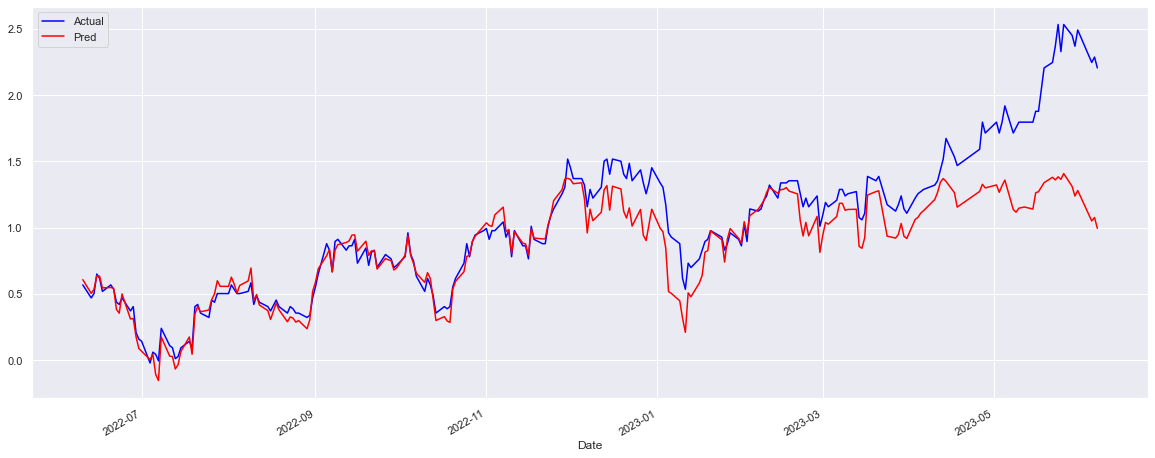

In [27]:
predictions_standard['Actual'].plot(figsize=(20,8), legend=True, color='blue')
predictions_standard['Pred'].plot(legend=True, color='red', figsize=(20,8))

#### Evaluation

In [30]:
close_scaler_standard = load('../Feature Engineering/close_standard_scaler.bin')

In [31]:
inversed_standard_pred = close_scaler_standard.inverse_transform(np.array(predictions_standard['Pred']).reshape(-1,1))
inversed_standard_act = close_scaler_standard.inverse_transform(np.array(predictions_standard['Actual']).reshape(-1,1))

In [32]:
inversed_standard = pd.DataFrame(inversed_standard_pred)
inversed_standard['Actual'] = inversed_standard_act
inversed_standard.rename({0:'Pred'}, axis=1, inplace=True)
inversed_standard.index = test_standard_labels.index
inversed_standard.head(2)

Pred  Actual
Date                           
2022-06-10  4424.236328  4400.0
2022-06-13  4360.786621  4340.0

In [53]:
eval_standard = {
    "RMSE": 0,
    "MAPE": 0,
    "R2": 0
}

In [55]:
eval_standard["RMSE"] = rmse(inversed_standard['Pred'], inversed_standard['Actual'])
print("RMSE:", eval_standard["RMSE"])

RMSE: 188.68952364722733


In [56]:
def mape(actual, pred): 
    actual, pred = np.array(actual), np.array(pred)
    return np.mean(np.abs((actual - pred) / actual)) * 100

eval_standard["MAPE"] = mape(inversed_standard['Actual'], inversed_standard['Pred'])
print("MAPE:", eval_standard["MAPE"])

MAPE: 2.152776703625566


In [57]:
eval_standard["R2"] = r2_score(inversed_standard['Actual'], inversed_standard['Pred'])
print("R2:", eval_standard["R2"])

R2: 0.6676096942567116


### 2. Robust Scaler
#### Grid search to find the best hyperparameters

In [40]:
# Parameters: 
# n_estimators  "Number of gradient boosted trees. Equivalent to number 
#                of boosting rounds."
# learning_rate "Boosting learning rate (also known as “eta”)"
# max_depth     "Maximum depth of a tree. Increasing this value will make 
#                the model more complex and more likely to overfit." 

regressor_robust = xgb.XGBRegressor(eval_metric='rmse')

param_grid = {"max_depth":    [3, 4, 5],
              "n_estimators": [500, 600, 700, 1000],
              "learning_rate": [0.01, 0.015],
              "base_score": [0.5],
              "booster": ["gbtree"],
              "early_stopping_rounds": [50]}


search_robust = GridSearchCV(regressor_robust, param_grid, cv=5) \
.fit(train_robust_features, train_robust_labels, 
     eval_set=[(train_robust_features, train_robust_labels)])

[0]	validation_0-rmse:1.11508
[1]	validation_0-rmse:1.10455
[2]	validation_0-rmse:1.09404
[3]	validation_0-rmse:1.08372
[4]	validation_0-rmse:1.07351
[5]	validation_0-rmse:1.06332
[6]	validation_0-rmse:1.05332
[7]	validation_0-rmse:1.04341
[8]	validation_0-rmse:1.03352
[9]	validation_0-rmse:1.02396
[10]	validation_0-rmse:1.01435
[11]	validation_0-rmse:1.00487
[12]	validation_0-rmse:0.99546
[13]	validation_0-rmse:0.98616
[14]	validation_0-rmse:0.97706
[15]	validation_0-rmse:0.96785
[16]	validation_0-rmse:0.95892
[17]	validation_0-rmse:0.95012
[18]	validation_0-rmse:0.94129
[19]	validation_0-rmse:0.93252
[20]	validation_0-rmse:0.92388
[21]	validation_0-rmse:0.91541
[22]	validation_0-rmse:0.90690
[23]	validation_0-rmse:0.89852
[24]	validation_0-rmse:0.89018
[25]	validation_0-rmse:0.88195
[26]	validation_0-rmse:0.87391
[27]	validation_0-rmse:0.86587
[28]	validation_0-rmse:0.85789
[29]	validation_0-rmse:0.85009
[30]	validation_0-rmse:0.84235
[31]	validation_0-rmse:0.83461
[32]	validation_0-

[260]	validation_0-rmse:0.14385
[261]	validation_0-rmse:0.14305
[262]	validation_0-rmse:0.14230
[263]	validation_0-rmse:0.14156
[264]	validation_0-rmse:0.14080
[265]	validation_0-rmse:0.14008
[266]	validation_0-rmse:0.13936
[267]	validation_0-rmse:0.13869
[268]	validation_0-rmse:0.13794
[269]	validation_0-rmse:0.13723
[270]	validation_0-rmse:0.13655
[271]	validation_0-rmse:0.13583
[272]	validation_0-rmse:0.13516
[273]	validation_0-rmse:0.13444
[274]	validation_0-rmse:0.13379
[275]	validation_0-rmse:0.13315
[276]	validation_0-rmse:0.13247
[277]	validation_0-rmse:0.13184
[278]	validation_0-rmse:0.13121
[279]	validation_0-rmse:0.13060
[280]	validation_0-rmse:0.12997
[281]	validation_0-rmse:0.12936
[282]	validation_0-rmse:0.12878
[283]	validation_0-rmse:0.12814
[284]	validation_0-rmse:0.12754
[285]	validation_0-rmse:0.12696
[286]	validation_0-rmse:0.12640
[287]	validation_0-rmse:0.12584
[288]	validation_0-rmse:0.12527
[289]	validation_0-rmse:0.12474
[290]	validation_0-rmse:0.12418
[291]	va

[17]	validation_0-rmse:0.94621
[18]	validation_0-rmse:0.93717
[19]	validation_0-rmse:0.92822
[20]	validation_0-rmse:0.91937
[21]	validation_0-rmse:0.91059
[22]	validation_0-rmse:0.90191
[23]	validation_0-rmse:0.89332
[24]	validation_0-rmse:0.88482
[25]	validation_0-rmse:0.87640
[26]	validation_0-rmse:0.86807
[27]	validation_0-rmse:0.85982
[28]	validation_0-rmse:0.85165
[29]	validation_0-rmse:0.84357
[30]	validation_0-rmse:0.83556
[31]	validation_0-rmse:0.82764
[32]	validation_0-rmse:0.81979
[33]	validation_0-rmse:0.81204
[34]	validation_0-rmse:0.80435
[35]	validation_0-rmse:0.79676
[36]	validation_0-rmse:0.78922
[37]	validation_0-rmse:0.78177
[38]	validation_0-rmse:0.77439
[39]	validation_0-rmse:0.76710
[40]	validation_0-rmse:0.75988
[41]	validation_0-rmse:0.75272
[42]	validation_0-rmse:0.74565
[43]	validation_0-rmse:0.73863
[44]	validation_0-rmse:0.73170
[45]	validation_0-rmse:0.72483
[46]	validation_0-rmse:0.71803
[47]	validation_0-rmse:0.71131
[48]	validation_0-rmse:0.70464
[49]	val

[276]	validation_0-rmse:0.11211
[277]	validation_0-rmse:0.11149
[278]	validation_0-rmse:0.11087
[279]	validation_0-rmse:0.11026
[280]	validation_0-rmse:0.10964
[281]	validation_0-rmse:0.10905
[282]	validation_0-rmse:0.10844
[283]	validation_0-rmse:0.10783
[284]	validation_0-rmse:0.10724
[285]	validation_0-rmse:0.10667
[286]	validation_0-rmse:0.10610
[287]	validation_0-rmse:0.10553
[288]	validation_0-rmse:0.10498
[289]	validation_0-rmse:0.10445
[290]	validation_0-rmse:0.10391
[291]	validation_0-rmse:0.10337
[292]	validation_0-rmse:0.10274
[293]	validation_0-rmse:0.10220
[294]	validation_0-rmse:0.10160
[295]	validation_0-rmse:0.10107
[296]	validation_0-rmse:0.10047
[297]	validation_0-rmse:0.09994
[298]	validation_0-rmse:0.09945
[299]	validation_0-rmse:0.09888
[300]	validation_0-rmse:0.09838
[301]	validation_0-rmse:0.09788
[302]	validation_0-rmse:0.09732
[303]	validation_0-rmse:0.09685
[304]	validation_0-rmse:0.09639
[305]	validation_0-rmse:0.09586
[306]	validation_0-rmse:0.09536
[307]	va

[34]	validation_0-rmse:0.82138
[35]	validation_0-rmse:0.81414
[36]	validation_0-rmse:0.80712
[37]	validation_0-rmse:0.80019
[38]	validation_0-rmse:0.79315
[39]	validation_0-rmse:0.78634
[40]	validation_0-rmse:0.77963
[41]	validation_0-rmse:0.77304
[42]	validation_0-rmse:0.76632
[43]	validation_0-rmse:0.75979
[44]	validation_0-rmse:0.75328
[45]	validation_0-rmse:0.74695
[46]	validation_0-rmse:0.74068
[47]	validation_0-rmse:0.73441
[48]	validation_0-rmse:0.72806
[49]	validation_0-rmse:0.72199
[50]	validation_0-rmse:0.71575
[51]	validation_0-rmse:0.70973
[52]	validation_0-rmse:0.70361
[53]	validation_0-rmse:0.69776
[54]	validation_0-rmse:0.69176
[55]	validation_0-rmse:0.68606
[56]	validation_0-rmse:0.68037
[57]	validation_0-rmse:0.67469
[58]	validation_0-rmse:0.66910
[59]	validation_0-rmse:0.66341
[60]	validation_0-rmse:0.65798
[61]	validation_0-rmse:0.65239
[62]	validation_0-rmse:0.64703
[63]	validation_0-rmse:0.64160
[64]	validation_0-rmse:0.63632
[65]	validation_0-rmse:0.63113
[66]	val

[293]	validation_0-rmse:0.18221
[294]	validation_0-rmse:0.18170
[295]	validation_0-rmse:0.18119
[296]	validation_0-rmse:0.18071
[297]	validation_0-rmse:0.18019
[298]	validation_0-rmse:0.17970
[299]	validation_0-rmse:0.17921
[300]	validation_0-rmse:0.17871
[301]	validation_0-rmse:0.17827
[302]	validation_0-rmse:0.17782
[303]	validation_0-rmse:0.17735
[304]	validation_0-rmse:0.17692
[305]	validation_0-rmse:0.17646
[306]	validation_0-rmse:0.17601
[307]	validation_0-rmse:0.17556
[308]	validation_0-rmse:0.17514
[309]	validation_0-rmse:0.17469
[310]	validation_0-rmse:0.17429
[311]	validation_0-rmse:0.17390
[312]	validation_0-rmse:0.17347
[313]	validation_0-rmse:0.17305
[314]	validation_0-rmse:0.17262
[315]	validation_0-rmse:0.17224
[316]	validation_0-rmse:0.17182
[317]	validation_0-rmse:0.17145
[318]	validation_0-rmse:0.17110
[319]	validation_0-rmse:0.17073
[320]	validation_0-rmse:0.17038
[321]	validation_0-rmse:0.17003
[322]	validation_0-rmse:0.16963
[323]	validation_0-rmse:0.16928
[324]	va

[51]	validation_0-rmse:0.68449
[52]	validation_0-rmse:0.67811
[53]	validation_0-rmse:0.67179
[54]	validation_0-rmse:0.66549
[55]	validation_0-rmse:0.65930
[56]	validation_0-rmse:0.65315
[57]	validation_0-rmse:0.64708
[58]	validation_0-rmse:0.64103
[59]	validation_0-rmse:0.63508
[60]	validation_0-rmse:0.62920
[61]	validation_0-rmse:0.62339
[62]	validation_0-rmse:0.61758
[63]	validation_0-rmse:0.61178
[64]	validation_0-rmse:0.60611
[65]	validation_0-rmse:0.60052
[66]	validation_0-rmse:0.59490
[67]	validation_0-rmse:0.58941
[68]	validation_0-rmse:0.58399
[69]	validation_0-rmse:0.57853
[70]	validation_0-rmse:0.57319
[71]	validation_0-rmse:0.56794
[72]	validation_0-rmse:0.56269
[73]	validation_0-rmse:0.55753
[74]	validation_0-rmse:0.55234
[75]	validation_0-rmse:0.54721
[76]	validation_0-rmse:0.54218
[77]	validation_0-rmse:0.53723
[78]	validation_0-rmse:0.53224
[79]	validation_0-rmse:0.52735
[80]	validation_0-rmse:0.52253
[81]	validation_0-rmse:0.51770
[82]	validation_0-rmse:0.51292
[83]	val

[309]	validation_0-rmse:0.10109
[310]	validation_0-rmse:0.10066
[311]	validation_0-rmse:0.10024
[312]	validation_0-rmse:0.09983
[313]	validation_0-rmse:0.09940
[314]	validation_0-rmse:0.09904
[315]	validation_0-rmse:0.09862
[316]	validation_0-rmse:0.09825
[317]	validation_0-rmse:0.09787
[318]	validation_0-rmse:0.09751
[319]	validation_0-rmse:0.09714
[320]	validation_0-rmse:0.09679
[321]	validation_0-rmse:0.09643
[322]	validation_0-rmse:0.09610
[323]	validation_0-rmse:0.09574
[324]	validation_0-rmse:0.09537
[325]	validation_0-rmse:0.09500
[326]	validation_0-rmse:0.09466
[327]	validation_0-rmse:0.09432
[328]	validation_0-rmse:0.09400
[329]	validation_0-rmse:0.09369
[330]	validation_0-rmse:0.09335
[331]	validation_0-rmse:0.09305
[332]	validation_0-rmse:0.09272
[333]	validation_0-rmse:0.09238
[334]	validation_0-rmse:0.09207
[335]	validation_0-rmse:0.09176
[336]	validation_0-rmse:0.09146
[337]	validation_0-rmse:0.09114
[338]	validation_0-rmse:0.09086
[339]	validation_0-rmse:0.09058
[340]	va

[68]	validation_0-rmse:0.57960
[69]	validation_0-rmse:0.57417
[70]	validation_0-rmse:0.56880
[71]	validation_0-rmse:0.56356
[72]	validation_0-rmse:0.55830
[73]	validation_0-rmse:0.55309
[74]	validation_0-rmse:0.54793
[75]	validation_0-rmse:0.54279
[76]	validation_0-rmse:0.53772
[77]	validation_0-rmse:0.53281
[78]	validation_0-rmse:0.52786
[79]	validation_0-rmse:0.52295
[80]	validation_0-rmse:0.51819
[81]	validation_0-rmse:0.51338
[82]	validation_0-rmse:0.50859
[83]	validation_0-rmse:0.50390
[84]	validation_0-rmse:0.49924
[85]	validation_0-rmse:0.49472
[86]	validation_0-rmse:0.49016
[87]	validation_0-rmse:0.48566
[88]	validation_0-rmse:0.48120
[89]	validation_0-rmse:0.47685
[90]	validation_0-rmse:0.47246
[91]	validation_0-rmse:0.46814
[92]	validation_0-rmse:0.46387
[93]	validation_0-rmse:0.45970
[94]	validation_0-rmse:0.45550
[95]	validation_0-rmse:0.45135
[96]	validation_0-rmse:0.44721
[97]	validation_0-rmse:0.44311
[98]	validation_0-rmse:0.43906
[99]	validation_0-rmse:0.43506
[100]	va

[326]	validation_0-rmse:0.10090
[327]	validation_0-rmse:0.10062
[328]	validation_0-rmse:0.10032
[329]	validation_0-rmse:0.10005
[330]	validation_0-rmse:0.09980
[331]	validation_0-rmse:0.09951
[332]	validation_0-rmse:0.09924
[333]	validation_0-rmse:0.09898
[334]	validation_0-rmse:0.09871
[335]	validation_0-rmse:0.09844
[336]	validation_0-rmse:0.09818
[337]	validation_0-rmse:0.09792
[338]	validation_0-rmse:0.09767
[339]	validation_0-rmse:0.09741
[340]	validation_0-rmse:0.09717
[341]	validation_0-rmse:0.09692
[342]	validation_0-rmse:0.09668
[343]	validation_0-rmse:0.09645
[344]	validation_0-rmse:0.09623
[345]	validation_0-rmse:0.09600
[346]	validation_0-rmse:0.09576
[347]	validation_0-rmse:0.09553
[348]	validation_0-rmse:0.09531
[349]	validation_0-rmse:0.09508
[350]	validation_0-rmse:0.09487
[351]	validation_0-rmse:0.09465
[352]	validation_0-rmse:0.09444
[353]	validation_0-rmse:0.09422
[354]	validation_0-rmse:0.09402
[355]	validation_0-rmse:0.09383
[356]	validation_0-rmse:0.09363
[357]	va

[85]	validation_0-rmse:0.51463
[86]	validation_0-rmse:0.51013
[87]	validation_0-rmse:0.50576
[88]	validation_0-rmse:0.50132
[89]	validation_0-rmse:0.49710
[90]	validation_0-rmse:0.49278
[91]	validation_0-rmse:0.48849
[92]	validation_0-rmse:0.48438
[93]	validation_0-rmse:0.48010
[94]	validation_0-rmse:0.47607
[95]	validation_0-rmse:0.47192
[96]	validation_0-rmse:0.46784
[97]	validation_0-rmse:0.46394
[98]	validation_0-rmse:0.45987
[99]	validation_0-rmse:0.45607
[100]	validation_0-rmse:0.45214
[101]	validation_0-rmse:0.44839
[102]	validation_0-rmse:0.44453
[103]	validation_0-rmse:0.44079
[104]	validation_0-rmse:0.43709
[105]	validation_0-rmse:0.43325
[106]	validation_0-rmse:0.42956
[107]	validation_0-rmse:0.42606
[108]	validation_0-rmse:0.42251
[109]	validation_0-rmse:0.41894
[110]	validation_0-rmse:0.41546
[111]	validation_0-rmse:0.41207
[112]	validation_0-rmse:0.40862
[113]	validation_0-rmse:0.40518
[114]	validation_0-rmse:0.40189
[115]	validation_0-rmse:0.39853
[116]	validation_0-rmse

[342]	validation_0-rmse:0.10228
[343]	validation_0-rmse:0.10194
[344]	validation_0-rmse:0.10163
[345]	validation_0-rmse:0.10134
[346]	validation_0-rmse:0.10103
[347]	validation_0-rmse:0.10073
[348]	validation_0-rmse:0.10044
[349]	validation_0-rmse:0.10012
[350]	validation_0-rmse:0.09982
[351]	validation_0-rmse:0.09949
[352]	validation_0-rmse:0.09918
[353]	validation_0-rmse:0.09890
[354]	validation_0-rmse:0.09863
[355]	validation_0-rmse:0.09836
[356]	validation_0-rmse:0.09808
[357]	validation_0-rmse:0.09781
[358]	validation_0-rmse:0.09753
[359]	validation_0-rmse:0.09726
[360]	validation_0-rmse:0.09695
[361]	validation_0-rmse:0.09669
[362]	validation_0-rmse:0.09644
[363]	validation_0-rmse:0.09615
[364]	validation_0-rmse:0.09586
[365]	validation_0-rmse:0.09561
[366]	validation_0-rmse:0.09533
[367]	validation_0-rmse:0.09509
[368]	validation_0-rmse:0.09481
[369]	validation_0-rmse:0.09458
[370]	validation_0-rmse:0.09432
[371]	validation_0-rmse:0.09408
[372]	validation_0-rmse:0.09380
[373]	va

[599]	validation_0-rmse:0.07022
[0]	validation_0-rmse:1.11485
[1]	validation_0-rmse:1.10409
[2]	validation_0-rmse:1.09345
[3]	validation_0-rmse:1.08291
[4]	validation_0-rmse:1.07248
[5]	validation_0-rmse:1.06215
[6]	validation_0-rmse:1.05195
[7]	validation_0-rmse:1.04183
[8]	validation_0-rmse:1.03183
[9]	validation_0-rmse:1.02192
[10]	validation_0-rmse:1.01212
[11]	validation_0-rmse:1.00241
[12]	validation_0-rmse:0.99280
[13]	validation_0-rmse:0.98329
[14]	validation_0-rmse:0.97387
[15]	validation_0-rmse:0.96456
[16]	validation_0-rmse:0.95533
[17]	validation_0-rmse:0.94621
[18]	validation_0-rmse:0.93717
[19]	validation_0-rmse:0.92822
[20]	validation_0-rmse:0.91937
[21]	validation_0-rmse:0.91059
[22]	validation_0-rmse:0.90191
[23]	validation_0-rmse:0.89332
[24]	validation_0-rmse:0.88482
[25]	validation_0-rmse:0.87640
[26]	validation_0-rmse:0.86807
[27]	validation_0-rmse:0.85982
[28]	validation_0-rmse:0.85165
[29]	validation_0-rmse:0.84357
[30]	validation_0-rmse:0.83556
[31]	validation_0

[259]	validation_0-rmse:0.12393
[260]	validation_0-rmse:0.12317
[261]	validation_0-rmse:0.12242
[262]	validation_0-rmse:0.12169
[263]	validation_0-rmse:0.12094
[264]	validation_0-rmse:0.12021
[265]	validation_0-rmse:0.11950
[266]	validation_0-rmse:0.11878
[267]	validation_0-rmse:0.11808
[268]	validation_0-rmse:0.11739
[269]	validation_0-rmse:0.11669
[270]	validation_0-rmse:0.11601
[271]	validation_0-rmse:0.11534
[272]	validation_0-rmse:0.11469
[273]	validation_0-rmse:0.11403
[274]	validation_0-rmse:0.11337
[275]	validation_0-rmse:0.11275
[276]	validation_0-rmse:0.11211
[277]	validation_0-rmse:0.11149
[278]	validation_0-rmse:0.11087
[279]	validation_0-rmse:0.11026
[280]	validation_0-rmse:0.10964
[281]	validation_0-rmse:0.10905
[282]	validation_0-rmse:0.10844
[283]	validation_0-rmse:0.10783
[284]	validation_0-rmse:0.10724
[285]	validation_0-rmse:0.10667
[286]	validation_0-rmse:0.10610
[287]	validation_0-rmse:0.10553
[288]	validation_0-rmse:0.10498
[289]	validation_0-rmse:0.10445
[290]	va

[516]	validation_0-rmse:0.05703
[517]	validation_0-rmse:0.05697
[518]	validation_0-rmse:0.05694
[519]	validation_0-rmse:0.05689
[520]	validation_0-rmse:0.05684
[521]	validation_0-rmse:0.05681
[522]	validation_0-rmse:0.05676
[523]	validation_0-rmse:0.05673
[524]	validation_0-rmse:0.05668
[525]	validation_0-rmse:0.05662
[526]	validation_0-rmse:0.05659
[527]	validation_0-rmse:0.05656
[528]	validation_0-rmse:0.05652
[529]	validation_0-rmse:0.05646
[530]	validation_0-rmse:0.05643
[531]	validation_0-rmse:0.05639
[532]	validation_0-rmse:0.05636
[533]	validation_0-rmse:0.05632
[534]	validation_0-rmse:0.05627
[535]	validation_0-rmse:0.05622
[536]	validation_0-rmse:0.05619
[537]	validation_0-rmse:0.05615
[538]	validation_0-rmse:0.05610
[539]	validation_0-rmse:0.05606
[540]	validation_0-rmse:0.05603
[541]	validation_0-rmse:0.05600
[542]	validation_0-rmse:0.05597
[543]	validation_0-rmse:0.05592
[544]	validation_0-rmse:0.05589
[545]	validation_0-rmse:0.05584
[546]	validation_0-rmse:0.05580
[547]	va

[176]	validation_0-rmse:0.28835
[177]	validation_0-rmse:0.28665
[178]	validation_0-rmse:0.28537
[179]	validation_0-rmse:0.28378
[180]	validation_0-rmse:0.28254
[181]	validation_0-rmse:0.28092
[182]	validation_0-rmse:0.27964
[183]	validation_0-rmse:0.27844
[184]	validation_0-rmse:0.27683
[185]	validation_0-rmse:0.27535
[186]	validation_0-rmse:0.27384
[187]	validation_0-rmse:0.27270
[188]	validation_0-rmse:0.27126
[189]	validation_0-rmse:0.27014
[190]	validation_0-rmse:0.26863
[191]	validation_0-rmse:0.26720
[192]	validation_0-rmse:0.26583
[193]	validation_0-rmse:0.26476
[194]	validation_0-rmse:0.26331
[195]	validation_0-rmse:0.26195
[196]	validation_0-rmse:0.26092
[197]	validation_0-rmse:0.25963
[198]	validation_0-rmse:0.25863
[199]	validation_0-rmse:0.25732
[200]	validation_0-rmse:0.25634
[201]	validation_0-rmse:0.25506
[202]	validation_0-rmse:0.25410
[203]	validation_0-rmse:0.25279
[204]	validation_0-rmse:0.25186
[205]	validation_0-rmse:0.25058
[206]	validation_0-rmse:0.24936
[207]	va

[433]	validation_0-rmse:0.14523
[434]	validation_0-rmse:0.14516
[435]	validation_0-rmse:0.14504
[436]	validation_0-rmse:0.14488
[437]	validation_0-rmse:0.14477
[438]	validation_0-rmse:0.14472
[439]	validation_0-rmse:0.14455
[440]	validation_0-rmse:0.14444
[441]	validation_0-rmse:0.14431
[442]	validation_0-rmse:0.14424
[443]	validation_0-rmse:0.14413
[444]	validation_0-rmse:0.14399
[445]	validation_0-rmse:0.14388
[446]	validation_0-rmse:0.14374
[447]	validation_0-rmse:0.14363
[448]	validation_0-rmse:0.14349
[449]	validation_0-rmse:0.14339
[450]	validation_0-rmse:0.14334
[451]	validation_0-rmse:0.14323
[452]	validation_0-rmse:0.14303
[453]	validation_0-rmse:0.14290
[454]	validation_0-rmse:0.14280
[455]	validation_0-rmse:0.14269
[456]	validation_0-rmse:0.14258
[457]	validation_0-rmse:0.14247
[458]	validation_0-rmse:0.14237
[459]	validation_0-rmse:0.14230
[460]	validation_0-rmse:0.14219
[461]	validation_0-rmse:0.14210
[462]	validation_0-rmse:0.14201
[463]	validation_0-rmse:0.14191
[464]	va

[93]	validation_0-rmse:0.46384
[94]	validation_0-rmse:0.45962
[95]	validation_0-rmse:0.45546
[96]	validation_0-rmse:0.45132
[97]	validation_0-rmse:0.44724
[98]	validation_0-rmse:0.44321
[99]	validation_0-rmse:0.43926
[100]	validation_0-rmse:0.43527
[101]	validation_0-rmse:0.43136
[102]	validation_0-rmse:0.42753
[103]	validation_0-rmse:0.42369
[104]	validation_0-rmse:0.41989
[105]	validation_0-rmse:0.41613
[106]	validation_0-rmse:0.41239
[107]	validation_0-rmse:0.40868
[108]	validation_0-rmse:0.40508
[109]	validation_0-rmse:0.40142
[110]	validation_0-rmse:0.39780
[111]	validation_0-rmse:0.39422
[112]	validation_0-rmse:0.39077
[113]	validation_0-rmse:0.38727
[114]	validation_0-rmse:0.38382
[115]	validation_0-rmse:0.38042
[116]	validation_0-rmse:0.37708
[117]	validation_0-rmse:0.37371
[118]	validation_0-rmse:0.37041
[119]	validation_0-rmse:0.36716
[120]	validation_0-rmse:0.36391
[121]	validation_0-rmse:0.36069
[122]	validation_0-rmse:0.35751
[123]	validation_0-rmse:0.35443
[124]	validatio

[350]	validation_0-rmse:0.08753
[351]	validation_0-rmse:0.08727
[352]	validation_0-rmse:0.08702
[353]	validation_0-rmse:0.08678
[354]	validation_0-rmse:0.08651
[355]	validation_0-rmse:0.08627
[356]	validation_0-rmse:0.08605
[357]	validation_0-rmse:0.08581
[358]	validation_0-rmse:0.08557
[359]	validation_0-rmse:0.08534
[360]	validation_0-rmse:0.08510
[361]	validation_0-rmse:0.08489
[362]	validation_0-rmse:0.08465
[363]	validation_0-rmse:0.08443
[364]	validation_0-rmse:0.08421
[365]	validation_0-rmse:0.08398
[366]	validation_0-rmse:0.08377
[367]	validation_0-rmse:0.08355
[368]	validation_0-rmse:0.08333
[369]	validation_0-rmse:0.08314
[370]	validation_0-rmse:0.08294
[371]	validation_0-rmse:0.08274
[372]	validation_0-rmse:0.08254
[373]	validation_0-rmse:0.08233
[374]	validation_0-rmse:0.08213
[375]	validation_0-rmse:0.08193
[376]	validation_0-rmse:0.08174
[377]	validation_0-rmse:0.08157
[378]	validation_0-rmse:0.08137
[379]	validation_0-rmse:0.08121
[380]	validation_0-rmse:0.08103
[381]	va

[7]	validation_0-rmse:1.04085
[8]	validation_0-rmse:1.03073
[9]	validation_0-rmse:1.02070
[10]	validation_0-rmse:1.01079
[11]	validation_0-rmse:1.00098
[12]	validation_0-rmse:0.99125
[13]	validation_0-rmse:0.98165
[14]	validation_0-rmse:0.97212
[15]	validation_0-rmse:0.96269
[16]	validation_0-rmse:0.95334
[17]	validation_0-rmse:0.94411
[18]	validation_0-rmse:0.93496
[19]	validation_0-rmse:0.92592
[20]	validation_0-rmse:0.91697
[21]	validation_0-rmse:0.90810
[22]	validation_0-rmse:0.89934
[23]	validation_0-rmse:0.89067
[24]	validation_0-rmse:0.88206
[25]	validation_0-rmse:0.87356
[26]	validation_0-rmse:0.86516
[27]	validation_0-rmse:0.85681
[28]	validation_0-rmse:0.84858
[29]	validation_0-rmse:0.84042
[30]	validation_0-rmse:0.83235
[31]	validation_0-rmse:0.82433
[32]	validation_0-rmse:0.81641
[33]	validation_0-rmse:0.80859
[34]	validation_0-rmse:0.80088
[35]	validation_0-rmse:0.79320
[36]	validation_0-rmse:0.78561
[37]	validation_0-rmse:0.77813
[38]	validation_0-rmse:0.77069
[39]	valida

[267]	validation_0-rmse:0.12673
[268]	validation_0-rmse:0.12611
[269]	validation_0-rmse:0.12550
[270]	validation_0-rmse:0.12489
[271]	validation_0-rmse:0.12432
[272]	validation_0-rmse:0.12375
[273]	validation_0-rmse:0.12320
[274]	validation_0-rmse:0.12264
[275]	validation_0-rmse:0.12209
[276]	validation_0-rmse:0.12153
[277]	validation_0-rmse:0.12102
[278]	validation_0-rmse:0.12045
[279]	validation_0-rmse:0.11994
[280]	validation_0-rmse:0.11944
[281]	validation_0-rmse:0.11887
[282]	validation_0-rmse:0.11838
[283]	validation_0-rmse:0.11787
[284]	validation_0-rmse:0.11734
[285]	validation_0-rmse:0.11679
[286]	validation_0-rmse:0.11633
[287]	validation_0-rmse:0.11579
[288]	validation_0-rmse:0.11527
[289]	validation_0-rmse:0.11476
[290]	validation_0-rmse:0.11426
[291]	validation_0-rmse:0.11382
[292]	validation_0-rmse:0.11337
[293]	validation_0-rmse:0.11294
[294]	validation_0-rmse:0.11247
[295]	validation_0-rmse:0.11200
[296]	validation_0-rmse:0.11154
[297]	validation_0-rmse:0.11111
[298]	va

[524]	validation_0-rmse:0.07736
[525]	validation_0-rmse:0.07733
[526]	validation_0-rmse:0.07729
[527]	validation_0-rmse:0.07726
[528]	validation_0-rmse:0.07722
[529]	validation_0-rmse:0.07718
[530]	validation_0-rmse:0.07714
[531]	validation_0-rmse:0.07710
[532]	validation_0-rmse:0.07707
[533]	validation_0-rmse:0.07704
[534]	validation_0-rmse:0.07701
[535]	validation_0-rmse:0.07698
[536]	validation_0-rmse:0.07694
[537]	validation_0-rmse:0.07690
[538]	validation_0-rmse:0.07688
[539]	validation_0-rmse:0.07684
[540]	validation_0-rmse:0.07681
[541]	validation_0-rmse:0.07677
[542]	validation_0-rmse:0.07673
[543]	validation_0-rmse:0.07670
[544]	validation_0-rmse:0.07666
[545]	validation_0-rmse:0.07664
[546]	validation_0-rmse:0.07660
[547]	validation_0-rmse:0.07657
[548]	validation_0-rmse:0.07653
[549]	validation_0-rmse:0.07650
[550]	validation_0-rmse:0.07646
[551]	validation_0-rmse:0.07644
[552]	validation_0-rmse:0.07640
[553]	validation_0-rmse:0.07636
[554]	validation_0-rmse:0.07634
[555]	va

[184]	validation_0-rmse:0.23247
[185]	validation_0-rmse:0.23089
[186]	validation_0-rmse:0.22924
[187]	validation_0-rmse:0.22764
[188]	validation_0-rmse:0.22603
[189]	validation_0-rmse:0.22443
[190]	validation_0-rmse:0.22285
[191]	validation_0-rmse:0.22132
[192]	validation_0-rmse:0.21976
[193]	validation_0-rmse:0.21823
[194]	validation_0-rmse:0.21672
[195]	validation_0-rmse:0.21521
[196]	validation_0-rmse:0.21372
[197]	validation_0-rmse:0.21227
[198]	validation_0-rmse:0.21084
[199]	validation_0-rmse:0.20942
[200]	validation_0-rmse:0.20792
[201]	validation_0-rmse:0.20652
[202]	validation_0-rmse:0.20514
[203]	validation_0-rmse:0.20377
[204]	validation_0-rmse:0.20242
[205]	validation_0-rmse:0.20107
[206]	validation_0-rmse:0.19972
[207]	validation_0-rmse:0.19840
[208]	validation_0-rmse:0.19701
[209]	validation_0-rmse:0.19571
[210]	validation_0-rmse:0.19442
[211]	validation_0-rmse:0.19312
[212]	validation_0-rmse:0.19185
[213]	validation_0-rmse:0.19053
[214]	validation_0-rmse:0.18930
[215]	va

[441]	validation_0-rmse:0.08118
[442]	validation_0-rmse:0.08104
[443]	validation_0-rmse:0.08093
[444]	validation_0-rmse:0.08081
[445]	validation_0-rmse:0.08070
[446]	validation_0-rmse:0.08058
[447]	validation_0-rmse:0.08048
[448]	validation_0-rmse:0.08037
[449]	validation_0-rmse:0.08024
[450]	validation_0-rmse:0.08012
[451]	validation_0-rmse:0.08002
[452]	validation_0-rmse:0.07991
[453]	validation_0-rmse:0.07980
[454]	validation_0-rmse:0.07969
[455]	validation_0-rmse:0.07959
[456]	validation_0-rmse:0.07949
[457]	validation_0-rmse:0.07937
[458]	validation_0-rmse:0.07927
[459]	validation_0-rmse:0.07916
[460]	validation_0-rmse:0.07906
[461]	validation_0-rmse:0.07894
[462]	validation_0-rmse:0.07884
[463]	validation_0-rmse:0.07875
[464]	validation_0-rmse:0.07863
[465]	validation_0-rmse:0.07853
[466]	validation_0-rmse:0.07843
[467]	validation_0-rmse:0.07834
[468]	validation_0-rmse:0.07825
[469]	validation_0-rmse:0.07816
[470]	validation_0-rmse:0.07807
[471]	validation_0-rmse:0.07798
[472]	va

[698]	validation_0-rmse:0.06699
[699]	validation_0-rmse:0.06694
[0]	validation_0-rmse:1.11485
[1]	validation_0-rmse:1.10409
[2]	validation_0-rmse:1.09345
[3]	validation_0-rmse:1.08291
[4]	validation_0-rmse:1.07248
[5]	validation_0-rmse:1.06215
[6]	validation_0-rmse:1.05195
[7]	validation_0-rmse:1.04183
[8]	validation_0-rmse:1.03183
[9]	validation_0-rmse:1.02192
[10]	validation_0-rmse:1.01212
[11]	validation_0-rmse:1.00241
[12]	validation_0-rmse:0.99280
[13]	validation_0-rmse:0.98329
[14]	validation_0-rmse:0.97387
[15]	validation_0-rmse:0.96456
[16]	validation_0-rmse:0.95533
[17]	validation_0-rmse:0.94621
[18]	validation_0-rmse:0.93717
[19]	validation_0-rmse:0.92822
[20]	validation_0-rmse:0.91937
[21]	validation_0-rmse:0.91059
[22]	validation_0-rmse:0.90191
[23]	validation_0-rmse:0.89332
[24]	validation_0-rmse:0.88482
[25]	validation_0-rmse:0.87640
[26]	validation_0-rmse:0.86807
[27]	validation_0-rmse:0.85982
[28]	validation_0-rmse:0.85165
[29]	validation_0-rmse:0.84357
[30]	validation_

[258]	validation_0-rmse:0.12470
[259]	validation_0-rmse:0.12393
[260]	validation_0-rmse:0.12317
[261]	validation_0-rmse:0.12242
[262]	validation_0-rmse:0.12169
[263]	validation_0-rmse:0.12094
[264]	validation_0-rmse:0.12021
[265]	validation_0-rmse:0.11950
[266]	validation_0-rmse:0.11878
[267]	validation_0-rmse:0.11808
[268]	validation_0-rmse:0.11739
[269]	validation_0-rmse:0.11669
[270]	validation_0-rmse:0.11601
[271]	validation_0-rmse:0.11534
[272]	validation_0-rmse:0.11469
[273]	validation_0-rmse:0.11403
[274]	validation_0-rmse:0.11337
[275]	validation_0-rmse:0.11275
[276]	validation_0-rmse:0.11211
[277]	validation_0-rmse:0.11149
[278]	validation_0-rmse:0.11087
[279]	validation_0-rmse:0.11026
[280]	validation_0-rmse:0.10964
[281]	validation_0-rmse:0.10905
[282]	validation_0-rmse:0.10844
[283]	validation_0-rmse:0.10783
[284]	validation_0-rmse:0.10724
[285]	validation_0-rmse:0.10667
[286]	validation_0-rmse:0.10610
[287]	validation_0-rmse:0.10553
[288]	validation_0-rmse:0.10498
[289]	va

[515]	validation_0-rmse:0.05708
[516]	validation_0-rmse:0.05703
[517]	validation_0-rmse:0.05697
[518]	validation_0-rmse:0.05694
[519]	validation_0-rmse:0.05689
[520]	validation_0-rmse:0.05684
[521]	validation_0-rmse:0.05681
[522]	validation_0-rmse:0.05676
[523]	validation_0-rmse:0.05673
[524]	validation_0-rmse:0.05668
[525]	validation_0-rmse:0.05662
[526]	validation_0-rmse:0.05659
[527]	validation_0-rmse:0.05656
[528]	validation_0-rmse:0.05652
[529]	validation_0-rmse:0.05646
[530]	validation_0-rmse:0.05643
[531]	validation_0-rmse:0.05639
[532]	validation_0-rmse:0.05636
[533]	validation_0-rmse:0.05632
[534]	validation_0-rmse:0.05627
[535]	validation_0-rmse:0.05622
[536]	validation_0-rmse:0.05619
[537]	validation_0-rmse:0.05615
[538]	validation_0-rmse:0.05610
[539]	validation_0-rmse:0.05606
[540]	validation_0-rmse:0.05603
[541]	validation_0-rmse:0.05600
[542]	validation_0-rmse:0.05597
[543]	validation_0-rmse:0.05592
[544]	validation_0-rmse:0.05589
[545]	validation_0-rmse:0.05584
[546]	va

[74]	validation_0-rmse:0.58612
[75]	validation_0-rmse:0.58132
[76]	validation_0-rmse:0.57671
[77]	validation_0-rmse:0.57209
[78]	validation_0-rmse:0.56740
[79]	validation_0-rmse:0.56280
[80]	validation_0-rmse:0.55835
[81]	validation_0-rmse:0.55396
[82]	validation_0-rmse:0.54957
[83]	validation_0-rmse:0.54528
[84]	validation_0-rmse:0.54098
[85]	validation_0-rmse:0.53666
[86]	validation_0-rmse:0.53247
[87]	validation_0-rmse:0.52836
[88]	validation_0-rmse:0.52430
[89]	validation_0-rmse:0.52024
[90]	validation_0-rmse:0.51615
[91]	validation_0-rmse:0.51205
[92]	validation_0-rmse:0.50811
[93]	validation_0-rmse:0.50414
[94]	validation_0-rmse:0.50031
[95]	validation_0-rmse:0.49648
[96]	validation_0-rmse:0.49271
[97]	validation_0-rmse:0.48902
[98]	validation_0-rmse:0.48528
[99]	validation_0-rmse:0.48163
[100]	validation_0-rmse:0.47793
[101]	validation_0-rmse:0.47437
[102]	validation_0-rmse:0.47074
[103]	validation_0-rmse:0.46722
[104]	validation_0-rmse:0.46369
[105]	validation_0-rmse:0.46028
[1

[331]	validation_0-rmse:0.16656
[332]	validation_0-rmse:0.16618
[333]	validation_0-rmse:0.16586
[334]	validation_0-rmse:0.16556
[335]	validation_0-rmse:0.16523
[336]	validation_0-rmse:0.16491
[337]	validation_0-rmse:0.16464
[338]	validation_0-rmse:0.16433
[339]	validation_0-rmse:0.16398
[340]	validation_0-rmse:0.16367
[341]	validation_0-rmse:0.16340
[342]	validation_0-rmse:0.16310
[343]	validation_0-rmse:0.16276
[344]	validation_0-rmse:0.16248
[345]	validation_0-rmse:0.16218
[346]	validation_0-rmse:0.16194
[347]	validation_0-rmse:0.16162
[348]	validation_0-rmse:0.16129
[349]	validation_0-rmse:0.16102
[350]	validation_0-rmse:0.16077
[351]	validation_0-rmse:0.16050
[352]	validation_0-rmse:0.16018
[353]	validation_0-rmse:0.15990
[354]	validation_0-rmse:0.15967
[355]	validation_0-rmse:0.15939
[356]	validation_0-rmse:0.15917
[357]	validation_0-rmse:0.15887
[358]	validation_0-rmse:0.15853
[359]	validation_0-rmse:0.15822
[360]	validation_0-rmse:0.15795
[361]	validation_0-rmse:0.15769
[362]	va

[588]	validation_0-rmse:0.13328
[589]	validation_0-rmse:0.13324
[590]	validation_0-rmse:0.13321
[591]	validation_0-rmse:0.13320
[592]	validation_0-rmse:0.13317
[593]	validation_0-rmse:0.13315
[594]	validation_0-rmse:0.13312
[595]	validation_0-rmse:0.13311
[596]	validation_0-rmse:0.13307
[597]	validation_0-rmse:0.13305
[598]	validation_0-rmse:0.13302
[599]	validation_0-rmse:0.13301
[600]	validation_0-rmse:0.13294
[601]	validation_0-rmse:0.13290
[602]	validation_0-rmse:0.13287
[603]	validation_0-rmse:0.13287
[604]	validation_0-rmse:0.13285
[605]	validation_0-rmse:0.13278
[606]	validation_0-rmse:0.13276
[607]	validation_0-rmse:0.13276
[608]	validation_0-rmse:0.13275
[609]	validation_0-rmse:0.13274
[610]	validation_0-rmse:0.13270
[611]	validation_0-rmse:0.13267
[612]	validation_0-rmse:0.13264
[613]	validation_0-rmse:0.13262
[614]	validation_0-rmse:0.13261
[615]	validation_0-rmse:0.13254
[616]	validation_0-rmse:0.13252
[617]	validation_0-rmse:0.13251
[618]	validation_0-rmse:0.13250
[619]	va

[148]	validation_0-rmse:0.28559
[149]	validation_0-rmse:0.28320
[150]	validation_0-rmse:0.28081
[151]	validation_0-rmse:0.27847
[152]	validation_0-rmse:0.27613
[153]	validation_0-rmse:0.27384
[154]	validation_0-rmse:0.27157
[155]	validation_0-rmse:0.26935
[156]	validation_0-rmse:0.26709
[157]	validation_0-rmse:0.26487
[158]	validation_0-rmse:0.26269
[159]	validation_0-rmse:0.26056
[160]	validation_0-rmse:0.25839
[161]	validation_0-rmse:0.25625
[162]	validation_0-rmse:0.25411
[163]	validation_0-rmse:0.25205
[164]	validation_0-rmse:0.25004
[165]	validation_0-rmse:0.24803
[166]	validation_0-rmse:0.24606
[167]	validation_0-rmse:0.24406
[168]	validation_0-rmse:0.24210
[169]	validation_0-rmse:0.24017
[170]	validation_0-rmse:0.23828
[171]	validation_0-rmse:0.23639
[172]	validation_0-rmse:0.23448
[173]	validation_0-rmse:0.23264
[174]	validation_0-rmse:0.23081
[175]	validation_0-rmse:0.22902
[176]	validation_0-rmse:0.22724
[177]	validation_0-rmse:0.22545
[178]	validation_0-rmse:0.22370
[179]	va

[405]	validation_0-rmse:0.07678
[406]	validation_0-rmse:0.07664
[407]	validation_0-rmse:0.07649
[408]	validation_0-rmse:0.07634
[409]	validation_0-rmse:0.07619
[410]	validation_0-rmse:0.07606
[411]	validation_0-rmse:0.07591
[412]	validation_0-rmse:0.07576
[413]	validation_0-rmse:0.07562
[414]	validation_0-rmse:0.07548
[415]	validation_0-rmse:0.07535
[416]	validation_0-rmse:0.07520
[417]	validation_0-rmse:0.07509
[418]	validation_0-rmse:0.07494
[419]	validation_0-rmse:0.07482
[420]	validation_0-rmse:0.07469
[421]	validation_0-rmse:0.07456
[422]	validation_0-rmse:0.07442
[423]	validation_0-rmse:0.07428
[424]	validation_0-rmse:0.07416
[425]	validation_0-rmse:0.07402
[426]	validation_0-rmse:0.07390
[427]	validation_0-rmse:0.07378
[428]	validation_0-rmse:0.07367
[429]	validation_0-rmse:0.07354
[430]	validation_0-rmse:0.07342
[431]	validation_0-rmse:0.07330
[432]	validation_0-rmse:0.07318
[433]	validation_0-rmse:0.07306
[434]	validation_0-rmse:0.07295
[435]	validation_0-rmse:0.07283
[436]	va

[662]	validation_0-rmse:0.06076
[663]	validation_0-rmse:0.06074
[664]	validation_0-rmse:0.06070
[665]	validation_0-rmse:0.06069
[666]	validation_0-rmse:0.06067
[667]	validation_0-rmse:0.06065
[668]	validation_0-rmse:0.06061
[669]	validation_0-rmse:0.06058
[670]	validation_0-rmse:0.06055
[671]	validation_0-rmse:0.06053
[672]	validation_0-rmse:0.06053
[673]	validation_0-rmse:0.06050
[674]	validation_0-rmse:0.06048
[675]	validation_0-rmse:0.06048
[676]	validation_0-rmse:0.06046
[677]	validation_0-rmse:0.06044
[678]	validation_0-rmse:0.06042
[679]	validation_0-rmse:0.06039
[680]	validation_0-rmse:0.06036
[681]	validation_0-rmse:0.06034
[682]	validation_0-rmse:0.06031
[683]	validation_0-rmse:0.06030
[684]	validation_0-rmse:0.06028
[685]	validation_0-rmse:0.06026
[686]	validation_0-rmse:0.06023
[687]	validation_0-rmse:0.06021
[688]	validation_0-rmse:0.06018
[689]	validation_0-rmse:0.06018
[690]	validation_0-rmse:0.06016
[691]	validation_0-rmse:0.06014
[692]	validation_0-rmse:0.06012
[693]	va

[222]	validation_0-rmse:0.16282
[223]	validation_0-rmse:0.16180
[224]	validation_0-rmse:0.16077
[225]	validation_0-rmse:0.15976
[226]	validation_0-rmse:0.15877
[227]	validation_0-rmse:0.15776
[228]	validation_0-rmse:0.15680
[229]	validation_0-rmse:0.15583
[230]	validation_0-rmse:0.15491
[231]	validation_0-rmse:0.15395
[232]	validation_0-rmse:0.15303
[233]	validation_0-rmse:0.15212
[234]	validation_0-rmse:0.15122
[235]	validation_0-rmse:0.15031
[236]	validation_0-rmse:0.14944
[237]	validation_0-rmse:0.14857
[238]	validation_0-rmse:0.14768
[239]	validation_0-rmse:0.14684
[240]	validation_0-rmse:0.14600
[241]	validation_0-rmse:0.14518
[242]	validation_0-rmse:0.14437
[243]	validation_0-rmse:0.14355
[244]	validation_0-rmse:0.14279
[245]	validation_0-rmse:0.14199
[246]	validation_0-rmse:0.14122
[247]	validation_0-rmse:0.14045
[248]	validation_0-rmse:0.13968
[249]	validation_0-rmse:0.13893
[250]	validation_0-rmse:0.13813
[251]	validation_0-rmse:0.13742
[252]	validation_0-rmse:0.13667
[253]	va

[479]	validation_0-rmse:0.07962
[480]	validation_0-rmse:0.07957
[481]	validation_0-rmse:0.07949
[482]	validation_0-rmse:0.07943
[483]	validation_0-rmse:0.07936
[484]	validation_0-rmse:0.07930
[485]	validation_0-rmse:0.07925
[486]	validation_0-rmse:0.07918
[487]	validation_0-rmse:0.07912
[488]	validation_0-rmse:0.07907
[489]	validation_0-rmse:0.07901
[490]	validation_0-rmse:0.07895
[491]	validation_0-rmse:0.07888
[492]	validation_0-rmse:0.07883
[493]	validation_0-rmse:0.07877
[494]	validation_0-rmse:0.07873
[495]	validation_0-rmse:0.07867
[496]	validation_0-rmse:0.07861
[497]	validation_0-rmse:0.07855
[498]	validation_0-rmse:0.07851
[499]	validation_0-rmse:0.07845
[500]	validation_0-rmse:0.07839
[501]	validation_0-rmse:0.07836
[502]	validation_0-rmse:0.07831
[503]	validation_0-rmse:0.07825
[504]	validation_0-rmse:0.07821
[505]	validation_0-rmse:0.07816
[506]	validation_0-rmse:0.07810
[507]	validation_0-rmse:0.07806
[508]	validation_0-rmse:0.07802
[509]	validation_0-rmse:0.07796
[510]	va

[37]	validation_0-rmse:0.79012
[38]	validation_0-rmse:0.78289
[39]	validation_0-rmse:0.77582
[40]	validation_0-rmse:0.76868
[41]	validation_0-rmse:0.76160
[42]	validation_0-rmse:0.75476
[43]	validation_0-rmse:0.74784
[44]	validation_0-rmse:0.74099
[45]	validation_0-rmse:0.73419
[46]	validation_0-rmse:0.72748
[47]	validation_0-rmse:0.72099
[48]	validation_0-rmse:0.71441
[49]	validation_0-rmse:0.70789
[50]	validation_0-rmse:0.70143
[51]	validation_0-rmse:0.69517
[52]	validation_0-rmse:0.68886
[53]	validation_0-rmse:0.68259
[54]	validation_0-rmse:0.67642
[55]	validation_0-rmse:0.67078
[56]	validation_0-rmse:0.66470
[57]	validation_0-rmse:0.65872
[58]	validation_0-rmse:0.65277
[59]	validation_0-rmse:0.64700
[60]	validation_0-rmse:0.64116
[61]	validation_0-rmse:0.63536
[62]	validation_0-rmse:0.62965
[63]	validation_0-rmse:0.62442
[64]	validation_0-rmse:0.61884
[65]	validation_0-rmse:0.61330
[66]	validation_0-rmse:0.60791
[67]	validation_0-rmse:0.60247
[68]	validation_0-rmse:0.59751
[69]	val

[295]	validation_0-rmse:0.12153
[296]	validation_0-rmse:0.12101
[297]	validation_0-rmse:0.12052
[298]	validation_0-rmse:0.11999
[299]	validation_0-rmse:0.11949
[300]	validation_0-rmse:0.11902
[301]	validation_0-rmse:0.11853
[302]	validation_0-rmse:0.11807
[303]	validation_0-rmse:0.11758
[304]	validation_0-rmse:0.11714
[305]	validation_0-rmse:0.11665
[306]	validation_0-rmse:0.11619
[307]	validation_0-rmse:0.11576
[308]	validation_0-rmse:0.11531
[309]	validation_0-rmse:0.11489
[310]	validation_0-rmse:0.11444
[311]	validation_0-rmse:0.11403
[312]	validation_0-rmse:0.11360
[313]	validation_0-rmse:0.11316
[314]	validation_0-rmse:0.11269
[315]	validation_0-rmse:0.11226
[316]	validation_0-rmse:0.11183
[317]	validation_0-rmse:0.11140
[318]	validation_0-rmse:0.11103
[319]	validation_0-rmse:0.11060
[320]	validation_0-rmse:0.11020
[321]	validation_0-rmse:0.10981
[322]	validation_0-rmse:0.10941
[323]	validation_0-rmse:0.10903
[324]	validation_0-rmse:0.10862
[325]	validation_0-rmse:0.10824
[326]	va

[552]	validation_0-rmse:0.07228
[553]	validation_0-rmse:0.07222
[554]	validation_0-rmse:0.07217
[555]	validation_0-rmse:0.07212
[556]	validation_0-rmse:0.07206
[557]	validation_0-rmse:0.07203
[558]	validation_0-rmse:0.07198
[559]	validation_0-rmse:0.07193
[560]	validation_0-rmse:0.07189
[561]	validation_0-rmse:0.07185
[562]	validation_0-rmse:0.07179
[563]	validation_0-rmse:0.07175
[564]	validation_0-rmse:0.07170
[565]	validation_0-rmse:0.07166
[566]	validation_0-rmse:0.07162
[567]	validation_0-rmse:0.07158
[568]	validation_0-rmse:0.07153
[569]	validation_0-rmse:0.07148
[570]	validation_0-rmse:0.07145
[571]	validation_0-rmse:0.07139
[572]	validation_0-rmse:0.07134
[573]	validation_0-rmse:0.07129
[574]	validation_0-rmse:0.07123
[575]	validation_0-rmse:0.07118
[576]	validation_0-rmse:0.07113
[577]	validation_0-rmse:0.07108
[578]	validation_0-rmse:0.07105
[579]	validation_0-rmse:0.07100
[580]	validation_0-rmse:0.07096
[581]	validation_0-rmse:0.07094
[582]	validation_0-rmse:0.07089
[583]	va

[809]	validation_0-rmse:0.06471
[810]	validation_0-rmse:0.06470
[811]	validation_0-rmse:0.06470
[812]	validation_0-rmse:0.06468
[813]	validation_0-rmse:0.06466
[814]	validation_0-rmse:0.06464
[815]	validation_0-rmse:0.06463
[816]	validation_0-rmse:0.06460
[817]	validation_0-rmse:0.06460
[818]	validation_0-rmse:0.06458
[819]	validation_0-rmse:0.06457
[820]	validation_0-rmse:0.06455
[821]	validation_0-rmse:0.06454
[822]	validation_0-rmse:0.06453
[823]	validation_0-rmse:0.06451
[824]	validation_0-rmse:0.06450
[825]	validation_0-rmse:0.06449
[826]	validation_0-rmse:0.06448
[827]	validation_0-rmse:0.06444
[828]	validation_0-rmse:0.06444
[829]	validation_0-rmse:0.06442
[830]	validation_0-rmse:0.06439
[831]	validation_0-rmse:0.06438
[832]	validation_0-rmse:0.06437
[833]	validation_0-rmse:0.06436
[834]	validation_0-rmse:0.06433
[835]	validation_0-rmse:0.06432
[836]	validation_0-rmse:0.06430
[837]	validation_0-rmse:0.06428
[838]	validation_0-rmse:0.06425
[839]	validation_0-rmse:0.06423
[840]	va

[68]	validation_0-rmse:0.58426
[69]	validation_0-rmse:0.57884
[70]	validation_0-rmse:0.57345
[71]	validation_0-rmse:0.56815
[72]	validation_0-rmse:0.56288
[73]	validation_0-rmse:0.55771
[74]	validation_0-rmse:0.55257
[75]	validation_0-rmse:0.54745
[76]	validation_0-rmse:0.54240
[77]	validation_0-rmse:0.53739
[78]	validation_0-rmse:0.53242
[79]	validation_0-rmse:0.52750
[80]	validation_0-rmse:0.52265
[81]	validation_0-rmse:0.51783
[82]	validation_0-rmse:0.51307
[83]	validation_0-rmse:0.50836
[84]	validation_0-rmse:0.50371
[85]	validation_0-rmse:0.49909
[86]	validation_0-rmse:0.49452
[87]	validation_0-rmse:0.48998
[88]	validation_0-rmse:0.48550
[89]	validation_0-rmse:0.48107
[90]	validation_0-rmse:0.47669
[91]	validation_0-rmse:0.47232
[92]	validation_0-rmse:0.46800
[93]	validation_0-rmse:0.46372
[94]	validation_0-rmse:0.45953
[95]	validation_0-rmse:0.45533
[96]	validation_0-rmse:0.45118
[97]	validation_0-rmse:0.44709
[98]	validation_0-rmse:0.44305
[99]	validation_0-rmse:0.43902
[100]	va

[326]	validation_0-rmse:0.08674
[327]	validation_0-rmse:0.08637
[328]	validation_0-rmse:0.08601
[329]	validation_0-rmse:0.08563
[330]	validation_0-rmse:0.08524
[331]	validation_0-rmse:0.08489
[332]	validation_0-rmse:0.08452
[333]	validation_0-rmse:0.08419
[334]	validation_0-rmse:0.08383
[335]	validation_0-rmse:0.08349
[336]	validation_0-rmse:0.08316
[337]	validation_0-rmse:0.08282
[338]	validation_0-rmse:0.08250
[339]	validation_0-rmse:0.08215
[340]	validation_0-rmse:0.08184
[341]	validation_0-rmse:0.08150
[342]	validation_0-rmse:0.08119
[343]	validation_0-rmse:0.08089
[344]	validation_0-rmse:0.08056
[345]	validation_0-rmse:0.08027
[346]	validation_0-rmse:0.07995
[347]	validation_0-rmse:0.07966
[348]	validation_0-rmse:0.07935
[349]	validation_0-rmse:0.07906
[350]	validation_0-rmse:0.07876
[351]	validation_0-rmse:0.07848
[352]	validation_0-rmse:0.07819
[353]	validation_0-rmse:0.07789
[354]	validation_0-rmse:0.07763
[355]	validation_0-rmse:0.07733
[356]	validation_0-rmse:0.07705
[357]	va

[583]	validation_0-rmse:0.05447
[584]	validation_0-rmse:0.05442
[585]	validation_0-rmse:0.05436
[586]	validation_0-rmse:0.05434
[587]	validation_0-rmse:0.05432
[588]	validation_0-rmse:0.05428
[589]	validation_0-rmse:0.05426
[590]	validation_0-rmse:0.05422
[591]	validation_0-rmse:0.05418
[592]	validation_0-rmse:0.05415
[593]	validation_0-rmse:0.05412
[594]	validation_0-rmse:0.05407
[595]	validation_0-rmse:0.05404
[596]	validation_0-rmse:0.05398
[597]	validation_0-rmse:0.05397
[598]	validation_0-rmse:0.05395
[599]	validation_0-rmse:0.05391
[600]	validation_0-rmse:0.05387
[601]	validation_0-rmse:0.05386
[602]	validation_0-rmse:0.05381
[603]	validation_0-rmse:0.05378
[604]	validation_0-rmse:0.05374
[605]	validation_0-rmse:0.05371
[606]	validation_0-rmse:0.05365
[607]	validation_0-rmse:0.05363
[608]	validation_0-rmse:0.05360
[609]	validation_0-rmse:0.05357
[610]	validation_0-rmse:0.05353
[611]	validation_0-rmse:0.05352
[612]	validation_0-rmse:0.05348
[613]	validation_0-rmse:0.05345
[614]	va

[840]	validation_0-rmse:0.04937
[841]	validation_0-rmse:0.04936
[842]	validation_0-rmse:0.04934
[843]	validation_0-rmse:0.04934
[844]	validation_0-rmse:0.04932
[845]	validation_0-rmse:0.04931
[846]	validation_0-rmse:0.04932
[847]	validation_0-rmse:0.04929
[848]	validation_0-rmse:0.04928
[849]	validation_0-rmse:0.04928
[850]	validation_0-rmse:0.04926
[851]	validation_0-rmse:0.04925
[852]	validation_0-rmse:0.04923
[853]	validation_0-rmse:0.04922
[854]	validation_0-rmse:0.04921
[855]	validation_0-rmse:0.04920
[856]	validation_0-rmse:0.04920
[857]	validation_0-rmse:0.04918
[858]	validation_0-rmse:0.04917
[859]	validation_0-rmse:0.04914
[860]	validation_0-rmse:0.04913
[861]	validation_0-rmse:0.04911
[862]	validation_0-rmse:0.04910
[863]	validation_0-rmse:0.04911
[864]	validation_0-rmse:0.04910
[865]	validation_0-rmse:0.04910
[866]	validation_0-rmse:0.04908
[867]	validation_0-rmse:0.04906
[868]	validation_0-rmse:0.04906
[869]	validation_0-rmse:0.04904
[870]	validation_0-rmse:0.04904
[871]	va

[100]	validation_0-rmse:0.47793
[101]	validation_0-rmse:0.47437
[102]	validation_0-rmse:0.47074
[103]	validation_0-rmse:0.46722
[104]	validation_0-rmse:0.46369
[105]	validation_0-rmse:0.46028
[106]	validation_0-rmse:0.45677
[107]	validation_0-rmse:0.45341
[108]	validation_0-rmse:0.45009
[109]	validation_0-rmse:0.44673
[110]	validation_0-rmse:0.44349
[111]	validation_0-rmse:0.44027
[112]	validation_0-rmse:0.43701
[113]	validation_0-rmse:0.43386
[114]	validation_0-rmse:0.43078
[115]	validation_0-rmse:0.42768
[116]	validation_0-rmse:0.42456
[117]	validation_0-rmse:0.42156
[118]	validation_0-rmse:0.41857
[119]	validation_0-rmse:0.41561
[120]	validation_0-rmse:0.41265
[121]	validation_0-rmse:0.40977
[122]	validation_0-rmse:0.40690
[123]	validation_0-rmse:0.40397
[124]	validation_0-rmse:0.40118
[125]	validation_0-rmse:0.39845
[126]	validation_0-rmse:0.39570
[127]	validation_0-rmse:0.39295
[128]	validation_0-rmse:0.39027
[129]	validation_0-rmse:0.38755
[130]	validation_0-rmse:0.38480
[131]	va

[357]	validation_0-rmse:0.15887
[358]	validation_0-rmse:0.15853
[359]	validation_0-rmse:0.15822
[360]	validation_0-rmse:0.15795
[361]	validation_0-rmse:0.15769
[362]	validation_0-rmse:0.15748
[363]	validation_0-rmse:0.15723
[364]	validation_0-rmse:0.15702
[365]	validation_0-rmse:0.15669
[366]	validation_0-rmse:0.15640
[367]	validation_0-rmse:0.15621
[368]	validation_0-rmse:0.15595
[369]	validation_0-rmse:0.15576
[370]	validation_0-rmse:0.15559
[371]	validation_0-rmse:0.15540
[372]	validation_0-rmse:0.15514
[373]	validation_0-rmse:0.15483
[374]	validation_0-rmse:0.15465
[375]	validation_0-rmse:0.15449
[376]	validation_0-rmse:0.15428
[377]	validation_0-rmse:0.15410
[378]	validation_0-rmse:0.15399
[379]	validation_0-rmse:0.15374
[380]	validation_0-rmse:0.15354
[381]	validation_0-rmse:0.15337
[382]	validation_0-rmse:0.15316
[383]	validation_0-rmse:0.15304
[384]	validation_0-rmse:0.15282
[385]	validation_0-rmse:0.15265
[386]	validation_0-rmse:0.15246
[387]	validation_0-rmse:0.15223
[388]	va

[614]	validation_0-rmse:0.13261
[615]	validation_0-rmse:0.13254
[616]	validation_0-rmse:0.13252
[617]	validation_0-rmse:0.13251
[618]	validation_0-rmse:0.13250
[619]	validation_0-rmse:0.13248
[620]	validation_0-rmse:0.13245
[621]	validation_0-rmse:0.13244
[622]	validation_0-rmse:0.13242
[623]	validation_0-rmse:0.13238
[624]	validation_0-rmse:0.13231
[625]	validation_0-rmse:0.13229
[626]	validation_0-rmse:0.13227
[627]	validation_0-rmse:0.13226
[628]	validation_0-rmse:0.13220
[629]	validation_0-rmse:0.13219
[630]	validation_0-rmse:0.13217
[631]	validation_0-rmse:0.13211
[632]	validation_0-rmse:0.13209
[633]	validation_0-rmse:0.13207
[634]	validation_0-rmse:0.13208
[635]	validation_0-rmse:0.13207
[636]	validation_0-rmse:0.13205
[637]	validation_0-rmse:0.13202
[638]	validation_0-rmse:0.13200
[639]	validation_0-rmse:0.13199
[640]	validation_0-rmse:0.13197
[641]	validation_0-rmse:0.13196
[642]	validation_0-rmse:0.13192
[643]	validation_0-rmse:0.13190
[644]	validation_0-rmse:0.13189
[645]	va

[870]	validation_0-rmse:0.13074
[871]	validation_0-rmse:0.13076
[872]	validation_0-rmse:0.13076
[873]	validation_0-rmse:0.13075
[874]	validation_0-rmse:0.13074
[875]	validation_0-rmse:0.13074
[876]	validation_0-rmse:0.13073
[877]	validation_0-rmse:0.13072
[878]	validation_0-rmse:0.13072
[879]	validation_0-rmse:0.13071
[880]	validation_0-rmse:0.13072
[881]	validation_0-rmse:0.13072
[882]	validation_0-rmse:0.13072
[883]	validation_0-rmse:0.13071
[884]	validation_0-rmse:0.13072
[885]	validation_0-rmse:0.13073
[886]	validation_0-rmse:0.13073
[887]	validation_0-rmse:0.13073
[888]	validation_0-rmse:0.13073
[889]	validation_0-rmse:0.13074
[890]	validation_0-rmse:0.13074
[891]	validation_0-rmse:0.13074
[892]	validation_0-rmse:0.13073
[893]	validation_0-rmse:0.13074
[894]	validation_0-rmse:0.13073
[895]	validation_0-rmse:0.13073
[896]	validation_0-rmse:0.13074
[897]	validation_0-rmse:0.13074
[898]	validation_0-rmse:0.13074
[899]	validation_0-rmse:0.13074
[900]	validation_0-rmse:0.13075
[901]	va

[226]	validation_0-rmse:0.15781
[227]	validation_0-rmse:0.15677
[228]	validation_0-rmse:0.15571
[229]	validation_0-rmse:0.15470
[230]	validation_0-rmse:0.15370
[231]	validation_0-rmse:0.15269
[232]	validation_0-rmse:0.15171
[233]	validation_0-rmse:0.15071
[234]	validation_0-rmse:0.14974
[235]	validation_0-rmse:0.14879
[236]	validation_0-rmse:0.14789
[237]	validation_0-rmse:0.14694
[238]	validation_0-rmse:0.14602
[239]	validation_0-rmse:0.14509
[240]	validation_0-rmse:0.14419
[241]	validation_0-rmse:0.14330
[242]	validation_0-rmse:0.14244
[243]	validation_0-rmse:0.14155
[244]	validation_0-rmse:0.14067
[245]	validation_0-rmse:0.13981
[246]	validation_0-rmse:0.13897
[247]	validation_0-rmse:0.13813
[248]	validation_0-rmse:0.13728
[249]	validation_0-rmse:0.13646
[250]	validation_0-rmse:0.13563
[251]	validation_0-rmse:0.13480
[252]	validation_0-rmse:0.13401
[253]	validation_0-rmse:0.13323
[254]	validation_0-rmse:0.13243
[255]	validation_0-rmse:0.13167
[256]	validation_0-rmse:0.13090
[257]	va

[483]	validation_0-rmse:0.06856
[484]	validation_0-rmse:0.06849
[485]	validation_0-rmse:0.06840
[486]	validation_0-rmse:0.06833
[487]	validation_0-rmse:0.06825
[488]	validation_0-rmse:0.06817
[489]	validation_0-rmse:0.06811
[490]	validation_0-rmse:0.06803
[491]	validation_0-rmse:0.06795
[492]	validation_0-rmse:0.06786
[493]	validation_0-rmse:0.06778
[494]	validation_0-rmse:0.06769
[495]	validation_0-rmse:0.06763
[496]	validation_0-rmse:0.06756
[497]	validation_0-rmse:0.06747
[498]	validation_0-rmse:0.06741
[499]	validation_0-rmse:0.06734
[500]	validation_0-rmse:0.06727
[501]	validation_0-rmse:0.06719
[502]	validation_0-rmse:0.06712
[503]	validation_0-rmse:0.06704
[504]	validation_0-rmse:0.06697
[505]	validation_0-rmse:0.06688
[506]	validation_0-rmse:0.06682
[507]	validation_0-rmse:0.06675
[508]	validation_0-rmse:0.06668
[509]	validation_0-rmse:0.06660
[510]	validation_0-rmse:0.06652
[511]	validation_0-rmse:0.06646
[512]	validation_0-rmse:0.06638
[513]	validation_0-rmse:0.06631
[514]	va

[740]	validation_0-rmse:0.05916
[741]	validation_0-rmse:0.05915
[742]	validation_0-rmse:0.05912
[743]	validation_0-rmse:0.05910
[744]	validation_0-rmse:0.05908
[745]	validation_0-rmse:0.05906
[746]	validation_0-rmse:0.05904
[747]	validation_0-rmse:0.05902
[748]	validation_0-rmse:0.05899
[749]	validation_0-rmse:0.05898
[750]	validation_0-rmse:0.05894
[751]	validation_0-rmse:0.05892
[752]	validation_0-rmse:0.05890
[753]	validation_0-rmse:0.05888
[754]	validation_0-rmse:0.05887
[755]	validation_0-rmse:0.05884
[756]	validation_0-rmse:0.05881
[757]	validation_0-rmse:0.05881
[758]	validation_0-rmse:0.05879
[759]	validation_0-rmse:0.05876
[760]	validation_0-rmse:0.05874
[761]	validation_0-rmse:0.05874
[762]	validation_0-rmse:0.05871
[763]	validation_0-rmse:0.05870
[764]	validation_0-rmse:0.05868
[765]	validation_0-rmse:0.05866
[766]	validation_0-rmse:0.05864
[767]	validation_0-rmse:0.05864
[768]	validation_0-rmse:0.05862
[769]	validation_0-rmse:0.05859
[770]	validation_0-rmse:0.05857
[771]	va

[997]	validation_0-rmse:0.05567
[998]	validation_0-rmse:0.05566
[999]	validation_0-rmse:0.05565
[0]	validation_0-rmse:1.11472
[1]	validation_0-rmse:1.10383
[2]	validation_0-rmse:1.09308
[3]	validation_0-rmse:1.08242
[4]	validation_0-rmse:1.07187
[5]	validation_0-rmse:1.06144
[6]	validation_0-rmse:1.05109
[7]	validation_0-rmse:1.04085
[8]	validation_0-rmse:1.03073
[9]	validation_0-rmse:1.02070
[10]	validation_0-rmse:1.01079
[11]	validation_0-rmse:1.00098
[12]	validation_0-rmse:0.99125
[13]	validation_0-rmse:0.98165
[14]	validation_0-rmse:0.97212
[15]	validation_0-rmse:0.96269
[16]	validation_0-rmse:0.95334
[17]	validation_0-rmse:0.94411
[18]	validation_0-rmse:0.93496
[19]	validation_0-rmse:0.92592
[20]	validation_0-rmse:0.91697
[21]	validation_0-rmse:0.90810
[22]	validation_0-rmse:0.89934
[23]	validation_0-rmse:0.89067
[24]	validation_0-rmse:0.88206
[25]	validation_0-rmse:0.87356
[26]	validation_0-rmse:0.86516
[27]	validation_0-rmse:0.85681
[28]	validation_0-rmse:0.84858
[29]	validation

[257]	validation_0-rmse:0.13313
[258]	validation_0-rmse:0.13246
[259]	validation_0-rmse:0.13182
[260]	validation_0-rmse:0.13117
[261]	validation_0-rmse:0.13050
[262]	validation_0-rmse:0.12988
[263]	validation_0-rmse:0.12923
[264]	validation_0-rmse:0.12861
[265]	validation_0-rmse:0.12796
[266]	validation_0-rmse:0.12735
[267]	validation_0-rmse:0.12673
[268]	validation_0-rmse:0.12611
[269]	validation_0-rmse:0.12550
[270]	validation_0-rmse:0.12489
[271]	validation_0-rmse:0.12432
[272]	validation_0-rmse:0.12375
[273]	validation_0-rmse:0.12320
[274]	validation_0-rmse:0.12264
[275]	validation_0-rmse:0.12209
[276]	validation_0-rmse:0.12153
[277]	validation_0-rmse:0.12102
[278]	validation_0-rmse:0.12045
[279]	validation_0-rmse:0.11994
[280]	validation_0-rmse:0.11944
[281]	validation_0-rmse:0.11887
[282]	validation_0-rmse:0.11838
[283]	validation_0-rmse:0.11787
[284]	validation_0-rmse:0.11734
[285]	validation_0-rmse:0.11679
[286]	validation_0-rmse:0.11633
[287]	validation_0-rmse:0.11579
[288]	va

[514]	validation_0-rmse:0.07774
[515]	validation_0-rmse:0.07769
[516]	validation_0-rmse:0.07765
[517]	validation_0-rmse:0.07762
[518]	validation_0-rmse:0.07758
[519]	validation_0-rmse:0.07754
[520]	validation_0-rmse:0.07751
[521]	validation_0-rmse:0.07747
[522]	validation_0-rmse:0.07743
[523]	validation_0-rmse:0.07739
[524]	validation_0-rmse:0.07736
[525]	validation_0-rmse:0.07733
[526]	validation_0-rmse:0.07729
[527]	validation_0-rmse:0.07726
[528]	validation_0-rmse:0.07722
[529]	validation_0-rmse:0.07718
[530]	validation_0-rmse:0.07714
[531]	validation_0-rmse:0.07710
[532]	validation_0-rmse:0.07707
[533]	validation_0-rmse:0.07704
[534]	validation_0-rmse:0.07701
[535]	validation_0-rmse:0.07698
[536]	validation_0-rmse:0.07694
[537]	validation_0-rmse:0.07690
[538]	validation_0-rmse:0.07688
[539]	validation_0-rmse:0.07684
[540]	validation_0-rmse:0.07681
[541]	validation_0-rmse:0.07677
[542]	validation_0-rmse:0.07673
[543]	validation_0-rmse:0.07670
[544]	validation_0-rmse:0.07666
[545]	va

[771]	validation_0-rmse:0.07209
[772]	validation_0-rmse:0.07208
[773]	validation_0-rmse:0.07206
[774]	validation_0-rmse:0.07205
[775]	validation_0-rmse:0.07204
[776]	validation_0-rmse:0.07203
[777]	validation_0-rmse:0.07202
[778]	validation_0-rmse:0.07200
[779]	validation_0-rmse:0.07198
[780]	validation_0-rmse:0.07197
[781]	validation_0-rmse:0.07196
[782]	validation_0-rmse:0.07195
[783]	validation_0-rmse:0.07194
[784]	validation_0-rmse:0.07192
[785]	validation_0-rmse:0.07192
[786]	validation_0-rmse:0.07191
[787]	validation_0-rmse:0.07189
[788]	validation_0-rmse:0.07187
[789]	validation_0-rmse:0.07186
[790]	validation_0-rmse:0.07184
[791]	validation_0-rmse:0.07184
[792]	validation_0-rmse:0.07183
[793]	validation_0-rmse:0.07181
[794]	validation_0-rmse:0.07179
[795]	validation_0-rmse:0.07178
[796]	validation_0-rmse:0.07177
[797]	validation_0-rmse:0.07175
[798]	validation_0-rmse:0.07174
[799]	validation_0-rmse:0.07173
[800]	validation_0-rmse:0.07172
[801]	validation_0-rmse:0.07169
[802]	va

[29]	validation_0-rmse:0.85330
[30]	validation_0-rmse:0.84543
[31]	validation_0-rmse:0.83763
[32]	validation_0-rmse:0.82995
[33]	validation_0-rmse:0.82232
[34]	validation_0-rmse:0.81477
[35]	validation_0-rmse:0.80729
[36]	validation_0-rmse:0.80006
[37]	validation_0-rmse:0.79274
[38]	validation_0-rmse:0.78548
[39]	validation_0-rmse:0.77846
[40]	validation_0-rmse:0.77152
[41]	validation_0-rmse:0.76449
[42]	validation_0-rmse:0.75753
[43]	validation_0-rmse:0.75080
[44]	validation_0-rmse:0.74417
[45]	validation_0-rmse:0.73757
[46]	validation_0-rmse:0.73102
[47]	validation_0-rmse:0.72441
[48]	validation_0-rmse:0.71784
[49]	validation_0-rmse:0.71136
[50]	validation_0-rmse:0.70507
[51]	validation_0-rmse:0.69876
[52]	validation_0-rmse:0.69247
[53]	validation_0-rmse:0.68625
[54]	validation_0-rmse:0.68022
[55]	validation_0-rmse:0.67411
[56]	validation_0-rmse:0.66808
[57]	validation_0-rmse:0.66213
[58]	validation_0-rmse:0.65637
[59]	validation_0-rmse:0.65051
[60]	validation_0-rmse:0.64471
[61]	val

[288]	validation_0-rmse:0.13111
[289]	validation_0-rmse:0.13057
[290]	validation_0-rmse:0.13004
[291]	validation_0-rmse:0.12951
[292]	validation_0-rmse:0.12899
[293]	validation_0-rmse:0.12849
[294]	validation_0-rmse:0.12798
[295]	validation_0-rmse:0.12746
[296]	validation_0-rmse:0.12697
[297]	validation_0-rmse:0.12643
[298]	validation_0-rmse:0.12592
[299]	validation_0-rmse:0.12545
[300]	validation_0-rmse:0.12494
[301]	validation_0-rmse:0.12449
[302]	validation_0-rmse:0.12401
[303]	validation_0-rmse:0.12350
[304]	validation_0-rmse:0.12305
[305]	validation_0-rmse:0.12261
[306]	validation_0-rmse:0.12212
[307]	validation_0-rmse:0.12171
[308]	validation_0-rmse:0.12129
[309]	validation_0-rmse:0.12090
[310]	validation_0-rmse:0.12043
[311]	validation_0-rmse:0.12000
[312]	validation_0-rmse:0.11958
[313]	validation_0-rmse:0.11919
[314]	validation_0-rmse:0.11880
[315]	validation_0-rmse:0.11840
[316]	validation_0-rmse:0.11803
[317]	validation_0-rmse:0.11769
[318]	validation_0-rmse:0.11730
[319]	va

[46]	validation_0-rmse:0.71435
[47]	validation_0-rmse:0.70752
[48]	validation_0-rmse:0.70078
[49]	validation_0-rmse:0.69408
[50]	validation_0-rmse:0.68746
[51]	validation_0-rmse:0.68091
[52]	validation_0-rmse:0.67443
[53]	validation_0-rmse:0.66800
[54]	validation_0-rmse:0.66164
[55]	validation_0-rmse:0.65535
[56]	validation_0-rmse:0.64911
[57]	validation_0-rmse:0.64295
[58]	validation_0-rmse:0.63684
[59]	validation_0-rmse:0.63081
[60]	validation_0-rmse:0.62482
[61]	validation_0-rmse:0.61890
[62]	validation_0-rmse:0.61304
[63]	validation_0-rmse:0.60724
[64]	validation_0-rmse:0.60150
[65]	validation_0-rmse:0.59579
[66]	validation_0-rmse:0.59017
[67]	validation_0-rmse:0.58460
[68]	validation_0-rmse:0.57906
[69]	validation_0-rmse:0.57360
[70]	validation_0-rmse:0.56819
[71]	validation_0-rmse:0.56282
[72]	validation_0-rmse:0.55751
[73]	validation_0-rmse:0.55225
[74]	validation_0-rmse:0.54705
[75]	validation_0-rmse:0.54190
[76]	validation_0-rmse:0.53679
[77]	validation_0-rmse:0.53174
[78]	val

[304]	validation_0-rmse:0.08090
[305]	validation_0-rmse:0.08042
[306]	validation_0-rmse:0.07996
[307]	validation_0-rmse:0.07949
[308]	validation_0-rmse:0.07904
[309]	validation_0-rmse:0.07859
[310]	validation_0-rmse:0.07815
[311]	validation_0-rmse:0.07771
[312]	validation_0-rmse:0.07728
[313]	validation_0-rmse:0.07685
[314]	validation_0-rmse:0.07643
[315]	validation_0-rmse:0.07601
[316]	validation_0-rmse:0.07560
[317]	validation_0-rmse:0.07519
[318]	validation_0-rmse:0.07478
[319]	validation_0-rmse:0.07439
[320]	validation_0-rmse:0.07400
[321]	validation_0-rmse:0.07361
[322]	validation_0-rmse:0.07323
[323]	validation_0-rmse:0.07286
[324]	validation_0-rmse:0.07249
[325]	validation_0-rmse:0.07213
[326]	validation_0-rmse:0.07177
[327]	validation_0-rmse:0.07142
[328]	validation_0-rmse:0.07106
[329]	validation_0-rmse:0.07072
[330]	validation_0-rmse:0.07038
[331]	validation_0-rmse:0.07004
[332]	validation_0-rmse:0.06972
[333]	validation_0-rmse:0.06939
[334]	validation_0-rmse:0.06907
[335]	va

[63]	validation_0-rmse:0.63905
[64]	validation_0-rmse:0.63369
[65]	validation_0-rmse:0.62850
[66]	validation_0-rmse:0.62320
[67]	validation_0-rmse:0.61794
[68]	validation_0-rmse:0.61287
[69]	validation_0-rmse:0.60779
[70]	validation_0-rmse:0.60291
[71]	validation_0-rmse:0.59784
[72]	validation_0-rmse:0.59286
[73]	validation_0-rmse:0.58813
[74]	validation_0-rmse:0.58331
[75]	validation_0-rmse:0.57858
[76]	validation_0-rmse:0.57395
[77]	validation_0-rmse:0.56931
[78]	validation_0-rmse:0.56463
[79]	validation_0-rmse:0.56011
[80]	validation_0-rmse:0.55555
[81]	validation_0-rmse:0.55114
[82]	validation_0-rmse:0.54662
[83]	validation_0-rmse:0.54220
[84]	validation_0-rmse:0.53790
[85]	validation_0-rmse:0.53353
[86]	validation_0-rmse:0.52932
[87]	validation_0-rmse:0.52507
[88]	validation_0-rmse:0.52099
[89]	validation_0-rmse:0.51678
[90]	validation_0-rmse:0.51263
[91]	validation_0-rmse:0.50863
[92]	validation_0-rmse:0.50457
[93]	validation_0-rmse:0.50068
[94]	validation_0-rmse:0.49686
[95]	val

[321]	validation_0-rmse:0.16505
[322]	validation_0-rmse:0.16473
[323]	validation_0-rmse:0.16453
[324]	validation_0-rmse:0.16417
[325]	validation_0-rmse:0.16397
[326]	validation_0-rmse:0.16359
[327]	validation_0-rmse:0.16330
[328]	validation_0-rmse:0.16294
[329]	validation_0-rmse:0.16259
[330]	validation_0-rmse:0.16227
[331]	validation_0-rmse:0.16192
[332]	validation_0-rmse:0.16164
[333]	validation_0-rmse:0.16130
[334]	validation_0-rmse:0.16099
[335]	validation_0-rmse:0.16066
[336]	validation_0-rmse:0.16033
[337]	validation_0-rmse:0.16001
[338]	validation_0-rmse:0.15967
[339]	validation_0-rmse:0.15936
[340]	validation_0-rmse:0.15906
[341]	validation_0-rmse:0.15877
[342]	validation_0-rmse:0.15845
[343]	validation_0-rmse:0.15814
[344]	validation_0-rmse:0.15789
[345]	validation_0-rmse:0.15759
[346]	validation_0-rmse:0.15735
[347]	validation_0-rmse:0.15710
[348]	validation_0-rmse:0.15680
[349]	validation_0-rmse:0.15651
[350]	validation_0-rmse:0.15622
[351]	validation_0-rmse:0.15594
[352]	va

[80]	validation_0-rmse:0.51589
[81]	validation_0-rmse:0.51105
[82]	validation_0-rmse:0.50626
[83]	validation_0-rmse:0.50151
[84]	validation_0-rmse:0.49681
[85]	validation_0-rmse:0.49217
[86]	validation_0-rmse:0.48756
[87]	validation_0-rmse:0.48298
[88]	validation_0-rmse:0.47848
[89]	validation_0-rmse:0.47400
[90]	validation_0-rmse:0.46959
[91]	validation_0-rmse:0.46518
[92]	validation_0-rmse:0.46084
[93]	validation_0-rmse:0.45656
[94]	validation_0-rmse:0.45231
[95]	validation_0-rmse:0.44811
[96]	validation_0-rmse:0.44395
[97]	validation_0-rmse:0.43983
[98]	validation_0-rmse:0.43572
[99]	validation_0-rmse:0.43169
[100]	validation_0-rmse:0.42766
[101]	validation_0-rmse:0.42372
[102]	validation_0-rmse:0.41980
[103]	validation_0-rmse:0.41593
[104]	validation_0-rmse:0.41211
[105]	validation_0-rmse:0.40828
[106]	validation_0-rmse:0.40452
[107]	validation_0-rmse:0.40078
[108]	validation_0-rmse:0.39708
[109]	validation_0-rmse:0.39343
[110]	validation_0-rmse:0.38980
[111]	validation_0-rmse:0.38

[337]	validation_0-rmse:0.07962
[338]	validation_0-rmse:0.07933
[339]	validation_0-rmse:0.07907
[340]	validation_0-rmse:0.07883
[341]	validation_0-rmse:0.07854
[342]	validation_0-rmse:0.07829
[343]	validation_0-rmse:0.07804
[344]	validation_0-rmse:0.07778
[345]	validation_0-rmse:0.07754
[346]	validation_0-rmse:0.07727
[347]	validation_0-rmse:0.07704
[348]	validation_0-rmse:0.07681
[349]	validation_0-rmse:0.07655
[350]	validation_0-rmse:0.07633
[351]	validation_0-rmse:0.07607
[352]	validation_0-rmse:0.07583
[353]	validation_0-rmse:0.07562
[354]	validation_0-rmse:0.07538
[355]	validation_0-rmse:0.07518
[356]	validation_0-rmse:0.07494
[357]	validation_0-rmse:0.07473
[358]	validation_0-rmse:0.07451
[359]	validation_0-rmse:0.07432
[360]	validation_0-rmse:0.07410
[361]	validation_0-rmse:0.07390
[362]	validation_0-rmse:0.07369
[363]	validation_0-rmse:0.07349
[364]	validation_0-rmse:0.07328
[365]	validation_0-rmse:0.07311
[366]	validation_0-rmse:0.07290
[367]	validation_0-rmse:0.07273
[368]	va

[97]	validation_0-rmse:0.43753
[98]	validation_0-rmse:0.43346
[99]	validation_0-rmse:0.42946
[100]	validation_0-rmse:0.42547
[101]	validation_0-rmse:0.42156
[102]	validation_0-rmse:0.41765
[103]	validation_0-rmse:0.41383
[104]	validation_0-rmse:0.41000
[105]	validation_0-rmse:0.40622
[106]	validation_0-rmse:0.40248
[107]	validation_0-rmse:0.39878
[108]	validation_0-rmse:0.39511
[109]	validation_0-rmse:0.39149
[110]	validation_0-rmse:0.38789
[111]	validation_0-rmse:0.38433
[112]	validation_0-rmse:0.38082
[113]	validation_0-rmse:0.37733
[114]	validation_0-rmse:0.37389
[115]	validation_0-rmse:0.37049
[116]	validation_0-rmse:0.36711
[117]	validation_0-rmse:0.36377
[118]	validation_0-rmse:0.36047
[119]	validation_0-rmse:0.35720
[120]	validation_0-rmse:0.35396
[121]	validation_0-rmse:0.35076
[122]	validation_0-rmse:0.34759
[123]	validation_0-rmse:0.34446
[124]	validation_0-rmse:0.34135
[125]	validation_0-rmse:0.33828
[126]	validation_0-rmse:0.33525
[127]	validation_0-rmse:0.33226
[128]	valid

[353]	validation_0-rmse:0.08839
[354]	validation_0-rmse:0.08822
[355]	validation_0-rmse:0.08804
[356]	validation_0-rmse:0.08788
[357]	validation_0-rmse:0.08772
[358]	validation_0-rmse:0.08754
[359]	validation_0-rmse:0.08738
[360]	validation_0-rmse:0.08722
[361]	validation_0-rmse:0.08705
[362]	validation_0-rmse:0.08689
[363]	validation_0-rmse:0.08674
[364]	validation_0-rmse:0.08658
[365]	validation_0-rmse:0.08644
[366]	validation_0-rmse:0.08629
[367]	validation_0-rmse:0.08615
[368]	validation_0-rmse:0.08602
[369]	validation_0-rmse:0.08588
[370]	validation_0-rmse:0.08575
[371]	validation_0-rmse:0.08561
[372]	validation_0-rmse:0.08548
[373]	validation_0-rmse:0.08535
[374]	validation_0-rmse:0.08522
[375]	validation_0-rmse:0.08510
[376]	validation_0-rmse:0.08498
[377]	validation_0-rmse:0.08485
[378]	validation_0-rmse:0.08473
[379]	validation_0-rmse:0.08461
[380]	validation_0-rmse:0.08449
[381]	validation_0-rmse:0.08437
[382]	validation_0-rmse:0.08426
[383]	validation_0-rmse:0.08415
[384]	va

[113]	validation_0-rmse:0.40822
[114]	validation_0-rmse:0.40490
[115]	validation_0-rmse:0.40153
[116]	validation_0-rmse:0.39819
[117]	validation_0-rmse:0.39496
[118]	validation_0-rmse:0.39169
[119]	validation_0-rmse:0.38838
[120]	validation_0-rmse:0.38526
[121]	validation_0-rmse:0.38208
[122]	validation_0-rmse:0.37894
[123]	validation_0-rmse:0.37597
[124]	validation_0-rmse:0.37289
[125]	validation_0-rmse:0.36974
[126]	validation_0-rmse:0.36673
[127]	validation_0-rmse:0.36374
[128]	validation_0-rmse:0.36077
[129]	validation_0-rmse:0.35784
[130]	validation_0-rmse:0.35494
[131]	validation_0-rmse:0.35211
[132]	validation_0-rmse:0.34925
[133]	validation_0-rmse:0.34647
[134]	validation_0-rmse:0.34369
[135]	validation_0-rmse:0.34094
[136]	validation_0-rmse:0.33832
[137]	validation_0-rmse:0.33563
[138]	validation_0-rmse:0.33296
[139]	validation_0-rmse:0.33033
[140]	validation_0-rmse:0.32772
[141]	validation_0-rmse:0.32508
[142]	validation_0-rmse:0.32253
[143]	validation_0-rmse:0.31997
[144]	va

[370]	validation_0-rmse:0.10168
[371]	validation_0-rmse:0.10145
[372]	validation_0-rmse:0.10125
[373]	validation_0-rmse:0.10101
[374]	validation_0-rmse:0.10078
[375]	validation_0-rmse:0.10054
[376]	validation_0-rmse:0.10032
[377]	validation_0-rmse:0.10011
[378]	validation_0-rmse:0.09988
[379]	validation_0-rmse:0.09967
[380]	validation_0-rmse:0.09945
[381]	validation_0-rmse:0.09923
[382]	validation_0-rmse:0.09902
[383]	validation_0-rmse:0.09881
[384]	validation_0-rmse:0.09862
[385]	validation_0-rmse:0.09843
[386]	validation_0-rmse:0.09824
[387]	validation_0-rmse:0.09804
[388]	validation_0-rmse:0.09784
[389]	validation_0-rmse:0.09765
[390]	validation_0-rmse:0.09748
[391]	validation_0-rmse:0.09730
[392]	validation_0-rmse:0.09711
[393]	validation_0-rmse:0.09694
[394]	validation_0-rmse:0.09678
[395]	validation_0-rmse:0.09660
[396]	validation_0-rmse:0.09642
[397]	validation_0-rmse:0.09624
[398]	validation_0-rmse:0.09607
[399]	validation_0-rmse:0.09590
[400]	validation_0-rmse:0.09573
[401]	va

[28]	validation_0-rmse:0.84948
[29]	validation_0-rmse:0.84133
[30]	validation_0-rmse:0.83324
[31]	validation_0-rmse:0.82523
[32]	validation_0-rmse:0.81732
[33]	validation_0-rmse:0.80948
[34]	validation_0-rmse:0.80173
[35]	validation_0-rmse:0.79405
[36]	validation_0-rmse:0.78645
[37]	validation_0-rmse:0.77891
[38]	validation_0-rmse:0.77145
[39]	validation_0-rmse:0.76407
[40]	validation_0-rmse:0.75676
[41]	validation_0-rmse:0.74952
[42]	validation_0-rmse:0.74235
[43]	validation_0-rmse:0.73525
[44]	validation_0-rmse:0.72821
[45]	validation_0-rmse:0.72125
[46]	validation_0-rmse:0.71435
[47]	validation_0-rmse:0.70752
[48]	validation_0-rmse:0.70078
[49]	validation_0-rmse:0.69408
[50]	validation_0-rmse:0.68746
[51]	validation_0-rmse:0.68091
[52]	validation_0-rmse:0.67443
[53]	validation_0-rmse:0.66800
[54]	validation_0-rmse:0.66164
[55]	validation_0-rmse:0.65535
[56]	validation_0-rmse:0.64911
[57]	validation_0-rmse:0.64295
[58]	validation_0-rmse:0.63684
[59]	validation_0-rmse:0.63081
[60]	val

[287]	validation_0-rmse:0.08993
[288]	validation_0-rmse:0.08936
[289]	validation_0-rmse:0.08878
[290]	validation_0-rmse:0.08821
[291]	validation_0-rmse:0.08764
[292]	validation_0-rmse:0.08709
[293]	validation_0-rmse:0.08653
[294]	validation_0-rmse:0.08598
[295]	validation_0-rmse:0.08544
[296]	validation_0-rmse:0.08493
[297]	validation_0-rmse:0.08441
[298]	validation_0-rmse:0.08389
[299]	validation_0-rmse:0.08337
[300]	validation_0-rmse:0.08286
[301]	validation_0-rmse:0.08236
[302]	validation_0-rmse:0.08186
[303]	validation_0-rmse:0.08138
[304]	validation_0-rmse:0.08090
[305]	validation_0-rmse:0.08042
[306]	validation_0-rmse:0.07996
[307]	validation_0-rmse:0.07949
[308]	validation_0-rmse:0.07904
[309]	validation_0-rmse:0.07859
[310]	validation_0-rmse:0.07815
[311]	validation_0-rmse:0.07771
[312]	validation_0-rmse:0.07728
[313]	validation_0-rmse:0.07685
[314]	validation_0-rmse:0.07643
[315]	validation_0-rmse:0.07601
[316]	validation_0-rmse:0.07560
[317]	validation_0-rmse:0.07519
[318]	va

[544]	validation_0-rmse:0.04230
[545]	validation_0-rmse:0.04226
[546]	validation_0-rmse:0.04223
[547]	validation_0-rmse:0.04219
[548]	validation_0-rmse:0.04218
[549]	validation_0-rmse:0.04214
[550]	validation_0-rmse:0.04210
[551]	validation_0-rmse:0.04207
[552]	validation_0-rmse:0.04204
[553]	validation_0-rmse:0.04200
[554]	validation_0-rmse:0.04197
[555]	validation_0-rmse:0.04194
[556]	validation_0-rmse:0.04193
[557]	validation_0-rmse:0.04189
[558]	validation_0-rmse:0.04186
[559]	validation_0-rmse:0.04182
[560]	validation_0-rmse:0.04182
[561]	validation_0-rmse:0.04179
[562]	validation_0-rmse:0.04178
[563]	validation_0-rmse:0.04174
[564]	validation_0-rmse:0.04171
[565]	validation_0-rmse:0.04168
[566]	validation_0-rmse:0.04164
[567]	validation_0-rmse:0.04164
[568]	validation_0-rmse:0.04161
[569]	validation_0-rmse:0.04158
[570]	validation_0-rmse:0.04155
[571]	validation_0-rmse:0.04152
[572]	validation_0-rmse:0.04148
[573]	validation_0-rmse:0.04145
[574]	validation_0-rmse:0.04142
[575]	va

[203]	validation_0-rmse:0.24389
[204]	validation_0-rmse:0.24270
[205]	validation_0-rmse:0.24143
[206]	validation_0-rmse:0.24019
[207]	validation_0-rmse:0.23894
[208]	validation_0-rmse:0.23772
[209]	validation_0-rmse:0.23650
[210]	validation_0-rmse:0.23534
[211]	validation_0-rmse:0.23414
[212]	validation_0-rmse:0.23298
[213]	validation_0-rmse:0.23181
[214]	validation_0-rmse:0.23069
[215]	validation_0-rmse:0.22955
[216]	validation_0-rmse:0.22842
[217]	validation_0-rmse:0.22729
[218]	validation_0-rmse:0.22618
[219]	validation_0-rmse:0.22509
[220]	validation_0-rmse:0.22400
[221]	validation_0-rmse:0.22298
[222]	validation_0-rmse:0.22197
[223]	validation_0-rmse:0.22091
[224]	validation_0-rmse:0.21992
[225]	validation_0-rmse:0.21890
[226]	validation_0-rmse:0.21788
[227]	validation_0-rmse:0.21694
[228]	validation_0-rmse:0.21600
[229]	validation_0-rmse:0.21508
[230]	validation_0-rmse:0.21411
[231]	validation_0-rmse:0.21316
[232]	validation_0-rmse:0.21225
[233]	validation_0-rmse:0.21143
[234]	va

[460]	validation_0-rmse:0.13984
[461]	validation_0-rmse:0.13975
[462]	validation_0-rmse:0.13969
[463]	validation_0-rmse:0.13964
[464]	validation_0-rmse:0.13955
[465]	validation_0-rmse:0.13947
[466]	validation_0-rmse:0.13942
[467]	validation_0-rmse:0.13937
[468]	validation_0-rmse:0.13930
[469]	validation_0-rmse:0.13925
[470]	validation_0-rmse:0.13915
[471]	validation_0-rmse:0.13907
[472]	validation_0-rmse:0.13900
[473]	validation_0-rmse:0.13896
[474]	validation_0-rmse:0.13890
[475]	validation_0-rmse:0.13883
[476]	validation_0-rmse:0.13877
[477]	validation_0-rmse:0.13870
[478]	validation_0-rmse:0.13860
[479]	validation_0-rmse:0.13850
[480]	validation_0-rmse:0.13846
[481]	validation_0-rmse:0.13838
[482]	validation_0-rmse:0.13828
[483]	validation_0-rmse:0.13821
[484]	validation_0-rmse:0.13818
[485]	validation_0-rmse:0.13811
[486]	validation_0-rmse:0.13805
[487]	validation_0-rmse:0.13796
[488]	validation_0-rmse:0.13795
[489]	validation_0-rmse:0.13788
[490]	validation_0-rmse:0.13781
[491]	va

[120]	validation_0-rmse:0.35556
[121]	validation_0-rmse:0.35232
[122]	validation_0-rmse:0.34912
[123]	validation_0-rmse:0.34595
[124]	validation_0-rmse:0.34279
[125]	validation_0-rmse:0.33969
[126]	validation_0-rmse:0.33661
[127]	validation_0-rmse:0.33357
[128]	validation_0-rmse:0.33056
[129]	validation_0-rmse:0.32756
[130]	validation_0-rmse:0.32461
[131]	validation_0-rmse:0.32168
[132]	validation_0-rmse:0.31877
[133]	validation_0-rmse:0.31589
[134]	validation_0-rmse:0.31306
[135]	validation_0-rmse:0.31024
[136]	validation_0-rmse:0.30744
[137]	validation_0-rmse:0.30468
[138]	validation_0-rmse:0.30195
[139]	validation_0-rmse:0.29923
[140]	validation_0-rmse:0.29655
[141]	validation_0-rmse:0.29388
[142]	validation_0-rmse:0.29126
[143]	validation_0-rmse:0.28865
[144]	validation_0-rmse:0.28608
[145]	validation_0-rmse:0.28354
[146]	validation_0-rmse:0.28102
[147]	validation_0-rmse:0.27851
[148]	validation_0-rmse:0.27604
[149]	validation_0-rmse:0.27360
[150]	validation_0-rmse:0.27118
[151]	va

[377]	validation_0-rmse:0.07097
[378]	validation_0-rmse:0.07080
[379]	validation_0-rmse:0.07066
[380]	validation_0-rmse:0.07051
[381]	validation_0-rmse:0.07035
[382]	validation_0-rmse:0.07019
[383]	validation_0-rmse:0.07004
[384]	validation_0-rmse:0.06991
[385]	validation_0-rmse:0.06976
[386]	validation_0-rmse:0.06962
[387]	validation_0-rmse:0.06947
[388]	validation_0-rmse:0.06935
[389]	validation_0-rmse:0.06920
[390]	validation_0-rmse:0.06906
[391]	validation_0-rmse:0.06892
[392]	validation_0-rmse:0.06879
[393]	validation_0-rmse:0.06866
[394]	validation_0-rmse:0.06853
[395]	validation_0-rmse:0.06840
[396]	validation_0-rmse:0.06828
[397]	validation_0-rmse:0.06816
[398]	validation_0-rmse:0.06805
[399]	validation_0-rmse:0.06793
[400]	validation_0-rmse:0.06782
[401]	validation_0-rmse:0.06770
[402]	validation_0-rmse:0.06759
[403]	validation_0-rmse:0.06747
[404]	validation_0-rmse:0.06736
[405]	validation_0-rmse:0.06726
[406]	validation_0-rmse:0.06716
[407]	validation_0-rmse:0.06705
[408]	va

[34]	validation_0-rmse:0.79881
[35]	validation_0-rmse:0.79112
[36]	validation_0-rmse:0.78346
[37]	validation_0-rmse:0.77589
[38]	validation_0-rmse:0.76842
[39]	validation_0-rmse:0.76097
[40]	validation_0-rmse:0.75364
[41]	validation_0-rmse:0.74639
[42]	validation_0-rmse:0.73918
[43]	validation_0-rmse:0.73206
[44]	validation_0-rmse:0.72503
[45]	validation_0-rmse:0.71803
[46]	validation_0-rmse:0.71112
[47]	validation_0-rmse:0.70431
[48]	validation_0-rmse:0.69752
[49]	validation_0-rmse:0.69082
[50]	validation_0-rmse:0.68422
[51]	validation_0-rmse:0.67763
[52]	validation_0-rmse:0.67113
[53]	validation_0-rmse:0.66469
[54]	validation_0-rmse:0.65831
[55]	validation_0-rmse:0.65195
[56]	validation_0-rmse:0.64570
[57]	validation_0-rmse:0.63949
[58]	validation_0-rmse:0.63338
[59]	validation_0-rmse:0.62728
[60]	validation_0-rmse:0.62129
[61]	validation_0-rmse:0.61535
[62]	validation_0-rmse:0.60945
[63]	validation_0-rmse:0.60365
[64]	validation_0-rmse:0.59788
[65]	validation_0-rmse:0.59218
[66]	val

[293]	validation_0-rmse:0.10511
[294]	validation_0-rmse:0.10470
[295]	validation_0-rmse:0.10429
[296]	validation_0-rmse:0.10390
[297]	validation_0-rmse:0.10350
[298]	validation_0-rmse:0.10309
[299]	validation_0-rmse:0.10271
[300]	validation_0-rmse:0.10234
[301]	validation_0-rmse:0.10197
[302]	validation_0-rmse:0.10159
[303]	validation_0-rmse:0.10125
[304]	validation_0-rmse:0.10090
[305]	validation_0-rmse:0.10054
[306]	validation_0-rmse:0.10018
[307]	validation_0-rmse:0.09983
[308]	validation_0-rmse:0.09950
[309]	validation_0-rmse:0.09916
[310]	validation_0-rmse:0.09883
[311]	validation_0-rmse:0.09852
[312]	validation_0-rmse:0.09820
[313]	validation_0-rmse:0.09790
[314]	validation_0-rmse:0.09758
[315]	validation_0-rmse:0.09728
[316]	validation_0-rmse:0.09699
[317]	validation_0-rmse:0.09670
[318]	validation_0-rmse:0.09640
[319]	validation_0-rmse:0.09612
[320]	validation_0-rmse:0.09583
[321]	validation_0-rmse:0.09556
[322]	validation_0-rmse:0.09529
[323]	validation_0-rmse:0.09501
[324]	va

[550]	validation_0-rmse:0.07585
[551]	validation_0-rmse:0.07582
[552]	validation_0-rmse:0.07579
[553]	validation_0-rmse:0.07576
[554]	validation_0-rmse:0.07574
[555]	validation_0-rmse:0.07570
[556]	validation_0-rmse:0.07567
[557]	validation_0-rmse:0.07565
[558]	validation_0-rmse:0.07562
[559]	validation_0-rmse:0.07560
[560]	validation_0-rmse:0.07558
[561]	validation_0-rmse:0.07556
[562]	validation_0-rmse:0.07553
[563]	validation_0-rmse:0.07552
[564]	validation_0-rmse:0.07550
[565]	validation_0-rmse:0.07549
[566]	validation_0-rmse:0.07547
[567]	validation_0-rmse:0.07545
[568]	validation_0-rmse:0.07543
[569]	validation_0-rmse:0.07541
[570]	validation_0-rmse:0.07540
[571]	validation_0-rmse:0.07538
[572]	validation_0-rmse:0.07537
[573]	validation_0-rmse:0.07535
[574]	validation_0-rmse:0.07533
[575]	validation_0-rmse:0.07532
[576]	validation_0-rmse:0.07531
[577]	validation_0-rmse:0.07529
[578]	validation_0-rmse:0.07528
[579]	validation_0-rmse:0.07526
[580]	validation_0-rmse:0.07525
[581]	va

[210]	validation_0-rmse:0.19869
[211]	validation_0-rmse:0.19742
[212]	validation_0-rmse:0.19620
[213]	validation_0-rmse:0.19497
[214]	validation_0-rmse:0.19375
[215]	validation_0-rmse:0.19252
[216]	validation_0-rmse:0.19134
[217]	validation_0-rmse:0.19018
[218]	validation_0-rmse:0.18902
[219]	validation_0-rmse:0.18786
[220]	validation_0-rmse:0.18674
[221]	validation_0-rmse:0.18560
[222]	validation_0-rmse:0.18443
[223]	validation_0-rmse:0.18326
[224]	validation_0-rmse:0.18214
[225]	validation_0-rmse:0.18104
[226]	validation_0-rmse:0.17990
[227]	validation_0-rmse:0.17885
[228]	validation_0-rmse:0.17774
[229]	validation_0-rmse:0.17671
[230]	validation_0-rmse:0.17562
[231]	validation_0-rmse:0.17461
[232]	validation_0-rmse:0.17363
[233]	validation_0-rmse:0.17263
[234]	validation_0-rmse:0.17164
[235]	validation_0-rmse:0.17062
[236]	validation_0-rmse:0.16961
[237]	validation_0-rmse:0.16866
[238]	validation_0-rmse:0.16772
[239]	validation_0-rmse:0.16675
[240]	validation_0-rmse:0.16584
[241]	va

[467]	validation_0-rmse:0.08831
[468]	validation_0-rmse:0.08825
[469]	validation_0-rmse:0.08817
[470]	validation_0-rmse:0.08808
[471]	validation_0-rmse:0.08800
[472]	validation_0-rmse:0.08793
[473]	validation_0-rmse:0.08786
[474]	validation_0-rmse:0.08779
[475]	validation_0-rmse:0.08771
[476]	validation_0-rmse:0.08764
[477]	validation_0-rmse:0.08756
[478]	validation_0-rmse:0.08748
[479]	validation_0-rmse:0.08741
[480]	validation_0-rmse:0.08734
[481]	validation_0-rmse:0.08726
[482]	validation_0-rmse:0.08719
[483]	validation_0-rmse:0.08711
[484]	validation_0-rmse:0.08705
[485]	validation_0-rmse:0.08698
[486]	validation_0-rmse:0.08691
[487]	validation_0-rmse:0.08685
[488]	validation_0-rmse:0.08677
[489]	validation_0-rmse:0.08670
[490]	validation_0-rmse:0.08666
[491]	validation_0-rmse:0.08661
[492]	validation_0-rmse:0.08653
[493]	validation_0-rmse:0.08647
[494]	validation_0-rmse:0.08640
[495]	validation_0-rmse:0.08635
[496]	validation_0-rmse:0.08628
[497]	validation_0-rmse:0.08622
[498]	va

[25]	validation_0-rmse:0.87446
[26]	validation_0-rmse:0.86606
[27]	validation_0-rmse:0.85773
[28]	validation_0-rmse:0.84948
[29]	validation_0-rmse:0.84133
[30]	validation_0-rmse:0.83324
[31]	validation_0-rmse:0.82523
[32]	validation_0-rmse:0.81732
[33]	validation_0-rmse:0.80948
[34]	validation_0-rmse:0.80173
[35]	validation_0-rmse:0.79405
[36]	validation_0-rmse:0.78645
[37]	validation_0-rmse:0.77891
[38]	validation_0-rmse:0.77145
[39]	validation_0-rmse:0.76407
[40]	validation_0-rmse:0.75676
[41]	validation_0-rmse:0.74952
[42]	validation_0-rmse:0.74235
[43]	validation_0-rmse:0.73525
[44]	validation_0-rmse:0.72821
[45]	validation_0-rmse:0.72125
[46]	validation_0-rmse:0.71435
[47]	validation_0-rmse:0.70752
[48]	validation_0-rmse:0.70078
[49]	validation_0-rmse:0.69408
[50]	validation_0-rmse:0.68746
[51]	validation_0-rmse:0.68091
[52]	validation_0-rmse:0.67443
[53]	validation_0-rmse:0.66800
[54]	validation_0-rmse:0.66164
[55]	validation_0-rmse:0.65535
[56]	validation_0-rmse:0.64911
[57]	val

[284]	validation_0-rmse:0.09173
[285]	validation_0-rmse:0.09113
[286]	validation_0-rmse:0.09052
[287]	validation_0-rmse:0.08993
[288]	validation_0-rmse:0.08936
[289]	validation_0-rmse:0.08878
[290]	validation_0-rmse:0.08821
[291]	validation_0-rmse:0.08764
[292]	validation_0-rmse:0.08709
[293]	validation_0-rmse:0.08653
[294]	validation_0-rmse:0.08598
[295]	validation_0-rmse:0.08544
[296]	validation_0-rmse:0.08493
[297]	validation_0-rmse:0.08441
[298]	validation_0-rmse:0.08389
[299]	validation_0-rmse:0.08337
[300]	validation_0-rmse:0.08286
[301]	validation_0-rmse:0.08236
[302]	validation_0-rmse:0.08186
[303]	validation_0-rmse:0.08138
[304]	validation_0-rmse:0.08090
[305]	validation_0-rmse:0.08042
[306]	validation_0-rmse:0.07996
[307]	validation_0-rmse:0.07949
[308]	validation_0-rmse:0.07904
[309]	validation_0-rmse:0.07859
[310]	validation_0-rmse:0.07815
[311]	validation_0-rmse:0.07771
[312]	validation_0-rmse:0.07728
[313]	validation_0-rmse:0.07685
[314]	validation_0-rmse:0.07643
[315]	va

[541]	validation_0-rmse:0.04241
[542]	validation_0-rmse:0.04238
[543]	validation_0-rmse:0.04234
[544]	validation_0-rmse:0.04230
[545]	validation_0-rmse:0.04226
[546]	validation_0-rmse:0.04223
[547]	validation_0-rmse:0.04219
[548]	validation_0-rmse:0.04218
[549]	validation_0-rmse:0.04214
[550]	validation_0-rmse:0.04210
[551]	validation_0-rmse:0.04207
[552]	validation_0-rmse:0.04204
[553]	validation_0-rmse:0.04200
[554]	validation_0-rmse:0.04197
[555]	validation_0-rmse:0.04194
[556]	validation_0-rmse:0.04193
[557]	validation_0-rmse:0.04189
[558]	validation_0-rmse:0.04186
[559]	validation_0-rmse:0.04182
[560]	validation_0-rmse:0.04182
[561]	validation_0-rmse:0.04179
[562]	validation_0-rmse:0.04178
[563]	validation_0-rmse:0.04174
[564]	validation_0-rmse:0.04171
[565]	validation_0-rmse:0.04168
[566]	validation_0-rmse:0.04164
[567]	validation_0-rmse:0.04164
[568]	validation_0-rmse:0.04161
[569]	validation_0-rmse:0.04158
[570]	validation_0-rmse:0.04155
[571]	validation_0-rmse:0.04152
[572]	va

[101]	validation_0-rmse:0.47054
[102]	validation_0-rmse:0.46689
[103]	validation_0-rmse:0.46338
[104]	validation_0-rmse:0.45980
[105]	validation_0-rmse:0.45635
[106]	validation_0-rmse:0.45293
[107]	validation_0-rmse:0.44955
[108]	validation_0-rmse:0.44612
[109]	validation_0-rmse:0.44279
[110]	validation_0-rmse:0.43950
[111]	validation_0-rmse:0.43622
[112]	validation_0-rmse:0.43305
[113]	validation_0-rmse:0.42986
[114]	validation_0-rmse:0.42673
[115]	validation_0-rmse:0.42355
[116]	validation_0-rmse:0.42042
[117]	validation_0-rmse:0.41727
[118]	validation_0-rmse:0.41426
[119]	validation_0-rmse:0.41125
[120]	validation_0-rmse:0.40830
[121]	validation_0-rmse:0.40534
[122]	validation_0-rmse:0.40243
[123]	validation_0-rmse:0.39958
[124]	validation_0-rmse:0.39668
[125]	validation_0-rmse:0.39379
[126]	validation_0-rmse:0.39105
[127]	validation_0-rmse:0.38825
[128]	validation_0-rmse:0.38552
[129]	validation_0-rmse:0.38284
[130]	validation_0-rmse:0.38015
[131]	validation_0-rmse:0.37743
[132]	va

[358]	validation_0-rmse:0.15425
[359]	validation_0-rmse:0.15399
[360]	validation_0-rmse:0.15372
[361]	validation_0-rmse:0.15346
[362]	validation_0-rmse:0.15335
[363]	validation_0-rmse:0.15313
[364]	validation_0-rmse:0.15287
[365]	validation_0-rmse:0.15266
[366]	validation_0-rmse:0.15239
[367]	validation_0-rmse:0.15218
[368]	validation_0-rmse:0.15196
[369]	validation_0-rmse:0.15178
[370]	validation_0-rmse:0.15154
[371]	validation_0-rmse:0.15130
[372]	validation_0-rmse:0.15111
[373]	validation_0-rmse:0.15091
[374]	validation_0-rmse:0.15070
[375]	validation_0-rmse:0.15051
[376]	validation_0-rmse:0.15035
[377]	validation_0-rmse:0.15024
[378]	validation_0-rmse:0.15001
[379]	validation_0-rmse:0.14988
[380]	validation_0-rmse:0.14970
[381]	validation_0-rmse:0.14948
[382]	validation_0-rmse:0.14935
[383]	validation_0-rmse:0.14913
[384]	validation_0-rmse:0.14894
[385]	validation_0-rmse:0.14877
[386]	validation_0-rmse:0.14865
[387]	validation_0-rmse:0.14843
[388]	validation_0-rmse:0.14831
[389]	va

[615]	validation_0-rmse:0.13371
[616]	validation_0-rmse:0.13368
[617]	validation_0-rmse:0.13368
[618]	validation_0-rmse:0.13367
[619]	validation_0-rmse:0.13366
[620]	validation_0-rmse:0.13365
[621]	validation_0-rmse:0.13364
[622]	validation_0-rmse:0.13364
[623]	validation_0-rmse:0.13363
[624]	validation_0-rmse:0.13362
[625]	validation_0-rmse:0.13361
[626]	validation_0-rmse:0.13360
[627]	validation_0-rmse:0.13359
[628]	validation_0-rmse:0.13356
[629]	validation_0-rmse:0.13356
[630]	validation_0-rmse:0.13356
[631]	validation_0-rmse:0.13355
[632]	validation_0-rmse:0.13354
[633]	validation_0-rmse:0.13353
[634]	validation_0-rmse:0.13352
[635]	validation_0-rmse:0.13351
[636]	validation_0-rmse:0.13349
[637]	validation_0-rmse:0.13348
[638]	validation_0-rmse:0.13347
[639]	validation_0-rmse:0.13346
[640]	validation_0-rmse:0.13346
[641]	validation_0-rmse:0.13345
[642]	validation_0-rmse:0.13342
[643]	validation_0-rmse:0.13341
[644]	validation_0-rmse:0.13341
[645]	validation_0-rmse:0.13341
[646]	va

[175]	validation_0-rmse:0.21818
[176]	validation_0-rmse:0.21633
[177]	validation_0-rmse:0.21452
[178]	validation_0-rmse:0.21270
[179]	validation_0-rmse:0.21091
[180]	validation_0-rmse:0.20913
[181]	validation_0-rmse:0.20738
[182]	validation_0-rmse:0.20564
[183]	validation_0-rmse:0.20393
[184]	validation_0-rmse:0.20223
[185]	validation_0-rmse:0.20052
[186]	validation_0-rmse:0.19884
[187]	validation_0-rmse:0.19720
[188]	validation_0-rmse:0.19557
[189]	validation_0-rmse:0.19396
[190]	validation_0-rmse:0.19237
[191]	validation_0-rmse:0.19080
[192]	validation_0-rmse:0.18924
[193]	validation_0-rmse:0.18770
[194]	validation_0-rmse:0.18616
[195]	validation_0-rmse:0.18466
[196]	validation_0-rmse:0.18316
[197]	validation_0-rmse:0.18169
[198]	validation_0-rmse:0.18023
[199]	validation_0-rmse:0.17879
[200]	validation_0-rmse:0.17735
[201]	validation_0-rmse:0.17595
[202]	validation_0-rmse:0.17456
[203]	validation_0-rmse:0.17317
[204]	validation_0-rmse:0.17181
[205]	validation_0-rmse:0.17044
[206]	va

[432]	validation_0-rmse:0.06481
[433]	validation_0-rmse:0.06474
[434]	validation_0-rmse:0.06466
[435]	validation_0-rmse:0.06457
[436]	validation_0-rmse:0.06447
[437]	validation_0-rmse:0.06439
[438]	validation_0-rmse:0.06432
[439]	validation_0-rmse:0.06423
[440]	validation_0-rmse:0.06413
[441]	validation_0-rmse:0.06407
[442]	validation_0-rmse:0.06399
[443]	validation_0-rmse:0.06390
[444]	validation_0-rmse:0.06381
[445]	validation_0-rmse:0.06374
[446]	validation_0-rmse:0.06366
[447]	validation_0-rmse:0.06360
[448]	validation_0-rmse:0.06351
[449]	validation_0-rmse:0.06344
[450]	validation_0-rmse:0.06339
[451]	validation_0-rmse:0.06333
[452]	validation_0-rmse:0.06327
[453]	validation_0-rmse:0.06318
[454]	validation_0-rmse:0.06313
[455]	validation_0-rmse:0.06306
[456]	validation_0-rmse:0.06301
[457]	validation_0-rmse:0.06295
[458]	validation_0-rmse:0.06290
[459]	validation_0-rmse:0.06281
[460]	validation_0-rmse:0.06275
[461]	validation_0-rmse:0.06268
[462]	validation_0-rmse:0.06263
[463]	va

[689]	validation_0-rmse:0.05616
[690]	validation_0-rmse:0.05615
[691]	validation_0-rmse:0.05613
[692]	validation_0-rmse:0.05612
[693]	validation_0-rmse:0.05612
[694]	validation_0-rmse:0.05610
[695]	validation_0-rmse:0.05608
[696]	validation_0-rmse:0.05607
[697]	validation_0-rmse:0.05606
[698]	validation_0-rmse:0.05605
[699]	validation_0-rmse:0.05604
[0]	validation_0-rmse:1.11467
[1]	validation_0-rmse:1.10374
[2]	validation_0-rmse:1.09293
[3]	validation_0-rmse:1.08222
[4]	validation_0-rmse:1.07163
[5]	validation_0-rmse:1.06113
[6]	validation_0-rmse:1.05074
[7]	validation_0-rmse:1.04045
[8]	validation_0-rmse:1.03028
[9]	validation_0-rmse:1.02019
[10]	validation_0-rmse:1.01021
[11]	validation_0-rmse:1.00035
[12]	validation_0-rmse:0.99058
[13]	validation_0-rmse:0.98088
[14]	validation_0-rmse:0.97133
[15]	validation_0-rmse:0.96184
[16]	validation_0-rmse:0.95244
[17]	validation_0-rmse:0.94316
[18]	validation_0-rmse:0.93396
[19]	validation_0-rmse:0.92484
[20]	validation_0-rmse:0.91584
[21]	va

[249]	validation_0-rmse:0.13024
[250]	validation_0-rmse:0.12951
[251]	validation_0-rmse:0.12878
[252]	validation_0-rmse:0.12805
[253]	validation_0-rmse:0.12733
[254]	validation_0-rmse:0.12660
[255]	validation_0-rmse:0.12590
[256]	validation_0-rmse:0.12523
[257]	validation_0-rmse:0.12456
[258]	validation_0-rmse:0.12387
[259]	validation_0-rmse:0.12320
[260]	validation_0-rmse:0.12251
[261]	validation_0-rmse:0.12186
[262]	validation_0-rmse:0.12123
[263]	validation_0-rmse:0.12062
[264]	validation_0-rmse:0.12000
[265]	validation_0-rmse:0.11938
[266]	validation_0-rmse:0.11877
[267]	validation_0-rmse:0.11817
[268]	validation_0-rmse:0.11759
[269]	validation_0-rmse:0.11703
[270]	validation_0-rmse:0.11643
[271]	validation_0-rmse:0.11588
[272]	validation_0-rmse:0.11531
[273]	validation_0-rmse:0.11476
[274]	validation_0-rmse:0.11421
[275]	validation_0-rmse:0.11367
[276]	validation_0-rmse:0.11313
[277]	validation_0-rmse:0.11260
[278]	validation_0-rmse:0.11209
[279]	validation_0-rmse:0.11157
[280]	va

[506]	validation_0-rmse:0.07702
[507]	validation_0-rmse:0.07700
[508]	validation_0-rmse:0.07696
[509]	validation_0-rmse:0.07693
[510]	validation_0-rmse:0.07691
[511]	validation_0-rmse:0.07687
[512]	validation_0-rmse:0.07684
[513]	validation_0-rmse:0.07682
[514]	validation_0-rmse:0.07679
[515]	validation_0-rmse:0.07675
[516]	validation_0-rmse:0.07672
[517]	validation_0-rmse:0.07671
[518]	validation_0-rmse:0.07668
[519]	validation_0-rmse:0.07666
[520]	validation_0-rmse:0.07664
[521]	validation_0-rmse:0.07663
[522]	validation_0-rmse:0.07660
[523]	validation_0-rmse:0.07657
[524]	validation_0-rmse:0.07653
[525]	validation_0-rmse:0.07651
[526]	validation_0-rmse:0.07649
[527]	validation_0-rmse:0.07647
[528]	validation_0-rmse:0.07644
[529]	validation_0-rmse:0.07642
[530]	validation_0-rmse:0.07640
[531]	validation_0-rmse:0.07637
[532]	validation_0-rmse:0.07635
[533]	validation_0-rmse:0.07631
[534]	validation_0-rmse:0.07629
[535]	validation_0-rmse:0.07625
[536]	validation_0-rmse:0.07621
[537]	va

[65]	validation_0-rmse:0.61689
[66]	validation_0-rmse:0.61142
[67]	validation_0-rmse:0.60603
[68]	validation_0-rmse:0.60069
[69]	validation_0-rmse:0.59556
[70]	validation_0-rmse:0.59032
[71]	validation_0-rmse:0.58517
[72]	validation_0-rmse:0.58005
[73]	validation_0-rmse:0.57512
[74]	validation_0-rmse:0.57014
[75]	validation_0-rmse:0.56529
[76]	validation_0-rmse:0.56035
[77]	validation_0-rmse:0.55562
[78]	validation_0-rmse:0.55077
[79]	validation_0-rmse:0.54598
[80]	validation_0-rmse:0.54122
[81]	validation_0-rmse:0.53650
[82]	validation_0-rmse:0.53186
[83]	validation_0-rmse:0.52726
[84]	validation_0-rmse:0.52280
[85]	validation_0-rmse:0.51831
[86]	validation_0-rmse:0.51384
[87]	validation_0-rmse:0.50943
[88]	validation_0-rmse:0.50500
[89]	validation_0-rmse:0.50066
[90]	validation_0-rmse:0.49639
[91]	validation_0-rmse:0.49210
[92]	validation_0-rmse:0.48784
[93]	validation_0-rmse:0.48364
[94]	validation_0-rmse:0.47947
[95]	validation_0-rmse:0.47534
[96]	validation_0-rmse:0.47135
[97]	val

[323]	validation_0-rmse:0.11548
[324]	validation_0-rmse:0.11513
[325]	validation_0-rmse:0.11478
[326]	validation_0-rmse:0.11444
[327]	validation_0-rmse:0.11411
[328]	validation_0-rmse:0.11378
[329]	validation_0-rmse:0.11344
[330]	validation_0-rmse:0.11312
[331]	validation_0-rmse:0.11278
[332]	validation_0-rmse:0.11245
[333]	validation_0-rmse:0.11214
[334]	validation_0-rmse:0.11183
[335]	validation_0-rmse:0.11150
[336]	validation_0-rmse:0.11121
[337]	validation_0-rmse:0.11091
[338]	validation_0-rmse:0.11058
[339]	validation_0-rmse:0.11027
[340]	validation_0-rmse:0.10996
[341]	validation_0-rmse:0.10967
[342]	validation_0-rmse:0.10937
[343]	validation_0-rmse:0.10909
[344]	validation_0-rmse:0.10875
[345]	validation_0-rmse:0.10847
[346]	validation_0-rmse:0.10817
[347]	validation_0-rmse:0.10784
[348]	validation_0-rmse:0.10753
[349]	validation_0-rmse:0.10724
[350]	validation_0-rmse:0.10695
[351]	validation_0-rmse:0.10668
[352]	validation_0-rmse:0.10637
[353]	validation_0-rmse:0.10610
[354]	va

[580]	validation_0-rmse:0.08244
[581]	validation_0-rmse:0.08241
[582]	validation_0-rmse:0.08239
[583]	validation_0-rmse:0.08236
[584]	validation_0-rmse:0.08234
[585]	validation_0-rmse:0.08230
[586]	validation_0-rmse:0.08227
[587]	validation_0-rmse:0.08225
[588]	validation_0-rmse:0.08222
[589]	validation_0-rmse:0.08220
[590]	validation_0-rmse:0.08217
[591]	validation_0-rmse:0.08214
[592]	validation_0-rmse:0.08210
[593]	validation_0-rmse:0.08207
[594]	validation_0-rmse:0.08205
[595]	validation_0-rmse:0.08204
[596]	validation_0-rmse:0.08201
[597]	validation_0-rmse:0.08199
[598]	validation_0-rmse:0.08196
[599]	validation_0-rmse:0.08194
[600]	validation_0-rmse:0.08190
[601]	validation_0-rmse:0.08188
[602]	validation_0-rmse:0.08185
[603]	validation_0-rmse:0.08182
[604]	validation_0-rmse:0.08180
[605]	validation_0-rmse:0.08177
[606]	validation_0-rmse:0.08175
[607]	validation_0-rmse:0.08172
[608]	validation_0-rmse:0.08169
[609]	validation_0-rmse:0.08167
[610]	validation_0-rmse:0.08165
[611]	va

[837]	validation_0-rmse:0.07843
[838]	validation_0-rmse:0.07843
[839]	validation_0-rmse:0.07842
[840]	validation_0-rmse:0.07842
[841]	validation_0-rmse:0.07842
[842]	validation_0-rmse:0.07841
[843]	validation_0-rmse:0.07841
[844]	validation_0-rmse:0.07840
[845]	validation_0-rmse:0.07839
[846]	validation_0-rmse:0.07838
[847]	validation_0-rmse:0.07837
[848]	validation_0-rmse:0.07837
[849]	validation_0-rmse:0.07836
[850]	validation_0-rmse:0.07835
[851]	validation_0-rmse:0.07835
[852]	validation_0-rmse:0.07834
[853]	validation_0-rmse:0.07833
[854]	validation_0-rmse:0.07833
[855]	validation_0-rmse:0.07833
[856]	validation_0-rmse:0.07832
[857]	validation_0-rmse:0.07832
[858]	validation_0-rmse:0.07832
[859]	validation_0-rmse:0.07831
[860]	validation_0-rmse:0.07830
[861]	validation_0-rmse:0.07830
[862]	validation_0-rmse:0.07829
[863]	validation_0-rmse:0.07829
[864]	validation_0-rmse:0.07828
[865]	validation_0-rmse:0.07828
[866]	validation_0-rmse:0.07827
[867]	validation_0-rmse:0.07827
[868]	va

[97]	validation_0-rmse:0.44061
[98]	validation_0-rmse:0.43651
[99]	validation_0-rmse:0.43245
[100]	validation_0-rmse:0.42843
[101]	validation_0-rmse:0.42445
[102]	validation_0-rmse:0.42051
[103]	validation_0-rmse:0.41660
[104]	validation_0-rmse:0.41275
[105]	validation_0-rmse:0.40892
[106]	validation_0-rmse:0.40514
[107]	validation_0-rmse:0.40140
[108]	validation_0-rmse:0.39770
[109]	validation_0-rmse:0.39403
[110]	validation_0-rmse:0.39039
[111]	validation_0-rmse:0.38679
[112]	validation_0-rmse:0.38323
[113]	validation_0-rmse:0.37971
[114]	validation_0-rmse:0.37622
[115]	validation_0-rmse:0.37277
[116]	validation_0-rmse:0.36935
[117]	validation_0-rmse:0.36597
[118]	validation_0-rmse:0.36259
[119]	validation_0-rmse:0.35927
[120]	validation_0-rmse:0.35596
[121]	validation_0-rmse:0.35269
[122]	validation_0-rmse:0.34947
[123]	validation_0-rmse:0.34630
[124]	validation_0-rmse:0.34313
[125]	validation_0-rmse:0.34000
[126]	validation_0-rmse:0.33687
[127]	validation_0-rmse:0.33377
[128]	valid

[354]	validation_0-rmse:0.06293
[355]	validation_0-rmse:0.06264
[356]	validation_0-rmse:0.06236
[357]	validation_0-rmse:0.06213
[358]	validation_0-rmse:0.06184
[359]	validation_0-rmse:0.06158
[360]	validation_0-rmse:0.06135
[361]	validation_0-rmse:0.06108
[362]	validation_0-rmse:0.06086
[363]	validation_0-rmse:0.06060
[364]	validation_0-rmse:0.06038
[365]	validation_0-rmse:0.06017
[366]	validation_0-rmse:0.05991
[367]	validation_0-rmse:0.05971
[368]	validation_0-rmse:0.05948
[369]	validation_0-rmse:0.05923
[370]	validation_0-rmse:0.05902
[371]	validation_0-rmse:0.05881
[372]	validation_0-rmse:0.05861
[373]	validation_0-rmse:0.05837
[374]	validation_0-rmse:0.05818
[375]	validation_0-rmse:0.05797
[376]	validation_0-rmse:0.05777
[377]	validation_0-rmse:0.05756
[378]	validation_0-rmse:0.05737
[379]	validation_0-rmse:0.05716
[380]	validation_0-rmse:0.05699
[381]	validation_0-rmse:0.05678
[382]	validation_0-rmse:0.05658
[383]	validation_0-rmse:0.05639
[384]	validation_0-rmse:0.05620
[385]	va

[611]	validation_0-rmse:0.04064
[612]	validation_0-rmse:0.04061
[613]	validation_0-rmse:0.04060
[614]	validation_0-rmse:0.04059
[615]	validation_0-rmse:0.04057
[616]	validation_0-rmse:0.04055
[617]	validation_0-rmse:0.04053
[618]	validation_0-rmse:0.04052
[619]	validation_0-rmse:0.04049
[620]	validation_0-rmse:0.04048
[621]	validation_0-rmse:0.04047
[622]	validation_0-rmse:0.04045
[623]	validation_0-rmse:0.04045
[624]	validation_0-rmse:0.04043
[625]	validation_0-rmse:0.04040
[626]	validation_0-rmse:0.04038
[627]	validation_0-rmse:0.04038
[628]	validation_0-rmse:0.04035
[629]	validation_0-rmse:0.04034
[630]	validation_0-rmse:0.04031
[631]	validation_0-rmse:0.04029
[632]	validation_0-rmse:0.04029
[633]	validation_0-rmse:0.04027
[634]	validation_0-rmse:0.04026
[635]	validation_0-rmse:0.04023
[636]	validation_0-rmse:0.04021
[637]	validation_0-rmse:0.04019
[638]	validation_0-rmse:0.04018
[639]	validation_0-rmse:0.04016
[640]	validation_0-rmse:0.04014
[641]	validation_0-rmse:0.04012
[642]	va

[868]	validation_0-rmse:0.03771
[869]	validation_0-rmse:0.03771
[870]	validation_0-rmse:0.03770
[871]	validation_0-rmse:0.03769
[872]	validation_0-rmse:0.03769
[873]	validation_0-rmse:0.03768
[874]	validation_0-rmse:0.03766
[875]	validation_0-rmse:0.03766
[876]	validation_0-rmse:0.03765
[877]	validation_0-rmse:0.03764
[878]	validation_0-rmse:0.03764
[879]	validation_0-rmse:0.03763
[880]	validation_0-rmse:0.03762
[881]	validation_0-rmse:0.03762
[882]	validation_0-rmse:0.03761
[883]	validation_0-rmse:0.03759
[884]	validation_0-rmse:0.03758
[885]	validation_0-rmse:0.03757
[886]	validation_0-rmse:0.03756
[887]	validation_0-rmse:0.03756
[888]	validation_0-rmse:0.03755
[889]	validation_0-rmse:0.03755
[890]	validation_0-rmse:0.03753
[891]	validation_0-rmse:0.03752
[892]	validation_0-rmse:0.03751
[893]	validation_0-rmse:0.03750
[894]	validation_0-rmse:0.03749
[895]	validation_0-rmse:0.03749
[896]	validation_0-rmse:0.03748
[897]	validation_0-rmse:0.03747
[898]	validation_0-rmse:0.03747
[899]	va

[128]	validation_0-rmse:0.38552
[129]	validation_0-rmse:0.38284
[130]	validation_0-rmse:0.38015
[131]	validation_0-rmse:0.37743
[132]	validation_0-rmse:0.37486
[133]	validation_0-rmse:0.37224
[134]	validation_0-rmse:0.36966
[135]	validation_0-rmse:0.36712
[136]	validation_0-rmse:0.36464
[137]	validation_0-rmse:0.36215
[138]	validation_0-rmse:0.35966
[139]	validation_0-rmse:0.35725
[140]	validation_0-rmse:0.35482
[141]	validation_0-rmse:0.35242
[142]	validation_0-rmse:0.35007
[143]	validation_0-rmse:0.34780
[144]	validation_0-rmse:0.34547
[145]	validation_0-rmse:0.34320
[146]	validation_0-rmse:0.34093
[147]	validation_0-rmse:0.33872
[148]	validation_0-rmse:0.33652
[149]	validation_0-rmse:0.33437
[150]	validation_0-rmse:0.33226
[151]	validation_0-rmse:0.33015
[152]	validation_0-rmse:0.32805
[153]	validation_0-rmse:0.32592
[154]	validation_0-rmse:0.32383
[155]	validation_0-rmse:0.32173
[156]	validation_0-rmse:0.31969
[157]	validation_0-rmse:0.31762
[158]	validation_0-rmse:0.31552
[159]	va

[384]	validation_0-rmse:0.14894
[385]	validation_0-rmse:0.14877
[386]	validation_0-rmse:0.14865
[387]	validation_0-rmse:0.14843
[388]	validation_0-rmse:0.14831
[389]	validation_0-rmse:0.14811
[390]	validation_0-rmse:0.14793
[391]	validation_0-rmse:0.14772
[392]	validation_0-rmse:0.14751
[393]	validation_0-rmse:0.14740
[394]	validation_0-rmse:0.14719
[395]	validation_0-rmse:0.14699
[396]	validation_0-rmse:0.14684
[397]	validation_0-rmse:0.14665
[398]	validation_0-rmse:0.14645
[399]	validation_0-rmse:0.14630
[400]	validation_0-rmse:0.14615
[401]	validation_0-rmse:0.14603
[402]	validation_0-rmse:0.14586
[403]	validation_0-rmse:0.14576
[404]	validation_0-rmse:0.14560
[405]	validation_0-rmse:0.14549
[406]	validation_0-rmse:0.14534
[407]	validation_0-rmse:0.14525
[408]	validation_0-rmse:0.14513
[409]	validation_0-rmse:0.14497
[410]	validation_0-rmse:0.14488
[411]	validation_0-rmse:0.14477
[412]	validation_0-rmse:0.14462
[413]	validation_0-rmse:0.14454
[414]	validation_0-rmse:0.14440
[415]	va

[641]	validation_0-rmse:0.13345
[642]	validation_0-rmse:0.13342
[643]	validation_0-rmse:0.13341
[644]	validation_0-rmse:0.13341
[645]	validation_0-rmse:0.13341
[646]	validation_0-rmse:0.13340
[647]	validation_0-rmse:0.13339
[648]	validation_0-rmse:0.13339
[649]	validation_0-rmse:0.13339
[650]	validation_0-rmse:0.13338
[651]	validation_0-rmse:0.13337
[652]	validation_0-rmse:0.13337
[653]	validation_0-rmse:0.13336
[654]	validation_0-rmse:0.13336
[655]	validation_0-rmse:0.13333
[656]	validation_0-rmse:0.13333
[657]	validation_0-rmse:0.13332
[658]	validation_0-rmse:0.13332
[659]	validation_0-rmse:0.13331
[660]	validation_0-rmse:0.13330
[661]	validation_0-rmse:0.13330
[662]	validation_0-rmse:0.13327
[663]	validation_0-rmse:0.13327
[664]	validation_0-rmse:0.13326
[665]	validation_0-rmse:0.13326
[666]	validation_0-rmse:0.13325
[667]	validation_0-rmse:0.13325
[668]	validation_0-rmse:0.13324
[669]	validation_0-rmse:0.13321
[670]	validation_0-rmse:0.13321
[671]	validation_0-rmse:0.13320
[672]	va

[63]	validation_0-rmse:0.60623
[64]	validation_0-rmse:0.60048
[65]	validation_0-rmse:0.59476
[66]	validation_0-rmse:0.58914
[67]	validation_0-rmse:0.58355
[68]	validation_0-rmse:0.57803
[69]	validation_0-rmse:0.57256
[70]	validation_0-rmse:0.56716
[71]	validation_0-rmse:0.56179
[72]	validation_0-rmse:0.55649
[73]	validation_0-rmse:0.55121
[74]	validation_0-rmse:0.54601
[75]	validation_0-rmse:0.54087
[76]	validation_0-rmse:0.53579
[77]	validation_0-rmse:0.53075
[78]	validation_0-rmse:0.52577
[79]	validation_0-rmse:0.52077
[80]	validation_0-rmse:0.51589
[81]	validation_0-rmse:0.51105
[82]	validation_0-rmse:0.50626
[83]	validation_0-rmse:0.50151
[84]	validation_0-rmse:0.49681
[85]	validation_0-rmse:0.49217
[86]	validation_0-rmse:0.48756
[87]	validation_0-rmse:0.48298
[88]	validation_0-rmse:0.47848
[89]	validation_0-rmse:0.47400
[90]	validation_0-rmse:0.46959
[91]	validation_0-rmse:0.46518
[92]	validation_0-rmse:0.46084
[93]	validation_0-rmse:0.45656
[94]	validation_0-rmse:0.45231
[95]	val

[321]	validation_0-rmse:0.08449
[322]	validation_0-rmse:0.08417
[323]	validation_0-rmse:0.08382
[324]	validation_0-rmse:0.08351
[325]	validation_0-rmse:0.08317
[326]	validation_0-rmse:0.08286
[327]	validation_0-rmse:0.08256
[328]	validation_0-rmse:0.08223
[329]	validation_0-rmse:0.08194
[330]	validation_0-rmse:0.08162
[331]	validation_0-rmse:0.08133
[332]	validation_0-rmse:0.08101
[333]	validation_0-rmse:0.08073
[334]	validation_0-rmse:0.08047
[335]	validation_0-rmse:0.08017
[336]	validation_0-rmse:0.07990
[337]	validation_0-rmse:0.07962
[338]	validation_0-rmse:0.07933
[339]	validation_0-rmse:0.07907
[340]	validation_0-rmse:0.07883
[341]	validation_0-rmse:0.07854
[342]	validation_0-rmse:0.07829
[343]	validation_0-rmse:0.07804
[344]	validation_0-rmse:0.07778
[345]	validation_0-rmse:0.07754
[346]	validation_0-rmse:0.07727
[347]	validation_0-rmse:0.07704
[348]	validation_0-rmse:0.07681
[349]	validation_0-rmse:0.07655
[350]	validation_0-rmse:0.07633
[351]	validation_0-rmse:0.07607
[352]	va

[578]	validation_0-rmse:0.05801
[579]	validation_0-rmse:0.05798
[580]	validation_0-rmse:0.05796
[581]	validation_0-rmse:0.05794
[582]	validation_0-rmse:0.05792
[583]	validation_0-rmse:0.05790
[584]	validation_0-rmse:0.05788
[585]	validation_0-rmse:0.05785
[586]	validation_0-rmse:0.05783
[587]	validation_0-rmse:0.05781
[588]	validation_0-rmse:0.05778
[589]	validation_0-rmse:0.05776
[590]	validation_0-rmse:0.05774
[591]	validation_0-rmse:0.05773
[592]	validation_0-rmse:0.05772
[593]	validation_0-rmse:0.05770
[594]	validation_0-rmse:0.05768
[595]	validation_0-rmse:0.05766
[596]	validation_0-rmse:0.05764
[597]	validation_0-rmse:0.05762
[598]	validation_0-rmse:0.05761
[599]	validation_0-rmse:0.05758
[600]	validation_0-rmse:0.05756
[601]	validation_0-rmse:0.05754
[602]	validation_0-rmse:0.05753
[603]	validation_0-rmse:0.05751
[604]	validation_0-rmse:0.05749
[605]	validation_0-rmse:0.05747
[606]	validation_0-rmse:0.05745
[607]	validation_0-rmse:0.05744
[608]	validation_0-rmse:0.05742
[609]	va

[835]	validation_0-rmse:0.05459
[836]	validation_0-rmse:0.05458
[837]	validation_0-rmse:0.05457
[838]	validation_0-rmse:0.05457
[839]	validation_0-rmse:0.05457
[840]	validation_0-rmse:0.05456
[841]	validation_0-rmse:0.05455
[842]	validation_0-rmse:0.05454
[843]	validation_0-rmse:0.05453
[844]	validation_0-rmse:0.05453
[845]	validation_0-rmse:0.05452
[846]	validation_0-rmse:0.05452
[847]	validation_0-rmse:0.05450
[848]	validation_0-rmse:0.05450
[849]	validation_0-rmse:0.05449
[850]	validation_0-rmse:0.05448
[851]	validation_0-rmse:0.05448
[852]	validation_0-rmse:0.05447
[853]	validation_0-rmse:0.05446
[854]	validation_0-rmse:0.05446
[855]	validation_0-rmse:0.05445
[856]	validation_0-rmse:0.05445
[857]	validation_0-rmse:0.05444
[858]	validation_0-rmse:0.05443
[859]	validation_0-rmse:0.05442
[860]	validation_0-rmse:0.05441
[861]	validation_0-rmse:0.05440
[862]	validation_0-rmse:0.05439
[863]	validation_0-rmse:0.05439
[864]	validation_0-rmse:0.05438
[865]	validation_0-rmse:0.05437
[866]	va

[95]	validation_0-rmse:0.44581
[96]	validation_0-rmse:0.44165
[97]	validation_0-rmse:0.43753
[98]	validation_0-rmse:0.43346
[99]	validation_0-rmse:0.42946
[100]	validation_0-rmse:0.42547
[101]	validation_0-rmse:0.42156
[102]	validation_0-rmse:0.41765
[103]	validation_0-rmse:0.41383
[104]	validation_0-rmse:0.41000
[105]	validation_0-rmse:0.40622
[106]	validation_0-rmse:0.40248
[107]	validation_0-rmse:0.39878
[108]	validation_0-rmse:0.39511
[109]	validation_0-rmse:0.39149
[110]	validation_0-rmse:0.38789
[111]	validation_0-rmse:0.38433
[112]	validation_0-rmse:0.38082
[113]	validation_0-rmse:0.37733
[114]	validation_0-rmse:0.37389
[115]	validation_0-rmse:0.37049
[116]	validation_0-rmse:0.36711
[117]	validation_0-rmse:0.36377
[118]	validation_0-rmse:0.36047
[119]	validation_0-rmse:0.35720
[120]	validation_0-rmse:0.35396
[121]	validation_0-rmse:0.35076
[122]	validation_0-rmse:0.34759
[123]	validation_0-rmse:0.34446
[124]	validation_0-rmse:0.34135
[125]	validation_0-rmse:0.33828
[126]	validat

[352]	validation_0-rmse:0.08857
[353]	validation_0-rmse:0.08839
[354]	validation_0-rmse:0.08822
[355]	validation_0-rmse:0.08804
[356]	validation_0-rmse:0.08788
[357]	validation_0-rmse:0.08772
[358]	validation_0-rmse:0.08754
[359]	validation_0-rmse:0.08738
[360]	validation_0-rmse:0.08722
[361]	validation_0-rmse:0.08705
[362]	validation_0-rmse:0.08689
[363]	validation_0-rmse:0.08674
[364]	validation_0-rmse:0.08658
[365]	validation_0-rmse:0.08644
[366]	validation_0-rmse:0.08629
[367]	validation_0-rmse:0.08615
[368]	validation_0-rmse:0.08602
[369]	validation_0-rmse:0.08588
[370]	validation_0-rmse:0.08575
[371]	validation_0-rmse:0.08561
[372]	validation_0-rmse:0.08548
[373]	validation_0-rmse:0.08535
[374]	validation_0-rmse:0.08522
[375]	validation_0-rmse:0.08510
[376]	validation_0-rmse:0.08498
[377]	validation_0-rmse:0.08485
[378]	validation_0-rmse:0.08473
[379]	validation_0-rmse:0.08461
[380]	validation_0-rmse:0.08449
[381]	validation_0-rmse:0.08437
[382]	validation_0-rmse:0.08426
[383]	va

[609]	validation_0-rmse:0.07483
[610]	validation_0-rmse:0.07482
[611]	validation_0-rmse:0.07481
[612]	validation_0-rmse:0.07480
[613]	validation_0-rmse:0.07479
[614]	validation_0-rmse:0.07477
[615]	validation_0-rmse:0.07476
[616]	validation_0-rmse:0.07476
[617]	validation_0-rmse:0.07475
[618]	validation_0-rmse:0.07474
[619]	validation_0-rmse:0.07472
[620]	validation_0-rmse:0.07470
[621]	validation_0-rmse:0.07469
[622]	validation_0-rmse:0.07468
[623]	validation_0-rmse:0.07466
[624]	validation_0-rmse:0.07465
[625]	validation_0-rmse:0.07464
[626]	validation_0-rmse:0.07463
[627]	validation_0-rmse:0.07461
[628]	validation_0-rmse:0.07460
[629]	validation_0-rmse:0.07459
[630]	validation_0-rmse:0.07458
[631]	validation_0-rmse:0.07456
[632]	validation_0-rmse:0.07455
[633]	validation_0-rmse:0.07454
[634]	validation_0-rmse:0.07454
[635]	validation_0-rmse:0.07453
[636]	validation_0-rmse:0.07451
[637]	validation_0-rmse:0.07450
[638]	validation_0-rmse:0.07449
[639]	validation_0-rmse:0.07447
[640]	va

[866]	validation_0-rmse:0.07267
[867]	validation_0-rmse:0.07267
[868]	validation_0-rmse:0.07265
[869]	validation_0-rmse:0.07265
[870]	validation_0-rmse:0.07264
[871]	validation_0-rmse:0.07263
[872]	validation_0-rmse:0.07262
[873]	validation_0-rmse:0.07261
[874]	validation_0-rmse:0.07260
[875]	validation_0-rmse:0.07259
[876]	validation_0-rmse:0.07259
[877]	validation_0-rmse:0.07259
[878]	validation_0-rmse:0.07257
[879]	validation_0-rmse:0.07257
[880]	validation_0-rmse:0.07256
[881]	validation_0-rmse:0.07256
[882]	validation_0-rmse:0.07254
[883]	validation_0-rmse:0.07254
[884]	validation_0-rmse:0.07254
[885]	validation_0-rmse:0.07253
[886]	validation_0-rmse:0.07252
[887]	validation_0-rmse:0.07252
[888]	validation_0-rmse:0.07251
[889]	validation_0-rmse:0.07251
[890]	validation_0-rmse:0.07249
[891]	validation_0-rmse:0.07249
[892]	validation_0-rmse:0.07249
[893]	validation_0-rmse:0.07248
[894]	validation_0-rmse:0.07248
[895]	validation_0-rmse:0.07246
[896]	validation_0-rmse:0.07245
[897]	va

[126]	validation_0-rmse:0.36388
[127]	validation_0-rmse:0.36086
[128]	validation_0-rmse:0.35791
[129]	validation_0-rmse:0.35500
[130]	validation_0-rmse:0.35211
[131]	validation_0-rmse:0.34925
[132]	validation_0-rmse:0.34642
[133]	validation_0-rmse:0.34360
[134]	validation_0-rmse:0.34083
[135]	validation_0-rmse:0.33810
[136]	validation_0-rmse:0.33538
[137]	validation_0-rmse:0.33268
[138]	validation_0-rmse:0.33002
[139]	validation_0-rmse:0.32738
[140]	validation_0-rmse:0.32471
[141]	validation_0-rmse:0.32213
[142]	validation_0-rmse:0.31955
[143]	validation_0-rmse:0.31698
[144]	validation_0-rmse:0.31445
[145]	validation_0-rmse:0.31196
[146]	validation_0-rmse:0.30944
[147]	validation_0-rmse:0.30700
[148]	validation_0-rmse:0.30458
[149]	validation_0-rmse:0.30222
[150]	validation_0-rmse:0.29987
[151]	validation_0-rmse:0.29747
[152]	validation_0-rmse:0.29518
[153]	validation_0-rmse:0.29288
[154]	validation_0-rmse:0.29059
[155]	validation_0-rmse:0.28838
[156]	validation_0-rmse:0.28617
[157]	va

[383]	validation_0-rmse:0.09623
[384]	validation_0-rmse:0.09606
[385]	validation_0-rmse:0.09587
[386]	validation_0-rmse:0.09569
[387]	validation_0-rmse:0.09551
[388]	validation_0-rmse:0.09535
[389]	validation_0-rmse:0.09514
[390]	validation_0-rmse:0.09497
[391]	validation_0-rmse:0.09482
[392]	validation_0-rmse:0.09462
[393]	validation_0-rmse:0.09445
[394]	validation_0-rmse:0.09430
[395]	validation_0-rmse:0.09413
[396]	validation_0-rmse:0.09398
[397]	validation_0-rmse:0.09382
[398]	validation_0-rmse:0.09368
[399]	validation_0-rmse:0.09351
[400]	validation_0-rmse:0.09335
[401]	validation_0-rmse:0.09320
[402]	validation_0-rmse:0.09306
[403]	validation_0-rmse:0.09291
[404]	validation_0-rmse:0.09276
[405]	validation_0-rmse:0.09260
[406]	validation_0-rmse:0.09247
[407]	validation_0-rmse:0.09233
[408]	validation_0-rmse:0.09219
[409]	validation_0-rmse:0.09204
[410]	validation_0-rmse:0.09190
[411]	validation_0-rmse:0.09178
[412]	validation_0-rmse:0.09165
[413]	validation_0-rmse:0.09152
[414]	va

[143]	validation_0-rmse:0.28486
[144]	validation_0-rmse:0.28226
[145]	validation_0-rmse:0.27968
[146]	validation_0-rmse:0.27709
[147]	validation_0-rmse:0.27455
[148]	validation_0-rmse:0.27201
[149]	validation_0-rmse:0.26951
[150]	validation_0-rmse:0.26701
[151]	validation_0-rmse:0.26457
[152]	validation_0-rmse:0.26216
[153]	validation_0-rmse:0.25975
[154]	validation_0-rmse:0.25738
[155]	validation_0-rmse:0.25503
[156]	validation_0-rmse:0.25268
[157]	validation_0-rmse:0.25037
[158]	validation_0-rmse:0.24808
[159]	validation_0-rmse:0.24583
[160]	validation_0-rmse:0.24359
[161]	validation_0-rmse:0.24137
[162]	validation_0-rmse:0.23917
[163]	validation_0-rmse:0.23699
[164]	validation_0-rmse:0.23483
[165]	validation_0-rmse:0.23270
[166]	validation_0-rmse:0.23058
[167]	validation_0-rmse:0.22850
[168]	validation_0-rmse:0.22642
[169]	validation_0-rmse:0.22437
[170]	validation_0-rmse:0.22235
[171]	validation_0-rmse:0.22033
[172]	validation_0-rmse:0.21836
[173]	validation_0-rmse:0.21639
[174]	va

[400]	validation_0-rmse:0.04508
[401]	validation_0-rmse:0.04494
[402]	validation_0-rmse:0.04478
[403]	validation_0-rmse:0.04464
[404]	validation_0-rmse:0.04449
[405]	validation_0-rmse:0.04434
[406]	validation_0-rmse:0.04419
[407]	validation_0-rmse:0.04406
[408]	validation_0-rmse:0.04392
[409]	validation_0-rmse:0.04377
[410]	validation_0-rmse:0.04363
[411]	validation_0-rmse:0.04349
[412]	validation_0-rmse:0.04337
[413]	validation_0-rmse:0.04324
[414]	validation_0-rmse:0.04310
[415]	validation_0-rmse:0.04297
[416]	validation_0-rmse:0.04284
[417]	validation_0-rmse:0.04273
[418]	validation_0-rmse:0.04261
[419]	validation_0-rmse:0.04248
[420]	validation_0-rmse:0.04235
[421]	validation_0-rmse:0.04223
[422]	validation_0-rmse:0.04213
[423]	validation_0-rmse:0.04202
[424]	validation_0-rmse:0.04190
[425]	validation_0-rmse:0.04180
[426]	validation_0-rmse:0.04170
[427]	validation_0-rmse:0.04158
[428]	validation_0-rmse:0.04148
[429]	validation_0-rmse:0.04138
[430]	validation_0-rmse:0.04127
[431]	va

[160]	validation_0-rmse:0.31041
[161]	validation_0-rmse:0.30851
[162]	validation_0-rmse:0.30658
[163]	validation_0-rmse:0.30472
[164]	validation_0-rmse:0.30284
[165]	validation_0-rmse:0.30101
[166]	validation_0-rmse:0.29917
[167]	validation_0-rmse:0.29739
[168]	validation_0-rmse:0.29564
[169]	validation_0-rmse:0.29387
[170]	validation_0-rmse:0.29210
[171]	validation_0-rmse:0.29039
[172]	validation_0-rmse:0.28865
[173]	validation_0-rmse:0.28698
[174]	validation_0-rmse:0.28535
[175]	validation_0-rmse:0.28367
[176]	validation_0-rmse:0.28201
[177]	validation_0-rmse:0.28043
[178]	validation_0-rmse:0.27876
[179]	validation_0-rmse:0.27716
[180]	validation_0-rmse:0.27563
[181]	validation_0-rmse:0.27409
[182]	validation_0-rmse:0.27255
[183]	validation_0-rmse:0.27096
[184]	validation_0-rmse:0.26944
[185]	validation_0-rmse:0.26786
[186]	validation_0-rmse:0.26637
[187]	validation_0-rmse:0.26491
[188]	validation_0-rmse:0.26337
[189]	validation_0-rmse:0.26188
[190]	validation_0-rmse:0.26042
[191]	va

[416]	validation_0-rmse:0.13821
[417]	validation_0-rmse:0.13810
[418]	validation_0-rmse:0.13799
[419]	validation_0-rmse:0.13791
[420]	validation_0-rmse:0.13778
[421]	validation_0-rmse:0.13767
[422]	validation_0-rmse:0.13756
[423]	validation_0-rmse:0.13749
[424]	validation_0-rmse:0.13739
[425]	validation_0-rmse:0.13726
[426]	validation_0-rmse:0.13713
[427]	validation_0-rmse:0.13703
[428]	validation_0-rmse:0.13695
[429]	validation_0-rmse:0.13688
[430]	validation_0-rmse:0.13678
[431]	validation_0-rmse:0.13670
[432]	validation_0-rmse:0.13658
[433]	validation_0-rmse:0.13648
[434]	validation_0-rmse:0.13638
[435]	validation_0-rmse:0.13628
[436]	validation_0-rmse:0.13622
[437]	validation_0-rmse:0.13610
[438]	validation_0-rmse:0.13601
[439]	validation_0-rmse:0.13591
[440]	validation_0-rmse:0.13581
[441]	validation_0-rmse:0.13572
[442]	validation_0-rmse:0.13563
[443]	validation_0-rmse:0.13552
[444]	validation_0-rmse:0.13544
[445]	validation_0-rmse:0.13535
[446]	validation_0-rmse:0.13525
[447]	va

[176]	validation_0-rmse:0.21385
[177]	validation_0-rmse:0.21199
[178]	validation_0-rmse:0.21015
[179]	validation_0-rmse:0.20832
[180]	validation_0-rmse:0.20653
[181]	validation_0-rmse:0.20475
[182]	validation_0-rmse:0.20299
[183]	validation_0-rmse:0.20125
[184]	validation_0-rmse:0.19952
[185]	validation_0-rmse:0.19781
[186]	validation_0-rmse:0.19613
[187]	validation_0-rmse:0.19446
[188]	validation_0-rmse:0.19281
[189]	validation_0-rmse:0.19117
[190]	validation_0-rmse:0.18955
[191]	validation_0-rmse:0.18795
[192]	validation_0-rmse:0.18636
[193]	validation_0-rmse:0.18480
[194]	validation_0-rmse:0.18325
[195]	validation_0-rmse:0.18172
[196]	validation_0-rmse:0.18020
[197]	validation_0-rmse:0.17870
[198]	validation_0-rmse:0.17721
[199]	validation_0-rmse:0.17574
[200]	validation_0-rmse:0.17429
[201]	validation_0-rmse:0.17284
[202]	validation_0-rmse:0.17142
[203]	validation_0-rmse:0.17001
[204]	validation_0-rmse:0.16863
[205]	validation_0-rmse:0.16724
[206]	validation_0-rmse:0.16589
[207]	va

[433]	validation_0-rmse:0.06122
[434]	validation_0-rmse:0.06116
[435]	validation_0-rmse:0.06109
[436]	validation_0-rmse:0.06103
[437]	validation_0-rmse:0.06096
[438]	validation_0-rmse:0.06090
[439]	validation_0-rmse:0.06085
[440]	validation_0-rmse:0.06079
[441]	validation_0-rmse:0.06073
[442]	validation_0-rmse:0.06067
[443]	validation_0-rmse:0.06061
[444]	validation_0-rmse:0.06055
[445]	validation_0-rmse:0.06049
[446]	validation_0-rmse:0.06043
[447]	validation_0-rmse:0.06037
[448]	validation_0-rmse:0.06030
[449]	validation_0-rmse:0.06025
[450]	validation_0-rmse:0.06019
[451]	validation_0-rmse:0.06014
[452]	validation_0-rmse:0.06009
[453]	validation_0-rmse:0.06003
[454]	validation_0-rmse:0.05998
[455]	validation_0-rmse:0.05992
[456]	validation_0-rmse:0.05988
[457]	validation_0-rmse:0.05983
[458]	validation_0-rmse:0.05978
[459]	validation_0-rmse:0.05974
[460]	validation_0-rmse:0.05969
[461]	validation_0-rmse:0.05964
[462]	validation_0-rmse:0.05959
[463]	validation_0-rmse:0.05955
[464]	va

[193]	validation_0-rmse:0.18638
[194]	validation_0-rmse:0.18491
[195]	validation_0-rmse:0.18343
[196]	validation_0-rmse:0.18200
[197]	validation_0-rmse:0.18056
[198]	validation_0-rmse:0.17913
[199]	validation_0-rmse:0.17774
[200]	validation_0-rmse:0.17635
[201]	validation_0-rmse:0.17500
[202]	validation_0-rmse:0.17365
[203]	validation_0-rmse:0.17231
[204]	validation_0-rmse:0.17098
[205]	validation_0-rmse:0.16965
[206]	validation_0-rmse:0.16838
[207]	validation_0-rmse:0.16712
[208]	validation_0-rmse:0.16587
[209]	validation_0-rmse:0.16462
[210]	validation_0-rmse:0.16338
[211]	validation_0-rmse:0.16218
[212]	validation_0-rmse:0.16099
[213]	validation_0-rmse:0.15980
[214]	validation_0-rmse:0.15860
[215]	validation_0-rmse:0.15746
[216]	validation_0-rmse:0.15632
[217]	validation_0-rmse:0.15520
[218]	validation_0-rmse:0.15406
[219]	validation_0-rmse:0.15297
[220]	validation_0-rmse:0.15187
[221]	validation_0-rmse:0.15081
[222]	validation_0-rmse:0.14975
[223]	validation_0-rmse:0.14871
[224]	va

[450]	validation_0-rmse:0.07535
[451]	validation_0-rmse:0.07532
[452]	validation_0-rmse:0.07529
[453]	validation_0-rmse:0.07525
[454]	validation_0-rmse:0.07522
[455]	validation_0-rmse:0.07519
[456]	validation_0-rmse:0.07517
[457]	validation_0-rmse:0.07514
[458]	validation_0-rmse:0.07510
[459]	validation_0-rmse:0.07507
[460]	validation_0-rmse:0.07504
[461]	validation_0-rmse:0.07501
[462]	validation_0-rmse:0.07497
[463]	validation_0-rmse:0.07494
[464]	validation_0-rmse:0.07491
[465]	validation_0-rmse:0.07488
[466]	validation_0-rmse:0.07485
[467]	validation_0-rmse:0.07482
[468]	validation_0-rmse:0.07479
[469]	validation_0-rmse:0.07476
[470]	validation_0-rmse:0.07474
[471]	validation_0-rmse:0.07471
[472]	validation_0-rmse:0.07468
[473]	validation_0-rmse:0.07466
[474]	validation_0-rmse:0.07463
[475]	validation_0-rmse:0.07460
[476]	validation_0-rmse:0.07458
[477]	validation_0-rmse:0.07455
[478]	validation_0-rmse:0.07453
[479]	validation_0-rmse:0.07451
[480]	validation_0-rmse:0.07449
[481]	va

[210]	validation_0-rmse:0.19512
[211]	validation_0-rmse:0.19387
[212]	validation_0-rmse:0.19265
[213]	validation_0-rmse:0.19142
[214]	validation_0-rmse:0.19027
[215]	validation_0-rmse:0.18908
[216]	validation_0-rmse:0.18789
[217]	validation_0-rmse:0.18670
[218]	validation_0-rmse:0.18555
[219]	validation_0-rmse:0.18435
[220]	validation_0-rmse:0.18317
[221]	validation_0-rmse:0.18200
[222]	validation_0-rmse:0.18087
[223]	validation_0-rmse:0.17972
[224]	validation_0-rmse:0.17863
[225]	validation_0-rmse:0.17753
[226]	validation_0-rmse:0.17646
[227]	validation_0-rmse:0.17539
[228]	validation_0-rmse:0.17431
[229]	validation_0-rmse:0.17327
[230]	validation_0-rmse:0.17220
[231]	validation_0-rmse:0.17119
[232]	validation_0-rmse:0.17018
[233]	validation_0-rmse:0.16918
[234]	validation_0-rmse:0.16813
[235]	validation_0-rmse:0.16717
[236]	validation_0-rmse:0.16621
[237]	validation_0-rmse:0.16527
[238]	validation_0-rmse:0.16434
[239]	validation_0-rmse:0.16342
[240]	validation_0-rmse:0.16250
[241]	va

[466]	validation_0-rmse:0.08600
[467]	validation_0-rmse:0.08593
[468]	validation_0-rmse:0.08587
[469]	validation_0-rmse:0.08578
[470]	validation_0-rmse:0.08570
[471]	validation_0-rmse:0.08563
[472]	validation_0-rmse:0.08556
[473]	validation_0-rmse:0.08548
[474]	validation_0-rmse:0.08542
[475]	validation_0-rmse:0.08534
[476]	validation_0-rmse:0.08525
[477]	validation_0-rmse:0.08519
[478]	validation_0-rmse:0.08510
[479]	validation_0-rmse:0.08502
[480]	validation_0-rmse:0.08493
[481]	validation_0-rmse:0.08485
[482]	validation_0-rmse:0.08477
[483]	validation_0-rmse:0.08469
[484]	validation_0-rmse:0.08463
[485]	validation_0-rmse:0.08456
[486]	validation_0-rmse:0.08449
[487]	validation_0-rmse:0.08443
[488]	validation_0-rmse:0.08438
[489]	validation_0-rmse:0.08432
[490]	validation_0-rmse:0.08425
[491]	validation_0-rmse:0.08419
[492]	validation_0-rmse:0.08413
[493]	validation_0-rmse:0.08406
[494]	validation_0-rmse:0.08401
[495]	validation_0-rmse:0.08394
[496]	validation_0-rmse:0.08388
[497]	va

[126]	validation_0-rmse:0.33362
[127]	validation_0-rmse:0.33052
[128]	validation_0-rmse:0.32745
[129]	validation_0-rmse:0.32441
[130]	validation_0-rmse:0.32140
[131]	validation_0-rmse:0.31842
[132]	validation_0-rmse:0.31547
[133]	validation_0-rmse:0.31256
[134]	validation_0-rmse:0.30967
[135]	validation_0-rmse:0.30680
[136]	validation_0-rmse:0.30396
[137]	validation_0-rmse:0.30115
[138]	validation_0-rmse:0.29838
[139]	validation_0-rmse:0.29563
[140]	validation_0-rmse:0.29289
[141]	validation_0-rmse:0.29020
[142]	validation_0-rmse:0.28751
[143]	validation_0-rmse:0.28486
[144]	validation_0-rmse:0.28226
[145]	validation_0-rmse:0.27968
[146]	validation_0-rmse:0.27709
[147]	validation_0-rmse:0.27455
[148]	validation_0-rmse:0.27201
[149]	validation_0-rmse:0.26951
[150]	validation_0-rmse:0.26701
[151]	validation_0-rmse:0.26457
[152]	validation_0-rmse:0.26216
[153]	validation_0-rmse:0.25975
[154]	validation_0-rmse:0.25738
[155]	validation_0-rmse:0.25503
[156]	validation_0-rmse:0.25268
[157]	va

[383]	validation_0-rmse:0.04804
[384]	validation_0-rmse:0.04784
[385]	validation_0-rmse:0.04765
[386]	validation_0-rmse:0.04746
[387]	validation_0-rmse:0.04727
[388]	validation_0-rmse:0.04709
[389]	validation_0-rmse:0.04692
[390]	validation_0-rmse:0.04674
[391]	validation_0-rmse:0.04656
[392]	validation_0-rmse:0.04638
[393]	validation_0-rmse:0.04620
[394]	validation_0-rmse:0.04604
[395]	validation_0-rmse:0.04587
[396]	validation_0-rmse:0.04570
[397]	validation_0-rmse:0.04555
[398]	validation_0-rmse:0.04539
[399]	validation_0-rmse:0.04523
[400]	validation_0-rmse:0.04508
[401]	validation_0-rmse:0.04494
[402]	validation_0-rmse:0.04478
[403]	validation_0-rmse:0.04464
[404]	validation_0-rmse:0.04449
[405]	validation_0-rmse:0.04434
[406]	validation_0-rmse:0.04419
[407]	validation_0-rmse:0.04406
[408]	validation_0-rmse:0.04392
[409]	validation_0-rmse:0.04377
[410]	validation_0-rmse:0.04363
[411]	validation_0-rmse:0.04349
[412]	validation_0-rmse:0.04337
[413]	validation_0-rmse:0.04324
[414]	va

[41]	validation_0-rmse:0.77009
[42]	validation_0-rmse:0.76325
[43]	validation_0-rmse:0.75665
[44]	validation_0-rmse:0.75018
[45]	validation_0-rmse:0.74358
[46]	validation_0-rmse:0.73718
[47]	validation_0-rmse:0.73097
[48]	validation_0-rmse:0.72462
[49]	validation_0-rmse:0.71859
[50]	validation_0-rmse:0.71229
[51]	validation_0-rmse:0.70639
[52]	validation_0-rmse:0.70032
[53]	validation_0-rmse:0.69443
[54]	validation_0-rmse:0.68864
[55]	validation_0-rmse:0.68266
[56]	validation_0-rmse:0.67672
[57]	validation_0-rmse:0.67111
[58]	validation_0-rmse:0.66552
[59]	validation_0-rmse:0.65986
[60]	validation_0-rmse:0.65419
[61]	validation_0-rmse:0.64877
[62]	validation_0-rmse:0.64350
[63]	validation_0-rmse:0.63807
[64]	validation_0-rmse:0.63275
[65]	validation_0-rmse:0.62737
[66]	validation_0-rmse:0.62218
[67]	validation_0-rmse:0.61699
[68]	validation_0-rmse:0.61198
[69]	validation_0-rmse:0.60680
[70]	validation_0-rmse:0.60188
[71]	validation_0-rmse:0.59683
[72]	validation_0-rmse:0.59195
[73]	val

[299]	validation_0-rmse:0.16595
[300]	validation_0-rmse:0.16551
[301]	validation_0-rmse:0.16511
[302]	validation_0-rmse:0.16470
[303]	validation_0-rmse:0.16428
[304]	validation_0-rmse:0.16400
[305]	validation_0-rmse:0.16361
[306]	validation_0-rmse:0.16317
[307]	validation_0-rmse:0.16280
[308]	validation_0-rmse:0.16242
[309]	validation_0-rmse:0.16200
[310]	validation_0-rmse:0.16163
[311]	validation_0-rmse:0.16126
[312]	validation_0-rmse:0.16089
[313]	validation_0-rmse:0.16053
[314]	validation_0-rmse:0.16017
[315]	validation_0-rmse:0.15981
[316]	validation_0-rmse:0.15956
[317]	validation_0-rmse:0.15919
[318]	validation_0-rmse:0.15884
[319]	validation_0-rmse:0.15852
[320]	validation_0-rmse:0.15817
[321]	validation_0-rmse:0.15782
[322]	validation_0-rmse:0.15759
[323]	validation_0-rmse:0.15727
[324]	validation_0-rmse:0.15694
[325]	validation_0-rmse:0.15661
[326]	validation_0-rmse:0.15632
[327]	validation_0-rmse:0.15600
[328]	validation_0-rmse:0.15568
[329]	validation_0-rmse:0.15535
[330]	va

[556]	validation_0-rmse:0.12962
[557]	validation_0-rmse:0.12958
[558]	validation_0-rmse:0.12954
[559]	validation_0-rmse:0.12952
[560]	validation_0-rmse:0.12949
[561]	validation_0-rmse:0.12947
[562]	validation_0-rmse:0.12945
[563]	validation_0-rmse:0.12943
[564]	validation_0-rmse:0.12940
[565]	validation_0-rmse:0.12937
[566]	validation_0-rmse:0.12935
[567]	validation_0-rmse:0.12932
[568]	validation_0-rmse:0.12930
[569]	validation_0-rmse:0.12927
[570]	validation_0-rmse:0.12925
[571]	validation_0-rmse:0.12921
[572]	validation_0-rmse:0.12919
[573]	validation_0-rmse:0.12915
[574]	validation_0-rmse:0.12912
[575]	validation_0-rmse:0.12910
[576]	validation_0-rmse:0.12907
[577]	validation_0-rmse:0.12905
[578]	validation_0-rmse:0.12903
[579]	validation_0-rmse:0.12899
[580]	validation_0-rmse:0.12897
[581]	validation_0-rmse:0.12894
[582]	validation_0-rmse:0.12892
[583]	validation_0-rmse:0.12888
[584]	validation_0-rmse:0.12886
[585]	validation_0-rmse:0.12884
[586]	validation_0-rmse:0.12881
[587]	va

[216]	validation_0-rmse:0.15302
[217]	validation_0-rmse:0.15182
[218]	validation_0-rmse:0.15062
[219]	validation_0-rmse:0.14944
[220]	validation_0-rmse:0.14826
[221]	validation_0-rmse:0.14711
[222]	validation_0-rmse:0.14596
[223]	validation_0-rmse:0.14484
[224]	validation_0-rmse:0.14372
[225]	validation_0-rmse:0.14262
[226]	validation_0-rmse:0.14152
[227]	validation_0-rmse:0.14044
[228]	validation_0-rmse:0.13937
[229]	validation_0-rmse:0.13832
[230]	validation_0-rmse:0.13727
[231]	validation_0-rmse:0.13623
[232]	validation_0-rmse:0.13521
[233]	validation_0-rmse:0.13422
[234]	validation_0-rmse:0.13321
[235]	validation_0-rmse:0.13222
[236]	validation_0-rmse:0.13124
[237]	validation_0-rmse:0.13028
[238]	validation_0-rmse:0.12933
[239]	validation_0-rmse:0.12838
[240]	validation_0-rmse:0.12745
[241]	validation_0-rmse:0.12652
[242]	validation_0-rmse:0.12563
[243]	validation_0-rmse:0.12473
[244]	validation_0-rmse:0.12385
[245]	validation_0-rmse:0.12296
[246]	validation_0-rmse:0.12209
[247]	va

[473]	validation_0-rmse:0.05914
[474]	validation_0-rmse:0.05910
[475]	validation_0-rmse:0.05905
[476]	validation_0-rmse:0.05901
[477]	validation_0-rmse:0.05896
[478]	validation_0-rmse:0.05892
[479]	validation_0-rmse:0.05889
[480]	validation_0-rmse:0.05885
[481]	validation_0-rmse:0.05881
[482]	validation_0-rmse:0.05877
[483]	validation_0-rmse:0.05873
[484]	validation_0-rmse:0.05869
[485]	validation_0-rmse:0.05866
[486]	validation_0-rmse:0.05863
[487]	validation_0-rmse:0.05859
[488]	validation_0-rmse:0.05856
[489]	validation_0-rmse:0.05853
[490]	validation_0-rmse:0.05850
[491]	validation_0-rmse:0.05847
[492]	validation_0-rmse:0.05843
[493]	validation_0-rmse:0.05840
[494]	validation_0-rmse:0.05837
[495]	validation_0-rmse:0.05834
[496]	validation_0-rmse:0.05831
[497]	validation_0-rmse:0.05829
[498]	validation_0-rmse:0.05826
[499]	validation_0-rmse:0.05823
[500]	validation_0-rmse:0.05820
[501]	validation_0-rmse:0.05818
[502]	validation_0-rmse:0.05815
[503]	validation_0-rmse:0.05813
[504]	va

[133]	validation_0-rmse:0.31221
[134]	validation_0-rmse:0.30939
[135]	validation_0-rmse:0.30661
[136]	validation_0-rmse:0.30383
[137]	validation_0-rmse:0.30111
[138]	validation_0-rmse:0.29839
[139]	validation_0-rmse:0.29574
[140]	validation_0-rmse:0.29309
[141]	validation_0-rmse:0.29046
[142]	validation_0-rmse:0.28787
[143]	validation_0-rmse:0.28529
[144]	validation_0-rmse:0.28276
[145]	validation_0-rmse:0.28024
[146]	validation_0-rmse:0.27776
[147]	validation_0-rmse:0.27530
[148]	validation_0-rmse:0.27286
[149]	validation_0-rmse:0.27045
[150]	validation_0-rmse:0.26806
[151]	validation_0-rmse:0.26571
[152]	validation_0-rmse:0.26336
[153]	validation_0-rmse:0.26105
[154]	validation_0-rmse:0.25876
[155]	validation_0-rmse:0.25651
[156]	validation_0-rmse:0.25426
[157]	validation_0-rmse:0.25204
[158]	validation_0-rmse:0.24985
[159]	validation_0-rmse:0.24769
[160]	validation_0-rmse:0.24554
[161]	validation_0-rmse:0.24344
[162]	validation_0-rmse:0.24134
[163]	validation_0-rmse:0.23926
[164]	va

[390]	validation_0-rmse:0.07887
[391]	validation_0-rmse:0.07878
[392]	validation_0-rmse:0.07868
[393]	validation_0-rmse:0.07859
[394]	validation_0-rmse:0.07852
[395]	validation_0-rmse:0.07844
[396]	validation_0-rmse:0.07836
[397]	validation_0-rmse:0.07829
[398]	validation_0-rmse:0.07820
[399]	validation_0-rmse:0.07812
[400]	validation_0-rmse:0.07805
[401]	validation_0-rmse:0.07797
[402]	validation_0-rmse:0.07791
[403]	validation_0-rmse:0.07784
[404]	validation_0-rmse:0.07778
[405]	validation_0-rmse:0.07770
[406]	validation_0-rmse:0.07763
[407]	validation_0-rmse:0.07756
[408]	validation_0-rmse:0.07749
[409]	validation_0-rmse:0.07742
[410]	validation_0-rmse:0.07735
[411]	validation_0-rmse:0.07729
[412]	validation_0-rmse:0.07722
[413]	validation_0-rmse:0.07717
[414]	validation_0-rmse:0.07710
[415]	validation_0-rmse:0.07704
[416]	validation_0-rmse:0.07699
[417]	validation_0-rmse:0.07693
[418]	validation_0-rmse:0.07687
[419]	validation_0-rmse:0.07681
[420]	validation_0-rmse:0.07676
[421]	va

[48]	validation_0-rmse:0.71671
[49]	validation_0-rmse:0.71019
[50]	validation_0-rmse:0.70381
[51]	validation_0-rmse:0.69758
[52]	validation_0-rmse:0.69127
[53]	validation_0-rmse:0.68502
[54]	validation_0-rmse:0.67884
[55]	validation_0-rmse:0.67287
[56]	validation_0-rmse:0.66681
[57]	validation_0-rmse:0.66081
[58]	validation_0-rmse:0.65486
[59]	validation_0-rmse:0.64913
[60]	validation_0-rmse:0.64330
[61]	validation_0-rmse:0.63767
[62]	validation_0-rmse:0.63191
[63]	validation_0-rmse:0.62629
[64]	validation_0-rmse:0.62070
[65]	validation_0-rmse:0.61515
[66]	validation_0-rmse:0.60981
[67]	validation_0-rmse:0.60433
[68]	validation_0-rmse:0.59911
[69]	validation_0-rmse:0.59380
[70]	validation_0-rmse:0.58853
[71]	validation_0-rmse:0.58348
[72]	validation_0-rmse:0.57832
[73]	validation_0-rmse:0.57322
[74]	validation_0-rmse:0.56826
[75]	validation_0-rmse:0.56324
[76]	validation_0-rmse:0.55828
[77]	validation_0-rmse:0.55337
[78]	validation_0-rmse:0.54863
[79]	validation_0-rmse:0.54378
[80]	val

[306]	validation_0-rmse:0.11919
[307]	validation_0-rmse:0.11874
[308]	validation_0-rmse:0.11829
[309]	validation_0-rmse:0.11785
[310]	validation_0-rmse:0.11741
[311]	validation_0-rmse:0.11701
[312]	validation_0-rmse:0.11661
[313]	validation_0-rmse:0.11621
[314]	validation_0-rmse:0.11582
[315]	validation_0-rmse:0.11542
[316]	validation_0-rmse:0.11503
[317]	validation_0-rmse:0.11464
[318]	validation_0-rmse:0.11425
[319]	validation_0-rmse:0.11388
[320]	validation_0-rmse:0.11350
[321]	validation_0-rmse:0.11313
[322]	validation_0-rmse:0.11276
[323]	validation_0-rmse:0.11240
[324]	validation_0-rmse:0.11204
[325]	validation_0-rmse:0.11167
[326]	validation_0-rmse:0.11129
[327]	validation_0-rmse:0.11092
[328]	validation_0-rmse:0.11058
[329]	validation_0-rmse:0.11022
[330]	validation_0-rmse:0.10987
[331]	validation_0-rmse:0.10952
[332]	validation_0-rmse:0.10917
[333]	validation_0-rmse:0.10883
[334]	validation_0-rmse:0.10850
[335]	validation_0-rmse:0.10817
[336]	validation_0-rmse:0.10783
[337]	va

[563]	validation_0-rmse:0.08133
[564]	validation_0-rmse:0.08130
[565]	validation_0-rmse:0.08128
[566]	validation_0-rmse:0.08125
[567]	validation_0-rmse:0.08122
[568]	validation_0-rmse:0.08119
[569]	validation_0-rmse:0.08116
[570]	validation_0-rmse:0.08113
[571]	validation_0-rmse:0.08111
[572]	validation_0-rmse:0.08108
[573]	validation_0-rmse:0.08106
[574]	validation_0-rmse:0.08104
[575]	validation_0-rmse:0.08101
[576]	validation_0-rmse:0.08099
[577]	validation_0-rmse:0.08097
[578]	validation_0-rmse:0.08095
[579]	validation_0-rmse:0.08093
[580]	validation_0-rmse:0.08091
[581]	validation_0-rmse:0.08089
[582]	validation_0-rmse:0.08087
[583]	validation_0-rmse:0.08086
[584]	validation_0-rmse:0.08084
[585]	validation_0-rmse:0.08082
[586]	validation_0-rmse:0.08080
[587]	validation_0-rmse:0.08078
[588]	validation_0-rmse:0.08076
[589]	validation_0-rmse:0.08074
[590]	validation_0-rmse:0.08073
[591]	validation_0-rmse:0.08070
[592]	validation_0-rmse:0.08068
[593]	validation_0-rmse:0.08066
[594]	va

[123]	validation_0-rmse:0.34312
[124]	validation_0-rmse:0.33991
[125]	validation_0-rmse:0.33676
[126]	validation_0-rmse:0.33362
[127]	validation_0-rmse:0.33052
[128]	validation_0-rmse:0.32745
[129]	validation_0-rmse:0.32441
[130]	validation_0-rmse:0.32140
[131]	validation_0-rmse:0.31842
[132]	validation_0-rmse:0.31547
[133]	validation_0-rmse:0.31256
[134]	validation_0-rmse:0.30967
[135]	validation_0-rmse:0.30680
[136]	validation_0-rmse:0.30396
[137]	validation_0-rmse:0.30115
[138]	validation_0-rmse:0.29838
[139]	validation_0-rmse:0.29563
[140]	validation_0-rmse:0.29289
[141]	validation_0-rmse:0.29020
[142]	validation_0-rmse:0.28751
[143]	validation_0-rmse:0.28486
[144]	validation_0-rmse:0.28226
[145]	validation_0-rmse:0.27968
[146]	validation_0-rmse:0.27709
[147]	validation_0-rmse:0.27455
[148]	validation_0-rmse:0.27201
[149]	validation_0-rmse:0.26951
[150]	validation_0-rmse:0.26701
[151]	validation_0-rmse:0.26457
[152]	validation_0-rmse:0.26216
[153]	validation_0-rmse:0.25975
[154]	va

[380]	validation_0-rmse:0.04864
[381]	validation_0-rmse:0.04844
[382]	validation_0-rmse:0.04824
[383]	validation_0-rmse:0.04804
[384]	validation_0-rmse:0.04784
[385]	validation_0-rmse:0.04765
[386]	validation_0-rmse:0.04746
[387]	validation_0-rmse:0.04727
[388]	validation_0-rmse:0.04709
[389]	validation_0-rmse:0.04692
[390]	validation_0-rmse:0.04674
[391]	validation_0-rmse:0.04656
[392]	validation_0-rmse:0.04638
[393]	validation_0-rmse:0.04620
[394]	validation_0-rmse:0.04604
[395]	validation_0-rmse:0.04587
[396]	validation_0-rmse:0.04570
[397]	validation_0-rmse:0.04555
[398]	validation_0-rmse:0.04539
[399]	validation_0-rmse:0.04523
[400]	validation_0-rmse:0.04508
[401]	validation_0-rmse:0.04494
[402]	validation_0-rmse:0.04478
[403]	validation_0-rmse:0.04464
[404]	validation_0-rmse:0.04449
[405]	validation_0-rmse:0.04434
[406]	validation_0-rmse:0.04419
[407]	validation_0-rmse:0.04406
[408]	validation_0-rmse:0.04392
[409]	validation_0-rmse:0.04377
[410]	validation_0-rmse:0.04363
[411]	va

[637]	validation_0-rmse:0.03306
[638]	validation_0-rmse:0.03305
[639]	validation_0-rmse:0.03304
[640]	validation_0-rmse:0.03302
[641]	validation_0-rmse:0.03301
[642]	validation_0-rmse:0.03300
[643]	validation_0-rmse:0.03298
[644]	validation_0-rmse:0.03297
[645]	validation_0-rmse:0.03295
[646]	validation_0-rmse:0.03294
[647]	validation_0-rmse:0.03293
[648]	validation_0-rmse:0.03292
[649]	validation_0-rmse:0.03290
[650]	validation_0-rmse:0.03289
[651]	validation_0-rmse:0.03288
[652]	validation_0-rmse:0.03287
[653]	validation_0-rmse:0.03286
[654]	validation_0-rmse:0.03285
[655]	validation_0-rmse:0.03284
[656]	validation_0-rmse:0.03283
[657]	validation_0-rmse:0.03282
[658]	validation_0-rmse:0.03281
[659]	validation_0-rmse:0.03280
[660]	validation_0-rmse:0.03279
[661]	validation_0-rmse:0.03277
[662]	validation_0-rmse:0.03276
[663]	validation_0-rmse:0.03275
[664]	validation_0-rmse:0.03274
[665]	validation_0-rmse:0.03273
[666]	validation_0-rmse:0.03272
[667]	validation_0-rmse:0.03271
[668]	va

[197]	validation_0-rmse:0.25057
[198]	validation_0-rmse:0.24929
[199]	validation_0-rmse:0.24799
[200]	validation_0-rmse:0.24665
[201]	validation_0-rmse:0.24532
[202]	validation_0-rmse:0.24402
[203]	validation_0-rmse:0.24276
[204]	validation_0-rmse:0.24156
[205]	validation_0-rmse:0.24034
[206]	validation_0-rmse:0.23908
[207]	validation_0-rmse:0.23781
[208]	validation_0-rmse:0.23660
[209]	validation_0-rmse:0.23537
[210]	validation_0-rmse:0.23416
[211]	validation_0-rmse:0.23296
[212]	validation_0-rmse:0.23175
[213]	validation_0-rmse:0.23057
[214]	validation_0-rmse:0.22944
[215]	validation_0-rmse:0.22829
[216]	validation_0-rmse:0.22715
[217]	validation_0-rmse:0.22599
[218]	validation_0-rmse:0.22485
[219]	validation_0-rmse:0.22375
[220]	validation_0-rmse:0.22263
[221]	validation_0-rmse:0.22153
[222]	validation_0-rmse:0.22044
[223]	validation_0-rmse:0.21937
[224]	validation_0-rmse:0.21829
[225]	validation_0-rmse:0.21725
[226]	validation_0-rmse:0.21629
[227]	validation_0-rmse:0.21533
[228]	va

[454]	validation_0-rmse:0.13454
[455]	validation_0-rmse:0.13447
[456]	validation_0-rmse:0.13438
[457]	validation_0-rmse:0.13430
[458]	validation_0-rmse:0.13423
[459]	validation_0-rmse:0.13414
[460]	validation_0-rmse:0.13406
[461]	validation_0-rmse:0.13398
[462]	validation_0-rmse:0.13390
[463]	validation_0-rmse:0.13382
[464]	validation_0-rmse:0.13374
[465]	validation_0-rmse:0.13366
[466]	validation_0-rmse:0.13358
[467]	validation_0-rmse:0.13351
[468]	validation_0-rmse:0.13342
[469]	validation_0-rmse:0.13335
[470]	validation_0-rmse:0.13329
[471]	validation_0-rmse:0.13323
[472]	validation_0-rmse:0.13315
[473]	validation_0-rmse:0.13310
[474]	validation_0-rmse:0.13302
[475]	validation_0-rmse:0.13296
[476]	validation_0-rmse:0.13288
[477]	validation_0-rmse:0.13282
[478]	validation_0-rmse:0.13278
[479]	validation_0-rmse:0.13270
[480]	validation_0-rmse:0.13266
[481]	validation_0-rmse:0.13259
[482]	validation_0-rmse:0.13253
[483]	validation_0-rmse:0.13247
[484]	validation_0-rmse:0.13242
[485]	va

[11]	validation_0-rmse:1.00137
[12]	validation_0-rmse:0.99169
[13]	validation_0-rmse:0.98210
[14]	validation_0-rmse:0.97261
[15]	validation_0-rmse:0.96322
[16]	validation_0-rmse:0.95392
[17]	validation_0-rmse:0.94472
[18]	validation_0-rmse:0.93560
[19]	validation_0-rmse:0.92659
[20]	validation_0-rmse:0.91765
[21]	validation_0-rmse:0.90880
[22]	validation_0-rmse:0.90005
[23]	validation_0-rmse:0.89139
[24]	validation_0-rmse:0.88280
[25]	validation_0-rmse:0.87430
[26]	validation_0-rmse:0.86590
[27]	validation_0-rmse:0.85754
[28]	validation_0-rmse:0.84925
[29]	validation_0-rmse:0.84109
[30]	validation_0-rmse:0.83297
[31]	validation_0-rmse:0.82497
[32]	validation_0-rmse:0.81702
[33]	validation_0-rmse:0.80915
[34]	validation_0-rmse:0.80134
[35]	validation_0-rmse:0.79366
[36]	validation_0-rmse:0.78600
[37]	validation_0-rmse:0.77845
[38]	validation_0-rmse:0.77096
[39]	validation_0-rmse:0.76358
[40]	validation_0-rmse:0.75622
[41]	validation_0-rmse:0.74897
[42]	validation_0-rmse:0.74177
[43]	val

[270]	validation_0-rmse:0.10402
[271]	validation_0-rmse:0.10336
[272]	validation_0-rmse:0.10271
[273]	validation_0-rmse:0.10208
[274]	validation_0-rmse:0.10145
[275]	validation_0-rmse:0.10083
[276]	validation_0-rmse:0.10021
[277]	validation_0-rmse:0.09962
[278]	validation_0-rmse:0.09903
[279]	validation_0-rmse:0.09845
[280]	validation_0-rmse:0.09787
[281]	validation_0-rmse:0.09730
[282]	validation_0-rmse:0.09674
[283]	validation_0-rmse:0.09618
[284]	validation_0-rmse:0.09564
[285]	validation_0-rmse:0.09510
[286]	validation_0-rmse:0.09458
[287]	validation_0-rmse:0.09405
[288]	validation_0-rmse:0.09354
[289]	validation_0-rmse:0.09304
[290]	validation_0-rmse:0.09253
[291]	validation_0-rmse:0.09203
[292]	validation_0-rmse:0.09153
[293]	validation_0-rmse:0.09104
[294]	validation_0-rmse:0.09057
[295]	validation_0-rmse:0.09009
[296]	validation_0-rmse:0.08963
[297]	validation_0-rmse:0.08918
[298]	validation_0-rmse:0.08873
[299]	validation_0-rmse:0.08828
[300]	validation_0-rmse:0.08783
[301]	va

[527]	validation_0-rmse:0.05759
[528]	validation_0-rmse:0.05756
[529]	validation_0-rmse:0.05754
[530]	validation_0-rmse:0.05751
[531]	validation_0-rmse:0.05750
[532]	validation_0-rmse:0.05747
[533]	validation_0-rmse:0.05745
[534]	validation_0-rmse:0.05743
[535]	validation_0-rmse:0.05741
[536]	validation_0-rmse:0.05739
[537]	validation_0-rmse:0.05737
[538]	validation_0-rmse:0.05736
[539]	validation_0-rmse:0.05733
[540]	validation_0-rmse:0.05732
[541]	validation_0-rmse:0.05730
[542]	validation_0-rmse:0.05728
[543]	validation_0-rmse:0.05726
[544]	validation_0-rmse:0.05724
[545]	validation_0-rmse:0.05722
[546]	validation_0-rmse:0.05720
[547]	validation_0-rmse:0.05719
[548]	validation_0-rmse:0.05717
[549]	validation_0-rmse:0.05716
[550]	validation_0-rmse:0.05714
[551]	validation_0-rmse:0.05712
[552]	validation_0-rmse:0.05710
[553]	validation_0-rmse:0.05708
[554]	validation_0-rmse:0.05707
[555]	validation_0-rmse:0.05705
[556]	validation_0-rmse:0.05703
[557]	validation_0-rmse:0.05702
[558]	va

[86]	validation_0-rmse:0.48352
[87]	validation_0-rmse:0.47894
[88]	validation_0-rmse:0.47441
[89]	validation_0-rmse:0.46994
[90]	validation_0-rmse:0.46551
[91]	validation_0-rmse:0.46112
[92]	validation_0-rmse:0.45678
[93]	validation_0-rmse:0.45248
[94]	validation_0-rmse:0.44821
[95]	validation_0-rmse:0.44400
[96]	validation_0-rmse:0.43983
[97]	validation_0-rmse:0.43570
[98]	validation_0-rmse:0.43162
[99]	validation_0-rmse:0.42756
[100]	validation_0-rmse:0.42355
[101]	validation_0-rmse:0.41958
[102]	validation_0-rmse:0.41566
[103]	validation_0-rmse:0.41177
[104]	validation_0-rmse:0.40792
[105]	validation_0-rmse:0.40411
[106]	validation_0-rmse:0.40034
[107]	validation_0-rmse:0.39662
[108]	validation_0-rmse:0.39294
[109]	validation_0-rmse:0.38929
[110]	validation_0-rmse:0.38567
[111]	validation_0-rmse:0.38210
[112]	validation_0-rmse:0.37857
[113]	validation_0-rmse:0.37507
[114]	validation_0-rmse:0.37161
[115]	validation_0-rmse:0.36818
[116]	validation_0-rmse:0.36480
[117]	validation_0-rms

[343]	validation_0-rmse:0.08524
[344]	validation_0-rmse:0.08506
[345]	validation_0-rmse:0.08487
[346]	validation_0-rmse:0.08468
[347]	validation_0-rmse:0.08450
[348]	validation_0-rmse:0.08432
[349]	validation_0-rmse:0.08414
[350]	validation_0-rmse:0.08396
[351]	validation_0-rmse:0.08379
[352]	validation_0-rmse:0.08362
[353]	validation_0-rmse:0.08345
[354]	validation_0-rmse:0.08328
[355]	validation_0-rmse:0.08313
[356]	validation_0-rmse:0.08297
[357]	validation_0-rmse:0.08282
[358]	validation_0-rmse:0.08268
[359]	validation_0-rmse:0.08253
[360]	validation_0-rmse:0.08238
[361]	validation_0-rmse:0.08224
[362]	validation_0-rmse:0.08210
[363]	validation_0-rmse:0.08196
[364]	validation_0-rmse:0.08182
[365]	validation_0-rmse:0.08168
[366]	validation_0-rmse:0.08155
[367]	validation_0-rmse:0.08141
[368]	validation_0-rmse:0.08128
[369]	validation_0-rmse:0.08115
[370]	validation_0-rmse:0.08103
[371]	validation_0-rmse:0.08092
[372]	validation_0-rmse:0.08078
[373]	validation_0-rmse:0.08066
[374]	va

[600]	validation_0-rmse:0.07257
[601]	validation_0-rmse:0.07257
[602]	validation_0-rmse:0.07256
[603]	validation_0-rmse:0.07255
[604]	validation_0-rmse:0.07254
[605]	validation_0-rmse:0.07254
[606]	validation_0-rmse:0.07253
[607]	validation_0-rmse:0.07253
[608]	validation_0-rmse:0.07252
[609]	validation_0-rmse:0.07251
[610]	validation_0-rmse:0.07251
[611]	validation_0-rmse:0.07250
[612]	validation_0-rmse:0.07249
[613]	validation_0-rmse:0.07249
[614]	validation_0-rmse:0.07248
[615]	validation_0-rmse:0.07247
[616]	validation_0-rmse:0.07247
[617]	validation_0-rmse:0.07246
[618]	validation_0-rmse:0.07245
[619]	validation_0-rmse:0.07244
[620]	validation_0-rmse:0.07244
[621]	validation_0-rmse:0.07243
[622]	validation_0-rmse:0.07243
[623]	validation_0-rmse:0.07242
[624]	validation_0-rmse:0.07241
[625]	validation_0-rmse:0.07240
[626]	validation_0-rmse:0.07240
[627]	validation_0-rmse:0.07239
[628]	validation_0-rmse:0.07239
[629]	validation_0-rmse:0.07238
[630]	validation_0-rmse:0.07238
[631]	va

[160]	validation_0-rmse:0.27755
[161]	validation_0-rmse:0.27548
[162]	validation_0-rmse:0.27345
[163]	validation_0-rmse:0.27142
[164]	validation_0-rmse:0.26942
[165]	validation_0-rmse:0.26746
[166]	validation_0-rmse:0.26535
[167]	validation_0-rmse:0.26343
[168]	validation_0-rmse:0.26151
[169]	validation_0-rmse:0.25959
[170]	validation_0-rmse:0.25771
[171]	validation_0-rmse:0.25580
[172]	validation_0-rmse:0.25393
[173]	validation_0-rmse:0.25206
[174]	validation_0-rmse:0.25012
[175]	validation_0-rmse:0.24827
[176]	validation_0-rmse:0.24648
[177]	validation_0-rmse:0.24468
[178]	validation_0-rmse:0.24295
[179]	validation_0-rmse:0.24110
[180]	validation_0-rmse:0.23934
[181]	validation_0-rmse:0.23766
[182]	validation_0-rmse:0.23598
[183]	validation_0-rmse:0.23428
[184]	validation_0-rmse:0.23260
[185]	validation_0-rmse:0.23097
[186]	validation_0-rmse:0.22938
[187]	validation_0-rmse:0.22774
[188]	validation_0-rmse:0.22618
[189]	validation_0-rmse:0.22458
[190]	validation_0-rmse:0.22300
[191]	va

[417]	validation_0-rmse:0.09101
[418]	validation_0-rmse:0.09089
[419]	validation_0-rmse:0.09075
[420]	validation_0-rmse:0.09063
[421]	validation_0-rmse:0.09050
[422]	validation_0-rmse:0.09037
[423]	validation_0-rmse:0.09025
[424]	validation_0-rmse:0.09012
[425]	validation_0-rmse:0.09000
[426]	validation_0-rmse:0.08988
[427]	validation_0-rmse:0.08976
[428]	validation_0-rmse:0.08964
[429]	validation_0-rmse:0.08953
[430]	validation_0-rmse:0.08941
[431]	validation_0-rmse:0.08930
[432]	validation_0-rmse:0.08919
[433]	validation_0-rmse:0.08907
[434]	validation_0-rmse:0.08896
[435]	validation_0-rmse:0.08886
[436]	validation_0-rmse:0.08875
[437]	validation_0-rmse:0.08864
[438]	validation_0-rmse:0.08854
[439]	validation_0-rmse:0.08843
[440]	validation_0-rmse:0.08833
[441]	validation_0-rmse:0.08822
[442]	validation_0-rmse:0.08813
[443]	validation_0-rmse:0.08803
[444]	validation_0-rmse:0.08793
[445]	validation_0-rmse:0.08783
[446]	validation_0-rmse:0.08773
[447]	validation_0-rmse:0.08764
[448]	va

[674]	validation_0-rmse:0.07924
[675]	validation_0-rmse:0.07923
[676]	validation_0-rmse:0.07921
[677]	validation_0-rmse:0.07920
[678]	validation_0-rmse:0.07919
[679]	validation_0-rmse:0.07918
[680]	validation_0-rmse:0.07917
[681]	validation_0-rmse:0.07914
[682]	validation_0-rmse:0.07913
[683]	validation_0-rmse:0.07912
[684]	validation_0-rmse:0.07911
[685]	validation_0-rmse:0.07910
[686]	validation_0-rmse:0.07908
[687]	validation_0-rmse:0.07907
[688]	validation_0-rmse:0.07906
[689]	validation_0-rmse:0.07905
[690]	validation_0-rmse:0.07904
[691]	validation_0-rmse:0.07903
[692]	validation_0-rmse:0.07903
[693]	validation_0-rmse:0.07900
[694]	validation_0-rmse:0.07900
[695]	validation_0-rmse:0.07899
[696]	validation_0-rmse:0.07898
[697]	validation_0-rmse:0.07898
[698]	validation_0-rmse:0.07898
[699]	validation_0-rmse:0.07897
[700]	validation_0-rmse:0.07895
[701]	validation_0-rmse:0.07894
[702]	validation_0-rmse:0.07893
[703]	validation_0-rmse:0.07893
[704]	validation_0-rmse:0.07892
[705]	va

[931]	validation_0-rmse:0.07778
[932]	validation_0-rmse:0.07778
[933]	validation_0-rmse:0.07777
[934]	validation_0-rmse:0.07777
[935]	validation_0-rmse:0.07776
[936]	validation_0-rmse:0.07776
[937]	validation_0-rmse:0.07776
[938]	validation_0-rmse:0.07775
[939]	validation_0-rmse:0.07774
[940]	validation_0-rmse:0.07774
[941]	validation_0-rmse:0.07774
[942]	validation_0-rmse:0.07773
[943]	validation_0-rmse:0.07773
[944]	validation_0-rmse:0.07773
[945]	validation_0-rmse:0.07773
[946]	validation_0-rmse:0.07772
[947]	validation_0-rmse:0.07772
[948]	validation_0-rmse:0.07772
[949]	validation_0-rmse:0.07773
[950]	validation_0-rmse:0.07772
[951]	validation_0-rmse:0.07774
[952]	validation_0-rmse:0.07774
[953]	validation_0-rmse:0.07774
[954]	validation_0-rmse:0.07774
[955]	validation_0-rmse:0.07774
[956]	validation_0-rmse:0.07776
[957]	validation_0-rmse:0.07775
[958]	validation_0-rmse:0.07775
[959]	validation_0-rmse:0.07775
[960]	validation_0-rmse:0.07775
[961]	validation_0-rmse:0.07775
[962]	va

[191]	validation_0-rmse:0.18397
[192]	validation_0-rmse:0.18233
[193]	validation_0-rmse:0.18072
[194]	validation_0-rmse:0.17910
[195]	validation_0-rmse:0.17751
[196]	validation_0-rmse:0.17595
[197]	validation_0-rmse:0.17438
[198]	validation_0-rmse:0.17284
[199]	validation_0-rmse:0.17132
[200]	validation_0-rmse:0.16980
[201]	validation_0-rmse:0.16832
[202]	validation_0-rmse:0.16685
[203]	validation_0-rmse:0.16538
[204]	validation_0-rmse:0.16392
[205]	validation_0-rmse:0.16250
[206]	validation_0-rmse:0.16108
[207]	validation_0-rmse:0.15967
[208]	validation_0-rmse:0.15828
[209]	validation_0-rmse:0.15689
[210]	validation_0-rmse:0.15552
[211]	validation_0-rmse:0.15417
[212]	validation_0-rmse:0.15283
[213]	validation_0-rmse:0.15151
[214]	validation_0-rmse:0.15020
[215]	validation_0-rmse:0.14892
[216]	validation_0-rmse:0.14763
[217]	validation_0-rmse:0.14637
[218]	validation_0-rmse:0.14510
[219]	validation_0-rmse:0.14387
[220]	validation_0-rmse:0.14264
[221]	validation_0-rmse:0.14141
[222]	va

[448]	validation_0-rmse:0.03947
[449]	validation_0-rmse:0.03939
[450]	validation_0-rmse:0.03930
[451]	validation_0-rmse:0.03922
[452]	validation_0-rmse:0.03913
[453]	validation_0-rmse:0.03905
[454]	validation_0-rmse:0.03897
[455]	validation_0-rmse:0.03889
[456]	validation_0-rmse:0.03882
[457]	validation_0-rmse:0.03874
[458]	validation_0-rmse:0.03865
[459]	validation_0-rmse:0.03858
[460]	validation_0-rmse:0.03851
[461]	validation_0-rmse:0.03843
[462]	validation_0-rmse:0.03835
[463]	validation_0-rmse:0.03829
[464]	validation_0-rmse:0.03821
[465]	validation_0-rmse:0.03815
[466]	validation_0-rmse:0.03808
[467]	validation_0-rmse:0.03801
[468]	validation_0-rmse:0.03795
[469]	validation_0-rmse:0.03788
[470]	validation_0-rmse:0.03782
[471]	validation_0-rmse:0.03775
[472]	validation_0-rmse:0.03769
[473]	validation_0-rmse:0.03763
[474]	validation_0-rmse:0.03758
[475]	validation_0-rmse:0.03752
[476]	validation_0-rmse:0.03746
[477]	validation_0-rmse:0.03740
[478]	validation_0-rmse:0.03734
[479]	va

[705]	validation_0-rmse:0.03240
[706]	validation_0-rmse:0.03239
[707]	validation_0-rmse:0.03238
[708]	validation_0-rmse:0.03238
[709]	validation_0-rmse:0.03237
[710]	validation_0-rmse:0.03236
[711]	validation_0-rmse:0.03236
[712]	validation_0-rmse:0.03235
[713]	validation_0-rmse:0.03235
[714]	validation_0-rmse:0.03234
[715]	validation_0-rmse:0.03234
[716]	validation_0-rmse:0.03233
[717]	validation_0-rmse:0.03232
[718]	validation_0-rmse:0.03231
[719]	validation_0-rmse:0.03230
[720]	validation_0-rmse:0.03231
[721]	validation_0-rmse:0.03230
[722]	validation_0-rmse:0.03229
[723]	validation_0-rmse:0.03228
[724]	validation_0-rmse:0.03228
[725]	validation_0-rmse:0.03227
[726]	validation_0-rmse:0.03226
[727]	validation_0-rmse:0.03226
[728]	validation_0-rmse:0.03225
[729]	validation_0-rmse:0.03224
[730]	validation_0-rmse:0.03224
[731]	validation_0-rmse:0.03223
[732]	validation_0-rmse:0.03222
[733]	validation_0-rmse:0.03221
[734]	validation_0-rmse:0.03221
[735]	validation_0-rmse:0.03221
[736]	va

[962]	validation_0-rmse:0.03121
[963]	validation_0-rmse:0.03121
[964]	validation_0-rmse:0.03120
[965]	validation_0-rmse:0.03120
[966]	validation_0-rmse:0.03120
[967]	validation_0-rmse:0.03119
[968]	validation_0-rmse:0.03119
[969]	validation_0-rmse:0.03119
[970]	validation_0-rmse:0.03119
[971]	validation_0-rmse:0.03118
[972]	validation_0-rmse:0.03119
[973]	validation_0-rmse:0.03117
[974]	validation_0-rmse:0.03117
[975]	validation_0-rmse:0.03116
[976]	validation_0-rmse:0.03116
[977]	validation_0-rmse:0.03115
[978]	validation_0-rmse:0.03116
[979]	validation_0-rmse:0.03115
[980]	validation_0-rmse:0.03115
[981]	validation_0-rmse:0.03114
[982]	validation_0-rmse:0.03114
[983]	validation_0-rmse:0.03114
[984]	validation_0-rmse:0.03114
[985]	validation_0-rmse:0.03113
[986]	validation_0-rmse:0.03112
[987]	validation_0-rmse:0.03112
[988]	validation_0-rmse:0.03111
[989]	validation_0-rmse:0.03111
[990]	validation_0-rmse:0.03111
[991]	validation_0-rmse:0.03111
[992]	validation_0-rmse:0.03110
[993]	va

[222]	validation_0-rmse:0.22044
[223]	validation_0-rmse:0.21937
[224]	validation_0-rmse:0.21829
[225]	validation_0-rmse:0.21725
[226]	validation_0-rmse:0.21629
[227]	validation_0-rmse:0.21533
[228]	validation_0-rmse:0.21433
[229]	validation_0-rmse:0.21332
[230]	validation_0-rmse:0.21235
[231]	validation_0-rmse:0.21138
[232]	validation_0-rmse:0.21048
[233]	validation_0-rmse:0.20954
[234]	validation_0-rmse:0.20860
[235]	validation_0-rmse:0.20768
[236]	validation_0-rmse:0.20677
[237]	validation_0-rmse:0.20585
[238]	validation_0-rmse:0.20494
[239]	validation_0-rmse:0.20406
[240]	validation_0-rmse:0.20319
[241]	validation_0-rmse:0.20234
[242]	validation_0-rmse:0.20148
[243]	validation_0-rmse:0.20064
[244]	validation_0-rmse:0.19980
[245]	validation_0-rmse:0.19894
[246]	validation_0-rmse:0.19813
[247]	validation_0-rmse:0.19732
[248]	validation_0-rmse:0.19652
[249]	validation_0-rmse:0.19573
[250]	validation_0-rmse:0.19494
[251]	validation_0-rmse:0.19418
[252]	validation_0-rmse:0.19342
[253]	va

[478]	validation_0-rmse:0.13278
[479]	validation_0-rmse:0.13270
[480]	validation_0-rmse:0.13266
[481]	validation_0-rmse:0.13259
[482]	validation_0-rmse:0.13253
[483]	validation_0-rmse:0.13247
[484]	validation_0-rmse:0.13242
[485]	validation_0-rmse:0.13236
[486]	validation_0-rmse:0.13229
[487]	validation_0-rmse:0.13225
[488]	validation_0-rmse:0.13219
[489]	validation_0-rmse:0.13214
[490]	validation_0-rmse:0.13208
[491]	validation_0-rmse:0.13204
[492]	validation_0-rmse:0.13200
[493]	validation_0-rmse:0.13197
[494]	validation_0-rmse:0.13192
[495]	validation_0-rmse:0.13186
[496]	validation_0-rmse:0.13181
[497]	validation_0-rmse:0.13177
[498]	validation_0-rmse:0.13172
[499]	validation_0-rmse:0.13169
[500]	validation_0-rmse:0.13164
[501]	validation_0-rmse:0.13159
[502]	validation_0-rmse:0.13154
[503]	validation_0-rmse:0.13149
[504]	validation_0-rmse:0.13146
[505]	validation_0-rmse:0.13141
[506]	validation_0-rmse:0.13136
[507]	validation_0-rmse:0.13134
[508]	validation_0-rmse:0.13128
[509]	va

[735]	validation_0-rmse:0.12719
[736]	validation_0-rmse:0.12719
[737]	validation_0-rmse:0.12719
[738]	validation_0-rmse:0.12718
[739]	validation_0-rmse:0.12718
[740]	validation_0-rmse:0.12718
[741]	validation_0-rmse:0.12718
[742]	validation_0-rmse:0.12718
[743]	validation_0-rmse:0.12717
[744]	validation_0-rmse:0.12716
[745]	validation_0-rmse:0.12716
[746]	validation_0-rmse:0.12714
[747]	validation_0-rmse:0.12713
[748]	validation_0-rmse:0.12713
[749]	validation_0-rmse:0.12713
[750]	validation_0-rmse:0.12712
[751]	validation_0-rmse:0.12712
[752]	validation_0-rmse:0.12711
[753]	validation_0-rmse:0.12710
[754]	validation_0-rmse:0.12709
[755]	validation_0-rmse:0.12709
[756]	validation_0-rmse:0.12708
[757]	validation_0-rmse:0.12708
[758]	validation_0-rmse:0.12708
[759]	validation_0-rmse:0.12708
[760]	validation_0-rmse:0.12708
[761]	validation_0-rmse:0.12707
[762]	validation_0-rmse:0.12706
[763]	validation_0-rmse:0.12706
[764]	validation_0-rmse:0.12706
[765]	validation_0-rmse:0.12705
[766]	va

[992]	validation_0-rmse:0.12674
[993]	validation_0-rmse:0.12673
[994]	validation_0-rmse:0.12673
[995]	validation_0-rmse:0.12673
[996]	validation_0-rmse:0.12673
[997]	validation_0-rmse:0.12673
[998]	validation_0-rmse:0.12673
[999]	validation_0-rmse:0.12673
[0]	validation_0-rmse:1.11476
[1]	validation_0-rmse:1.10392
[2]	validation_0-rmse:1.09319
[3]	validation_0-rmse:1.08257
[4]	validation_0-rmse:1.07205
[5]	validation_0-rmse:1.06163
[6]	validation_0-rmse:1.05132
[7]	validation_0-rmse:1.04112
[8]	validation_0-rmse:1.03102
[9]	validation_0-rmse:1.02103
[10]	validation_0-rmse:1.01116
[11]	validation_0-rmse:1.00137
[12]	validation_0-rmse:0.99169
[13]	validation_0-rmse:0.98210
[14]	validation_0-rmse:0.97261
[15]	validation_0-rmse:0.96322
[16]	validation_0-rmse:0.95392
[17]	validation_0-rmse:0.94472
[18]	validation_0-rmse:0.93560
[19]	validation_0-rmse:0.92659
[20]	validation_0-rmse:0.91765
[21]	validation_0-rmse:0.90880
[22]	validation_0-rmse:0.90005
[23]	validation_0-rmse:0.89139
[24]	valid

[252]	validation_0-rmse:0.11709
[253]	validation_0-rmse:0.11628
[254]	validation_0-rmse:0.11550
[255]	validation_0-rmse:0.11472
[256]	validation_0-rmse:0.11394
[257]	validation_0-rmse:0.11317
[258]	validation_0-rmse:0.11241
[259]	validation_0-rmse:0.11166
[260]	validation_0-rmse:0.11093
[261]	validation_0-rmse:0.11022
[262]	validation_0-rmse:0.10950
[263]	validation_0-rmse:0.10879
[264]	validation_0-rmse:0.10808
[265]	validation_0-rmse:0.10738
[266]	validation_0-rmse:0.10670
[267]	validation_0-rmse:0.10602
[268]	validation_0-rmse:0.10534
[269]	validation_0-rmse:0.10468
[270]	validation_0-rmse:0.10402
[271]	validation_0-rmse:0.10336
[272]	validation_0-rmse:0.10271
[273]	validation_0-rmse:0.10208
[274]	validation_0-rmse:0.10145
[275]	validation_0-rmse:0.10083
[276]	validation_0-rmse:0.10021
[277]	validation_0-rmse:0.09962
[278]	validation_0-rmse:0.09903
[279]	validation_0-rmse:0.09845
[280]	validation_0-rmse:0.09787
[281]	validation_0-rmse:0.09730
[282]	validation_0-rmse:0.09674
[283]	va

[509]	validation_0-rmse:0.05798
[510]	validation_0-rmse:0.05795
[511]	validation_0-rmse:0.05793
[512]	validation_0-rmse:0.05791
[513]	validation_0-rmse:0.05789
[514]	validation_0-rmse:0.05786
[515]	validation_0-rmse:0.05784
[516]	validation_0-rmse:0.05782
[517]	validation_0-rmse:0.05779
[518]	validation_0-rmse:0.05777
[519]	validation_0-rmse:0.05775
[520]	validation_0-rmse:0.05773
[521]	validation_0-rmse:0.05770
[522]	validation_0-rmse:0.05768
[523]	validation_0-rmse:0.05766
[524]	validation_0-rmse:0.05764
[525]	validation_0-rmse:0.05763
[526]	validation_0-rmse:0.05760
[527]	validation_0-rmse:0.05759
[528]	validation_0-rmse:0.05756
[529]	validation_0-rmse:0.05754
[530]	validation_0-rmse:0.05751
[531]	validation_0-rmse:0.05750
[532]	validation_0-rmse:0.05747
[533]	validation_0-rmse:0.05745
[534]	validation_0-rmse:0.05743
[535]	validation_0-rmse:0.05741
[536]	validation_0-rmse:0.05739
[537]	validation_0-rmse:0.05737
[538]	validation_0-rmse:0.05736
[539]	validation_0-rmse:0.05733
[540]	va

[766]	validation_0-rmse:0.05522
[767]	validation_0-rmse:0.05521
[768]	validation_0-rmse:0.05521
[769]	validation_0-rmse:0.05520
[770]	validation_0-rmse:0.05520
[771]	validation_0-rmse:0.05519
[772]	validation_0-rmse:0.05519
[773]	validation_0-rmse:0.05518
[774]	validation_0-rmse:0.05518
[775]	validation_0-rmse:0.05517
[776]	validation_0-rmse:0.05517
[777]	validation_0-rmse:0.05517
[778]	validation_0-rmse:0.05517
[779]	validation_0-rmse:0.05516
[780]	validation_0-rmse:0.05516
[781]	validation_0-rmse:0.05515
[782]	validation_0-rmse:0.05515
[783]	validation_0-rmse:0.05515
[784]	validation_0-rmse:0.05514
[785]	validation_0-rmse:0.05514
[786]	validation_0-rmse:0.05514
[787]	validation_0-rmse:0.05513
[788]	validation_0-rmse:0.05513
[789]	validation_0-rmse:0.05512
[790]	validation_0-rmse:0.05512
[791]	validation_0-rmse:0.05511
[792]	validation_0-rmse:0.05511
[793]	validation_0-rmse:0.05510
[794]	validation_0-rmse:0.05510
[795]	validation_0-rmse:0.05510
[796]	validation_0-rmse:0.05509
[797]	va

[24]	validation_0-rmse:0.88028
[25]	validation_0-rmse:0.87169
[26]	validation_0-rmse:0.86320
[27]	validation_0-rmse:0.85477
[28]	validation_0-rmse:0.84644
[29]	validation_0-rmse:0.83819
[30]	validation_0-rmse:0.83003
[31]	validation_0-rmse:0.82196
[32]	validation_0-rmse:0.81399
[33]	validation_0-rmse:0.80608
[34]	validation_0-rmse:0.79826
[35]	validation_0-rmse:0.79053
[36]	validation_0-rmse:0.78285
[37]	validation_0-rmse:0.77528
[38]	validation_0-rmse:0.76778
[39]	validation_0-rmse:0.76032
[40]	validation_0-rmse:0.75297
[41]	validation_0-rmse:0.74569
[42]	validation_0-rmse:0.73849
[43]	validation_0-rmse:0.73132
[44]	validation_0-rmse:0.72425
[45]	validation_0-rmse:0.71726
[46]	validation_0-rmse:0.71033
[47]	validation_0-rmse:0.70347
[48]	validation_0-rmse:0.69668
[49]	validation_0-rmse:0.68997
[50]	validation_0-rmse:0.68332
[51]	validation_0-rmse:0.67673
[52]	validation_0-rmse:0.67022
[53]	validation_0-rmse:0.66376
[54]	validation_0-rmse:0.65738
[55]	validation_0-rmse:0.65105
[56]	val

[283]	validation_0-rmse:0.10439
[284]	validation_0-rmse:0.10390
[285]	validation_0-rmse:0.10343
[286]	validation_0-rmse:0.10296
[287]	validation_0-rmse:0.10251
[288]	validation_0-rmse:0.10205
[289]	validation_0-rmse:0.10161
[290]	validation_0-rmse:0.10117
[291]	validation_0-rmse:0.10073
[292]	validation_0-rmse:0.10030
[293]	validation_0-rmse:0.09988
[294]	validation_0-rmse:0.09947
[295]	validation_0-rmse:0.09906
[296]	validation_0-rmse:0.09865
[297]	validation_0-rmse:0.09825
[298]	validation_0-rmse:0.09785
[299]	validation_0-rmse:0.09748
[300]	validation_0-rmse:0.09710
[301]	validation_0-rmse:0.09672
[302]	validation_0-rmse:0.09634
[303]	validation_0-rmse:0.09598
[304]	validation_0-rmse:0.09563
[305]	validation_0-rmse:0.09529
[306]	validation_0-rmse:0.09495
[307]	validation_0-rmse:0.09461
[308]	validation_0-rmse:0.09427
[309]	validation_0-rmse:0.09393
[310]	validation_0-rmse:0.09360
[311]	validation_0-rmse:0.09328
[312]	validation_0-rmse:0.09297
[313]	validation_0-rmse:0.09265
[314]	va

[540]	validation_0-rmse:0.07325
[541]	validation_0-rmse:0.07323
[542]	validation_0-rmse:0.07322
[543]	validation_0-rmse:0.07320
[544]	validation_0-rmse:0.07318
[545]	validation_0-rmse:0.07316
[546]	validation_0-rmse:0.07315
[547]	validation_0-rmse:0.07314
[548]	validation_0-rmse:0.07313
[549]	validation_0-rmse:0.07312
[550]	validation_0-rmse:0.07310
[551]	validation_0-rmse:0.07310
[552]	validation_0-rmse:0.07309
[553]	validation_0-rmse:0.07307
[554]	validation_0-rmse:0.07306
[555]	validation_0-rmse:0.07305
[556]	validation_0-rmse:0.07303
[557]	validation_0-rmse:0.07302
[558]	validation_0-rmse:0.07300
[559]	validation_0-rmse:0.07299
[560]	validation_0-rmse:0.07298
[561]	validation_0-rmse:0.07297
[562]	validation_0-rmse:0.07296
[563]	validation_0-rmse:0.07294
[564]	validation_0-rmse:0.07294
[565]	validation_0-rmse:0.07293
[566]	validation_0-rmse:0.07291
[567]	validation_0-rmse:0.07291
[568]	validation_0-rmse:0.07289
[569]	validation_0-rmse:0.07288
[570]	validation_0-rmse:0.07287
[571]	va

[797]	validation_0-rmse:0.07155
[798]	validation_0-rmse:0.07154
[799]	validation_0-rmse:0.07154
[800]	validation_0-rmse:0.07153
[801]	validation_0-rmse:0.07153
[802]	validation_0-rmse:0.07152
[803]	validation_0-rmse:0.07152
[804]	validation_0-rmse:0.07152
[805]	validation_0-rmse:0.07151
[806]	validation_0-rmse:0.07151
[807]	validation_0-rmse:0.07150
[808]	validation_0-rmse:0.07150
[809]	validation_0-rmse:0.07149
[810]	validation_0-rmse:0.07149
[811]	validation_0-rmse:0.07149
[812]	validation_0-rmse:0.07149
[813]	validation_0-rmse:0.07148
[814]	validation_0-rmse:0.07148
[815]	validation_0-rmse:0.07148
[816]	validation_0-rmse:0.07147
[817]	validation_0-rmse:0.07147
[818]	validation_0-rmse:0.07146
[819]	validation_0-rmse:0.07145
[820]	validation_0-rmse:0.07146
[821]	validation_0-rmse:0.07145
[822]	validation_0-rmse:0.07145
[823]	validation_0-rmse:0.07145
[824]	validation_0-rmse:0.07145
[825]	validation_0-rmse:0.07145
[826]	validation_0-rmse:0.07144
[827]	validation_0-rmse:0.07145
[828]	va

[56]	validation_0-rmse:0.51611
[57]	validation_0-rmse:0.50934
[58]	validation_0-rmse:0.50269
[59]	validation_0-rmse:0.49625
[60]	validation_0-rmse:0.48974
[61]	validation_0-rmse:0.48323
[62]	validation_0-rmse:0.47717
[63]	validation_0-rmse:0.47097
[64]	validation_0-rmse:0.46507
[65]	validation_0-rmse:0.45893
[66]	validation_0-rmse:0.45322
[67]	validation_0-rmse:0.44736
[68]	validation_0-rmse:0.44165
[69]	validation_0-rmse:0.43618
[70]	validation_0-rmse:0.43059
[71]	validation_0-rmse:0.42520
[72]	validation_0-rmse:0.41988
[73]	validation_0-rmse:0.41466
[74]	validation_0-rmse:0.40925
[75]	validation_0-rmse:0.40431
[76]	validation_0-rmse:0.39931
[77]	validation_0-rmse:0.39434
[78]	validation_0-rmse:0.38938
[79]	validation_0-rmse:0.38456
[80]	validation_0-rmse:0.37975
[81]	validation_0-rmse:0.37498
[82]	validation_0-rmse:0.37039
[83]	validation_0-rmse:0.36579
[84]	validation_0-rmse:0.36148
[85]	validation_0-rmse:0.35691
[86]	validation_0-rmse:0.35262
[87]	validation_0-rmse:0.34835
[88]	val

[314]	validation_0-rmse:0.07826
[315]	validation_0-rmse:0.07812
[316]	validation_0-rmse:0.07800
[317]	validation_0-rmse:0.07788
[318]	validation_0-rmse:0.07775
[319]	validation_0-rmse:0.07763
[320]	validation_0-rmse:0.07750
[321]	validation_0-rmse:0.07738
[322]	validation_0-rmse:0.07726
[323]	validation_0-rmse:0.07715
[324]	validation_0-rmse:0.07703
[325]	validation_0-rmse:0.07687
[326]	validation_0-rmse:0.07676
[327]	validation_0-rmse:0.07664
[328]	validation_0-rmse:0.07651
[329]	validation_0-rmse:0.07640
[330]	validation_0-rmse:0.07629
[331]	validation_0-rmse:0.07614
[332]	validation_0-rmse:0.07604
[333]	validation_0-rmse:0.07593
[334]	validation_0-rmse:0.07581
[335]	validation_0-rmse:0.07568
[336]	validation_0-rmse:0.07558
[337]	validation_0-rmse:0.07547
[338]	validation_0-rmse:0.07541
[339]	validation_0-rmse:0.07528
[340]	validation_0-rmse:0.07517
[341]	validation_0-rmse:0.07507
[342]	validation_0-rmse:0.07499
[343]	validation_0-rmse:0.07490
[344]	validation_0-rmse:0.07481
[345]	va

[73]	validation_0-rmse:0.39644
[74]	validation_0-rmse:0.39110
[75]	validation_0-rmse:0.38589
[76]	validation_0-rmse:0.38074
[77]	validation_0-rmse:0.37565
[78]	validation_0-rmse:0.37067
[79]	validation_0-rmse:0.36573
[80]	validation_0-rmse:0.36087
[81]	validation_0-rmse:0.35611
[82]	validation_0-rmse:0.35140
[83]	validation_0-rmse:0.34674
[84]	validation_0-rmse:0.34221
[85]	validation_0-rmse:0.33770
[86]	validation_0-rmse:0.33327
[87]	validation_0-rmse:0.32892
[88]	validation_0-rmse:0.32462
[89]	validation_0-rmse:0.32040
[90]	validation_0-rmse:0.31628
[91]	validation_0-rmse:0.31221
[92]	validation_0-rmse:0.30817
[93]	validation_0-rmse:0.30421
[94]	validation_0-rmse:0.30027
[95]	validation_0-rmse:0.29645
[96]	validation_0-rmse:0.29264
[97]	validation_0-rmse:0.28891
[98]	validation_0-rmse:0.28525
[99]	validation_0-rmse:0.28160
[100]	validation_0-rmse:0.27805
[101]	validation_0-rmse:0.27451
[102]	validation_0-rmse:0.27107
[103]	validation_0-rmse:0.26766
[104]	validation_0-rmse:0.26432
[10

[330]	validation_0-rmse:0.05808
[331]	validation_0-rmse:0.05799
[332]	validation_0-rmse:0.05791
[333]	validation_0-rmse:0.05784
[334]	validation_0-rmse:0.05776
[335]	validation_0-rmse:0.05767
[336]	validation_0-rmse:0.05761
[337]	validation_0-rmse:0.05752
[338]	validation_0-rmse:0.05743
[339]	validation_0-rmse:0.05736
[340]	validation_0-rmse:0.05728
[341]	validation_0-rmse:0.05721
[342]	validation_0-rmse:0.05712
[343]	validation_0-rmse:0.05708
[344]	validation_0-rmse:0.05700
[345]	validation_0-rmse:0.05692
[346]	validation_0-rmse:0.05687
[347]	validation_0-rmse:0.05682
[348]	validation_0-rmse:0.05674
[349]	validation_0-rmse:0.05672
[350]	validation_0-rmse:0.05665
[351]	validation_0-rmse:0.05657
[352]	validation_0-rmse:0.05652
[353]	validation_0-rmse:0.05646
[354]	validation_0-rmse:0.05639
[355]	validation_0-rmse:0.05635
[356]	validation_0-rmse:0.05628
[357]	validation_0-rmse:0.05621
[358]	validation_0-rmse:0.05615
[359]	validation_0-rmse:0.05609
[360]	validation_0-rmse:0.05604
[361]	va

[90]	validation_0-rmse:0.36987
[91]	validation_0-rmse:0.36604
[92]	validation_0-rmse:0.36230
[93]	validation_0-rmse:0.35864
[94]	validation_0-rmse:0.35507
[95]	validation_0-rmse:0.35158
[96]	validation_0-rmse:0.34809
[97]	validation_0-rmse:0.34470
[98]	validation_0-rmse:0.34133
[99]	validation_0-rmse:0.33801
[100]	validation_0-rmse:0.33478
[101]	validation_0-rmse:0.33158
[102]	validation_0-rmse:0.32836
[103]	validation_0-rmse:0.32523
[104]	validation_0-rmse:0.32211
[105]	validation_0-rmse:0.31896
[106]	validation_0-rmse:0.31600
[107]	validation_0-rmse:0.31303
[108]	validation_0-rmse:0.31016
[109]	validation_0-rmse:0.30728
[110]	validation_0-rmse:0.30509
[111]	validation_0-rmse:0.30226
[112]	validation_0-rmse:0.29957
[113]	validation_0-rmse:0.29748
[114]	validation_0-rmse:0.29478
[115]	validation_0-rmse:0.29277
[116]	validation_0-rmse:0.29028
[117]	validation_0-rmse:0.28776
[118]	validation_0-rmse:0.28533
[119]	validation_0-rmse:0.28283
[120]	validation_0-rmse:0.28097
[121]	validation_0

[347]	validation_0-rmse:0.13734
[348]	validation_0-rmse:0.13724
[349]	validation_0-rmse:0.13712
[350]	validation_0-rmse:0.13703
[351]	validation_0-rmse:0.13692
[352]	validation_0-rmse:0.13684
[353]	validation_0-rmse:0.13675
[354]	validation_0-rmse:0.13666
[355]	validation_0-rmse:0.13656
[356]	validation_0-rmse:0.13650
[357]	validation_0-rmse:0.13640
[358]	validation_0-rmse:0.13631
[359]	validation_0-rmse:0.13628
[360]	validation_0-rmse:0.13618
[361]	validation_0-rmse:0.13611
[362]	validation_0-rmse:0.13608
[363]	validation_0-rmse:0.13605
[364]	validation_0-rmse:0.13596
[365]	validation_0-rmse:0.13589
[366]	validation_0-rmse:0.13574
[367]	validation_0-rmse:0.13564
[368]	validation_0-rmse:0.13558
[369]	validation_0-rmse:0.13549
[370]	validation_0-rmse:0.13544
[371]	validation_0-rmse:0.13541
[372]	validation_0-rmse:0.13529
[373]	validation_0-rmse:0.13520
[374]	validation_0-rmse:0.13518
[375]	validation_0-rmse:0.13513
[376]	validation_0-rmse:0.13509
[377]	validation_0-rmse:0.13506
[378]	va

[107]	validation_0-rmse:0.25551
[108]	validation_0-rmse:0.25240
[109]	validation_0-rmse:0.24932
[110]	validation_0-rmse:0.24627
[111]	validation_0-rmse:0.24329
[112]	validation_0-rmse:0.24041
[113]	validation_0-rmse:0.23754
[114]	validation_0-rmse:0.23473
[115]	validation_0-rmse:0.23191
[116]	validation_0-rmse:0.22919
[117]	validation_0-rmse:0.22655
[118]	validation_0-rmse:0.22393
[119]	validation_0-rmse:0.22124
[120]	validation_0-rmse:0.21869
[121]	validation_0-rmse:0.21615
[122]	validation_0-rmse:0.21357
[123]	validation_0-rmse:0.21117
[124]	validation_0-rmse:0.20874
[125]	validation_0-rmse:0.20639
[126]	validation_0-rmse:0.20410
[127]	validation_0-rmse:0.20172
[128]	validation_0-rmse:0.19944
[129]	validation_0-rmse:0.19717
[130]	validation_0-rmse:0.19504
[131]	validation_0-rmse:0.19283
[132]	validation_0-rmse:0.19064
[133]	validation_0-rmse:0.18860
[134]	validation_0-rmse:0.18654
[135]	validation_0-rmse:0.18455
[136]	validation_0-rmse:0.18252
[137]	validation_0-rmse:0.18060
[138]	va

[364]	validation_0-rmse:0.06484
[365]	validation_0-rmse:0.06475
[366]	validation_0-rmse:0.06468
[367]	validation_0-rmse:0.06460
[368]	validation_0-rmse:0.06454
[369]	validation_0-rmse:0.06448
[370]	validation_0-rmse:0.06442
[371]	validation_0-rmse:0.06439
[372]	validation_0-rmse:0.06431
[373]	validation_0-rmse:0.06426
[374]	validation_0-rmse:0.06419
[375]	validation_0-rmse:0.06411
[376]	validation_0-rmse:0.06404
[377]	validation_0-rmse:0.06398
[378]	validation_0-rmse:0.06392
[379]	validation_0-rmse:0.06386
[380]	validation_0-rmse:0.06381
[381]	validation_0-rmse:0.06376
[382]	validation_0-rmse:0.06374
[383]	validation_0-rmse:0.06367
[384]	validation_0-rmse:0.06360
[385]	validation_0-rmse:0.06355
[386]	validation_0-rmse:0.06348
[387]	validation_0-rmse:0.06343
[388]	validation_0-rmse:0.06338
[389]	validation_0-rmse:0.06333
[390]	validation_0-rmse:0.06329
[391]	validation_0-rmse:0.06322
[392]	validation_0-rmse:0.06317
[393]	validation_0-rmse:0.06312
[394]	validation_0-rmse:0.06308
[395]	va

[124]	validation_0-rmse:0.20751
[125]	validation_0-rmse:0.20520
[126]	validation_0-rmse:0.20290
[127]	validation_0-rmse:0.20071
[128]	validation_0-rmse:0.19848
[129]	validation_0-rmse:0.19629
[130]	validation_0-rmse:0.19422
[131]	validation_0-rmse:0.19213
[132]	validation_0-rmse:0.19007
[133]	validation_0-rmse:0.18806
[134]	validation_0-rmse:0.18608
[135]	validation_0-rmse:0.18414
[136]	validation_0-rmse:0.18220
[137]	validation_0-rmse:0.18034
[138]	validation_0-rmse:0.17850
[139]	validation_0-rmse:0.17667
[140]	validation_0-rmse:0.17491
[141]	validation_0-rmse:0.17317
[142]	validation_0-rmse:0.17144
[143]	validation_0-rmse:0.16978
[144]	validation_0-rmse:0.16808
[145]	validation_0-rmse:0.16644
[146]	validation_0-rmse:0.16480
[147]	validation_0-rmse:0.16322
[148]	validation_0-rmse:0.16171
[149]	validation_0-rmse:0.16021
[150]	validation_0-rmse:0.15876
[151]	validation_0-rmse:0.15728
[152]	validation_0-rmse:0.15580
[153]	validation_0-rmse:0.15438
[154]	validation_0-rmse:0.15296
[155]	va

[381]	validation_0-rmse:0.07610
[382]	validation_0-rmse:0.07604
[383]	validation_0-rmse:0.07602
[384]	validation_0-rmse:0.07598
[385]	validation_0-rmse:0.07595
[386]	validation_0-rmse:0.07591
[387]	validation_0-rmse:0.07587
[388]	validation_0-rmse:0.07582
[389]	validation_0-rmse:0.07579
[390]	validation_0-rmse:0.07576
[391]	validation_0-rmse:0.07572
[392]	validation_0-rmse:0.07570
[393]	validation_0-rmse:0.07566
[394]	validation_0-rmse:0.07562
[395]	validation_0-rmse:0.07559
[396]	validation_0-rmse:0.07556
[397]	validation_0-rmse:0.07552
[398]	validation_0-rmse:0.07548
[399]	validation_0-rmse:0.07545
[400]	validation_0-rmse:0.07542
[401]	validation_0-rmse:0.07538
[402]	validation_0-rmse:0.07535
[403]	validation_0-rmse:0.07531
[404]	validation_0-rmse:0.07529
[405]	validation_0-rmse:0.07524
[406]	validation_0-rmse:0.07521
[407]	validation_0-rmse:0.07517
[408]	validation_0-rmse:0.07515
[409]	validation_0-rmse:0.07512
[410]	validation_0-rmse:0.07508
[411]	validation_0-rmse:0.07503
[412]	va

[141]	validation_0-rmse:0.19098
[142]	validation_0-rmse:0.18909
[143]	validation_0-rmse:0.18727
[144]	validation_0-rmse:0.18536
[145]	validation_0-rmse:0.18358
[146]	validation_0-rmse:0.18186
[147]	validation_0-rmse:0.18014
[148]	validation_0-rmse:0.17843
[149]	validation_0-rmse:0.17677
[150]	validation_0-rmse:0.17502
[151]	validation_0-rmse:0.17340
[152]	validation_0-rmse:0.17183
[153]	validation_0-rmse:0.17016
[154]	validation_0-rmse:0.16861
[155]	validation_0-rmse:0.16710
[156]	validation_0-rmse:0.16562
[157]	validation_0-rmse:0.16404
[158]	validation_0-rmse:0.16261
[159]	validation_0-rmse:0.16117
[160]	validation_0-rmse:0.15976
[161]	validation_0-rmse:0.15840
[162]	validation_0-rmse:0.15707
[163]	validation_0-rmse:0.15571
[164]	validation_0-rmse:0.15442
[165]	validation_0-rmse:0.15303
[166]	validation_0-rmse:0.15174
[167]	validation_0-rmse:0.15054
[168]	validation_0-rmse:0.14922
[169]	validation_0-rmse:0.14800
[170]	validation_0-rmse:0.14685
[171]	validation_0-rmse:0.14559
[172]	va

[398]	validation_0-rmse:0.07066
[399]	validation_0-rmse:0.07061
[400]	validation_0-rmse:0.07055
[401]	validation_0-rmse:0.07051
[402]	validation_0-rmse:0.07047
[403]	validation_0-rmse:0.07041
[404]	validation_0-rmse:0.07035
[405]	validation_0-rmse:0.07032
[406]	validation_0-rmse:0.07023
[407]	validation_0-rmse:0.07017
[408]	validation_0-rmse:0.07012
[409]	validation_0-rmse:0.07009
[410]	validation_0-rmse:0.07004
[411]	validation_0-rmse:0.06999
[412]	validation_0-rmse:0.06990
[413]	validation_0-rmse:0.06986
[414]	validation_0-rmse:0.06981
[415]	validation_0-rmse:0.06972
[416]	validation_0-rmse:0.06967
[417]	validation_0-rmse:0.06964
[418]	validation_0-rmse:0.06960
[419]	validation_0-rmse:0.06955
[420]	validation_0-rmse:0.06951
[421]	validation_0-rmse:0.06942
[422]	validation_0-rmse:0.06938
[423]	validation_0-rmse:0.06935
[424]	validation_0-rmse:0.06931
[425]	validation_0-rmse:0.06923
[426]	validation_0-rmse:0.06917
[427]	validation_0-rmse:0.06913
[428]	validation_0-rmse:0.06908
[429]	va

[57]	validation_0-rmse:0.49352
[58]	validation_0-rmse:0.48676
[59]	validation_0-rmse:0.48011
[60]	validation_0-rmse:0.47352
[61]	validation_0-rmse:0.46700
[62]	validation_0-rmse:0.46064
[63]	validation_0-rmse:0.45438
[64]	validation_0-rmse:0.44817
[65]	validation_0-rmse:0.44205
[66]	validation_0-rmse:0.43602
[67]	validation_0-rmse:0.43012
[68]	validation_0-rmse:0.42427
[69]	validation_0-rmse:0.41852
[70]	validation_0-rmse:0.41289
[71]	validation_0-rmse:0.40731
[72]	validation_0-rmse:0.40181
[73]	validation_0-rmse:0.39644
[74]	validation_0-rmse:0.39110
[75]	validation_0-rmse:0.38589
[76]	validation_0-rmse:0.38074
[77]	validation_0-rmse:0.37565
[78]	validation_0-rmse:0.37067
[79]	validation_0-rmse:0.36573
[80]	validation_0-rmse:0.36087
[81]	validation_0-rmse:0.35611
[82]	validation_0-rmse:0.35140
[83]	validation_0-rmse:0.34674
[84]	validation_0-rmse:0.34221
[85]	validation_0-rmse:0.33770
[86]	validation_0-rmse:0.33327
[87]	validation_0-rmse:0.32892
[88]	validation_0-rmse:0.32462
[89]	val

[314]	validation_0-rmse:0.05955
[315]	validation_0-rmse:0.05947
[316]	validation_0-rmse:0.05936
[317]	validation_0-rmse:0.05925
[318]	validation_0-rmse:0.05915
[319]	validation_0-rmse:0.05904
[320]	validation_0-rmse:0.05895
[321]	validation_0-rmse:0.05884
[322]	validation_0-rmse:0.05874
[323]	validation_0-rmse:0.05863
[324]	validation_0-rmse:0.05857
[325]	validation_0-rmse:0.05848
[326]	validation_0-rmse:0.05839
[327]	validation_0-rmse:0.05831
[328]	validation_0-rmse:0.05821
[329]	validation_0-rmse:0.05813
[330]	validation_0-rmse:0.05808
[331]	validation_0-rmse:0.05799
[332]	validation_0-rmse:0.05791
[333]	validation_0-rmse:0.05784
[334]	validation_0-rmse:0.05776
[335]	validation_0-rmse:0.05767
[336]	validation_0-rmse:0.05761
[337]	validation_0-rmse:0.05752
[338]	validation_0-rmse:0.05743
[339]	validation_0-rmse:0.05736
[340]	validation_0-rmse:0.05728
[341]	validation_0-rmse:0.05721
[342]	validation_0-rmse:0.05712
[343]	validation_0-rmse:0.05708
[344]	validation_0-rmse:0.05700
[345]	va

[571]	validation_0-rmse:0.04931
[572]	validation_0-rmse:0.04928
[573]	validation_0-rmse:0.04928
[574]	validation_0-rmse:0.04928
[575]	validation_0-rmse:0.04925
[576]	validation_0-rmse:0.04924
[577]	validation_0-rmse:0.04925
[578]	validation_0-rmse:0.04923
[579]	validation_0-rmse:0.04922
[580]	validation_0-rmse:0.04920
[581]	validation_0-rmse:0.04918
[582]	validation_0-rmse:0.04916
[583]	validation_0-rmse:0.04914
[584]	validation_0-rmse:0.04911
[585]	validation_0-rmse:0.04912
[586]	validation_0-rmse:0.04911
[587]	validation_0-rmse:0.04908
[588]	validation_0-rmse:0.04908
[589]	validation_0-rmse:0.04906
[590]	validation_0-rmse:0.04902
[591]	validation_0-rmse:0.04899
[592]	validation_0-rmse:0.04897
[593]	validation_0-rmse:0.04898
[594]	validation_0-rmse:0.04899
[595]	validation_0-rmse:0.04896
[596]	validation_0-rmse:0.04894
[597]	validation_0-rmse:0.04894
[598]	validation_0-rmse:0.04890
[599]	validation_0-rmse:0.04888
[0]	validation_0-rmse:1.11009
[1]	validation_0-rmse:1.09470
[2]	validati

[231]	validation_0-rmse:0.16160
[232]	validation_0-rmse:0.16118
[233]	validation_0-rmse:0.16072
[234]	validation_0-rmse:0.16025
[235]	validation_0-rmse:0.15978
[236]	validation_0-rmse:0.15943
[237]	validation_0-rmse:0.15900
[238]	validation_0-rmse:0.15862
[239]	validation_0-rmse:0.15811
[240]	validation_0-rmse:0.15774
[241]	validation_0-rmse:0.15747
[242]	validation_0-rmse:0.15717
[243]	validation_0-rmse:0.15675
[244]	validation_0-rmse:0.15632
[245]	validation_0-rmse:0.15595
[246]	validation_0-rmse:0.15564
[247]	validation_0-rmse:0.15536
[248]	validation_0-rmse:0.15508
[249]	validation_0-rmse:0.15485
[250]	validation_0-rmse:0.15453
[251]	validation_0-rmse:0.15427
[252]	validation_0-rmse:0.15406
[253]	validation_0-rmse:0.15368
[254]	validation_0-rmse:0.15338
[255]	validation_0-rmse:0.15313
[256]	validation_0-rmse:0.15283
[257]	validation_0-rmse:0.15260
[258]	validation_0-rmse:0.15228
[259]	validation_0-rmse:0.15200
[260]	validation_0-rmse:0.15167
[261]	validation_0-rmse:0.15141
[262]	va

[488]	validation_0-rmse:0.13181
[489]	validation_0-rmse:0.13179
[490]	validation_0-rmse:0.13180
[491]	validation_0-rmse:0.13180
[492]	validation_0-rmse:0.13180
[493]	validation_0-rmse:0.13182
[494]	validation_0-rmse:0.13182
[495]	validation_0-rmse:0.13172
[496]	validation_0-rmse:0.13171
[497]	validation_0-rmse:0.13166
[498]	validation_0-rmse:0.13166
[499]	validation_0-rmse:0.13167
[500]	validation_0-rmse:0.13166
[501]	validation_0-rmse:0.13166
[502]	validation_0-rmse:0.13166
[503]	validation_0-rmse:0.13166
[504]	validation_0-rmse:0.13167
[505]	validation_0-rmse:0.13168
[506]	validation_0-rmse:0.13164
[507]	validation_0-rmse:0.13165
[508]	validation_0-rmse:0.13166
[509]	validation_0-rmse:0.13167
[510]	validation_0-rmse:0.13167
[511]	validation_0-rmse:0.13166
[512]	validation_0-rmse:0.13166
[513]	validation_0-rmse:0.13166
[514]	validation_0-rmse:0.13163
[515]	validation_0-rmse:0.13154
[516]	validation_0-rmse:0.13151
[517]	validation_0-rmse:0.13151
[518]	validation_0-rmse:0.13150
[519]	va

[148]	validation_0-rmse:0.16106
[149]	validation_0-rmse:0.15945
[150]	validation_0-rmse:0.15794
[151]	validation_0-rmse:0.15637
[152]	validation_0-rmse:0.15479
[153]	validation_0-rmse:0.15325
[154]	validation_0-rmse:0.15176
[155]	validation_0-rmse:0.15031
[156]	validation_0-rmse:0.14884
[157]	validation_0-rmse:0.14745
[158]	validation_0-rmse:0.14603
[159]	validation_0-rmse:0.14468
[160]	validation_0-rmse:0.14331
[161]	validation_0-rmse:0.14205
[162]	validation_0-rmse:0.14076
[163]	validation_0-rmse:0.13946
[164]	validation_0-rmse:0.13822
[165]	validation_0-rmse:0.13697
[166]	validation_0-rmse:0.13584
[167]	validation_0-rmse:0.13461
[168]	validation_0-rmse:0.13343
[169]	validation_0-rmse:0.13223
[170]	validation_0-rmse:0.13109
[171]	validation_0-rmse:0.12994
[172]	validation_0-rmse:0.12890
[173]	validation_0-rmse:0.12782
[174]	validation_0-rmse:0.12673
[175]	validation_0-rmse:0.12569
[176]	validation_0-rmse:0.12465
[177]	validation_0-rmse:0.12364
[178]	validation_0-rmse:0.12263
[179]	va

[405]	validation_0-rmse:0.06251
[406]	validation_0-rmse:0.06247
[407]	validation_0-rmse:0.06242
[408]	validation_0-rmse:0.06238
[409]	validation_0-rmse:0.06233
[410]	validation_0-rmse:0.06229
[411]	validation_0-rmse:0.06224
[412]	validation_0-rmse:0.06220
[413]	validation_0-rmse:0.06217
[414]	validation_0-rmse:0.06212
[415]	validation_0-rmse:0.06208
[416]	validation_0-rmse:0.06204
[417]	validation_0-rmse:0.06200
[418]	validation_0-rmse:0.06196
[419]	validation_0-rmse:0.06192
[420]	validation_0-rmse:0.06188
[421]	validation_0-rmse:0.06184
[422]	validation_0-rmse:0.06180
[423]	validation_0-rmse:0.06175
[424]	validation_0-rmse:0.06171
[425]	validation_0-rmse:0.06167
[426]	validation_0-rmse:0.06164
[427]	validation_0-rmse:0.06160
[428]	validation_0-rmse:0.06155
[429]	validation_0-rmse:0.06150
[430]	validation_0-rmse:0.06146
[431]	validation_0-rmse:0.06141
[432]	validation_0-rmse:0.06137
[433]	validation_0-rmse:0.06132
[434]	validation_0-rmse:0.06129
[435]	validation_0-rmse:0.06126
[436]	va

[64]	validation_0-rmse:0.44419
[65]	validation_0-rmse:0.43809
[66]	validation_0-rmse:0.43224
[67]	validation_0-rmse:0.42632
[68]	validation_0-rmse:0.42053
[69]	validation_0-rmse:0.41480
[70]	validation_0-rmse:0.40915
[71]	validation_0-rmse:0.40360
[72]	validation_0-rmse:0.39817
[73]	validation_0-rmse:0.39280
[74]	validation_0-rmse:0.38751
[75]	validation_0-rmse:0.38243
[76]	validation_0-rmse:0.37730
[77]	validation_0-rmse:0.37226
[78]	validation_0-rmse:0.36730
[79]	validation_0-rmse:0.36240
[80]	validation_0-rmse:0.35759
[81]	validation_0-rmse:0.35293
[82]	validation_0-rmse:0.34827
[83]	validation_0-rmse:0.34367
[84]	validation_0-rmse:0.33915
[85]	validation_0-rmse:0.33471
[86]	validation_0-rmse:0.33035
[87]	validation_0-rmse:0.32604
[88]	validation_0-rmse:0.32181
[89]	validation_0-rmse:0.31771
[90]	validation_0-rmse:0.31369
[91]	validation_0-rmse:0.30962
[92]	validation_0-rmse:0.30564
[93]	validation_0-rmse:0.30172
[94]	validation_0-rmse:0.29794
[95]	validation_0-rmse:0.29422
[96]	val

[322]	validation_0-rmse:0.07948
[323]	validation_0-rmse:0.07941
[324]	validation_0-rmse:0.07934
[325]	validation_0-rmse:0.07926
[326]	validation_0-rmse:0.07916
[327]	validation_0-rmse:0.07909
[328]	validation_0-rmse:0.07900
[329]	validation_0-rmse:0.07892
[330]	validation_0-rmse:0.07885
[331]	validation_0-rmse:0.07876
[332]	validation_0-rmse:0.07869
[333]	validation_0-rmse:0.07860
[334]	validation_0-rmse:0.07853
[335]	validation_0-rmse:0.07845
[336]	validation_0-rmse:0.07838
[337]	validation_0-rmse:0.07832
[338]	validation_0-rmse:0.07826
[339]	validation_0-rmse:0.07820
[340]	validation_0-rmse:0.07813
[341]	validation_0-rmse:0.07807
[342]	validation_0-rmse:0.07800
[343]	validation_0-rmse:0.07794
[344]	validation_0-rmse:0.07788
[345]	validation_0-rmse:0.07783
[346]	validation_0-rmse:0.07777
[347]	validation_0-rmse:0.07771
[348]	validation_0-rmse:0.07766
[349]	validation_0-rmse:0.07761
[350]	validation_0-rmse:0.07755
[351]	validation_0-rmse:0.07750
[352]	validation_0-rmse:0.07743
[353]	va

[579]	validation_0-rmse:0.07124
[580]	validation_0-rmse:0.07121
[581]	validation_0-rmse:0.07120
[582]	validation_0-rmse:0.07119
[583]	validation_0-rmse:0.07117
[584]	validation_0-rmse:0.07114
[585]	validation_0-rmse:0.07112
[586]	validation_0-rmse:0.07111
[587]	validation_0-rmse:0.07110
[588]	validation_0-rmse:0.07109
[589]	validation_0-rmse:0.07108
[590]	validation_0-rmse:0.07107
[591]	validation_0-rmse:0.07104
[592]	validation_0-rmse:0.07103
[593]	validation_0-rmse:0.07102
[594]	validation_0-rmse:0.07100
[595]	validation_0-rmse:0.07098
[596]	validation_0-rmse:0.07097
[597]	validation_0-rmse:0.07096
[598]	validation_0-rmse:0.07094
[599]	validation_0-rmse:0.07093
[0]	validation_0-rmse:1.10976
[1]	validation_0-rmse:1.09405
[2]	validation_0-rmse:1.07845
[3]	validation_0-rmse:1.06322
[4]	validation_0-rmse:1.04809
[5]	validation_0-rmse:1.03330
[6]	validation_0-rmse:1.01896
[7]	validation_0-rmse:1.00467
[8]	validation_0-rmse:0.99055
[9]	validation_0-rmse:0.97682
[10]	validation_0-rmse:0.963

[239]	validation_0-rmse:0.09731
[240]	validation_0-rmse:0.09691
[241]	validation_0-rmse:0.09653
[242]	validation_0-rmse:0.09615
[243]	validation_0-rmse:0.09573
[244]	validation_0-rmse:0.09534
[245]	validation_0-rmse:0.09498
[246]	validation_0-rmse:0.09460
[247]	validation_0-rmse:0.09425
[248]	validation_0-rmse:0.09386
[249]	validation_0-rmse:0.09352
[250]	validation_0-rmse:0.09319
[251]	validation_0-rmse:0.09279
[252]	validation_0-rmse:0.09242
[253]	validation_0-rmse:0.09206
[254]	validation_0-rmse:0.09170
[255]	validation_0-rmse:0.09135
[256]	validation_0-rmse:0.09105
[257]	validation_0-rmse:0.09071
[258]	validation_0-rmse:0.09040
[259]	validation_0-rmse:0.09007
[260]	validation_0-rmse:0.08975
[261]	validation_0-rmse:0.08943
[262]	validation_0-rmse:0.08915
[263]	validation_0-rmse:0.08886
[264]	validation_0-rmse:0.08856
[265]	validation_0-rmse:0.08827
[266]	validation_0-rmse:0.08799
[267]	validation_0-rmse:0.08768
[268]	validation_0-rmse:0.08739
[269]	validation_0-rmse:0.08713
[270]	va

[496]	validation_0-rmse:0.06665
[497]	validation_0-rmse:0.06660
[498]	validation_0-rmse:0.06653
[499]	validation_0-rmse:0.06652
[500]	validation_0-rmse:0.06648
[501]	validation_0-rmse:0.06647
[502]	validation_0-rmse:0.06646
[503]	validation_0-rmse:0.06645
[504]	validation_0-rmse:0.06642
[505]	validation_0-rmse:0.06639
[506]	validation_0-rmse:0.06637
[507]	validation_0-rmse:0.06636
[508]	validation_0-rmse:0.06635
[509]	validation_0-rmse:0.06630
[510]	validation_0-rmse:0.06627
[511]	validation_0-rmse:0.06626
[512]	validation_0-rmse:0.06621
[513]	validation_0-rmse:0.06614
[514]	validation_0-rmse:0.06613
[515]	validation_0-rmse:0.06610
[516]	validation_0-rmse:0.06609
[517]	validation_0-rmse:0.06607
[518]	validation_0-rmse:0.06603
[519]	validation_0-rmse:0.06597
[520]	validation_0-rmse:0.06590
[521]	validation_0-rmse:0.06589
[522]	validation_0-rmse:0.06588
[523]	validation_0-rmse:0.06586
[524]	validation_0-rmse:0.06582
[525]	validation_0-rmse:0.06578
[526]	validation_0-rmse:0.06571
[527]	va

[55]	validation_0-rmse:0.50740
[56]	validation_0-rmse:0.50040
[57]	validation_0-rmse:0.49352
[58]	validation_0-rmse:0.48676
[59]	validation_0-rmse:0.48011
[60]	validation_0-rmse:0.47352
[61]	validation_0-rmse:0.46700
[62]	validation_0-rmse:0.46064
[63]	validation_0-rmse:0.45438
[64]	validation_0-rmse:0.44817
[65]	validation_0-rmse:0.44205
[66]	validation_0-rmse:0.43602
[67]	validation_0-rmse:0.43012
[68]	validation_0-rmse:0.42427
[69]	validation_0-rmse:0.41852
[70]	validation_0-rmse:0.41289
[71]	validation_0-rmse:0.40731
[72]	validation_0-rmse:0.40181
[73]	validation_0-rmse:0.39644
[74]	validation_0-rmse:0.39110
[75]	validation_0-rmse:0.38589
[76]	validation_0-rmse:0.38074
[77]	validation_0-rmse:0.37565
[78]	validation_0-rmse:0.37067
[79]	validation_0-rmse:0.36573
[80]	validation_0-rmse:0.36087
[81]	validation_0-rmse:0.35611
[82]	validation_0-rmse:0.35140
[83]	validation_0-rmse:0.34674
[84]	validation_0-rmse:0.34221
[85]	validation_0-rmse:0.33770
[86]	validation_0-rmse:0.33327
[87]	val

[313]	validation_0-rmse:0.05970
[314]	validation_0-rmse:0.05955
[315]	validation_0-rmse:0.05947
[316]	validation_0-rmse:0.05936
[317]	validation_0-rmse:0.05925
[318]	validation_0-rmse:0.05915
[319]	validation_0-rmse:0.05904
[320]	validation_0-rmse:0.05895
[321]	validation_0-rmse:0.05884
[322]	validation_0-rmse:0.05874
[323]	validation_0-rmse:0.05863
[324]	validation_0-rmse:0.05857
[325]	validation_0-rmse:0.05848
[326]	validation_0-rmse:0.05839
[327]	validation_0-rmse:0.05831
[328]	validation_0-rmse:0.05821
[329]	validation_0-rmse:0.05813
[330]	validation_0-rmse:0.05808
[331]	validation_0-rmse:0.05799
[332]	validation_0-rmse:0.05791
[333]	validation_0-rmse:0.05784
[334]	validation_0-rmse:0.05776
[335]	validation_0-rmse:0.05767
[336]	validation_0-rmse:0.05761
[337]	validation_0-rmse:0.05752
[338]	validation_0-rmse:0.05743
[339]	validation_0-rmse:0.05736
[340]	validation_0-rmse:0.05728
[341]	validation_0-rmse:0.05721
[342]	validation_0-rmse:0.05712
[343]	validation_0-rmse:0.05708
[344]	va

[570]	validation_0-rmse:0.04934
[571]	validation_0-rmse:0.04931
[572]	validation_0-rmse:0.04928
[573]	validation_0-rmse:0.04928
[574]	validation_0-rmse:0.04928
[575]	validation_0-rmse:0.04925
[576]	validation_0-rmse:0.04924
[577]	validation_0-rmse:0.04925
[578]	validation_0-rmse:0.04923
[579]	validation_0-rmse:0.04922
[580]	validation_0-rmse:0.04920
[581]	validation_0-rmse:0.04918
[582]	validation_0-rmse:0.04916
[583]	validation_0-rmse:0.04914
[584]	validation_0-rmse:0.04911
[585]	validation_0-rmse:0.04912
[586]	validation_0-rmse:0.04911
[587]	validation_0-rmse:0.04908
[588]	validation_0-rmse:0.04908
[589]	validation_0-rmse:0.04906
[590]	validation_0-rmse:0.04902
[591]	validation_0-rmse:0.04899
[592]	validation_0-rmse:0.04897
[593]	validation_0-rmse:0.04898
[594]	validation_0-rmse:0.04899
[595]	validation_0-rmse:0.04896
[596]	validation_0-rmse:0.04894
[597]	validation_0-rmse:0.04894
[598]	validation_0-rmse:0.04890
[599]	validation_0-rmse:0.04888
[600]	validation_0-rmse:0.04889
[601]	va

[130]	validation_0-rmse:0.26040
[131]	validation_0-rmse:0.25888
[132]	validation_0-rmse:0.25681
[133]	validation_0-rmse:0.25488
[134]	validation_0-rmse:0.25343
[135]	validation_0-rmse:0.25151
[136]	validation_0-rmse:0.24967
[137]	validation_0-rmse:0.24830
[138]	validation_0-rmse:0.24642
[139]	validation_0-rmse:0.24510
[140]	validation_0-rmse:0.24336
[141]	validation_0-rmse:0.24206
[142]	validation_0-rmse:0.24028
[143]	validation_0-rmse:0.23905
[144]	validation_0-rmse:0.23743
[145]	validation_0-rmse:0.23620
[146]	validation_0-rmse:0.23452
[147]	validation_0-rmse:0.23300
[148]	validation_0-rmse:0.23148
[149]	validation_0-rmse:0.23037
[150]	validation_0-rmse:0.22899
[151]	validation_0-rmse:0.22792
[152]	validation_0-rmse:0.22644
[153]	validation_0-rmse:0.22506
[154]	validation_0-rmse:0.22370
[155]	validation_0-rmse:0.22267
[156]	validation_0-rmse:0.22132
[157]	validation_0-rmse:0.22001
[158]	validation_0-rmse:0.21866
[159]	validation_0-rmse:0.21741
[160]	validation_0-rmse:0.21616
[161]	va

[387]	validation_0-rmse:0.13436
[388]	validation_0-rmse:0.13426
[389]	validation_0-rmse:0.13421
[390]	validation_0-rmse:0.13419
[391]	validation_0-rmse:0.13414
[392]	validation_0-rmse:0.13413
[393]	validation_0-rmse:0.13404
[394]	validation_0-rmse:0.13402
[395]	validation_0-rmse:0.13390
[396]	validation_0-rmse:0.13389
[397]	validation_0-rmse:0.13383
[398]	validation_0-rmse:0.13372
[399]	validation_0-rmse:0.13371
[400]	validation_0-rmse:0.13368
[401]	validation_0-rmse:0.13361
[402]	validation_0-rmse:0.13358
[403]	validation_0-rmse:0.13347
[404]	validation_0-rmse:0.13345
[405]	validation_0-rmse:0.13342
[406]	validation_0-rmse:0.13339
[407]	validation_0-rmse:0.13337
[408]	validation_0-rmse:0.13335
[409]	validation_0-rmse:0.13326
[410]	validation_0-rmse:0.13324
[411]	validation_0-rmse:0.13323
[412]	validation_0-rmse:0.13320
[413]	validation_0-rmse:0.13316
[414]	validation_0-rmse:0.13313
[415]	validation_0-rmse:0.13311
[416]	validation_0-rmse:0.13307
[417]	validation_0-rmse:0.13299
[418]	va

[644]	validation_0-rmse:0.13117
[645]	validation_0-rmse:0.13120
[646]	validation_0-rmse:0.13120
[647]	validation_0-rmse:0.13119
[648]	validation_0-rmse:0.13120
[649]	validation_0-rmse:0.13120
[650]	validation_0-rmse:0.13120
[651]	validation_0-rmse:0.13120
[652]	validation_0-rmse:0.13120
[653]	validation_0-rmse:0.13118
[654]	validation_0-rmse:0.13119
[655]	validation_0-rmse:0.13122
[656]	validation_0-rmse:0.13122
[657]	validation_0-rmse:0.13122
[658]	validation_0-rmse:0.13122
[659]	validation_0-rmse:0.13124
[660]	validation_0-rmse:0.13124
[661]	validation_0-rmse:0.13125
[662]	validation_0-rmse:0.13125
[663]	validation_0-rmse:0.13125
[664]	validation_0-rmse:0.13125
[665]	validation_0-rmse:0.13126
[666]	validation_0-rmse:0.13125
[667]	validation_0-rmse:0.13125
[668]	validation_0-rmse:0.13128
[669]	validation_0-rmse:0.13127
[670]	validation_0-rmse:0.13129
[671]	validation_0-rmse:0.13128
[672]	validation_0-rmse:0.13129
[673]	validation_0-rmse:0.13128
[674]	validation_0-rmse:0.13131
[675]	va

[211]	validation_0-rmse:0.09779
[212]	validation_0-rmse:0.09726
[213]	validation_0-rmse:0.09671
[214]	validation_0-rmse:0.09620
[215]	validation_0-rmse:0.09570
[216]	validation_0-rmse:0.09520
[217]	validation_0-rmse:0.09466
[218]	validation_0-rmse:0.09417
[219]	validation_0-rmse:0.09368
[220]	validation_0-rmse:0.09320
[221]	validation_0-rmse:0.09270
[222]	validation_0-rmse:0.09223
[223]	validation_0-rmse:0.09178
[224]	validation_0-rmse:0.09133
[225]	validation_0-rmse:0.09091
[226]	validation_0-rmse:0.09050
[227]	validation_0-rmse:0.09005
[228]	validation_0-rmse:0.08963
[229]	validation_0-rmse:0.08921
[230]	validation_0-rmse:0.08877
[231]	validation_0-rmse:0.08834
[232]	validation_0-rmse:0.08792
[233]	validation_0-rmse:0.08752
[234]	validation_0-rmse:0.08714
[235]	validation_0-rmse:0.08680
[236]	validation_0-rmse:0.08643
[237]	validation_0-rmse:0.08608
[238]	validation_0-rmse:0.08572
[239]	validation_0-rmse:0.08538
[240]	validation_0-rmse:0.08502
[241]	validation_0-rmse:0.08471
[242]	va

[468]	validation_0-rmse:0.06021
[469]	validation_0-rmse:0.06018
[470]	validation_0-rmse:0.06015
[471]	validation_0-rmse:0.06012
[472]	validation_0-rmse:0.06008
[473]	validation_0-rmse:0.06004
[474]	validation_0-rmse:0.06000
[475]	validation_0-rmse:0.05997
[476]	validation_0-rmse:0.05994
[477]	validation_0-rmse:0.05992
[478]	validation_0-rmse:0.05989
[479]	validation_0-rmse:0.05988
[480]	validation_0-rmse:0.05985
[481]	validation_0-rmse:0.05983
[482]	validation_0-rmse:0.05979
[483]	validation_0-rmse:0.05976
[484]	validation_0-rmse:0.05972
[485]	validation_0-rmse:0.05967
[486]	validation_0-rmse:0.05964
[487]	validation_0-rmse:0.05964
[488]	validation_0-rmse:0.05962
[489]	validation_0-rmse:0.05959
[490]	validation_0-rmse:0.05957
[491]	validation_0-rmse:0.05954
[492]	validation_0-rmse:0.05951
[493]	validation_0-rmse:0.05949
[494]	validation_0-rmse:0.05946
[495]	validation_0-rmse:0.05941
[496]	validation_0-rmse:0.05938
[497]	validation_0-rmse:0.05934
[498]	validation_0-rmse:0.05933
[499]	va

[26]	validation_0-rmse:0.75896
[27]	validation_0-rmse:0.74810
[28]	validation_0-rmse:0.73740
[29]	validation_0-rmse:0.72691
[30]	validation_0-rmse:0.71652
[31]	validation_0-rmse:0.70633
[32]	validation_0-rmse:0.69623
[33]	validation_0-rmse:0.68635
[34]	validation_0-rmse:0.67656
[35]	validation_0-rmse:0.66700
[36]	validation_0-rmse:0.65759
[37]	validation_0-rmse:0.64830
[38]	validation_0-rmse:0.63908
[39]	validation_0-rmse:0.63003
[40]	validation_0-rmse:0.62109
[41]	validation_0-rmse:0.61229
[42]	validation_0-rmse:0.60370
[43]	validation_0-rmse:0.59518
[44]	validation_0-rmse:0.58681
[45]	validation_0-rmse:0.57855
[46]	validation_0-rmse:0.57054
[47]	validation_0-rmse:0.56253
[48]	validation_0-rmse:0.55465
[49]	validation_0-rmse:0.54690
[50]	validation_0-rmse:0.53920
[51]	validation_0-rmse:0.53167
[52]	validation_0-rmse:0.52434
[53]	validation_0-rmse:0.51704
[54]	validation_0-rmse:0.50985
[55]	validation_0-rmse:0.50287
[56]	validation_0-rmse:0.49590
[57]	validation_0-rmse:0.48916
[58]	val

[285]	validation_0-rmse:0.08378
[286]	validation_0-rmse:0.08365
[287]	validation_0-rmse:0.08347
[288]	validation_0-rmse:0.08335
[289]	validation_0-rmse:0.08317
[290]	validation_0-rmse:0.08306
[291]	validation_0-rmse:0.08292
[292]	validation_0-rmse:0.08280
[293]	validation_0-rmse:0.08263
[294]	validation_0-rmse:0.08252
[295]	validation_0-rmse:0.08237
[296]	validation_0-rmse:0.08226
[297]	validation_0-rmse:0.08211
[298]	validation_0-rmse:0.08201
[299]	validation_0-rmse:0.08192
[300]	validation_0-rmse:0.08181
[301]	validation_0-rmse:0.08167
[302]	validation_0-rmse:0.08157
[303]	validation_0-rmse:0.08143
[304]	validation_0-rmse:0.08129
[305]	validation_0-rmse:0.08121
[306]	validation_0-rmse:0.08111
[307]	validation_0-rmse:0.08099
[308]	validation_0-rmse:0.08089
[309]	validation_0-rmse:0.08076
[310]	validation_0-rmse:0.08063
[311]	validation_0-rmse:0.08055
[312]	validation_0-rmse:0.08046
[313]	validation_0-rmse:0.08035
[314]	validation_0-rmse:0.08026
[315]	validation_0-rmse:0.08014
[316]	va

[542]	validation_0-rmse:0.07190
[543]	validation_0-rmse:0.07189
[544]	validation_0-rmse:0.07185
[545]	validation_0-rmse:0.07184
[546]	validation_0-rmse:0.07181
[547]	validation_0-rmse:0.07178
[548]	validation_0-rmse:0.07176
[549]	validation_0-rmse:0.07175
[550]	validation_0-rmse:0.07174
[551]	validation_0-rmse:0.07171
[552]	validation_0-rmse:0.07170
[553]	validation_0-rmse:0.07168
[554]	validation_0-rmse:0.07166
[555]	validation_0-rmse:0.07165
[556]	validation_0-rmse:0.07163
[557]	validation_0-rmse:0.07163
[558]	validation_0-rmse:0.07161
[559]	validation_0-rmse:0.07160
[560]	validation_0-rmse:0.07158
[561]	validation_0-rmse:0.07155
[562]	validation_0-rmse:0.07154
[563]	validation_0-rmse:0.07151
[564]	validation_0-rmse:0.07147
[565]	validation_0-rmse:0.07146
[566]	validation_0-rmse:0.07145
[567]	validation_0-rmse:0.07144
[568]	validation_0-rmse:0.07144
[569]	validation_0-rmse:0.07143
[570]	validation_0-rmse:0.07141
[571]	validation_0-rmse:0.07138
[572]	validation_0-rmse:0.07136
[573]	va

[102]	validation_0-rmse:0.29141
[103]	validation_0-rmse:0.28793
[104]	validation_0-rmse:0.28450
[105]	validation_0-rmse:0.28113
[106]	validation_0-rmse:0.27797
[107]	validation_0-rmse:0.27482
[108]	validation_0-rmse:0.27172
[109]	validation_0-rmse:0.26851
[110]	validation_0-rmse:0.26536
[111]	validation_0-rmse:0.26259
[112]	validation_0-rmse:0.25964
[113]	validation_0-rmse:0.25677
[114]	validation_0-rmse:0.25387
[115]	validation_0-rmse:0.25128
[116]	validation_0-rmse:0.24847
[117]	validation_0-rmse:0.24556
[118]	validation_0-rmse:0.24290
[119]	validation_0-rmse:0.24026
[120]	validation_0-rmse:0.23754
[121]	validation_0-rmse:0.23495
[122]	validation_0-rmse:0.23245
[123]	validation_0-rmse:0.22995
[124]	validation_0-rmse:0.22748
[125]	validation_0-rmse:0.22511
[126]	validation_0-rmse:0.22275
[127]	validation_0-rmse:0.22043
[128]	validation_0-rmse:0.21811
[129]	validation_0-rmse:0.21587
[130]	validation_0-rmse:0.21366
[131]	validation_0-rmse:0.21145
[132]	validation_0-rmse:0.20927
[133]	va

[359]	validation_0-rmse:0.07342
[360]	validation_0-rmse:0.07334
[361]	validation_0-rmse:0.07327
[362]	validation_0-rmse:0.07317
[363]	validation_0-rmse:0.07309
[364]	validation_0-rmse:0.07301
[365]	validation_0-rmse:0.07292
[366]	validation_0-rmse:0.07282
[367]	validation_0-rmse:0.07275
[368]	validation_0-rmse:0.07266
[369]	validation_0-rmse:0.07260
[370]	validation_0-rmse:0.07251
[371]	validation_0-rmse:0.07244
[372]	validation_0-rmse:0.07236
[373]	validation_0-rmse:0.07227
[374]	validation_0-rmse:0.07220
[375]	validation_0-rmse:0.07216
[376]	validation_0-rmse:0.07209
[377]	validation_0-rmse:0.07201
[378]	validation_0-rmse:0.07193
[379]	validation_0-rmse:0.07185
[380]	validation_0-rmse:0.07176
[381]	validation_0-rmse:0.07170
[382]	validation_0-rmse:0.07166
[383]	validation_0-rmse:0.07158
[384]	validation_0-rmse:0.07151
[385]	validation_0-rmse:0.07144
[386]	validation_0-rmse:0.07137
[387]	validation_0-rmse:0.07132
[388]	validation_0-rmse:0.07126
[389]	validation_0-rmse:0.07120
[390]	va

[616]	validation_0-rmse:0.06367
[617]	validation_0-rmse:0.06364
[618]	validation_0-rmse:0.06362
[619]	validation_0-rmse:0.06359
[620]	validation_0-rmse:0.06358
[621]	validation_0-rmse:0.06355
[622]	validation_0-rmse:0.06355
[623]	validation_0-rmse:0.06354
[624]	validation_0-rmse:0.06353
[625]	validation_0-rmse:0.06350
[626]	validation_0-rmse:0.06348
[627]	validation_0-rmse:0.06347
[628]	validation_0-rmse:0.06345
[629]	validation_0-rmse:0.06345
[630]	validation_0-rmse:0.06343
[631]	validation_0-rmse:0.06342
[632]	validation_0-rmse:0.06339
[633]	validation_0-rmse:0.06337
[634]	validation_0-rmse:0.06335
[635]	validation_0-rmse:0.06334
[636]	validation_0-rmse:0.06330
[637]	validation_0-rmse:0.06330
[638]	validation_0-rmse:0.06328
[639]	validation_0-rmse:0.06325
[640]	validation_0-rmse:0.06323
[641]	validation_0-rmse:0.06321
[642]	validation_0-rmse:0.06319
[643]	validation_0-rmse:0.06317
[644]	validation_0-rmse:0.06315
[645]	validation_0-rmse:0.06314
[646]	validation_0-rmse:0.06311
[647]	va

[873]	validation_0-rmse:0.06119
[874]	validation_0-rmse:0.06122
[875]	validation_0-rmse:0.06120
[876]	validation_0-rmse:0.06116
[877]	validation_0-rmse:0.06115
[878]	validation_0-rmse:0.06114
[879]	validation_0-rmse:0.06113
[880]	validation_0-rmse:0.06112
[881]	validation_0-rmse:0.06122
[882]	validation_0-rmse:0.06121
[883]	validation_0-rmse:0.06120
[884]	validation_0-rmse:0.06118
[885]	validation_0-rmse:0.06117
[886]	validation_0-rmse:0.06115
[887]	validation_0-rmse:0.06114
[888]	validation_0-rmse:0.06113
[889]	validation_0-rmse:0.06113
[890]	validation_0-rmse:0.06112
[891]	validation_0-rmse:0.06122
[892]	validation_0-rmse:0.06123
[893]	validation_0-rmse:0.06122
[894]	validation_0-rmse:0.06120
[895]	validation_0-rmse:0.06119
[896]	validation_0-rmse:0.06119
[897]	validation_0-rmse:0.06118
[898]	validation_0-rmse:0.06118
[899]	validation_0-rmse:0.06117
[900]	validation_0-rmse:0.06115
[901]	validation_0-rmse:0.06115
[902]	validation_0-rmse:0.06114
[903]	validation_0-rmse:0.06113
[904]	va

[133]	validation_0-rmse:0.18623
[134]	validation_0-rmse:0.18409
[135]	validation_0-rmse:0.18200
[136]	validation_0-rmse:0.17999
[137]	validation_0-rmse:0.17793
[138]	validation_0-rmse:0.17596
[139]	validation_0-rmse:0.17400
[140]	validation_0-rmse:0.17207
[141]	validation_0-rmse:0.17014
[142]	validation_0-rmse:0.16824
[143]	validation_0-rmse:0.16646
[144]	validation_0-rmse:0.16467
[145]	validation_0-rmse:0.16292
[146]	validation_0-rmse:0.16113
[147]	validation_0-rmse:0.15937
[148]	validation_0-rmse:0.15767
[149]	validation_0-rmse:0.15600
[150]	validation_0-rmse:0.15433
[151]	validation_0-rmse:0.15271
[152]	validation_0-rmse:0.15115
[153]	validation_0-rmse:0.14956
[154]	validation_0-rmse:0.14797
[155]	validation_0-rmse:0.14643
[156]	validation_0-rmse:0.14492
[157]	validation_0-rmse:0.14342
[158]	validation_0-rmse:0.14198
[159]	validation_0-rmse:0.14057
[160]	validation_0-rmse:0.13913
[161]	validation_0-rmse:0.13774
[162]	validation_0-rmse:0.13638
[163]	validation_0-rmse:0.13504
[164]	va

[390]	validation_0-rmse:0.05442
[391]	validation_0-rmse:0.05436
[392]	validation_0-rmse:0.05433
[393]	validation_0-rmse:0.05430
[394]	validation_0-rmse:0.05421
[395]	validation_0-rmse:0.05416
[396]	validation_0-rmse:0.05412
[397]	validation_0-rmse:0.05407
[398]	validation_0-rmse:0.05398
[399]	validation_0-rmse:0.05393
[400]	validation_0-rmse:0.05390
[401]	validation_0-rmse:0.05387
[402]	validation_0-rmse:0.05381
[403]	validation_0-rmse:0.05379
[404]	validation_0-rmse:0.05372
[405]	validation_0-rmse:0.05367
[406]	validation_0-rmse:0.05362
[407]	validation_0-rmse:0.05358
[408]	validation_0-rmse:0.05353
[409]	validation_0-rmse:0.05350
[410]	validation_0-rmse:0.05344
[411]	validation_0-rmse:0.05342
[412]	validation_0-rmse:0.05334
[413]	validation_0-rmse:0.05331
[414]	validation_0-rmse:0.05329
[415]	validation_0-rmse:0.05324
[416]	validation_0-rmse:0.05320
[417]	validation_0-rmse:0.05314
[418]	validation_0-rmse:0.05312
[419]	validation_0-rmse:0.05308
[420]	validation_0-rmse:0.05304
[421]	va

[647]	validation_0-rmse:0.04814
[648]	validation_0-rmse:0.04815
[649]	validation_0-rmse:0.04814
[650]	validation_0-rmse:0.04812
[651]	validation_0-rmse:0.04810
[652]	validation_0-rmse:0.04805
[653]	validation_0-rmse:0.04803
[654]	validation_0-rmse:0.04799
[655]	validation_0-rmse:0.04800
[656]	validation_0-rmse:0.04799
[657]	validation_0-rmse:0.04797
[658]	validation_0-rmse:0.04795
[659]	validation_0-rmse:0.04793
[660]	validation_0-rmse:0.04791
[661]	validation_0-rmse:0.04792
[662]	validation_0-rmse:0.04791
[663]	validation_0-rmse:0.04786
[664]	validation_0-rmse:0.04787
[665]	validation_0-rmse:0.04784
[666]	validation_0-rmse:0.04781
[667]	validation_0-rmse:0.04779
[668]	validation_0-rmse:0.04776
[669]	validation_0-rmse:0.04775
[670]	validation_0-rmse:0.04775
[671]	validation_0-rmse:0.04773
[672]	validation_0-rmse:0.04772
[673]	validation_0-rmse:0.04769
[674]	validation_0-rmse:0.04767
[675]	validation_0-rmse:0.04764
[676]	validation_0-rmse:0.04765
[677]	validation_0-rmse:0.04764
[678]	va

[904]	validation_0-rmse:0.04513
[905]	validation_0-rmse:0.04513
[906]	validation_0-rmse:0.04512
[907]	validation_0-rmse:0.04512
[908]	validation_0-rmse:0.04511
[909]	validation_0-rmse:0.04508
[910]	validation_0-rmse:0.04508
[911]	validation_0-rmse:0.04507
[912]	validation_0-rmse:0.04506
[913]	validation_0-rmse:0.04504
[914]	validation_0-rmse:0.04503
[915]	validation_0-rmse:0.04501
[916]	validation_0-rmse:0.04500
[917]	validation_0-rmse:0.04498
[918]	validation_0-rmse:0.04496
[919]	validation_0-rmse:0.04495
[920]	validation_0-rmse:0.04496
[921]	validation_0-rmse:0.04494
[922]	validation_0-rmse:0.04494
[923]	validation_0-rmse:0.04493
[924]	validation_0-rmse:0.04491
[925]	validation_0-rmse:0.04491
[926]	validation_0-rmse:0.04492
[927]	validation_0-rmse:0.04492
[928]	validation_0-rmse:0.04490
[929]	validation_0-rmse:0.04489
[930]	validation_0-rmse:0.04488
[931]	validation_0-rmse:0.04488
[932]	validation_0-rmse:0.04488
[933]	validation_0-rmse:0.04488
[934]	validation_0-rmse:0.04486
[935]	va

[164]	validation_0-rmse:0.21157
[165]	validation_0-rmse:0.21037
[166]	validation_0-rmse:0.20923
[167]	validation_0-rmse:0.20812
[168]	validation_0-rmse:0.20702
[169]	validation_0-rmse:0.20597
[170]	validation_0-rmse:0.20491
[171]	validation_0-rmse:0.20387
[172]	validation_0-rmse:0.20283
[173]	validation_0-rmse:0.20184
[174]	validation_0-rmse:0.20083
[175]	validation_0-rmse:0.19985
[176]	validation_0-rmse:0.19890
[177]	validation_0-rmse:0.19790
[178]	validation_0-rmse:0.19692
[179]	validation_0-rmse:0.19591
[180]	validation_0-rmse:0.19500
[181]	validation_0-rmse:0.19410
[182]	validation_0-rmse:0.19317
[183]	validation_0-rmse:0.19223
[184]	validation_0-rmse:0.19131
[185]	validation_0-rmse:0.19039
[186]	validation_0-rmse:0.18951
[187]	validation_0-rmse:0.18859
[188]	validation_0-rmse:0.18775
[189]	validation_0-rmse:0.18689
[190]	validation_0-rmse:0.18606
[191]	validation_0-rmse:0.18522
[192]	validation_0-rmse:0.18441
[193]	validation_0-rmse:0.18361
[194]	validation_0-rmse:0.18282
[195]	va

[421]	validation_0-rmse:0.13291
[422]	validation_0-rmse:0.13292
[423]	validation_0-rmse:0.13291
[424]	validation_0-rmse:0.13288
[425]	validation_0-rmse:0.13287
[426]	validation_0-rmse:0.13286
[427]	validation_0-rmse:0.13280
[428]	validation_0-rmse:0.13278
[429]	validation_0-rmse:0.13273
[430]	validation_0-rmse:0.13273
[431]	validation_0-rmse:0.13274
[432]	validation_0-rmse:0.13272
[433]	validation_0-rmse:0.13267
[434]	validation_0-rmse:0.13263
[435]	validation_0-rmse:0.13260
[436]	validation_0-rmse:0.13260
[437]	validation_0-rmse:0.13260
[438]	validation_0-rmse:0.13259
[439]	validation_0-rmse:0.13257
[440]	validation_0-rmse:0.13258
[441]	validation_0-rmse:0.13256
[442]	validation_0-rmse:0.13251
[443]	validation_0-rmse:0.13252
[444]	validation_0-rmse:0.13251
[445]	validation_0-rmse:0.13251
[446]	validation_0-rmse:0.13246
[447]	validation_0-rmse:0.13244
[448]	validation_0-rmse:0.13243
[449]	validation_0-rmse:0.13241
[450]	validation_0-rmse:0.13242
[451]	validation_0-rmse:0.13245
[452]	va

[678]	validation_0-rmse:0.13128
[679]	validation_0-rmse:0.13129
[680]	validation_0-rmse:0.13130
[681]	validation_0-rmse:0.13131
[682]	validation_0-rmse:0.13134
[683]	validation_0-rmse:0.13134
[684]	validation_0-rmse:0.13133
[685]	validation_0-rmse:0.13133
[686]	validation_0-rmse:0.13133
[687]	validation_0-rmse:0.13132
[688]	validation_0-rmse:0.13132
[689]	validation_0-rmse:0.13133
[690]	validation_0-rmse:0.13136
[691]	validation_0-rmse:0.13137
[692]	validation_0-rmse:0.13138
[0]	validation_0-rmse:1.10941
[1]	validation_0-rmse:1.09335
[2]	validation_0-rmse:1.07754
[3]	validation_0-rmse:1.06198
[4]	validation_0-rmse:1.04665
[5]	validation_0-rmse:1.03152
[6]	validation_0-rmse:1.01666
[7]	validation_0-rmse:1.00199
[8]	validation_0-rmse:0.98758
[9]	validation_0-rmse:0.97336
[10]	validation_0-rmse:0.95939
[11]	validation_0-rmse:0.94560
[12]	validation_0-rmse:0.93205
[13]	validation_0-rmse:0.91867
[14]	validation_0-rmse:0.90553
[15]	validation_0-rmse:0.89256
[16]	validation_0-rmse:0.87978
[17

[245]	validation_0-rmse:0.08339
[246]	validation_0-rmse:0.08305
[247]	validation_0-rmse:0.08278
[248]	validation_0-rmse:0.08246
[249]	validation_0-rmse:0.08217
[250]	validation_0-rmse:0.08187
[251]	validation_0-rmse:0.08158
[252]	validation_0-rmse:0.08126
[253]	validation_0-rmse:0.08100
[254]	validation_0-rmse:0.08072
[255]	validation_0-rmse:0.08049
[256]	validation_0-rmse:0.08018
[257]	validation_0-rmse:0.07994
[258]	validation_0-rmse:0.07967
[259]	validation_0-rmse:0.07941
[260]	validation_0-rmse:0.07912
[261]	validation_0-rmse:0.07889
[262]	validation_0-rmse:0.07862
[263]	validation_0-rmse:0.07839
[264]	validation_0-rmse:0.07813
[265]	validation_0-rmse:0.07787
[266]	validation_0-rmse:0.07765
[267]	validation_0-rmse:0.07747
[268]	validation_0-rmse:0.07722
[269]	validation_0-rmse:0.07700
[270]	validation_0-rmse:0.07676
[271]	validation_0-rmse:0.07654
[272]	validation_0-rmse:0.07634
[273]	validation_0-rmse:0.07612
[274]	validation_0-rmse:0.07591
[275]	validation_0-rmse:0.07569
[276]	va

[502]	validation_0-rmse:0.05922
[503]	validation_0-rmse:0.05921
[504]	validation_0-rmse:0.05918
[505]	validation_0-rmse:0.05915
[506]	validation_0-rmse:0.05912
[507]	validation_0-rmse:0.05909
[508]	validation_0-rmse:0.05906
[509]	validation_0-rmse:0.05903
[510]	validation_0-rmse:0.05901
[511]	validation_0-rmse:0.05896
[512]	validation_0-rmse:0.05893
[513]	validation_0-rmse:0.05890
[514]	validation_0-rmse:0.05887
[515]	validation_0-rmse:0.05884
[516]	validation_0-rmse:0.05883
[517]	validation_0-rmse:0.05880
[518]	validation_0-rmse:0.05877
[519]	validation_0-rmse:0.05874
[520]	validation_0-rmse:0.05870
[521]	validation_0-rmse:0.05865
[522]	validation_0-rmse:0.05862
[523]	validation_0-rmse:0.05859
[524]	validation_0-rmse:0.05857
[525]	validation_0-rmse:0.05856
[526]	validation_0-rmse:0.05852
[527]	validation_0-rmse:0.05850
[528]	validation_0-rmse:0.05847
[529]	validation_0-rmse:0.05846
[530]	validation_0-rmse:0.05843
[531]	validation_0-rmse:0.05840
[532]	validation_0-rmse:0.05839
[533]	va

[759]	validation_0-rmse:0.05447
[760]	validation_0-rmse:0.05446
[761]	validation_0-rmse:0.05445
[762]	validation_0-rmse:0.05443
[763]	validation_0-rmse:0.05443
[764]	validation_0-rmse:0.05442
[765]	validation_0-rmse:0.05441
[766]	validation_0-rmse:0.05439
[767]	validation_0-rmse:0.05437
[768]	validation_0-rmse:0.05437
[769]	validation_0-rmse:0.05435
[770]	validation_0-rmse:0.05434
[771]	validation_0-rmse:0.05433
[772]	validation_0-rmse:0.05431
[773]	validation_0-rmse:0.05430
[774]	validation_0-rmse:0.05429
[775]	validation_0-rmse:0.05427
[776]	validation_0-rmse:0.05425
[777]	validation_0-rmse:0.05424
[778]	validation_0-rmse:0.05423
[779]	validation_0-rmse:0.05422
[780]	validation_0-rmse:0.05421
[781]	validation_0-rmse:0.05420
[782]	validation_0-rmse:0.05420
[783]	validation_0-rmse:0.05419
[784]	validation_0-rmse:0.05416
[785]	validation_0-rmse:0.05415
[786]	validation_0-rmse:0.05414
[787]	validation_0-rmse:0.05414
[788]	validation_0-rmse:0.05414
[789]	validation_0-rmse:0.05412
[790]	va

[16]	validation_0-rmse:0.87726
[17]	validation_0-rmse:0.86456
[18]	validation_0-rmse:0.85208
[19]	validation_0-rmse:0.83981
[20]	validation_0-rmse:0.82771
[21]	validation_0-rmse:0.81579
[22]	validation_0-rmse:0.80406
[23]	validation_0-rmse:0.79255
[24]	validation_0-rmse:0.78118
[25]	validation_0-rmse:0.76997
[26]	validation_0-rmse:0.75896
[27]	validation_0-rmse:0.74810
[28]	validation_0-rmse:0.73740
[29]	validation_0-rmse:0.72691
[30]	validation_0-rmse:0.71652
[31]	validation_0-rmse:0.70633
[32]	validation_0-rmse:0.69623
[33]	validation_0-rmse:0.68635
[34]	validation_0-rmse:0.67656
[35]	validation_0-rmse:0.66700
[36]	validation_0-rmse:0.65759
[37]	validation_0-rmse:0.64830
[38]	validation_0-rmse:0.63908
[39]	validation_0-rmse:0.63003
[40]	validation_0-rmse:0.62109
[41]	validation_0-rmse:0.61229
[42]	validation_0-rmse:0.60370
[43]	validation_0-rmse:0.59518
[44]	validation_0-rmse:0.58681
[45]	validation_0-rmse:0.57855
[46]	validation_0-rmse:0.57054
[47]	validation_0-rmse:0.56253
[48]	val

[275]	validation_0-rmse:0.08542
[276]	validation_0-rmse:0.08521
[277]	validation_0-rmse:0.08505
[278]	validation_0-rmse:0.08491
[279]	validation_0-rmse:0.08476
[280]	validation_0-rmse:0.08456
[281]	validation_0-rmse:0.08444
[282]	validation_0-rmse:0.08428
[283]	validation_0-rmse:0.08409
[284]	validation_0-rmse:0.08396
[285]	validation_0-rmse:0.08378
[286]	validation_0-rmse:0.08365
[287]	validation_0-rmse:0.08347
[288]	validation_0-rmse:0.08335
[289]	validation_0-rmse:0.08317
[290]	validation_0-rmse:0.08306
[291]	validation_0-rmse:0.08292
[292]	validation_0-rmse:0.08280
[293]	validation_0-rmse:0.08263
[294]	validation_0-rmse:0.08252
[295]	validation_0-rmse:0.08237
[296]	validation_0-rmse:0.08226
[297]	validation_0-rmse:0.08211
[298]	validation_0-rmse:0.08201
[299]	validation_0-rmse:0.08192
[300]	validation_0-rmse:0.08181
[301]	validation_0-rmse:0.08167
[302]	validation_0-rmse:0.08157
[303]	validation_0-rmse:0.08143
[304]	validation_0-rmse:0.08129
[305]	validation_0-rmse:0.08121
[306]	va

[532]	validation_0-rmse:0.07211
[533]	validation_0-rmse:0.07209
[534]	validation_0-rmse:0.07208
[535]	validation_0-rmse:0.07204
[536]	validation_0-rmse:0.07202
[537]	validation_0-rmse:0.07199
[538]	validation_0-rmse:0.07197
[539]	validation_0-rmse:0.07196
[540]	validation_0-rmse:0.07194
[541]	validation_0-rmse:0.07192
[542]	validation_0-rmse:0.07190
[543]	validation_0-rmse:0.07189
[544]	validation_0-rmse:0.07185
[545]	validation_0-rmse:0.07184
[546]	validation_0-rmse:0.07181
[547]	validation_0-rmse:0.07178
[548]	validation_0-rmse:0.07176
[549]	validation_0-rmse:0.07175
[550]	validation_0-rmse:0.07174
[551]	validation_0-rmse:0.07171
[552]	validation_0-rmse:0.07170
[553]	validation_0-rmse:0.07168
[554]	validation_0-rmse:0.07166
[555]	validation_0-rmse:0.07165
[556]	validation_0-rmse:0.07163
[557]	validation_0-rmse:0.07163
[558]	validation_0-rmse:0.07161
[559]	validation_0-rmse:0.07160
[560]	validation_0-rmse:0.07158
[561]	validation_0-rmse:0.07155
[562]	validation_0-rmse:0.07154
[563]	va

[789]	validation_0-rmse:0.06859
[790]	validation_0-rmse:0.06859
[791]	validation_0-rmse:0.06858
[792]	validation_0-rmse:0.06858
[793]	validation_0-rmse:0.06856
[794]	validation_0-rmse:0.06855
[795]	validation_0-rmse:0.06855
[796]	validation_0-rmse:0.06854
[797]	validation_0-rmse:0.06853
[798]	validation_0-rmse:0.06851
[799]	validation_0-rmse:0.06850
[800]	validation_0-rmse:0.06848
[801]	validation_0-rmse:0.06847
[802]	validation_0-rmse:0.06847
[803]	validation_0-rmse:0.06845
[804]	validation_0-rmse:0.06845
[805]	validation_0-rmse:0.06844
[806]	validation_0-rmse:0.06843
[807]	validation_0-rmse:0.06842
[808]	validation_0-rmse:0.06841
[809]	validation_0-rmse:0.06838
[810]	validation_0-rmse:0.06837
[811]	validation_0-rmse:0.06837
[812]	validation_0-rmse:0.06836
[813]	validation_0-rmse:0.06836
[814]	validation_0-rmse:0.06835
[815]	validation_0-rmse:0.06832
[816]	validation_0-rmse:0.06831
[817]	validation_0-rmse:0.06829
[818]	validation_0-rmse:0.06828
[819]	validation_0-rmse:0.06828
[820]	va

[47]	validation_0-rmse:0.58437
[48]	validation_0-rmse:0.57664
[49]	validation_0-rmse:0.56913
[50]	validation_0-rmse:0.56193
[51]	validation_0-rmse:0.55466
[52]	validation_0-rmse:0.54745
[53]	validation_0-rmse:0.54032
[54]	validation_0-rmse:0.53349
[55]	validation_0-rmse:0.52654
[56]	validation_0-rmse:0.51978
[57]	validation_0-rmse:0.51299
[58]	validation_0-rmse:0.50640
[59]	validation_0-rmse:0.49995
[60]	validation_0-rmse:0.49346
[61]	validation_0-rmse:0.48713
[62]	validation_0-rmse:0.48088
[63]	validation_0-rmse:0.47471
[64]	validation_0-rmse:0.46868
[65]	validation_0-rmse:0.46267
[66]	validation_0-rmse:0.45673
[67]	validation_0-rmse:0.45101
[68]	validation_0-rmse:0.44526
[69]	validation_0-rmse:0.43959
[70]	validation_0-rmse:0.43389
[71]	validation_0-rmse:0.42848
[72]	validation_0-rmse:0.42321
[73]	validation_0-rmse:0.41790
[74]	validation_0-rmse:0.41265
[75]	validation_0-rmse:0.40749
[76]	validation_0-rmse:0.40248
[77]	validation_0-rmse:0.39734
[78]	validation_0-rmse:0.39252
[79]	val

[305]	validation_0-rmse:0.08953
[306]	validation_0-rmse:0.08941
[307]	validation_0-rmse:0.08927
[308]	validation_0-rmse:0.08914
[309]	validation_0-rmse:0.08902
[310]	validation_0-rmse:0.08888
[311]	validation_0-rmse:0.08877
[312]	validation_0-rmse:0.08864
[313]	validation_0-rmse:0.08853
[314]	validation_0-rmse:0.08841
[315]	validation_0-rmse:0.08831
[316]	validation_0-rmse:0.08820
[317]	validation_0-rmse:0.08809
[318]	validation_0-rmse:0.08797
[319]	validation_0-rmse:0.08786
[320]	validation_0-rmse:0.08775
[321]	validation_0-rmse:0.08765
[322]	validation_0-rmse:0.08757
[323]	validation_0-rmse:0.08747
[324]	validation_0-rmse:0.08738
[325]	validation_0-rmse:0.08726
[326]	validation_0-rmse:0.08716
[327]	validation_0-rmse:0.08705
[328]	validation_0-rmse:0.08696
[329]	validation_0-rmse:0.08686
[330]	validation_0-rmse:0.08678
[331]	validation_0-rmse:0.08668
[332]	validation_0-rmse:0.08660
[333]	validation_0-rmse:0.08650
[334]	validation_0-rmse:0.08640
[335]	validation_0-rmse:0.08632
[336]	va

[64]	validation_0-rmse:0.44164
[65]	validation_0-rmse:0.43549
[66]	validation_0-rmse:0.42940
[67]	validation_0-rmse:0.42343
[68]	validation_0-rmse:0.41752
[69]	validation_0-rmse:0.41173
[70]	validation_0-rmse:0.40599
[71]	validation_0-rmse:0.40036
[72]	validation_0-rmse:0.39483
[73]	validation_0-rmse:0.38936
[74]	validation_0-rmse:0.38399
[75]	validation_0-rmse:0.37871
[76]	validation_0-rmse:0.37348
[77]	validation_0-rmse:0.36834
[78]	validation_0-rmse:0.36327
[79]	validation_0-rmse:0.35825
[80]	validation_0-rmse:0.35332
[81]	validation_0-rmse:0.34846
[82]	validation_0-rmse:0.34368
[83]	validation_0-rmse:0.33896
[84]	validation_0-rmse:0.33429
[85]	validation_0-rmse:0.32975
[86]	validation_0-rmse:0.32523
[87]	validation_0-rmse:0.32078
[88]	validation_0-rmse:0.31637
[89]	validation_0-rmse:0.31205
[90]	validation_0-rmse:0.30779
[91]	validation_0-rmse:0.30361
[92]	validation_0-rmse:0.29950
[93]	validation_0-rmse:0.29542
[94]	validation_0-rmse:0.29139
[95]	validation_0-rmse:0.28743
[96]	val

[322]	validation_0-rmse:0.04545
[323]	validation_0-rmse:0.04537
[324]	validation_0-rmse:0.04529
[325]	validation_0-rmse:0.04524
[326]	validation_0-rmse:0.04514
[327]	validation_0-rmse:0.04504
[328]	validation_0-rmse:0.04500
[329]	validation_0-rmse:0.04494
[330]	validation_0-rmse:0.04486
[331]	validation_0-rmse:0.04477
[332]	validation_0-rmse:0.04470
[333]	validation_0-rmse:0.04461
[334]	validation_0-rmse:0.04453
[335]	validation_0-rmse:0.04446
[336]	validation_0-rmse:0.04437
[337]	validation_0-rmse:0.04431
[338]	validation_0-rmse:0.04423
[339]	validation_0-rmse:0.04417
[340]	validation_0-rmse:0.04410
[341]	validation_0-rmse:0.04402
[342]	validation_0-rmse:0.04398
[343]	validation_0-rmse:0.04392
[344]	validation_0-rmse:0.04389
[345]	validation_0-rmse:0.04382
[346]	validation_0-rmse:0.04374
[347]	validation_0-rmse:0.04367
[348]	validation_0-rmse:0.04362
[349]	validation_0-rmse:0.04359
[350]	validation_0-rmse:0.04353
[351]	validation_0-rmse:0.04346
[352]	validation_0-rmse:0.04339
[353]	va

[81]	validation_0-rmse:0.40171
[82]	validation_0-rmse:0.39736
[83]	validation_0-rmse:0.39310
[84]	validation_0-rmse:0.38886
[85]	validation_0-rmse:0.38480
[86]	validation_0-rmse:0.38073
[87]	validation_0-rmse:0.37665
[88]	validation_0-rmse:0.37278
[89]	validation_0-rmse:0.36897
[90]	validation_0-rmse:0.36514
[91]	validation_0-rmse:0.36140
[92]	validation_0-rmse:0.35779
[93]	validation_0-rmse:0.35413
[94]	validation_0-rmse:0.35054
[95]	validation_0-rmse:0.34707
[96]	validation_0-rmse:0.34365
[97]	validation_0-rmse:0.34033
[98]	validation_0-rmse:0.33697
[99]	validation_0-rmse:0.33374
[100]	validation_0-rmse:0.33058
[101]	validation_0-rmse:0.32726
[102]	validation_0-rmse:0.32407
[103]	validation_0-rmse:0.32099
[104]	validation_0-rmse:0.31795
[105]	validation_0-rmse:0.31489
[106]	validation_0-rmse:0.31181
[107]	validation_0-rmse:0.30891
[108]	validation_0-rmse:0.30606
[109]	validation_0-rmse:0.30318
[110]	validation_0-rmse:0.30050
[111]	validation_0-rmse:0.29777
[112]	validation_0-rmse:0.2

[338]	validation_0-rmse:0.13684
[339]	validation_0-rmse:0.13676
[340]	validation_0-rmse:0.13666
[341]	validation_0-rmse:0.13659
[342]	validation_0-rmse:0.13652
[343]	validation_0-rmse:0.13645
[344]	validation_0-rmse:0.13633
[345]	validation_0-rmse:0.13628
[346]	validation_0-rmse:0.13624
[347]	validation_0-rmse:0.13618
[348]	validation_0-rmse:0.13609
[349]	validation_0-rmse:0.13602
[350]	validation_0-rmse:0.13596
[351]	validation_0-rmse:0.13591
[352]	validation_0-rmse:0.13588
[353]	validation_0-rmse:0.13579
[354]	validation_0-rmse:0.13573
[355]	validation_0-rmse:0.13567
[356]	validation_0-rmse:0.13557
[357]	validation_0-rmse:0.13553
[358]	validation_0-rmse:0.13549
[359]	validation_0-rmse:0.13542
[360]	validation_0-rmse:0.13535
[361]	validation_0-rmse:0.13531
[362]	validation_0-rmse:0.13526
[363]	validation_0-rmse:0.13517
[364]	validation_0-rmse:0.13513
[365]	validation_0-rmse:0.13505
[366]	validation_0-rmse:0.13501
[367]	validation_0-rmse:0.13495
[368]	validation_0-rmse:0.13490
[369]	va

[98]	validation_0-rmse:0.27642
[99]	validation_0-rmse:0.27278
[100]	validation_0-rmse:0.26915
[101]	validation_0-rmse:0.26559
[102]	validation_0-rmse:0.26208
[103]	validation_0-rmse:0.25863
[104]	validation_0-rmse:0.25523
[105]	validation_0-rmse:0.25187
[106]	validation_0-rmse:0.24861
[107]	validation_0-rmse:0.24538
[108]	validation_0-rmse:0.24218
[109]	validation_0-rmse:0.23907
[110]	validation_0-rmse:0.23597
[111]	validation_0-rmse:0.23292
[112]	validation_0-rmse:0.22993
[113]	validation_0-rmse:0.22697
[114]	validation_0-rmse:0.22405
[115]	validation_0-rmse:0.22119
[116]	validation_0-rmse:0.21836
[117]	validation_0-rmse:0.21558
[118]	validation_0-rmse:0.21286
[119]	validation_0-rmse:0.21017
[120]	validation_0-rmse:0.20751
[121]	validation_0-rmse:0.20490
[122]	validation_0-rmse:0.20234
[123]	validation_0-rmse:0.19984
[124]	validation_0-rmse:0.19735
[125]	validation_0-rmse:0.19489
[126]	validation_0-rmse:0.19249
[127]	validation_0-rmse:0.19013
[128]	validation_0-rmse:0.18779
[129]	vali

[355]	validation_0-rmse:0.05938
[356]	validation_0-rmse:0.05932
[357]	validation_0-rmse:0.05926
[358]	validation_0-rmse:0.05919
[359]	validation_0-rmse:0.05912
[360]	validation_0-rmse:0.05908
[361]	validation_0-rmse:0.05904
[362]	validation_0-rmse:0.05899
[363]	validation_0-rmse:0.05894
[364]	validation_0-rmse:0.05888
[365]	validation_0-rmse:0.05881
[366]	validation_0-rmse:0.05879
[367]	validation_0-rmse:0.05875
[368]	validation_0-rmse:0.05871
[369]	validation_0-rmse:0.05867
[370]	validation_0-rmse:0.05865
[371]	validation_0-rmse:0.05862
[372]	validation_0-rmse:0.05858
[373]	validation_0-rmse:0.05855
[374]	validation_0-rmse:0.05849
[375]	validation_0-rmse:0.05846
[376]	validation_0-rmse:0.05842
[377]	validation_0-rmse:0.05840
[378]	validation_0-rmse:0.05835
[379]	validation_0-rmse:0.05831
[380]	validation_0-rmse:0.05828
[381]	validation_0-rmse:0.05825
[382]	validation_0-rmse:0.05822
[383]	validation_0-rmse:0.05819
[384]	validation_0-rmse:0.05814
[385]	validation_0-rmse:0.05812
[386]	va

[115]	validation_0-rmse:0.22274
[116]	validation_0-rmse:0.22005
[117]	validation_0-rmse:0.21738
[118]	validation_0-rmse:0.21474
[119]	validation_0-rmse:0.21215
[120]	validation_0-rmse:0.20961
[121]	validation_0-rmse:0.20712
[122]	validation_0-rmse:0.20468
[123]	validation_0-rmse:0.20226
[124]	validation_0-rmse:0.19993
[125]	validation_0-rmse:0.19755
[126]	validation_0-rmse:0.19526
[127]	validation_0-rmse:0.19303
[128]	validation_0-rmse:0.19080
[129]	validation_0-rmse:0.18862
[130]	validation_0-rmse:0.18648
[131]	validation_0-rmse:0.18438
[132]	validation_0-rmse:0.18230
[133]	validation_0-rmse:0.18025
[134]	validation_0-rmse:0.17825
[135]	validation_0-rmse:0.17634
[136]	validation_0-rmse:0.17442
[137]	validation_0-rmse:0.17249
[138]	validation_0-rmse:0.17062
[139]	validation_0-rmse:0.16878
[140]	validation_0-rmse:0.16698
[141]	validation_0-rmse:0.16519
[142]	validation_0-rmse:0.16342
[143]	validation_0-rmse:0.16169
[144]	validation_0-rmse:0.15998
[145]	validation_0-rmse:0.15832
[146]	va

[372]	validation_0-rmse:0.07645
[373]	validation_0-rmse:0.07642
[374]	validation_0-rmse:0.07639
[375]	validation_0-rmse:0.07636
[376]	validation_0-rmse:0.07632
[377]	validation_0-rmse:0.07629
[378]	validation_0-rmse:0.07627
[379]	validation_0-rmse:0.07625
[380]	validation_0-rmse:0.07623
[381]	validation_0-rmse:0.07620
[382]	validation_0-rmse:0.07616
[383]	validation_0-rmse:0.07612
[384]	validation_0-rmse:0.07610
[385]	validation_0-rmse:0.07607
[386]	validation_0-rmse:0.07604
[387]	validation_0-rmse:0.07602
[388]	validation_0-rmse:0.07599
[389]	validation_0-rmse:0.07597
[390]	validation_0-rmse:0.07595
[391]	validation_0-rmse:0.07593
[392]	validation_0-rmse:0.07591
[393]	validation_0-rmse:0.07589
[394]	validation_0-rmse:0.07587
[395]	validation_0-rmse:0.07585
[396]	validation_0-rmse:0.07583
[397]	validation_0-rmse:0.07581
[398]	validation_0-rmse:0.07578
[399]	validation_0-rmse:0.07577
[400]	validation_0-rmse:0.07575
[401]	validation_0-rmse:0.07574
[402]	validation_0-rmse:0.07572
[403]	va

[132]	validation_0-rmse:0.21346
[133]	validation_0-rmse:0.21145
[134]	validation_0-rmse:0.20941
[135]	validation_0-rmse:0.20745
[136]	validation_0-rmse:0.20548
[137]	validation_0-rmse:0.20340
[138]	validation_0-rmse:0.20153
[139]	validation_0-rmse:0.19966
[140]	validation_0-rmse:0.19786
[141]	validation_0-rmse:0.19599
[142]	validation_0-rmse:0.19414
[143]	validation_0-rmse:0.19231
[144]	validation_0-rmse:0.19052
[145]	validation_0-rmse:0.18877
[146]	validation_0-rmse:0.18704
[147]	validation_0-rmse:0.18532
[148]	validation_0-rmse:0.18368
[149]	validation_0-rmse:0.18204
[150]	validation_0-rmse:0.18041
[151]	validation_0-rmse:0.17875
[152]	validation_0-rmse:0.17713
[153]	validation_0-rmse:0.17551
[154]	validation_0-rmse:0.17403
[155]	validation_0-rmse:0.17247
[156]	validation_0-rmse:0.17101
[157]	validation_0-rmse:0.16949
[158]	validation_0-rmse:0.16808
[159]	validation_0-rmse:0.16663
[160]	validation_0-rmse:0.16524
[161]	validation_0-rmse:0.16393
[162]	validation_0-rmse:0.16261
[163]	va

[389]	validation_0-rmse:0.08283
[390]	validation_0-rmse:0.08279
[391]	validation_0-rmse:0.08273
[392]	validation_0-rmse:0.08267
[393]	validation_0-rmse:0.08261
[394]	validation_0-rmse:0.08258
[395]	validation_0-rmse:0.08252
[396]	validation_0-rmse:0.08247
[397]	validation_0-rmse:0.08241
[398]	validation_0-rmse:0.08236
[399]	validation_0-rmse:0.08231
[400]	validation_0-rmse:0.08228
[401]	validation_0-rmse:0.08224
[402]	validation_0-rmse:0.08219
[403]	validation_0-rmse:0.08216
[404]	validation_0-rmse:0.08212
[405]	validation_0-rmse:0.08208
[406]	validation_0-rmse:0.08204
[407]	validation_0-rmse:0.08201
[408]	validation_0-rmse:0.08198
[409]	validation_0-rmse:0.08194
[410]	validation_0-rmse:0.08191
[411]	validation_0-rmse:0.08187
[412]	validation_0-rmse:0.08184
[413]	validation_0-rmse:0.08180
[414]	validation_0-rmse:0.08178
[415]	validation_0-rmse:0.08175
[416]	validation_0-rmse:0.08172
[417]	validation_0-rmse:0.08168
[418]	validation_0-rmse:0.08165
[419]	validation_0-rmse:0.08163
[420]	va

[47]	validation_0-rmse:0.56180
[48]	validation_0-rmse:0.55386
[49]	validation_0-rmse:0.54602
[50]	validation_0-rmse:0.53831
[51]	validation_0-rmse:0.53072
[52]	validation_0-rmse:0.52323
[53]	validation_0-rmse:0.51586
[54]	validation_0-rmse:0.50858
[55]	validation_0-rmse:0.50142
[56]	validation_0-rmse:0.49438
[57]	validation_0-rmse:0.48744
[58]	validation_0-rmse:0.48058
[59]	validation_0-rmse:0.47384
[60]	validation_0-rmse:0.46720
[61]	validation_0-rmse:0.46065
[62]	validation_0-rmse:0.45421
[63]	validation_0-rmse:0.44788
[64]	validation_0-rmse:0.44164
[65]	validation_0-rmse:0.43549
[66]	validation_0-rmse:0.42940
[67]	validation_0-rmse:0.42343
[68]	validation_0-rmse:0.41752
[69]	validation_0-rmse:0.41173
[70]	validation_0-rmse:0.40599
[71]	validation_0-rmse:0.40036
[72]	validation_0-rmse:0.39483
[73]	validation_0-rmse:0.38936
[74]	validation_0-rmse:0.38399
[75]	validation_0-rmse:0.37871
[76]	validation_0-rmse:0.37348
[77]	validation_0-rmse:0.36834
[78]	validation_0-rmse:0.36327
[79]	val

[305]	validation_0-rmse:0.04700
[306]	validation_0-rmse:0.04688
[307]	validation_0-rmse:0.04678
[308]	validation_0-rmse:0.04667
[309]	validation_0-rmse:0.04657
[310]	validation_0-rmse:0.04646
[311]	validation_0-rmse:0.04637
[312]	validation_0-rmse:0.04627
[313]	validation_0-rmse:0.04620
[314]	validation_0-rmse:0.04609
[315]	validation_0-rmse:0.04601
[316]	validation_0-rmse:0.04591
[317]	validation_0-rmse:0.04583
[318]	validation_0-rmse:0.04576
[319]	validation_0-rmse:0.04566
[320]	validation_0-rmse:0.04561
[321]	validation_0-rmse:0.04552
[322]	validation_0-rmse:0.04545
[323]	validation_0-rmse:0.04537
[324]	validation_0-rmse:0.04529
[325]	validation_0-rmse:0.04524
[326]	validation_0-rmse:0.04514
[327]	validation_0-rmse:0.04504
[328]	validation_0-rmse:0.04500
[329]	validation_0-rmse:0.04494
[330]	validation_0-rmse:0.04486
[331]	validation_0-rmse:0.04477
[332]	validation_0-rmse:0.04470
[333]	validation_0-rmse:0.04461
[334]	validation_0-rmse:0.04453
[335]	validation_0-rmse:0.04446
[336]	va

[562]	validation_0-rmse:0.03897
[563]	validation_0-rmse:0.03896
[564]	validation_0-rmse:0.03894
[565]	validation_0-rmse:0.03894
[566]	validation_0-rmse:0.03892
[567]	validation_0-rmse:0.03891
[568]	validation_0-rmse:0.03890
[569]	validation_0-rmse:0.03889
[570]	validation_0-rmse:0.03889
[571]	validation_0-rmse:0.03886
[572]	validation_0-rmse:0.03885
[573]	validation_0-rmse:0.03884
[574]	validation_0-rmse:0.03883
[575]	validation_0-rmse:0.03882
[576]	validation_0-rmse:0.03882
[577]	validation_0-rmse:0.03881
[578]	validation_0-rmse:0.03878
[579]	validation_0-rmse:0.03877
[580]	validation_0-rmse:0.03877
[581]	validation_0-rmse:0.03876
[582]	validation_0-rmse:0.03874
[583]	validation_0-rmse:0.03873
[584]	validation_0-rmse:0.03871
[585]	validation_0-rmse:0.03870
[586]	validation_0-rmse:0.03870
[587]	validation_0-rmse:0.03869
[588]	validation_0-rmse:0.03868
[589]	validation_0-rmse:0.03867
[590]	validation_0-rmse:0.03865
[591]	validation_0-rmse:0.03865
[592]	validation_0-rmse:0.03863
[593]	va

[222]	validation_0-rmse:0.16100
[223]	validation_0-rmse:0.16048
[224]	validation_0-rmse:0.16025
[225]	validation_0-rmse:0.15977
[226]	validation_0-rmse:0.15937
[227]	validation_0-rmse:0.15889
[228]	validation_0-rmse:0.15866
[229]	validation_0-rmse:0.15820
[230]	validation_0-rmse:0.15774
[231]	validation_0-rmse:0.15730
[232]	validation_0-rmse:0.15694
[233]	validation_0-rmse:0.15650
[234]	validation_0-rmse:0.15613
[235]	validation_0-rmse:0.15578
[236]	validation_0-rmse:0.15536
[237]	validation_0-rmse:0.15495
[238]	validation_0-rmse:0.15454
[239]	validation_0-rmse:0.15414
[240]	validation_0-rmse:0.15374
[241]	validation_0-rmse:0.15335
[242]	validation_0-rmse:0.15297
[243]	validation_0-rmse:0.15259
[244]	validation_0-rmse:0.15228
[245]	validation_0-rmse:0.15195
[246]	validation_0-rmse:0.15179
[247]	validation_0-rmse:0.15142
[248]	validation_0-rmse:0.15107
[249]	validation_0-rmse:0.15073
[250]	validation_0-rmse:0.15045
[251]	validation_0-rmse:0.15011
[252]	validation_0-rmse:0.14987
[253]	va

[479]	validation_0-rmse:0.13255
[480]	validation_0-rmse:0.13257
[481]	validation_0-rmse:0.13257
[482]	validation_0-rmse:0.13256
[483]	validation_0-rmse:0.13256
[484]	validation_0-rmse:0.13252
[485]	validation_0-rmse:0.13252
[486]	validation_0-rmse:0.13252
[487]	validation_0-rmse:0.13248
[488]	validation_0-rmse:0.13250
[489]	validation_0-rmse:0.13249
[490]	validation_0-rmse:0.13251
[491]	validation_0-rmse:0.13251
[492]	validation_0-rmse:0.13251
[493]	validation_0-rmse:0.13250
[494]	validation_0-rmse:0.13251
[495]	validation_0-rmse:0.13252
[496]	validation_0-rmse:0.13248
[497]	validation_0-rmse:0.13245
[498]	validation_0-rmse:0.13246
[499]	validation_0-rmse:0.13245
[500]	validation_0-rmse:0.13245
[501]	validation_0-rmse:0.13246
[502]	validation_0-rmse:0.13242
[503]	validation_0-rmse:0.13243
[504]	validation_0-rmse:0.13244
[505]	validation_0-rmse:0.13244
[506]	validation_0-rmse:0.13244
[507]	validation_0-rmse:0.13246
[508]	validation_0-rmse:0.13245
[509]	validation_0-rmse:0.13245
[510]	va

[187]	validation_0-rmse:0.10168
[188]	validation_0-rmse:0.10085
[189]	validation_0-rmse:0.10004
[190]	validation_0-rmse:0.09925
[191]	validation_0-rmse:0.09846
[192]	validation_0-rmse:0.09770
[193]	validation_0-rmse:0.09693
[194]	validation_0-rmse:0.09621
[195]	validation_0-rmse:0.09547
[196]	validation_0-rmse:0.09478
[197]	validation_0-rmse:0.09406
[198]	validation_0-rmse:0.09338
[199]	validation_0-rmse:0.09272
[200]	validation_0-rmse:0.09204
[201]	validation_0-rmse:0.09141
[202]	validation_0-rmse:0.09079
[203]	validation_0-rmse:0.09018
[204]	validation_0-rmse:0.08959
[205]	validation_0-rmse:0.08901
[206]	validation_0-rmse:0.08843
[207]	validation_0-rmse:0.08787
[208]	validation_0-rmse:0.08726
[209]	validation_0-rmse:0.08666
[210]	validation_0-rmse:0.08613
[211]	validation_0-rmse:0.08559
[212]	validation_0-rmse:0.08508
[213]	validation_0-rmse:0.08453
[214]	validation_0-rmse:0.08405
[215]	validation_0-rmse:0.08352
[216]	validation_0-rmse:0.08301
[217]	validation_0-rmse:0.08255
[218]	va

[444]	validation_0-rmse:0.05648
[445]	validation_0-rmse:0.05645
[446]	validation_0-rmse:0.05642
[447]	validation_0-rmse:0.05640
[448]	validation_0-rmse:0.05637
[449]	validation_0-rmse:0.05635
[450]	validation_0-rmse:0.05633
[451]	validation_0-rmse:0.05630
[452]	validation_0-rmse:0.05628
[453]	validation_0-rmse:0.05627
[454]	validation_0-rmse:0.05625
[455]	validation_0-rmse:0.05623
[456]	validation_0-rmse:0.05620
[457]	validation_0-rmse:0.05619
[458]	validation_0-rmse:0.05617
[459]	validation_0-rmse:0.05615
[460]	validation_0-rmse:0.05613
[461]	validation_0-rmse:0.05611
[462]	validation_0-rmse:0.05610
[463]	validation_0-rmse:0.05608
[464]	validation_0-rmse:0.05607
[465]	validation_0-rmse:0.05605
[466]	validation_0-rmse:0.05603
[467]	validation_0-rmse:0.05601
[468]	validation_0-rmse:0.05600
[469]	validation_0-rmse:0.05598
[470]	validation_0-rmse:0.05597
[471]	validation_0-rmse:0.05594
[472]	validation_0-rmse:0.05594
[473]	validation_0-rmse:0.05591
[474]	validation_0-rmse:0.05589
[475]	va

[104]	validation_0-rmse:0.25568
[105]	validation_0-rmse:0.25240
[106]	validation_0-rmse:0.24924
[107]	validation_0-rmse:0.24610
[108]	validation_0-rmse:0.24303
[109]	validation_0-rmse:0.23996
[110]	validation_0-rmse:0.23696
[111]	validation_0-rmse:0.23403
[112]	validation_0-rmse:0.23114
[113]	validation_0-rmse:0.22831
[114]	validation_0-rmse:0.22549
[115]	validation_0-rmse:0.22274
[116]	validation_0-rmse:0.22005
[117]	validation_0-rmse:0.21738
[118]	validation_0-rmse:0.21474
[119]	validation_0-rmse:0.21215
[120]	validation_0-rmse:0.20961
[121]	validation_0-rmse:0.20712
[122]	validation_0-rmse:0.20468
[123]	validation_0-rmse:0.20226
[124]	validation_0-rmse:0.19993
[125]	validation_0-rmse:0.19755
[126]	validation_0-rmse:0.19526
[127]	validation_0-rmse:0.19303
[128]	validation_0-rmse:0.19080
[129]	validation_0-rmse:0.18862
[130]	validation_0-rmse:0.18648
[131]	validation_0-rmse:0.18438
[132]	validation_0-rmse:0.18230
[133]	validation_0-rmse:0.18025
[134]	validation_0-rmse:0.17825
[135]	va

[361]	validation_0-rmse:0.07682
[362]	validation_0-rmse:0.07679
[363]	validation_0-rmse:0.07676
[364]	validation_0-rmse:0.07672
[365]	validation_0-rmse:0.07670
[366]	validation_0-rmse:0.07667
[367]	validation_0-rmse:0.07664
[368]	validation_0-rmse:0.07659
[369]	validation_0-rmse:0.07655
[370]	validation_0-rmse:0.07652
[371]	validation_0-rmse:0.07649
[372]	validation_0-rmse:0.07645
[373]	validation_0-rmse:0.07642
[374]	validation_0-rmse:0.07639
[375]	validation_0-rmse:0.07636
[376]	validation_0-rmse:0.07632
[377]	validation_0-rmse:0.07629
[378]	validation_0-rmse:0.07627
[379]	validation_0-rmse:0.07625
[380]	validation_0-rmse:0.07623
[381]	validation_0-rmse:0.07620
[382]	validation_0-rmse:0.07616
[383]	validation_0-rmse:0.07612
[384]	validation_0-rmse:0.07610
[385]	validation_0-rmse:0.07607
[386]	validation_0-rmse:0.07604
[387]	validation_0-rmse:0.07602
[388]	validation_0-rmse:0.07599
[389]	validation_0-rmse:0.07597
[390]	validation_0-rmse:0.07595
[391]	validation_0-rmse:0.07593
[392]	va

[18]	validation_0-rmse:0.86483
[19]	validation_0-rmse:0.85286
[20]	validation_0-rmse:0.84107
[21]	validation_0-rmse:0.82939
[22]	validation_0-rmse:0.81795
[23]	validation_0-rmse:0.80668
[24]	validation_0-rmse:0.79559
[25]	validation_0-rmse:0.78492
[26]	validation_0-rmse:0.77417
[27]	validation_0-rmse:0.76382
[28]	validation_0-rmse:0.75363
[29]	validation_0-rmse:0.74338
[30]	validation_0-rmse:0.73327
[31]	validation_0-rmse:0.72352
[32]	validation_0-rmse:0.71376
[33]	validation_0-rmse:0.70408
[34]	validation_0-rmse:0.69472
[35]	validation_0-rmse:0.68556
[36]	validation_0-rmse:0.67638
[37]	validation_0-rmse:0.66730
[38]	validation_0-rmse:0.65837
[39]	validation_0-rmse:0.64975
[40]	validation_0-rmse:0.64111
[41]	validation_0-rmse:0.63281
[42]	validation_0-rmse:0.62434
[43]	validation_0-rmse:0.61602
[44]	validation_0-rmse:0.60785
[45]	validation_0-rmse:0.60004
[46]	validation_0-rmse:0.59212
[47]	validation_0-rmse:0.58437
[48]	validation_0-rmse:0.57664
[49]	validation_0-rmse:0.56913
[50]	val

[277]	validation_0-rmse:0.09389
[278]	validation_0-rmse:0.09365
[279]	validation_0-rmse:0.09350
[280]	validation_0-rmse:0.09331
[281]	validation_0-rmse:0.09316
[282]	validation_0-rmse:0.09294
[283]	validation_0-rmse:0.09276
[284]	validation_0-rmse:0.09261
[285]	validation_0-rmse:0.09241
[286]	validation_0-rmse:0.09224
[287]	validation_0-rmse:0.09209
[288]	validation_0-rmse:0.09191
[289]	validation_0-rmse:0.09175
[290]	validation_0-rmse:0.09159
[291]	validation_0-rmse:0.09141
[292]	validation_0-rmse:0.09125
[293]	validation_0-rmse:0.09113
[294]	validation_0-rmse:0.09097
[295]	validation_0-rmse:0.09085
[296]	validation_0-rmse:0.09070
[297]	validation_0-rmse:0.09058
[298]	validation_0-rmse:0.09041
[299]	validation_0-rmse:0.09026
[300]	validation_0-rmse:0.09013
[301]	validation_0-rmse:0.09002
[302]	validation_0-rmse:0.08988
[303]	validation_0-rmse:0.08977
[304]	validation_0-rmse:0.08965
[305]	validation_0-rmse:0.08953
[306]	validation_0-rmse:0.08941
[307]	validation_0-rmse:0.08927
[308]	va

[534]	validation_0-rmse:0.07928
[535]	validation_0-rmse:0.07927
[536]	validation_0-rmse:0.07925
[537]	validation_0-rmse:0.07923
[538]	validation_0-rmse:0.07921
[539]	validation_0-rmse:0.07921
[540]	validation_0-rmse:0.07920
[541]	validation_0-rmse:0.07918
[542]	validation_0-rmse:0.07918
[543]	validation_0-rmse:0.07917
[544]	validation_0-rmse:0.07916
[545]	validation_0-rmse:0.07916
[546]	validation_0-rmse:0.07914
[547]	validation_0-rmse:0.07913
[548]	validation_0-rmse:0.07911
[549]	validation_0-rmse:0.07910
[550]	validation_0-rmse:0.07909
[551]	validation_0-rmse:0.07908
[552]	validation_0-rmse:0.07908
[553]	validation_0-rmse:0.07908
[554]	validation_0-rmse:0.07908
[555]	validation_0-rmse:0.07907
[556]	validation_0-rmse:0.07906
[557]	validation_0-rmse:0.07905
[558]	validation_0-rmse:0.07904
[559]	validation_0-rmse:0.07902
[560]	validation_0-rmse:0.07900
[561]	validation_0-rmse:0.07899
[562]	validation_0-rmse:0.07898
[563]	validation_0-rmse:0.07897
[564]	validation_0-rmse:0.07896
[565]	va

[94]	validation_0-rmse:0.29139
[95]	validation_0-rmse:0.28743
[96]	validation_0-rmse:0.28352
[97]	validation_0-rmse:0.27969
[98]	validation_0-rmse:0.27591
[99]	validation_0-rmse:0.27220
[100]	validation_0-rmse:0.26856
[101]	validation_0-rmse:0.26494
[102]	validation_0-rmse:0.26137
[103]	validation_0-rmse:0.25785
[104]	validation_0-rmse:0.25441
[105]	validation_0-rmse:0.25102
[106]	validation_0-rmse:0.24765
[107]	validation_0-rmse:0.24434
[108]	validation_0-rmse:0.24110
[109]	validation_0-rmse:0.23791
[110]	validation_0-rmse:0.23477
[111]	validation_0-rmse:0.23165
[112]	validation_0-rmse:0.22859
[113]	validation_0-rmse:0.22557
[114]	validation_0-rmse:0.22260
[115]	validation_0-rmse:0.21967
[116]	validation_0-rmse:0.21682
[117]	validation_0-rmse:0.21398
[118]	validation_0-rmse:0.21121
[119]	validation_0-rmse:0.20847
[120]	validation_0-rmse:0.20578
[121]	validation_0-rmse:0.20310
[122]	validation_0-rmse:0.20047
[123]	validation_0-rmse:0.19788
[124]	validation_0-rmse:0.19532
[125]	validati

[351]	validation_0-rmse:0.04346
[352]	validation_0-rmse:0.04339
[353]	validation_0-rmse:0.04333
[354]	validation_0-rmse:0.04327
[355]	validation_0-rmse:0.04323
[356]	validation_0-rmse:0.04319
[357]	validation_0-rmse:0.04317
[358]	validation_0-rmse:0.04311
[359]	validation_0-rmse:0.04306
[360]	validation_0-rmse:0.04300
[361]	validation_0-rmse:0.04300
[362]	validation_0-rmse:0.04294
[363]	validation_0-rmse:0.04293
[364]	validation_0-rmse:0.04287
[365]	validation_0-rmse:0.04284
[366]	validation_0-rmse:0.04277
[367]	validation_0-rmse:0.04276
[368]	validation_0-rmse:0.04271
[369]	validation_0-rmse:0.04266
[370]	validation_0-rmse:0.04265
[371]	validation_0-rmse:0.04259
[372]	validation_0-rmse:0.04254
[373]	validation_0-rmse:0.04248
[374]	validation_0-rmse:0.04243
[375]	validation_0-rmse:0.04238
[376]	validation_0-rmse:0.04234
[377]	validation_0-rmse:0.04228
[378]	validation_0-rmse:0.04223
[379]	validation_0-rmse:0.04219
[380]	validation_0-rmse:0.04219
[381]	validation_0-rmse:0.04215
[382]	va

[608]	validation_0-rmse:0.03846
[609]	validation_0-rmse:0.03845
[610]	validation_0-rmse:0.03845
[611]	validation_0-rmse:0.03843
[612]	validation_0-rmse:0.03842
[613]	validation_0-rmse:0.03841
[614]	validation_0-rmse:0.03840
[615]	validation_0-rmse:0.03839
[616]	validation_0-rmse:0.03838
[617]	validation_0-rmse:0.03837
[618]	validation_0-rmse:0.03836
[619]	validation_0-rmse:0.03834
[620]	validation_0-rmse:0.03832
[621]	validation_0-rmse:0.03832
[622]	validation_0-rmse:0.03831
[623]	validation_0-rmse:0.03829
[624]	validation_0-rmse:0.03828
[625]	validation_0-rmse:0.03826
[626]	validation_0-rmse:0.03825
[627]	validation_0-rmse:0.03824
[628]	validation_0-rmse:0.03823
[629]	validation_0-rmse:0.03822
[630]	validation_0-rmse:0.03822
[631]	validation_0-rmse:0.03820
[632]	validation_0-rmse:0.03820
[633]	validation_0-rmse:0.03818
[634]	validation_0-rmse:0.03817
[635]	validation_0-rmse:0.03817
[636]	validation_0-rmse:0.03816
[637]	validation_0-rmse:0.03815
[638]	validation_0-rmse:0.03813
[639]	va

[168]	validation_0-rmse:0.19610
[169]	validation_0-rmse:0.19538
[170]	validation_0-rmse:0.19460
[171]	validation_0-rmse:0.19346
[172]	validation_0-rmse:0.19277
[173]	validation_0-rmse:0.19168
[174]	validation_0-rmse:0.19063
[175]	validation_0-rmse:0.18968
[176]	validation_0-rmse:0.18905
[177]	validation_0-rmse:0.18808
[178]	validation_0-rmse:0.18732
[179]	validation_0-rmse:0.18631
[180]	validation_0-rmse:0.18538
[181]	validation_0-rmse:0.18466
[182]	validation_0-rmse:0.18410
[183]	validation_0-rmse:0.18317
[184]	validation_0-rmse:0.18225
[185]	validation_0-rmse:0.18172
[186]	validation_0-rmse:0.18105
[187]	validation_0-rmse:0.18021
[188]	validation_0-rmse:0.17940
[189]	validation_0-rmse:0.17861
[190]	validation_0-rmse:0.17784
[191]	validation_0-rmse:0.17736
[192]	validation_0-rmse:0.17660
[193]	validation_0-rmse:0.17599
[194]	validation_0-rmse:0.17527
[195]	validation_0-rmse:0.17483
[196]	validation_0-rmse:0.17412
[197]	validation_0-rmse:0.17358
[198]	validation_0-rmse:0.17312
[199]	va

[424]	validation_0-rmse:0.13290
[425]	validation_0-rmse:0.13289
[426]	validation_0-rmse:0.13288
[427]	validation_0-rmse:0.13287
[428]	validation_0-rmse:0.13285
[429]	validation_0-rmse:0.13285
[430]	validation_0-rmse:0.13283
[431]	validation_0-rmse:0.13283
[432]	validation_0-rmse:0.13282
[433]	validation_0-rmse:0.13281
[434]	validation_0-rmse:0.13277
[435]	validation_0-rmse:0.13278
[436]	validation_0-rmse:0.13277
[437]	validation_0-rmse:0.13277
[438]	validation_0-rmse:0.13276
[439]	validation_0-rmse:0.13275
[440]	validation_0-rmse:0.13275
[441]	validation_0-rmse:0.13275
[442]	validation_0-rmse:0.13275
[443]	validation_0-rmse:0.13273
[444]	validation_0-rmse:0.13272
[445]	validation_0-rmse:0.13271
[446]	validation_0-rmse:0.13271
[447]	validation_0-rmse:0.13268
[448]	validation_0-rmse:0.13269
[449]	validation_0-rmse:0.13268
[450]	validation_0-rmse:0.13268
[451]	validation_0-rmse:0.13269
[452]	validation_0-rmse:0.13268
[453]	validation_0-rmse:0.13268
[454]	validation_0-rmse:0.13268
[455]	va

[132]	validation_0-rmse:0.17881
[133]	validation_0-rmse:0.17668
[134]	validation_0-rmse:0.17458
[135]	validation_0-rmse:0.17249
[136]	validation_0-rmse:0.17046
[137]	validation_0-rmse:0.16844
[138]	validation_0-rmse:0.16646
[139]	validation_0-rmse:0.16450
[140]	validation_0-rmse:0.16261
[141]	validation_0-rmse:0.16071
[142]	validation_0-rmse:0.15884
[143]	validation_0-rmse:0.15699
[144]	validation_0-rmse:0.15520
[145]	validation_0-rmse:0.15347
[146]	validation_0-rmse:0.15172
[147]	validation_0-rmse:0.15001
[148]	validation_0-rmse:0.14834
[149]	validation_0-rmse:0.14668
[150]	validation_0-rmse:0.14504
[151]	validation_0-rmse:0.14344
[152]	validation_0-rmse:0.14190
[153]	validation_0-rmse:0.14036
[154]	validation_0-rmse:0.13885
[155]	validation_0-rmse:0.13738
[156]	validation_0-rmse:0.13594
[157]	validation_0-rmse:0.13450
[158]	validation_0-rmse:0.13309
[159]	validation_0-rmse:0.13171
[160]	validation_0-rmse:0.13034
[161]	validation_0-rmse:0.12898
[162]	validation_0-rmse:0.12768
[163]	va

[389]	validation_0-rmse:0.05801
[390]	validation_0-rmse:0.05796
[391]	validation_0-rmse:0.05792
[392]	validation_0-rmse:0.05790
[393]	validation_0-rmse:0.05787
[394]	validation_0-rmse:0.05782
[395]	validation_0-rmse:0.05781
[396]	validation_0-rmse:0.05777
[397]	validation_0-rmse:0.05775
[398]	validation_0-rmse:0.05772
[399]	validation_0-rmse:0.05770
[400]	validation_0-rmse:0.05766
[401]	validation_0-rmse:0.05761
[402]	validation_0-rmse:0.05758
[403]	validation_0-rmse:0.05755
[404]	validation_0-rmse:0.05751
[405]	validation_0-rmse:0.05748
[406]	validation_0-rmse:0.05745
[407]	validation_0-rmse:0.05743
[408]	validation_0-rmse:0.05740
[409]	validation_0-rmse:0.05737
[410]	validation_0-rmse:0.05733
[411]	validation_0-rmse:0.05730
[412]	validation_0-rmse:0.05727
[413]	validation_0-rmse:0.05724
[414]	validation_0-rmse:0.05721
[415]	validation_0-rmse:0.05718
[416]	validation_0-rmse:0.05716
[417]	validation_0-rmse:0.05712
[418]	validation_0-rmse:0.05711
[419]	validation_0-rmse:0.05709
[420]	va

[646]	validation_0-rmse:0.05350
[647]	validation_0-rmse:0.05349
[648]	validation_0-rmse:0.05348
[649]	validation_0-rmse:0.05348
[650]	validation_0-rmse:0.05346
[651]	validation_0-rmse:0.05346
[652]	validation_0-rmse:0.05344
[653]	validation_0-rmse:0.05344
[654]	validation_0-rmse:0.05344
[655]	validation_0-rmse:0.05343
[656]	validation_0-rmse:0.05343
[657]	validation_0-rmse:0.05341
[658]	validation_0-rmse:0.05340
[659]	validation_0-rmse:0.05340
[660]	validation_0-rmse:0.05339
[661]	validation_0-rmse:0.05338
[662]	validation_0-rmse:0.05337
[663]	validation_0-rmse:0.05335
[664]	validation_0-rmse:0.05334
[665]	validation_0-rmse:0.05333
[666]	validation_0-rmse:0.05332
[667]	validation_0-rmse:0.05331
[668]	validation_0-rmse:0.05330
[669]	validation_0-rmse:0.05328
[670]	validation_0-rmse:0.05327
[671]	validation_0-rmse:0.05327
[672]	validation_0-rmse:0.05326
[673]	validation_0-rmse:0.05324
[674]	validation_0-rmse:0.05323
[675]	validation_0-rmse:0.05322
[676]	validation_0-rmse:0.05322
[677]	va

[206]	validation_0-rmse:0.09938
[207]	validation_0-rmse:0.09890
[208]	validation_0-rmse:0.09841
[209]	validation_0-rmse:0.09797
[210]	validation_0-rmse:0.09750
[211]	validation_0-rmse:0.09707
[212]	validation_0-rmse:0.09667
[213]	validation_0-rmse:0.09630
[214]	validation_0-rmse:0.09587
[215]	validation_0-rmse:0.09546
[216]	validation_0-rmse:0.09508
[217]	validation_0-rmse:0.09469
[218]	validation_0-rmse:0.09430
[219]	validation_0-rmse:0.09393
[220]	validation_0-rmse:0.09356
[221]	validation_0-rmse:0.09324
[222]	validation_0-rmse:0.09289
[223]	validation_0-rmse:0.09257
[224]	validation_0-rmse:0.09222
[225]	validation_0-rmse:0.09190
[226]	validation_0-rmse:0.09157
[227]	validation_0-rmse:0.09126
[228]	validation_0-rmse:0.09095
[229]	validation_0-rmse:0.09067
[230]	validation_0-rmse:0.09038
[231]	validation_0-rmse:0.09009
[232]	validation_0-rmse:0.08983
[233]	validation_0-rmse:0.08953
[234]	validation_0-rmse:0.08927
[235]	validation_0-rmse:0.08900
[236]	validation_0-rmse:0.08874
[237]	va

[463]	validation_0-rmse:0.07481
[464]	validation_0-rmse:0.07478
[465]	validation_0-rmse:0.07477
[466]	validation_0-rmse:0.07477
[467]	validation_0-rmse:0.07476
[468]	validation_0-rmse:0.07474
[469]	validation_0-rmse:0.07474
[470]	validation_0-rmse:0.07472
[471]	validation_0-rmse:0.07470
[472]	validation_0-rmse:0.07468
[473]	validation_0-rmse:0.07466
[474]	validation_0-rmse:0.07466
[475]	validation_0-rmse:0.07464
[476]	validation_0-rmse:0.07463
[477]	validation_0-rmse:0.07461
[478]	validation_0-rmse:0.07460
[479]	validation_0-rmse:0.07459
[480]	validation_0-rmse:0.07458
[481]	validation_0-rmse:0.07457
[482]	validation_0-rmse:0.07456
[483]	validation_0-rmse:0.07456
[484]	validation_0-rmse:0.07455
[485]	validation_0-rmse:0.07454
[486]	validation_0-rmse:0.07453
[487]	validation_0-rmse:0.07452
[488]	validation_0-rmse:0.07450
[489]	validation_0-rmse:0.07450
[490]	validation_0-rmse:0.07449
[491]	validation_0-rmse:0.07448
[492]	validation_0-rmse:0.07447
[493]	validation_0-rmse:0.07445
[494]	va

[20]	validation_0-rmse:0.84107
[21]	validation_0-rmse:0.82939
[22]	validation_0-rmse:0.81795
[23]	validation_0-rmse:0.80668
[24]	validation_0-rmse:0.79559
[25]	validation_0-rmse:0.78492
[26]	validation_0-rmse:0.77417
[27]	validation_0-rmse:0.76382
[28]	validation_0-rmse:0.75363
[29]	validation_0-rmse:0.74338
[30]	validation_0-rmse:0.73327
[31]	validation_0-rmse:0.72352
[32]	validation_0-rmse:0.71376
[33]	validation_0-rmse:0.70408
[34]	validation_0-rmse:0.69472
[35]	validation_0-rmse:0.68556
[36]	validation_0-rmse:0.67638
[37]	validation_0-rmse:0.66730
[38]	validation_0-rmse:0.65837
[39]	validation_0-rmse:0.64975
[40]	validation_0-rmse:0.64111
[41]	validation_0-rmse:0.63281
[42]	validation_0-rmse:0.62434
[43]	validation_0-rmse:0.61602
[44]	validation_0-rmse:0.60785
[45]	validation_0-rmse:0.60004
[46]	validation_0-rmse:0.59212
[47]	validation_0-rmse:0.58437
[48]	validation_0-rmse:0.57664
[49]	validation_0-rmse:0.56913
[50]	validation_0-rmse:0.56193
[51]	validation_0-rmse:0.55466
[52]	val

[279]	validation_0-rmse:0.09350
[280]	validation_0-rmse:0.09331
[281]	validation_0-rmse:0.09316
[282]	validation_0-rmse:0.09294
[283]	validation_0-rmse:0.09276
[284]	validation_0-rmse:0.09261
[285]	validation_0-rmse:0.09241
[286]	validation_0-rmse:0.09224
[287]	validation_0-rmse:0.09209
[288]	validation_0-rmse:0.09191
[289]	validation_0-rmse:0.09175
[290]	validation_0-rmse:0.09159
[291]	validation_0-rmse:0.09141
[292]	validation_0-rmse:0.09125
[293]	validation_0-rmse:0.09113
[294]	validation_0-rmse:0.09097
[295]	validation_0-rmse:0.09085
[296]	validation_0-rmse:0.09070
[297]	validation_0-rmse:0.09058
[298]	validation_0-rmse:0.09041
[299]	validation_0-rmse:0.09026
[300]	validation_0-rmse:0.09013
[301]	validation_0-rmse:0.09002
[302]	validation_0-rmse:0.08988
[303]	validation_0-rmse:0.08977
[304]	validation_0-rmse:0.08965
[305]	validation_0-rmse:0.08953
[306]	validation_0-rmse:0.08941
[307]	validation_0-rmse:0.08927
[308]	validation_0-rmse:0.08914
[309]	validation_0-rmse:0.08902
[310]	va

[536]	validation_0-rmse:0.07925
[537]	validation_0-rmse:0.07923
[538]	validation_0-rmse:0.07921
[539]	validation_0-rmse:0.07921
[540]	validation_0-rmse:0.07920
[541]	validation_0-rmse:0.07918
[542]	validation_0-rmse:0.07918
[543]	validation_0-rmse:0.07917
[544]	validation_0-rmse:0.07916
[545]	validation_0-rmse:0.07916
[546]	validation_0-rmse:0.07914
[547]	validation_0-rmse:0.07913
[548]	validation_0-rmse:0.07911
[549]	validation_0-rmse:0.07910
[550]	validation_0-rmse:0.07909
[551]	validation_0-rmse:0.07908
[552]	validation_0-rmse:0.07908
[553]	validation_0-rmse:0.07908
[554]	validation_0-rmse:0.07908
[555]	validation_0-rmse:0.07907
[556]	validation_0-rmse:0.07906
[557]	validation_0-rmse:0.07905
[558]	validation_0-rmse:0.07904
[559]	validation_0-rmse:0.07902
[560]	validation_0-rmse:0.07900
[561]	validation_0-rmse:0.07899
[562]	validation_0-rmse:0.07898
[563]	validation_0-rmse:0.07897
[564]	validation_0-rmse:0.07896
[565]	validation_0-rmse:0.07895
[566]	validation_0-rmse:0.07894
[567]	va

[793]	validation_0-rmse:0.07748
[794]	validation_0-rmse:0.07747
[795]	validation_0-rmse:0.07747
[796]	validation_0-rmse:0.07746
[797]	validation_0-rmse:0.07746
[798]	validation_0-rmse:0.07743
[799]	validation_0-rmse:0.07744
[800]	validation_0-rmse:0.07743
[801]	validation_0-rmse:0.07743
[802]	validation_0-rmse:0.07743
[803]	validation_0-rmse:0.07742
[804]	validation_0-rmse:0.07741
[805]	validation_0-rmse:0.07741
[806]	validation_0-rmse:0.07740
[807]	validation_0-rmse:0.07740
[808]	validation_0-rmse:0.07740
[809]	validation_0-rmse:0.07740
[810]	validation_0-rmse:0.07737
[811]	validation_0-rmse:0.07737
[812]	validation_0-rmse:0.07737
[813]	validation_0-rmse:0.07736
[814]	validation_0-rmse:0.07735
[815]	validation_0-rmse:0.07735
[816]	validation_0-rmse:0.07734
[817]	validation_0-rmse:0.07734
[818]	validation_0-rmse:0.07734
[819]	validation_0-rmse:0.07734
[820]	validation_0-rmse:0.07732
[821]	validation_0-rmse:0.07732
[822]	validation_0-rmse:0.07731
[823]	validation_0-rmse:0.07732
[824]	va

[51]	validation_0-rmse:0.53072
[52]	validation_0-rmse:0.52323
[53]	validation_0-rmse:0.51586
[54]	validation_0-rmse:0.50858
[55]	validation_0-rmse:0.50142
[56]	validation_0-rmse:0.49438
[57]	validation_0-rmse:0.48744
[58]	validation_0-rmse:0.48058
[59]	validation_0-rmse:0.47384
[60]	validation_0-rmse:0.46720
[61]	validation_0-rmse:0.46065
[62]	validation_0-rmse:0.45421
[63]	validation_0-rmse:0.44788
[64]	validation_0-rmse:0.44164
[65]	validation_0-rmse:0.43549
[66]	validation_0-rmse:0.42940
[67]	validation_0-rmse:0.42343
[68]	validation_0-rmse:0.41752
[69]	validation_0-rmse:0.41173
[70]	validation_0-rmse:0.40599
[71]	validation_0-rmse:0.40036
[72]	validation_0-rmse:0.39483
[73]	validation_0-rmse:0.38936
[74]	validation_0-rmse:0.38399
[75]	validation_0-rmse:0.37871
[76]	validation_0-rmse:0.37348
[77]	validation_0-rmse:0.36834
[78]	validation_0-rmse:0.36327
[79]	validation_0-rmse:0.35825
[80]	validation_0-rmse:0.35332
[81]	validation_0-rmse:0.34846
[82]	validation_0-rmse:0.34368
[83]	val

[309]	validation_0-rmse:0.04657
[310]	validation_0-rmse:0.04646
[311]	validation_0-rmse:0.04637
[312]	validation_0-rmse:0.04627
[313]	validation_0-rmse:0.04620
[314]	validation_0-rmse:0.04609
[315]	validation_0-rmse:0.04601
[316]	validation_0-rmse:0.04591
[317]	validation_0-rmse:0.04583
[318]	validation_0-rmse:0.04576
[319]	validation_0-rmse:0.04566
[320]	validation_0-rmse:0.04561
[321]	validation_0-rmse:0.04552
[322]	validation_0-rmse:0.04545
[323]	validation_0-rmse:0.04537
[324]	validation_0-rmse:0.04529
[325]	validation_0-rmse:0.04524
[326]	validation_0-rmse:0.04514
[327]	validation_0-rmse:0.04504
[328]	validation_0-rmse:0.04500
[329]	validation_0-rmse:0.04494
[330]	validation_0-rmse:0.04486
[331]	validation_0-rmse:0.04477
[332]	validation_0-rmse:0.04470
[333]	validation_0-rmse:0.04461
[334]	validation_0-rmse:0.04453
[335]	validation_0-rmse:0.04446
[336]	validation_0-rmse:0.04437
[337]	validation_0-rmse:0.04431
[338]	validation_0-rmse:0.04423
[339]	validation_0-rmse:0.04417
[340]	va

[566]	validation_0-rmse:0.03892
[567]	validation_0-rmse:0.03891
[568]	validation_0-rmse:0.03890
[569]	validation_0-rmse:0.03889
[570]	validation_0-rmse:0.03889
[571]	validation_0-rmse:0.03886
[572]	validation_0-rmse:0.03885
[573]	validation_0-rmse:0.03884
[574]	validation_0-rmse:0.03883
[575]	validation_0-rmse:0.03882
[576]	validation_0-rmse:0.03882
[577]	validation_0-rmse:0.03881
[578]	validation_0-rmse:0.03878
[579]	validation_0-rmse:0.03877
[580]	validation_0-rmse:0.03877
[581]	validation_0-rmse:0.03876
[582]	validation_0-rmse:0.03874
[583]	validation_0-rmse:0.03873
[584]	validation_0-rmse:0.03871
[585]	validation_0-rmse:0.03870
[586]	validation_0-rmse:0.03870
[587]	validation_0-rmse:0.03869
[588]	validation_0-rmse:0.03868
[589]	validation_0-rmse:0.03867
[590]	validation_0-rmse:0.03865
[591]	validation_0-rmse:0.03865
[592]	validation_0-rmse:0.03863
[593]	validation_0-rmse:0.03863
[594]	validation_0-rmse:0.03861
[595]	validation_0-rmse:0.03861
[596]	validation_0-rmse:0.03859
[597]	va

[823]	validation_0-rmse:0.03643
[824]	validation_0-rmse:0.03643
[825]	validation_0-rmse:0.03642
[826]	validation_0-rmse:0.03641
[827]	validation_0-rmse:0.03640
[828]	validation_0-rmse:0.03639
[829]	validation_0-rmse:0.03638
[830]	validation_0-rmse:0.03638
[831]	validation_0-rmse:0.03637
[832]	validation_0-rmse:0.03637
[833]	validation_0-rmse:0.03635
[834]	validation_0-rmse:0.03635
[835]	validation_0-rmse:0.03635
[836]	validation_0-rmse:0.03634
[837]	validation_0-rmse:0.03632
[838]	validation_0-rmse:0.03630
[839]	validation_0-rmse:0.03631
[840]	validation_0-rmse:0.03630
[841]	validation_0-rmse:0.03629
[842]	validation_0-rmse:0.03629
[843]	validation_0-rmse:0.03628
[844]	validation_0-rmse:0.03627
[845]	validation_0-rmse:0.03627
[846]	validation_0-rmse:0.03626
[847]	validation_0-rmse:0.03626
[848]	validation_0-rmse:0.03624
[849]	validation_0-rmse:0.03623
[850]	validation_0-rmse:0.03621
[851]	validation_0-rmse:0.03621
[852]	validation_0-rmse:0.03620
[853]	validation_0-rmse:0.03619
[854]	va

[82]	validation_0-rmse:0.39736
[83]	validation_0-rmse:0.39310
[84]	validation_0-rmse:0.38886
[85]	validation_0-rmse:0.38480
[86]	validation_0-rmse:0.38073
[87]	validation_0-rmse:0.37665
[88]	validation_0-rmse:0.37278
[89]	validation_0-rmse:0.36897
[90]	validation_0-rmse:0.36514
[91]	validation_0-rmse:0.36140
[92]	validation_0-rmse:0.35779
[93]	validation_0-rmse:0.35413
[94]	validation_0-rmse:0.35054
[95]	validation_0-rmse:0.34707
[96]	validation_0-rmse:0.34365
[97]	validation_0-rmse:0.34033
[98]	validation_0-rmse:0.33697
[99]	validation_0-rmse:0.33374
[100]	validation_0-rmse:0.33058
[101]	validation_0-rmse:0.32726
[102]	validation_0-rmse:0.32407
[103]	validation_0-rmse:0.32099
[104]	validation_0-rmse:0.31795
[105]	validation_0-rmse:0.31489
[106]	validation_0-rmse:0.31181
[107]	validation_0-rmse:0.30891
[108]	validation_0-rmse:0.30606
[109]	validation_0-rmse:0.30318
[110]	validation_0-rmse:0.30050
[111]	validation_0-rmse:0.29777
[112]	validation_0-rmse:0.29511
[113]	validation_0-rmse:0.

[339]	validation_0-rmse:0.13676
[340]	validation_0-rmse:0.13666
[341]	validation_0-rmse:0.13659
[342]	validation_0-rmse:0.13652
[343]	validation_0-rmse:0.13645
[344]	validation_0-rmse:0.13633
[345]	validation_0-rmse:0.13628
[346]	validation_0-rmse:0.13624
[347]	validation_0-rmse:0.13618
[348]	validation_0-rmse:0.13609
[349]	validation_0-rmse:0.13602
[350]	validation_0-rmse:0.13596
[351]	validation_0-rmse:0.13591
[352]	validation_0-rmse:0.13588
[353]	validation_0-rmse:0.13579
[354]	validation_0-rmse:0.13573
[355]	validation_0-rmse:0.13567
[356]	validation_0-rmse:0.13557
[357]	validation_0-rmse:0.13553
[358]	validation_0-rmse:0.13549
[359]	validation_0-rmse:0.13542
[360]	validation_0-rmse:0.13535
[361]	validation_0-rmse:0.13531
[362]	validation_0-rmse:0.13526
[363]	validation_0-rmse:0.13517
[364]	validation_0-rmse:0.13513
[365]	validation_0-rmse:0.13505
[366]	validation_0-rmse:0.13501
[367]	validation_0-rmse:0.13495
[368]	validation_0-rmse:0.13490
[369]	validation_0-rmse:0.13486
[370]	va

[45]	validation_0-rmse:0.57713
[46]	validation_0-rmse:0.56893
[47]	validation_0-rmse:0.56087
[48]	validation_0-rmse:0.55293
[49]	validation_0-rmse:0.54507
[50]	validation_0-rmse:0.53736
[51]	validation_0-rmse:0.52978
[52]	validation_0-rmse:0.52231
[53]	validation_0-rmse:0.51487
[54]	validation_0-rmse:0.50764
[55]	validation_0-rmse:0.50051
[56]	validation_0-rmse:0.49347
[57]	validation_0-rmse:0.48655
[58]	validation_0-rmse:0.47974
[59]	validation_0-rmse:0.47300
[60]	validation_0-rmse:0.46640
[61]	validation_0-rmse:0.45988
[62]	validation_0-rmse:0.45342
[63]	validation_0-rmse:0.44712
[64]	validation_0-rmse:0.44087
[65]	validation_0-rmse:0.43475
[66]	validation_0-rmse:0.42871
[67]	validation_0-rmse:0.42271
[68]	validation_0-rmse:0.41686
[69]	validation_0-rmse:0.41110
[70]	validation_0-rmse:0.40541
[71]	validation_0-rmse:0.39979
[72]	validation_0-rmse:0.39430
[73]	validation_0-rmse:0.38886
[74]	validation_0-rmse:0.38351
[75]	validation_0-rmse:0.37825
[76]	validation_0-rmse:0.37304
[77]	val

[303]	validation_0-rmse:0.06293
[304]	validation_0-rmse:0.06283
[305]	validation_0-rmse:0.06274
[306]	validation_0-rmse:0.06264
[307]	validation_0-rmse:0.06253
[308]	validation_0-rmse:0.06244
[309]	validation_0-rmse:0.06237
[310]	validation_0-rmse:0.06231
[311]	validation_0-rmse:0.06221
[312]	validation_0-rmse:0.06213
[313]	validation_0-rmse:0.06205
[314]	validation_0-rmse:0.06196
[315]	validation_0-rmse:0.06190
[316]	validation_0-rmse:0.06182
[317]	validation_0-rmse:0.06176
[318]	validation_0-rmse:0.06167
[319]	validation_0-rmse:0.06161
[320]	validation_0-rmse:0.06155
[321]	validation_0-rmse:0.06145
[322]	validation_0-rmse:0.06139
[323]	validation_0-rmse:0.06133
[324]	validation_0-rmse:0.06126
[325]	validation_0-rmse:0.06120
[326]	validation_0-rmse:0.06111
[327]	validation_0-rmse:0.06105
[328]	validation_0-rmse:0.06097
[329]	validation_0-rmse:0.06088
[330]	validation_0-rmse:0.06080
[331]	validation_0-rmse:0.06072
[332]	validation_0-rmse:0.06067
[333]	validation_0-rmse:0.06062
[334]	va

[560]	validation_0-rmse:0.05455
[561]	validation_0-rmse:0.05454
[562]	validation_0-rmse:0.05453
[563]	validation_0-rmse:0.05451
[564]	validation_0-rmse:0.05450
[565]	validation_0-rmse:0.05448
[566]	validation_0-rmse:0.05446
[567]	validation_0-rmse:0.05445
[568]	validation_0-rmse:0.05444
[569]	validation_0-rmse:0.05441
[570]	validation_0-rmse:0.05440
[571]	validation_0-rmse:0.05438
[572]	validation_0-rmse:0.05437
[573]	validation_0-rmse:0.05437
[574]	validation_0-rmse:0.05436
[575]	validation_0-rmse:0.05434
[576]	validation_0-rmse:0.05432
[577]	validation_0-rmse:0.05431
[578]	validation_0-rmse:0.05430
[579]	validation_0-rmse:0.05429
[580]	validation_0-rmse:0.05427
[581]	validation_0-rmse:0.05426
[582]	validation_0-rmse:0.05425
[583]	validation_0-rmse:0.05423
[584]	validation_0-rmse:0.05422
[585]	validation_0-rmse:0.05420
[586]	validation_0-rmse:0.05419
[587]	validation_0-rmse:0.05418
[588]	validation_0-rmse:0.05418
[589]	validation_0-rmse:0.05416
[590]	validation_0-rmse:0.05414
[591]	va

[817]	validation_0-rmse:0.05207
[818]	validation_0-rmse:0.05206
[819]	validation_0-rmse:0.05205
[820]	validation_0-rmse:0.05205
[821]	validation_0-rmse:0.05204
[822]	validation_0-rmse:0.05203
[823]	validation_0-rmse:0.05203
[824]	validation_0-rmse:0.05202
[825]	validation_0-rmse:0.05201
[826]	validation_0-rmse:0.05200
[827]	validation_0-rmse:0.05199
[828]	validation_0-rmse:0.05199
[829]	validation_0-rmse:0.05198
[830]	validation_0-rmse:0.05197
[831]	validation_0-rmse:0.05197
[832]	validation_0-rmse:0.05197
[833]	validation_0-rmse:0.05196
[834]	validation_0-rmse:0.05195
[835]	validation_0-rmse:0.05194
[836]	validation_0-rmse:0.05193
[837]	validation_0-rmse:0.05193
[838]	validation_0-rmse:0.05193
[839]	validation_0-rmse:0.05192
[840]	validation_0-rmse:0.05192
[841]	validation_0-rmse:0.05192
[842]	validation_0-rmse:0.05191
[843]	validation_0-rmse:0.05190
[844]	validation_0-rmse:0.05190
[845]	validation_0-rmse:0.05190
[846]	validation_0-rmse:0.05190
[847]	validation_0-rmse:0.05188
[848]	va

[75]	validation_0-rmse:0.37626
[76]	validation_0-rmse:0.37113
[77]	validation_0-rmse:0.36606
[78]	validation_0-rmse:0.36106
[79]	validation_0-rmse:0.35615
[80]	validation_0-rmse:0.35131
[81]	validation_0-rmse:0.34657
[82]	validation_0-rmse:0.34191
[83]	validation_0-rmse:0.33732
[84]	validation_0-rmse:0.33279
[85]	validation_0-rmse:0.32831
[86]	validation_0-rmse:0.32390
[87]	validation_0-rmse:0.31958
[88]	validation_0-rmse:0.31534
[89]	validation_0-rmse:0.31115
[90]	validation_0-rmse:0.30700
[91]	validation_0-rmse:0.30293
[92]	validation_0-rmse:0.29894
[93]	validation_0-rmse:0.29504
[94]	validation_0-rmse:0.29114
[95]	validation_0-rmse:0.28733
[96]	validation_0-rmse:0.28356
[97]	validation_0-rmse:0.27988
[98]	validation_0-rmse:0.27625
[99]	validation_0-rmse:0.27266
[100]	validation_0-rmse:0.26917
[101]	validation_0-rmse:0.26573
[102]	validation_0-rmse:0.26234
[103]	validation_0-rmse:0.25899
[104]	validation_0-rmse:0.25568
[105]	validation_0-rmse:0.25240
[106]	validation_0-rmse:0.24924
[

[332]	validation_0-rmse:0.07803
[333]	validation_0-rmse:0.07799
[334]	validation_0-rmse:0.07794
[335]	validation_0-rmse:0.07789
[336]	validation_0-rmse:0.07783
[337]	validation_0-rmse:0.07780
[338]	validation_0-rmse:0.07778
[339]	validation_0-rmse:0.07775
[340]	validation_0-rmse:0.07770
[341]	validation_0-rmse:0.07763
[342]	validation_0-rmse:0.07760
[343]	validation_0-rmse:0.07756
[344]	validation_0-rmse:0.07751
[345]	validation_0-rmse:0.07748
[346]	validation_0-rmse:0.07746
[347]	validation_0-rmse:0.07742
[348]	validation_0-rmse:0.07739
[349]	validation_0-rmse:0.07734
[350]	validation_0-rmse:0.07728
[351]	validation_0-rmse:0.07726
[352]	validation_0-rmse:0.07722
[353]	validation_0-rmse:0.07717
[354]	validation_0-rmse:0.07712
[355]	validation_0-rmse:0.07707
[356]	validation_0-rmse:0.07702
[357]	validation_0-rmse:0.07697
[358]	validation_0-rmse:0.07692
[359]	validation_0-rmse:0.07690
[360]	validation_0-rmse:0.07686
[361]	validation_0-rmse:0.07682
[362]	validation_0-rmse:0.07679
[363]	va

[589]	validation_0-rmse:0.07360
[590]	validation_0-rmse:0.07359
[591]	validation_0-rmse:0.07358
[592]	validation_0-rmse:0.07358
[593]	validation_0-rmse:0.07356
[594]	validation_0-rmse:0.07355
[595]	validation_0-rmse:0.07354
[596]	validation_0-rmse:0.07354
[597]	validation_0-rmse:0.07353
[598]	validation_0-rmse:0.07353
[599]	validation_0-rmse:0.07353
[600]	validation_0-rmse:0.07352
[601]	validation_0-rmse:0.07352
[602]	validation_0-rmse:0.07351
[603]	validation_0-rmse:0.07350
[604]	validation_0-rmse:0.07350
[605]	validation_0-rmse:0.07350
[606]	validation_0-rmse:0.07350
[607]	validation_0-rmse:0.07349
[608]	validation_0-rmse:0.07347
[609]	validation_0-rmse:0.07346
[610]	validation_0-rmse:0.07345
[611]	validation_0-rmse:0.07344
[612]	validation_0-rmse:0.07344
[613]	validation_0-rmse:0.07343
[614]	validation_0-rmse:0.07343
[615]	validation_0-rmse:0.07341
[616]	validation_0-rmse:0.07340
[617]	validation_0-rmse:0.07339
[618]	validation_0-rmse:0.07339
[619]	validation_0-rmse:0.07338
[620]	va

[846]	validation_0-rmse:0.07213
[847]	validation_0-rmse:0.07212
[848]	validation_0-rmse:0.07212
[849]	validation_0-rmse:0.07211
[850]	validation_0-rmse:0.07211
[851]	validation_0-rmse:0.07211
[852]	validation_0-rmse:0.07211
[853]	validation_0-rmse:0.07210
[854]	validation_0-rmse:0.07210
[855]	validation_0-rmse:0.07209
[856]	validation_0-rmse:0.07209
[857]	validation_0-rmse:0.07209
[858]	validation_0-rmse:0.07209
[859]	validation_0-rmse:0.07209
[860]	validation_0-rmse:0.07209
[861]	validation_0-rmse:0.07208
[862]	validation_0-rmse:0.07208
[863]	validation_0-rmse:0.07208
[864]	validation_0-rmse:0.07207
[865]	validation_0-rmse:0.07207
[866]	validation_0-rmse:0.07207
[867]	validation_0-rmse:0.07207
[868]	validation_0-rmse:0.07206
[869]	validation_0-rmse:0.07206
[870]	validation_0-rmse:0.07205
[871]	validation_0-rmse:0.07205
[872]	validation_0-rmse:0.07205
[873]	validation_0-rmse:0.07205
[874]	validation_0-rmse:0.07204
[875]	validation_0-rmse:0.07204
[876]	validation_0-rmse:0.07204
[877]	va

[106]	validation_0-rmse:0.27785
[107]	validation_0-rmse:0.27467
[108]	validation_0-rmse:0.27158
[109]	validation_0-rmse:0.26864
[110]	validation_0-rmse:0.26567
[111]	validation_0-rmse:0.26279
[112]	validation_0-rmse:0.25992
[113]	validation_0-rmse:0.25708
[114]	validation_0-rmse:0.25410
[115]	validation_0-rmse:0.25116
[116]	validation_0-rmse:0.24837
[117]	validation_0-rmse:0.24570
[118]	validation_0-rmse:0.24308
[119]	validation_0-rmse:0.24043
[120]	validation_0-rmse:0.23781
[121]	validation_0-rmse:0.23528
[122]	validation_0-rmse:0.23280
[123]	validation_0-rmse:0.23030
[124]	validation_0-rmse:0.22791
[125]	validation_0-rmse:0.22554
[126]	validation_0-rmse:0.22316
[127]	validation_0-rmse:0.22084
[128]	validation_0-rmse:0.21856
[129]	validation_0-rmse:0.21630
[130]	validation_0-rmse:0.21417
[131]	validation_0-rmse:0.21197
[132]	validation_0-rmse:0.20974
[133]	validation_0-rmse:0.20750
[134]	validation_0-rmse:0.20529
[135]	validation_0-rmse:0.20329
[136]	validation_0-rmse:0.20128
[137]	va

[363]	validation_0-rmse:0.08122
[364]	validation_0-rmse:0.08119
[365]	validation_0-rmse:0.08114
[366]	validation_0-rmse:0.08109
[367]	validation_0-rmse:0.08105
[368]	validation_0-rmse:0.08102
[369]	validation_0-rmse:0.08094
[370]	validation_0-rmse:0.08090
[371]	validation_0-rmse:0.08086
[372]	validation_0-rmse:0.08083
[373]	validation_0-rmse:0.08079
[374]	validation_0-rmse:0.08075
[375]	validation_0-rmse:0.08071
[376]	validation_0-rmse:0.08068
[377]	validation_0-rmse:0.08064
[378]	validation_0-rmse:0.08061
[379]	validation_0-rmse:0.08057
[380]	validation_0-rmse:0.08054
[381]	validation_0-rmse:0.08050
[382]	validation_0-rmse:0.08048
[383]	validation_0-rmse:0.08045
[384]	validation_0-rmse:0.08041
[385]	validation_0-rmse:0.08037
[386]	validation_0-rmse:0.08034
[387]	validation_0-rmse:0.08031
[388]	validation_0-rmse:0.08027
[389]	validation_0-rmse:0.08024
[390]	validation_0-rmse:0.08021
[391]	validation_0-rmse:0.08017
[392]	validation_0-rmse:0.08014
[393]	validation_0-rmse:0.08011
[394]	va

[123]	validation_0-rmse:0.19327
[124]	validation_0-rmse:0.19066
[125]	validation_0-rmse:0.18811
[126]	validation_0-rmse:0.18559
[127]	validation_0-rmse:0.18310
[128]	validation_0-rmse:0.18066
[129]	validation_0-rmse:0.17826
[130]	validation_0-rmse:0.17588
[131]	validation_0-rmse:0.17354
[132]	validation_0-rmse:0.17125
[133]	validation_0-rmse:0.16899
[134]	validation_0-rmse:0.16675
[135]	validation_0-rmse:0.16455
[136]	validation_0-rmse:0.16241
[137]	validation_0-rmse:0.16027
[138]	validation_0-rmse:0.15817
[139]	validation_0-rmse:0.15612
[140]	validation_0-rmse:0.15408
[141]	validation_0-rmse:0.15209
[142]	validation_0-rmse:0.15013
[143]	validation_0-rmse:0.14819
[144]	validation_0-rmse:0.14627
[145]	validation_0-rmse:0.14439
[146]	validation_0-rmse:0.14254
[147]	validation_0-rmse:0.14070
[148]	validation_0-rmse:0.13890
[149]	validation_0-rmse:0.13712
[150]	validation_0-rmse:0.13540
[151]	validation_0-rmse:0.13368
[152]	validation_0-rmse:0.13199
[153]	validation_0-rmse:0.13032
[154]	va

[380]	validation_0-rmse:0.03417
[381]	validation_0-rmse:0.03413
[382]	validation_0-rmse:0.03410
[383]	validation_0-rmse:0.03410
[384]	validation_0-rmse:0.03407
[385]	validation_0-rmse:0.03403
[386]	validation_0-rmse:0.03400
[387]	validation_0-rmse:0.03397
[388]	validation_0-rmse:0.03394
[389]	validation_0-rmse:0.03392
[390]	validation_0-rmse:0.03388
[391]	validation_0-rmse:0.03386
[392]	validation_0-rmse:0.03384
[393]	validation_0-rmse:0.03381
[394]	validation_0-rmse:0.03379
[395]	validation_0-rmse:0.03378
[396]	validation_0-rmse:0.03376
[397]	validation_0-rmse:0.03374
[398]	validation_0-rmse:0.03373
[399]	validation_0-rmse:0.03371
[400]	validation_0-rmse:0.03369
[401]	validation_0-rmse:0.03368
[402]	validation_0-rmse:0.03366
[403]	validation_0-rmse:0.03364
[404]	validation_0-rmse:0.03361
[405]	validation_0-rmse:0.03359
[406]	validation_0-rmse:0.03357
[407]	validation_0-rmse:0.03356
[408]	validation_0-rmse:0.03354
[409]	validation_0-rmse:0.03352
[410]	validation_0-rmse:0.03350
[411]	va

[140]	validation_0-rmse:0.23378
[141]	validation_0-rmse:0.23203
[142]	validation_0-rmse:0.23028
[143]	validation_0-rmse:0.22857
[144]	validation_0-rmse:0.22682
[145]	validation_0-rmse:0.22515
[146]	validation_0-rmse:0.22351
[147]	validation_0-rmse:0.22199
[148]	validation_0-rmse:0.22035
[149]	validation_0-rmse:0.21887
[150]	validation_0-rmse:0.21733
[151]	validation_0-rmse:0.21577
[152]	validation_0-rmse:0.21436
[153]	validation_0-rmse:0.21298
[154]	validation_0-rmse:0.21154
[155]	validation_0-rmse:0.21008
[156]	validation_0-rmse:0.20863
[157]	validation_0-rmse:0.20727
[158]	validation_0-rmse:0.20593
[159]	validation_0-rmse:0.20461
[160]	validation_0-rmse:0.20332
[161]	validation_0-rmse:0.20201
[162]	validation_0-rmse:0.20074
[163]	validation_0-rmse:0.19950
[164]	validation_0-rmse:0.19825
[165]	validation_0-rmse:0.19700
[166]	validation_0-rmse:0.19582
[167]	validation_0-rmse:0.19467
[168]	validation_0-rmse:0.19352
[169]	validation_0-rmse:0.19241
[170]	validation_0-rmse:0.19130
[171]	va

[397]	validation_0-rmse:0.12980
[398]	validation_0-rmse:0.12976
[399]	validation_0-rmse:0.12975
[400]	validation_0-rmse:0.12972
[401]	validation_0-rmse:0.12968
[402]	validation_0-rmse:0.12965
[403]	validation_0-rmse:0.12962
[404]	validation_0-rmse:0.12959
[405]	validation_0-rmse:0.12957
[406]	validation_0-rmse:0.12956
[407]	validation_0-rmse:0.12956
[408]	validation_0-rmse:0.12955
[409]	validation_0-rmse:0.12953
[410]	validation_0-rmse:0.12950
[411]	validation_0-rmse:0.12947
[412]	validation_0-rmse:0.12945
[413]	validation_0-rmse:0.12941
[414]	validation_0-rmse:0.12940
[415]	validation_0-rmse:0.12937
[416]	validation_0-rmse:0.12935
[417]	validation_0-rmse:0.12931
[418]	validation_0-rmse:0.12929
[419]	validation_0-rmse:0.12928
[420]	validation_0-rmse:0.12924
[421]	validation_0-rmse:0.12922
[422]	validation_0-rmse:0.12921
[423]	validation_0-rmse:0.12918
[424]	validation_0-rmse:0.12916
[425]	validation_0-rmse:0.12913
[426]	validation_0-rmse:0.12912
[427]	validation_0-rmse:0.12910
[428]	va

[157]	validation_0-rmse:0.13076
[158]	validation_0-rmse:0.12933
[159]	validation_0-rmse:0.12791
[160]	validation_0-rmse:0.12651
[161]	validation_0-rmse:0.12514
[162]	validation_0-rmse:0.12379
[163]	validation_0-rmse:0.12249
[164]	validation_0-rmse:0.12119
[165]	validation_0-rmse:0.11991
[166]	validation_0-rmse:0.11865
[167]	validation_0-rmse:0.11742
[168]	validation_0-rmse:0.11621
[169]	validation_0-rmse:0.11503
[170]	validation_0-rmse:0.11387
[171]	validation_0-rmse:0.11273
[172]	validation_0-rmse:0.11161
[173]	validation_0-rmse:0.11050
[174]	validation_0-rmse:0.10942
[175]	validation_0-rmse:0.10836
[176]	validation_0-rmse:0.10731
[177]	validation_0-rmse:0.10629
[178]	validation_0-rmse:0.10529
[179]	validation_0-rmse:0.10428
[180]	validation_0-rmse:0.10331
[181]	validation_0-rmse:0.10235
[182]	validation_0-rmse:0.10143
[183]	validation_0-rmse:0.10049
[184]	validation_0-rmse:0.09959
[185]	validation_0-rmse:0.09871
[186]	validation_0-rmse:0.09784
[187]	validation_0-rmse:0.09700
[188]	va

[414]	validation_0-rmse:0.05587
[415]	validation_0-rmse:0.05586
[416]	validation_0-rmse:0.05584
[417]	validation_0-rmse:0.05583
[418]	validation_0-rmse:0.05582
[419]	validation_0-rmse:0.05580
[420]	validation_0-rmse:0.05580
[421]	validation_0-rmse:0.05578
[422]	validation_0-rmse:0.05577
[423]	validation_0-rmse:0.05575
[424]	validation_0-rmse:0.05575
[425]	validation_0-rmse:0.05573
[426]	validation_0-rmse:0.05571
[427]	validation_0-rmse:0.05569
[428]	validation_0-rmse:0.05568
[429]	validation_0-rmse:0.05567
[430]	validation_0-rmse:0.05565
[431]	validation_0-rmse:0.05564
[432]	validation_0-rmse:0.05563
[433]	validation_0-rmse:0.05561
[434]	validation_0-rmse:0.05560
[435]	validation_0-rmse:0.05559
[436]	validation_0-rmse:0.05558
[437]	validation_0-rmse:0.05556
[438]	validation_0-rmse:0.05556
[439]	validation_0-rmse:0.05555
[440]	validation_0-rmse:0.05553
[441]	validation_0-rmse:0.05552
[442]	validation_0-rmse:0.05550
[443]	validation_0-rmse:0.05549
[444]	validation_0-rmse:0.05548
[445]	va

[174]	validation_0-rmse:0.11624
[175]	validation_0-rmse:0.11530
[176]	validation_0-rmse:0.11437
[177]	validation_0-rmse:0.11345
[178]	validation_0-rmse:0.11256
[179]	validation_0-rmse:0.11169
[180]	validation_0-rmse:0.11083
[181]	validation_0-rmse:0.11000
[182]	validation_0-rmse:0.10918
[183]	validation_0-rmse:0.10837
[184]	validation_0-rmse:0.10756
[185]	validation_0-rmse:0.10678
[186]	validation_0-rmse:0.10604
[187]	validation_0-rmse:0.10530
[188]	validation_0-rmse:0.10458
[189]	validation_0-rmse:0.10385
[190]	validation_0-rmse:0.10316
[191]	validation_0-rmse:0.10249
[192]	validation_0-rmse:0.10181
[193]	validation_0-rmse:0.10114
[194]	validation_0-rmse:0.10048
[195]	validation_0-rmse:0.09985
[196]	validation_0-rmse:0.09922
[197]	validation_0-rmse:0.09863
[198]	validation_0-rmse:0.09803
[199]	validation_0-rmse:0.09744
[200]	validation_0-rmse:0.09688
[201]	validation_0-rmse:0.09633
[202]	validation_0-rmse:0.09580
[203]	validation_0-rmse:0.09526
[204]	validation_0-rmse:0.09475
[205]	va

[431]	validation_0-rmse:0.07233
[432]	validation_0-rmse:0.07232
[433]	validation_0-rmse:0.07232
[434]	validation_0-rmse:0.07230
[435]	validation_0-rmse:0.07229
[436]	validation_0-rmse:0.07228
[437]	validation_0-rmse:0.07228
[438]	validation_0-rmse:0.07227
[439]	validation_0-rmse:0.07226
[440]	validation_0-rmse:0.07225
[441]	validation_0-rmse:0.07224
[442]	validation_0-rmse:0.07222
[443]	validation_0-rmse:0.07221
[444]	validation_0-rmse:0.07220
[445]	validation_0-rmse:0.07219
[446]	validation_0-rmse:0.07218
[447]	validation_0-rmse:0.07217
[448]	validation_0-rmse:0.07217
[449]	validation_0-rmse:0.07216
[450]	validation_0-rmse:0.07215
[451]	validation_0-rmse:0.07214
[452]	validation_0-rmse:0.07213
[453]	validation_0-rmse:0.07213
[454]	validation_0-rmse:0.07212
[455]	validation_0-rmse:0.07211
[456]	validation_0-rmse:0.07210
[457]	validation_0-rmse:0.07209
[458]	validation_0-rmse:0.07209
[459]	validation_0-rmse:0.07208
[460]	validation_0-rmse:0.07208
[461]	validation_0-rmse:0.07207
[462]	va

[191]	validation_0-rmse:0.12803
[192]	validation_0-rmse:0.12716
[193]	validation_0-rmse:0.12632
[194]	validation_0-rmse:0.12552
[195]	validation_0-rmse:0.12472
[196]	validation_0-rmse:0.12390
[197]	validation_0-rmse:0.12315
[198]	validation_0-rmse:0.12236
[199]	validation_0-rmse:0.12164
[200]	validation_0-rmse:0.12087
[201]	validation_0-rmse:0.12017
[202]	validation_0-rmse:0.11945
[203]	validation_0-rmse:0.11873
[204]	validation_0-rmse:0.11806
[205]	validation_0-rmse:0.11739
[206]	validation_0-rmse:0.11676
[207]	validation_0-rmse:0.11611
[208]	validation_0-rmse:0.11547
[209]	validation_0-rmse:0.11484
[210]	validation_0-rmse:0.11422
[211]	validation_0-rmse:0.11362
[212]	validation_0-rmse:0.11303
[213]	validation_0-rmse:0.11245
[214]	validation_0-rmse:0.11189
[215]	validation_0-rmse:0.11133
[216]	validation_0-rmse:0.11080
[217]	validation_0-rmse:0.11029
[218]	validation_0-rmse:0.10977
[219]	validation_0-rmse:0.10926
[220]	validation_0-rmse:0.10877
[221]	validation_0-rmse:0.10829
[222]	va

[448]	validation_0-rmse:0.07879
[449]	validation_0-rmse:0.07877
[450]	validation_0-rmse:0.07872
[451]	validation_0-rmse:0.07870
[452]	validation_0-rmse:0.07868
[453]	validation_0-rmse:0.07867
[454]	validation_0-rmse:0.07865
[455]	validation_0-rmse:0.07861
[456]	validation_0-rmse:0.07859
[457]	validation_0-rmse:0.07857
[458]	validation_0-rmse:0.07853
[459]	validation_0-rmse:0.07853
[460]	validation_0-rmse:0.07851
[461]	validation_0-rmse:0.07848
[462]	validation_0-rmse:0.07844
[463]	validation_0-rmse:0.07843
[464]	validation_0-rmse:0.07839
[465]	validation_0-rmse:0.07837
[466]	validation_0-rmse:0.07837
[467]	validation_0-rmse:0.07836
[468]	validation_0-rmse:0.07835
[469]	validation_0-rmse:0.07833
[470]	validation_0-rmse:0.07832
[471]	validation_0-rmse:0.07830
[472]	validation_0-rmse:0.07826
[473]	validation_0-rmse:0.07823
[474]	validation_0-rmse:0.07820
[475]	validation_0-rmse:0.07818
[476]	validation_0-rmse:0.07815
[477]	validation_0-rmse:0.07814
[478]	validation_0-rmse:0.07813
[479]	va

[108]	validation_0-rmse:0.23702
[109]	validation_0-rmse:0.23379
[110]	validation_0-rmse:0.23060
[111]	validation_0-rmse:0.22748
[112]	validation_0-rmse:0.22438
[113]	validation_0-rmse:0.22134
[114]	validation_0-rmse:0.21835
[115]	validation_0-rmse:0.21540
[116]	validation_0-rmse:0.21247
[117]	validation_0-rmse:0.20960
[118]	validation_0-rmse:0.20679
[119]	validation_0-rmse:0.20401
[120]	validation_0-rmse:0.20127
[121]	validation_0-rmse:0.19855
[122]	validation_0-rmse:0.19589
[123]	validation_0-rmse:0.19327
[124]	validation_0-rmse:0.19066
[125]	validation_0-rmse:0.18811
[126]	validation_0-rmse:0.18559
[127]	validation_0-rmse:0.18310
[128]	validation_0-rmse:0.18066
[129]	validation_0-rmse:0.17826
[130]	validation_0-rmse:0.17588
[131]	validation_0-rmse:0.17354
[132]	validation_0-rmse:0.17125
[133]	validation_0-rmse:0.16899
[134]	validation_0-rmse:0.16675
[135]	validation_0-rmse:0.16455
[136]	validation_0-rmse:0.16241
[137]	validation_0-rmse:0.16027
[138]	validation_0-rmse:0.15817
[139]	va

[365]	validation_0-rmse:0.03472
[366]	validation_0-rmse:0.03467
[367]	validation_0-rmse:0.03463
[368]	validation_0-rmse:0.03459
[369]	validation_0-rmse:0.03455
[370]	validation_0-rmse:0.03451
[371]	validation_0-rmse:0.03447
[372]	validation_0-rmse:0.03445
[373]	validation_0-rmse:0.03442
[374]	validation_0-rmse:0.03438
[375]	validation_0-rmse:0.03434
[376]	validation_0-rmse:0.03431
[377]	validation_0-rmse:0.03427
[378]	validation_0-rmse:0.03424
[379]	validation_0-rmse:0.03420
[380]	validation_0-rmse:0.03417
[381]	validation_0-rmse:0.03413
[382]	validation_0-rmse:0.03410
[383]	validation_0-rmse:0.03410
[384]	validation_0-rmse:0.03407
[385]	validation_0-rmse:0.03403
[386]	validation_0-rmse:0.03400
[387]	validation_0-rmse:0.03397
[388]	validation_0-rmse:0.03394
[389]	validation_0-rmse:0.03392
[390]	validation_0-rmse:0.03388
[391]	validation_0-rmse:0.03386
[392]	validation_0-rmse:0.03384
[393]	validation_0-rmse:0.03381
[394]	validation_0-rmse:0.03379
[395]	validation_0-rmse:0.03378
[396]	va

[23]	validation_0-rmse:0.81092
[24]	validation_0-rmse:0.80049
[25]	validation_0-rmse:0.79005
[26]	validation_0-rmse:0.77953
[27]	validation_0-rmse:0.76943
[28]	validation_0-rmse:0.75975
[29]	validation_0-rmse:0.74971
[30]	validation_0-rmse:0.74003
[31]	validation_0-rmse:0.73059
[32]	validation_0-rmse:0.72111
[33]	validation_0-rmse:0.71213
[34]	validation_0-rmse:0.70278
[35]	validation_0-rmse:0.69397
[36]	validation_0-rmse:0.68506
[37]	validation_0-rmse:0.67646
[38]	validation_0-rmse:0.66806
[39]	validation_0-rmse:0.65941
[40]	validation_0-rmse:0.65088
[41]	validation_0-rmse:0.64296
[42]	validation_0-rmse:0.63492
[43]	validation_0-rmse:0.62692
[44]	validation_0-rmse:0.61928
[45]	validation_0-rmse:0.61139
[46]	validation_0-rmse:0.60405
[47]	validation_0-rmse:0.59645
[48]	validation_0-rmse:0.58914
[49]	validation_0-rmse:0.58175
[50]	validation_0-rmse:0.57467
[51]	validation_0-rmse:0.56790
[52]	validation_0-rmse:0.56088
[53]	validation_0-rmse:0.55411
[54]	validation_0-rmse:0.54724
[55]	val

[282]	validation_0-rmse:0.13832
[283]	validation_0-rmse:0.13813
[284]	validation_0-rmse:0.13798
[285]	validation_0-rmse:0.13782
[286]	validation_0-rmse:0.13766
[287]	validation_0-rmse:0.13756
[288]	validation_0-rmse:0.13741
[289]	validation_0-rmse:0.13724
[290]	validation_0-rmse:0.13709
[291]	validation_0-rmse:0.13699
[292]	validation_0-rmse:0.13685
[293]	validation_0-rmse:0.13667
[294]	validation_0-rmse:0.13653
[295]	validation_0-rmse:0.13644
[296]	validation_0-rmse:0.13631
[297]	validation_0-rmse:0.13622
[298]	validation_0-rmse:0.13607
[299]	validation_0-rmse:0.13594
[300]	validation_0-rmse:0.13582
[301]	validation_0-rmse:0.13573
[302]	validation_0-rmse:0.13560
[303]	validation_0-rmse:0.13549
[304]	validation_0-rmse:0.13538
[305]	validation_0-rmse:0.13524
[306]	validation_0-rmse:0.13513
[307]	validation_0-rmse:0.13501
[308]	validation_0-rmse:0.13494
[309]	validation_0-rmse:0.13483
[310]	validation_0-rmse:0.13471
[311]	validation_0-rmse:0.13465
[312]	validation_0-rmse:0.13453
[313]	va

[539]	validation_0-rmse:0.12847
[540]	validation_0-rmse:0.12848
[541]	validation_0-rmse:0.12847
[542]	validation_0-rmse:0.12848
[543]	validation_0-rmse:0.12848
[544]	validation_0-rmse:0.12848
[545]	validation_0-rmse:0.12848
[546]	validation_0-rmse:0.12847
[547]	validation_0-rmse:0.12848
[548]	validation_0-rmse:0.12848
[549]	validation_0-rmse:0.12847
[550]	validation_0-rmse:0.12847
[551]	validation_0-rmse:0.12846
[552]	validation_0-rmse:0.12846
[553]	validation_0-rmse:0.12845
[554]	validation_0-rmse:0.12846
[555]	validation_0-rmse:0.12845
[556]	validation_0-rmse:0.12844
[557]	validation_0-rmse:0.12844
[558]	validation_0-rmse:0.12844
[559]	validation_0-rmse:0.12843
[560]	validation_0-rmse:0.12842
[561]	validation_0-rmse:0.12843
[562]	validation_0-rmse:0.12842
[563]	validation_0-rmse:0.12840
[564]	validation_0-rmse:0.12840
[565]	validation_0-rmse:0.12839
[566]	validation_0-rmse:0.12839
[567]	validation_0-rmse:0.12839
[568]	validation_0-rmse:0.12838
[569]	validation_0-rmse:0.12838
[570]	va

[199]	validation_0-rmse:0.08797
[200]	validation_0-rmse:0.08731
[201]	validation_0-rmse:0.08666
[202]	validation_0-rmse:0.08604
[203]	validation_0-rmse:0.08541
[204]	validation_0-rmse:0.08480
[205]	validation_0-rmse:0.08420
[206]	validation_0-rmse:0.08362
[207]	validation_0-rmse:0.08305
[208]	validation_0-rmse:0.08247
[209]	validation_0-rmse:0.08192
[210]	validation_0-rmse:0.08137
[211]	validation_0-rmse:0.08083
[212]	validation_0-rmse:0.08031
[213]	validation_0-rmse:0.07980
[214]	validation_0-rmse:0.07929
[215]	validation_0-rmse:0.07882
[216]	validation_0-rmse:0.07834
[217]	validation_0-rmse:0.07787
[218]	validation_0-rmse:0.07741
[219]	validation_0-rmse:0.07696
[220]	validation_0-rmse:0.07651
[221]	validation_0-rmse:0.07609
[222]	validation_0-rmse:0.07566
[223]	validation_0-rmse:0.07525
[224]	validation_0-rmse:0.07486
[225]	validation_0-rmse:0.07446
[226]	validation_0-rmse:0.07407
[227]	validation_0-rmse:0.07370
[228]	validation_0-rmse:0.07333
[229]	validation_0-rmse:0.07296
[230]	va

[456]	validation_0-rmse:0.05534
[457]	validation_0-rmse:0.05533
[458]	validation_0-rmse:0.05532
[459]	validation_0-rmse:0.05531
[460]	validation_0-rmse:0.05530
[461]	validation_0-rmse:0.05528
[462]	validation_0-rmse:0.05527
[463]	validation_0-rmse:0.05527
[464]	validation_0-rmse:0.05525
[465]	validation_0-rmse:0.05525
[466]	validation_0-rmse:0.05525
[467]	validation_0-rmse:0.05524
[468]	validation_0-rmse:0.05522
[469]	validation_0-rmse:0.05521
[470]	validation_0-rmse:0.05521
[471]	validation_0-rmse:0.05519
[472]	validation_0-rmse:0.05518
[473]	validation_0-rmse:0.05517
[474]	validation_0-rmse:0.05516
[475]	validation_0-rmse:0.05515
[476]	validation_0-rmse:0.05514
[477]	validation_0-rmse:0.05513
[478]	validation_0-rmse:0.05512
[479]	validation_0-rmse:0.05511
[480]	validation_0-rmse:0.05510
[481]	validation_0-rmse:0.05510
[482]	validation_0-rmse:0.05510
[483]	validation_0-rmse:0.05509
[484]	validation_0-rmse:0.05508
[485]	validation_0-rmse:0.05507
[486]	validation_0-rmse:0.05507
[487]	va

[116]	validation_0-rmse:0.21631
[117]	validation_0-rmse:0.21360
[118]	validation_0-rmse:0.21093
[119]	validation_0-rmse:0.20832
[120]	validation_0-rmse:0.20574
[121]	validation_0-rmse:0.20319
[122]	validation_0-rmse:0.20071
[123]	validation_0-rmse:0.19825
[124]	validation_0-rmse:0.19584
[125]	validation_0-rmse:0.19347
[126]	validation_0-rmse:0.19113
[127]	validation_0-rmse:0.18884
[128]	validation_0-rmse:0.18658
[129]	validation_0-rmse:0.18436
[130]	validation_0-rmse:0.18219
[131]	validation_0-rmse:0.18007
[132]	validation_0-rmse:0.17796
[133]	validation_0-rmse:0.17589
[134]	validation_0-rmse:0.17384
[135]	validation_0-rmse:0.17180
[136]	validation_0-rmse:0.16985
[137]	validation_0-rmse:0.16793
[138]	validation_0-rmse:0.16605
[139]	validation_0-rmse:0.16418
[140]	validation_0-rmse:0.16235
[141]	validation_0-rmse:0.16056
[142]	validation_0-rmse:0.15880
[143]	validation_0-rmse:0.15708
[144]	validation_0-rmse:0.15540
[145]	validation_0-rmse:0.15372
[146]	validation_0-rmse:0.15209
[147]	va

[373]	validation_0-rmse:0.07312
[374]	validation_0-rmse:0.07310
[375]	validation_0-rmse:0.07308
[376]	validation_0-rmse:0.07306
[377]	validation_0-rmse:0.07304
[378]	validation_0-rmse:0.07303
[379]	validation_0-rmse:0.07302
[380]	validation_0-rmse:0.07300
[381]	validation_0-rmse:0.07297
[382]	validation_0-rmse:0.07296
[383]	validation_0-rmse:0.07293
[384]	validation_0-rmse:0.07291
[385]	validation_0-rmse:0.07289
[386]	validation_0-rmse:0.07287
[387]	validation_0-rmse:0.07285
[388]	validation_0-rmse:0.07283
[389]	validation_0-rmse:0.07282
[390]	validation_0-rmse:0.07281
[391]	validation_0-rmse:0.07279
[392]	validation_0-rmse:0.07279
[393]	validation_0-rmse:0.07276
[394]	validation_0-rmse:0.07274
[395]	validation_0-rmse:0.07272
[396]	validation_0-rmse:0.07271
[397]	validation_0-rmse:0.07270
[398]	validation_0-rmse:0.07269
[399]	validation_0-rmse:0.07267
[400]	validation_0-rmse:0.07266
[401]	validation_0-rmse:0.07265
[402]	validation_0-rmse:0.07264
[403]	validation_0-rmse:0.07263
[404]	va

[31]	validation_0-rmse:0.72227
[32]	validation_0-rmse:0.71266
[33]	validation_0-rmse:0.70295
[34]	validation_0-rmse:0.69339
[35]	validation_0-rmse:0.68423
[36]	validation_0-rmse:0.67493
[37]	validation_0-rmse:0.66579
[38]	validation_0-rmse:0.65681
[39]	validation_0-rmse:0.64817
[40]	validation_0-rmse:0.63947
[41]	validation_0-rmse:0.63110
[42]	validation_0-rmse:0.62265
[43]	validation_0-rmse:0.61425
[44]	validation_0-rmse:0.60605
[45]	validation_0-rmse:0.59819
[46]	validation_0-rmse:0.59024
[47]	validation_0-rmse:0.58239
[48]	validation_0-rmse:0.57481
[49]	validation_0-rmse:0.56718
[50]	validation_0-rmse:0.55989
[51]	validation_0-rmse:0.55256
[52]	validation_0-rmse:0.54528
[53]	validation_0-rmse:0.53805
[54]	validation_0-rmse:0.53097
[55]	validation_0-rmse:0.52400
[56]	validation_0-rmse:0.51713
[57]	validation_0-rmse:0.51036
[58]	validation_0-rmse:0.50360
[59]	validation_0-rmse:0.49707
[60]	validation_0-rmse:0.49068
[61]	validation_0-rmse:0.48422
[62]	validation_0-rmse:0.47796
[63]	val

[290]	validation_0-rmse:0.08793
[291]	validation_0-rmse:0.08777
[292]	validation_0-rmse:0.08761
[293]	validation_0-rmse:0.08745
[294]	validation_0-rmse:0.08730
[295]	validation_0-rmse:0.08714
[296]	validation_0-rmse:0.08700
[297]	validation_0-rmse:0.08685
[298]	validation_0-rmse:0.08671
[299]	validation_0-rmse:0.08658
[300]	validation_0-rmse:0.08646
[301]	validation_0-rmse:0.08634
[302]	validation_0-rmse:0.08622
[303]	validation_0-rmse:0.08609
[304]	validation_0-rmse:0.08597
[305]	validation_0-rmse:0.08583
[306]	validation_0-rmse:0.08572
[307]	validation_0-rmse:0.08560
[308]	validation_0-rmse:0.08548
[309]	validation_0-rmse:0.08536
[310]	validation_0-rmse:0.08525
[311]	validation_0-rmse:0.08514
[312]	validation_0-rmse:0.08503
[313]	validation_0-rmse:0.08492
[314]	validation_0-rmse:0.08483
[315]	validation_0-rmse:0.08472
[316]	validation_0-rmse:0.08462
[317]	validation_0-rmse:0.08452
[318]	validation_0-rmse:0.08440
[319]	validation_0-rmse:0.08429
[320]	validation_0-rmse:0.08420
[321]	va

[547]	validation_0-rmse:0.07737
[548]	validation_0-rmse:0.07736
[549]	validation_0-rmse:0.07736
[550]	validation_0-rmse:0.07735
[551]	validation_0-rmse:0.07734
[552]	validation_0-rmse:0.07734
[553]	validation_0-rmse:0.07733
[554]	validation_0-rmse:0.07733
[555]	validation_0-rmse:0.07732
[556]	validation_0-rmse:0.07732
[557]	validation_0-rmse:0.07731
[558]	validation_0-rmse:0.07731
[559]	validation_0-rmse:0.07731
[560]	validation_0-rmse:0.07730
[561]	validation_0-rmse:0.07729
[562]	validation_0-rmse:0.07729
[563]	validation_0-rmse:0.07728
[564]	validation_0-rmse:0.07728
[565]	validation_0-rmse:0.07727
[566]	validation_0-rmse:0.07727
[567]	validation_0-rmse:0.07726
[568]	validation_0-rmse:0.07726
[569]	validation_0-rmse:0.07725
[570]	validation_0-rmse:0.07725
[571]	validation_0-rmse:0.07725
[572]	validation_0-rmse:0.07724
[573]	validation_0-rmse:0.07724
[574]	validation_0-rmse:0.07723
[575]	validation_0-rmse:0.07722
[576]	validation_0-rmse:0.07721
[577]	validation_0-rmse:0.07720
[578]	va

[107]	validation_0-rmse:0.24030
[108]	validation_0-rmse:0.23702
[109]	validation_0-rmse:0.23379
[110]	validation_0-rmse:0.23060
[111]	validation_0-rmse:0.22748
[112]	validation_0-rmse:0.22438
[113]	validation_0-rmse:0.22134
[114]	validation_0-rmse:0.21835
[115]	validation_0-rmse:0.21540
[116]	validation_0-rmse:0.21247
[117]	validation_0-rmse:0.20960
[118]	validation_0-rmse:0.20679
[119]	validation_0-rmse:0.20401
[120]	validation_0-rmse:0.20127
[121]	validation_0-rmse:0.19855
[122]	validation_0-rmse:0.19589
[123]	validation_0-rmse:0.19327
[124]	validation_0-rmse:0.19066
[125]	validation_0-rmse:0.18811
[126]	validation_0-rmse:0.18559
[127]	validation_0-rmse:0.18310
[128]	validation_0-rmse:0.18066
[129]	validation_0-rmse:0.17826
[130]	validation_0-rmse:0.17588
[131]	validation_0-rmse:0.17354
[132]	validation_0-rmse:0.17125
[133]	validation_0-rmse:0.16899
[134]	validation_0-rmse:0.16675
[135]	validation_0-rmse:0.16455
[136]	validation_0-rmse:0.16241
[137]	validation_0-rmse:0.16027
[138]	va

[364]	validation_0-rmse:0.03475
[365]	validation_0-rmse:0.03472
[366]	validation_0-rmse:0.03467
[367]	validation_0-rmse:0.03463
[368]	validation_0-rmse:0.03459
[369]	validation_0-rmse:0.03455
[370]	validation_0-rmse:0.03451
[371]	validation_0-rmse:0.03447
[372]	validation_0-rmse:0.03445
[373]	validation_0-rmse:0.03442
[374]	validation_0-rmse:0.03438
[375]	validation_0-rmse:0.03434
[376]	validation_0-rmse:0.03431
[377]	validation_0-rmse:0.03427
[378]	validation_0-rmse:0.03424
[379]	validation_0-rmse:0.03420
[380]	validation_0-rmse:0.03417
[381]	validation_0-rmse:0.03413
[382]	validation_0-rmse:0.03410
[383]	validation_0-rmse:0.03410
[384]	validation_0-rmse:0.03407
[385]	validation_0-rmse:0.03403
[386]	validation_0-rmse:0.03400
[387]	validation_0-rmse:0.03397
[388]	validation_0-rmse:0.03394
[389]	validation_0-rmse:0.03392
[390]	validation_0-rmse:0.03388
[391]	validation_0-rmse:0.03386
[392]	validation_0-rmse:0.03384
[393]	validation_0-rmse:0.03381
[394]	validation_0-rmse:0.03379
[395]	va

[621]	validation_0-rmse:0.03138
[622]	validation_0-rmse:0.03137
[623]	validation_0-rmse:0.03136
[624]	validation_0-rmse:0.03135
[625]	validation_0-rmse:0.03134
[626]	validation_0-rmse:0.03134
[627]	validation_0-rmse:0.03135
[628]	validation_0-rmse:0.03134
[629]	validation_0-rmse:0.03133
[630]	validation_0-rmse:0.03132
[631]	validation_0-rmse:0.03131
[632]	validation_0-rmse:0.03130
[633]	validation_0-rmse:0.03129
[634]	validation_0-rmse:0.03128
[635]	validation_0-rmse:0.03127
[636]	validation_0-rmse:0.03128
[637]	validation_0-rmse:0.03127
[638]	validation_0-rmse:0.03126
[639]	validation_0-rmse:0.03126
[640]	validation_0-rmse:0.03125
[641]	validation_0-rmse:0.03124
[642]	validation_0-rmse:0.03124
[643]	validation_0-rmse:0.03123
[644]	validation_0-rmse:0.03122
[645]	validation_0-rmse:0.03121
[646]	validation_0-rmse:0.03121
[647]	validation_0-rmse:0.03120
[648]	validation_0-rmse:0.03119
[649]	validation_0-rmse:0.03119
[650]	validation_0-rmse:0.03118
[651]	validation_0-rmse:0.03117
[652]	va

[181]	validation_0-rmse:0.18035
[182]	validation_0-rmse:0.17946
[183]	validation_0-rmse:0.17857
[184]	validation_0-rmse:0.17769
[185]	validation_0-rmse:0.17683
[186]	validation_0-rmse:0.17600
[187]	validation_0-rmse:0.17519
[188]	validation_0-rmse:0.17438
[189]	validation_0-rmse:0.17360
[190]	validation_0-rmse:0.17280
[191]	validation_0-rmse:0.17206
[192]	validation_0-rmse:0.17132
[193]	validation_0-rmse:0.17056
[194]	validation_0-rmse:0.16984
[195]	validation_0-rmse:0.16915
[196]	validation_0-rmse:0.16849
[197]	validation_0-rmse:0.16786
[198]	validation_0-rmse:0.16720
[199]	validation_0-rmse:0.16657
[200]	validation_0-rmse:0.16600
[201]	validation_0-rmse:0.16538
[202]	validation_0-rmse:0.16473
[203]	validation_0-rmse:0.16414
[204]	validation_0-rmse:0.16357
[205]	validation_0-rmse:0.16299
[206]	validation_0-rmse:0.16244
[207]	validation_0-rmse:0.16185
[208]	validation_0-rmse:0.16132
[209]	validation_0-rmse:0.16075
[210]	validation_0-rmse:0.16019
[211]	validation_0-rmse:0.15964
[212]	va

[438]	validation_0-rmse:0.12897
[439]	validation_0-rmse:0.12896
[440]	validation_0-rmse:0.12895
[441]	validation_0-rmse:0.12894
[442]	validation_0-rmse:0.12892
[443]	validation_0-rmse:0.12892
[444]	validation_0-rmse:0.12891
[445]	validation_0-rmse:0.12890
[446]	validation_0-rmse:0.12890
[447]	validation_0-rmse:0.12889
[448]	validation_0-rmse:0.12888
[449]	validation_0-rmse:0.12887
[450]	validation_0-rmse:0.12886
[451]	validation_0-rmse:0.12885
[452]	validation_0-rmse:0.12884
[453]	validation_0-rmse:0.12885
[454]	validation_0-rmse:0.12883
[455]	validation_0-rmse:0.12882
[456]	validation_0-rmse:0.12882
[457]	validation_0-rmse:0.12880
[458]	validation_0-rmse:0.12879
[459]	validation_0-rmse:0.12879
[460]	validation_0-rmse:0.12878
[461]	validation_0-rmse:0.12877
[462]	validation_0-rmse:0.12876
[463]	validation_0-rmse:0.12875
[464]	validation_0-rmse:0.12874
[465]	validation_0-rmse:0.12873
[466]	validation_0-rmse:0.12873
[467]	validation_0-rmse:0.12871
[468]	validation_0-rmse:0.12870
[469]	va

[695]	validation_0-rmse:0.12810
[696]	validation_0-rmse:0.12809
[697]	validation_0-rmse:0.12809
[698]	validation_0-rmse:0.12809
[699]	validation_0-rmse:0.12809
[0]	validation_0-rmse:1.10929
[1]	validation_0-rmse:1.09311
[2]	validation_0-rmse:1.07718
[3]	validation_0-rmse:1.06148
[4]	validation_0-rmse:1.04602
[5]	validation_0-rmse:1.03079
[6]	validation_0-rmse:1.01582
[7]	validation_0-rmse:1.00108
[8]	validation_0-rmse:0.98656
[9]	validation_0-rmse:0.97226
[10]	validation_0-rmse:0.95818
[11]	validation_0-rmse:0.94431
[12]	validation_0-rmse:0.93064
[13]	validation_0-rmse:0.91719
[14]	validation_0-rmse:0.90392
[15]	validation_0-rmse:0.89087
[16]	validation_0-rmse:0.87801
[17]	validation_0-rmse:0.86534
[18]	validation_0-rmse:0.85280
[19]	validation_0-rmse:0.84045
[20]	validation_0-rmse:0.82835
[21]	validation_0-rmse:0.81636
[22]	validation_0-rmse:0.80458
[23]	validation_0-rmse:0.79293
[24]	validation_0-rmse:0.78155
[25]	validation_0-rmse:0.77026
[26]	validation_0-rmse:0.75920
[27]	validati

[255]	validation_0-rmse:0.06587
[256]	validation_0-rmse:0.06565
[257]	validation_0-rmse:0.06545
[258]	validation_0-rmse:0.06528
[259]	validation_0-rmse:0.06509
[260]	validation_0-rmse:0.06490
[261]	validation_0-rmse:0.06473
[262]	validation_0-rmse:0.06455
[263]	validation_0-rmse:0.06437
[264]	validation_0-rmse:0.06421
[265]	validation_0-rmse:0.06404
[266]	validation_0-rmse:0.06386
[267]	validation_0-rmse:0.06370
[268]	validation_0-rmse:0.06355
[269]	validation_0-rmse:0.06342
[270]	validation_0-rmse:0.06326
[271]	validation_0-rmse:0.06311
[272]	validation_0-rmse:0.06297
[273]	validation_0-rmse:0.06283
[274]	validation_0-rmse:0.06269
[275]	validation_0-rmse:0.06255
[276]	validation_0-rmse:0.06243
[277]	validation_0-rmse:0.06229
[278]	validation_0-rmse:0.06217
[279]	validation_0-rmse:0.06204
[280]	validation_0-rmse:0.06191
[281]	validation_0-rmse:0.06179
[282]	validation_0-rmse:0.06167
[283]	validation_0-rmse:0.06157
[284]	validation_0-rmse:0.06145
[285]	validation_0-rmse:0.06133
[286]	va

[512]	validation_0-rmse:0.05485
[513]	validation_0-rmse:0.05484
[514]	validation_0-rmse:0.05484
[515]	validation_0-rmse:0.05483
[516]	validation_0-rmse:0.05483
[517]	validation_0-rmse:0.05481
[518]	validation_0-rmse:0.05480
[519]	validation_0-rmse:0.05480
[520]	validation_0-rmse:0.05478
[521]	validation_0-rmse:0.05478
[522]	validation_0-rmse:0.05477
[523]	validation_0-rmse:0.05476
[524]	validation_0-rmse:0.05474
[525]	validation_0-rmse:0.05474
[526]	validation_0-rmse:0.05473
[527]	validation_0-rmse:0.05472
[528]	validation_0-rmse:0.05471
[529]	validation_0-rmse:0.05470
[530]	validation_0-rmse:0.05469
[531]	validation_0-rmse:0.05469
[532]	validation_0-rmse:0.05468
[533]	validation_0-rmse:0.05467
[534]	validation_0-rmse:0.05467
[535]	validation_0-rmse:0.05466
[536]	validation_0-rmse:0.05464
[537]	validation_0-rmse:0.05463
[538]	validation_0-rmse:0.05463
[539]	validation_0-rmse:0.05462
[540]	validation_0-rmse:0.05462
[541]	validation_0-rmse:0.05462
[542]	validation_0-rmse:0.05461
[543]	va

[71]	validation_0-rmse:0.39575
[72]	validation_0-rmse:0.39023
[73]	validation_0-rmse:0.38479
[74]	validation_0-rmse:0.37943
[75]	validation_0-rmse:0.37418
[76]	validation_0-rmse:0.36901
[77]	validation_0-rmse:0.36391
[78]	validation_0-rmse:0.35889
[79]	validation_0-rmse:0.35393
[80]	validation_0-rmse:0.34906
[81]	validation_0-rmse:0.34428
[82]	validation_0-rmse:0.33958
[83]	validation_0-rmse:0.33491
[84]	validation_0-rmse:0.33034
[85]	validation_0-rmse:0.32586
[86]	validation_0-rmse:0.32143
[87]	validation_0-rmse:0.31706
[88]	validation_0-rmse:0.31277
[89]	validation_0-rmse:0.30854
[90]	validation_0-rmse:0.30438
[91]	validation_0-rmse:0.30030
[92]	validation_0-rmse:0.29626
[93]	validation_0-rmse:0.29229
[94]	validation_0-rmse:0.28836
[95]	validation_0-rmse:0.28452
[96]	validation_0-rmse:0.28071
[97]	validation_0-rmse:0.27699
[98]	validation_0-rmse:0.27330
[99]	validation_0-rmse:0.26967
[100]	validation_0-rmse:0.26612
[101]	validation_0-rmse:0.26260
[102]	validation_0-rmse:0.25916
[103]

[328]	validation_0-rmse:0.07421
[329]	validation_0-rmse:0.07418
[330]	validation_0-rmse:0.07415
[331]	validation_0-rmse:0.07412
[332]	validation_0-rmse:0.07409
[333]	validation_0-rmse:0.07406
[334]	validation_0-rmse:0.07403
[335]	validation_0-rmse:0.07401
[336]	validation_0-rmse:0.07399
[337]	validation_0-rmse:0.07398
[338]	validation_0-rmse:0.07396
[339]	validation_0-rmse:0.07393
[340]	validation_0-rmse:0.07391
[341]	validation_0-rmse:0.07388
[342]	validation_0-rmse:0.07386
[343]	validation_0-rmse:0.07384
[344]	validation_0-rmse:0.07382
[345]	validation_0-rmse:0.07379
[346]	validation_0-rmse:0.07377
[347]	validation_0-rmse:0.07375
[348]	validation_0-rmse:0.07373
[349]	validation_0-rmse:0.07372
[350]	validation_0-rmse:0.07369
[351]	validation_0-rmse:0.07366
[352]	validation_0-rmse:0.07363
[353]	validation_0-rmse:0.07360
[354]	validation_0-rmse:0.07357
[355]	validation_0-rmse:0.07356
[356]	validation_0-rmse:0.07353
[357]	validation_0-rmse:0.07352
[358]	validation_0-rmse:0.07350
[359]	va

[585]	validation_0-rmse:0.07120
[586]	validation_0-rmse:0.07119
[587]	validation_0-rmse:0.07118
[588]	validation_0-rmse:0.07117
[589]	validation_0-rmse:0.07117
[590]	validation_0-rmse:0.07116
[591]	validation_0-rmse:0.07115
[592]	validation_0-rmse:0.07116
[593]	validation_0-rmse:0.07116
[594]	validation_0-rmse:0.07116
[595]	validation_0-rmse:0.07115
[596]	validation_0-rmse:0.07114
[597]	validation_0-rmse:0.07114
[598]	validation_0-rmse:0.07114
[599]	validation_0-rmse:0.07114
[600]	validation_0-rmse:0.07114
[601]	validation_0-rmse:0.07113
[602]	validation_0-rmse:0.07113
[603]	validation_0-rmse:0.07113
[604]	validation_0-rmse:0.07112
[605]	validation_0-rmse:0.07111
[606]	validation_0-rmse:0.07111
[607]	validation_0-rmse:0.07110
[608]	validation_0-rmse:0.07110
[609]	validation_0-rmse:0.07110
[610]	validation_0-rmse:0.07109
[611]	validation_0-rmse:0.07110
[612]	validation_0-rmse:0.07109
[613]	validation_0-rmse:0.07109
[614]	validation_0-rmse:0.07109
[615]	validation_0-rmse:0.07109
[616]	va

[145]	validation_0-rmse:0.18402
[146]	validation_0-rmse:0.18230
[147]	validation_0-rmse:0.18054
[148]	validation_0-rmse:0.17892
[149]	validation_0-rmse:0.17734
[150]	validation_0-rmse:0.17579
[151]	validation_0-rmse:0.17422
[152]	validation_0-rmse:0.17270
[153]	validation_0-rmse:0.17123
[154]	validation_0-rmse:0.16972
[155]	validation_0-rmse:0.16827
[156]	validation_0-rmse:0.16681
[157]	validation_0-rmse:0.16538
[158]	validation_0-rmse:0.16405
[159]	validation_0-rmse:0.16271
[160]	validation_0-rmse:0.16136
[161]	validation_0-rmse:0.16004
[162]	validation_0-rmse:0.15872
[163]	validation_0-rmse:0.15744
[164]	validation_0-rmse:0.15617
[165]	validation_0-rmse:0.15484
[166]	validation_0-rmse:0.15353
[167]	validation_0-rmse:0.15240
[168]	validation_0-rmse:0.15115
[169]	validation_0-rmse:0.14998
[170]	validation_0-rmse:0.14883
[171]	validation_0-rmse:0.14768
[172]	validation_0-rmse:0.14655
[173]	validation_0-rmse:0.14546
[174]	validation_0-rmse:0.14430
[175]	validation_0-rmse:0.14324
[176]	va

[402]	validation_0-rmse:0.07983
[403]	validation_0-rmse:0.07981
[404]	validation_0-rmse:0.07977
[405]	validation_0-rmse:0.07973
[406]	validation_0-rmse:0.07970
[407]	validation_0-rmse:0.07968
[408]	validation_0-rmse:0.07964
[409]	validation_0-rmse:0.07962
[410]	validation_0-rmse:0.07958
[411]	validation_0-rmse:0.07955
[412]	validation_0-rmse:0.07952
[413]	validation_0-rmse:0.07948
[414]	validation_0-rmse:0.07945
[415]	validation_0-rmse:0.07942
[416]	validation_0-rmse:0.07941
[417]	validation_0-rmse:0.07939
[418]	validation_0-rmse:0.07937
[419]	validation_0-rmse:0.07934
[420]	validation_0-rmse:0.07931
[421]	validation_0-rmse:0.07930
[422]	validation_0-rmse:0.07928
[423]	validation_0-rmse:0.07925
[424]	validation_0-rmse:0.07924
[425]	validation_0-rmse:0.07922
[426]	validation_0-rmse:0.07920
[427]	validation_0-rmse:0.07918
[428]	validation_0-rmse:0.07917
[429]	validation_0-rmse:0.07914
[430]	validation_0-rmse:0.07912
[431]	validation_0-rmse:0.07910
[432]	validation_0-rmse:0.07909
[433]	va

[658]	validation_0-rmse:0.07690
[659]	validation_0-rmse:0.07689
[660]	validation_0-rmse:0.07689
[661]	validation_0-rmse:0.07688
[662]	validation_0-rmse:0.07687
[663]	validation_0-rmse:0.07687
[664]	validation_0-rmse:0.07687
[665]	validation_0-rmse:0.07687
[666]	validation_0-rmse:0.07686
[667]	validation_0-rmse:0.07686
[668]	validation_0-rmse:0.07685
[669]	validation_0-rmse:0.07685
[670]	validation_0-rmse:0.07684
[671]	validation_0-rmse:0.07684
[672]	validation_0-rmse:0.07684
[673]	validation_0-rmse:0.07683
[674]	validation_0-rmse:0.07683
[675]	validation_0-rmse:0.07682
[676]	validation_0-rmse:0.07681
[677]	validation_0-rmse:0.07682
[678]	validation_0-rmse:0.07681
[679]	validation_0-rmse:0.07681
[680]	validation_0-rmse:0.07680
[681]	validation_0-rmse:0.07680
[682]	validation_0-rmse:0.07680
[683]	validation_0-rmse:0.07680
[684]	validation_0-rmse:0.07679
[685]	validation_0-rmse:0.07678
[686]	validation_0-rmse:0.07677
[687]	validation_0-rmse:0.07677
[688]	validation_0-rmse:0.07676
[689]	va

[915]	validation_0-rmse:0.07638
[916]	validation_0-rmse:0.07638
[917]	validation_0-rmse:0.07638
[918]	validation_0-rmse:0.07637
[919]	validation_0-rmse:0.07637
[920]	validation_0-rmse:0.07637
[921]	validation_0-rmse:0.07637
[922]	validation_0-rmse:0.07637
[923]	validation_0-rmse:0.07637
[924]	validation_0-rmse:0.07637
[925]	validation_0-rmse:0.07637
[926]	validation_0-rmse:0.07636
[927]	validation_0-rmse:0.07637
[928]	validation_0-rmse:0.07636
[929]	validation_0-rmse:0.07636
[930]	validation_0-rmse:0.07636
[931]	validation_0-rmse:0.07636
[932]	validation_0-rmse:0.07635
[933]	validation_0-rmse:0.07635
[934]	validation_0-rmse:0.07635
[935]	validation_0-rmse:0.07635
[936]	validation_0-rmse:0.07635
[937]	validation_0-rmse:0.07635
[938]	validation_0-rmse:0.07635
[939]	validation_0-rmse:0.07634
[940]	validation_0-rmse:0.07634
[941]	validation_0-rmse:0.07634
[942]	validation_0-rmse:0.07634
[943]	validation_0-rmse:0.07634
[944]	validation_0-rmse:0.07634
[945]	validation_0-rmse:0.07635
[946]	va

[175]	validation_0-rmse:0.09956
[176]	validation_0-rmse:0.09841
[177]	validation_0-rmse:0.09728
[178]	validation_0-rmse:0.09617
[179]	validation_0-rmse:0.09506
[180]	validation_0-rmse:0.09396
[181]	validation_0-rmse:0.09288
[182]	validation_0-rmse:0.09183
[183]	validation_0-rmse:0.09079
[184]	validation_0-rmse:0.08977
[185]	validation_0-rmse:0.08875
[186]	validation_0-rmse:0.08775
[187]	validation_0-rmse:0.08678
[188]	validation_0-rmse:0.08581
[189]	validation_0-rmse:0.08487
[190]	validation_0-rmse:0.08395
[191]	validation_0-rmse:0.08304
[192]	validation_0-rmse:0.08216
[193]	validation_0-rmse:0.08130
[194]	validation_0-rmse:0.08044
[195]	validation_0-rmse:0.07959
[196]	validation_0-rmse:0.07875
[197]	validation_0-rmse:0.07793
[198]	validation_0-rmse:0.07713
[199]	validation_0-rmse:0.07634
[200]	validation_0-rmse:0.07556
[201]	validation_0-rmse:0.07480
[202]	validation_0-rmse:0.07407
[203]	validation_0-rmse:0.07333
[204]	validation_0-rmse:0.07260
[205]	validation_0-rmse:0.07189
[206]	va

[432]	validation_0-rmse:0.03310
[433]	validation_0-rmse:0.03308
[434]	validation_0-rmse:0.03306
[435]	validation_0-rmse:0.03304
[436]	validation_0-rmse:0.03303
[437]	validation_0-rmse:0.03301
[438]	validation_0-rmse:0.03299
[439]	validation_0-rmse:0.03296
[440]	validation_0-rmse:0.03295
[441]	validation_0-rmse:0.03293
[442]	validation_0-rmse:0.03290
[443]	validation_0-rmse:0.03289
[444]	validation_0-rmse:0.03287
[445]	validation_0-rmse:0.03285
[446]	validation_0-rmse:0.03283
[447]	validation_0-rmse:0.03281
[448]	validation_0-rmse:0.03279
[449]	validation_0-rmse:0.03277
[450]	validation_0-rmse:0.03275
[451]	validation_0-rmse:0.03273
[452]	validation_0-rmse:0.03272
[453]	validation_0-rmse:0.03270
[454]	validation_0-rmse:0.03268
[455]	validation_0-rmse:0.03266
[456]	validation_0-rmse:0.03265
[457]	validation_0-rmse:0.03264
[458]	validation_0-rmse:0.03262
[459]	validation_0-rmse:0.03261
[460]	validation_0-rmse:0.03259
[461]	validation_0-rmse:0.03257
[462]	validation_0-rmse:0.03255
[463]	va

[689]	validation_0-rmse:0.03099
[690]	validation_0-rmse:0.03099
[691]	validation_0-rmse:0.03098
[692]	validation_0-rmse:0.03098
[693]	validation_0-rmse:0.03098
[694]	validation_0-rmse:0.03098
[695]	validation_0-rmse:0.03097
[696]	validation_0-rmse:0.03097
[697]	validation_0-rmse:0.03097
[698]	validation_0-rmse:0.03096
[699]	validation_0-rmse:0.03095
[700]	validation_0-rmse:0.03096
[701]	validation_0-rmse:0.03096
[702]	validation_0-rmse:0.03095
[703]	validation_0-rmse:0.03096
[704]	validation_0-rmse:0.03095
[705]	validation_0-rmse:0.03095
[706]	validation_0-rmse:0.03094
[707]	validation_0-rmse:0.03095
[708]	validation_0-rmse:0.03094
[709]	validation_0-rmse:0.03094
[710]	validation_0-rmse:0.03093
[711]	validation_0-rmse:0.03093
[712]	validation_0-rmse:0.03092
[713]	validation_0-rmse:0.03092
[714]	validation_0-rmse:0.03091
[715]	validation_0-rmse:0.03091
[716]	validation_0-rmse:0.03090
[717]	validation_0-rmse:0.03089
[718]	validation_0-rmse:0.03090
[719]	validation_0-rmse:0.03089
[720]	va

[946]	validation_0-rmse:0.03031
[947]	validation_0-rmse:0.03031
[948]	validation_0-rmse:0.03031
[949]	validation_0-rmse:0.03031
[950]	validation_0-rmse:0.03031
[951]	validation_0-rmse:0.03031
[952]	validation_0-rmse:0.03031
[953]	validation_0-rmse:0.03030
[954]	validation_0-rmse:0.03030
[955]	validation_0-rmse:0.03030
[956]	validation_0-rmse:0.03030
[957]	validation_0-rmse:0.03030
[958]	validation_0-rmse:0.03030
[959]	validation_0-rmse:0.03030
[960]	validation_0-rmse:0.03030
[961]	validation_0-rmse:0.03030
[962]	validation_0-rmse:0.03030
[963]	validation_0-rmse:0.03030
[964]	validation_0-rmse:0.03030
[965]	validation_0-rmse:0.03030
[966]	validation_0-rmse:0.03030
[967]	validation_0-rmse:0.03030
[968]	validation_0-rmse:0.03030
[969]	validation_0-rmse:0.03030
[970]	validation_0-rmse:0.03030
[971]	validation_0-rmse:0.03030
[972]	validation_0-rmse:0.03029
[973]	validation_0-rmse:0.03029
[974]	validation_0-rmse:0.03029
[975]	validation_0-rmse:0.03029
[976]	validation_0-rmse:0.03028
[977]	va

[206]	validation_0-rmse:0.16244
[207]	validation_0-rmse:0.16185
[208]	validation_0-rmse:0.16132
[209]	validation_0-rmse:0.16075
[210]	validation_0-rmse:0.16019
[211]	validation_0-rmse:0.15964
[212]	validation_0-rmse:0.15931
[213]	validation_0-rmse:0.15880
[214]	validation_0-rmse:0.15834
[215]	validation_0-rmse:0.15783
[216]	validation_0-rmse:0.15738
[217]	validation_0-rmse:0.15690
[218]	validation_0-rmse:0.15641
[219]	validation_0-rmse:0.15613
[220]	validation_0-rmse:0.15569
[221]	validation_0-rmse:0.15525
[222]	validation_0-rmse:0.15484
[223]	validation_0-rmse:0.15438
[224]	validation_0-rmse:0.15397
[225]	validation_0-rmse:0.15355
[226]	validation_0-rmse:0.15312
[227]	validation_0-rmse:0.15273
[228]	validation_0-rmse:0.15233
[229]	validation_0-rmse:0.15201
[230]	validation_0-rmse:0.15166
[231]	validation_0-rmse:0.15124
[232]	validation_0-rmse:0.15088
[233]	validation_0-rmse:0.15058
[234]	validation_0-rmse:0.15022
[235]	validation_0-rmse:0.14990
[236]	validation_0-rmse:0.14955
[237]	va

[463]	validation_0-rmse:0.12875
[464]	validation_0-rmse:0.12874
[465]	validation_0-rmse:0.12873
[466]	validation_0-rmse:0.12873
[467]	validation_0-rmse:0.12871
[468]	validation_0-rmse:0.12870
[469]	validation_0-rmse:0.12870
[470]	validation_0-rmse:0.12869
[471]	validation_0-rmse:0.12868
[472]	validation_0-rmse:0.12867
[473]	validation_0-rmse:0.12867
[474]	validation_0-rmse:0.12867
[475]	validation_0-rmse:0.12865
[476]	validation_0-rmse:0.12865
[477]	validation_0-rmse:0.12865
[478]	validation_0-rmse:0.12864
[479]	validation_0-rmse:0.12864
[480]	validation_0-rmse:0.12863
[481]	validation_0-rmse:0.12863
[482]	validation_0-rmse:0.12863
[483]	validation_0-rmse:0.12862
[484]	validation_0-rmse:0.12861
[485]	validation_0-rmse:0.12861
[486]	validation_0-rmse:0.12861
[487]	validation_0-rmse:0.12859
[488]	validation_0-rmse:0.12859
[489]	validation_0-rmse:0.12859
[490]	validation_0-rmse:0.12857
[491]	validation_0-rmse:0.12858
[492]	validation_0-rmse:0.12856
[493]	validation_0-rmse:0.12856
[494]	va

[720]	validation_0-rmse:0.12805
[721]	validation_0-rmse:0.12805
[722]	validation_0-rmse:0.12805
[723]	validation_0-rmse:0.12805
[724]	validation_0-rmse:0.12806
[725]	validation_0-rmse:0.12806
[726]	validation_0-rmse:0.12806
[727]	validation_0-rmse:0.12805
[728]	validation_0-rmse:0.12805
[729]	validation_0-rmse:0.12805
[730]	validation_0-rmse:0.12805
[731]	validation_0-rmse:0.12805
[732]	validation_0-rmse:0.12805
[733]	validation_0-rmse:0.12806
[734]	validation_0-rmse:0.12806
[735]	validation_0-rmse:0.12806
[736]	validation_0-rmse:0.12804
[737]	validation_0-rmse:0.12804
[738]	validation_0-rmse:0.12804
[739]	validation_0-rmse:0.12804
[740]	validation_0-rmse:0.12804
[741]	validation_0-rmse:0.12804
[742]	validation_0-rmse:0.12804
[743]	validation_0-rmse:0.12804
[744]	validation_0-rmse:0.12803
[745]	validation_0-rmse:0.12803
[746]	validation_0-rmse:0.12804
[747]	validation_0-rmse:0.12803
[748]	validation_0-rmse:0.12804
[749]	validation_0-rmse:0.12804
[750]	validation_0-rmse:0.12804
[751]	va

[977]	validation_0-rmse:0.12782
[978]	validation_0-rmse:0.12782
[979]	validation_0-rmse:0.12782
[980]	validation_0-rmse:0.12782
[981]	validation_0-rmse:0.12782
[982]	validation_0-rmse:0.12782
[983]	validation_0-rmse:0.12781
[984]	validation_0-rmse:0.12781
[985]	validation_0-rmse:0.12781
[986]	validation_0-rmse:0.12781
[987]	validation_0-rmse:0.12780
[988]	validation_0-rmse:0.12780
[989]	validation_0-rmse:0.12781
[990]	validation_0-rmse:0.12780
[991]	validation_0-rmse:0.12780
[992]	validation_0-rmse:0.12780
[993]	validation_0-rmse:0.12780
[994]	validation_0-rmse:0.12781
[995]	validation_0-rmse:0.12781
[996]	validation_0-rmse:0.12781
[997]	validation_0-rmse:0.12780
[998]	validation_0-rmse:0.12780
[999]	validation_0-rmse:0.12781
[0]	validation_0-rmse:1.10929
[1]	validation_0-rmse:1.09311
[2]	validation_0-rmse:1.07718
[3]	validation_0-rmse:1.06148
[4]	validation_0-rmse:1.04602
[5]	validation_0-rmse:1.03079
[6]	validation_0-rmse:1.01582
[7]	validation_0-rmse:1.00108
[8]	validation_0-rmse:0.

[237]	validation_0-rmse:0.07034
[238]	validation_0-rmse:0.07004
[239]	validation_0-rmse:0.06974
[240]	validation_0-rmse:0.06946
[241]	validation_0-rmse:0.06918
[242]	validation_0-rmse:0.06891
[243]	validation_0-rmse:0.06864
[244]	validation_0-rmse:0.06837
[245]	validation_0-rmse:0.06813
[246]	validation_0-rmse:0.06788
[247]	validation_0-rmse:0.06765
[248]	validation_0-rmse:0.06742
[249]	validation_0-rmse:0.06717
[250]	validation_0-rmse:0.06695
[251]	validation_0-rmse:0.06672
[252]	validation_0-rmse:0.06649
[253]	validation_0-rmse:0.06628
[254]	validation_0-rmse:0.06609
[255]	validation_0-rmse:0.06587
[256]	validation_0-rmse:0.06565
[257]	validation_0-rmse:0.06545
[258]	validation_0-rmse:0.06528
[259]	validation_0-rmse:0.06509
[260]	validation_0-rmse:0.06490
[261]	validation_0-rmse:0.06473
[262]	validation_0-rmse:0.06455
[263]	validation_0-rmse:0.06437
[264]	validation_0-rmse:0.06421
[265]	validation_0-rmse:0.06404
[266]	validation_0-rmse:0.06386
[267]	validation_0-rmse:0.06370
[268]	va

[494]	validation_0-rmse:0.05499
[495]	validation_0-rmse:0.05498
[496]	validation_0-rmse:0.05497
[497]	validation_0-rmse:0.05496
[498]	validation_0-rmse:0.05495
[499]	validation_0-rmse:0.05495
[500]	validation_0-rmse:0.05494
[501]	validation_0-rmse:0.05494
[502]	validation_0-rmse:0.05493
[503]	validation_0-rmse:0.05492
[504]	validation_0-rmse:0.05492
[505]	validation_0-rmse:0.05489
[506]	validation_0-rmse:0.05489
[507]	validation_0-rmse:0.05487
[508]	validation_0-rmse:0.05487
[509]	validation_0-rmse:0.05486
[510]	validation_0-rmse:0.05486
[511]	validation_0-rmse:0.05486
[512]	validation_0-rmse:0.05485
[513]	validation_0-rmse:0.05484
[514]	validation_0-rmse:0.05484
[515]	validation_0-rmse:0.05483
[516]	validation_0-rmse:0.05483
[517]	validation_0-rmse:0.05481
[518]	validation_0-rmse:0.05480
[519]	validation_0-rmse:0.05480
[520]	validation_0-rmse:0.05478
[521]	validation_0-rmse:0.05478
[522]	validation_0-rmse:0.05477
[523]	validation_0-rmse:0.05476
[524]	validation_0-rmse:0.05474
[525]	va

[751]	validation_0-rmse:0.05368
[752]	validation_0-rmse:0.05368
[753]	validation_0-rmse:0.05368
[754]	validation_0-rmse:0.05367
[755]	validation_0-rmse:0.05367
[756]	validation_0-rmse:0.05366
[757]	validation_0-rmse:0.05366
[758]	validation_0-rmse:0.05366
[759]	validation_0-rmse:0.05365
[760]	validation_0-rmse:0.05365
[761]	validation_0-rmse:0.05365
[762]	validation_0-rmse:0.05365
[763]	validation_0-rmse:0.05364
[764]	validation_0-rmse:0.05363
[765]	validation_0-rmse:0.05363
[766]	validation_0-rmse:0.05363
[767]	validation_0-rmse:0.05362
[768]	validation_0-rmse:0.05362
[769]	validation_0-rmse:0.05362
[770]	validation_0-rmse:0.05361
[771]	validation_0-rmse:0.05361
[772]	validation_0-rmse:0.05361
[773]	validation_0-rmse:0.05360
[774]	validation_0-rmse:0.05360
[775]	validation_0-rmse:0.05360
[776]	validation_0-rmse:0.05359
[777]	validation_0-rmse:0.05358
[778]	validation_0-rmse:0.05358
[779]	validation_0-rmse:0.05357
[780]	validation_0-rmse:0.05357
[781]	validation_0-rmse:0.05357
[782]	va

[8]	validation_0-rmse:0.98517
[9]	validation_0-rmse:0.97072
[10]	validation_0-rmse:0.95645
[11]	validation_0-rmse:0.94244
[12]	validation_0-rmse:0.92865
[13]	validation_0-rmse:0.91502
[14]	validation_0-rmse:0.90163
[15]	validation_0-rmse:0.88844
[16]	validation_0-rmse:0.87544
[17]	validation_0-rmse:0.86263
[18]	validation_0-rmse:0.85001
[19]	validation_0-rmse:0.83758
[20]	validation_0-rmse:0.82534
[21]	validation_0-rmse:0.81330
[22]	validation_0-rmse:0.80148
[23]	validation_0-rmse:0.78985
[24]	validation_0-rmse:0.77838
[25]	validation_0-rmse:0.76705
[26]	validation_0-rmse:0.75591
[27]	validation_0-rmse:0.74491
[28]	validation_0-rmse:0.73412
[29]	validation_0-rmse:0.72350
[30]	validation_0-rmse:0.71301
[31]	validation_0-rmse:0.70268
[32]	validation_0-rmse:0.69252
[33]	validation_0-rmse:0.68249
[34]	validation_0-rmse:0.67261
[35]	validation_0-rmse:0.66291
[36]	validation_0-rmse:0.65333
[37]	validation_0-rmse:0.64392
[38]	validation_0-rmse:0.63467
[39]	validation_0-rmse:0.62550
[40]	valid

[267]	validation_0-rmse:0.07800
[268]	validation_0-rmse:0.07787
[269]	validation_0-rmse:0.07779
[270]	validation_0-rmse:0.07767
[271]	validation_0-rmse:0.07756
[272]	validation_0-rmse:0.07745
[273]	validation_0-rmse:0.07735
[274]	validation_0-rmse:0.07727
[275]	validation_0-rmse:0.07718
[276]	validation_0-rmse:0.07708
[277]	validation_0-rmse:0.07699
[278]	validation_0-rmse:0.07690
[279]	validation_0-rmse:0.07681
[280]	validation_0-rmse:0.07674
[281]	validation_0-rmse:0.07665
[282]	validation_0-rmse:0.07658
[283]	validation_0-rmse:0.07651
[284]	validation_0-rmse:0.07643
[285]	validation_0-rmse:0.07637
[286]	validation_0-rmse:0.07630
[287]	validation_0-rmse:0.07622
[288]	validation_0-rmse:0.07615
[289]	validation_0-rmse:0.07610
[290]	validation_0-rmse:0.07602
[291]	validation_0-rmse:0.07594
[292]	validation_0-rmse:0.07587
[293]	validation_0-rmse:0.07579
[294]	validation_0-rmse:0.07573
[295]	validation_0-rmse:0.07566
[296]	validation_0-rmse:0.07561
[297]	validation_0-rmse:0.07554
[298]	va

[524]	validation_0-rmse:0.07157
[525]	validation_0-rmse:0.07156
[526]	validation_0-rmse:0.07155
[527]	validation_0-rmse:0.07155
[528]	validation_0-rmse:0.07155
[529]	validation_0-rmse:0.07154
[530]	validation_0-rmse:0.07154
[531]	validation_0-rmse:0.07153
[532]	validation_0-rmse:0.07153
[533]	validation_0-rmse:0.07152
[534]	validation_0-rmse:0.07152
[535]	validation_0-rmse:0.07151
[536]	validation_0-rmse:0.07150
[537]	validation_0-rmse:0.07150
[538]	validation_0-rmse:0.07147
[539]	validation_0-rmse:0.07147
[540]	validation_0-rmse:0.07147
[541]	validation_0-rmse:0.07146
[542]	validation_0-rmse:0.07146
[543]	validation_0-rmse:0.07144
[544]	validation_0-rmse:0.07143
[545]	validation_0-rmse:0.07142
[546]	validation_0-rmse:0.07141
[547]	validation_0-rmse:0.07141
[548]	validation_0-rmse:0.07140
[549]	validation_0-rmse:0.07140
[550]	validation_0-rmse:0.07139
[551]	validation_0-rmse:0.07139
[552]	validation_0-rmse:0.07138
[553]	validation_0-rmse:0.07138
[554]	validation_0-rmse:0.07137
[555]	va

[781]	validation_0-rmse:0.07058
[782]	validation_0-rmse:0.07058
[783]	validation_0-rmse:0.07058
[784]	validation_0-rmse:0.07058
[785]	validation_0-rmse:0.07058
[786]	validation_0-rmse:0.07058
[787]	validation_0-rmse:0.07057
[788]	validation_0-rmse:0.07057
[789]	validation_0-rmse:0.07057
[790]	validation_0-rmse:0.07056
[791]	validation_0-rmse:0.07056
[792]	validation_0-rmse:0.07056
[793]	validation_0-rmse:0.07056
[794]	validation_0-rmse:0.07055
[795]	validation_0-rmse:0.07055
[796]	validation_0-rmse:0.07056
[797]	validation_0-rmse:0.07055
[798]	validation_0-rmse:0.07055
[799]	validation_0-rmse:0.07055
[800]	validation_0-rmse:0.07055
[801]	validation_0-rmse:0.07055
[802]	validation_0-rmse:0.07055
[803]	validation_0-rmse:0.07054
[804]	validation_0-rmse:0.07054
[805]	validation_0-rmse:0.07054
[806]	validation_0-rmse:0.07054
[807]	validation_0-rmse:0.07054
[808]	validation_0-rmse:0.07054
[809]	validation_0-rmse:0.07054
[810]	validation_0-rmse:0.07053
[811]	validation_0-rmse:0.07053
[812]	va

[39]	validation_0-rmse:0.63532
[40]	validation_0-rmse:0.62648
[41]	validation_0-rmse:0.61776
[42]	validation_0-rmse:0.60918
[43]	validation_0-rmse:0.60074
[44]	validation_0-rmse:0.59242
[45]	validation_0-rmse:0.58424
[46]	validation_0-rmse:0.57614
[47]	validation_0-rmse:0.56816
[48]	validation_0-rmse:0.56032
[49]	validation_0-rmse:0.55252
[50]	validation_0-rmse:0.54485
[51]	validation_0-rmse:0.53738
[52]	validation_0-rmse:0.52994
[53]	validation_0-rmse:0.52267
[54]	validation_0-rmse:0.51546
[55]	validation_0-rmse:0.50842
[56]	validation_0-rmse:0.50143
[57]	validation_0-rmse:0.49454
[58]	validation_0-rmse:0.48775
[59]	validation_0-rmse:0.48111
[60]	validation_0-rmse:0.47457
[61]	validation_0-rmse:0.46809
[62]	validation_0-rmse:0.46171
[63]	validation_0-rmse:0.45545
[64]	validation_0-rmse:0.44926
[65]	validation_0-rmse:0.44317
[66]	validation_0-rmse:0.43720
[67]	validation_0-rmse:0.43130
[68]	validation_0-rmse:0.42544
[69]	validation_0-rmse:0.41968
[70]	validation_0-rmse:0.41406
[71]	val

[297]	validation_0-rmse:0.05787
[298]	validation_0-rmse:0.05767
[299]	validation_0-rmse:0.05747
[300]	validation_0-rmse:0.05727
[301]	validation_0-rmse:0.05708
[302]	validation_0-rmse:0.05688
[303]	validation_0-rmse:0.05669
[304]	validation_0-rmse:0.05651
[305]	validation_0-rmse:0.05632
[306]	validation_0-rmse:0.05615
[307]	validation_0-rmse:0.05596
[308]	validation_0-rmse:0.05579
[309]	validation_0-rmse:0.05562
[310]	validation_0-rmse:0.05544
[311]	validation_0-rmse:0.05526
[312]	validation_0-rmse:0.05509
[313]	validation_0-rmse:0.05494
[314]	validation_0-rmse:0.05477
[315]	validation_0-rmse:0.05461
[316]	validation_0-rmse:0.05446
[317]	validation_0-rmse:0.05429
[318]	validation_0-rmse:0.05414
[319]	validation_0-rmse:0.05399
[320]	validation_0-rmse:0.05384
[321]	validation_0-rmse:0.05370
[322]	validation_0-rmse:0.05355
[323]	validation_0-rmse:0.05341
[324]	validation_0-rmse:0.05327
[325]	validation_0-rmse:0.05314
[326]	validation_0-rmse:0.05299
[327]	validation_0-rmse:0.05286
[328]	va

[554]	validation_0-rmse:0.03847
[555]	validation_0-rmse:0.03843
[556]	validation_0-rmse:0.03841
[557]	validation_0-rmse:0.03838
[558]	validation_0-rmse:0.03834
[559]	validation_0-rmse:0.03830
[560]	validation_0-rmse:0.03827
[561]	validation_0-rmse:0.03824
[562]	validation_0-rmse:0.03820
[563]	validation_0-rmse:0.03817
[564]	validation_0-rmse:0.03813
[565]	validation_0-rmse:0.03810
[566]	validation_0-rmse:0.03806
[567]	validation_0-rmse:0.03802
[568]	validation_0-rmse:0.03798
[569]	validation_0-rmse:0.03795
[570]	validation_0-rmse:0.03793
[571]	validation_0-rmse:0.03790
[572]	validation_0-rmse:0.03787
[573]	validation_0-rmse:0.03783
[574]	validation_0-rmse:0.03780
[575]	validation_0-rmse:0.03775
[576]	validation_0-rmse:0.03772
[577]	validation_0-rmse:0.03769
[578]	validation_0-rmse:0.03767
[579]	validation_0-rmse:0.03762
[580]	validation_0-rmse:0.03760
[581]	validation_0-rmse:0.03757
[582]	validation_0-rmse:0.03756
[583]	validation_0-rmse:0.03751
[584]	validation_0-rmse:0.03747
[585]	va

[811]	validation_0-rmse:0.03201
[812]	validation_0-rmse:0.03200
[813]	validation_0-rmse:0.03197
[814]	validation_0-rmse:0.03195
[815]	validation_0-rmse:0.03193
[816]	validation_0-rmse:0.03192
[817]	validation_0-rmse:0.03190
[818]	validation_0-rmse:0.03189
[819]	validation_0-rmse:0.03188
[820]	validation_0-rmse:0.03186
[821]	validation_0-rmse:0.03185
[822]	validation_0-rmse:0.03183
[823]	validation_0-rmse:0.03182
[824]	validation_0-rmse:0.03179
[825]	validation_0-rmse:0.03178
[826]	validation_0-rmse:0.03177
[827]	validation_0-rmse:0.03174
[828]	validation_0-rmse:0.03173
[829]	validation_0-rmse:0.03171
[830]	validation_0-rmse:0.03169
[831]	validation_0-rmse:0.03167
[832]	validation_0-rmse:0.03166
[833]	validation_0-rmse:0.03164
[834]	validation_0-rmse:0.03162
[835]	validation_0-rmse:0.03160
[836]	validation_0-rmse:0.03159
[837]	validation_0-rmse:0.03156
[838]	validation_0-rmse:0.03155
[839]	validation_0-rmse:0.03154
[840]	validation_0-rmse:0.03151
[841]	validation_0-rmse:0.03150
[842]	va

In [41]:
print("The best hyperparameters:\n", search_robust.best_params_)

The best hyperparameters:
 {'base_score': 0.5, 'booster': 'gbtree', 'early_stopping_rounds': 50, 'learning_rate': 0.015, 'max_depth': 3, 'n_estimators': 1000}


#### Fit model

In [42]:
model_robust = xgb.XGBRegressor(learning_rate=search_robust.best_params_['learning_rate'],
                           n_estimators=search_robust.best_params_['n_estimators'],
                           max_depth=search_robust.best_params_['max_depth'],
                           base_score=search_robust.best_params_['base_score'],
                           booster=search_robust.best_params_['booster'],
                           early_stopping_rounds=search_robust.best_params_['early_stopping_rounds'])

model_robust = model_robust.fit(train_robust_features, train_robust_labels, 
                  eval_set=[(train_robust_features, train_robust_labels)])

[0]	validation_0-rmse:1.10945
[1]	validation_0-rmse:1.09343
[2]	validation_0-rmse:1.07766
[3]	validation_0-rmse:1.06212
[4]	validation_0-rmse:1.04682
[5]	validation_0-rmse:1.03176
[6]	validation_0-rmse:1.01692
[7]	validation_0-rmse:1.00232
[8]	validation_0-rmse:0.98794
[9]	validation_0-rmse:0.97377
[10]	validation_0-rmse:0.95982
[11]	validation_0-rmse:0.94608
[12]	validation_0-rmse:0.93255
[13]	validation_0-rmse:0.91922
[14]	validation_0-rmse:0.90611
[15]	validation_0-rmse:0.89318
[16]	validation_0-rmse:0.88045
[17]	validation_0-rmse:0.86792
[18]	validation_0-rmse:0.85557
[19]	validation_0-rmse:0.84342
[20]	validation_0-rmse:0.83145
[21]	validation_0-rmse:0.81967
[22]	validation_0-rmse:0.80806
[23]	validation_0-rmse:0.79663
[24]	validation_0-rmse:0.78535
[25]	validation_0-rmse:0.77427
[26]	validation_0-rmse:0.76333
[27]	validation_0-rmse:0.75258
[28]	validation_0-rmse:0.74199
[29]	validation_0-rmse:0.73155
[30]	validation_0-rmse:0.72127
[31]	validation_0-rmse:0.71114
[32]	validation_0-

[260]	validation_0-rmse:0.06750
[261]	validation_0-rmse:0.06716
[262]	validation_0-rmse:0.06682
[263]	validation_0-rmse:0.06655
[264]	validation_0-rmse:0.06621
[265]	validation_0-rmse:0.06592
[266]	validation_0-rmse:0.06560
[267]	validation_0-rmse:0.06530
[268]	validation_0-rmse:0.06499
[269]	validation_0-rmse:0.06471
[270]	validation_0-rmse:0.06441
[271]	validation_0-rmse:0.06412
[272]	validation_0-rmse:0.06385
[273]	validation_0-rmse:0.06355
[274]	validation_0-rmse:0.06326
[275]	validation_0-rmse:0.06299
[276]	validation_0-rmse:0.06273
[277]	validation_0-rmse:0.06246
[278]	validation_0-rmse:0.06219
[279]	validation_0-rmse:0.06194
[280]	validation_0-rmse:0.06170
[281]	validation_0-rmse:0.06144
[282]	validation_0-rmse:0.06121
[283]	validation_0-rmse:0.06095
[284]	validation_0-rmse:0.06072
[285]	validation_0-rmse:0.06049
[286]	validation_0-rmse:0.06025
[287]	validation_0-rmse:0.06001
[288]	validation_0-rmse:0.05978
[289]	validation_0-rmse:0.05955
[290]	validation_0-rmse:0.05934
[291]	va

[517]	validation_0-rmse:0.03988
[518]	validation_0-rmse:0.03984
[519]	validation_0-rmse:0.03979
[520]	validation_0-rmse:0.03976
[521]	validation_0-rmse:0.03971
[522]	validation_0-rmse:0.03966
[523]	validation_0-rmse:0.03961
[524]	validation_0-rmse:0.03957
[525]	validation_0-rmse:0.03952
[526]	validation_0-rmse:0.03949
[527]	validation_0-rmse:0.03946
[528]	validation_0-rmse:0.03941
[529]	validation_0-rmse:0.03936
[530]	validation_0-rmse:0.03931
[531]	validation_0-rmse:0.03928
[532]	validation_0-rmse:0.03925
[533]	validation_0-rmse:0.03922
[534]	validation_0-rmse:0.03919
[535]	validation_0-rmse:0.03915
[536]	validation_0-rmse:0.03912
[537]	validation_0-rmse:0.03908
[538]	validation_0-rmse:0.03903
[539]	validation_0-rmse:0.03900
[540]	validation_0-rmse:0.03897
[541]	validation_0-rmse:0.03894
[542]	validation_0-rmse:0.03889
[543]	validation_0-rmse:0.03886
[544]	validation_0-rmse:0.03882
[545]	validation_0-rmse:0.03879
[546]	validation_0-rmse:0.03876
[547]	validation_0-rmse:0.03872
[548]	va

[774]	validation_0-rmse:0.03273
[775]	validation_0-rmse:0.03271
[776]	validation_0-rmse:0.03270
[777]	validation_0-rmse:0.03267
[778]	validation_0-rmse:0.03266
[779]	validation_0-rmse:0.03263
[780]	validation_0-rmse:0.03260
[781]	validation_0-rmse:0.03259
[782]	validation_0-rmse:0.03257
[783]	validation_0-rmse:0.03255
[784]	validation_0-rmse:0.03251
[785]	validation_0-rmse:0.03249
[786]	validation_0-rmse:0.03247
[787]	validation_0-rmse:0.03246
[788]	validation_0-rmse:0.03243
[789]	validation_0-rmse:0.03241
[790]	validation_0-rmse:0.03239
[791]	validation_0-rmse:0.03237
[792]	validation_0-rmse:0.03236
[793]	validation_0-rmse:0.03234
[794]	validation_0-rmse:0.03232
[795]	validation_0-rmse:0.03229
[796]	validation_0-rmse:0.03227
[797]	validation_0-rmse:0.03225
[798]	validation_0-rmse:0.03224
[799]	validation_0-rmse:0.03222
[800]	validation_0-rmse:0.03220
[801]	validation_0-rmse:0.03218
[802]	validation_0-rmse:0.03216
[803]	validation_0-rmse:0.03214
[804]	validation_0-rmse:0.03212
[805]	va

#### Predictions

In [43]:
predictions_robust= model_robust.predict(test_robust_features)
predictions_robust[:5]

array([0.31140754, 0.23354582, 0.25816384, 0.33897257, 0.33097437],
      dtype=float32)

In [44]:
close_robust = robust_df[['Close']]
close_robust = pd.DataFrame(close_robust.iloc[train_len_robust:, 0])

In [45]:
predictions_robust = pd.DataFrame(predictions_robust)
predictions_robust.reset_index(drop=True, inplace=True)
predictions_robust.index = test_robust_features.index
predictions_robust['Actual'] = close_robust['Close']
predictions_robust.rename(columns={0:'Pred'}, inplace=True)
predictions_robust = predictions_robust.dropna()
predictions_robust.head()

Pred    Actual
Date                          
2022-06-10  0.311408  0.282051
2022-06-13  0.233546  0.205128
2022-06-14  0.258164  0.230769
2022-06-15  0.338973  0.346154
2022-06-16  0.330974  0.320513

<AxesSubplot:xlabel='Date'>

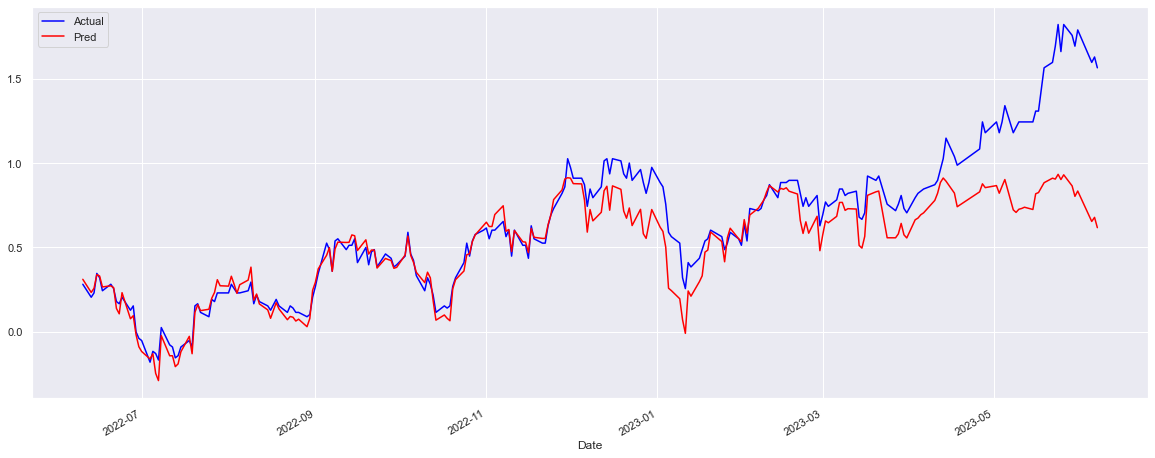

In [46]:
predictions_robust['Actual'].plot(figsize=(20,8), legend=True, color='blue')
predictions_robust['Pred'].plot(legend=True, color='red', figsize=(20,8))

#### Evaluation

In [47]:
close_scaler_robust = load('../Feature Engineering/close_robust_scaler.bin')

In [48]:
inversed_robust_pred = close_scaler_robust.inverse_transform(np.array(predictions_robust['Pred']).reshape(-1,1))
inversed_robust_act = close_scaler_robust.inverse_transform(np.array(predictions_robust['Actual']).reshape(-1,1))

In [49]:
inversed_robust = pd.DataFrame(inversed_robust_pred)
inversed_robust['Actual'] = inversed_robust_act
inversed_robust.rename({0:'Pred'}, axis=1, inplace=True)
inversed_robust.index = test_robust_labels.index
inversed_robust.head(2)

Pred  Actual
Date                           
2022-06-10  4422.897949  4400.0
2022-06-13  4362.165527  4340.0

In [59]:
eval_robust = {
    "RMSE": 0,
    "MAPE": 0,
    "R2": 0
}

In [60]:
eval_robust["RMSE"] = rmse(inversed_robust['Pred'], inversed_robust['Actual'])
print("RMSE:", eval_robust["RMSE"])

RMSE: 189.36461711495784


In [61]:
eval_robust["MAPE"] = mape(inversed_robust['Actual'], inversed_robust['Pred'])
print("MAPE:", eval_robust["MAPE"])

MAPE: 2.1610166052100226


In [62]:
eval_robust["R2"] = r2_score(inversed_robust['Actual'], inversed_robust['Pred'])
print("R2:", eval_robust["R2"])

R2: 0.6652269870537162


## Final Evaluation

In [69]:
evaluation = pd.DataFrame.from_dict({
    "Scaler": ["Standard", "Robust"],
    "RMSE": [eval_standard["RMSE"], eval_robust["RMSE"]],
    "MAPE": [eval_standard["MAPE"], eval_robust["MAPE"]],
    "R2": [eval_standard["R2"], eval_robust["R2"]]
})

evaluation.set_index("Scaler", inplace=True)
evaluation

RMSE      MAPE        R2
Scaler                                  
Standard  188.689524  2.152777  0.667610
Robust    189.364617  2.161017  0.665227

Standard scaler delivers better performance with lower RMSE and MAPE but has a better R2 score.

## Save Model

In [71]:
model_standard.save_model('./models/xgb_standard.json')
model_robust.save_model('./models/xgb_robust.json')